Last week I wanted to generate plots of a bunch of spectra and include pictures of the corresponding molecules on the plots. This turned out to be pretty easy to do with the RDKit and matplotlib and I figured that this might be useful to others, thus this short blog post.


In [1]:
from rdkit import Chem
from rdkit.Chem import rdDistGeom
from rdkit.Chem import rdDepictor
rdDepictor.SetPreferCoordGen(True)
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole


from matplotlib.offsetbox import (OffsetImage, AnnotationBbox)
import numpy as np

from matplotlib import pyplot as plt
plt.rcParams['font.size'] = '16'
plt.style.use('tableau-colorblind10')
%matplotlib inline

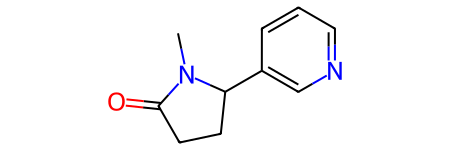

In [2]:
# structure from https://np-mrd.org/natural_products/NP0000004
cotinine = Chem.MolFromSmiles('CN1C(CCC1=O)C1=CN=CC=C1')
rdDepictor.Compute2DCoords(cotinine)
cotinine

Get some NMR data:

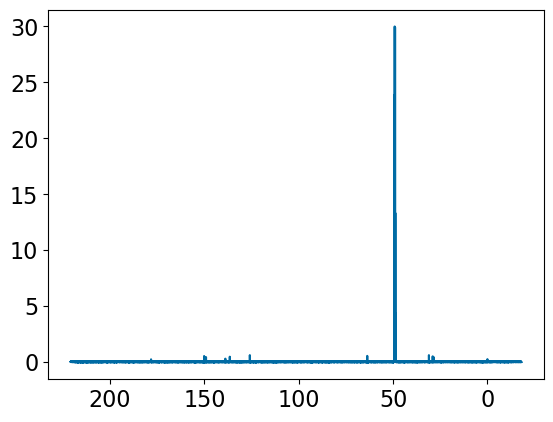

In [3]:
# C13 spectral data from https://np-mrd.org/external_nmr_submissions/6254
d ='''Isf/ZwWda0AJtoeAT36BP7TgZKzJnGtAVXR+GpsCkz9G+snwjZxrQG86+lfTwEw/1xMvNVKca0AjshEJ+PN7P2ktlHkWnGtA7+9GbBBDgj/7Rvm92ptrQMo/Y9iTqi6/jWBeAp+ba0D9AAdGd8xrvx56w0Zjm2tAO4EcVsZCgT+wkyiLJ5trQKN18UkcNZI/Qq2Nz+uaa0AgQvOP5gyQP9TG8hOwmmtAE2+4nxLMkD9l4FdYdJprQOlY/punWJE/9/m8nDiaa0CltzLcq0p5P4kTIuH8mWtAXcIZrjZMcj8bLYclwZlrQN3feHGMhlq/rUbsaYWZa0A3kfDwKlVQvz5gUa5JmWtAqSo2z/vjTb/QebbyDZlrQM1EuUiXWIE/YpMbN9KYa0C5Eu5xPzB0P/SsgHuWmGtAX+Q82Mj3jT+FxuW/WphrQOp5XZ+OyEe/F+BKBB+Ya0Ban7x5eNqEv6n5r0jjl2tAEMiWCQ9Pf787ExWNp5drQCa4MGp3IEa/zCx60WuXa0CdCHtQDBmGP15G3xUwl2tA2JmOymw/e7/wX0Ra9JZrQD+6Nv4vNHA/gnmpnriWa0CduBZLPzR/vxSTDuN8lmtAJef8ZD8xQj+lrHMnQZZrQNAqYuOBk2M/N8bYawWWa0AOzcCRBv53v8nfPbDJlWtAsr/xrB10b79b+aL0jZVrQKomgJhwpIS/7BIIOVKVa0APuk9Z5k5Tv34sbX0WlWtAaOMyG3fOYb8QRtLB2pRrQEzsVLQTCoI/ol83Bp+Ua0BsZjKFYNSPvzN5nEpjlGtAGYUTrIl+jL/FkgGPJ5RrQFhQcgf6E3a/V6xm0+uTa0DQKE6ZRDJSP+nFyxewk2tAsm/bz18pgr973zBcdJNrQLYjLSgINoG/DPmVoDiTa0CCRMqt+dxyP54S++T8kmtA2b/NzIXtjj8wLGApwZJrQJTzHXPjIGU/wkXFbYWSa0CsDsNuh/mDP1NfKrJJkmtAodxvda9ISb/leI/2DZJrQM1E/fRU6Wo/d5L0OtKRa0BNYDTabYx/PwmsWX+WkWtAAXsRiknkbT+axb7DWpFrQIIWuWoxz2i/LN8jCB+Ra0B7RS6xICx7P774iEzjkGtA3LHqqEPJYL9QEu6Qp5BrQDZDlV9RKXW/4itT1WuQa0CmbFlAtjBZv3NFuBkwkGtA6qM4XSg5eL8FXx1e9I9rQHVhWV68gGU/l3iCoriPa0CRyv3FY5N4vymS5+Z8j2tAQ5LRkRBLST+6q0wrQY9rQN0KMy30b3i/TMWxbwWPa0Am2abcTpR7P97eFrTJjmtA3JH7akbIkb9w+Hv4jY5rQH8+detTXl+/ARLhPFKOa0BAAVR8P11Wv5MrRoEWjmtA9YhzUjmKTD8lRavF2o1rQA3MpkBkzXa/t14QCp+Na0B8oBmWXLCPP0l4dU5jjWtANzWZm37rfz/akdqSJ41rQLDhe/R9OZQ/bKs/1+uMa0BLg+RSigJwv/7EpBuwjGtA5SosIDlWiL+Q3glgdIxrQN4RnxTfUEM/IfhupDiMa0AQ10/fyQlgP7MR1Oj8i2tA42uYUluYYD9FKzktwYtrQGvj2XMETXs/10SecYWLa0BCXFelsu1aP2heA7ZJi2tA8LNeyLEjgz/6d2j6DYtrQEpEEMXqg40/jJHNPtKKa0BOe8NXDmNzvx6rMoOWimtA3UHJz51EcD+wxJfHWoprQOUwJgZIyXY/Qd78Cx+Ka0AwG+PjrdCCv9P3YVDjiWtAch92gLGAg79lEceUp4lrQKzuqa8lBFk/9yos2WuJa0Cyq3dVKTJ/v4hEkR0wiWtAoa2YU08Qib8aXvZh9IhrQKEfzWxL/4M/rHdbpriIa0DPEeURd1Fxvz6RwOp8iGtAkh017e4bfr/QqiUvQYhrQKFWkikQ62m/YcSKcwWIa0Art8bWDK6GP/Pd77fJh2tAHJ1t460MLz+F91T8jYdrQArKtk97Y3y/FxG6QFKHa0AP0s176PNUP6gqH4UWh2tAQvNmz8p2dz86RITJ2oZrQLFz3DM28lW/zF3pDZ+Ga0C9/PsS5ceAP153TlJjhmtAEK+tlqLRDT/vkLOWJ4ZrQEPUuqjUrHO/gaoY2+uFa0ChMs0AwwGNvxPEfR+whWtAa4zorqFndz+l3eJjdIVrQO5Ax8cLC40/N/dHqDiFa0CcMi1qrh9VP8gQrez8hGtAN4W1DnWufz9aKhIxwYRrQN4DtHfnDIK/7EN3dYWEa0BkZb132wCRv35d3LlJhGtAs7+5gCcgaj8Pd0H+DYRrQCA6wZM4d2G/oZCmQtKDa0D5Jqko1nFlPzOqC4eWg2tAO0h/RMgMgr/Fw3DLWoNrQGSOuRxplna/Vt3VDx+Da0DGmNuwAlxlv+j2OlTjgmtAEDnRTUzyWD96EKCYp4JrQIj9etss2ZC/DCoF3WuCa0AhplL3pfaCP55DaiEwgmtAakgZaLrkhz8vXc9l9IFrQE4cZV1qPXk/wXY0qriBa0CprjaOCOGBP1OQme58gWtARI7ygPDter/lqf4yQYFrQISQNWdT+VA/dsNjdwWBa0ACLh4Vgc2BvwjdyLvJgGtA0ySXfIdpcT+a9i0AjoBrQA8v0W2KiV4/LBCTRFKAa0AbokHq+ch+v70p+IgWgGtATfqVNtl1Lj9PQ13N2n9rQOMv8w2abVO/4VzCEZ9/a0Cvq78ko3aUP3N2J1Zjf2tAdYtlEkBfkD8FkIyaJ39rQGlx51Pfdm6/lqnx3ut+a0B974Uvin9yvyjDViOwfmtAjpr4X2ztdT+63LtndH5rQDFmgE5yjmu/TPYgrDh+a0DtILTnylaTv90PhvD8fWtARpir7sHfer9vKes0wX1rQG2MlxB80Wy/AUNQeYV9a0DBhd9I4jU9P5Nctb1JfWtAp2urCY2gfL8kdhoCDn1rQB8tp9C8BYI/to9/RtJ8a0AOACc4nH2Bv0ip5IqWfGtADQWB/AOnbr/awknPWnxrQJCdqagMt4Y/bNyuEx98a0AU65gDuAqIP/31E1jje2tAFVEZEVK6ab+PD3mcp3trQPLtDbUGZ2c/ISne4Gt7a0Dh0bxH3Khgv7NCQyUwe2tAJ3sBfq5AZj9EXKhp9HprQEQaYGtuU5I/1nUNrrh6a0AST499Xm5Rv2iPcvJ8emtAdWyemVBCZT/6qNc2QXprQNwKeQkqPFk/i8I8ewV6a0A9w3O+PiQ/Px3cob/JeWtA4a4hc1QdkT+v9QYEjnlrQGAvgz8qdXk/QQ9sSFJ5a0A9nhUQvxODv9Mo0YwWeWtA2ldRt+d4g79kQjbR2nhrQINrngLUgYy/9lubFZ94a0AqraHAe1aHv4h1AFpjeGtAW7i6bXLri78aj2WeJ3hrQHMXZwMSb5W/q6jK4ut3a0CjptkD1r2OPz3CLyewd2tAmNeRfZ5aeb/P25RrdHdrQPglFb6AbII/YfX5rzh3a0DLxU92ivaLP/IOX/T8dmtA8nnENljSF7+EKMQ4wXZrQOamd1zaXIW/FkIpfYV2a0BSa9A2TU2Dv6hbjsFJdmtArt1fbnGBV786dfMFDnZrQIoPSets/5Q/y45YStJ1a0Bty6t9HtqQP12ovY6WdWtAKem0xpK7bj/vwSLTWnVrQBv5RUyIo4C/gduHFx91a0C/idPKfbuKvxL17FvjdGtAmpN1dly9b7+kDlKgp3RrQCNXoDau5Ew/Nii35Gt0a0AyCJShSRiCP8hBHCkwdGtAfeoBh4nzXj9ZW4Ft9HNrQGqvt63CTnm/63Tmsbhza0Cc+Xerw+1dP32OS/Z8c2tAJdYJcvNudj8PqLA6QXNrQE6X8rxN1JA/ocEVfwVza0AW45e61u33PjLbesPJcmtAregYkxhOkL/E9N8HjnJrQMRSwnwFtIy/Vg5FTFJya0CAHg/H6DVuP+gnqpAWcmtAHrZ1Csv+f795QQ/V2nFrQF+vQasHOpM/C1t0GZ9xa0BCRx6IbQGSP5102V1jcWtAEJ3ilGl7eb8vjj6iJ3FrQJSlIgpIWHm/wKej5utwa0DUgc6xBotuP1LBCCuwcGtAl7pKt9SCZj/k2m1vdHBrQKvS7dnjXYW/dvTSszhwa0DeEqt8+gVfvwgOOPj8b2tA7bkOxfnndL+ZJ508wW9rQL6lCJFu3oK/K0ECgYVva0A4la+ddbRiP71aZ8VJb2tAkMfmN3gVcz9PdMwJDm9rQFMXIlzytoM/4I0xTtJua0AKnUzXYSxcv3KnlpKWbmtAREEyVdjWXD8EwfvWWm5rQA4cgzJWZ4Q/ltpgGx9ua0CSJpctUPx7vyf0xV/jbWtAfqt2jdp1dr+5DSukp21rQCRJXmMN/U0/SyeQ6Gtta0Cn2ZmGiFd8v91A9SwwbWtAM+P3cK47cL9vWlpx9GxrQLNQyCFEhRa/AHS/tbhsa0BE/OXPxER0v5KNJPp8bGtAto1Jqo6pUr8kp4k+QWxrQGAvJ6u48mK/tsDuggVsa0DSlHhqtUh3v0faU8fJa2tAYkTvj00FAL/Z87gLjmtrQDO4Egty5nS/aw0eUFJra0BUEyMiixB5v/0mg5QWa2tAA5+pM/3scD+OQOjY2mprQL0pSQbzwok/IFpNHZ9qa0CDN8le0w6QP7JzsmFjamtAZ/CsxcoChD9EjRemJ2prQHYBPoEtfoW/1qZ86utpa0Ae9AP+GyRcv2fA4S6waWtAL8+ZNU66gb/52UZzdGlrQBRjQtHYi4o/i/Ortzhpa0DeAoGx79CFPx0NEfz8aGtAe5td+MD3hr+uJnZAwWhrQEpX0Xhwsls/QEDbhIVoa0Ap4cYX91iMP9JZQMlJaGtAdawnz5dudb9kc6UNDmhrQBvDVMOzXII/9YwKUtJna0BgNhGIffh3v4emb5aWZ2tAUP3FJ95Cfj8ZwNTaWmdrQA2H2bKjFIE/q9k5Hx9na0Arp5MeBTxfvz3znmPjZmtAWJL9A3QJiL/ODASop2ZrQGZhLfUkOnU/YCZp7Gtma0CyHMl9Kb9kv/I/zjAwZmtAnn9kiRcSkL+EWTN19GVrQOtoTUf1/4K/FXOYubhla0AogO9NF8J5v6eM/f18ZWtAi6pv9uI4aD85pmJCQWVrQAYAFdG9CoG/y7/HhgVla0C5z5DW5w2gv1zZLMvJZGtA61XvrCtugD/u8pEPjmRrQAR9i8xEGJQ/gAz3U1Jka0BUjFHXaKmMPxImXJgWZGtAW2fzu3+FXr+kP8Hc2mNrQD05ZNVUnHm/NVkmIZ9ja0B8BVY6DAlnP8dyi2VjY2tA6FjaPaBygT9ZjPCpJ2NrQEHRzDP6hWo/66VV7utia0CHDqlknZFyP3y/ujKwYmtAxnWaFy8ibr8O2R93dGJrQNvuGtRAa22/oPKEuzhia0CYg0CJcDB3PzIM6v/8YWtAT81ZpR8/Tj/EJU9EwWFrQMVhw8DH2oe/VT+0iIVha0BUwawu2rRuP+dYGc1JYWtAZZqbXXnsc795cn4RDmFrQJ3vygjjVV2/C4zjVdJga0CMSRwgUEyDP5ylSJqWYGtAGQ7S61ehbL8uv63eWmBrQPC1nCLuCoK/wNgSIx9ga0DXZ1uh10GQP1Lyd2fjX2tAmB56GrWEfj/jC92rp19rQCGqPjqTA4Q/dSVC8Gtfa0AKLZYfK8GGvwc/pzQwX2tALcHzAbbahb+ZWAx59F5rQGbCWNRh/XC/K3Jxvbhea0AHRxEKrsp5v7yL1gF9XmtAUSpLPyWhfb9OpTtGQV5rQD13xVqQEXQ/4L6gigVea0C1h+L2z4aAP3LYBc/JXWtA+FmF0Emeg78D8moTjl1rQGlkTcQbxF+/lQvQV1Jda0DkyHGxdqFzPyclNZwWXWtAYRFx0fVmYb+5Pprg2lxrQF+4pgKT22k/Slj/JJ9ca0Dz3kiFduGJP9xxZGljXGtAzJgqmpBoNj9ui8mtJ1xrQCM26L31LHM/AKUu8utba0D2dyH0PK2NP5K+kzawW2tAnmXb4VH1dL8j2Ph6dFtrQFiI4tmDHIy/tfFdvzhba0CRNKmcZW58v0cLwwP9WmtAnHueEA24iz/ZJChIwVprQJa10adjrkq/aj6NjIVaa0CM93dGHl+Ev/xX8tBJWmtAfZQ12ZJoGr+OcVcVDlprQOrCMpugHI0/IIu8WdJZa0B+w0cmjh+Hv7GkIZ6WWWtAHJnGBTsQWr9DvobiWllrQG+slU08Jns/1dfrJh9Za0BtiOUW135jv2fxUGvjWGtAvXnsLcljiD/5Cravp1hrQJnVWuE6wpA/iiQb9GtYa0BnvRkmhgqHvxw+gDgwWGtAZc7WyHPzmb+uV+V89FdrQLo8P0b7LUY/QHFKwbhXa0D98xfcxB9UP9GKrwV9V2tAHAwT7mV5eD9jpBRKQVdrQHkQS2ICBYg/9b15jgVXa0C1eN2PbjeJP4fX3tLJVmtAFI7Gjn8Pej8Y8UMXjlZrQLz7az1PZZ+/qgqpW1JWa0B6xQt8eLQdvzwkDqAWVmtAG39dRQffgL/OPXPk2lVrQNLAM+TRCZS/YFfYKJ9Va0Bqmxmliro7v/FwPW1jVWtAFbM0pS6Dcz+DiqKxJ1VrQIKZTviprFS/FaQH9utUa0DoIqOERfFhv6e9bDqwVGtA7L9IheH6UT8419F+dFRrQDMFcNKap4k/yvA2wzhUa0CE9kePd7mYP1wKnAf9U2tAHmYIHJc2dD/uIwFMwVNrQG7JWCFuXEG/fz1mkIVTa0CGl5zDVpF3PxFXy9RJU2tAv/y9ywzOUz+jcDAZDlNrQH5ZN9QMM4g/NYqVXdJSa0BqM3D8SI6Xv8ej+qGWUmtAoVvz/9Wugr9YvV/mWlJrQG1+Tu23QY+/6tbEKh9Sa0DLYwU5rXOAP3zwKW/jUWtAc2ACIV6Gfz8OCo+zp1FrQCMj1Biea4C/nyP092tRa0Cj42bktTdyPzE9WTwwUWtAAvfaHgnIYr/DVr6A9FBrQGQxREYd126/VXAjxbhQa0AKwNaA6w6Bv+aJiAl9UGtA1faqyY6OgT94o+1NQVBrQMkv/zZIkoQ/Cr1SkgVQa0Da3sCBeGI8P5zWt9bJT2tAB/uE185XgL8u8Bwbjk9rQEdYblR77Vc/vwmCX1JPa0DHGeyLkwCDv1Ej56MWT2tApLU4ay5oUj/jPEzo2k5rQHDZbEH1yJK/dVaxLJ9Oa0CAl88Sz9BDPwZwFnFjTmtA0xt+lbkiXL+YiXu1J05rQN66TphjhlA/KqPg+etNa0CoWOKSllt8P7y8RT6wTWtATyV5RjdVgT9N1qqCdE1rQGjV1PY3D0Y/3+8PxzhNa0BB708zL5VFv3EJdQv9TGtAl3Y/NlV8dL8DI9pPwUxrQPg63rd1e5U/lTw/lIVMa0DU3nIaA8KNPyZWpNhJTGtA536CVhqdgL+4bwkdDkxrQDJoGWEiamO/SoluYdJLa0ChB8uo6ao2v9yi06WWS2tAHF62dNxvlD9tvDjqWktrQJCj6PXCv3a//9WdLh9La0DDiIzHNIOcv5HvAnPjSmtAf6N/4cHVZb8jCWi3p0prQGjOsiuKIHK/tCLN+2tKa0BCmaWFQxR8v0Y8MkAwSmtAcGdK0WqIjL/YVZeE9ElrQMNJZaUiIX0/am/8yLhJa0Ds8rVAk4JyP/yIYQ19SWtA4M1Izv13Zj+NosZRQUlrQOn3zAzZwYq/H7wrlgVJa0DEc6CLwryLv7HVkNrJSGtA4kEwAECpUL9D7/UejkhrQH53K6+eI34/1AhbY1JIa0D4WGFZj0mTP2YiwKcWSGtAVl9oe8AGer/4OyXs2kdrQLaInkPkyWO/ilWKMJ9Ha0CaG4H1xleTPxtv73RjR2tAoGVwXdQHkT+tiFS5J0drQH8kXnyStaQ/P6K5/etGa0AN14OVQnGIP9G7HkKwRmtABAlhbAdFjT9j1YOGdEZrQFsRYfG3M4s/9O7oyjhGa0Cd0tmZqH6KP4YITg/9RWtA4ydGEGA1ej8YIrNTwUVrQCWT2VyrpHs/qjsYmIVFa0DD0bK1u8aLvztVfdxJRWtAyeX7Z/Rynr/NbuIgDkVrQLwGvfjAgVm/X4hHZdJEa0C3peesm1yEv/GhrKmWRGtAsQtzZnq+fz+CuxHuWkRrQMxc+SpaNZI/FNV2Mh9Ea0ARL/BSu6+RP6bu23bjQ2tAK3cPE1L9b784CEG7p0NrQPPQGR2IL4W/yiGm/2tDa0DVEeViySM5P1s7C0QwQ2tAEc1ABWxWXb/tVHCI9EJrQHDuKWDLPTq/f27VzLhCa0DtUoi9BQtyPxGIOhF9QmtAG9R7rI18nj+ioZ9VQUJrQG3MjioARpG/NLsEmgVCa0AqyzlAsKSav8bUad7JQWtAAGfoO9IagD9Y7s4ijkFrQJX1NKR6jJA/6Qc0Z1JBa0BM/bNKsKeKP3shmasWQWtAwkmNbVYskz8NO/7v2kBrQA4ayps61nM/n1RjNJ9Aa0DaujRMc+eBvzFuyHhjQGtAVXye4fvUhD/Chy29J0BrQHOdqX8N63u/VKGSAew/a0Bdl1GPvvt0v+a690WwP2tA+zCl6sDpkD941FyKdD9rQHkEYt6mJYY/Ce7Bzjg/a0BJwBZsFi2EP5sHJxP9PmtAq3hKqVr5cD8tIYxXwT5rQC7YK9jKpoG/vzrxm4U+a0Da+D5+eRySv1BUVuBJPmtAYOZwwoeQa7/ibbskDj5rQMpE1wB2/IW/dIcgadI9a0CvhSkZHEF2Pwahha2WPWtA62JQB9ysVD+YuurxWj1rQJhhaM4+OTQ/KdRPNh89a0DwsgoG349cP7vttHrjPGtAN8ZL1U8gZb9NBxq/pzxrQONj33UvwnI/3yB/A2w8a0DEXtAPJ0KGv3A65EcwPGtAlKNPfDnDYL8CVEmM9DtrQByCu6M7yIY/lG2u0Lg7a0D//WGset6BPyaHExV9O2tARfjcmLIYVj+4oHhZQTtrQGBOHMcQ6oc/SbrdnQU7a0DFeAv5JEF4v9vTQuLJOmtAXke3HbZBnL9t7acmjjprQD6ZWXKyD4y//wYNa1I6a0DlmKi7B+aQP5Agcq8WOmtAB4uHnfo1jT8iOtfz2jlrQAQTmec4i4c/tFM8OJ85a0CtcxEqI4WBP0ZtoXxjOWtAOAHKqtP/dr/XhgbBJzlrQGB99vdT1nQ/aaBrBew4a0AFnb1qPm9gP/u50EmwOGtAc/JWOOuhgL+N0zWOdDhrQCtZzPY9pJA/Hu2a0jg4a0Ak38MEFliFP7AGABf9N2tA2EM/9GYigT9CIGVbwTdrQC0+UK89qUS/1DnKn4U3a0BkZ5HKNFiBv2ZTL+RJN2tAzem4Ir1VYj/3bJQoDjdrQKGQEfF3+mQ/iYb5bNI2a0AdcWP4YziWPxugXrGWNmtAgYTTE4eccb+tucP1WjZrQOYIBQ2FLXq/PtMoOh82a0CR5jkB2RyWv9DsjX7jNWtAEGNAoQzGj79iBvPCpzVrQDK25hup1Ws/9B9YB2w1a0BQvna/l/+Jv4Y5vUswNWtAy0voKpfPib8XUyKQ9DRrQI4hVe/3LJy/qWyH1Lg0a0CFOGdDr6ouPzuG7Bh9NGtAiek50ABuWj/Nn1FdQTRrQP4ujEn4Gm8/Xrm2oQU0a0BUHSEdDXZmv/DSG+bJM2tAIHiZR8pxcL+C7IAqjjNrQKnm0UxE5qE/FAbmblIza0AQKGPb+x5RP6UfS7MWM2tAuvGdqqMAeb83ObD32jJrQIuRxbkoS4G/yVIVPJ8ya0BjNgqpTLNzv1tseoBjMmtAoROz1SLGgz/thd/EJzJrQL6hOmhmQHA/fp9ECewxa0AAZgzpoQeEPxC5qU2wMWtANJonMlEYkD+i0g6SdDFrQBriPvsuXIw/NOxz1jgxa0DX212MHV+Cv8UF2Rr9MGtAE5Sm1ld6j79XHz5fwTBrQL5bUCRRhIS/6Tijo4Uwa0ArulQD/TWOv3tSCOhJMGtAvMlz3Kdhar8MbG0sDjBrQCTaGzRPg1a/noXScNIva0B2Sa4YJZZzPzCfN7WWL2tAPlv4LrEydT/CuJz5Wi9rQFvE7wDoqYG/VNIBPh8va0DOJB3DU5SHP+XrZoLjLmtAxtas1gSYej93BczGpy5rQPI/CGbOsGG/CR8xC2wua0C2X+vj+USWP5s4lk8wLmtABVfd0cIEdz8sUvuT9C1rQA3thfBfaHA/vmtg2Lgta0BZnSkALFNgv1CFxRx9LWtAnKAYTVDcej/iniphQS1rQIcATmS5v4A/c7iPpQUta0BEbF/WjUh1vwXS9OnJLGtAAyH8l+TWgT+X61kujixrQE4aLu4IlIm/KQW/clIsa0BybWaVooeWv7seJLcWLGtA/YRY9D12ab9MOIn72itrQHJHdM2UcJa/3lHuP58ra0AqjZTSe2+Ov3BrU4RjK2tA9AoFzn52ez8ChbjIJytrQG9sSCknPYg/k54dDewqa0Br4n0+Tm6IvyW4glGwKmtAIsD31otncj+30eeVdCprQHFX8LxwgIM/SetM2jgqa0AUM6iM5ph1P9oEsh79KWtAoBUE4lvmXT9sHhdjwSlrQEtsklLAG4g//jd8p4Upa0AnI9yp4z6Rv5BR4etJKWtAfEmcgZihjr8ia0YwDilrQA07BQCfA4s/s4SrdNIoa0DsRn46vnkRv0WeELmWKGtAVVnd3wp0hj/Xt3X9WihrQJqidMHJ4mu/adHaQR8oa0C+3ENydnCTP/rqP4bjJ2tAwyudfgjXej+MBKXKpydrQA7bHJ/6BY2/Hh4KD2wna0Bi4f77z/t9P7A3b1MwJ2tAnQHTI03Efr9BUdSX9CZrQJ1Nsp6gMHk/02o53Lgma0Bnd6bFnqiTv2WEniB9JmtANe7DhgIidz/3nQNlQSZrQKLwPAh6Nvy+ibdoqQUma0AR14JVe5+FvxrRze3JJWtAvZ4Bi3P4j7+s6jIyjiVrQOCKUjOMeoS/PgSYdlIla0B4rFS4Vl9bP9Ad/boWJWtAkRWzgiiTmj9hN2L/2iRrQOjW5fobgZO/81DHQ58ka0D0CzYHGhw6v4VqLIhjJGtA9eGgD/ZIbr8XhJHMJyRrQCirBDSQioG/qJ32EOwja0DAZLh06ViPvzq3W1WwI2tAmHUiBKIhlz/M0MCZdCNrQJ6fktrTf1o/Xuol3jgja0CKF3fc4pySv/ADiyL9ImtAvFzmR3bsgT+BHfBmwSJrQCf+rBAxiFs/EzdVq4Uia0DDqecf4Amnv6VQuu9JImtAdUFbXWPAaL83ah80DiJrQEn7XyCwxoq/yIOEeNIha0DsrQ1pEDKPP1qd6byWIWtAhvJhudgzfz/stk4BWyFrQGThFbGkQH4/ftCzRR8ha0Cd7CNv8+9rvw/qGIrjIGtAcnb13LOGVb+hA37OpyBrQIA8Odpl9JA/Mx3jEmwga0D3eeMs0Mtcv8U2SFcwIGtAZdIKMCT5gb9XUK2b9B9rQH03EaAZZJy/6GkS4Lgfa0BE3OKKtjOlv3qDdyR9H2tACiHLaSSpn78MndxoQR9rQMax7SKmLZS/nrZBrQUfa0BeenTqVfN1vy/QpvHJHmtACKtAfTAClb/B6Qs2jh5rQJ2mriHnJYe/UwNxelIea0CU98K5WrCIv+Uc1r4WHmtATA4wtJb6oL92NjsD2x1rQE9/8r+j5jq/CFCgR58da0CK0d/VMiyBv5ppBYxjHWtA+I1wveUckr8sg2rQJx1rQJrQYlVy4pC/vpzPFOwca0CmZdb5hB2QP0+2NFmwHGtAdARRF/bnVL/hz5mddBxrQHNepRmiapA/c+n+4Tgca0DDBjeg6m2UvwUDZCb9G2tAyAPEo/Btlr+WHMlqwRtrQKAFlPs865C/KDYur4Uba0DWpeMMO3N/P7pPk/NJG2tAzC+5jkTdgj9Mafg3DhtrQMtfbDn2GIW/3YJdfNIaa0COWUuEFxWDv2+cwsCWGmtAMIlUQqmwgr8BticFWxprQEwcK/emS4a/k8+MSR8aa0B3OwjjwEWXPyXp8Y3jGWtALa6Stt7ffT+2AlfSpxlrQCDB3wG4C3A/SBy8FmwZa0DQdnyvI0aLv9o1IVswGWtADuDVJR5Fcz9sT4af9BhrQAW/ymA8N2Q//Wjr47gYa0CIMTcQ6VRVP4+CUCh9GGtAiQu5IxX/oL8hnLVsQRhrQLSyVsX8tGq/s7UasQUYa0AJXRUEamOEv0TPf/XJF2tAn/1bgc4GhT/W6OQ5jhdrQBWgITmL2F0/aAJKflIXa0BvSesCo510P/obr8IWF2tAZNOiO3ZakD+MNRQH2xZrQF8mhKzS/YM/HU95S58Wa0C/vH22BzlRP69o3o9jFmtAumOb7iZUdL9BgkPUJxZrQJAhFlERzII/05uoGOwVa0Bl+01Srj9ov2S1DV2wFWtA+Jrw/mOke7/2znKhdBVrQDH+qa4Ga5I/iOjX5TgVa0BUcS7HPw+XvxoCPSr9FGtAKIn5rKulY7+sG6JuwRRrQDZFU2az8Xq/PTUHs4UUa0A2lsksFquDP89ObPdJFGtA6DccWyrlaT9haNE7DhRrQH0obX3y6IK/84E2gNITa0AlJ3wTE/Ftv4Sbm8SWE2tAmv/rLplzlb8WtQAJWxNrQJY0L3zKSYM/qM5lTR8Ta0AdzTG+q7WMPzroypHjEmtAUlkcddSNeb/LATDWpxJrQMIJsgk3F3E/XRuVGmwSa0DXrXULApCTP+80+l4wEmtAc1+kADDSc7+BTl+j9BFrQOt0C62cxng/EmjE57gRa0Dld/tcG+5aP6SBKSx9EWtAcAylLBxCcT82m45wQRFrQNA7p2cM5oc/yLTztAURa0DUGf7ga7SMv1rOWPnJEGtARmJtSBoKkD/r5709jhBrQMztpgKdpIW/fQEjglIQa0BAQbXePKp3vw8biMYWEGtAkl5wvgvkh7+hNO0K2w9rQBt0th7XSX+/Mk5ST58Pa0BGxMaIT85rv8Rnt5NjD2tAORrI9rU7Zb9WgRzYJw9rQKqATqmyj4M/6JqBHOwOa0AlA3HoNiqHv3q05mCwDmtAfeybnWX/db8LzkuldA5rQGENUOkuCFc/neew6TgOa0B+L70Fd8yIPy8BFi79DWtATTNEZKuMjD/BGntywQ1rQININzENHo+/UjTgtoUNa0BMn6Zdj12Uv+RNRftJDWtA+BKan6Koeb92Z6o/Dg1rQCBmOOqnr2i/CIEPhNIMa0DH4KjMgVN8v5madMiWDGtAjqD5oxJBJb8rtNkMWwxrQLqI8W3Dl5S/vc0+UR8Ma0AG+A1Yk6xsv0/no5XjC2tAiebaeVIrg7/gAAnapwtrQNjA32zk2uG+chpuHmwLa0C4R3aXxAeNPwQ002IwC2tAyI6jpo71Wb+WTTin9AprQCMoGUH0kYW/KGed67gKa0C5ADdrktufP7mAAjB9CmtAuaBvySs6cj9Lmmd0QQprQOUx7RTz9YS/3bPMuAUKa0DDMOUyYf5uv2/NMf3JCWtAI09Wq+e+kL8A55ZBjglrQOSjEiN6B4C/kgD8hVIJa0DqU5HcX95nvyQaYcoWCWtAWS7t8D1ffD+2M8YO2whrQDBuOaS5hGA/SE0rU58Ia0BakrRvbm2eP9lmkJdjCGtAiGcDzGUQkj9rgPXbJwhrQIzgueZxyo4//ZlaIOwHa0AeBMz2wlGgP4+zv2SwB2tAW3nAo2Ybj78gzSSpdAdrQI5zK0D2qIW/suaJ7TgHa0C6VG9JAp6fP0QA7zH9BmtA+VZSygViej/WGVR2wQZrQCra7y0jbIC/ZzO5uoUGa0A0mh6f3IBav/lMHv9JBmtAjkDs8KPfhT+LZoNDDgZrQDQA4y0fjYO/HYDoh9IFa0AqhOEEujORv6+ZTcyWBWtAHR8IzwW2kL9As7IQWwVrQHGYCgUI5ZS/0swXVR8Fa0BUkEVtB794P2TmfJnjBGtAJUiXhUD3cj/2/+HdpwRrQFxAFN6DMnQ/hxlHImwEa0BKGXgFT6JyPxkzrGYwBGtAoWRcHiW/cr+rTBGr9ANrQGJWkDHGbnA/PWZ277gDa0DYwaXpS8thv85/2zN9A2tACE+vvzEed79gmUB4QQNrQHxGk5Hlaly/8rKlvAUDa0AnsiHXVaaNv4TMCgHKAmtArUFS+ITCab8W5m9FjgJrQEwJSV/aTGy/p//UiVICa0AS0X+d2gmkPzkZOs4WAmtA68WxCYLbSz/LMp8S2wFrQD3IEm8pbZW/XUwEV58Ba0DDCTFFu/Biv+5laZtjAWtARVTgBXVhfD+Af87fJwFrQFm5HWWXrZC/EpkzJOwAa0Cu1sZd3zCZP6SymGiwAGtAj6AOaR2yiz81zP2sdABrQD1p3luYdoY/x+Vi8TgAa0Bm5vsgilyAP1n/xzX9/2pAO/PwNZ5+kj/rGC16wf9qQO6UzjAepZC/fTKSvoX/akCQvGzdnp+Vvw5M9wJK/2pA1+jjExgAkL+gZVxHDv9qQEznXE7NKWY/Mn/Bi9L+akCsQ96tddyTP8SYJtCW/mpAbyVuEyw6cj9VsosUW/5qQMqQeSGWloC/58vwWB/+akCyugKTm6F3P3nlVZ3j/WpAUii/LJOthL8L/7rhp/1qQGiiYjQ5QWc/nBggJmz9akCG3uUnQJ59vy4yhWow/WpAVKt57A3xl7/AS+qu9PxqQHCLi/kfBoE/UmVP87j8akCnJzpOsLRsv+R+tDd9/GpAyQqvN7pEa791mBl8QfxqQF5GOrKzmoI/B7J+wAX8akB4P/TfB1iTP5nL4wTK+2pA57Qp7F5mhz8r5UhJjvtqQBP3BgzkqGs/vP6tjVL7akADw9BGL3pwP04YE9IW+2pA9WJOlCt3kL/gMXgW2/pqQINxiygxFoc/ckvdWp/6akA4xyfcwRyCPwNlQp9j+mpA0egjhl2Nhr+VfqfjJ/pqQG3GCWSQ+WI/J5gMKOz5akAs+vUPYWx0v7mxcWyw+WpAhHz+y4aKNT9Ly9awdPlqQH8EqxXIrHi/3OQ79Tj5akBLl0rASOeIv27+oDn9+GpA5J1kKWgSbD8AGAZ+wfhqQOlA6sJf65q/kjFrwoX4akCMZtWeg4aGPyNL0AZK+GpAV32FvQHoWj+1ZDVLDvhqQAIjVexHEJk/R36aj9L3akCiw4x1XLOaP9mX/9OW92pATrwuoi4pkT9qsWQYW/dqQOlAML06a36//MrJXB/3akC4Wa8+VN5yP47kLqHj9mpAmG49EhvukL8g/pPlp/ZqQEmnJapUhWm/shf5KWz2akAdSI2C5KVgP0MxXm4w9mpAB1HGydoTgz/VSsOy9PVqQPmo19w2IYa/Z2Qo97j1akBKEhXNngBWP/l9jTt99WpAH4GTc8F1Ij+Kl/J/QfVqQAEZUxJFPZI/HLFXxAX1akDBwW2/Dj5uP67KvAjK9GpAkWaSdd0IiL9A5CFNjvRqQKGr9bIK+lO/0f2GkVL0akCnwygRkbdDv2MX7NUW9GpAzi/zhRtHkj/1MFEa2/NqQHQwtxM/SoW/h0q2Xp/zakDiuNdFSR9HPxlkG6Nj82pA0fPO3iX/gr+qfYDnJ/NqQFNeZy6f95a/PJflK+zyakCofZsRs0Z/P86wSnCw8mpAAclYfZ2seD9gyq+0dPJqQAYQhvD7Kow/8eMU+TjyakB6mjYt3rptv4P9eT398WpAPI5FbMZBlj8VF9+BwfFqQFs60lIlyIO/pzBExoXxakD8PnehkP2TvzhKqQpK8WpAKJ0LATh3o7/KYw5PDvFqQKW4u3w5Yoi/XH1zk9LwakBrqaaKb4SNP+6W2NeW8GpA20e4NzvjPT+AsD0cW/BqQLwRAu8dx5A/EcqiYB/wakCI8C1q6KFlP6PjB6Xj72pAON0/t9sfgb81/Wzpp+9qQNg7x3wV03G/xxbSLWzvakAxOw3mBRhYP1gwN3Iw72pAHYyc9SsXmr/qSZy29O5qQCDB4bDF2qG/fGMB+7juakDkMQ2J90aHvw59Zj997mpAqorekM6Ehr+glsuDQe5qQFv5b7nuGHK/MbAwyAXuakCvw6l50lqCP8PJlQzK7WpAe2pfyHGNlb9V4/pQju1qQDU6NNNeg40/5/xflVLtakCB1+PfyI6Av3gWxdkW7WpAXmmH3KMciz8KMCoe2+xqQODcZXBDSmy/nEmPYp/sakCqUJCFcNN7Py5j9KZj7GpAJy66hKN0hL+/fFnrJ+xqQPiZsppj9I2/UZa+L+zrakA0c4vPhYCTv+OvI3Sw62pAIKyOqGvXhr91yYi4dOtqQAbIRCtk8Xe/BuPt/DjrakC07xE42mN1v5j8UkH96mpAD51mLLHpl78qFriFwepqQAArgKkhPle/vC8dyoXqakA8T3R1BFSFP05Jgg5K6mpAvtoaypjEiz/fYudSDupqQN9NhSAZAWY/cXxMl9LpakDlneP9n9iRPwOWsduW6WpAizo0ak7Akj+VrxYgW+lqQJyEL7BagIc/Jsl7ZB/pakCcEjJguNuRv7ji4Kjj6GpAZ7rIA2h1aL9K/EXtp+hqQEWnopXPCI4/3BWrMWzoakCCjJulsP2FP24vEHYw6GpAFvycdjugkT//SHW69OdqQCJ6y12HZ4k/kWLa/rjnakArkBaZPr1yPyN8P0N952pAaQXwtMLseD+1laSHQedqQG0Wyz7tPJk/Rq8JzAXnakCnggSgTB+CP9jIbhDK5mpASuR5c+wQdL9q4tNUjuZqQB22BPPF7Yw//Ps4mVLmakCxSFIIKGSJv40Vnt0W5mpA9HIiqs/+mL8fLwMi2+VqQMhVSWScUYe/sUhoZp/lakDQvBiOjwR1v0Nizapj5WpACABz9rpbhL/UezLvJ+VqQPhI9s9AAYQ/ZpWXM+zkakASysLoIImLP/iu/Hew5GpAC+FWFTSVZz+KyGG8dORqQDlBUrlaq4G/HOLGADnkakCx4/ES4eyEv637K0X942pAaO5rRg8/g78/FZGJweNqQFeqls09NJo/0S72zYXjakDxJ2ghEOOMP2NIWxJK42pA8wnwNht1kb/0YcBWDuNqQFNFSQGiQFc/hnslm9LiakACVRQid8oLPxiVit+W4mpAjA1E86KIY7+qru8jW+JqQH7HZvvf9oI/PMhUaB/iakBFF3NPerFqv83huazj4WpAvzEbdftlYT9f+x7xp+FqQDDp7toqFYG/8RSENWzhakAogNJYcpRSv4Mu6Xkw4WpAttgLleJrhj8USE6+9OBqQKTv0JZeEZA/pmGzArngakAEOvfe6Fddvzh7GEd94GpAW+jNvb8ifb/KlH2LQeBqQEWgopysWJC/W67izwXgakAI9MsnFjiRv+3HRxTK32pAW3LfjhgYcD9/4axYjt9qQDaNyLTNIWm/EfsRnVLfakBrqgDexCmBP6MUd+EW32pASHb63X7icT80Ltwl295qQHbQx5eh55C/xkdBap/eakAboPohlrNuv1hhpq5j3mpAZEhzPCgDgz/qegvzJ95qQPGqWGAqgXO/e5RwN+zdakCHbp5gXbppPw2u1Xuw3WpA1WydR05ckb+fxzrAdN1qQLtBJHovJXu/MeGfBDndakD/rXuO+6xoP8L6BEn93GpAF1/M0Zr9Xr9UFGqNwdxqQHgYuOVRf4A/5i3P0YXcakChMu/NJPKQv3hHNBZK3GpAEMUsjd5yWj8KYZlaDtxqQEpk+6hsbGi/m3r+ntLbakC4kZfNepyMPy2UY+OW22pAwODPqvk3jz+/rcgnW9tqQMA7aI3XHYQ/UcctbB/bakBSvaFylXSFP+LgkrDj2mpA17RCMs9Cc790+vf0p9pqQM2Y+zIiVEI/BhRdOWzaakBgrNgmviOQP5gtwn0w2mpAeu/3ueTigb8pRyfC9NlqQM2dTh+NEou/u2CMBrnZakBGqlVJQvemv0168Up92WpAR+odLu3sir/fk1aPQdlqQLQoIt8OS5E/ca270wXZakCstww/jidVPwLHIBjK2GpA1Xzrc0nQlD+U4IVcjthqQL2mdPFCh5U/JvrqoFLYakCpZAXsSMc3v7gTUOUW2GpAeN6LLWNgjr9JLbUp29dqQAEA+4Ob15W/20Yabp/XakDDOxBGHjSVv21gf7Jj12pADxiEXdkijT//eeT2J9dqQDZ41QG2QZA/kJNJO+zWakBl49iEyaZyvyKtrn+w1mpA8RNtN06jXD+0xhPEdNZqQD0SI0/Jp5G/RuB4CDnWakCCS1EeGOWVv9j53Uz91WpAzu0/fKCsaz9pE0ORwdVqQF3NcFpdBYa/+yyo1YXVakANGzCKWzuRv41GDRpK1WpAE4dKKMwZir8fYHJeDtVqQL5rwyaynYk/sHnXotLUakCZjCzdcZSAP0KTPOeW1GpAQxN1yBwUgL/UrKErW9RqQMtLnbU5X4M/ZsYGcB/UakAMSSrtUluCP/ffa7Tj02pAOpDOkrgxkj+J+dD4p9NqQGzOrmPKnHM/GxM2PWzTakBCNotk0XZ5v60sm4Ew02pAPR2UoJ5mgb8/RgDG9NJqQBYdNBDhpkq/0F9lCrnSakCFpBh5DZpLP2J5yk590mpA1pgMdLDrZT/0ki+TQdJqQOtxNdfp9Zo/hqyU1wXSakAHx7bPmA9gvxfG+RvK0WpARDhpXSg6YT+p315gjtFqQFjEhUoS4mC/O/nDpFLRakDFVdZbTAKJv80SKekW0WpAOv7IzKLRFT9eLI4t29BqQFLvCrC4R3k/8EXzcZ/QakDZ091ldradv4JfWLZj0GpANScUSSNacT8Ueb36J9BqQFzbbNS9uHK/ppIiP+zPakC3EBb6Oa5nvzesh4Owz2pAvfj28OvsdT/JxezHdM9qQEiYFaGWcnS/W99RDDnPakDDzQzBhpCdP+34tlD9zmpAan/kXRnWTj9+EhyVwc5qQA3A3f6DjqC/ECyB2YXOakD03XM346+Xv6JF5h1KzmpAyXJ0aEqoY780X0tiDs5qQKajy/rDYJe/xXiwptLNakCWTWkLL/ykv1eSFeuWzWpAAeht2CYifb/pq3ovW81qQOUf8rzllV6/e8Xfcx/NakC7NWCvZf9wvw3fRLjjzGpAUFcGEecXnD+e+Kn8p8xqQEAVYbCHkmK/MBIPQWzMakBltooZ1AWQP8IrdIUwzGpAsBum5uYOjL9URdnJ9MtqQEyjbYFihZO/5V4+DrnLakDn0nKvSzeGv3d4o1J9y2pAJYw0jUmOmz8JkgiXQctqQCpSC5LFhog/m6tt2wXLakC2wTdSVmZyvyzF0h/KympArFd468z/fD++3jdkjspqQHIrr4cv42A/UPicqFLKakBAzomyb3KBv+IRAu0WympAqrNElolcij90K2cx28lqQDPEoiVaIpU/BUXMdZ/JakC9BDwggTSAP5deMbpjyWpAse3rPGyegr8peJb+J8lqQH5SKxZghRm/u5H7QuzIakAUAA+HnEWHP0yrYIewyGpAvsETF7mKeT/exMXLdMhqQEbT8yGExoA/cN4qEDnIakCDIiOHarqYPwL4j1T9x2pAn/yaIK/qiL+UEfWYwcdqQHvjXnobxnO/JSta3YXHakDjD4xHQ09zv7dEvyFKx2pAPegmSM/Tfr9JXiRmDsdqQCsj0t4vlIm/23eJqtLGakCf8SuTERJrP2yR7u6WxmpAiTMTGqX3ir/+qlMzW8ZqQMIar3B413W/kMS4dx/GakB9lozs6oiMPyLeHbzjxWpAleMQEbocZD+z94IAqMVqQKoc5zGgXI6/RRHoRGzFakAkaU/Eh+Whv9cqTYkwxWpAtZNUL80kbj9pRLLN9MRqQLDtfMs3CYm/+l0XErnEakCCeBl0RA2AP4x3fFZ9xGpAW3oUIczwaL8ekeGaQcRqQFFxWkbQtnK/sKpG3wXEakC/dNI2OOdzv0LEqyPKw2pAM2NixRpXmb/T3RBojsNqQFGaF10OI3c/Zfd1rFLDakA/cgEIuB9Ev/cQ2/AWw2pAxu68J72Thb+JKkA128JqQLPjKpYWOKS/GkSleZ/CakCIDXklB7iFv6xdCr5jwmpAtneX9Yl9hD8+d28CKMJqQBqEP95+JZe/0JDURuzBakDc3PPk1bOGv2KqOYuwwWpAE9YHy5GJaj/zw57PdMFqQB8Vl8t9uYM/hd0DFDnBakA9BRoc69xGPxf3aFj9wGpAAmQg0489kj+pEM6cwcBqQDBQE12Mn2A/Oioz4YXAakBvrefLEneLP8xDmCVKwGpA5jW4PFF0fj9eXf1pDsBqQEOdFJPveY8/8HZirtK/akC4lqsyx8dRP4GQx/KWv2pAYWzfxN1CgL8Tqiw3W79qQEb4i/XG7n0/pcORex+/akAMAVwbtvJxvzfd9r/jvmpA0pDp3Z99aT/I9lsEqL5qQLi1x03iW2a/WhDBSGy+akDj15jeuCeJv+wpJo0wvmpAKF6vNgQRYD9+Q4vR9L1qQBdR1mvWd3s/EF3wFbm9akClACA9FMF/v6F2VVp9vWpAoFIjR3apd78zkLqeQb1qQJy+BqufRnY/xakf4wW9akBqe+q5Zm0Ev1fDhCfKvGpAPGfzzXOMib/o3OlrjrxqQHCnNtxvNYu/evZOsFK8akAt/kjThs6CPwwQtPQWvGpA4nwuhsxfVr+eKRk527tqQDPvF0rcBHW/MEN+fZ+7akA8Pdjx6CyUP8Fc48Fju2pAYeNPYuSrkT9TdkgGKLtqQBU1Er9Oq5g/5Y+tSuy6akDFFkYlKud2v3epEo+wumpAG2MV/fKikD8Iw3fTdLpqQK2E3wK+wnI/mtzcFzm6akB9yc5CxFxwPyz2QVz9uWpAK0gMI662aj++D6egwblqQH5oaa2LXYI/TykM5YW5akCV6vK0YGSQP+FCcSlKuWpAVzt1ZRxEkr9zXNZtDrlqQCnqVSimyJS/BXY7stK4akAZbCb1jG+AP5ePoPaWuGpAhXRZkacweb8oqQU7W7hqQCtaTmIt4HW/usJqfx+4akBRimgKAmw9v0zcz8Pjt2pAZk1X9ePRJz/e9TQIqLdqQJRzhfJX+I8/bw+aTGy3akDUcQJZtbxdvwEp/5Awt2pAstJfEEvdiD+TQmTV9LZqQGyDQxrLXBk/JVzJGbm2akCOYkV9lX+Av7Z1Ll59tmpA4rY3SKiyej9Ij5OiQbZqQK7ZTwWDR4q/2qj45gW2akBp5paWTSFCv2zCXSvKtWpA97m+XHlDkD/+28JvjrVqQCfyrE046nM/j/UntFK1akAFFZFT0reFvyEPjfgWtWpAe/Y/t10/er+zKPI827RqQO2NEOoUAZA/RUJXgZ+0akAmNgpLrIdwP9ZbvMVjtGpA+6JZHHCRmr9odSEKKLRqQBRN4Y8Xt5G/+o6GTuyzakC0ESBgu1Z4P4yo65Kws2pAbtHD8P6Faz8dwlDXdLNqQPbasKb5anI/r9u1GzmzakB706koiY17P0H1GmD9smpA20F3hejUi7/TDoCkwbJqQKLqSOCdIl+/ZSjl6IWyakBFvIJrBwRav/ZBSi1KsmpAxxrB2I2pjL+IW69xDrJqQKu8lCHRgI2/GnUUttKxakA9L2SAcjxyP6yOefqWsWpA37aD2WGVmj89qN4+W7FqQPXbiYvUP5s/z8FDgx+xakB4Lz4dTAt1P2HbqMfjsGpASAtV0+/gkD/z9A0MqLBqQMFAGgbo+H2/hA5zUGywakC9x8PtPat/vxYo2JQwsGpAwEOd/QwKf7+oQT3Z9K9qQODw77COhWA/OluiHbmvakCIboU4/EB8P8x0B2J9r2pApC5R6+fqg79djmymQa9qQDSzFiTrkWc/76fR6gWvakDpqc/8jc9Ov4HBNi/KrmpAzPPtYH11Y78T25tzjq5qQPVsDLVHpmy/pPQAuFKuakDMoIiIX3+RvzYOZvwWrmpA1dAy8ACAhD/IJ8tA261qQLRcHew98og/WkEwhZ+takAMaEdUG4FNv+talcljrWpA/ssC5BQdeT99dPoNKK1qQPmr27rRPIQ/D45fUuysakDE7jF4+KueP6GnxJawrGpA8rnTfn5qcL8zwSnbdKxqQPiCDzuYjXU/xNqOHzmsakAhXgmuCWaQP1b082P9q2pAdYuIIwI+Zb/oDVmowatqQAuQLI7ngW6/eie+7IWrakA5u8/vwruIvwtBIzFKq2pAJHkvK7SAd7+dWoh1DqtqQFmqqrTx6ny/L3TtudKqakDW0VRiAAdjv8GNUv6WqmpAhkFkL40UMj9Sp7dCW6pqQOvnyfaZ4JM/5MAchx+qakCZ8BiS0XuOv3bagcvjqWpAP6mguaI2jb8I9OYPqKlqQGreIHGKTZS/mg1MVGypakAtXXxsRGChvysnsZgwqWpAGNhW/OTgmL+9QBbd9KhqQBRcCLceWk+/T1p7IbmoakDFZbbxNTWWP+Fz4GV9qGpADSG1qd3zdD9yjUWqQahqQBFvwwYUIXI/BKeq7gWoakAGxnyTsQmJP5bADzPKp2pARQ0EYu3EeT8o2nR3jqdqQBDLrV3/V5Y/ufPZu1KnakCSN1jcAy+bP0sNPwAXp2pAWAQtp1WSYr/dJqRE26ZqQP+UB0qnB4M/b0AJiZ+makDBM9WBSdh4vwFabs1jpmpAcC6mWwWJbT+Sc9MRKKZqQMnA/ecenYk/JI04VuylakDjO5V2CxRyv7amnZqwpWpASQRt7KXPCb9IwALfdKVqQOgq6yDJr3Y/2dlnIzmlakAplLALrw1jv2vzzGf9pGpAFc7sipg2bT/9DDKswaRqQGXGcR8yOoc/jyaX8IWkakCi9E/4Dd+HvyBA/DRKpGpAHICIkVw1QL+yWWF5DqRqQOMQ5o/DVne/RHPGvdKjakBbnGzz4TB3v9aMKwKXo2pAuD3TCzVxl79oppBGW6NqQE+/LRtO25W/+b/1ih+jakDCdwZ6LTxuv4vZWs/jompASDObj5uPi78d878TqKJqQM+rsR33/2e/rwwlWGyiakCQgmXe38ZpP0AmipwwompAwPOazUGYe7/SP+/g9KFqQGFuIOiu24E/ZFlUJbmhakAPR+i9HTaSP/ZyuWl9oWpACTLAIGeSeb+IjB6uQaFqQFhb38DHTRA/GaaD8gWhakA+nq/F9YOHP6u/6DbKoGpATZg6LB2JgD892U17jqBqQF92WRUm64U/z/Kyv1KgakCV7Uufiw2VP2AMGAQXoGpAQmK3Jv63ZL/yJX1I259qQMva5UigzIc/hD/ijJ+fakCcW9ZM3seHPxZZR9Fjn2pAh1bD7jGGYT+ncqwVKJ9qQEz0abFGAYi/OYwRWuyeakCHFupGfUmGv8uldp6wnmpAwaZZhhvmcT9dv9vidJ5qQP+2SoJc+5W/7thAJzmeakAye8AwC6JeP4DypWv9nWpAtqI+lMdJdb8SDAuwwZ1qQNDAVYUXg2u/pCVw9IWdakAUs8YiEGSMPzY/1ThKnWpAj4b0LHpLdz/HWDp9Dp1qQLa+ZenaAIe/WXKfwdKcakDgXFCfJTmfv+uLBAaXnGpA8pMHu+uOgr99pWlKW5xqQIuETF1uTHI/Dr/Ojh+cakDnSjDNs46Sv6DYM9Pjm2pAPh9mlVIKj78y8pgXqJtqQPM1hU5e5He/xAv+W2ybakD4Gt1q9XqfP1YlY6Awm2pAODPrWfgeaD/nPsjk9JpqQBDiIV8NpZC/eVgtKbmaakC6gkS+SQqWPwtykm19mmpABI0qBFRblz+di/exQZpqQOf7gAcuDIi/LqVc9gWaakC1JDe6CRqYP8C+wTrKmWpAv6y8hKs3pD9S2CZ/jplqQDQ/UsmQ+4I/5PGLw1KZakCyPNhctPB3P3UL8QcXmWpAzN/F3zaBjb8HJVZM25hqQBapANv2Rx+/mT67kJ+YakAalqpbi5GAPytYINVjmGpAKcNwxA8EUb+8cYUZKJhqQIp6Q+g6NEC/TovqXeyXakCU0AeKptmNP+CkT6Kwl2pAZJYMBhdDYD9yvrTmdJdqQEvwY4DdY4S/BNgZKzmXakA0fZfrEaCMP5Xxfm/9lmpA7tMAzm88Ub8nC+SzwZZqQEMLHUsjT4I/uSRJ+IWWakDK+61NASCBP0s+rjxKlmpAvPrOZ/2rk7/cVxOBDpZqQGXGUcsPY5G/bnF4xdKVakAEDqEB7R6NvwCL3QmXlWpAJtzkAS8fhz+SpEJOW5VqQHLxb5UBr5o/JL6nkh+VakDnSz+Y2yqPP7XXDNfjlGpANOl1VlNwlL9H8XEbqJRqQARQAhRKNYQ/2QrXX2yUakBmi3S0t35ov2skPKQwlGpA8kBJ5T/Zcj/8PaHo9JNqQGyMoxS5SoI/jlcGLbmTakDCv9WkuW5wPyBxa3F9k2pAgv76sKPOUj+yitC1QZNqQAhL8CYl8II/Q6Q1+gWTakDHiFWIeaFzP9W9mj7KkmpAtrGUIfZyfD9n1/+CjpJqQAlgkmgwBKG/+fBkx1KSakAzXN8+3rmiv4oKygsXkmpAllwjFdKZhb8cJC9Q25FqQPt5NfvEt4S/rj2UlJ+RakCJIB2y1NGIv0BX+dhjkWpAvfxhsS1vgL/ScF4dKJFqQNGVU2SAw3Y/Y4rDYeyQakCWWoB7e0JuP/WjKKawkGpAQT0IMjeijj+HvY3qdJBqQLZoCiai7YM/GdfyLjmQakCijzhqQJxMP6rwV3P9j2pA1j1mK6tEcj88Cr23wY9qQDuW45aeC5C/ziMi/IWPakD0mjOC4kuOv2A9h0BKj2pAoCn+uawgeL/yVuyEDo9qQAqc3SoMRm8/g3BRydKOakBk5MSqV/6XPxWKtg2XjmpA3DozyOpoUz+noxtSW45qQHkIpkGBkoS/Ob2Alh+OakAwx0l8Qsyfv8rW5drjjWpAo92b+Dj7gr9c8EofqI1qQGTFI89+b5K/7gmwY2yNakA/CAqcbcZgP4AjFagwjWpAEUtNdA2IhL8RPXrs9IxqQBEmPMNZhns/o1bfMLmMakDzA4MJL8ZdPzVwRHV9jGpAhe4ziifATr/Hiam5QYxqQFlqomZBCoK/WKMO/gWMakDHEtXc85yDP+q8c0LKi2pAL9FzULmTlj981tiGjotqQCEXuCTzdn4/DvA9y1KLakCsvfEpGxmdv6AJow8Xi2pAdOM0zHYzc78xIwhU24pqQMXZ/UxL7ZG/wzxtmJ+KakA3fkxFT9CNv1VW0txjimpAIOpopFgflr/nbzchKIpqQJABt5kvDXg/eImcZeyJakCM3NydEnWQPwqjAaqwiWpAIMVZttrCbD+cvGbudIlqQD97cmvrpGk/LtbLMjmJakApHlFob3idP8DvMHf9iGpAJRgnIuuogT9RCZa7wYhqQPoDs5RAfnC/4yL7/4WIakCyMf2o4ntnP3U8YERKiGpATW9QBMNpdL8HVsWIDohqQG/ZSCdI1Ha/mG8qzdKHakDUZirntFGLvyqJjxGXh2pA5KV/WskEfz+8ovRVW4dqQA9ERkxwqnM/TrxZmh+HakC0zUGm6vxWv9/Vvt7jhmpAr7XN2ZQmkb9x7yMjqIZqQCk5gXfbMYq/AwmJZ2yGakDcujIyS2d8v5Ui7qswhmpAT+DfVAEhcj8nPFPw9IVqQHt5cO5LWo6/uFW4NLmFakDue3+s55uBv0pvHXl9hWpAdFGUylY1ZT/ciIK9QYVqQNuIDkJWBYU/bqLnAQaFakAlcsxV4VyCP/+7TEbKhGpAwlrhSLyDl7+R1bGKjoRqQCWOZ8EJ1nO/I+8Wz1KEakBjmUKt5oJ9v7UIfBMXhGpAlfPT95fkfb9GIuFX24NqQMcvjUGja1+/2DtGnJ+DakAkfuSi5e+EP2pVq+Bjg2pASb5Cz9oieT/8bhAlKINqQET6MjWWhZU/joh1aeyCakDQMdtadMuPvx+i2q2wgmpAmmb72cQzgT+xuz/ydIJqQKM3bGUqrXI/Q9WkNjmCakBMu4XitsaAP9XuCXv9gWpAwtURrvqpi79mCG+/wYFqQCDveK+gwYG/+CHUA4aBakDaJmd1Yk6Qv4o7OUhKgWpAr70jjH50m78cVZ6MDoFqQPHEjrzZYme/rm4D0dKAakB8sBipFzFzPz+IaBWXgGpAR9Rb9GuNjj/Roc1ZW4BqQH/Nu+F9m4c/Y7synh+AakB8k80T2YhuP/XUl+Ljf2pAPDwfx89adr+G7vwmqH9qQOEbBTWa4oG/GAhia2x/akA0IFSrrXqLP6ohx68wf2pACjepiHYugb88Oyz09H5qQIiVj/v7CmW/zVSROLl+akB6PXPdyx+Wv19u9nx9fmpApgEdP6cSjD/xh1vBQX5qQCWxBvI/qIm/g6HABQZ+akDNtvkPKvc6vxS7JUrKfWpA5KibXbA1jj+m1IqOjn1qQO6d25KxeYk/OO7v0lJ9akBv9duAM56Lv8oHVRcXfWpA8di0bAyHlL9cIbpb23xqQP9rpyTHrX0/7TofoJ98akBK39QIiZ1Ev39UhORjfGpArcJnihkyfL8RbukoKHxqQChV1Kd7/EI/o4dObex7akDTT3HVC5B/PzShs7Gwe2pAKVp9QV+eiD/Guhj2dHtqQF0J3+30oHo/WNR9Ojl7akBYD4GLjGSHv+rt4n79empAafIyxLIzkb98B0jDwXpqQPpFkG/A4pO/DSGtB4Z6akDYvIhP23FxP586EkxKempABVl4HK21jj8xVHeQDnpqQOG4Ne3mCn8/w23c1NJ5akBDk5nVS9yYv1SHQRmXeWpA2LscztUtY7/moKZdW3lqQGCrzMpvroM/eLoLoh95akBHTjYR1zqZvwrUcObjeGpACMoDo4Uugb+b7dUqqHhqQPp0mGGbF4W/LQc7b2x4akCyIcbzPXsNP78goLMweGpAu6lLfTkWnj9ROgX49HdqQAqr/NFUlYC/4lNqPLl3akBzpm+2olCTv3Rtz4B9d2pAMbj27Q6BOL8GhzTFQXdqQJTK3ViYMHO/mKCZCQZ3akBlVckbLy93vyq6/k3KdmpAEXnmY2bUQ7+702OSjnZqQDwfTabkOF2/Te3I1lJ2akBuSOA+v0aYv98GLhsXdmpALYglAdC1Zr9xIJNf23VqQCvo8f7pOIy/Ajr4o591akCw7UQLerYoP5RTXehjdWpA4cFqjOJ2gb8mbcIsKHVqQJSXRX/cHWW/uIYncex0akBZ85Y6HCtwv0qgjLWwdGpAsmP+UqGqgD/bufH5dHRqQOFiWcKeg44/bdNWPjl0akB19uk+kGd0P//su4L9c2pANjw9uMzDZz+RBiHHwXNqQBtoQOf8bKC/IiCGC4ZzakA4PlpuarmLv7Q5609Kc2pA8SYWDiIcKr9GU1CUDnNqQHV07dhQq2Y/2Gy12NJyakBHQpRdy8B7P2mGGh2XcmpAetptNguncz/7n39hW3JqQESb8Zdys48/jbnkpR9yakC7iqEO/nmEvx/TSerjcWpAD9YmH6mMjr+w7K4uqHFqQCzTe/IednU/QgYUc2xxakC/IrIeh0mLP9QfebcwcWpAmd3uhYaSl79mOd779HBqQHM0yhUYVYe/+FJDQLlwakCqazWpwUaAv4lsqIR9cGpAxzD9em3bWz8bhg3JQXBqQO+/2Vin43E/rZ9yDQZwakD0M4/p18JsPz+511HKb2pA+96QA4FNij/Q0jyWjm9qQFWtvFJumYO/Yuyh2lJvakDtdtRqr5uAP/QFBx8Xb2pAaLvmEatLgD+GH2xj225qQLRRGqNA822/GDnRp59uakAJlyIv/kl6P6lSNuxjbmpABm/2proHgD87bJswKG5qQMWVsZYVvZm/zYUAdextakDpU18UupmWP1+fZbmwbWpAGadt/WfPkT/wuMr9dG1qQE5ukt7rAoQ/gtIvQjltakDbeYOzCzJtPxTslIb9bGpAWbvVaeczFD+mBfrKwWxqQFZ5lqmIpIG/Nx9fD4ZsakDdT2kknXN1v8k4xFNKbGpAVxyWKQ8tfb9bUimYDmxqQOzucB9/3XY/7WuO3NJrakBxGieFXg93P36F8yCXa2pAlOCgpfs2cL8Qn1hlW2tqQDN5wTS7HJM/ori9qR9rakAyTb71+62JvzTSIu7jampA9jDojuvchr/G64cyqGpqQHao3QKYOok/VwXtdmxqakDNr2TB2y2Av+keUrswampAX1DECyw3eT97OLf/9GlqQJAYRr2LNDo/DVIcRLlpakDMfQNGJuZ1P55rgYh9aWpAkB3SNwmSIb8whebMQWlqQGPNPvv3inW/wp5LEQZpakDrnDUwKZR4P1S4sFXKaGpA5nTk5Pjsgr/m0RWajmhqQFXj0R+6qHC/d+t63lJoakB29byW90WZvwkF4CIXaGpA6mna5ejGOr+bHkVn22dqQNY7gVFqK6A/LTiqq59nakCrcf9idoKLP75RD/BjZ2pAB1DAGujYAz9Qa3Q0KGdqQEbmjPdjwJA/4oTZeOxmakCvhE1QuCF7P3SePr2wZmpAbcx24Jf7cT8FuKMBdWZqQAVvrruyLU8/l9EIRjlmakBLYsERQQaKPynrbYr9ZWpAh22BYt9PVj+7BNPOwWVqQJPOcdYKsIE/TB44E4ZlakA28XaTzryQv943nVdKZWpAjdQPTzu1mr9wUQKcDmVqQM0UjFzuvGS/Amtn4NJkakBofCOC/jqSv5SEzCSXZGpA8jSAwnz/g78lnjFpW2RqQEQ5Y1wmWHO/t7eWrR9kakCYEI1DJciMP0nR+/HjY2pAQO05xALEfz/b6mA2qGNqQHRQ6vX0VFo/bATGemxjakDtUS+C7h96v/4dK78wY2pA6avT4faidL+QN5AD9WJqQI+WoZMAoZE/IlH1R7liakBm7P31AoZzP7RqWox9YmpAe+QhS8iWYD9FhL/QQWJqQNFj65/ktng/150kFQZiakAftsLAFQOCP2m3iVnKYWpARCznvH05nj/70O6djmFqQJ1SqZjmhZU/jOpT4lJhakCKtr+pGWt2Px4EuSYXYWpA7zWW27uQkb+wHR5r22BqQOuksaUBDlM/QjeDr59gakAUpNB1pwGDP9NQ6PNjYGpANM6L6N7tUT9lak04KGBqQAkMmvnz12s/94OyfOxfakCFfSS2/yVgP4mdF8GwX2pA6+sKZbTshL8bt3wFdV9qQO2WDejqfnM/rNDhSTlfakAgKYewHdBhPz7qRo79XmpAsbAHXAZznL/QA6zSwV5qQOFgfzt4UYq/Yh0RF4ZeakCuo1TpS3hjP/M2dltKXmpA+J8W5Qdflb+FUNufDl5qQHq0ZncM7Yq/F2pA5NJdakC48WZMFKyRP6mDpSiXXWpABVfXrUhHhD86nQptW11qQDZyeJUQQZE/zLZvsR9dakCEcSvCeSWPP17Q1PXjXGpABiiYqpptij/w6Tk6qFxqQJcedQXBeXS/ggOffmxcakCW3mfIkw14vxMdBMMwXGpADgtJh53Gkb+lNmkH9VtqQOaJuIDbKoq/N1DOS7lbakC4KJfl8mSFv8lpM5B9W2pAXBeGbefJVj9ag5jUQVtqQL2OjK0C83A/7Jz9GAZbakA6w8SyadCCP362Yl3KWmpAUg/URstKkL8Q0MehjlpqQJW5ol/ovoQ/ouks5lJaakAHFW/kdbGWPzMDkioXWmpAAdJAeC6MhT/FHPdu21lqQJdmICOHf1e/VzZcs59ZakBUTNaUMOVZv+lPwfdjWWpAS1xuFsD2iz96aSY8KFlqQMEJTeo/D3K/DIOLgOxYakA78fbm98uLv56c8MSwWGpAqqNvVS6/bb8wtlUJdVhqQMxRCBpgIpO/wc+6TTlYakCzM9ZcgyJxv1PpH5L9V2pANUUAWJkVkb/lAoXWwVdqQHBDbpdzu2u/dxzqGoZXakAz84i2Aet2vwg2T19KV2pAICHl6LoZk7+aT7SjDldqQPQ1xKnoJXI/LGkZ6NJWakDEVtMCWZCOv76CfiyXVmpAXwXTrHUkhL9QnONwW1ZqQMdOtEzJiZQ/4bVItR9WakDhbvZA6kmBP3PPrfnjVWpAkdlUpI4/Zr8F6RI+qFVqQL2QPkeFYVe/lwJ4gmxVakCjlu9tJldXvygc3cYwVWpAAYj269IDhD+6NUIL9VRqQDl3ncYvNXU/TE+nT7lUakAh8rP3PTWXP95oDJR9VGpAs+JpGxcfUL9wgnHYQVRqQDbYvCU+sIM/AZzWHAZUakCDoS4PYhiTP5O1O2HKU2pA2rEBYBrok78lz6CljlNqQAQT9Qsx+Ee/t+gF6lJTakBuq7wow+tiv0gCay4XU2pAtfi5AWBZeT/aG9By21JqQGDf6saKVjc/bDU1t59SakCLgXj9yi11v/5OmvtjUmpAcdDQI7MxjL+PaP8/KFJqQHLd6lhKOYS/IYJkhOxRakAaQi33I592P7ObyciwUWpACaqZi15bkz9FtS4NdVFqQLQ+fcL2pHc/1s6TUTlRakCKNyKu4HBzP2jo+JX9UGpAOlk2KEFnj7/6AV7awVBqQLQ4ap76P3I/jBvDHoZQakCMp47mpNNwvx41KGNKUGpAf35sWIV3cr+vTo2nDlBqQJzURzCCyxk/QWjy69JPakCKzXhmC45lP9OBVzCXT2pAYygAhRzaiz9lm7x0W09qQLyFS6Af8J4/9rQhuR9PakAGsSbWBBmgP4jOhv3jTmpAPoqImmUhWz8a6OtBqE5qQFA/6DIrDXO/rAFRhmxOakAcE0e7YlWBvz4btsowTmpAK2rVbhxmkb/PNBsP9U1qQDdMgvrZOoO/YU6AU7lNakAkR3bIaIRtP/Nn5Zd9TWpAsM4H7qrHaL+FgUrcQU1qQCoSz4Q19YK/FpuvIAZNakD+HZGFTPJ3v6i0FGXKTGpAUlCXuzfqer86znmpjkxqQHFSHJTPHnm/zOfe7VJMakBNFxT/0s2Mv10BRDIXTGpAW5MgIaKKgL/vGql220tqQEaVN09rc4A/gTQOu59LakDZiaS2LSZovxNOc/9jS2pAGo45IaK/Zr+kZ9hDKEtqQLZocv3ESGG/NoE9iOxKakAOWuUxrm+KP8iaosywSmpA7ov1p0VDhD9atAcRdUpqQDErcgjO74U/7M1sVTlKakAWkSLUZhV9v33n0Zn9SWpADJH94YFFmb8PATfewUlqQPKONnAwe2E/oRqcIoZJakAcdVsp071tPzM0AWdKSWpADxzauSiwfj/ETWarDklqQHliZ0eG0H6/VmfL79JIakBht35egN4nP+iAMDSXSGpArZh3I93Ijr96mpV4W0hqQGV2D9P5fVQ/DLT6vB9IakAp+vAp/Q2HP53NXwHkR2pA+sk3+cv7lD8v58RFqEdqQBTvhfWxI4+/wQAqimxHakA/iSEO2wKnv1Maj84wR2pAziYSeeWtob/kM/QS9UZqQLD7Jkffi3q/dk1ZV7lGakDa8jAc5FOPPwhnvpt9RmpAA2P0FpmHbD+agCPgQUZqQDmKg7rWE4g/K5qIJAZGakAFAhD8MNp5P72z7WjKRWpAlNyjM36efT9PzVKtjkVqQL8DEQB8tKE/4ea38VJFakCGVSkvs9RmP3IAHTYXRWpAUtGmoIiZXz8EGoJ620RqQCDwFfnTsYQ/ljPnvp9EakDfnOcuISaZPyhNTANkRGpAUeQ0AaHQmr+6ZrFHKERqQJK0CGgiP4u/S4AWjOxDakDc8elQYn1hP92Ze9CwQ2pA1kS48uSXWz9vs+AUdUNqQMp2GCkEHIi/Ac1FWTlDakAQNhft+LZYv5Lmqp39QmpAC7DZvbQpej8kABDiwUJqQIR34UmXJlO/thl1JoZCakCdr9wR3BWfv0gz2mpKQmpATIJmn8kwib/aTD+vDkJqQLyADP9F+pk/a2ak89JBakCBO/h4FwuUP/1/CTiXQWpAnx/0xMvsiz+PmW58W0FqQMUb8SzIWZo/IbPTwB9BakDSfvYAdKRmP7LMOAXkQGpAxWVoIkAlhL9E5p1JqEBqQE/ncBjABHW/1v8CjmxAakBS28IyvFp+v2gZaNIwQGpAxFG7JyNbfr/5Ms0W9T9qQHMMcHU0u5O/i0wyW7k/akBJaVmedr97vx1ml599P2pASKUnF6hTYr+vf/zjQT9qQMo8NG9PT4K/QJlhKAY/akA1XJsai5N7v9KyxmzKPmpAZ/mtMXHDcT9kzCuxjj5qQNKr4VthD3s/9uWQ9VI+akCXWcX2yEJnv4j/9TkXPmpAJAAu6EikkL8ZGVt+2z1qQDRKvZFyZ0g/qzLAwp89akC0reFYRrSBvz1MJQdkPWpAuJviKAO/c7/PZYpLKD1qQCS0H1D6jpK/YH/vj+w8akDcDlKyAzhev/KYVNSwPGpA8W2HDDAlcj+EsrkYdTxqQByXI62NFF4/FsweXTk8akAHgMRuKFR/P6jlg6H9O2pAbudHyhJBjT85/+jlwTtqQBBvYpVE7I2/yxhOKoY7akAOa3ZXHdtgP10ys25KO2pAKBA2qMupgD/vSxizDjtqQLolZGxGHZA/gGV999I6akBBJHQLG6p+vxJ/4juXOmpAbg4iw+nkeD+kmEeAWzpqQMWQ0P9byJi/NrKsxB86akBDQd0aOeFSP8fLEQnkOWpArQHN1hzAXL9Z5XZNqDlqQKbpYN32G3W/6/7bkWw5akB+xOALTyOQP30YQdYwOWpA8m1Zc38ifT8PMqYa9ThqQEQVbVN/m24/oEsLX7k4akDdjE4nl2M+vzJlcKN9OGpAsqyeLGhaWb/EftXnQThqQEwPKVr7sYy/Vpg6LAY4akDdi1MZD3yMP+exn3DKN2pAasmsq7KBfD95ywS1jjdqQNeHaBn3n4w/C+Vp+VI3akCEenAZF16AP53+zj0XN2pAgD4YHc22dD8uGDSC2zZqQMoThaKZWHw/wDGZxp82akA4WAZ34rWUP1JL/gpkNmpArBiKCu+qab/kZGNPKDZqQGbed0dQGGU/dn7Ik+w1akBY5IhVt+MlPweYLdiwNWpAlrMkzcKsPz+ZsZIcdTVqQDpMtnFe4Hs/K8v3YDk1akA0IDQ/PHSRv73kXKX9NGpAb7PQeb/6gb9O/sHpwTRqQMNRwPYAF4c/4BcnLoY0akCztjae3ziUP3IxjHJKNGpAvCGzklX9fz8ES/G2DjRqQMvkn1O9p4U/lmRW+9IzakD7j38N/5l4Pyd+uz+XM2pANSvnGpljfL+5lyCEWzNqQMtR5FmAMZG/S7GFyB8zakBCA0+PDAZ2v93K6gzkMmpAV7plv6sxm79u5E9RqDJqQFQ1CotJbJK/AP60lWwyakAMkM4BqSiQv5IXGtowMmpA9iDJVWXBk78kMX8e9TFqQKtwVMrD8Gq/tUrkYrkxakBj0XJGg/CbP0dkSad9MWpA0ZBvO3gLnT/Zfa7rQTFqQCaRs5HD9Ig/a5cTMAYxakCYnIvvIPuWv/yweHTKMGpAhASrLWuegj+Oyt24jjBqQILH7njfH3A/IORC/VIwakA0KB5gOydVP7L9p0EXMGpAdyeQqXXNi79EFw2G2y9qQMLOBOne9oQ/1TByyp8vakAZXhFIlUlkP2dK1w5kL2pAixNJaEYgkL/5YzxTKC9qQNZaY5Ty4pW/i32hl+wuakCrq3/2O6iVvxyXBtywLmpA1sI8CdC4dT+usGsgdS5qQFyCtTnTx4A/QMrQZDkuakDAApS4xS04v9LjNan9LWpAnqFR1xgrkL9k/ZrtwS1qQJC/Ej3eY5i/9RYAMoYtakBjP7PeyfqQv4cwZXZKLWpARhEFqWXajb8ZSsq6Di1qQAKMakjq3nG/q2Mv/9IsakDdUUE1/Xtpvzx9lEOXLGpAHZJP1e4pgz/OlvmHWyxqQO+C1Typ3oE/YLBezB8sakAn/XE4XdyIP/LJwxDkK2pAcXEn+H1Eiz+D4yhVqCtqQI98Y1L1RXI/Ff2NmWwrakAb68Wyt36Sv6cW890wK2pAw4YNiEyRgb85MFgi9SpqQB+0FWtpLjK/ykm9ZrkqakDEc135S+p7v1xjIqt9KmpASumFJ8aUg7/ufIfvQSpqQEMqHuMATYs/gJbsMwYqakBC6EL9CIybPxKwUXjKKWpAhWVNrpF+gD+jyba8jilqQEWCWx+cAW8/NeMbAVMpakBppYwQKdaEP8f8gEUXKWpAjd2X513Ui79ZFuaJ2yhqQKZG+o2wgnW/6i9Lzp8oakD17PF9LnlgP3xJsBJkKGpA4oglsiKIlD8OYxVXKChqQHP+etm+VII/oHx6m+wnakDTsZx2FMyUvzKW39+wJ2pAGPVaRKJpi7/Dr0QkdSdqQOGohWaok6A/VcmpaDknakDfZ9YaAuxxP+fiDq39JmpAwYiM0O05mD95/HPxwSZqQB7HCW5qIXO/ChbZNYYmakC7SAtt/WA0P5wvPnpKJmpAR8ALU8Eykz8uSaO+DiZqQIgh26vZDZc/wGIIA9MlakDF2QeImdtiP1F8bUeXJWpAZyieC40wiD/jldKLWyVqQGl36ZMqCmM/da830B8lakD2l7MmlRiQvwfJnBTkJGpACMsC3JYKn7+Y4gFZqCRqQKtS1acGNom/KvxmnWwkakA+78kH16iCP7wVzOEwJGpANjAD3R+pZD9OLzEm9SNqQBsWsYFGLZE/4EiWarkjakAJ1jucIJqCP3Fi+659I2pA0EpFWxfdgL8DfGDzQSNqQEhGKXequKA/lZXFNwYjakD0nHBXghiPPyevKnzKImpAH7t2e7emML+4yI/AjiJqQNHWaqjPgI8/SuL0BFMiakC7oJbnUoxsP9z7WUkXImpAVW4IoMzwb79uFb+N2yFqQMa0GWgo8YS/AC8k0p8hakDi/h99OZeJv5FIiRZkIWpAlWbq8Q2Fcb8jYu5aKCFqQM/PXESGDoC/tXtTn+wgakAnSHdZYCB8v0eVuOOwIGpAQs9mNXbqgT/Yrh0odSBqQE5MWrTl3Zo/asiCbDkgakD8UZZ2YL1/v/zh57D9H2pAs5LN7poEkL+O+0z1wR9qQDyr5Ntds5G/HxWyOYYfakCepq6Uzb6Dv7EuF35KH2pAAh9xO/2kYb9DSHzCDh9qQE6ttr08BIO/1WHhBtMeakDI1f64QI2AP2Z7RkuXHmpAKVwseBV+lT/4lKuPWx5qQEzPeznsSJI/iq4Q1B8eakByho6as3yYvxzIdRjkHWpAHns5qXPRg7+u4dpcqB1qQGhGY6/Ia3E/P/s/oWwdakDwqZuQCqZcv9EUpeUwHWpAIP+1IEr3eD9jLgoq9RxqQNekKSLnBGc/9UdvbrkcakAF/n6Y+omLP4Zh1LJ9HGpAz1zlORr/nT8Yezn3QRxqQD9gacdgHUY/qpSeOwYcakD195yjAU6UvzyuA4DKG2pAg5nVEup3j7/Ox2jEjhtqQMideH9MRZW/X+HNCFMbakD7RnvA3Jebv/H6Mk0XG2pA0djKuTeydr+DFJiR2xpqQFyUbP5f/X6/FS791Z8aakCblwNeJ5dmP6ZHYhpkGmpAf3rXvj53kr84YcdeKBpqQLBMJ7yntI0/ynoso+wZakBkOfR3NvF9v1yUkeewGWpA0Qk1QCn3dz/trfYrdRlqQBVrjYx3vZA/f8dbcDkZakD5dDuZXeWOPxHhwLT9GGpAXEbJfUN0e7+j+iX5wRhqQOrC09Zm3ZC/NBSLPYYYakD6yU2C4TGOv8Yt8IFKGGpAYX+t1lSDjz9YR1XGDhhqQDbTYfQNNY4/6mC6CtMXakA3cBmrb+OMP3x6H0+XF2pA+2CtGdErez8NlISTWxdqQD7HVHRmi4c/n63p1x8XakAiUBNWatOCvzHHThzkFmpAa78l/g3ae7/D4LNgqBZqQLoe5uNvynE/VPoYpWwWakAkEAt7s8xhP+YTfukwFmpAgEb5CUFCVr94LeMt9RVqQCJqtn9lpKS/CkdIcrkVakAIgagMmBmBP5xgrbZ9FWpA2xqRh6YpjD8tehL7QRVqQOP1o9TebJw/v5N3PwYVakAqHuupJD2SP1Gt3IPKFGpAajIHdeMQgT/jxkHIjhRqQFhr6ItBwHu/dOCmDFMUakDPGPm0E36Rvwb6C1EXFGpAFiDytZq6iL+YE3GV2xNqQCOot81L4JI/Ki3W2Z8TakDsQP35IchlP7tGOx5kE2pABSiaGSc+U79NYKBiKBNqQHbu6aZ2wXG/33kFp+wSakBpOr17+3t2v3GTauuwEmpAuJF67jPpkj8Drc8vdRJqQCVhWDmePGe/lMY0dDkSakBDbwkBg2WHPybgmbj9EWpA+Ju+xB+ckT+4+f78wRFqQLNcWuhhQJI/ShNkQYYRakBPnGhcPyqQP9ssyYVKEWpAZE9isUjhWD9tRi7KDhFqQIrszUj1qIY//1+TDtMQakBstm8zFeyEv5F5+FKXEGpAwaqRFoy7hz8ik12XWxBqQGxIrJNKjnO/tKzC2x8QakCdb734UxOKP0bGJyDkD2pAwB8jwapSjz/Y34xkqA9qQABr3BFcV4I/avnxqGwPakDmFbbfCSqAP/sSV+0wD2pAyWcSUPiHgj+NLLwx9Q5qQFo6jNlCpVM/H0YhdrkOakAnocmRo12DP7Ffhrp9DmpAq+yT2kvpiL9Ceev+QQ5qQK+DQDPXL4U/1JJQQwYOakCyI86XwvN0P2astYfKDWpABPx9KSpnmz/4xRrMjg1qQN5sBHaXKIS/id9/EFMNakDWco+6/l9lPxv55FQXDWpAid7v6qBZfz+tEkqZ2wxqQG26wgsCnH0/Pyyv3Z8MakCR+iXgjAOGv9FFFCJkDGpALNztQdqmj79iX3lmKAxqQI0QeZCEuHo/9HjequwLakClyrTCSNx7P4aSQ++wC2pAnAl3etufgz8YrKgzdQtqQBZF/0UxKHo/qcUNeDkLakC5/GQYqIGBvzvfcrz9CmpA+OcEIgKvWj/N+NcAwgpqQHMR48gFp5k/XxI9RYYKakCbPLMv5Pd3P/AroolKCmpAYBOMP2AFYr+CRQfODgpqQEtJhe9T03y/FF9sEtMJakD8RbBUN/N0v6Z40VaXCWpAYngHuJgGVr84kjabWwlqQCvAVDpvwZO/yaub3x8JakA/JSzg5U6FP1vFACTkCGpAJGs5DUTzYr/t3mVoqAhqQL968v/cx5Y/f/jKrGwIakCtCThHG4ZWvxASMPEwCGpAl7Fab4c1nD+iK5U19QdqQA1lwS6OT22/NEX6ebkHakAhitn0wSGRv8ZeX759B2pA5C7UpRU8or9YeMQCQgdqQL8p/VauGWg/6ZEpRwYHakBswObe2O+Ev3urjovKBmpAH1/XBnyZYL8NxfPPjgZqQD38C9AfrJE/n95YFFMGakAwdrH4WX6DPzD4vVgXBmpAx3/ACCo9Jb/CESOd2wVqQBzL1UWb2Ye/VCuI4Z8FakA6O0pDrvKFv+ZE7SVkBWpAoG9tmQigdz93XlJqKAVqQDatkICckHK/CXi3ruwEakAztyI2yoqSP5uRHPOwBGpAx3NThdO0hz8tq4E3dQRqQBSEoZTPyI4/vsTmezkEakCAZZ4dKdaIP1DeS8D9A2pAuaYHkwu/kT/i97AEwgNqQJ30j3+3FHk/dBEWSYYDakDXAOamTBKCvwYre41KA2pAvZSjNLh/hL+XRODRDgNqQFWZVuZucYe/KV5FFtMCakDD86Guf1RaP7t3qlqXAmpA8+09kQstgT9NkQ+fWwJqQGR6bSYpVKA/3qp04x8CakBDtdcPs2WeP3DE2SfkAWpAaz11WRQ3gz8C3j5sqAFqQOusasTP5Io/lPejsGwBakBtIPO1xwxhPyYRCfUwAWpAWHHWcROQcj+3Km459QBqQEfWAHnZIpE/SUTTfbkAakDXi15/HAWLP9tdOMJ9AGpAiUeOw84iiD9td50GQgBqQOhR3Ui2Tna//pACSwYAakCtLt0JdjN7v5CqZ4/K/2lAARpaED5ojL8ixMzTjv9pQD2mW626dIC/tN0xGFP/aUAOJ8ebKoZ/v0X3llwX/2lAH5ThckL7YD/XEPyg2/5pQDcg4WRyhYy/aSph5Z/+aUBIeCcysPqOP/tDxilk/mlA2WIoYW53hj+MXStuKP5pQLYKo1Ym1m8/HneQsuz9aUAvKE89BdlyP7CQ9faw/WlA8pKIiLu+jD9Cqlo7df1pQMoTOj+f1oo/1MO/fzn9aUBrWTg2Q2ZUP2XdJMT9/GlA546mNZeKdT/39okIwvxpQIonFwtIK2U/iRDvTIb8aUCwfdWzouh+PxsqVJFK/GlApv4nts0Yi7+sQ7nVDvxpQIi8fzYUQ0+/Pl0eGtP7aUC5WjkWmImVv9B2g16X+2lA4eZXtATBlr9ikOiiW/tpQCVFb72+0JA/9KlN5x/7aUDyEIyYeQ2BP4XDsivk+mlARXE+EfTLiD8X3RdwqPppQEhRprvH50Y/qfZ8tGz6aUBEUJ21DIZyPzsQ4vgw+mlARYX1/AAWcL/MKUc99flpQK/MoGPFTXC/XkOsgbn5aUCP1F6brKd1v/BcEcZ9+WlAst1mB5xtcb+CdnYKQvlpQNRxCbe/k3U/E5DbTgb5aUB761S6dAZmv6WpQJPK+GlAaJPUFgYbgL83w6XXjvhpQBa10xdvXXq/ydwKHFP4aUAPQUQCiR6gv1r2b2AX+GlA3wj1LaEgir/sD9Wk2/dpQBATt8mSYYu/fik66Z/3aUCwjZQooX6SPxBDny1k92lA70DIGgHgjT+iXARyKPdpQFgn4jb4B5Y/M3Zptuz2aUDyo76zUmaBP8WPzvqw9mlAdpJzU1kair9XqTM/dfZpQBH27nXsjEs/6cKYgzn2aUCUG8mdKlNWv3rc/cf99WlASFcSJUGUgT8M9mIMwvVpQOvlbN7862I/ng/IUIb1aUCYewy+sM8ivzApLZVK9WlAga9ImKRIjr/CQpLZDvVpQDlXoMlltoe/U1z3HdP0aUCacbJQe3R+v+V1XGKX9GlAKMTLmP4ugL93j8GmW/RpQFSoJcj4JIu/Cakm6x/0aUCm6FdlFpxwP5rCiy/k82lAdb7f6uBuY78s3PBzqPNpQAJZ4NyY84G/vvVVuGzzaUD9v1yQRVthP1APu/ww82lAPjU2X8XHgT/hKCBB9fJpQGqPOdCkrme/c0KFhbnyaUDDhYiVx417PwVc6sl98mlA4eoVQ7iGFr+XdU8OQvJpQKtjjeL/B5M/KI+0UgbyaUCE0jlJZ0qNP7qoGZfK8WlAd/5LNvRoi79Mwn7bjvFpQK/OPPPnKHO/3tvjH1PxaUB88QyQu2CNv3D1SGQX8WlAlMt+20qygz8BD66o2/BpQCxr0r6aWGg/kygT7Z/waUAw/xILAf1HPyVCeDFk8GlAq3VGdAEnjj+3W911KPBpQGUHu3jgg5o/SHVCuuzvaUAg2G67+lVHP9qOp/6w72lAr3C3rkivfL9sqAxDde9pQEn41XTLwog//sFxhznvaUCUF5uPyYllP5Db1sv97mlABljnEORpcz8h9TsQwu5pQBMJ33wUxUg/sw6hVIbuaUALbCNHf4WMv0UoBplK7mlAcu/ZLRcAYT/XQWvdDu5pQFNGGyokvIg/aFvQIdPtaUCUDqFFQpl+v/p0NWaX7WlAxkpQFFmbWr+MjpqqW+1pQBJjVLB8hno/Hqj/7h/taUDeVUBaW/qIP6/BZDPk7GlAEeCA7zxRk79B28l3qOxpQNBssiRQ35u/0/QuvGzsaUCKpZLxafSBv2UOlAAx7GlAzTVvxvvJcj/3J/lE9etpQEPFx6ts2YU/iEFeibnraUCjTtIxj3ZRvxpbw81962lAUHWlG3eyiD+sdCgSQutpQHepUOdG4pS/Po6NVgbraUB90xN3YWZGP8+n8prK6mlAE3vy/xPCcT9hwVffjuppQFPE1luPHZ0/89q8I1PqaUDA7/Ib63KOP4X0IWgX6mlAF5Onvmrqhj8WDoes2+lpQGXEe+fpZJM/qCfs8J/paUAe5k/2SQmAPzpBUTVk6WlAwwpurJJwb7/MWrZ5KOlpQJBzDTNqHYq/XnQbvuzoaUBbt1lDbw1xv++NgAKx6GlAqJCzTFK7Sr+Bp+VGdehpQP9tzM+ChVQ/E8FKiznoaUBnlnf2e2OFv6Xar8/952lAA1TjZW6XZb829BQUwudpQHPbE2HU2IK/yA16WIbnaUAWzq0ct1GTv1on35xK52lA9K3QycfOor/sQEThDudpQL/AsCXDr5G/fVqpJdPmaUDQxRB3iBGCvw90DmqX5mlAyU9zsqb4hb+hjXOuW+ZpQJ/8uKCkbYa/M6fY8h/maUA5HwdAN9yeP8XAPTfk5WlAZT8fJS3Kg79W2qJ7qOVpQDfHqo86YoI/6PMHwGzlaUCcTyL8NE92v3oNbQQx5WlA8uXITiRZez8MJ9JI9eRpQMb83DNU82U/nUA3jbnkaUA62w/AI5Zzvy9anNF95GlAYhwlZnwrUj/BcwEWQuRpQFtCsOsnNFq/U41mWgbkaUDVE9pgV8pnP+Smy57K42lALBiRDzrsgj92wDDjjuNpQKU/4rjpP4M/CNqVJ1PjaUDt7HapIZBxP5rz+msX42lA31zl6wSahT8sDWCw2+JpQEQDw2/kAJg/vSbF9J/iaUDvvZYdcPl/P09AKjlk4mlA6cjCEFAFob/hWY99KOJpQPhtJcHh4Io/c3P0wezhaUDU7U7qGR1GPwSNWQax4WlA3UuKiWmleb+Wpr5KdeFpQPWCNkiyT4q/KMAjjznhaUDyWMX9ct1vP7rZiNP94GlAoOt9Tb3CZD9M8+0XwuBpQIOQwcfdoGI/3QxTXIbgaUDpWAkUVCx7v28muKBK4GlAZkvmSM22bL8BQB3lDuBpQCb1R5XrkG8/k1mCKdPfaUC8f7a6PHSXPyRz522X32lATGuIsmGBaL+2jEyyW99pQOlAm9P9SZE/SKax9h/faUAnYSv49qeCP9q/Fjvk3mlAz0kh+vxGcT9r2Xt/qN5pQB3tMgzSN4u//fLgw2zeaUBHHpaFC2Zmv48MRggx3mlACpUW+9LWgz8hJqtM9d1pQFsc+BY2DX0/sj8QkbndaUAz76SGabKNv0RZddV93WlAoQwoB2O3Vj/WctoZQt1pQHCpb7RKmXu/aIw/XgbdaUCkotCtKCpxP/qlpKLK3GlAyMRA63GFgL+LvwnnjtxpQOXMKrE/CX4/HdluK1PcaUBBiRiZJyiSv6/y028X3GlAS3eIL9YRgL9BDDm029tpQCBjM0haW3K/0iWe+J/baUDo8VujroB+v2Q/Az1k22lAAKkZWReHdL/2WGiBKNtpQMc6dW58a18/iHLNxezaaUAetfhu3400PxqMMgqx2mlAiX7/60HAiL+rpZdOddppQBbThvgZBHE/Pb/8kjnaaUBF7cjQwoZtv8/YYdf92WlAtsLEk56fej9h8sYbwtlpQPrcIq3TDEO/8gssYIbZaUCN5bakF0xzP4QlkaRK2WlAdFlEuiTjar8WP/boDtlpQDaSbtPGVZA/qFhbLdPYaUDUgKAtIpF+vzlywHGX2GlAs7uw7gKmbr/LiyW2W9hpQErAZ+UUhpM/XaWK+h/YaUBJ5gwrMyZ+v+++7z7k12lAd7lfwabqkb+A2FSDqNdpQKkBVuFurHo/EvK5x2zXaUC/B0gePY6SP6QLHwwx12lA2z4XcC2Xir82JYRQ9dZpQKYcm52GuXQ/yD7plLnWaUBeMLJJRp6MP1lYTtl91mlAG0HlYAOZib/rcbMdQtZpQC19TbjnG3y/fYsYYgbWaUCCUX0R3R5ivw+lfabK1WlAVyFNhK2Bdz+gvuLqjtVpQJVxBuyRYoA/MthHL1PVaUB5sJFXvDN2v8TxrHMX1WlAg9FT7jBpQD9WCxK429RpQNtUvOLY1oY/6CR3/J/UaUDQiiBYXJmMv3k+3EBk1GlAUNByiIa5hr8LWEGFKNRpQNjVmh4PBVc/nXGmyezTaUAHVgPxJMaKPy+LCw6x02lA537bA1iUnz/ApHBSddNpQACGnD2ynYA/Ur7VljnTaUAuP4aqXEmGv+TXOtv90mlA/wkjPU0WhD928Z8fwtJpQGbn3NEsFHg/BwsFZIbSaUD7doGAoPuBv5kkaqhK0mlAIslD9Qfwm78rPs/sDtJpQF3ZU266hJ6/vVc0MdPRaUCk+GG3WjmIP05xmXWX0WlAiKjvYUhw9r7giv65W9FpQP+C70nXH5A/cqRj/h/RaUBJVpZlKHNUPwS+yELk0GlAaCX/YrCwV7+W1y2HqNBpQERrCz9b4zg/J/GSy2zQaUBvFvgMVgiLP7kK+A8x0GlAG6UP7IY0bb9LJF1U9c9pQLK2JdTpjSw/3T3CmLnPaUCYQ0FP79qCv25XJ919z2lAIm3N9JL9gb8AcYwhQs9pQHTxQzr2oWS/korxZQbPaUB/DzwL/ulDvySkVqrKzmlAD67QyZEZjL+2vbvujs5pQHSGK4hAzTI/R9cgM1POaUCP/U7uKIFyv9nwhXcXzmlAfV/k5nwrfj9rCuu7281pQAMFW/31I4I//SNQAKDNaUCV2FxShoeRP449tURkzWlAOYoMyzA5lD8gVxqJKM1pQNxtZrgj8ZA/snB/zezMaUAjdVnWrtKVv0SK5BGxzGlAxet51mV0kL/Vo0lWdcxpQEXE/vO14H2/Z72umjnMaUAY238ARY96v/nWE9/9y2lAKjS6MeTLg7+L8HgjwstpQCN5Q3CBeW8/HAreZ4bLaUAd5tSTuA2KP64jQ6xKy2lAiZ2eeAhMcr9APajwDstpQAAql7IOIIS/0lYNNdPKaUAvAVJxZS2VP2RwcnmXymlATDsj5UI7ZD/1ide9W8ppQPBp+1l7qn4/h6M8AiDKaUCy6wswe2JWPxm9oUbkyWlAUkti1dVRkz+r1gaLqMlpQHUBQeFn/YI/PPBrz2zJaUDCKYXZZOF5v84J0RMxyWlA4jdzfIcumL9gIzZY9chpQGT1fwfN+HK/8jybnLnIaUAc+EjzSHmHv4RWAOF9yGlAMGDAm/Xtez8VcGUlQshpQDMgBOrDqIg/p4nKaQbIaUAmMbVCwR9lPzmjL67Kx2lAaKxYs22agL/LvJTyjsdpQPZ4bUo0QIi/XNb5NlPHaUBUWV9Vlxtpv+7vXnsXx2lA1Uqq5nLDir+ACcS/28ZpQPjyfxY6e3q/EiMpBKDGaUDTFij8sjWRv6M8jkhkxmlAgY/dI1S/lb81VvOMKMZpQGQRb1YZq5U/x29Y0ezFaUAXgTor3IKPP1mJvRWxxWlAYChHXl72hD/qoiJadcVpQErAb4hoDX6/fLyHnjnFaUDU6DYM7bp5Pw7W7OL9xGlA/MzxWdXRZz+g71EnwsRpQF2qdgJK35K/Mgm3a4bEaUAx19Ksm3l7P8MiHLBKxGlAKgI5Hsi5mD9VPIH0DsRpQPt+5qXOW3Q/51XmONPDaUDg5EhzD1iXv3lvS32Xw2lAZ10FJ0e8lL8KibDBW8NpQOqdXr6pXnc/nKIVBiDDaUA4qcOEkWB+Py68ekrkwmlAISa1DxiZgT/A1d+OqMJpQANVaY7nGYc/Uu9E02zCaUCz8HcNJwpJv+MIqhcxwmlABZklx+ePir91Ig9c9cFpQBM7FYAsxGC/Bzx0oLnBaUBIruWooIJuP5lV2eR9wWlAWYf/CPnpej8qbz4pQsFpQGGJc9kDQ40/vIijbQbBaUCpOeg7mO6BP06iCLLKwGlANGVtU1A6lT/gu232jsBpQDZ1ZN8wy52/cdXSOlPAaUBD438A+jmFvwPvN38XwGlAn1YmPT6jcT+VCJ3D279pQKLBSqIILFW/JyICCKC/aUCzAJIcNn97v7k7Z0xkv2lA4Z0AVfwOgL9KVcyQKL9pQMIidX9H+aE/3G4x1ey+aUB/XAjmUZR/P26IlhmxvmlAo4OwD+bWZD8Aovtddb5pQCceBhn/JjI/kbtgojm+aUBkiDsmXjhxvyPVxeb9vWlAaPTWfABidD+17iorwr1pQLYbQ7wXiZa/RwiQb4a9aUBn2D2ryPSAv9gh9bNKvWlAc7zJeV00nb9qO1r4Dr1pQGoCvHWxmI2//FS/PNO8aUDyPxOqu7dxP45uJIGXvGlATXKWCKVwfD8giInFW7xpQI4q+SEBDIG/saHuCSC8aUARmla5w9d1v0O7U07ku2lAAqPdZgF8lr/V1LiSqLtpQPem0WMq5Vo/Z+4d12y7aUCFB6QxV2d1P/gHgxsxu2lAkiD6vdJzlj+KIehf9bppQBwbBFgLyZM/HDtNpLm6aUDbgOrwoVZ/P65Usuh9umlA7Q8oHegojD9AbhctQrppQD6w/4d/d3G/0Yd8cQa6aUClU1ZzNfeSv2Oh4bXKuWlAx4EELZCVkz/1ukb6jrlpQIDhjAQKOJI/h9SrPlO5aUBEgCY1jp6QPxjuEIMXuWlAx191bDKPhD+qB3bH27hpQA9VxJRpspQ/PCHbC6C4aUD/Oj7WyPqTP846QFBkuGlAb2Mf2lpklD9fVKWUKLhpQE6rQxaaoHY/8W0K2ey3aUArdPIHJuCRv4OHbx2xt2lAEgVnrTfNcr8VodRhdbdpQMWD+2rUVXO/pro5pjm3aUBVHiipL3+BPzjUnur9tmlA/+R9MDKWiT/K7QMvwrZpQLLB5DX5DIK/XAdpc4a2aUBdh5Xe9j2Rv+4gzrdKtmlAs4h3UwSAYD9/OjP8DrZpQCCSMGhQN3O/EVSYQNO1aUBZRBMRbsGYv6Nt/YSXtWlAtkkz46BTfL81h2LJW7VpQMnmbOwSNmm/xqDHDSC1aUAHRyrOR5Vmv1i6LFLktGlAMScG1/x1Yj/q05GWqLRpQPIFIH0WNoA/fO322my0aUAs+UMa/5WRPw4HXB8xtGlAIZqtRsR9kD+fIMFj9bNpQHcCe9hSjl8/MTomqLmzaUDOrQ3INuGMv8NTi+x9s2lAfkqpddNte79VbfAwQrNpQLXoV4NcwEG/5oZVdQazaUCLkxSmCfVmP3igurnKsmlAnaQF9HImfb8Kuh/+jrJpQHGocdoMPT6/nNOEQlOyaUAuuI7npdOOvy3t6YYXsmlAqRYbD8NGdT+/Bk/L27FpQLxGy3kKeWi/USC0D6CxaUB3AyNM8GKRP+M5GVRksWlAT31IUhugbT90U36YKLFpQLMfqbrRBX+/Bm3j3OywaUDeIkoG77WSv5iGSCGxsGlAKw+r9Y8tcT8qoK1ldbBpQPsRYz/fcWG/vLkSqjmwaUBzo0Umy7+Cv03Td+79r2lANDTUbktDhT/f7Nwywq9pQC1/19LFQIC/cQZCd4avaUBMp9qijIx4vwMgp7tKr2lANhZNG28qkL+UOQwAD69pQAtQjbAiDI+/JlNxRNOuaUDN4h8wQbJ9v7hs1oiXrmlAptRCb4dvfj9KhjvNW65pQGGokN6DzJQ/3J+gESCuaUCOnUNt3Pl7v225BVbkrWlALyBjOug6fj//0mqaqK1pQLE5LWjJnoo/kezP3mytaUCqKTsB/394PyMGNSMxrWlAggLSkmlEar+0H5pn9axpQCn/H6QjymQ/Rjn/q7msaUAzs8Pz1Hh3v9hSZPB9rGlAirXHHeKrT79qbMk0QqxpQMJ475aGGoW/+4UueQasaUAA8fWOvCCMP42fk73Kq2lAtzeLgr+ThD8fufgBj6tpQFwdP+aEKpm/sdJdRlOraUCE7aHFA62Rv0LswooXq2lASmhtXpDPdT/UBSjP26ppQK/yVsnD2H0/Zh+NE6CqaUBB2q2nyfSOP/g48ldkqmlAxaBIuGych7+KUlecKKppQPQEPUtffoa/G2y84OypaUDdG5OxanqKv62FISWxqWlAFQahCuzmdz8/n4ZpdalpQHrayR4WUJA/0bjrrTmpaUA1r7039FuTP2LSUPL9qGlAR8iS5R8ykT/067U2wqhpQMjQXQ8P834/hgUbe4aoaUAgrn3Z33KXPxgfgL9KqGlANP2V9IIgIT+qOOUDD6hpQD/HWvSvQo0/O1JKSNOnaUDrTvl1VjSRv81rr4yXp2lAMhJG0lixob9fhRTRW6dpQN2qtRBFAYK/8Z55FSCnaUBkHiBd06Bjv4K43lnkpmlAsqyyn/wacz8U0kOeqKZpQO3U0eD0toG/puuo4mymaUBhgWgCfciWvzgFDicxpmlArZvem6Uidb/JHnNr9aVpQNexB2tfxog/WzjYr7mlaUBu8z2f9gOUP+1RPfR9pWlAzLyTH9cjhb9/a6I4QqVpQAwp9KpA2lg/EIUHfQalaUCq+VCeYJN+v6KebMHKpGlAZbdqvWnZfT80uNEFj6RpQNDlhoPZPTO/xtE2SlOkaUAzmv4nC3JqP1jrm44XpGlAzz2WAdibjr/pBAHT26NpQCvOfmR1koE/ex5mF6CjaUBi+IEtmcJ8Pw04y1tko2lAu2cice5xUb+fUTCgKKNpQHLgkNwGwnW/MGuV5OyiaUCcsSf7uf6Uv8KE+iixomlAEgH3skVte79Unl9tdaJpQKKzTNwSGFa/5rfEsTmiaUApvYwlTQx2v3jRKfb9oWlAkISvXNIwgr8J6446wqFpQI62SC6KOok/mwT0foahaUDtSxfTBW07vy0eWcNKoWlAgH5kf46XhL+/N74HD6FpQLbGCYJ0mYA/UFEjTNOgaUATqkFiuu15P+JqiJCXoGlAIJ+XCuWhYL90hO3UW6BpQFS2O2ao0oc/Bp5SGSCgaUDgCC4rdFJQP5e3t13kn2lAzBEy35CuVj8p0RyiqJ9pQJ3ISq7nWo2/u+qB5myfaUA00SflohKOv00E5yoxn2lArWH5RLAhfr/eHUxv9Z5pQID0hIEs4YW/cDexs7meaUAlTvVwmROHPwJRFvh9nmlAXIE5w3y7UT+Uans8Qp5pQJeEvitPhHa/JoTggAaeaUDoxm1G96FCP7edRcXKnWlA9hPTI0y1hr9Jt6oJj51pQKGUTCyFzoC/29APTlOdaUCKyVQDZtNyP23qdJIXnWlA+hm8xnVHkj/+A9rW25xpQJYdHvfgxpQ/kB0/G6CcaUAs0Ss3IieRPyI3pF9knGlA/V05+xKdkj+0UAmkKJxpQJPGLRh6dnC/Rmpu6OybaUDvgw6QqeSLP9eD0yyxm2lAeeWsdHRxkL9pnThxdZtpQJO6T1k+9pS/+7adtTmbaUDD4HujMiKjv43QAvr9mmlAb9sE+rkZT78e6mc+wpppQDN1yBbX9nq/sAPNgoaaaUCr3TPREyOYP0IdMsdKmmlAbC7m5aXqZz/UNpcLD5ppQLDAzxHcBz4/ZlD8T9OZaUBaZPJxosuRP/dpYZSXmWlAQ9SkvgTMdD+Jg8bYW5lpQN/rYZHtH4K/G50rHSCZaUBH39qoD0SUv6y2kGHkmGlAv88FK1gNmT8+0PWlqJhpQDKyeZqXDoY/0Ola6myYaUDro3hqe3hyv2IDwC4xmGlAORamRDfHaL/0HCVz9ZdpQA5S7pIw2JI/hTaKt7mXaUDXHU5oJ45yvxdQ7/t9l2lA7OSMFUZdUD+paVRAQpdpQKT65+i/aTe/O4O5hAaXaUDARn1OGLZ3v8ycHsnKlmlASUNkNiophz9etoMNj5ZpQCsD6Rg2G0A/8M/oUVOWaUAUc0sgERFdv4LpTZYXlmlAzMyGLpqDgT8UA7Pa25VpQHrbv4NgtpE/pRwYH6CVaUAQRbSr8l58Pzc2fWNklWlA9krBu2QFjj/JT+KnKJVpQGZuPK9k2HK/W2lH7OyUaUChq0zOsj59P+yCrDCxlGlAjrEfmzyNf79+nBF1dZRpQCwz7C8PHHE/ELZ2uTmUaUAzV+8kxVuBv6LP2/39k2lAXbuN0VcGh7806UBCwpNpQAatOvVxM3i/xQKmhoaTaUARsYc4ZixDv1ccC8tKk2lAX2sMS4EYnL/pNXAPD5NpQKZei5UjunC/ek/VU9OSaUAvFZbH4tKgvwxpOpiXkmlAKN8o7HTBkL+egp/cW5JpQOlmpDnhOXo/MJwEISCSaUAx2F9Q81uWP8K1aWXkkWlAJujeIR91hD9Tz86pqJFpQIGjjCym4oA/5egz7myRaUCBDTCjY4iEP3cCmTIxkWlAehD3qHO6fj8JHP529ZBpQP8Cxewtx4K/mjVju7mQaUCGndSUOmxcvyxPyP99kGlAJy/ooEtwYb++aC1EQpBpQNmQXMZ30oC/UIKSiAaQaUAXIemGgKOQP+Kb98zKj2lABrfBRX06ej9ztVwRj49pQK77AStUSoY/Bc/BVVOPaUCwVWAd4R6XP5foJpoXj2lAdD+1pfy9kT8pAoze245pQHOGk0HcIIw/uhvxIqCOaUANJ9S6pIiNP0w1VmdkjmlA7Kq2HrvaaL/eTrurKI5pQDaogDd2XZC/cGgg8OyNaUD4xGHZQlOhvwKChTSxjWlAqXNNU1IOlb+Tm+p4dY1pQIqzL2tGS5G/JbVPvTmNaUAxGmh8zBqEP7fOtAH+jGlA190qapq0fz9J6BlGwoxpQMNhnXnYV5E/2gF/ioaMaUCh05gMJuFsv2wb5M5KjGlAJLC0M++CgL/+NEkTD4xpQAnGmUsCfHK/kE6uV9OLaUDjwYi6apFzPyFoE5yXi2lArmIr8f48UD+zgXjgW4tpQDRHnJ29tZo/RZvdJCCLaUA2vG8eWGdlv9e0QmnkimlAyygVMvOIg79ozqetqIppQAVY1SM2Oms/+ucM8myKaUArFDCELUN7P4wBcjYximlAqqVDxwJGYL8eG9d69YlpQPPp7C5sUFq/sDQ8v7mJaUCbkEFxO946v0FOoQN+iWlAyyQblpP9hD/TZwZIQolpQDMIbdlD5V+/ZYFrjAaJaUAORuCbAN+Dv/ea0NDKiGlAnV2aeGGtg7+ItDUVj4hpQGSf/+6beH6/Gs6aWVOIaUAtsDQZcgOkv6zn/50XiGlAwsOqZ4LRkr8+AWXi24dpQC/7DG8hN4U/0BrKJqCHaUATqcrUW4Nxv2E0L2tkh2lAwC6GXAAsl7/zTZSvKIdpQNP9h82GSHS/hWf58+yGaUA+tSSS4JOQPxeBXjixhmlAHDpkzeh7bj+omsN8dYZpQO0/e6ATNHK/OrQowTmGaUDAoxBZhuxlP8zNjQX+hWlAUfwxW72DeD9e5/JJwoVpQFl88zX+V3i/7wBYjoaFaUDsxumNB5iQP4EavdJKhWlAoSXrcoAzkD8TNCIXD4VpQAu/D1OkFkI/pU2HW9OEaUCEmdTOT7N2vzZn7J+XhGlA1xcCWH+gcD/IgFHkW4RpQGoUt6lxg4k/Wpq2KCCEaUClml7FCTmOv+yzG23kg2lA4+9P88SsYD9+zYCxqINpQPxM3vfbVow/D+fl9WyDaUD4vNmfKM6hP6EASzoxg2lAYeTXmhK6iT8zGrB+9YJpQL/XNgRy5II/xTMVw7mCaUDegXzu9UJjP1ZNegd+gmlAyFv6Scnhk7/oZt9LQoJpQFcB00FJIoE/eoBEkAaCaUCsbhczV5p5PwyaqdTKgWlAn5dTwJIuk7+esw4Zj4FpQPimwks8HZK/L81zXVOBaUBixbtkW4t6v8Hm2KEXgWlAgBmSCkJgUz9TAD7m24BpQCOSOyB4jIO/5RmjKqCAaUC+jXECvDoRv3YzCG9kgGlAKilal07xUz8ITW2zKIBpQB5mu1HPQou/mmbS9+x/aUC3PmHEOdKRvyyANzyxf2lAY+yFO7f+mL+9mZyAdX9pQAIJWADsvUE/T7MBxTl/aUA5aagZrzSXv+HMZgn+fmlAJ3LYyfuZjL9z5stNwn5pQAT72+9FC5i/BAAxkoZ+aUAxoQ3BvFetP5YZltZKfmlAh4hhI7Qzoz8oM/saD35pQCdzTIkZpBe/ukxgX9N9aUDLJ/YIl2eLP0xmxaOXfWlAvZJXF8yCdL/dfyroW31pQLrLeO3Q0YO/b5mPLCB9aUDRHtgDTRqVPwGz9HDkfGlAnz0Xc6qNnz+TzFm1qHxpQL7q39btnKQ/JOa++Wx8aUADbgdyFGWdP7b/Iz4xfGlA5a4jKgXVbL9IGYmC9XtpQBST2VCFIWC/2jLuxrl7aUBj4kUbDRaGP2xMUwt+e2lAo+k67SK+jz/9ZbhPQntpQGJnLO6hh36/j38dlAZ7aUCbWBNksIiGvyGZgtjKemlAFID/MOjlgT+zsuccj3ppQLszcufDmY8/RMxMYVN6aUDMC0HZY82VP9blsaUXemlAi2f3aScceT9o/xbq23lpQC3lCry2PVC/+hh8LqB5aUA/T6xP/V1HP4wy4XJkeWlAST/fnY4bf78dTEa3KHlpQMm3HrFjl3w/r2Wr++x4aUCEPeYNm9d8P0F/EECxeGlA6SZi+uDHmj/SmHWEdXhpQBw7UkhbKJQ/ZLLayDl4aUCMgVwYWIVgP/bLPw3+d2lAJRar8DZQdT+I5aRRwndpQGS2AK+MP2k/Gv8JloZ3aUDxJJFe8Q9xP6sYb9pKd2lAyPfhDYGMgb89MtQeD3dpQOX5Ljuhdoi/z0s5Y9N2aUAoeI77pbqKv2FlnqeXdmlAnp630Im3ZD/yfgPsW3ZpQPrgG1I6X5E/hJhoMCB2aUDGL/K6U7B7PxayzXTkdWlAxnY4CLBmhb+oyzK5qHVpQMIW5iwI41O/OuWX/Wx1aUAVl31ICBeQv8v+/EExdWlAVXp4mnMBZj9dGGKG9XRpQFVoPlZ5V42/7zHHyrl0aUC/UQNRkTQ2v4FLLA9+dGlAmY1VyMNVZz8SZZFTQnRpQLByLP3+Upw/pH72lwZ0aUCHD+niOTeHPzaYW9zKc2lAw4B6V3luZj/IscAgj3NpQG+BHkUlkJI/WsslZVNzaUBXl8ZScY2IP+vkiqkXc2lAszGgv811iD99/u/t23JpQOxHyBkze4S/DxhVMqByaUCgq/vBCHJlP6AxunZkcmlAK3DV+PUNaj8ySx+7KHJpQIfZRNSXHIQ/xGSE/+xxaUAZa2agnhuAP1Z+6UOxcWlA3QgHFGFdlb/ol06IdXFpQNuOKIzwk3Y/ebGzzDlxaUBTUklkG/divwvLGBH+cGlAfLTD6Kzig7+d5H1VwnBpQOJGTmMlbYu/L/7imYZwaUANPrRA+D2Zv8AXSN5KcGlA+3XD+3R9kb9SMa0iD3BpQMsFj7jz8ni/5EoSZ9NvaUCy7Br+eZ9fv3Zkd6uXb2lA/da6SWl9d78IftzvW29pQJ75jWGwr2c/mZdBNCBvaUATcKmCF/6CvyuxpnjkbmlArX73JQhJYr+9ygu9qG5pQGM1JDcSU4g/T+RwAW1uaUCGNye1OvdkP+D91UUxbmlAMa60dmUSdb9yFzuK9W1pQHJ1rZxhIpY/BDGgzrltaUCUlSm3DIOXP5ZKBRN+bWlAQQ9l90DrjD8oZGpXQm1pQD6Zf5tGDJe/uX3PmwZtaUB6PKN0vj2Sv0uXNODKbGlADSv3gJgZfr/dsJkkj2xpQCs9jvQhA3Y/bsr+aFNsaUAssMPVMvuJPwDkY60XbGlAqZWR2AeOWz+S/cjx22tpQE5o8QHcWpE/JBcuNqBraUA727iL0kuNP7Ywk3pka2lA7XoFHHbzWD9HSvi+KGtpQPQITtIM9HU/2WNdA+1qaUBFDsKcSW5Yv2t9wkexamlAgdYzLqDPPT/9lieMdWppQI/4WVBkRZE/jrCM0DlqaUAxRJmaf91tPyDK8RT+aWlAos7QejO/dD+y41ZZwmlpQJ9E5x/wcHW/RP27nYZpaUBCjqYqeC5yv9YWIeJKaWlAAEkF2bhOk79nMIYmD2lpQFjgaD4l/Zq/+UnratNoaUAcLfNJslOBv4tjUK+XaGlAglL0EGhSZj8dfbXzW2hpQG/OIQvjI4y/rpYaOCBoaUCmYyXwpYqQv0Cwf3zkZ2lA3wqPnVN/cL/SyeTAqGdpQNdqvdO5Tpm/ZONJBW1naUBTT9D3XTVyv/b8rkkxZ2lAdA6bGwRbeD+HFhSO9WZpQNwgC60qnmQ/GTB50rlmaUDeBQ0/fC6YP6tJ3hZ+ZmlAm0HiXWAQeD88Y0NbQmZpQO/mPPaJzoM/znyonwZmaUCSUbWyDgghP2CWDeTKZWlA+zU8LKNRhj/yr3Ioj2VpQOZUvIRFdoY/hMnXbFNlaUCaufnxBCBMPxXjPLEXZWlAZ8QroaW4dT+n/KH122RpQOot50+II42/ORYHOqBkaUDPh8eo5sWWv8svbH5kZGlALOiSFO34eT9cSdHCKGRpQOYwJ+I9iZ6/7mI2B+1jaUBu5CV/XtNsv4B8m0uxY2lAEbtguThGej8SlgCQdWNpQHbuK1XDdye/pK9l1DljaUAYRc7zCJ2NPzXJyhj+YmlAtYXGf5comb/H4i9dwmJpQFm2JaqqsYo/WfyUoYZiaUBiz9vvCsuZP+sV+uVKYmlAy0tlZsb9ib98L18qD2JpQI8vD9nMXXs/DknEbtNhaUAD69rDxSN2v6BiKbOXYWlAUkqUdtJPaT8yfI73W2FpQPqhzIg6cnQ/xJXzOyBhaUDNuN0K5fCCP1WvWIDkYGlApbyNDG1NhL/nyL3EqGBpQK8lK1X7nWO/eeIiCW1gaUCGzl8092J8Pwv8h00xYGlA/2Pn2K7pgj+cFe2R9V9pQJSI2nkWSJY/Li9S1rlfaUDg6uRVwx6BP8BItxp+X2lAEeDS2UL9lj9SYhxfQl9pQMilIrInejo/43uBowZfaUBfZKjiUaWMP3WV5ufKXmlACVB3Ermifb8Hr0ssj15pQMIcGxB6gpg/mciwcFNeaUANPjlaiKGQvyriFbUXXmlAbxNE/Bldjb+8+3r5211pQGxVOevPeJS/ThXgPaBdaUAIishZkjhwP+AuRYJkXWlAKmuERr+Klj9ySKrGKF1pQP6ckLYazIa/A2IPC+1caUA+OXCgyh+Lv5V7dE+xXGlAr2YZzZECUr8nldmTdVxpQKF0PI7qBoK/ua4+2DlcaUCbAgDscWlqv0rIoxz+W2lAAsahQDe2jD/c4QhhwltpQNqhe+Pwkos/bvttpYZbaUDoarD7lmiHPwAV0+lKW2lAZjmvsLbXhz+SLjguD1tpQEDDrP9ob4Y/I0idctNaaUDiWNrMKr6CP7VhAreXWmlAvIh/FB6FkD9He2f7W1ppQAuC8UPk+YA/2ZTMPyBaaUC2UbxqsNltP2quMYTkWWlAKxBSaaFxZD/8x5bIqFlpQIi9Z1nmqSS/juH7DG1ZaUA67fr7z3+JPyD7YFExWWlAFVbMOKZZhr+xFMaV9VhpQNSY00S16Zw/Qy4r2rlYaUDhPx8lufCIP9VHkB5+WGlADCUv+lWhYT9nYfViQlhpQNJpuBN2PXa/+HpapwZYaUCi2w3XmoqGP4qUv+vKV2lA66JOmCxuhj8criQwj1dpQCKHTezh3JG/rseJdFNXaUCGMAQiRiOKv0Dh7rgXV2lAfD3noGRYeb/R+lP921ZpQJK2kG/hFHq/YxS5QaBWaUBMaPLT6seJv/UtHoZkVmlA7/Nztjh7fj+HR4PKKFZpQMdywaBUiqM/GGHoDu1VaUCXcPrhwriJP6p6TVOxVWlAVXTizYrqTb88lLKXdVVpQD2V5wpN2XC/zq0X3DlVaUDoVuOhNXlqv2DHfCD+VGlA6J7DrwryJz/x4OFkwlRpQOoH72EXioY/g/pGqYZUaUBDj4+tQN12vxUUrO1KVGlAO2XXfzrRh7+nLREyD1RpQDIJeYeXAmu/OEd2dtNTaUDyZtBjsN9iP8pg27qXU2lA3QrQ1Y05dj9cekD/W1NpQKEbP9psFIe/7pOlQyBTaUBFHr1QCEqEv4CtCojkUmlAioJgXnfTWz8Rx2/MqFJpQPZo2eyGkkI/o+DUEG1SaUCOIiRKTNiTPzX6OVUxUmlAkPFtKsWzjz/GE5+Z9VFpQI34sBYPRog/WC0E3rlRaUApCX+8yhl9P+pGaSJ+UWlAjx6rrv39f798YM5mQlFpQIPvmhv1lXK/DnozqwZRaUBmU3fOSf2RP5+TmO/KUGlAlugwOXmClT8xrf0zj1BpQH7X45HdoWo/w8ZieFNQaUB+jdY53AOTv1Xgx7wXUGlAaVjGd3Yki7/m+SwB3E9pQKw7xhFIrXY/eBOSRaBPaUAN3nwpNWyQvwot94lkT2lAJMIYysWFl7+cRlzOKE9pQEgQ9GNAany/LmDBEu1OaUCN/B/sKz9tv795JlexTmlAX7SAG+tVJb9Rk4ubdU5pQAHl7C6AI4o/46zw3zlOaUBL3dZVcSaZP3XGVST+TWlAnmaSgXC+Qb8G4Lpowk1pQBezOCpWr4I/mPkfrYZNaUCbil8+CPmLPyoThfFKTWlALT0EoEEyir+8LOo1D01pQAf9bU7nkGu/TkZPetNMaUDAn10+M5pCP99ftL6XTGlA5bYwkF4Pjj9xeRkDXExpQGk6p1zweX6/A5N+RyBMaUAi2j8RtcuCv5Ss44vkS2lAEUZVfLJKgj8mxkjQqEtpQB777XouDIo/uN+tFG1LaUBqadDCEGNWv0r5ElkxS2lAJeOVZs6Qez/cEnid9UppQFi4syOFqIG/bSzd4blKaUCqA6q0gI1/P/9FQiZ+SmlAPAs/DKuojL+RX6dqQkppQPSnAwf6IoS/I3kMrwZKaUC6UStWoZt0P7SScfPKSWlAr2ojBHSKh79GrNY3j0lpQE16eJfpk4a/2MU7fFNJaUB5mtRyXHyTv2rfoMAXSWlAGgCqep+4eT/8+AUF3EhpQLruGCHW+28/jRJrSaBIaUCws8fGwytivx8s0I1kSGlAgpYzK6w/kL+xRTXSKEhpQPUq31tZFYO/Q1+aFu1HaUCA6zaQZVSGP9R4/1qxR2lASJ/pKJaxhD9mkmSfdUdpQGQWlytrcVY/+KvJ4zlHaUC8MoyIjFmAv4rFLij+RmlAcL1SEyNyhL8c35NswkZpQLP0EAU5vUa/rfj4sIZGaUCSsLnWrdWXPz8SXvVKRmlAu1dE+5aXhz/RK8M5D0ZpQBfTDwnWqZC/YkUoftNFaUAT3oTxZml0P/RejcKXRWlAYxPzxy48cr+GePIGXEVpQIu9lpMwRFs/GJJXSyBFaUBO2VuVYwE5P6qrvI/kRGlAipvHqI8LSD87xSHUqERpQKk/pQMBr4y/zd6GGG1EaUBdOGVJhLp9v1/461wxRGlAnrJplkNEeD/xEVGh9UNpQCeiIyGfijq/giu25blDaUBtBjaQXYFxvxRFGyp+Q2lAbHEZoIQbVD+mXoBuQkNpQJkKsTFrLZA/OHjlsgZDaUCqDJ5V+69Bv8qRSvfKQmlAWHmkYReMdj9bq687j0JpQBgSPAqqAqE/7cQUgFNCaUC2PGXxomyEv3/eecQXQmlAJ5cUyupodz8R+N4I3EFpQHWFH2iXWFc/ohFETaBBaUACWJEkN3KJvzQrqZFkQWlAW0LbJDChej/GRA7WKEFpQDECG8Jn2I8/WF5zGu1AaUAZsmzNVSSTP+p32F6xQGlAt/+kRiP9iL97kT2jdUBpQJj4ErvQO5W/Daui5zlAaUDZwWM2BumFv5/EByz+P2lApDLqT0Vmhj8w3mxwwj9pQCgExcnNDnU/wvfRtIY/aUD9DmRI0atuP1QRN/lKP2lABHTerLZacz/mKpw9Dz9pQDng5O3VpYy/eEQBgtM+aUDoW7TwfZJ4vwleZsaXPmlAEhiWF3e9g7+bd8sKXD5pQJ5dUXIoAX+/LZEwTyA+aUAMLjlRiPdjv7+qlZPkPWlAPtcDvsj4gT9QxPrXqD1pQJxxF6N/c4k/4t1fHG09aUDBFAKgeF1yP3T3xGAxPWlAbS3JUgMOkL8GESql9TxpQE437tUc3JK/mCqP6bk8aUBRNSqCTQpnPylE9C1+PGlAaSMou3dTjb+7XVlyQjxpQNQUatLpVXe/TXe+tgY8aUA7zgd+n7iIv9+QI/vKO2lAX55paW5nhD9wqog/jztpQCIlfV/ybYY/AsTtg1M7aUDwvWMk7zRuP5TdUsgXO2lAptmDyJAXeL8m97cM3DppQKE++Ig/B5Y/uBAdUaA6aUCln1hAYeKCv0kqgpVkOmlAgJ+MxDpPjL/bQ+fZKDppQN0y7AFpmXC/bV1MHu05aUAEvPUdF3uTP/92sWKxOWlAWWidJy/2hT+QkBandTlpQCdtHeV8DYw/Iqp76zk5aUBVGVJJlf90P7TD4C/+OGlAnAgdnerwgj9G3UV0wjhpQDkNSZ8FeI8/1/aquIY4aUAMiLMEIVmCv2kQEP1KOGlARzNZ8MZwib/7KXVBDzhpQP+InWHFTo+/jUPahdM3aUD3SKufcACQvx5dP8qXN2lADq7uTWqiaz+wdqQOXDdpQIXWCtWr5Zy/QpAJUyA3aUA0k01yqDKhv9SpbpfkNmlAITprlVSUZb9mw9PbqDZpQJoIvjJcDYK/99w4IG02aUCDoPMkrC9av4n2nWQxNmlAAhoukAmebb8bEAOp9TVpQIQ99ZxDYIe/rSlo7bk1aUDP6HtC/xOgvz5DzTF+NWlAXKpjtrhyib/QXDJ2QjVpQAvApgJ4rnM/YnaXugY1aUB5DLiqaJlmv/SP/P7KNGlABsiOf6oWlr+GqWFDjzRpQO8AToCdxGS/F8PGh1M0aUDs/WC1HXuSv6ncK8wXNGlAezOaLeEfa7879pAQ3DNpQKXqWsxzHWu/zQ/2VKAzaUDFN+DpjwBEP14pW5lkM2lAp9U6hbG3cT/wQsDdKDNpQJvuzmvrwF2/glwlIu0yaUDTvSCqo7SQvxR2imaxMmlA+WeZsYvRhL+lj++qdTJpQNcmRVtASUi/N6lU7zkyaUAPFwsLvpWAv8nCuTP+MWlAfcn5ioGqZb9b3B54wjFpQGiDBczuOVi/7PWDvIYxaUDUPgw1kFyRP34P6QBLMWlApEeXKXGsOD8QKU5FDzFpQPoQ+ZiXcZ+/okKzidMwaUDhvwzd0x5rvzRcGM6XMGlAmVv3kXszab/FdX0SXDBpQKJKDYUb11c/V4/iViAwaUBcR3fpfViIv+moR5vkL2lAgRkFAkD8nb97wqzfqC9pQG13OsMHHXC/DNwRJG0vaUDcTWC1A5t5v571dmgxL2lACscwBU3Dhr8wD9ys9S5pQOCaBWcgkFa/wihB8bkuaUB/nMDvqpV1P1RCpjV+LmlAZHZ8449Zg7/lWwt6Qi5pQPdxj6T0Tpc/d3VwvgYuaUDV3u7HTwiUPwmP1QLLLWlAe+adjj3ucD+bqDpHjy1pQFT3+3ey7n8/LMKfi1MtaUC+JT00WKxUv77bBNAXLWlAWfqzGOneUT9Q9WkU3CxpQGCRO1E3/JK/4g7PWKAsaUDRoM76yU6Nv3QoNJ1kLGlAYy8BOZEKSD8FQpnhKCxpQF5X2ytsjXW/l1v+Je0raUBYsqdCrBaGPyl1Y2qxK2lA9/zvMU5mcT+6jsiudStpQOjvZjn7n4G/TKgt8zkraUDXKt64pO6Zv97Bkjf+KmlAqt+qsj6zUz9w2/d7wippQCNOPU4jRXQ/AvVcwIYqaUDNzu4X5xKFP5MOwgRLKmlAWxpJVVGGbD8lKCdJDyppQBoHrJ1724M/t0GMjdMpaUCxkqFE9ABlP0lb8dGXKWlAow6aKgvthD/adFYWXClpQKnbyDD0Z2a/bI67WiApaUAuMXL4sH6PP/6nIJ/kKGlAmj5T4mTElr+QwYXjqChpQDqintozFYW/ItvqJ20oaUBwZM40LquAP7P0T2wxKGlAY7Pjs0dNg79FDrWw9SdpQH7Y1AGSMWS/1yca9bknaUBWoY7yTrGCP2lBfzl+J2lAZdfmmyZwl7/6WuR9QidpQKxWvhiqKW+/jHRJwgYnaUDX5Fzv/W53vx6OrgbLJmlAvXLHhAdxmr+wpxNLjyZpQEM/G9zcdZc/QsF4j1MmaUAZH78tFfSLP9Pa3dMXJmlA8EuI84HwhL9l9EIY3CVpQJnxLHf87Ha/9w2oXKAlaUD9cem94gFxv4gnDaFkJWlAg3l7/CirgL8aQXLlKCVpQLDVMWX01W6/rFrXKe0kaUCxdBkXJ4d3vz50PG6xJGlA4kStMlCXlL/QjaGydSRpQMEKScBTqXI/YacG9zkkaUANJtE24fmLP/PAazv+I2lA6kyyWmpqoT+F2tB/wiNpQO44bSH/8pU/F/Q1xIYjaUDTaWWoiCtmP6gNmwhLI2lAbJLlspW3mb86JwBNDyNpQGikuBHF33C/zEBlkdMiaUCmgubmTjaAP15aytWXImlAU0JtAiyagz/wcy8aXCJpQIo5BtaNyHq/gY2UXiAiaUAbbj602/WavxOn+aLkIWlAobzo/iXvgL+lwF7nqCFpQCrkRnlG64e/N9rDK20haUD2LWSgajOMv8jzKHAxIWlAMedktNf6fD9aDY609SBpQGnY+F/qeZa/7Cbz+LkgaUC1soAh2j+Zv35AWD1+IGlAM4/mQ3blWz8QWr2BQiBpQCVEEi5xDIW/oXMixgYgaUCf4a8lo2prvzONhwrLH2lApRBvIpvoiT/FpuxOjx9pQAIfLBv+Hmm/VsBRk1MfaUAf+WVNWUSEv+jZttcXH2lA84tsFR/CIj968xsc3B5pQHOgvi8/ZJQ/DA2BYKAeaUBNCwPn4waAv54m5qRkHmlAu/bngBjriT8vQEvpKB5pQDYko2yNXog/wVmwLe0daUDMlaU9OQJ4P1NzFXKxHWlAR5AevsvdkT/ljHq2dR1pQEtTutIYqpc/dqbf+jkdaUBmQHvEzNiAPwjARD/+HGlA8diRzxVxgL+a2amDwhxpQAdz4BPOvnK/LPMOyIYcaUDbdeo9RJ+NP74MdAxLHGlA2B08yDRSjD9PJtlQDxxpQMYJTCwK9F4/4T8+ldMbaUCIBvxv8tmVP3NZo9mXG2lA6o3UacbIhz8FcwgeXBtpQHmUYXCm6F4/loxtYiAbaUB93ZsFAB9nvyim0qbkGmlA0jP2vcBvc7+6vzfrqBppQD5r9Pbla2W/TNmcL20aaUC+qE8G6f6OP97yAXQxGmlAN3uySjSydj9vDGe49RlpQHPf6CnAVGU/ASbM/LkZaUDwX/AjMe+OP5M/MUF+GWlAOOEH5bMSYz8kWZaFQhlpQKsir9r6GDK/tnL7yQYZaUBEPM3w/Ix5P0iMYA7LGGlASwZRUN3NiL/apcVSjxhpQHgEm8a5spU/bL8ql1MYaUDYUQiJlDaVP/3Yj9sXGGlAtSgm/7EQir+P8vQf3BdpQI7rQqMerJW/IQxaZKAXaUBNc1zPTJ13v7Mlv6hkF2lALJDAkzvaZj9EPyTtKBdpQL4zetDQ2Xe/1liJMe0WaUCBzg9aa29lv2hy7nWxFmlAvVg0cN05gr/6i1O6dRZpQK4Q3Fwbp2g/jKW4/jkWaUAvwA5C/KOCPx2/HUP+FWlAvAFI5sPrkT+v2IKHwhVpQEiEoKaHIkc/QfLny4YVaUDMIpGziaWKv9MLTRBLFWlAl12AH0XUgL9kJbJUDxVpQILveVqRMoi/9j4XmdMUaUAPhgZa+hyJv4hYfN2XFGlAOW8m3QWekL8acuEhXBRpQBaEq/2GI5C/rItGZiAUaUByOC0QFrGIvz2lq6rkE2lA/enZgmHae7/PvhDvqBNpQBx31LuvM5a/Ydh1M20TaUBZ0nsQoohnP/Px2ncxE2lAgPnySFMkhD+EC0C89RJpQElmwlIooku/FiWlALoSaUAQNkK96NiYv6g+CkV+EmlABYh91kKhjz86WG+JQhJpQNbyX/rcyYk/y3HUzQYSaUA0IDcIBC1+P12LORLLEWlAs1bV+2Eyf7/vpJ5WjxFpQAGeTxkEIok/gb4Dm1MRaUAlwEl9p015PxLYaN8XEWlAZyCEpU7Lhr+k8c0j3BBpQFO47RpAwIA/NgszaKAQaUAoEj4ZUzZ5v8gkmKxkEGlA8lUM6EyAhb9aPv3wKBBpQF26B9gL93Q/61diNe0PaUC4BA2bnkaRP31xx3mxD2lA9AbvNUkRiT8Piyy+dQ9pQH00MutoQaA/oaSRAjoPaUBSnPQRt+OUPzK+9kb+DmlAy7l2jtE9cb/E11uLwg5pQNk+CVtd0IS/VvHAz4YOaUAhZfGTxehgP+gKJhRLDmlAezzQeFetWj96JItYDw5pQFIG3DkRYII/Cz7wnNMNaUCaFESeBZGBv51XVeGXDWlA/Yya0VJgfz8vcbolXA1pQKnRj7R+PYU/wYofaiANaUCpYCDpdBqGP1KkhK7kDGlANdaPEcrThb/kvenyqAxpQBfnkIsqBnK/dtdON20MaUCt2gSnBfyVPwjxs3sxDGlAi2yH76URcr+ZChnA9QtpQISztzsX/Cg/KyR+BLoLaUC+W0P9J8dZP70940h+C2lAG26lAd4GkL9PV0iNQgtpQC+Wwl1I8HE/4HCt0QYLaUBuqbYge6R3v3KKEhbLCmlA/p6LxUPPkL8EpHdajwppQG8RvEwlNcY+lr3cnlMKaUD4GoFHUoJtPyjXQeMXCmlANXDnYPRubL+58KYn3AlpQNwB8MlZvlE/SwoMbKAJaUBM0yJ7J5p9v90jcbBkCWlARXee2LRDgL9vPdb0KAlpQBYEZ/ZLKYK/AFc7Oe0IaUCVcuvfMFNwP5JwoH2xCGlAVkgNPdtIQr8kigXCdQhpQMtHFyEsFoi/tqNqBjoIaUB0bzF7X7xyv0i9z0r+B2lA7KLi9mzkiL/Z1jSPwgdpQEtU4NkJz36/a/CZ04YHaUCMuMm9QgmTP/0J/xdLB2lACtuR6dToir+PI2RcDwdpQLmHICFcRX4/ID3JoNMGaUBjoBxm3OuAv7JWLuWXBmlATSYiZ3PWeL9EcJMpXAZpQJ+iwfBaOpA/1on4bSAGaUAcvagL9QpKP2ijXbLkBWlAdR7NFKqncj/5vML2qAVpQBKx98h5a48/i9YnO20FaUAfOBxslu1+Px3wjH8xBWlA3KoCjcqyiz+uCfLD9QRpQFnAPorP4II/QCNXCLoEaUASR9s2pUeUP9I8vEx+BGlAmez+BkTqcD9kViGRQgRpQBMwcYKqxUs/9m+G1QYEaUCLyaaspiaCv4eJ6xnLA2lASLhULZoOTb8Zo1BejwNpQALINp1kVI4/q7y1olMDaUC30UFbSOSEvz3WGucXA2lAU0bB9zj+dr/O738r3AJpQB5mvb/ZWD8/YAnlb6ACaUA1SzhHHLB0v/IiSrRkAmlAydyu4ze5Yz+EPK/4KAJpQO7FXy2qXZc/FlYUPe0BaUD775yP+u2Qv6dveYGxAWlAN/hXBzCWmr85id7FdQFpQIAVHmp0kFu/y6JDCjoBaUAwnZFHPdN1v128qE7+AGlA7eUJ3f55hb/u1Q2TwgBpQAC0gTguanq/gO9y14YAaUC1kBot1ZFkvxIJ2BtLAGlA5iG0cnorbT+kIj1gDwBpQMxV89an63W/NjyipNP/aECbm2JZRpp2v8dVB+mX/2hAmM8V98/ahb9Zb2wtXP9oQPoiknsyRoQ/64jRcSD/aECaOEGGjxiPP3yiNrbk/mhAJy1nD03igb8OvJv6qP5oQHk0CaelXIW/oNUAP23+aEBSsqwGPbyNPzLvZYMx/mhACmIfmvWyYD/ECMvH9f1oQPgqKqv+240/VSIwDLr9aECz2Q+ARDiUv+c7lVB+/WhAtYgxhTjOUb95VfqUQv1oQO+KinF14oY/C29f2Qb9aECogwu1R3t2v5yIxB3L/GhAhRhcRSjSkb8uoilij/xoQBFPrVy2mY2/wLuOplP8aEDkRmEl19kxv1LV8+oX/GhA9XcYfr/Agj/k7lgv3PtoQOohdChIZT8/dQi+c6D7aEB62AFFMNaNPwciI7hk+2hAdklbatfVoD+ZO4j8KPtoQDAh0STsgJc/K1XtQO36aEDw6AK3yepsP7xuUoWx+mhAt+y5YawUjz9OiLfJdfpoQGMy6TevB3y/4KEcDjr6aEAxXywtAglzv3K7gVL++WhAusgVpl9lk78E1eaWwvloQGSZsRQibYK/le5L24b5aEC1WLR1QUNvPycIsR9L+WhAjkepnRNAkz+5IRZkD/loQLRCDuBByI8/Sjt7qNP4aEBOkmvLSaGIP9xU4OyX+GhA1EkMpavWm79ubkUxXPhoQM1RGjnBVZa/AIiqdSD4aEDiI6WHsNGFP5KhD7rk92hAIvdAS3EZib8ju3T+qPdoQHyG/17SMoe/tdTZQm33aECgnrT6iYxyP0fuPocx92hALjfHYltvST/ZB6TL9fZoQAyXrWbn0GY/aiEJELr2aECaqswEJlluP/w6blR+9mhAinldNYnGSb+OVNOYQvZoQDM1rEpt73+/IG443Qb2aEDyQYhWKD9KP7KHnSHL9WhABj5eEyamjT9DoQJmj/VoQHe5viyp656/1bpnqlP1aEAzW213sE2Iv2fUzO4X9WhAGUJ2xm0jir/57TEz3PRoQKdXEWUgE4Y/igeXd6D0aEBcy0Z49kB9Pxwh/Ltk9GhAyfJqJ6GlU7+uOmEAKfRoQGRTedfe23S/QFTGRO3zaEC3InsKnVVlP9JtK4mx82hAkwKElBqKgT9jh5DNdfNoQCyxt4bgrYQ/9aD1ETrzaEAYyGiNtTybP4e6Wlb+8mhAYyoxLl7CiL8Y1L+awvJoQEM8DQ11iYu/qu0k34byaEAn7OIvgsCJvzwHiiNL8mhA74SVgw42hr/OIO9nD/JoQNXvdEFAmF0/YDpUrNPxaEDcUfX9Eglcv/FTufCX8WhAosBEGH6Xgz+DbR41XPFoQAn5RLGBc2W/FYeDeSDxaED6IUQWaL1zv6eg6L3k8GhAUgVjGzHBjr84uk0CqfBoQPtYiF4Eu4K/ytOyRm3waEAqnyNbUYGRP1ztF4sx8GhAHe7tTsXSiz/uBn3P9e9oQP9pOrF6zXO/gCDiE7rvaECCZgmF6axVvxE6R1h+72hAlYvLqfvqcL+jU6ycQu9oQEbMBwfk7KA/NW0R4QbvaEA2ucEgd1NuP8eGdiXL7mhAjtdN7KX/mT9YoNtpj+5oQBcDjjSZwXC/6rlArlPuaEAJHDz3jQGFv3zTpfIX7mhAtySLzYLTg78O7Qo33O1oQKdi6mc0W5M/oAZwe6DtaEDtEawJc9Y/vzEg1b9k7WhAYdwdu3tTeL/DOToEKe1oQJ7Fo1M2o2s/VVOfSO3saECDrjAYuwt5P+dsBI2x7GhAaF/y++h5h794hmnRdexoQO+/TkEbsXI/CqDOFTrsaEAPsehO+LOCP5y5M1r+62hAqkN8vpzXQz8u05iewutoQBZQVEx3fXE/v+z94obraECoKCl8uPWUv1EGYydL62hAS4qJqgqojj/jH8hrD+toQG4p8bDV6Gk/dTktsNPqaEDXxYtbr7h3PwZTkvSX6mhAXX+WkhyYcT+YbPc4XOpoQKhY27pQ7Hk/KoZcfSDqaEDnQLi3ZGiDP7yfwcHk6WhAb+VUWgz4fL9OuSYGqeloQLrVQnQcu5K/39KLSm3paED3FsHlJ7WZv3Hs8I4x6WhAPnms6iK0kr8DBlbT9ehoQEHrHOrDH4W/lR+7F7roaED2rgq90uVEPyY5IFx+6GhACHLQ4pLEhL+4UoWgQuhoQBuImiKovYE/Smzq5AboaEB7tuDrEOOEP9yFTynL52hAFUW3VZz4ab9un7Rtj+doQESylXi4tnc//7gZslPnaEA1lFm1xtZ7v5HSfvYX52hAckgGi6qxhT8j7OM63OZoQJqBCeAAUFQ/tQVJf6DmaEAuvZzk6ttYP0YfrsNk5mhAEOEIJV+ujT/YOBMIKeZoQO80dK57PIU/alJ4TO3laEA04SeHxG98v/xr3ZCx5WhA+Cbsl6U5XT+NhULVdeVoQEEYqvFPx5S/H5+nGTrlaECZOshpVMaAv7G4DF7+5GhA6yv57g6RZD9D0nGiwuRoQKuNxSh7Ko8/1OvW5obkaEDX2Z7k7qx+v2YFPCtL5GhAt7CT8/GIfj/4HqFvD+RoQC3GAlfCRW0/ijgGtNPjaEBW5CZzvXJePxxSa/iX42hAr0ykuo0DRD+ta9A8XONoQC1rubM4E4Q/P4U1gSDjaEA9CkjsfNdWv9GemsXk4mhAwW1RXoWzYr9juP8JqeJoQCxmDI0sxos/9NFkTm3iaECuTZ2pZ7iUP4bryZIx4mhANcqlXJzTWb8YBS/X9eFoQKxI1LJacoI/qh6UG7rhaEBGRzXT94GSvzw4+V9+4WhAbd7PP8/EZz/NUV6kQuFoQMiluWxQl4I/X2vD6AbhaEBLIx7v78Q5P/GEKC3L4GhAAksKkHGvl7+Dno1xj+BoQF60SoW+Fn0/FLjytVPgaEC46MabAZJVP6bRV/oX4GhAz+l76IpceD8467w+3N9oQNTHYN5RD4i/ygQig6DfaEClnRMJokiFv1weh8dk32hAXJ7EIkbXOb/tN+wLKd9oQCdsQ1S454o/f1FRUO3eaEDWQa5q8j2IvxFrtpSx3mhAMNftd7Wskb+ihBvZdd5oQIQFW9z0UJk/NJ6AHTreaEDrKtyGDKCFv8a35WH+3WhAlS7UaDIYk79Y0Uqmwt1oQAguEPL0UFM/6uqv6obdaEA7x+KFA2Viv3sEFS9L3WhACX9iTpgza78NHnpzD91oQMxduC4OCnC/nzfft9PcaEDVORbOKkJwPzFRRPyX3GhAyAxrbJAMfT/CaqlAXNxoQB+lA3huwIy/VIQOhSDcaEBpD1mFoaZ4v+adc8nk22hAnfmbXo1fij94t9gNqdtoQJdiiEAf6H4/CtE9Um3baED1yHZTPU+RP5vqopYx22hADH8Nl6q0iz8tBAjb9dpoQNL5kwz7h5A/vx1tH7raaEAa0wDVHW+YP1E30mN+2mhAVDuFp0/6a7/iUDeoQtpoQD4DxT+MOZO/dGqc7AbaaEBZOjOyM1tVvwaEATHL2WhA0zcok8gacL+YnWZ1j9loQMCuEe9di4C/KrfLuVPZaEBi1wWqAhiAv7vQMP4X2WhAH+7mR3Q2cj9N6pVC3NhoQOcPEmxNuWi/3wP7hqDYaEDpp1lySzpav3AdYMtk2GhAurE7BUdkij8CN8UPKdhoQP1LUYwpVYc/lFAqVO3XaECA7I3gnRxwvyZqj5ix12hAhdDX0sxGez+4g/TcdddoQInfQ5Tqb5O/SZ1ZITrXaEDCm78M8rKIv9u2vmX+1mhAU1H/A3O0gD9t0COqwtZoQHv0a9hEZXk//+mI7obWaECXHNaVmpZ9P5AD7jJL1mhAI29so6UydT8iHVN3D9ZoQAVC1Ww+GYu/tDa4u9PVaEDnI9NH6byJP0ZQHQCY1WhAED6LYNQBZz/YaYJEXNVoQLTwGs8Za5Y/aYPniCDVaECoi4cDvhdgP/ucTM3k1GhA0NO1oCsVW7+NtrERqdRoQOydOvYIEYI/H9AWVm3UaEDeImET5aaCP7Dpe5ox1GhAJdGtuJT2dL9CA+He9dNoQNJkU6l4BpQ/1BxGI7rTaECB604EMs2QP2Y2q2d+02hAlk7pxpXxir/4TxCsQtNoQPR9oBCxDzY/iWl18AbTaEAYynPJbrGLPxuD2jTL0mhAVdqezwAtdT+tnD95j9JoQOLBeKlDW5W/PrakvVPSaECIfBgtZZmZv9DPCQIY0mhA/FtR4n4kS79i6W5G3NFoQMWF/TD+kpU/9ALUiqDRaECGC/VlROJ3P4YcOc9k0WhAxcGxprm8mz8XNp4TKdFoQDAdjWO84HQ/qU8DWO3QaEBUQtWYCemMvztpaJyx0GhAqrFTDhqaib/Ngs3gddBoQLkykd9GTnA/XpwyJTrQaEC2IFuSe86HP/C1l2n+z2hA8UTadD1qbD+Cz/ytws9oQEUfRINgenm/FOlh8obPaEDL8fSUlmWMv6YCxzZLz2hAn2Xzf3ygMr83HCx7D89oQJRLz+NEY3i/yTWRv9POaEBRLN5fK6B0P1tP9gOYzmhAFEu2oy/za7/taFtIXM5oQCyQJtgWZ24/foLAjCDOaEDoUKBM4YCNPxCcJdHkzWhAVJig8YgElz+itYoVqc1oQHrbnSOga6I/NM/vWW3NaEBV/WENupyfP8boVJ4xzWhAZacZwR1Wc79XArri9cxoQFQYfypf1m6/6RsfJ7rMaECxUzyqYSF5P3s1hGt+zGhAEFfXMiGKgz8MT+mvQsxoQGluK2TGNpG/nmhO9AbMaEDoQVV9XEV3vzCCszjLy2hAKoA2XuCaST/Cmxh9j8toQO+7oKmEb3q/VLV9wVPLaEAvaLdxd7uJP+XO4gUYy2hAX6PRswv0eb936EdK3MpoQEA4onAp/TA/CQKtjqDKaEBxMSl7VxGbv5sbEtNkymhAM03dvdF4k78sNXcXKcpoQKVNRLcNI4u/vk7cW+3JaEAgRedy7GCLP1BoQaCxyWhA/kqkRV/xgj/igabkdcloQJge6GXJ0oq/dJsLKTrJaEDVKRxTYOJqvwW1cG3+yGhAeN6PRt8Dd7+XztWxwshoQAB+Qf2IVYA/Keg69obIaEDhupp0nENvP7sBoDpLyGhApktBzQz5Rj9MGwV/D8hoQCPVa1s8LpQ/3jRqw9PHaED6K+CTzbh1P3BOzweYx2hAlw/gt9k6S78CaDRMXMdoQJ0X+ArdjJA/lIGZkCDHaEBlNCN2hLmTPyWb/tTkxmhAn/p+JT4PkL+3tGMZqcZoQBeAjYL8N2e/Sc7IXW3GaECWHESXsmhsv9vnLaIxxmhAkDDCPZrHa79sAZPm9cVoQJJiOVnVWI4//hr4KrrFaECEbwzVG1tvv5A0XW9+xWhAhSaogwICa78iTsKzQsVoQLZbFqlHd5s/s2cn+AbFaEDMn/BvKl9Tv0WBjDzLxGhAo+y4YE6Qfr/XmvGAj8RoQAms37rPfpM/abRWxVPEaECkgcvUe5dyP/rNuwkYxGhAokOdcrUli7+M5yBO3MNoQAheNYptNn2/HgGGkqDDaEB1tGgyXnuRv7Aa69Zkw2hA9LqznqOEe79CNFAbKcNoQPe7olw9fIs/0021X+3CaEDdonMOc+iAv2VnGqSxwmhAHYJcTyAEej/3gH/odcJoQB6Fx45jwoK/iZrkLDrCaEDazq4+rIlWvxq0SXH+wWhA3skeU+7Xej+sza61wsFoQAJQIh4CC40/PucT+obBaEAW+lIvH/6EP9AAeT5LwWhAf8TqYb3ljD9iGt6CD8FoQEO3xmopPoE/8zNDx9PAaED4lwyZIc45P4VNqAuYwGhASyy+uLI66L4XZw1QXMBoQJop7CSkY4s/qYBylCDAaEBuVfR4CYBBPzqa19jkv2hAdcWAkKDDZL/Mszwdqb9oQNmArfeR93g/Xs2hYW2/aECkRbLdPdxwP/DmBqYxv2hAc1NMfdvvjb+BAGzq9b5oQA6H1wOsxZK/ExrRLrq+aEC9kNkmdEyav6UzNnN+vmhAFHn+ux6Lfz83TZu3Qr5oQC6PHBwHrXC/yGYA/Aa+aEDPVKaqbV12v1qAZUDLvWhApD3RSbLkY7/smcqEj71oQOKU7xhpMXI/frMvyVO9aEDIcOwAQ/hmvxDNlA0YvWhA3qNsoNI9jD+h5vlR3LxoQMDwsCWLb4k/MwBflqC8aEBPiBh51NmNv8UZxNpkvGhA5UKYWTn6cD9XMykfKbxoQC8fsuI6sWa/6EyOY+27aEBhGU4C++WXP3pm86exu2hAW+LlMQcNgD8MgFjsdbtoQOGfTNsu7Yi/npm9MDq7aEC7okfnFjunvzCzInX+umhAjuzSWL3glb/BzIe5wrpoQCNebKjwUKK/U+bs/Ya6aEBgM4KxzueJP+X/UUJLumhAN93L+L7dXj93GbeGD7poQKQcdFoZTYq/CDMcy9O5aECvzCsK1nxvP5pMgQ+YuWhAGwOPSv77jj8sZuZTXLloQNhuyEqar40/vn9LmCC5aEB6ynSsAhxmv0+ZsNzkuGhA6+ZhD97Ucj/hshUhqbhoQBuqplT0yGe/c8x6ZW24aEDDqqVWmjlyvwXm36kxuGhAERzn+2nGML+W/0Tu9bdoQE6Z0lIJ+yK/KBmqMrq3aEDYbKKWvFKAv7oyD3d+t2hANWw85jpUgj9MTHS7QrdoQHcXu/+pHoa/3mXZ/wa3aECw9XBVCNw4P29/PkTLtmhAWMVz+51dXL8BmaOIj7ZoQODPG40GG2g/k7IIzVO2aEDgCoASoO6OPyXMbREYtmhAicIOw+3pkD+25dJV3LVoQInMey/N13e/SP83mqC1aEBsjA2u1PNmP9oYnd5ktWhAa4t1Cw8alj9sMgIjKbVoQCeT6Jqlg2Q//ktnZ+20aEC/is5nGX17v49lzKuxtGhAW+/C5fiqob8hfzHwdbRoQByZbaMttHG/s5iWNDq0aEA+0FUABi2Uv0Wy+3j+s2hAFyFTgnydj7/Wy2C9wrNoQAonHT6ZO42/aOXFAYezaEDo6HxO7caUv/r+KkZLs2hAfseTTGn9i7+MGJCKD7NoQLlLJm4bbpq/HjL1ztOyaECRXGKsy8CYv69LWhOYsmhANKRId74giL9BZb9XXLJoQNxUexIEdI+/034knCCyaEBOZJI1ih1Sv2SYieDksWhARbb6e6ejhT/2se4kqbFoQBo3HfZ4h44/iMtTaW2xaEAmkMkJENeRPxrluK0xsWhAv4aGy26haz+s/h3y9bBoQNK0OMNh6WS/PRiDNrqwaEB4JQR1extxv88x6Hp+sGhAZ3wW4DwYgz9hS02/QrBoQJAM/OK2fH6/82SyAwewaEAKLzWTmmiMv4R+F0jLr2hAIE7Q2jUykb8WmHyMj69oQIe7abaYwYI/qLHh0FOvaEC35IfQD2WDPzrLRhUYr2hApovXJmCwlT/M5KtZ3K5oQIR01wJL53s/Xf4QnqCuaEB8KxF05D6PP+8XduJkrmhAL/7XRExrdj+BMdsmKa5oQAZ3NAFYl5i/E0tAa+2taEDkZvfTyRqev6Rkpa+xrWhAt2pTEKrfkj82fgr0da1oQMuC7/OZfZA/yJdvODqtaEAVMG94qzWGP1qx1Hz+rGhA5fW1qybghz/syjnBwqxoQIoon71nEXO/feSeBYesaECt8+dLM716vw/+A0pLrGhAd6vRFUOulL+hF2mOD6xoQPJxhJLlH32/MjHO0tOraEBT1hvxoupnv8RKMxeYq2hAttlEcZ97gL9WZJhbXKtoQANGinOmHG8/6H39nyCraECiVV8aiTmHv3qXYuTkqmhAMkRpGxiemz8LsccoqapoQJCJooz24Zk/ncosbW2qaECxfppUQOZqvy/kkbExqmhA57zh9zp0hD/B/fb19aloQBIZlRADoo4/UhdcOrqpaEDfDgbhZvyGP+QwwX5+qWhAQP+WbXp8eL92SibDQqloQDDMiuClaaK/CGSLBwepaECBsWqLYMqIv5p98EvLqGhAPJx4Waozkr8rl1WQj6hoQJe8tpf2+n4/vbC61FOoaEDrIrcwK09qv0/KHxkYqGhA924hjPgRdj/h44Rd3KdoQEUkBsV5b4I/cv3poaCnaEAK0l1zUd2VvwQXT+Zkp2hAGx6k2i5yAb+WMLQqKadoQI1V3nsYo1C/KEoZb+2maEDFv/YuTqePv7pjfrOxpmhAFUl2bwmOd79LfeP3daZoQFbXE+LR6I2/3ZZIPDqmaEDMIM2E7nGAP2+wrYD+pWhAKhLUoDLZhT8AyhLFwqVoQPfJjFUWw4A/kuN3CYelaEAIFExhHLqBPyT93E1LpWhA+08fY+/rRj+2FkKSD6VoQC4HkgqxlWE/SDCn1tOkaEDmSAQyREZKv9lJDBuYpGhAwXgqiosheD9rY3FfXKRoQJMJE53CHXi//XzWoyCkaEAk3yKUtYx8P4+WO+jko2hAinOA+irsJT8gsKAsqaNoQC1BKOQxD3s/sskFcW2jaEDn+x4eCj1qv0TjarUxo2hAL95RnX0ZdL/W/M/59aJoQFMbLmNWuX+/aBY1PrqiaEDsq0bVwlaEv/kvmoJ+omhAUZhwKshygj+LSf/GQqJoQGiY2Ozh2T0/HWNkCweiaECeAsHxU7CTP698yU/LoWhAgpdcPjQgdL9Ali6Uj6FoQLfoVTH5lpS/0q+T2FOhaEAJg5lENQOLv2TJ+BwYoWhAFgGxumDKfb/24l1h3KBoQLhj3ccBcnq/iPzCpaCgaECYxR+F+zyDPxkWKOpkoGhA7LDwxOpdXT+rL40uKaBoQEIPBx0UPDG/PUnycu2faEDl46xlu1AJP89iV7exn2hArPEJ5mTkkj9gfLz7dZ9oQEqd9eecFni/8pUhQDqfaECFQg37TJ6DP4SvhoT+nmhAkfbvu4pcXz8WyevIwp5oQDrndjU7m3c/p+JQDYeeaEDQtHgsQTaKPzn8tVFLnmhAxPSd1zITRr/LFRuWD55oQOG4BNaCN5I/XS+A2tOdaEC7jt3/7q9eP+5I5R6YnWhABI4Jwtu2YL+AYkpjXJ1oQM7E00KImXC/EnyvpyCdaEDD1FNAceedv6SVFOzknGhApFiaqtsqmb82r3kwqZxoQIh3+9OcOIw/x8jedG2caEBIpmZhiQeJP1niQ7kxnGhAMHAhFW77cD/r+6j99ZtoQFv53i6fIVS/fRUOQrqbaEByyk7J8wNVvw4vc4Z+m2hAPKpkSry3cb+gSNjKQptoQC5ZNGlk048/MmI9DwebaEAMjNrNu4l1v8R7olPLmmhADy6FGZBhfD9WlQeYj5poQJ59DghiqoC/565s3FOaaECBswXxUyGRv3nI0SAYmmhAiKUjmhovj78L4jZl3JloQDR/1v8rF3O/nfubqaCZaECFiHctL0CIPy4VAe5kmWhAJdSRYYucUj/ALmYyKZloQAd3FdkKkYO/UkjLdu2YaEArQb0C7hSIP+RhMLuxmGhAUzbdTjaMfD91e5X/dZhoQNXrXRan3XE/B5X6QzqYaEB+MdhgwyWFP5muX4j+l2hAAUvkNirCYr8ryMTMwpdoQIUyltt+4na/vOEpEYeXaECYh+AEhVhwP077jlVLl2hA5zhYBV6phT/gFPSZD5doQME4JOqOxYc/ci5Z3tOWaEBpBSxN4mNRPwRIviKYlmhAQUbwqHozkr+VYSNnXJZoQCl8rvB085W/J3uIqyCWaEB9ZTkNg4hhv7mU7e/klWhAkRNbAh3oXj9LrlI0qZVoQBoZlE3eUJA/3Me3eG2VaEC4KOWscs+Iv27hHL0xlWhAcFmtqkuUij8A+4EB9pRoQJgCkdwZYoA/khTnRbqUaEDVe1i34Th6PyQuTIp+lGhAdFWTY5e5k7+1R7HOQpRoQDUty5h6A4c/R2EWEweUaECQJnzyRBCEv9l6e1fLk2hAgZn1rz4kgj9rlOCbj5NoQNajANi8g1k//K1F4FOTaED2m3lRnHFhv47HqiQYk2hAUFUbQuuSXb8g4Q9p3JJoQIpa+BUIAIo/svp0raCSaECxKgYiLxZeP0MU2vFkkmhAvsD8F6ZVmz/VLT82KZJoQPxNas24gJE/Z0ekeu2RaECACTCATJWQv/lgCb+xkWhAaFDObe5yn7+Kem4DdpFoQDiFt7yskpm/HJTTRzqRaEDXidMFpd5zP66tOIz+kGhAMqjQ3vt/kD9Ax53QwpBoQGk7UVl3C5K/0uACFYeQaEC2iffiewWUv2P6Z1lLkGhA1MEnCvmkgT/1E82dD5BoQL1i5n7MDJS/hy0y4tOPaEBVf1L8JTaivxlHlyaYj2hAufrmbQ3Yh7+qYPxqXI9oQExK2qHD+oa/PHphryCPaEAv0sPPRRuKP86TxvPkjmhA02rXPwRKYj9grSs4qY5oQEibX+m5Z2O/8saQfG2OaECaJ2ykytGGv4Pg9cAxjmhAEOA4sIzKdL8V+loF9o1oQAkkgxL8k3g/pxPASbqNaEBoi07mWCFyPzktJY5+jWhA8zbPUvo3kL/KRorSQo1oQH0heGh1cIC/XGDvFgeNaEATkjVYULSCv+55VFvLjGhArSno/txcgz+Ak7mfj4xoQKvrNAJuCIS/Eq0e5FOMaEAj8sm1I+Wiv6PGgygYjGhA8vu7SVRhlb814Ohs3ItoQJ9cFFtJrom/x/lNsaCLaECWU5j1fqaLv1gTs/Vki2hACTG0SoUnVz/qLBg6KYtoQJj+06gVY2u/fEZ9fu2KaEBOXzkTqHyTvw5g4sKximhAcz7DjWHglD+geUcHdopoQPJAAbtdW5A/MZOsSzqKaEA94mEBOoeOP8OsEZD+iWhALP1B4dKgUD9VxnbUwoloQLMBLWYvp5c/59/bGIeJaECk2QxclR+IP3j5QF1LiWhA6nau80E2eD8KE6ahD4loQDh2F4DdnmG/nCwL5tOIaEAeX8Ogo3R4vy5GcCqYiGhA2lZMK3c+dT/AX9VuXIhoQAQ2MFXTjmE/UXk6syCIaECooUMqMfpwP+OSn/fkh2hAQlTuOWfAkT91rAQ8qYdoQDZUSCn9RHo/B8ZpgG2HaEBlko1hNm+Ev5jfzsQxh2hAcUAaNw93lj8q+TMJ9oZoQIa+BQ266pQ/vBKZTbqGaEC763hBqWhtP04s/pF+hmhAVaC7GofHoT/gRWPWQoZoQFx+OYS0CWs/cV/IGgeGaECSqkNkBxCHvwN5LV/LhWhAiOhGXstQiT+VkpKjj4VoQBsymzLZmH8/Jqz351OFaEATUPRCweJVP7jFXCwYhWhAFXlt2cUOfr9K38Fw3IRoQLnLRE/jVpc/3PgmtaCEaEAHhvO6+OWKv24SjPlkhGhAF8Hw8lk2gj//K/E9KYRoQMtJfJhVpIc/kUVWgu2DaEDhEfIimi5QPyNfu8axg2hAl80w0bCJgT+1eCALdoNoQMHqkv7ivo2/RpKFTzqDaEDrqY33GaSCv9ir6pP+gmhASVlXVqbnjb9qxU/YwoJoQFg6pjzcNmK//N60HIeCaEBaHD7O4tt6P474GWFLgmhA3Y85GPRveD8fEn+lD4JoQHlJAcfXc1M/sSvk6dOBaEA3AVflPZmCP0NFSS6YgWhAeVRvUVOnkb/VXq5yXIFoQIzmBbo3gH6/ZngTtyCBaEDUxJdXkrppv/iRePvkgGhAS/q4G5oUdr+Kq90/qYBoQMasczWkY5I/HMVChG2AaEDu13uS/nlUv67ep8gxgGhA6DzQxPiLaz8/+AwN9n9oQOOElRSrcpM/0RFyUbp/aEBibJfzOaWXP2Mr15V+f2hAUs4rLp8Mjb/0RDzaQn9oQFN7kMdjgoE/hl6hHgd/aEBio3cwRTORvxh4BmPLfmhAmFmUO93Rgz+qkWunj35oQJDg7bwhf42/PKvQ61N+aEAuRFn3WCNwv83ENTAYfmhA2BCXg0DKeb9f3pp03H1oQAIc5UYmQ1w/8ff/uKB9aEABxwGPaQGLP4MRZf1kfWhA5zk0IWNKgj8UK8pBKX1oQOAABUEYUYw/pkQvhu18aEAOkqra3nGhPzhelMqxfGhA74R6mA9bU7/Kd/kOdnxoQKAGWb0rsZ8/XJFeUzp8aEADpIcfUseRP+2qw5f+e2hA+KFDh/yAYz9/xCjcwntoQPThxgKZfmM/Ed6NIId7aEBQHMm+HjZxv6P38mRLe2hAVJbWxHJMkr80EVipD3toQB99LY8oTIM/xiq97dN6aEDTdOgNeSRpv1hEIjKYemhAgX/lp3wkjL/qXYd2XHpoQF9i4aTIAHi/fHfsuiB6aEBERuhdEqGUPw2RUf/keWhA53/AGc/XjT+fqrZDqXloQBf0FTrFf4i/McQbiG15aEDIP3XwgJSBP8LdgMwxeWhAcmuMyX44gz9U9+UQ9nhoQJlCBWTBJJS/5hBLVbp4aECT61PlmrGUv3gqsJl+eGhApRhWYR0Qg78KRBXeQnhoQPaU8IO0SRM/m116Igd4aEByZfaTFqqPPy1332bLd2hAxjb9SOxigz+/kESrj3doQHwdX7rWDWi/Uaqp71N3aEDZUWrCQ2SRv+LDDjQYd2hAeypwsUw2i7903XN43HZoQI3XYJv8p5A/BvfYvKB2aEDWJxNYeURtv5gQPgFldmhAqrcGiyCuc78qKqNFKXZoQMAJnJzdY2c/u0MIiu11aEClcDD4kRiSv01dbc6xdWhAbs2EvIY3cT/fdtISdnVoQAcl0OGvpYE/cZA3Vzp1aEAFNDfasp2OvwKqnJv+dGhADDV9c7Ngbb+UwwHgwnRoQLUE7dZmlmw/Jt1mJId0aEDTjwMTJuJrP7j2y2hLdGhAGfe9vAR0bj9KEDGtD3RoQHpSbBfXlIk/2ymW8dNzaEDgUqeqp3WEP21D+zWYc2hAaBlEnUAOh7//XGB6XHNoQNMU4SqdVn2/kXbFviBzaEAhjkPJvvuGPyKQKgPlcmhAzikrDRRQgT+0qY9HqXJoQIQjpHp3XYk/RsP0i21yaEDuIbYlAcqLP9jcWdAxcmhAqxbrmHlhlD9p9r4U9nFoQMeiem1p3nw/+w8kWbpxaEC3cOzuXruIP40piZ1+cWhAlF+3Tixjfj8fQ+7hQnFoQAkbUq3tk2W/sFxTJgdxaEAYq8HuKVdWv0J2uGrLcGhAk/tDWIpuVb/Ujx2vj3BoQB7L0fLs0lI/ZqmC81NwaEBuUM+NC5N8v/jC5zcYcGhAYKgq9YxmcL+J3Ex83G9oQO5lMVXlnpY/G/axwKBvaEDMqXqz5Cx3v60PFwVlb2hARHW3B0U6ib8/KXxJKW9oQBR6BDeSK1C/0ELhje1uaEAn/Km0qGOBP2JcRtKxbmhAEPN0Qlg2gT/0dasWdm5oQBtr6FPLBoA/ho8QWzpuaEBnr4DwrpaLPxipdZ/+bWhAjdx5X2r7T7+pwtrjwm1oQLanRrqjvHo/O9w/KIdtaECXGSdFSr2Fv831pGxLbWhAnhbtg7hTgr9fDwqxD21oQF7eIn9Ae1C/8Chv9dNsaEAVHeZEKZhlv4JC1DmYbGhAGGci5masjj8UXDl+XGxoQJAc6Nnvr4I/pnWewiBsaEAT+mjeGdZMvzePAwfla2hAe78A2I6IeD/JqGhLqWtoQAHt4po9Jn0/W8LNj21raEDlwBeMR/uMP+3bMtQxa2hAGTBTiqSbjz9+9ZcY9mpoQOfgwryaeXY/EA/9XLpqaEDTFdonnCpgP6IoYqF+amhAIyeVj6qDhb80QsflQmpoQEblod0cz4+/xlssKgdqaEB/VdFwO8twP1d1kW7LaWhAxi76tNDidb/pjvayj2loQHNpTBj04HC/e6hb91NpaEBMEklGKaJyvw3CwDsYaWhAfHreAx5qjL+e2yWA3GhoQO9gPdPi6Ze/MPWKxKBoaEAF3W/XBolLP8IO8AhlaGhAwyPvHsGSeb9UKFVNKWhoQCzApbTvY5G/5kG6ke1naEDVAH/DBZmSv3dbH9axZ2hA+jIlM/RdnD8JdYQadmdoQJYq6cVkTo0/m47pXjpnaECGGp+LqBSCPy2oTqP+ZmhA9tfZ9T2Ikj++wbPnwmZoQE4NXvvDrIO/UNsYLIdmaEDG2WJmSqyFv+L0fXBLZmhArfpw4PrDk790DuO0D2ZoQEngD3u+CpC/BihI+dNlaEA9pnXqWoGBv5dBrT2YZWhAiOG5kkUNiL8pWxKCXGVoQNxqt9mfP2a/u3R3xiBlaEAZf9EUOMiCP0yO3ArlZGhApGvDb75gjT/ep0FPqWRoQFUwYgbWHYw/cMGmk21kaEAe/I5VgoyDPwLbC9gxZGhAqyhUEorwjT+U9HAc9mNoQFhm7fW12ZE/JQ7WYLpjaEAfTtbgHgxsv7cnO6V+Y2hAw1wjdgkYcr9JQaDpQmNoQMWLF/yo22i/21oFLgdjaEAO10GZCJhpv2x0anLLYmhAkPCpTduecD/+jc+2j2JoQMjKf6Jv52G/kKc0+1NiaEBKy5b+gd5qvyLBmT8YYmhAF6eboc2dYr+02v6D3GFoQHdTy9Jd13w/RfRjyKBhaEAfD0XQ4S98P9cNyQxlYWhAhvGAIuZaVD9pJy5RKWFoQEfafH6ClnU/+0CTle1gaEADZQ5SnYiTP4xa+NmxYGhA2UuUBRvoZ78edF0edmBoQIxgm0yXCZi/sI3CYjpgaEAG45NUP2SFv0KnJ6f+X2hAE/tRf66+ij/UwIzrwl9oQCZcJhkheXY/ZdrxL4dfaEDBj5IPs5eLv/fzVnRLX2hAVR07AYFIcz+JDby4D19oQCe3HBQpKW0/Gich/dNeaEBhGkB8mlB1P6xAhkGYXmhAqYuRgo5lez8+WuuFXF5oQPMzNyTqfYa/0HNQyiBeaEBqcUBoc+CFP2KNtQ7lXWhAqKD6t0XYPL/zphpTqV1oQFaWq3DvEIO/hcB/l21daECbh7ix4jKKvxfa5NsxXWhAgEaScPPAej+p80kg9lxoQAVCzXXRcJi/Og2vZLpcaEBgaiz9rU2Tv8wmFKl+XGhA3Ae1zEdHRj9eQHntQlxoQK1N1ZsANIo/8FneMQdcaECgnJDbU1dnP4JzQ3bLW2hAdoncU4w3aT8Tjai6j1toQKFiLcnn7pK/paYN/1NbaEDvedtGWAZvvzfAckMYW2hAy9pBnnsCdT/J2deH3FpoQHWuTwAHqJc/WvM8zKBaaEDtkuy5+WCFP+wMohBlWmhAI/6+KjR8lL9+JgdVKVpoQNz51BGUfXO/EEBsme1ZaEABBV+vFJqKv6JZ0d2xWWhAKzHQNN3WdD8zczYidlloQDQ8nC8sF2q/xYybZjpZaEALWpJM1sGJv1emAKv+WGhAo7j2wHe7ij/ov2XvwlhoQLMYkVYlw3U/etnKM4dYaEAMHwGSHfNzPwzzL3hLWGhAWWHktbecbj+eDJW8D1hoQFc5faTg3JE/MCb6ANRXaEAgWg6/F29rv8E/X0WYV2hAQu1LzAuCdj9TWcSJXFdoQFN+uAB/CG0/5XIpziBXaEAnzk9e8FhxP3eMjhLlVmhASQ+3WtryaD8IpvNWqVZoQGS90jJzF5A/mr9Ym21WaEB5jyJsSq6IPyzZvd8xVmhApg4CYNrafj++8iIk9lVoQN9I508HUFQ/UAyIaLpVaEABKO43fKZ7P+El7ax+VWhAivQPwdhGgj9zP1LxQlVoQB5vUH/bNZK/BVm3NQdVaECWqSeJzN2Hv5dyHHrLVGhA5oKLYGoceT8ojIG+j1RoQLXIl71Ff1S/uqXmAlRUaEAu9CFFHPB8P0y/S0cYVGhA35+qVaSvkT/e2LCL3FNoQGxH+l0P9ny/cPIV0KBTaEAicz6bC6x8vwEMexRlU2hAId8J2G52gL+TJeBYKVNoQHSVMfmKi3O/JT9Fne1SaECFcfz/oS1Av7ZYquGxUmhA70OMmfwAhb9Icg8mdlJoQPWN+gvgk12/2ot0ajpSaEB9DvLO7xiEv2yl2a7+UWhAQ4IdHrc8hL/+vj7zwlFoQBSItYdhl1A/j9ijN4dRaEC89hhvfzIUvyHyCHxLUWhA34XGszkXcb+zC27AD1FoQPrjNR/2Sou/RSXTBNRQaECNa8G8ZCZ1P9Y+OEmYUGhAvw2/GMoHlz9oWJ2NXFBoQOsjuOY+eIM/+nEC0iBQaEBsbMxeX7KQv4yLZxblT2hAfC17CPtwkb8epcxaqU9oQCimDH4VCZC/r74xn21PaEAss5yff8SQv0HYluMxT2hAFdPNgrqyi7/T8fsn9k5oQIPL3WO5In4/ZQthbLpOaEB6GAk2hYyMP/YkxrB+TmhAXzuNduv7iL+IPiv1Qk5oQBQ4Ntgp1Xa/GliQOQdOaEA0XgiIOFWEP6xx9X3LTWhA/qMcxURfjz8+i1rCj01oQDYybtjleJA/z6S/BlRNaEDloD8l2IiDP2G+JEsYTWhAoillHN4FkD/z14mP3ExoQLHjqSL1hJE/hfHu06BMaEDbu2NAOJN8PxYLVBhlTGhAiqbX+KXEgj+oJLlcKUxoQHSkKIJ3KZA/Oj4eoe1LaEBEAPE2x2llP8xXg+WxS2hARddeVUUxkL9dcegpdktoQP89oWGGvIi/74pNbjpLaEBmngjqLbd+v4GksrL+SmhAQzuKhW4Xdz8Tvhf3wkpoQJIvrg+4zm8/pNd8O4dKaEBG1+9jkzZ5vzbx4X9LSmhA0m0S8W7Leb/ICkfED0poQMxVaAHrHpa/WiSsCNRJaECkhCeppTCVv+w9EU2YSWhAGyVz9vKKcj99V3aRXEloQFzsIdmiwXA/D3Hb1SBJaECO1b276X6Dv6GKQBrlSGhAn2BC+U8bc78zpKVeqUhoQGKxnpoblnS/xL0Ko21IaED3R7ncj7aFv1bXb+cxSGhAkIz3phTUkr/o8NQr9kdoQFKoeMbnvXU/ego6cLpHaED5sjgTL5OQPwwkn7R+R2hAlCk+73eLQz+dPQT5QkdoQPRxeEJ70Io/L1dpPQdHaEDBfBO3atNiP8FwzoHLRmhAcjM9OFlFkT9TijPGj0ZoQFGlPcwtrH4/5KOYClRGaEDoqBuIWC5mP3a9/U4YRmhAD+8NBPrfdj8I12KT3EVoQNOpgiACHnw/mvDH16BFaECiqasqdBV3vysKLRxlRWhAaVb8LouFjT+9I5JgKUVoQH5IJ4pW1II/Tz33pO1EaECmku5+iRBOv+FWXOmxRGhAoCwkCTkVjT9ycMEtdkRoQCSacU3FO0m/BIomcjpEaECO2piccP2AP5aji7b+Q2hAK5GmiFcxN78ovfD6wkNoQDewb6rW3Wm/utZVP4dDaEAdIZT+EX1Hv0vwuoNLQ2hAjIkikczEkb/dCSDID0NoQL03f73grIW/byOFDNRCaED7jQaarvSRvwE96lCYQmhA+diy8qHyer+SVk+VXEJoQCFRN5oWIny/JHC02SBCaEA1HCLOBP90v7aJGR7lQWhAUrz4lWnyij9Io35iqUFoQPV5DSjjt36/2rzjpm1BaEDyrQ/kyWGQv2vWSOsxQWhAguuPmNjRi7/9760v9kBoQMDVy5UeDHK/jwkTdLpAaECs/9f5EnyePyEjeLh+QGhATSbpPVI6cT+yPN38QkBoQIfcQ6QfWo4/RFZCQQdAaEB1gEnMK3SSP9Zvp4XLP2hAo2rCllFZPD9oiQzKjz9oQP3PcoJSIpG/+qJxDlQ/aEBhxYHxV6Nhv4u81lIYP2hAknJhKdRBdr8d1juX3D5oQAFMalUnOo6/r++g26A+aEBevYs+NEmJP0AJBiBlPmhA1OCBoW5Vgj/SImtkKT5oQGACgS2eoo8/ZDzQqO09aEAztvt6nF2fP/ZVNe2xPWhAeUMiMMzsU7+Ib5oxdj1oQJse58ktj5m/GYn/dTo9aEDGFnjL62KVv6uiZLr+PGhA4KzlMCeWhj89vMn+wjxoQLo4rqByIHg/z9UuQ4c8aEAgN/5gUbmOv2Dvk4dLPGhA/maF+NyNhL/yCPnLDzxoQDOF5IAaxZU/hCJeENQ7aED5HtmoxQuIvxY8w1SYO2hA56Ol0rJ2hr+oVSiZXDtoQAGt8t65k5U/OW+N3SA7aEB50l3nlcOGv8uI8iHlOmhAccWko8KbnL9doldmqTpoQFMCJsAwe4k/77u8qm06aEC6S5AIf5GiP4DVIe8xOmhASp7V3q6mdj8S74Yz9jloQGPc4vyrI5M/pAjsd7o5aED0Sk6sSheNvzYiUbx+OWhAixa+shZ0ej/IO7YAQzloQI5n1YDeHoo/WVUbRQc5aECzYFonKKaNv+tugInLOGhAOkCIc3mlUD99iOXNjzhoQCOOhBtEBH2/DqJKElQ4aEBJmsK68wN0P6C7r1YYOGhA2p9jOaBFdL8y1RSb3DdoQOYK0sgGhnE/xO5536A3aEDJZ6nEEp6FP1YI3yNlN2hAMzjgtfiGf7/nIURoKTdoQLRY32IryJA/eTuprO02aEDA0GAOC+CGPwtVDvGxNmhAt5AdYK85eT+dbnM1djZoQJ341LlGFpk/LojYeTo2aEBd03JVpluJP8ChPb7+NWhARnoepsrOoz9Su6ICwzVoQLcMKrI4WYQ/5NQHR4c1aEDce6XuZLFkP3bubItLNWhAPHZtCtTCkj8HCNLPDzVoQE7b/IQ1tYO/mSE3FNQ0aECRdoEOEzaKvys7nFiYNGhAO+DaMIPgbL+9VAGdXDRoQEIXwID78oS/Tm5m4SA0aEDH2smLXOxbv+CHyyXlM2hAV8KdoWeteD9yoTBqqTNoQIlYNINTNo8/BLuVrm0zaEDx2yFrhyRiv5bU+vIxM2hAyyrK8dM8W78n7l839jJoQGkIG3xzBYO/uQfFe7oyaEDIltITt+pYv0shKsB+MmhAbJHy7vR3ir/cOo8EQzJoQKUheKHvPIC/blT0SAcyaEA3CWt51oJuvwBuWY3LMWhAdhIR3FJYeb+Sh77RjzFoQDfDac2MhYy/JKEjFlQxaEDJrSpveKt1P7W6iFoYMWhAEqst7bNklz9H1O2e3DBoQAKSx6X6jH4/2e1S46AwaEA6Quh611WQv2sHuCdlMGhAPsTpYmMDf7/8IB1sKTBoQDZuF/pTH3y/jjqCsO0vaEDpwEHLqCt3PyBU5/SxL2hAGyFEEpzMfT+ybUw5di9oQBkBWBJ+f0C/RIexfTovaEDjHG58mad4P9WgFsL+LmhARS6O0xtfkz9nunsGwy5oQPTfE5CoDpE/+dPgSocuaEATZNSvznxhP4vtRY9LLmhAK9y1nY4Ogb8cB6vTDy5oQIG/2K8xN5S/riAQGNQtaEAiHquibrxWP0A6dVyYLWhALxSPWO/8i7/SU9qgXC1oQFrHmzQlf42/ZG0/5SAtaEB06dQgk/qJv/WGpCnlLGhAlmRjIUCMh7+HoAluqSxoQMWihlxIv1s/Gbpusm0saED+lB9PxOqdP6rT0/YxLGhA6XqvvCDphj887Tg79itoQKNISuJA+oC/zgaef7oraEDfBDlaSmR+P2AgA8R+K2hAMCR+98Mdlr/yOWgIQytoQDs8nu8zSV+/g1PNTAcraED9MLqPtYd0vxVtMpHLKmhAQWUE2AIMeL+nhpfVjypoQDPGqHeOUoY/OaD8GVQqaEBlDpWahkt5v8q5YV4YKmhA/I3atWGigz9c08ai3CloQAWdibZiPYM/7uwr56ApaECRwOD7qsx7v4AGkStlKWhAeYW2sP4Cir8SIPZvKSloQEYCbavhx5s/ozlbtO0oaED8l7OKXbiRPzVTwPixKGhAvEqtGH8UfT/HbCU9dihoQHc/pjZIZJu/WYaKgTooaECDan7cUVCXv+qf78X+J2hA/qNPWmhRdL98uVQKwydoQF5MS3xdpoi/DtO5TocnaEAaef/R88B+v6DsHpNLJ2hAdaslFfI5mz8yBoTXDydoQBKd0/B8EZU/wx/pG9QmaEAE1TiojGlvv1U5TmCYJmhAtSgRNmNgeL/nUrOkXCZoQM9U/JJBkE4/eWwY6SAmaEB3nTsekJtbvwqGfS3lJWhAm52YV4OFiD+cn+JxqSVoQKE7H8S5VHY/LrlHtm0laECXuT23rjeTP8DSrPoxJWhAG/3EUqQkW79R7BE/9iRoQLkTbO5QxXe/4wV3g7okaECHOL1iVnp5v3Uf3Md+JGhAFMuQAPP1k78HOUEMQyRoQL7XecpOkDw/mFKmUAckaECCbYafhQZhPypsC5XLI2hANXjKg8yNdr+8hXDZjyNoQEDa11zeFVA/Tp/VHVQjaEBctSVjzjNWP+C4OmIYI2hA+TJ9SZuTdr9x0p+m3CJoQCtmFU7fmYm/A+wE66AiaECSUO0oT5BnP5UFai9lImhAFsJm6zcZgz8nH89zKSJoQKgcfuBSNnS/uDg0uO0haEA2zLT7/WCOP0pSmfyxIWhAeJoBgHk8fD/ca/5AdiFoQGozGeBwWYO/boVjhTohaEA2LQpX7fWEPwCfyMn+IGhAhTqbCtUbdT+RuC0OwyBoQNxWSJ+2W5g/I9KSUocgaEC9ADHBJnx4P7Xr95ZLIGhA+39EOzVdjr9HBV3bDyBoQL7mewkqkZe/2B7CH9QfaECBF5XbLOJ9P2o4J2SYH2hA1ZTHEluBZj/8UYyoXB9oQAmIWhKo53q/jmvx7CAfaEDl6s1hmfh/vx+FVjHlHmhAbXqSkgkUjr+xnrt1qR5oQJp0psctfFW/Q7ggum0eaEDnk+xV+oKGP9XRhf4xHmhAlj9l+LPie79m6+pC9h1oQH1GF5TsaZi/+ARQh7odaEDVWytMK7qAP4oetct+HWhA4MD/L7NqhD8cOBoQQx1oQDlIK4/m45G/rlF/VAcdaECJRxFOQP5Hvz9r5JjLHGhAIMOn05L5iL/RhEndjxxoQA9leDQik4Q/Y56uIVQcaEALypK0jsmbP/W3E2YYHGhAo9lzyFXPkT+G0Xiq3BtoQLrMdNUwgnM/GOvd7qAbaECWDcTuJFaFP6oEQzNlG2hA9BP01Tzgcz88Hqh3KRtoQPpR9JZzJDU/zjcNvO0aaED/FPrWB/mDP19RcgCyGmhASUYm1sZKk7/xatdEdhpoQBjW3rMWQn+/g4Q8iToaaEAd/qeSU76CPxWeoc3+GWhAfTmjLe40T7+mtwYSwxloQJU5cGeLnYe/ONFrVocZaECrU4pjqC16P8rq0JpLGWhA/8hcOKJvWr9cBDbfDxloQD9TxhGsK4E/7h2bI9QYaEDDhBPdaIF8v383AGiYGGhAjNgEXmqbeT8RUWWsXBhoQMrgTj2dC4k/o2rK8CAYaED2a3G0hR8wvzSELzXlF2hAxBiSj2YZfj/GnZR5qRdoQELXi/n8v2K/WLf5vW0XaECED8eh9hB2P+rQXgIyF2hAd08HS0wMdT986sNG9hZoQEJoQ8STcpO/DQQpi7oWaECRtiH8gtaav58djs9+FmhAqz2TA9z/lb8xN/MTQxZoQBHQuT8nRJW/w1BYWAcWaED/QX2UN6VuP1RqvZzLFWhAujp3CWF1gj/mgyLhjxVoQHSD6ZedZXY/eJ2HJVQVaED/FJxhgveGvwq37GkYFWhAeag4S8lfeD+c0FGu3BRoQCl3Cxu+BYa/Leq28qAUaEDlPgj/bCWOv78DHDdlFGhAj3btizn4ij9RHYF7KRRoQM8pNdUGx4s/4zbmv+0TaECtMfglWbp0P3RQSwSyE2hAsVixPd/Afj8GarBIdhNoQCt2tJc8546/mIMVjToTaECzSpxEdooyvyqdetH+EmhABamylBW4iD+8tt8VwxJoQPdRbdKnwVE/TdBEWocSaEAqsMAS/1CNv9/pqZ5LEmhAZIRO02i1hj9xAw/jDxJoQIf3AA7EKoc/Ah10J9QRaEAu7wjpcUuAv5Q22WuYEWhAxLuD4aeibr8mUD6wXBFoQAMt8uh7PZI/uGmj9CARaEDEg9Mwux1aP0qDCDnlEGhAsWrNxMehgT/bnG19qRBoQEpIAvPXFJY/bbbSwW0QaEC6xpRz+jOLv//PNwYyEGhAGxn6nE6ier+R6ZxK9g9oQCfWx4yZTXE/IgMCj7oPaEAhSw9mwXhrP7QcZ9N+D2hA1mX6bgKZXb9GNswXQw9oQDxsHY4o+Es/2E8xXAcPaECjhgJjTcKHP2pplqDLDmhA8YxrhABSf7/7gvvkjw5oQM1DPSu67YC/jZxgKVQOaEBJ9iVvqBCCvx+2xW0YDmhAsnoeXQxYgr+xzyqy3A1oQFaG8G4H5ZA/QumP9qANaEDdbyPL5N6CP9QC9TplDWhAzCXvKIlkZz9mHFp/KQ1oQN5M8JDMJI8/+DW/w+0MaEChrlxvxmJwv4pPJAiyDGhAKS3cihfYgL8baYlMdgxoQMZDOBGsIY6/rYLukDoMaEDoYkVuesJ8Pz+cU9X+C2hAdtInC5PggL/QtbgZwwtoQL/xfvJkEpG/Ys8dXocLaEC5r3GgoR6Uv/TogqJLC2hALGYP8XVIjr+GAujmDwtoQH2A7EzGr4I/GBxNK9QKaEA3z4lSNi5lP6k1sm+YCmhAXEANg7vxbT87Txe0XApoQA7ASqZGzJM/zWh8+CAKaEA7RDzn8uZuP1+C4TzlCWhAK3EB0/Vgdz/wm0aBqQloQLVb4AMfAIC/grWrxW0JaEBIZhhslC1HPxTPEAoyCWhA69Ghc/p3cj+m6HVO9ghoQOSSZHzvNoQ/OALbkroIaEAXMFVlKPxXP8kbQNd+CGhABBskZ8u0gb9bNaUbQwhoQGv6Zaxb14O/7U4KYAcIaEA5nQQtzeWgP39ob6TLB2hA7gmZHHZwkz8QgtTojwdoQCbjopBdNFe/ops5LVQHaEDwRxgwDiZyvzS1nnEYB2hAn5enu2u5YD/GzgO23AZoQKcXNaqGWIa/WOho+qAGaEBGce7rood+P+kBzj5lBmhACLtgb1gLcj97GzODKQZoQEaY+vBGmIm/DTWYx+0FaEDkC+l6HxiDv55O/QuyBWhAbM7QJNYhTT8waGJQdgVoQD7EUPao5oI/woHHlDoFaEDkaABVyyKEv1SbLNn+BGhAApmO7FKekL/mtJEdwwRoQP13pveEQ30/d872YYcEaEAZvMQTk0mWvwnoW6ZLBGhAAKLwt3qIWD+bAcHqDwRoQPwtcEI8vni/LRsmL9QDaEAJJhyvJvt4v740i3OYA2hAmBzPn7+Ohj9QTvC3XANoQM5I9zTAzpM/4mdV/CADaEBwgUuetywZP3SBukDlAmhAlBa9c8hTjL8Gmx+FqQJoQIvXULMga3m/l7SEyW0CaEA+RDnhrP6NvynO6Q0yAmhAU8xVGLWndr+7505S9gFoQHL7OteAgJM/TQG0lroBaEA6XPWZquU+P94aGdt+AWhAssNzSC7tYb9wNH4fQwFoQFdeU84rC0q/Ak7jYwcBaEDfYL7wFImHv5RnSKjLAGhAzmzKZy87kz8mga3sjwBoQAgy/CNln4Q/t5oSMVQAaEDasgUSswiNv0m0d3UYAGhAON07l89ndL/bzdy53P9nQLL6sKYJUpA/bedB/qD/Z0AoLh8EHlJ2P/4Ap0Jl/2dAdMveJ0j+kL+QGgyHKf9nQG6HcxyW4lC/IjRxy+3+Z0Db0FAao9Zzv7RN1g+y/mdAJ/vsVUoNmT9FZztUdv5nQOv8EODRXGY/14CgmDr+Z0CFjiQaomxzP2maBd3+/WdAvrmkKsuknr/7s2ohw/1nQMOQRsKfPZm/jM3PZYf9Z0A1IyY1ZX2evx7nNKpL/WdAae5mnQxOoL+wAJruD/1nQNMzOZ0u2J2/Qhr/MtT8Z0BorsFTqaqfv9QzZHeY/GdAATEPukXZjb9lTcm7XPxnQNraeGsF0JO/92YuACH8Z0AbfXr18uKMv4mAk0Tl+2dArD7w57EFnb8bmviIqftnQDsYiqFXLam/rLNdzW37Z0BEtKhzVoNjvz7NwhEy+2dAqhYl6GvFbj/Q5idW9vpnQNiCOH+52oa/YgCNmrr6Z0DA1fC/lvtAP/QZ8t5++mdAKvd39YiHdL+FM1cjQ/pnQHE13e7ElHu/F028Zwf6Z0AzcfFcCT1zP6lmIazL+WdAGdQxQ0C1e787gIbwj/lnQIcWTpMkRVQ/zJnrNFT5Z0Bq4Il3YHd8v16zUHkY+WdAbLm5A6FsIr/wzLW93PhnQJbrBfclnmW/guYaAqH4Z0BCl3nYoNRgvxMAgEZl+GdAn8hWx/g7f7+lGeWKKfhnQBjC2W3rV3A/NzNKz+33Z0Ca5vmMBo+SP8lMrxOy92dAQE3MfqQSgb9aZhRYdvdnQDXXmf2hAJU/7H95nDr3Z0Db4dgt4EiBP36Z3uD+9mdATWw7RGfWYD8Qs0Mlw/ZnQBwUrT0mloU/osyoaYf2Z0D8ltmM36F4PzPmDa5L9mdAxsYfCcY9nz/F/3LyD/ZnQLIU5IHTDHW/VxnYNtT1Z0AWWKgozX2Qv+kyPXuY9WdAUXGhBCdGRr96TKK/XPVnQM6AnTEDaoe/DGYHBCH1Z0C1URFZ08+Pv55/bEjl9GdAADcVEs8AjL8wmdGMqfRnQJZLbkHwSIu/wrI20W30Z0AQ5dVJVEkjP1PMmxUy9GdA47wao5TjM7/l5QBa9vNnQDD0rpxspWc/d/9lnrrzZ0AVQyE1cv18PwkZy+J+82dA6QL3Bt14jj+aMjAnQ/NnQJ6RIp8kZ4c/LEyVawfzZ0A/i4W9oCVQv75l+q/L8mdAuLcMxm9wXD9Qf1/0j/JnQHwumJ0eWIi/4pjEOFTyZ0D8UScftFpzv3OyKX0Y8mdA4KMVD7c6UD8FzI7B3PFnQLYkGNKZHoY/l+XzBaHxZ0BBIGTcL8yLPyj/WEpl8WdAWnWod6K4bL+6GL6OKfFnQDfMyu+bQ44/TDIj0+3wZ0AH2EJQHQx0P95LiBey8GdA1TX5nXI5dj9wZe1bdvBnQN5EZPHRE5m/AX9SoDrwZ0Bocx9nYyNbP5OYt+T+72dATzt+c0V9g78lshwpw+9nQNlObM7zcGe/t8uBbYfvZ0ASgbeTnSySv0jl5rFL72dAzgbZGJ3ckD/a/kv2D+9nQGcdTxeh742/bBixOtTuZ0BTWVMuPTB0v/4xFn+Y7mdAfx/R51lIfr+QS3vDXO5nQP2p8CEGs3+/IWXgByHuZ0C4O1Nqs+tpP7N+RUzl7WdAEMwXv6oNkD9FmKqQqe1nQDHqCFeulmC/17EP1W3tZ0AHno8B3eyTv2jLdBky7WdAZ6Nc+B/KZ7/65Nld9uxnQJ51ZCzVBIK/jP4+orrsZ0Dw9xIo+zVXPx4YpOZ+7GdA5MtXXiLke7+wMQkrQ+xnQPNOPg5Qd20/QUtubwfsZ0AUtH4Tfkt6P9Nk07PL62dAsuAPbyc4iL9lfjj4j+tnQEQe/mRMRYW/9pedPFTrZ0BZ50bCSm52P4ixAoEY62dA3A5bVMIYfL8ay2fF3OpnQDv61liOq4M/rOTMCaHqZ0CtlRF81QGYvz7+MU5l6mdAAZaoZLN6ij/PF5eSKepnQHae1W+98JY/YTH81u3pZ0DBs4gaT2BmP/NKYRuy6WdAKHtPrQYsi7+FZMZfdulnQFMsblup51a/Fn4rpDrpZ0AtdTGoqgSbP6iXkOj+6GdAaKZiXuxnkT86sfUsw+hnQNJ7hTLKvHO/zMpacYfoZ0D31Zvr399+P17kv7VL6GdAOkgE50ciUr/v/ST6D+hnQP9/4R0N8WQ/gReKPtTnZ0COeji5M/eEPxMx74KY52dAsSQA9ST/Oj+lSlTHXOdnQNOM85/KbIi/NmS5CyHnZ0DA5hNvTvhpP8h9HlDl5mdAHkPrTG7zgD9al4OUqeZnQLQaI1MakIo/7LDo2G3mZ0Akz7BRWaqMP37KTR0y5mdA4PYgnpWgdz8P5LJh9uVnQBmbTUrD0nE/of0XprrlZ0AwDnY5un2EvzMXfep+5WdAH7eJLDkTfL/EMOIuQ+VnQMGI6UZ/zoe/VkpHcwflZ0CyUY71p/qLv+hjrLfL5GdAWqUQj3YlcT96fRH8j+RnQImIqsHBPJo/DJd2QFTkZ0AUHi+zL0VoP52w24QY5GdAe+nGp2fIkj8vykDJ3ONnQKBoqAfNW5S/weOlDaHjZ0CPL3mVF4mAP1P9ClJl42dAzWaWwVk2ib/kFnCWKeNnQMf3sYNGqoa/djDV2u3iZ0D1wIBZxjZUPwhKOh+y4mdAq1mifjVMd7+aY59jduJnQIC5uvGJsHg/LH0EqDriZ0CK3JLAWR6OP72Waez+4WdAKIXvI3CrZD9PsM4ww+FnQOeL4w6ItIS/4ckzdYfhZ0A/wpwdQPIJP3PjmLlL4WdAgY7vBykBiD8E/f39D+FnQKBhxxszwGG/lhZjQtTgZ0C5eDjfPD2QvygwyIaY4GdAwqmzVrLHij+6SS3LXOBnQLRcNou6h3O/TGOSDyHgZ0CLcIyqzSiFv91891Pl32dAmnguxBCfgb9vllyYqd9nQDhClUiXYXK/AbDB3G3fZ0Dt0xsiAFGXv5LJJiEy32dAZL2a/d6saD8k44tl9t5nQIKzIeJdN3y/tvzwqbreZ0AftUCJKYZNP0gWVu5+3mdAL5MggWSgdj/aL7syQ95nQE1veAu+E3i/a0kgdwfeZ0BKlaAgmWqHP/1ihbvL3WdAvijBPIb0jT+PfOr/j91nQBdAX9RSf4m/IZZPRFTdZ0CQpp3KoP2Nv7KvtIgY3WdA/yzY4d+7ej9EyRnN3NxnQMAzVAF90os/1uJ+EaHcZ0AOcnyQG5Z4P2j841Vl3GdAi/fOUcpPZb/6FUmaKdxnQMAm4PO3GXy/iy+u3u3bZ0B/6QpBFMt3vx1JEyOy22dAYWya3c9Eb7+vYnhndttnQKIKhW18lRS/QXzdqzrbZ0CbOmljiPZwv9KVQvD+2mdAXby2QZoaij9kr6c0w9pnQFQUVrgE6Ia/9sgMeYfaZ0DIvqMfxbZYv4jicb1L2mdAiiAWSvhrgD8a/NYBENpnQBCZC2Ez24W/qxU8RtTZZ0Aa8eBw3WBzvz0voYqY2WdAgjyblmb2Rz/PSAbPXNlnQOJMAb/8x4y/YWJrEyHZZ0B4kc6pEliJv/J70Ffl2GdA49se5v+oiT+ElTWcqdhnQIOjaok4XZK/Fq+a4G3YZ0AheFMoCtZrP6jI/yQy2GdAoPUiVgRvW7854mRp9tdnQOS+5TwpTma/y/vJrbrXZ0AH4Jxj3ymRP10VL/J+12dANynaPHBRfD/vLpQ2Q9dnQChOjYMBenG/gEj5egfXZ0BgVmKsrS6FPxJiXr/L1mdA4xVffD6LiD+ke8MDkNZnQNYJKsJXmpI/NpUoSFTWZ0BPZ+fH+4iAP8iujYwY1mdAh97tRWgIZb9ZyPLQ3NVnQM839ZRiCYK/6+FXFaHVZ0CMVOIIMUKKP337vFll1WdAH+yb8nSKkT8PFSKeKdVnQNVGIIEgrpA/oC6H4u3UZ0AVEqXUdcZ6vzJI7Cay1GdA2vTLQJCskr/EYVFrdtRnQPmqbev6QZS/Vnu2rzrUZ0CV6aDY0NCSv+iUG/T+02dAgNivCwdfSb95roA4w9NnQDXwBTzNXGa/C8jlfIfTZ0DbTrofFXdPP53hSsFL02dAgWIoO5f1jj8v+68FENNnQMKrJNX4RJG/wBQVStTSZ0Cl9WSPcYOPv1Iueo6Y0mdAeZIUQeHPgj/kR9/SXNJnQCK4+ExvIXA/dmFEFyHSZ0AOvnbmPTCcPwd7qVvl0WdAz468f1thjz+ZlA6gqdFnQBTmPONh2YE/K65z5G3RZ0AvKnxIFKBcP73H2Cgy0WdAsFukKhn/RL9O4T1t9tBnQF98wIc5TnG/4PqisbrQZ0An/pxhMO+Zv3IUCPZ+0GdAtt1glfCSf78ELm06Q9BnQKtX2cVi3U0/lkfSfgfQZ0D5WqWN+v15PydhN8PLz2dAVK9l/mizd7+5epwHkM9nQItMw3rAgWw/S5QBTFTPZ0DDgnWHzXd8v92tZpAYz2dAJ/nSQKz6lL9ux8vU3M5nQPg2aJqKN2k/AOEwGaHOZ0BJyLDujsmNP5L6lV1lzmdAENcnHWxLdD8kFPuhKc5nQBrA12zHHIM/ti1g5u3NZ0CQbh9lAOphP0dHxSqyzWdAlNBzRS0aYb/ZYCpvds1nQPFp90YR6Xi/a3qPszrNZ0AEMDzNextvv/2T9Pf+zGdAWLI56hwEkT+OrVk8w8xnQM/91Ert950/IMe+gIfMZ0DjgsKE9Ph6v7LgI8VLzGdA6bjSBZmNkr9E+ogJEMxnQEgFig4VApS/1RPuTdTLZ0CtNJYhP42Iv2ctU5KYy2dAvopmmYixlr/5RrjWXMtnQP+Tz21q74Q/i2AdGyHLZ0DVzGXAqFKWvxx6gl/lymdAmD3mag5ChL+uk+ejqcpnQHXy4nz3WIG/QK1M6G3KZ0DEAFAqkiGTP9LGsSwyymdAsioYrAKNlz9k4BZx9slnQItl3UmD74S/9fl7tbrJZ0BpKBHnvEM7v4cT4fl+yWdAmLKEKBVueD8ZLUY+Q8lnQPL5rxwBA5k/q0arggfJZ0AKuOfzbbJ/vzxgEMfLyGdA7Vv6D37BhD/OeXULkMhnQEgewKsVgZE/YJPaT1TIZ0D0LqtaoHZ1v/KsP5QYyGdAWTKy99EnlL+ExqTY3MdnQKAwpDv2b2q/FeAJHaHHZ0DfM5J21sSAP6f5bmFlx2dA7TQ8XGCVRj85E9SlKcdnQNAnKKfu1Va/yyw56u3GZ0CRKmR/7CuBv1xGni6yxmdA1if/0oq4kb/uXwNzdsZnQMl0nMW72ZU/gHlotzrGZ0CHxLAEglmKPxKTzfv+xWdANSLSV1WWiL+krDJAw8VnQBwWQcT8iXK/NcaXhIfFZ0D6r3A8LbegP8ff/MhLxWdA6EGw1IeziD9Z+WENEMVnQAOVZ1QiZn2/6hLHUdTEZ0CQ65ssGHmCv3wsLJaYxGdA+l34xVNqdr8ORpHaXMRnQJHCJLhiq4e/oF/2HiHEZ0AVTNICJts3PzJ5W2Plw2dA69iFYG0/cr/DksCnqcNnQCuqlor7dZm/Vawl7G3DZ0ADyH4aJl+Sv+fFijAyw2dALfK0Xf6GRT953+909sJnQOoga5KJ2XW/CvlUubrCZ0BqbHTLY0thP5wSuv1+wmdAPa9DyZ3KhT8uLB9CQ8JnQGir0LRYSpg/wEWEhgfCZ0AxwL4FjCaXP1Jf6crLwWdAM24eA4VIk7/jeE4PkMFnQLcar3cTTnm/dZKzU1TBZ0B1iO1GJJ9vPwesGJgYwWdAeN1OABiKkL+ZxX3c3MBnQD/xwWJGup6/Kt/iIKHAZ0CRIm8hSLipv7z4R2VlwGdADd1ssWXHm79OEq2pKcBnQHkftjlrAie/4CsS7u2/Z0DaN/zksiB6P3JFdzKyv2dAWQDDOwvMjD8DX9x2dr9nQF+6vdXIS2k/lXhBuzq/Z0CkRCMmzoSSvyeSpv/+vmdANWdtsO9vg7+4qwtEw75nQFjO61MMl3C/SsVwiIe+Z0BVW7HlufqJv9ze1cxLvmdArv0XVf0oSD9u+DoREL5nQK7rSl2WNok/ABKgVdS9Z0A1M58N28pwP5ErBZqYvWdAiqdsbMJSZj8jRWreXL1nQC00hgMlFpk/tV7PIiG9Z0Bem0BiCTpkP0d4NGflvGdApbr93u5tjr/YkZmrqbxnQAbHAE1mqYW/aqv+7228Z0BSM6/WVxWQv/zEYzQyvGdAbbRSifvCmr+O3sh49rtnQFK18eW1rI2/IPgtvbq7Z0DMRquE0waQv7ERkwF/u2dAMPLrgbC4cT9DK/hFQ7tnQGh6LQFra3Q/1URdige7Z0DkfXCHBpSTv2dews7LumdAyr4ZgsOtjT/4dycTkLpnQK4NdoCte2k/ipGMV1S6Z0ABmuQ285WTvxyr8ZsYumdAzFUrJ+bwgz+uxFbg3LlnQEobsLj6D1W/QN67JKG5Z0AZGGli2cRlP9H3IGlluWdAWasGJpT4iT9jEYatKblnQErfv06irJc/9Srr8e24Z0AnJRfaj2d6v4ZEUDayuGdARdv+MH3tcz8YXrV6drhnQODlL9Xt1IM/qncavzq4Z0CYErq091h/PzyRfwP/t2dAtz2KU5okgj/OquRHw7dnQKWDRxCvhI6/X8RJjIe3Z0D8T0B/YVCNv/HdrtBLt2dAsM7v3pKclr+D9xMVELdnQGlAXruGJYK/FRF5WdS2Z0AzmFFRZit7v6Yq3p2YtmdAigzgelsMnD84REPiXLZnQIOp9vyRG4A/yl2oJiG2Z0CUbrRDvxhxv1x3DWvltWdAMzoMtoUem7/ukHKvqbVnQMZYspUsQGy/f6rX8221Z0BEfpt7lMlgPxHEPDgytWdA89NSTgmwh7+j3aF89rRnQMkoTUggF3C/NfcGwbq0Z0AmNqrSOvVAP8YQbAV/tGdAVd9jkAH4db9YKtFJQ7RnQCHRPx6YMo0/6kM2jge0Z0ClttwIQzaCP3xdm9LLs2dArrkR7WOBhz8OdwAXkLNnQFWQhCyXmnG/n5BlW1SzZ0C/AJAC97NgPzGqyp8Ys2dALIELeqlpl7/Dwy/k3LJnQPyThHCW/4+/VN2UKKGyZ0BZpJ/rU7uBv+b2+WxlsmdANHSv5YuIhb94EF+xKbJnQOIBVawK84g/CirE9e2xZ0BablfXIqKVP5xDKTqysWdAeUzBuplGZr8tXY5+drFnQGOMJno8m4o/v3bzwjqxZ0BsgzbfysKEv1GQWAf/sGdAVPNHnsEDi7/jqb1Lw7BnQKMYVzA7ype/dMMikIewZ0DnXdmcgGlrPwbdh9RLsGdABDh1O6h2jj+Y9uwYELBnQHnc90ONiW4/KhBSXdSvZ0DsAxzXqiFFv7wpt6GYr2dAMbKx/ZxKdL9NQxzmXK9nQLMEJQ5kvHG/31yBKiGvZ0C9yiuqTimKv3F25m7lrmdAvc70QEIRZr8DkEuzqa5nQNPHB+oqtme/lKmw922uZ0AJ0lDoQDWFvybDFTwyrmdANI28+9YJZ7+43HqA9q1nQHgyNLi/e26/SvbfxLqtZ0CbQgVwfe+CP9wPRQl/rWdAN5pfc3fyfz9tKapNQ61nQNUGFeGF5Y4//0IPkgetZ0B5/jT7GJuGv5FcdNbLrGdAQ/j/QQqbn78jdtkakKxnQGVtKrpR65i/tI8+X1SsZ0DQ4Qu/endcv0apo6MYrGdArq32YgClo7/Ywgjo3KtnQF73sp9Ic5y/atxtLKGrZ0BmCphNg7mQv/v10nBlq2dAo75tqdrRkL+NDzi1KatnQBSXX/zN8JO/Hymd+e2qZ0CRW1WdcDZav7FCAj6yqmdADOpCdxV8Ur9CXGeCdqpnQPFWsRjft1U/1HXMxjqqZ0DAvC8n35+Qv2aPMQv/qWdAnrUVA1Ojfb/4qJZPw6lnQFNGjPiPcWQ/isL7k4epZ0CH/Y5PphZ0vxvcYNhLqWdAtMPIS7WkhD+t9cUcEKlnQHjp3cA0hmI/Pw8rYdSoZ0Bwn+JCxKyTP9EokKWYqGdA7MWY5zheYD9iQvXpXKhnQH9P7I3phmC/9FtaLiGoZ0BkoMVnHIOSP4Z1v3Llp2dANhwZhFLNbT8YjyS3qadnQFl+rPEdHnA/qqiJ+22nZ0Cslo0WnYaQvzvC7j8yp2dAnlLy6nTqXr/N21OE9qZnQIC0ouBdrlk/X/W4yLqmZ0Bg4aMEDdyBv/EOHg1/pmdATtlW5wsneD+CKINRQ6ZnQLwyd+Sr1Xu/FELolQemZ0CzvlqRcUZdv6ZbTdrLpWdAhwppo0HYdL84dbIekKVnQLYIQNRKZIe/yY4XY1SlZ0AEo45LB/1xv1uofKcYpWdAefibhC93br/tweHr3KRnQHibiwxCm4w/f9tGMKGkZ0CyBx6H2OqBPxD1q3RlpGdA27T77nAyY7+iDhG5KaRnQA1+LkKSkEQ/NCh2/e2jZ0Bo3e4CuVtxP8ZB20Gyo2dAgdW2qhcEfL9YW0CGdqNnQD4QYcQij2g/6XSlyjqjZ0DwZ5v7mh2Rv3uOCg//omdAXdue/6YFmL8NqG9Tw6JnQJcHxAJCLHI/n8HUl4eiZ0AKphc+i/BkPzDbOdxLomdAF+lFYlqCa7/C9J4gEKJnQEDwMl8gHYG/VA4EZdShZ0BshlzIMbtzv+YnaamYoWdA9kdtQg8USj94Qc7tXKFnQP5AEJwKC28/CVszMiGhZ0CttEpDCq9dP5t0mHbloGdAojboJOV0gb8tjv26qaBnQByWQ2fs1IA/v6di/22gZ0AjeBNgPoJ0P1DBx0MyoGdAIJOtBdZgkT/i2iyI9p9nQD/JZBt3JIM/dPSRzLqfZ0CMruNKkUtgPwYO9xB/n2dAEysaGJhggj+YJ1xVQ59nQFVmpX0elYg/KUHBmQefZ0DhDQBAofWTP7taJt7LnmdAdecR3w7EZb9NdIsikJ5nQOzHX11ACoQ/3o3wZlSeZ0Bqkd0MKRk2P3CnVasYnmdAQ0JFP1wkUL8Cwbrv3J1nQHbbV/Hba0I/lNofNKGdZ0DHMmCCxX0/Pyb0hHhlnWdAi3mJrrH9Uj+3Deq8KZ1nQAadBMGWU1m/SSdPAe6cZ0BT05K8/MKXv9tAtEWynGdAYnrvtBq1l79tWhmKdpxnQEYQA9GF05q//nN+zjqcZ0Bn/d4lYx9uP5CN4xL/m2dAv2KQt5iBhz8ip0hXw5tnQC8A9qIqd5q/tMCtm4ebZ0BII2eA0Ghzv0baEuBLm2dA7qVKEu4Ikz/X83ckEJtnQA+fyxDFtY8/aQ3daNSaZ0DYQPJUzut0P/smQq2YmmdAcQEET1/JfT+MQKfxXJpnQGx/MsWmkYS/HloMNiGaZ0AlPZIHkm2Jv7BzcXrlmWdA23wAZZOAez9Cjda+qZlnQLORZ8m+KIY/1KY7A26ZZ0CR1m1UOzN1v2bAoEcymWdAYeL7LEVOJr/32QWM9phnQAjEdWM2CXO/ifNq0LqYZ0A9e0eeHDOUvxsN0BR/mGdAtrEpE4N7ZT+sJjVZQ5hnQGr9wbR0wGE/PkCanQeYZ0AXEI2iIT+Fv9BZ/+HLl2dA1APmQHd/ir9ic2QmkJdnQEqdipLXf4w/9IzJalSXZ0A4LLNg/AFNP4amLq8Yl2dAQiUhAWbVlb8XwJPz3JZnQGOdx/0P3ZW/qdn4N6GWZ0C8s8e05yeOPzvzXXxllmdAw8oAu0r8cD/MDMPAKZZnQHygL2C0A4o/XiYoBe6VZ0BHl5UAJSZ5P/A/jUmylWdAIaQXhhHPgD+CWfKNdpVnQIh57Ui8YZM/FHNX0jqVZ0DBpCGykEB1v6WMvBb/lGdADHylaSppc783piFbw5RnQKiUpjao0oY/yb+Gn4eUZ0Bmlx1Lv5WTP1rZ6+NLlGdAtsVKcRU9jz/s8lAoEJRnQFPEA+PEdny/fgy2bNSTZ0Cb4+rzZIiBPxAmG7GYk2dAXSF7HtRwkb+iP4D1XJNnQIcsFf0pVJO/NFnlOSGTZ0ApVu4QPAObv8VySn7lkmdAVmSBWiBCl79XjK/CqZJnQLO9EWqfGIA/6aUUB26SZ0Bn7R+DCVuaP3q/eUsykmdAgyICVGNAi78M2d6P9pFnQNQ95vUJC4E/nvJD1LqRZ0BnkX/9lU6MPzAMqRh/kWdAh8itrLahcj/CJQ5dQ5FnQEi3+6D2h22/VD9zoQeRZ0DagrpuIdB5v+VY2OXLkGdANDkdPbJBfT93cj0qkJBnQDfDkTkiI4y/CYyiblSQZ0Ap7VJxJ19xv5qlB7MYkGdA3kl5ZIjUej8sv2z33I9nQFnlSNqw44+/vtjRO6GPZ0AEgs0lCfWSv1DyNoBlj2dAxZ6OL9jqhr/iC5zEKY9nQHSM6GwMqJm/cyUBCe6OZ0C7qBxW7ySQvwU/Zk2yjmdAgVH0FFlogL+XWMuRdo5nQLZ7KhWShoC/KXIw1jqOZ0Af3ZVOa92Pv7qLlRr/jWdAf0idwrdXgz9Mpfpew41nQIfHiKbofpE/3r5fo4eNZ0ABehVAZpaCP3DYxOdLjWdAxbPB1tCPhD8C8iksEI1nQFHvUi5/Z5w/kwuPcNSMZ0B2y29TVD+VPyUl9LSYjGdABtCqBdChpj+3Pln5XIxnQLDXCv6RB4c/SFi+PSGMZ0Bm0fmI9oqFP9pxI4Lli2dA8Kwz89jmgj9si4jGqYtnQBicajTZcWQ//qTtCm6LZ0DwgueY+YRwP5C+Uk8yi2dAEBqZ+Wg2g78i2LeT9opnQG1X49obNjo/s/Ec2LqKZ0DNgoKJ6HiLP0ULghx/imdAZsXbfmETfT/XJOdgQ4pnQAruepJfFne/aD5MpQeKZ0BXpaq6Syhtv/pXsenLiWdAB5WCgmB0Wj+McRYukIlnQOotPoT40YW/Hot7clSJZ0DnHRTbyBmBP7Ck4LYYiWdA8EuUqzZMlL9BvkX73IhnQD7pi8az3o+/09eqP6GIZ0BQE/VlaZJWP2XxD4RliGdA4Tqp6I7agb/3CnXIKYhnQAYEnX5EdG6/iCTaDO6HZ0BdG86uAWiFvxo+P1Gyh2dA3YYkL30laj+sV6SVdodnQC7eagP6TVC/PnEJ2jqHZ0DheaVXf3ljv9CKbh7/hmdA8y57ko9zg79hpNNiw4ZnQBo0M5H9ZpM/8704p4eGZ0BayB3c/gRXv4XXnetLhmdAc6/DIVeMRj8W8QIwEIZnQC2EKqmcmIk/qApodNSFZ0D1lkOGXCaJPzokzbiYhWdAMcN7fFaah7/MPTL9XIVnQAcjcY15d4Q/XleXQSGFZ0BsBoiHfrOWv/Bw/IXlhGdAYlGP1g0nhD+BimHKqYRnQCcu8Pobl3Y/E6TGDm6EZ0A5f1Jbb8RTv6W9K1MyhGdASU2uUAH0Wj8215CX9oNnQCHGjXmaC2u/yPD127qDZ0CQ1Yl6gt6Rv1oKWyB/g2dAUZHcSXPWcj/sI8BkQ4NnQFmAzrd4UZw/fj0lqQeDZ0Al3xdBO1yhPw9Xiu3LgmdAPOmTYHEcmD+hcO8xkIJnQCNdeLRfDpE/M4pUdlSCZ0DjdP4OCBB9P8WjuboYgmdARg3r46kSlD9WvR7/3IFnQDN28eRkSIc/6NaDQ6GBZ0BvCCxB8Ip/v3rw6IdlgWdAXlsaG6eZg78MCk7MKYFnQE8HF4ZFOIC/niOzEO6AZ0CVH8RcG/iavy89GFWygGdAe05aRd1ymL/BVn2ZdoBnQMaG4gux2Hg/U3Di3TqAZ0B1HHx5vNGBP+SJRyL/f2dA5nD9zmv1gr92o6xmw39nQD9Pjqfk4pI/CL0Rq4d/Z0AvNToG/i1nv5rWdu9Lf2dAV3vlgbUVgz8s8NszEH9nQJnd6SZ6Roc/vglBeNR+Z0AJgqu4MUuOv08jpryYfmdAZsxJdlNGlD/hPAsBXX5nQApPXmKCw5Y/c1ZwRSF+Z0DOL70WukmSPwRw1YnlfWdATdCHBU3ygj+WiTrOqX1nQMK/+x6L24M/KKOfEm59Z0Ct5ddvd8KCP7q8BFcyfWdARnFHkddPnT9M1mmb9nxnQHcPaaZUXHM/3e/O37p8Z0DPyyAk6UaYP28JNCR/fGdA+EDpfXrjnz8BI5loQ3xnQK09cud54ko/kzz+rAd8Z0DeZZOhUCWXvyRWY/HLe2dASbcFil3NP7+2b8g1kHtnQIT1YLY4Rpq/SIktelR7Z0CZ3SlQzj2aP9qikr4Ye2dAW61hOyZVcL9svPcC3XpnQBPj8YTvupO//dVcR6F6Z0DrrwT2CF6cv4/vwYtlemdAyeHq463fgr8hCSfQKXpnQDq/wvpXsoM/siKMFO55Z0BQKudIyfeDP0Q88ViyeWdAc7TEhiladr/WVVaddnlnQIYWdY5gFGq/aG+74Tp5Z0Bp7SwPwDtxv/qIICb/eGdAVGj1GfeFS7+MooVqw3hnQMi+wmTr9IA/Hbzqrod4Z0D2Jie84dmWv6/VT/NLeGdACvy/HSJQS79B77Q3EHhnQBTeSZCchpe/0ggafNR3Z0DaZLtPxiqDP2Qif8CYd2dABbXPitY3jj/2O+QEXXdnQNNCgJK67IW/iFVJSSF3Z0BMdTa/qmx7vxpvro3ldmdAMRYFnZfPdL+riBPSqXZnQIvpTw0btJO/PaJ4Fm52Z0Btz6wrUMdlv8+73VoydmdAPNhGnu7xe79h1UKf9nVnQBJhTSvxZ5O/8u6n47p1Z0C6gWucy0N5v4QIDSh/dWdA0D+QSuRrnr8WInJsQ3VnQC3iYPXzu4S/qDvXsAd1Z0CdHopjjCKGPzpVPPXLdGdA3YB07tU0dz/LbqE5kHRnQGA2LmUWE4K/XYgGflR0Z0Dck831iwWMP++ha8IYdGdAbo4ybfpYkL+Au9AG3XNnQPYUOGClwo6/EtU1S6FzZ0AtpFStHyJuv6Tumo9lc2dAsn947uWvjT82CADUKXNnQCW3Zd0z9HI/yCFlGO5yZ0A/7I7oCsd3v1o7ylyycmdA7uFRy273nD/rVC+hdnJnQD9NeqnzRo6/fW6U5TpyZ0BYT8YOBoaJvw+I+Sn/cWdAGTLmgQwAe7+goV5uw3FnQLp7U2w+avE+MrvDsodxZ0DAgmU3tXN7P8TUKPdLcWdAAckVlu+Mjz9W7o07EHFnQOgLULbXLnu/6Afzf9RwZ0APWLghHjeTv3ohWMSYcGdAO7QtHGgOQr8LO70IXXBnQNehvUNeoHC/nVQiTSFwZ0ClCi/MUz6Dvy9uh5Hlb2dAy2AhythKi7/Ah+zVqW9nQBw8rQvMtGW/UqFRGm5vZ0CwbbMF4wQYv+S6tl4yb2dAvli32cYikL921Buj9m5nQKb8scoIKoC/CO6A57puZ0Dq6zTGlAWNP5kH5it/bmdAsGtIHKPPjz8rIUtwQ25nQPJrY93xqma/vTqwtAduZ0D23HPuliRDP05UFfnLbWdAcWGULeVIlr/gbXo9kG1nQEu2VZSb75W/coffgVRtZ0AcXMHE16VfvwShRMYYbWdAUijW0R3xe7+WuqkK3WxnQKbj1c1B4IQ/KNQOT6FsZ0CjOO56J2iEP7ntc5NlbGdA7/L3HhEohD9LB9nXKWxnQO3pAxp0TW2/3SA+HO5rZ0DVzmthP+5vv246o2Cya2dA66725fRKmL8AVAildmtnQD8y7g63h6m/km1t6TprZ0A/p0Oo95CXvySH0i3/amdAAAvnb938V7+2oDdyw2pnQH1vZqPoDZm/SLqctodqZ0BLJLM51PKNv9nTAftLamdAeOS9C+LPm79r7WY/EGpnQFK4m4MhYZa//QbMg9RpZ0BHowzv0MBzv44gMciYaWdAp8puNfaRZr8gOpYMXWlnQOf+LvnlNIy/slP7UCFpZ0Cey2b4oteQv0RtYJXlaGdADEm31Pqvm7/WhsXZqWhnQNEjiZCdXY8/Z6AqHm5oZ0Cj+V6fB+OIP/m5j2IyaGdAEplyptwIhj+L0/Sm9mdnQK815F+5YIG/He1Z67pnZ0Cso6v6N9iHv64Gvy9/Z2dAcO5xQ6xqdj9AICR0Q2dnQHnD9XVz7JA/0jmJuAdnZ0D3xKue6lqCP2RT7vzLZmdAMcFsbRFlhj/2bFNBkGZnQMTWEzGqzi6/h4a4hVRmZ0ArkzO4Ba6BvxmgHcoYZmdAa7gSI0aNbz+ruYIO3WVnQJbtP9s/XC2/PNPnUqFlZ0BpLlYf2Z5mv87sTJdlZWdAnlaKLuoAhr9gBrLbKWVnQGkw9/Q17l0/8h8XIO5kZ0B8SDUu/P+TP4Q5fGSyZGdASMBNeoDCgb8WU+GodmRnQDM9w+apR46/p2xG7TpkZ0AVrSamVpGCvzmGqzH/Y2dAl0j3sAHscr/LnxB2w2NnQJZ0D4e/jYE/XLl1uodjZ0BBx99LfviKP+7S2v5LY2dAkFxNKpRSjD+A7D9DEGNnQC6mt51/dFy/Egalh9RiZ0APnQTFZyOMv6QfCsyYYmdAbOwnJic9k781OW8QXWJnQLd8wccMNpA/x1LUVCFiZ0Ayv3Mxmmdyv1lsOZnlYWdA0oKRiu6dk7/rhZ7dqWFnQI8w12K+HqC/fJ8DIm5hZ0DiiTB1ITl5vw65aGYyYWdAc6GkOKa8Vb+g0s2q9mBnQI+dOqjMMXU/Muwy77pgZ0Bv9hNk+WVov8QFmDN/YGdAyeTfhl4ajb9VH/13Q2BnQN8GRsauz4C/5zhivAdgZ0CpogEFeBSLP3lSxwDMX2dAdJaW7V4tgL8KbCxFkF9nQD+dFEZ0HIE/nIWRiVRfZ0C8oIWAPgR6vy6f9s0YX2dA57mdI68skT/AuFsS3V5nQEchinwW+ZA/UtLAVqFeZ0B3PzA2cEdtP+TrJZtlXmdAZYazhFWGcb91BYvfKV5nQBn4VCTDf4M/Bx/wI+5dZ0A4iLQnZ2iHP5k4VWiyXWdAi/25u3QGiT8qUrqsdl1nQAIlEsNy436/vGsf8TpdZ0C4f+mDSUyHP06FhDX/XGdAHHkTseGWeT/gnul5w1xnQH/p3Gd5G2A/crhOvodcZ0BU8DR7v4x7PwPSswJMXGdAn1oAoFzxZT+V6xhHEFxnQEy/5SocMoe/JwV+i9RbZ0DtkhtLYd6SP7ke48+YW2dAZPr6xRMTgL9KOEgUXVtnQGhmiMzDNkm/3FGtWCFbZ0C3/PyJg+eIv25rEp3lWmdAAtPWjnm1dL8AhXfhqVpnQHKlv90we3I/kp7cJW5aZ0BsPL0ahbNAvyO4QWoyWmdACB7W+YxEkr+10aau9llnQCk6yM1PPnc/R+sL87pZZ0CzNXaoe/SBv9gEcTd/WWdAm0KTaPYPSD9qHtZ7Q1lnQByKcsQ+YRS//Dc7wAdZZ0Aa6xvX0UCBv45RoATMWGdABrdsGFLdi78gawVJkFhnQJkxsESaBoy/soRqjVRYZ0CAwd9bmpaLP0Oez9EYWGdAXAPOx5qiij/VtzQW3VdnQEjWZn7LEY+/Z9GZWqFXZ0Bq/3OjWOSIP/jq/p5lV2dApnZtNX+xoD+KBGTjKVdnQAkPvStXz5c/HB7JJ+5WZ0BWa5OnzHZ1v643LmyyVmdADFg6QgJhlr9AUZOwdlZnQAMnH8qHwoK/0Wr49DpWZ0BpFSa9bHeNP2OEXTn/VWdAuQK+kwOqYz/1ncJ9w1VnQAyzUT83KXY/h7cnwodVZ0Dus+S4ytqOPxjRjAZMVWdAkSlK35pLeL+q6vFKEFVnQE5m4O4ME2y/PARXj9RUZ0A2bdnKd+BiP84dvNOYVGdAooy8AWEoZj9gNyEYXVRnQFLAZ1yZIUu/8VCGXCFUZ0BQvG/bH59Vv4Nq66DlU2dAXmE7Ce1hZT8VhFDlqVNnQL9xKiEHnZg/pp21KW5TZ0AlxL0KBn55Pzi3Gm4yU2dA5DXehINddz/K0H+y9lJnQM0U0bS4WT+/XOrk9rpSZ0D1C+GP86KLP+4DSjt/UmdAFscWxXKJez+AHa9/Q1JnQAlMHg2W/n2/ETcUxAdSZ0Dh2XzBFpCJv6NQeQjMUWdAJQxdMQsajr81at5MkFFnQCr4f+dF2JC/xoNDkVRRZ0Ch3aUHQ8ZDP1idqNUYUWdAZElLKBSiij/qtg0a3VBnQBSHdQlV0pY/fNByXqFQZ0BP0jPV2Nh2vw7q16JlUGdA10GmcsvXer+fAz3nKVBnQFItnowPon4/MR2iK+5PZ0CqOgqRz2SEv8M2B3CyT2dA/S+urKHCcj9VUGy0dk9nQEtr992GaFK/5mnR+DpPZ0A5gHr9fZeEv3iDNj3/TmdAiItIN9I3cL8KnZuBw05nQMd57VNH55U/nLYAxodOZ0B1PTSNFgyJPy7QZQpMTmdAddLVzggGir+/6cpOEE5nQOiLo/zV3Yw/UQMwk9RNZ0B6X0Hcgv5yP+McldeYTWdAjVwX71hcfj90NvobXU1nQJwMn2Ss+3y/BlBfYCFNZ0BDj/+suYNxv5hpxKTlTGdAy8if/IMWfL8qgynpqUxnQBjD2CJKKIg/vJyOLW5MZ0AfVEWQbyGVv06283EyTGdAXopH1Ko7jT/fz1i29ktnQMl+aZVsI3c/cem9+rpLZ0CVZdNIUiGTPwMDIz9/S2dAaxMcTwMIhD+UHIiDQ0tnQK8sGGmOYHs/JjbtxwdLZ0DMP1pBGTkkv7hPUgzMSmdAvyhKYdnGb79KabdQkEpnQOsOSiZ8XH6/3IIclVRKZ0CkT59ruq2Qv26cgdkYSmdAw72BBmWVjb//teYd3UlnQGhuLdtJkHi/kc9LYqFJZ0A9pMY9j9eHPyPpsKZlSWdAUO4FXI1OiL+0AhbrKUlnQKvPmQtFOZG/Rhx7L+5IZ0BvOM/TmhNwP9g14HOySGdAuPxf26sjej9qT0W4dkhnQC2djhXLoJM//Giq/DpIZ0CmkU9pDTR0v42CD0H/R2dA+qp3LLk5hr8fnHSFw0dnQFi5n2o6WpK/sbXZyYdHZ0DqkbiDM657P0LPPg5MR2dAtsaCZwiLfr/U6KNSEEdnQMW3ru75sIw/ZgIJl9RGZ0BrW8pjJFR+v/gbbtuYRmdArMR6c1CzdT+KNdMfXUZnQGu6LTnJ744/HE84ZCFGZ0BDmqysSNmJP61onajlRWdA7jXrr90ikD8/ggLtqUVnQNbbeWMzXok/0ZtnMW5FZ0BvOwmd25l/P2K1zHUyRWdAGsrNes6/j7/0zjG69kRnQAy5qiQg7Gc/huiW/rpEZ0D5x6bj0alyPxgC/EJ/RGdApCvMwrjbkz+qG2GHQ0RnQDeKkd0j3Wc/PDXGywdEZ0Cok25zqj5kP81OKxDMQ2dAKIKxiIMKaT9faJBUkENnQGjTKRlsd4m/8YH1mFRDZ0D0PY5KQVeCv4KbWt0YQ2dAAQRP9/Ybf78Utb8h3UJnQNcrVxR7r4w/ps4kZqFCZ0B9Ky8Magx9PzjoiaplQmdAw56xHqxDg7/KAe/uKUJnQElRMh7F042/WxtUM+5BZ0D1ZhmeDnFrv+00uXeyQWdAV8UWN6UGkL9/Th68dkFnQPZx1Ub6P4g/EWiDADtBZ0AYyaGq08h7v6KB6ET/QGdA+1a8GDEadL80m02Jw0BnQJqJ3Vpi/5C/xrSyzYdAZ0B6mIvs1sx3v1jOFxJMQGdA+ob0o++9gz/q53xWEEBnQDGBSVKaJjm/ewHimtQ/Z0BxKD+0HEKTPw0bR9+YP2dA4OLdDt60cz+fNKwjXT9nQGbsv7+C9GQ/ME4RaCE/Z0AnRQrT4DJyP8JndqzlPmdAFyDCtDYIiz9UgdvwqT5nQMJqnQ7ofCI/5ppANW4+Z0AVbJNTA1pnv3i0pXkyPmdAfO+/R7wGmr8Kzgq+9j1nQOE1yNOAhny/m+dvArs9Z0CA5lQMt6llPy0B1UZ/PWdAMSIgMtjHgT+/GjqLQz1nQAJaQycWdIQ/UDSfzwc9Z0Czvb+EvoBOv+JNBBTMPGdA1XwtDrsOcb90Z2lYkDxnQP0yj7c7DnO/BoHOnFQ8Z0C+t11c9b6Rv5iaM+EYPGdASjtAiAEdjb8ptJgl3TtnQHpcZ2TdVYG/u839aaE7Z0AhnfQeONGHv03nYq5lO2dA1qLiefOgjj7fAMjyKTtnQLtAo0fXDlA/cBotN+46Z0CdPuk/YU5pPwI0knuyOmdAClWE3enlkj+UTfe/djpnQPd66CJhnUs/JmdcBDs6Z0D4T2K5MyiAv7iAwUj/OWdAN6cSO1LxjT9JmiaNwzlnQGneSByigma/27OL0Yc5Z0DavF/A2nFwv23N8BVMOWdAR9lCYs4ViD/+5lVaEDlnQFFAVvAJAHq/kAC7ntQ4Z0DH6h/inRN0PyIaIOOYOGdARuU5wA6mWL+0M4UnXThnQA8Nxx5wbVG/Rk3qayE4Z0DQNaOO2hNkP9hmT7DlN2dAvj/nufqRiL9pgLT0qTdnQMfdLPW6VoU/+5kZOW43Z0Dh0pb2FWmVP42zfn0yN2dAecdzAacmij8ezePB9jZnQG4jAvoCUoA/sOZIBrs2Z0D0m6rzU3F5v0IArkp/NmdAraoTIitskr/UGROPQzZnQFOHmQqUlos/ZjN40wc2Z0A7dO72eypwv/dM3RfMNWdAnEOHzV2bi7+JZkJckDVnQP6nx4IfgnO/G4CnoFQ1Z0B0Ah31C4yUv62ZDOUYNWdAOM1qa/gVYT8+s3Ep3TRnQCv+UbpdeYC/0MzWbaE0Z0Bhox4NtKQ2P2LmO7JlNGdAjDhBwHrVfz/0/6D2KTRnQGd2BGiKxoO/hhkGO+4zZ0BPaLVfSHZxPxcza3+yM2dA1WqadNaueD+pTNDDdjNnQDF8qMI6KY0/O2Y1CDszZ0AANg08esOHP8x/mkz/MmdARgKpzy9RbT9emf+QwzJnQONMnn6IEY0/8LJk1YcyZ0AyIkjb4PB8v4LMyRlMMmdAb/jInFeNXT8U5i5eEDJnQBDLMlfHeIm/pv+TotQxZ0D3WFKmkL6SPzcZ+eaYMWdANcJeBlMpkL/JMl4rXTFnQIxCQxbM4XE/W0zDbyExZ0CnrB5fjTCCP+xlKLTlMGdATg+KXZXlij9+f434qTBnQF3IFqzT7Gg/EJnyPG4wZ0AZxdtZuy2TP6KyV4EyMGdAEPwYmJb/kr80zLzF9i9nQMha2Z2ZpYa/xeUhCrsvZ0DdXKZ3ef5Yv1f/hk5/L2dA7z+D/rn6jr/pGOySQy9nQBpfWcNTM0Q/ezJR1wcvZ0D6gAW7n9GPvwxMthvMLmdAZHYeo4wNk7+eZRtgkC5nQLNkE2SO8I8/MH+ApFQuZ0AnX+Ep0R+BP8KY5egYLmdATwPeD5UUc79Uskot3S1nQNUjIm+732M/5cuvcaEtZ0AGN+B/1SeQv3flFLZlLWdAoLdm5ETQZj8J/3n6KS1nQJKltNKl/I4/mhjfPu4sZ0BHcOPjVo2OvywyRIOyLGdAZEJyIZwQeL++S6nHdixnQHaFcS9H+4Q/UGUODDssZ0Dsx2pQchyKP+J+c1D/K2dAotxDCfBRij90mNiUwytnQLu/HkY1IXM/BbI92YcrZ0BEKshDcsdov5fLoh1MK2dA02GiyfBZhb8p5QdiECtnQK+0CUlxmpO/uv5sptQqZ0Dq4ii+gNWUv0wY0uqYKmdApL3IR5Vhbr/eMTcvXSpnQJs3ZLbbook/cEuccyEqZ0AFjZ99TNt8PwJlAbjlKWdAaC6Mj4PFZD+Tfmb8qSlnQL/c7JP44y2/JZjLQG4pZ0DSLv8TFRlmv7exMIUyKWdA7GmRo3MKYj9Jy5XJ9ihnQCbs40fDY22/2uT6DbsoZ0DWfcBXUXWMv2z+X1J/KGdAEwR6zxLpij/+F8WWQyhnQN4u3kmqaY4/kDEq2wcoZ0BfSXNzpzI6PyJLjx/MJ2dA99uVVGJaj7+zZPRjkCdnQKPj71qo65A/RX5ZqFQnZ0CgpAoysueGv9eXvuwYJ2dAEm6Wiy0Dmb9osSMx3SZnQIilk7FhVJI/+sqIdaEmZ0DWw7mBe3eCP4zk7bllJmdAN6EOdUQacz8e/lL+KSZnQDbRg/1/ZXY/sBe4Qu4lZ0D2N/Ts7e2BP0IxHYeyJWdAWNYgXEyCfj/TSoLLdiVnQGTHBpvbMpK/ZWTnDzslZ0CqyqzMo9CDv/d9TFT/JGdAxqtkZiIPi7+Il7GYwyRnQBzKKDHDuJA/GrEW3YckZ0CnlLFVlrqIP6zKeyFMJGdA15rLlXlpd78+5OBlECRnQM+7iCwlZHy/0P1FqtQjZ0AO/4XNR+xxP2IXq+6YI2dAnGDGV9rUbj/zMBAzXSNnQHrHYtHNeII/hUp1dyEjZ0BmNgokuCmTPxdk2rvlImdAz5q3enTGkz+ofT8AqiJnQHnLwpMV+Y8/OpekRG4iZ0Bpkk0VpbmbP8ywCYkyImdAifbhxM+Waj9eym7N9iFnQOJhw0Xoqms/8OPTEbshZ0C+x0Cq/fdxv4H9OFZ/IWdA79jXE+jidb8TF56aQyFnQPwperHzeJO/pTAD3wchZ0BHwzXP8UJzvzZKaCPMIGdAc1unbmqrkL/IY81nkCBnQJO0yb4I6Ic/Wn0yrFQgZ0AhuCoQam2Ev+yWl/AYIGdA7sBxnOUlZD9+sPw03R9nQPFXI3SM64a/EMpheaEfZ0Cvv7q8NRGFv6Hjxr1lH2dAz+1X7Q+MoL8z/SsCKh9nQB1eeMuq6k6/xRaRRu4eZ0DFfys20DiKv1Yw9oqyHmdAlhF7Mwnxeb/oSVvPdh5nQGJEZMgpHZE/emPAEzseZ0DHRX/QtRdLvwx9JVj/HWdAU4wjl532MD+eloqcwx1nQIARvPbjbYS/MLDv4IcdZ0A7KLwhyOaHP8HJVCVMHWdAu/Pnupiud79T47lpEB1nQNJps1aXDV2/5fwertQcZ0DsTGRYygCFP3YWhPKYHGdAYWCcNzMBdz8IMOk2XRxnQEtshA+2gHC/mklOeyEcZ0DtKFt8piJxvyxjs7/lG2dAfbLJ6OAriD++fBgEqhtnQPF9/MrPKYC/T5Z9SG4bZ0AA7ZHrr+9EP+Gv4owyG2dAYrrCiyPWjb9zyUfR9hpnQFVd2glrz5K/BeOsFbsaZ0AV9M+VOPuWv5b8EVp/GmdAlJ6mLscDc78oFneeQxpnQBPJD5dshIU/ui/c4gcaZ0DeWgGgigiAP0xJQSfMGWdAz9XL1C4VQr/eYqZrkBlnQMRxz4FpBZA/b3wLsFQZZ0DGtqasPLNSvwGWcPQYGWdA2vqZpxWAjL+Tr9U43RhnQIYCBheg7H4/JMk6faEYZ0DK9RF86CKGP7bin8FlGGdAD9100AcElD9I/AQGKhhnQOWADcXyqpK/2hVqSu4XZ0CmrHHvdkyGv2wvz46yF2dAOUfmjZC5mD/+SDTTdhdnQMLJvaKMHEG/j2KZFzsXZ0Bbfi55/HKHvyF8/lv/FmdANB8jl+Sahj+zlWOgwxZnQO21OTqfBFQ/RK/I5IcWZ0DDpP/2iCx3v9bILSlMFmdAfCz6Y8PXkL9o4pJtEBZnQIJjbGdd4FO/+vv3sdQVZ0BDrovoE45yP4wVXfaYFWdAqSt8UsJHcL8dL8I6XRVnQCfCiW1XqnW/r0gnfyEVZ0BkUhBUtdKTv0FijMPlFGdAr0I0t9HEhj/Te/EHqhRnQCvUVZD7OZI/ZJVWTG4UZ0Btjb/bT5l6P/auu5AyFGdAwgcuPdFUgD+IyCDV9hNnQIQieIyzI2g/GuKFGbsTZ0B9HV80xsljP6z76l1/E2dAMnBKguE0Yr89FVCiQxNnQAOaM1+x+Gy/zy615gcTZ0AhC17jBwCBP2FIGivMEmdAQY3N875IZr/yYX9vkBJnQDGKTUnbXoG/hHvks1QSZ0D54k0sAKJsPxaVSfgYEmdAYfaikQK4fr+orq483RFnQER+qmOErJI/OsgTgaERZ0DvjtQJWLeVP8zheMVlEWdAv2jb/9/7jT9d+90JKhFnQMu5xDxJeIU/7xRDTu4QZ0BVo0lDOPuXP4EuqJKyEGdAjECyFiKKYz8SSA3XdhBnQPc85toee5A/pGFyGzsQZ0CN1Sv4VIN/vzZ711//D2dABRE280Wehr/IlDykww9nQFYRhHnu6Yu/Wq6h6IcPZ0BcEsPjGLd/P+vHBi1MD2dA2Q8rXmy/Xr994WtxEA9nQKAjoIemIEu/D/vQtdQOZ0AH0iH2brOfv6EUNvqYDmdAf+WNZDhhlL8yLps+XQ5nQKaDDZQ8wnu/xEcAgyEOZ0DObgdEpnWZv1ZhZcflDWdAcgd0IKhjgD/oesoLqg1nQF/q+DrLdGS/epQvUG4NZ0AcFuF8CWh3vwuulJQyDWdAjAucSjI4gL+dx/nY9gxnQAJHfrtxd30/L+FeHbsMZ0AQJrNZ9bxTP8D6w2F/DGdASu72K3uZI79SFCmmQwxnQIGLevTCroQ/5C2O6gcMZ0D8KDPtTlpkP3ZH8y7MC2dAPcXDy57jmr8IYVhzkAtnQDMr4T25L46/mnq9t1QLZ0B7oDFZzrmWPyuUIvwYC2dAkYYeLN+ipD+9rYdA3QpnQPZli1Olo4A/T8fshKEKZ0D4U1nX6nN5v+DgUcllCmdATP4nEOGBMb9y+rYNKgpnQGq7QMrbSWO/BBQcUu4JZ0CE3mvstDR/v5YtgZayCWdA2l3dYDg/aT8oR+badglnQBIDvK8pgXo/uWBLHzsJZ0BGXvdHU1uFv0t6sGP/CGdABDrPA2c9Tz/dkxWowwhnQBJQdjR2XG+/b6167IcIZ0DTFvWX9DqAPwDH3zBMCGdA6z/dUkB/Tr+S4ER1EAhnQAhkRLJkyQO/JPqpudQHZ0COz6KlCLmHv7YTD/6YB2dAYtGUrCeoib9ILXRCXQdnQOAFZcgF5Ji/2UbZhiEHZ0AJZ3J74XB5v2tgPsvlBmdAYiXgc0RRkj/9eaMPqgZnQG3jCT/DB5E/jpMIVG4GZ0B7HpdZIPCOPyCtbZgyBmdAXWNmhkBFbL+yxtLc9gVnQMW/H93SL2M/ROA3IbsFZ0Cy7qQzC6RsP9b5nGV/BWdANvDpR+pBgz9oEwKqQwVnQEReIayB5JO/+Sxn7gcFZ0BG3NksZzF9v4tGzDLMBGdAsOUgzaPVhb8dYDF3kARnQP/ZPIlHmIE/rnmWu1QEZ0Cxp5yIl2R9P0CT+/8YBGdA/U4trhBLbr/SrGBE3QNnQOh570E2VJs/ZMbFiKEDZ0AtZJBWD8BzP/bfKs1lA2dAG9NrRdEkRz+H+Y8RKgNnQKDbbXv8jJY/GRP1Ve4CZ0ChjB/KVnJXP6ssWpqyAmdAd2nX+KCoaj89Rr/edgJnQIbH8fe7q4i/zl8kIzsCZ0DOqVWuvi2Dv2B5iWf/AWdAdXrfDaM0iL/yku6rwwFnQOWRw3LYkH+/hKxT8IcBZ0D8HYo8HryGvxbGuDRMAWdAmQX9c9lakz+n3x15EAFnQCXPmUMJsYI/OfmCvdQAZ0AtnLLwdG97P8sS6AGZAGdAl7ZiWNZdRr9cLE1GXQBnQPUOZd9CVIu/7kWyiiEAZ0DAPav8yR2Bv4BfF8/l/2ZAhIW7qFPfjL8SeXwTqv9mQPpYaYkfMV4/pJLhV27/ZkBe+pDEPK2YPzasRpwy/2ZAZsWFWM3CcL/Hxavg9v5mQFl1ru/0OGw/Wd8QJbv+ZkBg1oXUbrucv+v4dWl//mZAwZgjlbsmXL98EtutQ/5mQOJRD6LoUom/DixA8gf+ZkAQ9s8k5qyCv6BFpTbM/WZAhMww4ZDnPr8yXwp7kP1mQKkp7HCLtI6/xHhvv1T9ZkATf2RDdhdDv1aS1AMZ/WZAkS7C8Tb4jD/nqzlI3fxmQC3a894SA2M/ecWejKH8ZkAWHSz7GBlhvwvfA9Fl/GZAfqu/KfXEkD+c+GgVKvxmQMwg2dv4NoS/LhLOWe77ZkAMwn+w+uaAv8ArM56y+2ZAs8HuGZLmb79SRZjidvtmQEhiaQNBaIM/5F79Jjv7ZkDTQzdf9MdrP3V4Ymv/+mZApo4HHQNyWD8Hksevw/pmQLQ3PBVfPlG/mass9If6ZkDAg2WJQLV+PyrFkThM+mZAIqwdeDVreL+83vZ8EPpmQLqL1hLHM4U/TvhbwdT5ZkDS/GGfabVrv+ARwQWZ+WZAI2tNNob7kj9yKyZKXflmQOQcBUhmWoA/BEWLjiH5ZkDPSr5C1GaHP5Ve8NLl+GZAuxmX5fnslL8neFUXqvhmQJm7e1jsLHY/uZG6W274ZkCKRtrqFZ99v0qrH6Ay+GZANtAwIkx0ob/cxITk9vdmQDXfgs9M9Xe/bt7pKLv3ZkAjPWAK3CObvwD4Tm1/92ZAfca6W5kngT+SEbSxQ/dmQAWTvdfc+Vi/JCsZ9gf3ZkCOxxu2QUODv7VEfjrM9mZAzW9Tp7JZZ79HXuN+kPZmQOMeJhF343C/2XdIw1T2ZkBUseZFsuhvv2qRrQcZ9mZAFh5ouSAdgL/8qhJM3fVmQK0H7ALbh20/jsR3kKH1ZkCneKzok8GNvyDe3NRl9WZAYkMEgziaZz+y90EZKvVmQI0U0HQAB4u/QxGnXe70ZkBeQeXoKDM5v9UqDKKy9GZAclN5lysUi79nRHHmdvRmQHXV29Av13G/+F3WKjv0ZkBwduTqX0CJP4p3O2//82ZAKll734WWjb8ckaCzw/NmQFXs/kIsl4C/rqoF+IfzZkCaPkBgJMWRv0DEajxM82ZAD73NRotObD/S3c+AEPNmQAwNOuVDfo0/Y/c0xdTyZkCHEYZJFpSZP/UQmgmZ8mZAieRPKqXXjD+HKv9NXfJmQMA5U7EojHm/GERkkiHyZkB1iZOjFmN7P6pdydbl8WZAQT+VifD4bz88dy4bqvFmQN1KN2H5Cny/zpCTX27xZkDohOFMp2mGv2Cq+KMy8WZAG4SyUsGbfj/yw13o9vBmQEMFIGleqV2/g93CLLvwZkBzDGvATI2TvxX3J3F/8GZAyYgDyAUWe7+nEI21Q/BmQJSSRwdDdYk/OCry+QfwZkBifvNwUhJyP8pDVz7M72ZA1md7dgXOYb9cXbyCkO9mQOGFoxmMeIU/7nYhx1TvZkD71e7KNy2Jv4CQhgsZ72ZAQyCVmaX1or8RqutP3e5mQOQK5uSIFHc/o8NQlKHuZkDu0U52cOdjPzXdtdhl7mZAAMqHvQVGeL/H9hodKu5mQJ+01/82io4/WBCAYe7tZkB7dPBRsYWYP+op5aWy7WZAQBxQ/SCKgz98Q0rqdu1mQEO2Pwx/jHc/Dl2vLjvtZkBiwjGo9+9SP6B2FHP/7GZA/QHsavSedz8xkHm3w+xmQHdajmFXtoQ/w6ne+4fsZkAX1LEi0xFmv1XDQ0BM7GZA4UowJSL0hb/m3KiEEOxmQCByknoR53o/ePYNydTrZkDVjJD0jPhyPwoQcw2Z62ZA7c1+wPUBdL+cKdhRXetmQC9LW6J6Zn8/LkM9liHrZkAwBzoBAl1fv8Bcotrl6mZAAzREFcE+jb9RdgcfqupmQOHHKsTB7II/449sY27qZkB4DLlWqZKEP3Wp0acy6mZAOcDGGk33kz8Gwzbs9ulmQF18R7irLmU/mNybMLvpZkBQFS5Shfpivyr2AHV/6WZA4xTyeHIrez+8D2a5Q+lmQOFMPdrJz0g/TinL/QfpZkDNYtNIs+hXv99CMELM6GZAjF18MJdJib9xXJWGkOhmQAkM9VnE+pG/A3b6ylToZkA8nZ+mYiFCv5WPXw8Z6GZAvpFIur+EeT8mqcRT3edmQOcehs1TjXa/uMIpmKHnZkClgxcabvKNP0rcjtxl52ZAsLT7lB7fgj/c9fMgKudmQKfS2HBe8IY/bg9ZZe7mZkDt3dulpWxJP/8ovqmy5mZAd2pye/9DlL+RQiPuduZmQL2CcWqnZZW/I1yIMjvmZkBM8y7FOE+Xv7R17Xb/5WZA732uEt6rjr9Gj1K7w+VmQECqHU2tWWG/2Ki3/4flZkCtbFPsLJ+CP2rCHERM5WZAPur5GrxmZD/824GIEOVmQIiwJalbNIK/jvXmzNTkZkAZVRWlkPB0vx8PTBGZ5GZAQGw63QUZbD+xKLFVXeRmQH79uRtBUWu/Q0IWmiHkZkB/Zpx4N/WMP9Rbe97l42ZA27BHG8SBd79mdeAiquNmQAZ+GjXa93k/+I5FZ27jZkAC9M0/lUyQP4qoqqsy42ZA0NCKdsqioD8cwg/w9uJmQHp78cr5XIe/rdt0NLviZkBSUP+LWqSGvz/12Xh/4mZAUkob78Pog7/RDj+9Q+JmQONUUag8m3a/YyikAQjiZkAO1tCIFY96v/RBCUbM4WZA8BJIE3S5cD+GW26KkOFmQKceSkNXkHw/GHXTzlThZkCPjgvW/DN8P6qOOBMZ4WZAHQ5j/WWW+T48qJ1X3eBmQG5pnBVn83I/zcECnKHgZkCGMo3kgn2dv1/bZ+Bl4GZAk3gE48Z1kb/x9MwkKuBmQO1Wr7d1/Iu/gg4yae7fZkCyR7pkUTd3PxQol62y32ZAc4LnrGanlT+mQfzxdt9mQICq//ixkog/OFthNjvfZkAYFQyc3VhRP8p0xnr/3mZA83lZnnNqhT9cjiu/w95mQPsC8wx0hIE/7aeQA4jeZkCJHom6uv+TP3/B9UdM3mZAQ1tpS5kxcD8R21qMEN5mQMx3JFeg9Xy/ovS/0NTdZkDAGlBxzwePvzQOJRWZ3WZAmBT1RwsXjD/GJ4pZXd1mQOziA90ooIG/WEHvnSHdZkBrwscGnTB/P+paVOLl3GZAYK0IuMGYXj97dLkmqtxmQAgLYaG6AnC/DY4ea27cZkA2JGMR4bOKP5+ng68y3GZAvOuuzoVfeD8xwejz9ttmQM4BkTNg3Ia/wtpNOLvbZkCQBmQvYKVpv1T0snx/22ZAKALGKqonXT/mDRjBQ9tmQN5rDFzQPnm/eCd9BQjbZkBMJERcL3CJPwpB4knM2mZAx7A7EmLAdD+bWkeOkNpmQLnzs+KVbjg/LXSs0lTaZkBjdsEH0XyZv7+NERcZ2mZAzn5DX6ZGhL9Qp3Zb3dlmQHPX61xT8YG/4sDbn6HZZkC8+iHeJr6KP3TaQORl2WZAPdbwQoO2SL8G9KUoKtlmQMHDBzwQGEK/mA0Lbe7YZkCK9ePZphKRvyoncLGy2GZAqSUEwcF6lL+7QNX1dthmQOJl5doxZ1g/TVo6OjvYZkDdMDTYgHVHP99zn37/12ZA6+i2GW7rkD9wjQTDw9dmQOPEgopWIYw/AqdpB4jXZkAxygjjK6SCv5TAzktM12ZA3wVXEK4qhb8m2jOQENdmQBFemQkNHng/uPOY1NTWZkB/JZPVl9x2P0kN/hiZ1mZARVVcZxWclz/bJmNdXdZmQIIbLMPJuWy/bUDIoSHWZkDV/KualPJRP/9ZLebl1WZA5/k0pI43WT+Qc5IqqtVmQMgZXuL2j4O/Io33bm7VZkA3pVXHgjySv7SmXLMy1WZAVmKgUex4or9GwMH39tRmQBKtg0ePSZa/2NkmPLvUZkDmePAGqZlJv2nzi4B/1GZADA3Xw0QYjL/7DPHEQ9RmQGP9o2NWzoo/jSZWCQjUZkCWJ4OUdjSQPx5Au03M02ZA9ONpnfCvjD+wWSCSkNNmQC0bbjfAY5E/QnOF1lTTZkA0x3ZygIKGP9SM6hoZ02ZA4duK9bIUXb9mpk9f3dJmQF62gF8QAI0/+L+0o6HSZkBV0J9KKHhyv4nZGehl0mZA2rVCdGculT8b834sKtJmQLNYC8P+YH4/rQzkcO7RZkAlCYX7zYF9Pz4mSbWy0WZAk0ILVQJli7/QP675dtFmQHWzAkidvV2/YlkTPjvRZkCYzIW3R959v/RyeIL/0GZAu783mmyAdb+GjN3Gw9BmQCgodKf7dY8/GKZCC4jQZkCPPeA1MruEv6m/p09M0GZAgfRUuXI1eb872QyUENBmQNKrWDkWT3G/zfJx2NTPZkCVZ7RxmzaJP14M1xyZz2ZArtAyyX1Vhj/wJTxhXc9mQDd9hcxUlYM/gj+hpSHPZkDDtVzvOUNRPxRZBurlzmZAlu40MevUYz+mcmsuqs5mQHT9iyezI2e/N4zQcm7OZkCfClPyUhJ5v8mlNbcyzmZABwzZZiR0WD9bv5r79s1mQGCmE/CKD4o/7Nj/P7vNZkAbYskvhGZbv37yZIR/zWZACcTG/uNvjr8QDMrIQ81mQPSV5rB1k4i/oiUvDQjNZkClUGzOqrKKPzQ/lFHMzGZAWsyXGT3QWL/GWPmVkMxmQIv+VMH8xH4/V3Je2lTMZkCW9B9RSnl6v+mLwx4ZzGZAPCPtPYp5mb97pShj3ctmQMD8/isdLJi/DL+Np6HLZkAJm4CHIf6Cv57Y8utly2ZA2AOuALzIbr8w8lcwKstmQFh1F8a8jJg/wgu9dO7KZkBzoZsTrNhyv1QlIrmyymZAZc8qq9g+mD/mPof9dspmQEi2eoAE1GU/d1jsQTvKZkDMotfD2QuAPwlyUYb/yWZAsfjUDaw7eL+bi7bKw8lmQBIbtQqjIYQ/LKUbD4jJZkDq7/ofNvSKv76+gFNMyWZAw1s1jezXgL9Q2OWXEMlmQFWGNu6GcHu/4vFK3NTIZkBcyxe5ATGIv3QLsCCZyGZA0xwumn9jfb8FJRVlXchmQEe7cfUzNJA/lz56qSHIZkCf2aNiyrt8PylY3+3lx2ZAfJnthdv1cr+7cUQyqsdmQKmAhQPVKGq/TIupdm7HZkB+uE8w/R9tP96kDrsyx2ZAYNq7pmZMhj9wvnP/9sZmQHqrFXglipM/AtjYQ7vGZkBaQ8eKZcV3v5TxPYh/xmZAIuPZNeLfdz8lC6PMQ8ZmQD1MSe2uOJU/tyQIEQjGZkDwz95ikimFP0k+bVXMxWZAtXfp3jMNcz/aV9KZkMVmQK6cM+4iZmq/bHE33lTFZkBKukydO6SFv/6KnCIZxWZAtEvKiz/ekb+QpAFn3cRmQHL29dQ1go0/Ir5mq6HEZkAJ4nqgomp2v7TXy+9lxGZANPFc/HNoeL9F8TA0KsRmQNslEo5DrnC/1wqWeO7DZkBpOS8WXwuKv2kk+7yyw2ZAsVUx1bvEhb/6PWABd8NmQIgn59SDKEY/jFfFRTvDZkDYTObzyR1dPx5xKor/wmZA6ueeYz9bjL+wio/Ow8JmQMmV9MdVKIK/QqT0EojCZkBau8cEEV9lP9O9WVdMwmZAyFBeEsSglD9l176bEMJmQJnUuMZWl5U/9/Aj4NTBZkDXSmgGurJwv4kKiSSZwWZAoZqCj/lshD8aJO5oXcFmQGdO8g5jAG0/rD1TrSHBZkDPeYf6DoyRvz5XuPHlwGZABiZzJbaXRT/QcB02qsBmQN/dGeXm/GO/YoqCem7AZkA4buBHz2WBv/Oj574ywGZAmW+nfpdblL+FvUwD979mQJz5pLQ2SJu/F9exR7u/ZkB+qruaoyqOv6jwFox/v2ZAs3oer2dSeL86CnzQQ79mQCEPuZkUi3o/zCPhFAi/ZkBD8HsW3xxKP149RlnMvmZACgPMZQ8yWD/wVqudkL5mQC5BTFaea4U/gnAQ4lS+ZkAPytIUa6eJPxOKdSYZvmZANDSE0DXihD+lo9pq3b1mQMwaEQMTuHC/N70/r6G9ZkAGDVH/duuAP8jWpPNlvWZAL162+9v3kr9a8Ak4Kr1mQCFUEIKykmM/7AlvfO68ZkDhg61JgpxzP34j1MCyvGZAyHgD2zG2YT8QPTkFd7xmQPO/cIvtGGs/oVaeSTu8ZkCHQk8v4xt8PzNwA47/u2ZA6OLD+tSKdr/FiWjSw7tmQJ9wYXniJmg/V6PNFoi7ZkDvlgEqTIGQv+i8MltMu2ZAH5inucqvcT961pefELtmQHvS55NKqnS/DPD849S6ZkCBoH8M+HOCP54JYiiZumZA/ER8ZVxrkj8wI8dsXbpmQGvfJKZdvXq/wTwssSG6ZkAGbUe8AgR5v1NWkfXluWZAWK+ThqshfD/lb/Y5qrlmQEMFNzJEPXs/dolbfm65ZkCBuHBF1qSFPwijwMIyuWZAAPU/8y0uND+avCUH97hmQCSbnvwqVnS/LNaKS7u4ZkAKAwthZxl2v77v749/uGZArqUETDu3g79QCVXUQ7hmQPIiOL8q5Y8/4SK6GAi4ZkDRSljEAymHP3M8H13Mt2ZAorkR+nxEgD8FVoShkLdmQLL/QF62Bmw/lm/p5VS3ZkC0/1KGYBZ0PyiJTioZt2ZAjrudy5Moiz+6orNu3bZmQCBR5zqT63M/TLwYs6G2ZkD4OfpYeqePP97VffdltmZAlrb/yLx0lD9v7+I7KrZmQGuuGJiAGo2/AQlIgO61ZkDQRHdGcDyCv5MircSytWZAQH581HXCd78lPBIJd7VmQBCZgZtr8Wo/tlV3TTu1ZkDC6ysQHDRwv0hv3JH/tGZA7M16yoPpi7/aiEHWw7RmQO9H1Nv90JS/bKKmGoi0ZkDjJrrUIMpzP/67C19MtGZAC7CiQ3h7UD+P1XCjELRmQFO9ms3cnnM/Ie/V59SzZkAcpNDxdVGEP7MIOyyZs2ZAaEjeylr8hb9EIqBwXbNmQLR1jk52+JK/1jsFtSGzZkA0CdOspGmKP2hVavnlsmZA+A2vOA62db/6bs89qrJmQBem8wPnspy/jIg0gm6yZkBf9LedQpyQvx6imcYysmZAoKGsc5hdd7+vu/4K97FmQP0IDDcMf0O/QdVjT7uxZkCTKgA15ipYP9PuyJN/sWZA3XnZvU/7e79kCC7YQ7FmQHAgzVRLBXI/9iGTHAixZkDLDyCIBWl3v4g7+GDMsGZAcWgEqTl8eL8aVV2lkLBmQIVL4JtwUoQ/rG7C6VSwZkACCWEetrJIvz2IJy4ZsGZAdV0app4bRT/PoYxy3a9mQBQEXmqvYVi/YbvxtqGvZkCdR4B7XPKKP/PUVvtlr2ZACCfHK+xllz+E7rs/Kq9mQMLyLeYQ8I8/FgghhO6uZkANaIhu/79wP6ghhsiyrmZASRiwJg6Dbr86O+sMd65mQMdBU2/gdIs/zFRQUTuuZkCODJ4eY8Bgv11utZX/rWZAPh+PYgALiL/vhxraw61mQFz0A7nj75K/gaF/HoitZkD7oncnEUuRPxK75GJMrWZAxZ5mbarffz+k1EmnEK1mQPiMqVtDWJS/Nu6u69SsZkC+FkBLQCeDv8gHFDCZrGZAmoQY/fKHb79aIXl0XaxmQOFzF/izIpA/7DreuCGsZkCrGI8aozmGv31UQ/3lq2ZAXRMfzoE3gL8PbqhBqqtmQGPY8Y3GdJQ/oYcNhm6rZkCztbi0zZqOPzKhcsoyq2ZAO0N0msBCij/EutcO96pmQJyo5qJ4f3M/VtQ8U7uqZkDJKXPyGsiCP+jtoZd/qmZAPQpFDmsKUz96BwfcQ6pmQMBOKmeF2Ie/DCFsIAiqZkCBEf/nRuGFv5060WTMqWZAD/EKiGVSl78vVDapkKlmQAK2jyz8/Ja/wW2b7VSpZkCQ8V/8pb+Kv1KHADIZqWZAJclu30RBc7/koGV23ahmQM/vtv+hoIa/drrKuqGoZkA/HubSFl9zPwjUL/9lqGZAfo66whOniD+a7ZRDKqhmQO4fn+hUPJM/Kwf6h+6nZkA4FKcr4Ol8v70gX8yyp2ZAKd005TVDgj9POsQQd6dmQIaAuZDrr3k/4FMpVTunZkAS7R3GxE9VP3Jtjpn/pmZAqchNm/zSgT8Eh/Pdw6ZmQHs4x0mvgTg/lqBYIoimZkCwunwN/X6Dvyi6vWZMpmZARD2iy9w2QD+60yKrEKZmQFPN+KaRwm2/S+2H79SlZkBJd8qM1rl7v90G7TOZpWZArhzVV0RDhD9vIFJ4XaVmQPhFJVDxbXo/ADq3vCGlZkB4xYrHaMOAP5JTHAHmpGZAH0HjvVtCXT8kbYFFqqRmQJNpgxob6XQ/tobmiW6kZkCvKMJhm16GP0igS84ypGZApipnrZNph7/aubAS96NmQHfE7I0v/za/a9MVV7ujZkAg9x4fHdFdP/3sept/o2ZARuGQiYz/iD+PBuDfQ6NmQBObgcrfp4g/ICBFJAijZkDIglbXCDaCP7I5qmjMomZAEpF1jlpYVT9EUw+tkKJmQLjDFaSvVmm/1mx08VSiZkCuTsv16c5/P2iG2TUZomZAfH3GKm3NjL/5nz563aFmQJRN8horn5C/i7mjvqGhZkC4ecoMKJSMvx3TCANmoWZAj9lWk6kAhb+v7G1HKqFmQA2m+ZUQJ1O/QAbTi+6gZkDSnIY2gkqNv9IfONCyoGZApgAuAiRLcL9kOZ0Ud6BmQOYavzpC830/9lICWTugZkAvTniPSc0yv4hsZ53/n2ZAV2QQ4aBDmD8Zhszhw59mQPtPsBGTsoQ/q58xJoifZkCvKM55E/h5Pz25lmpMn2ZAaTnO+726i7/O0vuuEJ9mQJWgx1HATGC/YOxg89SeZkASkobQn8mXv/IFxjeZnmZAYjIUPChedr+EHyt8XZ5mQDRlnaMjMIM/FjmQwCGeZkC4H6FqWi90v6hS9QTmnWZABqe77Bzsmb85bFpJqp1mQIbQYFZ7Y1E/y4W/jW6dZkBg1gXupX6Pv12fJNIynWZA6n0ro0aDdj/uuIkW95xmQHA7VaB2z3s/gNLuWrucZkD3RGwC4YpmvxLsU59/nGZAMPIzNe48kb+kBbnjQ5xmQHzaoStYu5e/Nh8eKAicZkBx+ruOvCt4v8c4g2zMm2ZA9hmj6PnJYL9ZUuiwkJtmQCUgniixmZU/62tN9VSbZkCnqIF6382ZP32FsjkZm2ZA9PouO5/PfD8Onxd+3ZpmQCAUOGIeQJK/oLh8wqGaZkC7fFLpyEKDPzLS4QZmmmZAl/FxR00rkz/E60ZLKppmQCwZVzdGfYs/VgWsj+6ZZkAeoDQbdVqVP+ceEdSymWZAFOopNLzulj95OHYYd5lmQHLFqVDjkps/C1LbXDuZZkDQA39eyVqSv5xrQKH/mGZA6L7gjj+InL8uhaXlw5hmQO3kV/IJMWi/wJ4KKoiYZkCCBJekQ+qOv1K4b25MmGZAxpGRqOLnh7/k0dSyEJhmQMZGmWWmC34/dus599SXZkDg/hS4jo9bPwcFnzuZl2ZAe1KlmcaVhL+ZHgSAXZdmQGJjbo0ZSpK/KzhpxCGXZkCF1/7Ga1dzP7xRzgjmlmZAxhtHijMfhT9OazNNqpZmQP4KBIHuIHW/4ISYkW6WZkDQxUAN3790v3Ke/dUylmZABaJ09c2rkb8EuGIa95VmQAtqOwBT8Ek/ldHHXruVZkCFwY1VazZ+vyfrLKN/lWZAulL7mBcQfz+5BJLnQ5VmQDp1Or8OeYq/Sx73KwiVZkBAGnk75MGKv9w3XHDMlGZAh039f0A3Zz9uUcG0kJRmQGNKPOEl7IM/AGsm+VSUZkBwvXfc8K90v5KEiz0ZlGZASk8B5PUmh78knvCB3ZNmQBGWKp9C+Yq/tbdVxqGTZkBWAA01zFmGv0fRugpmk2ZAQeh/8uqsgL/Z6h9PKpNmQIXTO7cX/lO/agSFk+6SZkCt7VelHFB6P/wd6teykmZA7Ksrwbpmoj+ON08cd5JmQHcCVauHrYg/IFG0YDuSZkAm3meGAIhov7JqGaX/kWZAXE1vIRkccL9EhH7pw5FmQL5rjXMG/Zk/1Z3jLYiRZkDQ6sjSaFN+P2e3SHJMkWZAWiaUgUrTlL/50K22EJFmQDnSZpxPiYi/iuoS+9SQZkBmRqliN91IvxwEeD+ZkGZArPH/QBVtfb+uHd2DXZBmQPNxG3ZUMmE/QDdCyCGQZkBISCvaYc1+P9JQpwzmj2ZAfZT2vx5baD9jagxRqo9mQCN7B2YGu34/9YNxlW6PZkCcuuKevGKJP4ed1tkyj2ZAVnkfDFlicr8Ztzse945mQD9CyOYqTZS/qtCgYruOZkBuBD8omCF8vzzqBad/jmZATT2FVmOncr/OA2vrQ45mQBt5FfsAX32/YB3QLwiOZkBSOjwNN5B8v/I2NXTMjWZAfHSdXYwFhz+DUJq4kI1mQOLRmHodEHy/FWr//FSNZkAZyPceM+N6P6eDZEEZjWZAbssbzh40YT84ncmF3YxmQAqMtXV0bIE/yrYuyqGMZkCo5krD2Y15v1zQkw5mjGZAXNFiRzrGmT/u6fhSKoxmQKSPjrrj5Is/gANel+6LZkAPejwbF0xnPxIdw9uyi2ZA45ku0Uocgr+jNiggd4tmQBc17UgEpYq/NVCNZDuLZkDRVSecthxvP8dp8qj/imZATiPMDEkegT9Yg1ftw4pmQGcycnvgRpK/6py8MYiKZkCqQ+cyKmiUv3y2IXZMimZAWimcPHOcg78O0Ia6EIpmQE632hm62GG/oOnr/tSJZkDFplOEB+FwvzEDUUOZiWZAdXUnqeH1gz/DHLaHXYlmQLdisqqQPoo/VTYbzCGJZkC9Mgx/FQyHv+dPgBDmiGZASyq6KTKpdj94aeVUqohmQHXLLg8YWn8/CoNKmW6IZkAA7Nb1s5p/P5ycr90yiGZAjXPDCJhDY78uthQi94dmQMDjEzjkYYa/wM95ZruHZkAl89w8QlyQv1Hp3qp/h2ZAowrKiaMbaj/jAkTvQ4dmQKY3cPsK/38/dRypMwiHZkC0l+YPeeaEvwY2DnjMhmZAhwSWRteIYj+YT3O8kIZmQKCYXqtN0Iu/KmnYAFWGZkA7nt+wSiGOP7yCPUUZhmZARln+mdE4kD9OnKKJ3YVmQBX2wxMlbZM/4LUHzqGFZkBH2sjePfZwP3HPbBJmhWZAFsQTfJZTNL8D6dFWKoVmQNWpy3mTHJu/lQI3m+6EZkDP2Nfv5zqTvyYcnN+yhGZAe441nvqylj+4NQEkd4RmQCLauNLJLpM/Sk9maDuEZkCrhnkPkLBwP9xoy6z/g2ZANRCtgjxAUr9ugjDxw4NmQD7kyh/Er3G/AJyVNYiDZkDTuaYOVD15P5G1+nlMg2ZA9MhoxRG4hr8jz1++EINmQMWi/4+tvpM/tejEAtWCZkBYIvRyAayHv0YCKkeZgmZAjJq1XVV1kD/YG4+LXYJmQBv+FSmaqma/ajX0zyGCZkCCPQVkBEJiP/xOWRTmgWZAE4R2A6IRgj+OaL5YqoFmQNSJi6dx9mO/H4IjnW6BZkCMDTG3I7uQP7GbiOEygWZAPUNJV0ZTcL9Dte0l94BmQIZ3+sz4+XK/1M5SaruAZkAwFiS8GymMv2bot65/gGZA9DAKSZX8kb/4AR3zQ4BmQMjlq0YAs1i/ihuCNwiAZkDgR1iPul2cvxw153vMf2ZApQ1UIDc/fr+uTkzAkH9mQJMiTz0Dtmg/P2ixBFV/ZkCCaa8lI1aUv9GBFkkZf2ZA+vF0LNSter9jm3uN3X5mQGB9R3eh446/9LTg0aF+ZkCUgmFAUcM+v4bORRZmfmZAucvU1Ve+gL8Y6KpaKn5mQPuPs9UJSkm/qgEQn+59ZkD2tqUWIV1/vzwbdeOyfWZAoOpqIrB+gr/ONNond31mQJzkKv1/gDk/X04/bDt9ZkCHdEWQ/M+Wv/FnpLD/fGZAtg+dkUamjD+DgQn1w3xmQJhSRUgdbpE/FJtuOYh8ZkCjUOEk4CiHv6a0031MfGZAQ3EI4PhQnj84zjjCEHxmQDwMOTrIWLe+yuedBtV7ZkAHnLVdE2mAv1wBA0uZe2ZAuuKhpVdkcr/tGmiPXXtmQOtjKSRRn1W/fzTN0yF7ZkAlPzY4hzWFvxFOMhjmemZAWip031b9kr+jZ5dcqnpmQCs5F3xF7ZG/NIH8oG56ZkCahw5qSQiZv8aaYeUyemZAkcrbd8CSfb9YtMYp93lmQOjZO3cvAZ+/6s0rbrt5ZkCmOSHNlkiJv3znkLJ/eWZAFSmvdDY5Wj8NAfb2Q3lmQPKw6alww5G/nxpbOwh5ZkCK3dzJzuCFvzE0wH/MeGZATlkl2MSNj7/CTSXEkHhmQP0DvycryW+/VGeKCFV4ZkDdRDuhzuCJv+aA70wZeGZAw9H0+j2Pgz94mlSR3XdmQMZwrUwemXc/CrS51aF3ZkCUpSxg17aQv5zNHhpmd2ZAPRYOBGcIkz8t54NeKndmQPD/dUbeeHO/vwDpou52ZkDlw68n0JKZv1EaTueydmZAMCIt5qqWaj/iM7Mrd3ZmQHofHJQ+t3W/dE0YcDt2ZkDfGCBbnqV3vwZnfbT/dWZAQcBO0AZDgr+YgOL4w3VmQFbm9vlhOpq/KppHPYh1ZkCXUK21E7R5P7uzrIFMdWZABFsENm+Emr9NzRHGEHVmQGWYCz5SfZK/3+Z2CtV0ZkBNSQShmA58v3EA3E6ZdGZAMFwAOk1Uh78CGkGTXXRmQLyVujGt5Zi/lDOm1yF0ZkAnDizB5ulzvyZNCxzmc2ZAGve6O+WBkL+4ZnBgqnNmQOdJKfXVxWu/SoDVpG5zZkAUwapEy+5wP9uZOukyc2ZAu+azwLV/bT9ts58t93JmQLY34crQ+5C//8wEcrtyZkDTFq1FNaaHv5DmabZ/cmZARmnoP5Czib8iAM/6Q3JmQBcXKJMxd4e/tBk0PwhyZkAqv75u0VKJP0YzmYPMcWZAl7G3dnGfbz/YTP7HkHFmQPHrII5A9pW/amZjDFVxZkB0UGu2lX+Mv/t/yFAZcWZAflcwozBOhr+NmS2V3XBmQBErJjiNHIc/H7OS2aFwZkAp85rem4CAP7DM9x1mcGZArxbRzrridj9C5lxiKnBmQCQJZdVh548/1P/Bpu5vZkCvzttyMM6EP2YZJ+uyb2ZAjg8vt6wMlr/4Mowvd29mQGjcSf9/sXe/iUzxcztvZkAWdThxTw+AvxtmVrj/bmZAATgtPXMxVb+tf7v8w25mQL8iyvcVqnW/P5kgQYhuZkDvNM4kZoF2P9CyhYVMbmZA9JKOuD/sTr9izOrJEG5mQBcpSm5yV5S/9OVPDtVtZkAYgLQLqI+Vv4b/tFKZbWZA5EvxSX/eZz8YGRqXXW1mQA5x0cj8HZS/qTJ/2yFtZkB4+F06t9KWvztM5B/mbGZAkAgTxldPmL/NZUlkqmxmQHdIN4+/6YC/Xn+uqG5sZkAZMt2FIhlnv/CYE+0ybGZAqKObu+mtcD+Csngx92tmQGhMDrPFrZC/FMzddbtrZkDgx93qu2mGv6blQrp/a2ZAYPUTAvUSkL84/6f+Q2tmQEdGZ27dZIW/yRgNQwhrZkAN5r8IuMx7P1sycofMamZAvIZXFrF4lT/tS9fLkGpmQAL5f1gIdCK/fmU8EFVqZkCOchDrG6aUvxB/oVQZamZAqZo9QR13aD+imAaZ3WlmQI8kfnPPQZY/NLJr3aFpZkA1DYuzAx97v8bL0CFmaWZAig8ZVolRkT9X5TVmKmlmQDcpPd/1IHY/6f6aqu5oZkD94SSx6/+MP3sYAO+yaGZArL98IUojj78NMmUzd2hmQP0fVG2ET4Q/nkvKdztoZkAhyliUGoRxvzBlL7z/Z2ZAXSmuRiYTSj/CfpQAxGdmQE3rY9zQ9Xe/VJj5RIhnZkDbyQc+c3iIv+axXolMZ2ZAjGP1Cd64ZT93y8PNEGdmQHFWNsrtPHm/CeUoEtVmZkBv+LCfjxCEP5v+jVaZZmZA9c3gdjy/hz8sGPOaXWZmQDZDqTKm2I0/vjFY3yFmZkDcsokHxYeSP1BLvSPmZWZA0U2nxbowgD/iZCJoqmVmQIHwkHqKa4G/dH6HrG5lZkDDxOx6zY2EPwaY7PAyZWZAb6f2LFdNZz+XsVE192RmQCZfN3ymzYC/Kcu2ebtkZkAHZue3ZHaSv7vkG75/ZGZA1tQoBsV5br9M/oACRGRmQHWzRdvSDGc/3hfmRghkZkAnSU++t5WFP3AxS4vMY2ZAQnkCXA+gMb8CS7DPkGNmQCokzjrM3IM/lGQVFFVjZkCUBsulk7aDvyV+elgZY2ZA6h2EQ+2MUL+3l9+c3WJmQCFgd5J/AY+/SbFE4aFiZkCxxS+jJVh+P9vKqSVmYmZA9lgC31wtYr9s5A5qKmJmQA+kHGpAJkG//v1zru5hZkC09gjKoQh2P5AX2fKyYWZAOBX53sf8OT8iMT43d2FmQCg/4a5SLHq/tEqjezthZkAxxltCMOGKP0VkCMD/YGZA2L69dEa1hT/XfW0ExGBmQInYlW76MGk/aZfSSIhgZkCmcITKGhuCP/qwN41MYGZA07vSW98Ehr+MypzREGBmQH4UAXdVxXI/HuQBFtVfZkCIo72tP4SRP7D9ZlqZX2ZAafxLX0VBg79CF8yeXV9mQAd2GmxMUZC/1DAx4yFfZkAFwRr2cuBBP2VKlifmXmZAeiMpdG+Em7/3Y/trql5mQBaar03K+3e/iX1gsG5eZkDHvs6ifXmJvxqXxfQyXmZAwVQHhcARZD+ssCo5911mQILf9mTjL22/PsqPfbtdZkAODOXAYpObP9Dj9MF/XWZAAxSDfw1foD9i/VkGRF1mQK6oHU8eTGu/9Ba/SghdZkAEGXwoZiSMv4UwJI/MXGZARp/uAb7olb8XSonTkFxmQFWEu+UwUZA/qWPuF1VcZkDsFsj/A21yvzp9U1wZXGZAcr0UczslZL/Mlrig3VtmQNoeyH4s+VY/XrAd5aFbZkA66p6yEHhEP/DJgilmW2ZALbA1MbdYjL+C4+dtKltmQMVKXSP+83c/E/1Msu5aZkAQfYozfISXP6UWsvayWmZAb6Qk/XTChj83MBc7d1pmQPH//vllbpA/yEl8fztaZkAvYwvsbwlnv1pj4cP/WWZAlj/lPMi/cD/sfEYIxFlmQN4WfaQun1m/fparTIhZZkAVLZhUBTl7vxCwEJFMWWZAf7YXJYGFjz+iyXXVEFlmQAYALkayN4c/M+PaGdVYZkBXRM5Y6r94v8X8P16ZWGZAeU0Kwg+kc79XFqWiXVhmQK0mhz0joIy/6C8K5yFYZkDy8E7bqKZ4v3pJbyvmV2ZAhIMmq+IRUr8MY9RvqldmQH8nEqaxJV4/nnw5tG5XZkCVo/V3zUhyvzCWnvgyV2ZAZsRmjq9Zib/CrwM991ZmQHdmswV7bHa/U8logbtWZkACJ06j1rF8P+XizcV/VmZA2zUHCFbQmj93/DIKRFZmQH6dM3uiRXk/CBaYTghWZkBvg7zGaUR1v5ov/ZLMVWZAVZfqAKORhL8sSWLXkFVmQO1gw23FdXY/vmLHG1VVZkBejGmrulSSv1B8LGAZVWZAbj0BHrMJkb/hlZGk3VRmQDrfXp4ZA44/c6/26KFUZkDW1YWkeqOIvwXJWy1mVGZA7BjjO+/xZb+X4sBxKlRmQNYgHa4vynO/KPwltu5TZkCZzMwbtLqMP7oVi/qyU2ZAKSkzfvUPeT9ML/A+d1NmQOQI7zHBiZO/3khVgztTZkDUvF9WXU6aP3Biusf/UmZABjrEj2FnkD8BfB8MxFJmQOefRyprHH2/k5WEUIhSZkDWupjo4nOHvyWv6ZRMUmZAUwESOCQGfT+2yE7ZEFJmQJkY2/i1x4W/SOKzHdVRZkBfaP3xOWWDv9r7GGKZUWZAW6U7KRNBaj9sFX6mXVFmQD59RL8UQ1u//i7j6iFRZkC1PCYtzLh9P5BISC/mUGZAC6P1zVTyeD8hYq1zqlBmQGc5mvsALXc/s3sSuG5QZkDOJ+M6djdgv0WVd/wyUGZAbigiuiDvTb/WrtxA909mQMGDKWUIgmI/aMhBhbtPZkAVVHAReElyv/rhpsl/T2ZAF9c38Mp/hr+M+wsORE9mQFu5nikdZo0/HhVxUghPZkDAfkgex1WFP68u1pbMTmZAiZ7AQ8a5dT9BSDvbkE5mQGC1UflWr1Y/02GgH1VOZkAZbtutqbWHP2V7BWQZTmZARY5IFuzwib/2lGqo3U1mQL1omBR9pIC/iK7P7KFNZkBFihzVW3ZmvxrINDFmTWZA1I9DJWOVg7+s4Zl1Kk1mQEP0lkyADGy/Pvv+ue5MZkAu42ujsOp9v88UZP6yTGZAP4OJ/vygh79hLslCd0xmQEuK8XPvHGe/80cuhztMZkCw8wThlZmNP4Rhk8v/S2ZAjkKqsQL9WL8We/gPxEtmQBJ+WzVzm10/qJRdVIhLZkByU3EmjRpSvzquwphMS2ZA18mZD9Joez/MxyfdEEtmQFRZKJ8MZnk/XuGMIdVKZkCTU2BVb5uRP+/68WWZSmZAF0QwFED0ir+BFFeqXUpmQNs7hKj4VIc/Ey687iFKZkAKVWFHj9pXv6RHITPmSWZA4bDnoC+BZb82YYZ3qklmQF/Le83bj1C/yHrru25JZkDMyaqxoQyBv1qUUAAzSWZAhJGY3dvJgr/srbVE90hmQGg2wjX9SnW/fccaibtIZkDsMS1WIvGKvw/hf81/SGZAeJusFbxfgz+h+uQRREhmQElSDMsGf3Q/MxRKVghIZkBB9Ee2JZGLP8Qtr5rMR2ZAym+QUJDBpz9WRxTfkEdmQLXQXE7i17c/6GB5I1VHZkAYuLb9HtHNP3p63mcZR2ZAwwhuqAn/mT8MlEOs3UZmQJwwUgtcioq/na2o8KFGZkDjeSjmbdiBvy/HDTVmRmZAj8kbIY8Sj7/B4HJ5KkZmQH4XLfIQfXm/UvrXve5FZkCIxumimhmIv+QTPQKzRWZAnTLhwLK8l792LaJGd0VmQKrigC0atow/CEcHiztFZkA+URyy38aSP5pgbM//RGZAJVdfg/XWTz8setETxERmQDdnR7ayv4u/vZM2WIhEZkCKuFA7xO6Rv0+tm5xMRGZAnFkmmXyORL/hxgDhEERmQCmNCKED+5y/cuBlJdVDZkDMZMhsdpuYvwT6ymmZQ2ZAxEZAr6pWgj+WEzCuXUNmQCwzmkQVIJQ/KC2V8iFDZkAuOK5gXcd+v7pG+jbmQmZANvoBb/Cdgz9LYF97qkJmQP5qsEtpYoO/3XnEv25CZkCM9q2lboGVP2+TKQQzQmZAJpDqvzgxgL8BrY5I90FmQObm56Sb65e/ksbzjLtBZkA7VFEHd26TvyTgWNF/QWZA1skqhEhfcb+2+b0VREFmQBujqm7CqmC/SBMjWghBZkBfPorpF2qEv9osiJ7MQGZAnNIoBJ3Whr9rRu3ikEBmQIzOPjNQemw//V9SJ1VAZkBVk/y91cOCv495t2sZQGZA5BM9iOA0YD8gkxyw3T9mQKEP6YpeSpi/sqyB9KE/ZkCBZcj2t2WLv0TG5jhmP2ZAmXzjFQs4g7/W30t9Kj9mQBwD/FpG8Y+/aPmwwe4+ZkAs+5J76rx5P/oSFgazPmZAUDf2DcBxRj+LLHtKdz5mQBrsNYtwy5G/HUbgjjs+ZkCjL+Wj95pwP69fRdP/PWZACNI+2MtIiL9AeaoXxD1mQG87pewv+ni/0pIPXIg9ZkCsa6BNKMWIv2SsdKBMPWZAzvRxl/oyi7/2xdnkED1mQBpXf0fUIHC/iN8+KdU8ZkDZC8afkzB9Pxn5o22ZPGZA7/s+sMO9bb+rEgmyXTxmQHVpE2eatoe/PSxu9iE8ZkClXgNOpa1hv89F0zrmO2ZAESMUV6jtcL9gXzh/qjtmQEdobH7d2Ya/8nidw247ZkDcwoH0OKJkv4SSAggzO2ZAgFoK6zV7kz8WrGdM9zpmQBXoJAappIy/qMXMkLs6ZkCyftrcs8aevznfMdV/OmZA2T/nL6nzZT/L+JYZRDpmQDY3hAG4AWA/XRL8XQg6ZkAzfR+XULySv+4rYaLMOWZAb9zBhphxkL+ARcbmkDlmQD2A2oWslmy/El8rK1U5ZkB9sP1QOxCKv6R4kG8ZOWZACPSQ/KlcWj82kvWz3ThmQIAPBgRyuaQ/yKta+KE4ZkB4ItTqmkNxv1nFvzxmOGZAvfnTR1Wqgz/r3iSBKjhmQLWv2AwHc4I/ffiJxe43ZkDIUumCvkH9Pg4S7wmzN2ZA5yjkwivMQz+gK1ROdzdmQI+cqdlsD3y/MkW5kjs3ZkDGkz6QFCFwv8ReHtf/NmZALI4kg1p0fT9WeIMbxDZmQJe1rJzdXpI/6JHoX4g2ZkBJiQkHFKBwv3mrTaRMNmZAYajVWBuNkr8LxbLoEDZmQHI6QKLkc3+/nd4XLdU1ZkCHsb+H06OBPy74fHGZNWZAyiK1KN41dT/AEeK1XTVmQN+biP/tzJk/UitH+iE1ZkDFy9T/LbqLP+RErD7mNGZAZB1+qmw/cr92XhGDqjRmQLIJ7l2ogXY/B3h2x240ZkDbUMhQ1F9iv5mR2wszNGZAouFcrEeLYb8rq0BQ9zNmQPYMGJv4tXE/vMSllLszZkAofd/vAFs+v07eCtl/M2ZAI96fjCbiXD/g928dRDNmQLbNRIhJwIO/chHVYQgzZkCfVlf/7BwnPwQrOqbMMmZA3YsN06i5hz+WRJ/qkDJmQIQ1PUbvcIC/J14EL1UyZkAbK9PrJSt6P7l3aXMZMmZAlm3TaPI/lT9Lkc633TFmQAif0Du06IU/3Koz/KExZkD87/ZSpjOEv27EmEBmMWZA8a9ZxfiEfL8A3v2EKjFmQGAuaLTma3a/kvdiye4wZkCZ++Q/i0yPPyQRyA2zMGZAkPWU6df1kT+2Ki1SdzBmQCa0vP2TQGi/R0SSljswZkBzsxFwtSWUv9ld99r/L2ZAax4rNQdogr9rd1wfxC9mQBHNa9cPH5u//JDBY4gvZkAfYgDDv6t2P46qJqhML2ZAcvLQ8jzOUD8gxIvsEC9mQKqXPBPlpH6/st3wMNUuZkBZG/ZewdqBP0T3VXWZLmZAk+w9ZJ20cz/VELu5XS5mQPNFx81/BwI/Zyog/iEuZkCPfluF6h9xP/lDhULmLWZAvFwFQYR5i7+KXeqGqi1mQKDoHV6GHmy/HHdPy24tZkCOr5ir9KSRP66QtA8zLWZAXddDp6q6cz9AqhlU9yxmQO8TgAn9UZk/0sN+mLssZkCfkqjRQR6Nv2Td49x/LGZAJk0Rkb0Uez/19kghRCxmQJaE4qwCa2+/hxCuZQgsZkB/ohHmiaCJPxkqE6rMK2ZAcB2L+md+a7+qQ3jukCtmQKo8Jue9K2i/PF3dMlUrZkC3bqEY7NqFv852QncZK2ZAabrErQF4Z79gkKe73SpmQOLxXdx0HHE/8qkMAKIqZkCIoc7dU0V9P4TDcURmKmZAXEJrcA1soL8V3daIKipmQKstteanXJS/p/Y7ze4pZkD1SUpH8RGSvzkQoRGzKWZArGQZl3Bbiz/KKQZWdylmQFlNLKwRKYE/XENrmjspZkA/cnaoVZ9Sv+5c0N7/KGZA3xpgYymcfj+AdjUjxChmQFVpCnMa6YU/EpCaZ4goZkAUHqJzFaiMv6Op/6tMKGZA3QLaev0jkj81w2TwEChmQL6paWmgtZA/x9zJNNUnZkBMBtmNgCVfv1n2LnmZJ2ZArOsU2di4lj/qD5S9XSdmQJLri77zpYE/fCn5ASInZkD6PkHUm8Zmvw5DXkbmJmZA5eGgteD/lD+gXMOKqiZmQGc12e5FkZ8/MnYoz24mZkCKgJ/UlqmPP8OPjRMzJmZAU7v6qbOilD9VqfJX9yVmQINUfLmn/Us/58JXnLslZkDYbVjCLSeOP3jcvOB/JWZA0NlB6cGogL8K9iElRCVmQFxmPKc97B8/nA+HaQglZkCKhkDe1niMPy4p7K3MJGZAJih6w8IKZj/AQlHykCRmQFpP6BGTdW4/Uly2NlUkZkDJ+q2jS6GVP+N1G3sZJGZA+sxlgtF5cr91j4C/3SNmQB/72iIJSIm/B6nlA6IjZkBROoac18uPv5jCSkhmI2ZAtWAcfSozkz8q3K+MKiNmQPt34flByGw/vPUU0e4iZkD/vHTd2aRTv04PehWzImZAzjxNdhDIeL/gKN9ZdyJmQM7YrINU836/cUJEnjsiZkCt8aEfzdNmPwNcqeL/IWZAjYfyLBNRaD+VdQ4nxCFmQNxrr6pgxoo/J49za4ghZkAB1LMaXeuAP7io2K9MIWZAi4XGktwKlD9Kwj30ECFmQCzZoiBsFng/3NuiONUgZkAgSgdvq0t1P271B32ZIGZAlirE+H9igj8AD23BXSBmQC51i/O0A3E/kSjSBSIgZkDFbaa/T4BNvyNCN0rmH2ZAJxi/hxnBZz+1W5yOqh9mQF6m4ngTxSS/RnUB024fZkArGm39zEmSv9iOZhczH2ZAckIldhMRjL9qqMtb9x5mQIenqF6K7YW//MEwoLseZkASEDmlWThwv47bleR/HmZAuQ9m9fKOlr8g9fooRB5mQHDoQ1bkxYi/sQ5gbQgeZkAWDlIk5RpVP0MoxbHMHWZAvj6SwoX0Yr/VQSr2kB1mQBG200A2OFg/ZluPOlUdZkBqcsFqWcCTv/h09H4ZHWZABpQvYCcdYz+KjlnD3RxmQENIacHEnGM/HKi+B6IcZkDmp9ZXNUcyv67BI0xmHGZAqJZoA7VXWT8/24iQKhxmQEk97o5ypII/0fTt1O4bZkDBurJtJfV9P2MOUxmzG2ZAbgeyjOvpeL/1J7hddxtmQCjiKkpgmZY/hkEdojsbZkCgzSInd5pkvxhbgub/GmZAa7VFtLNoYz+qdOcqxBpmQD1J7xHGdnG/PI5Mb4gaZkD0q4qPnK6Pv86nsbNMGmZAJAHP1TIjlD9fwRb4EBpmQNK4eFVGr5k/8dp7PNUZZkBQd8RDzZR7P4P04ICZGWZA5QHN55zwNb8UDkbFXRlmQHx4WMecuoo/pierCSIZZkCIw1h3ekiNPzhBEE7mGGZAD5BdeZNrnz/KWnWSqhhmQDxpCfy+jmA/XHTa1m4YZkB0qksSaIWRv+6NPxszGGZAPG4AlsiDJD9/p6Rf9xdmQKr4slWlSFy/EcEJpLsXZkCTqkHX7YJ4v6Pabuh/F2ZAWeTGlq8NZb809NMsRBdmQGRDs4fHSZS/xg05cQgXZkB1my+ZbOyLv1gnnrXMFmZACK0Eo38mgb/qQAP6kBZmQKtv2KwNWUs/fFpoPlUWZkBVURDaQkn7Pg10zYIZFmZAtq4Z1qQLkb+fjTLH3RVmQLUoVvsWIoy/MaeXC6IVZkDoWxw+lDeRP8PA/E9mFWZAS5qBVLm2kz9U2mGUKhVmQARapqgLf4I/5vPG2O4UZkCXp4L5WnB0P3gNLB2zFGZAnioG3lyvbj8KJ5FhdxRmQHQ9o/Pux5e/nED2pTsUZkBA9GI0npWBPy1aW+r/E2ZAixVS2W61hT+/c8AuxBNmQB64wahWOZC/UY0lc4gTZkDHFJL5LEdNv+KmirdME2ZAKgtarb8/lT90wO/7EBNmQLWtV+j5zo+/BtpUQNUSZkDmKbIPJJiRP5jzuYSZEmZAuxgd4Exkjz8qDR/JXRJmQH9x6DxZmo8/vCaEDSISZkAnhNhZMuJ1v01A6VHmEWZASgaJTnqEez/fWU6WqhFmQB11f2N30nA/cXOz2m4RZkBPm2gsOzGIPwKNGB8zEWZAqWTqID+FNb+Upn1j9xBmQI9/e8/NM5c/JsDip7sQZkAQEPl+y8yjP7jZR+x/EGZAtNesFHt1lj9K86wwRBBmQA0/EInA1Ho/2wwSdQgQZkA1Alt9y1ijP20md7nMD2ZAgnoQEt5jkD//P9z9kA9mQFgrxUywwow/kVlBQlUPZkBYyACNrS1tPyJzpoYZD2ZA/zSIpCvPiT+0jAvL3Q5mQAxgOEJLk54/RqZwD6IOZkAkkoA4dP6QP9i/1VNmDmZALE0lxXSDhT9q2TqYKg5mQC+Rv2EcMZY/+/Kf3O4NZkAwuRUZRrOLP40MBSGzDWZAXhi19Ze2lz8fJmpldw1mQOVNA7G83n0/sD/PqTsNZkAgU2rGdURwv0JZNO7/DGZAl5axDAvhgD/UcpkyxAxmQCXIp50exGO/Zoz+dogMZkACvumyPWd+v/ilY7tMDGZAhQk5yQxgkb+Kv8j/EAxmQPnsMv+tFJS/G9ktRNULZkCWRCOHifKEv63ykoiZC2ZAJ+V3Y+HYcj8/DPjMXQtmQAAb2xBkXWw/0CVdESILZkAKUS9eAjJvP2I/wlXmCmZA2jZXVSmiRz/0WCeaqgpmQNpP+CalFWY/hnKM3m4KZkB3McJz2lSMvxiM8SIzCmZAapyaBKf6kT+qpVZn9wlmQGmHlq7JpiW/O7+7q7sJZkD1iWGM56hYP83YIPB/CWZAq389cOnEmD9f8oU0RAlmQG3ZHKIJ4Io/8AvreAgJZkAgo/NoeSGQv4IlUL3MCGZAVAWA5Uw2ZT8UP7UBkQhmQG/w9MBWCY+/plgaRlUIZkC2JvHVd+gvPzhyf4oZCGZAKUebR4/Ijr/Ji+TO3QdmQI54hNBFqEc/W6VJE6IHZkC3Hai68Q+FP+2+rldmB2ZAwVHN0bqIhb9+2BOcKgdmQD/bUiBuNmu/EPJ44O4GZkCb3ETClM6MP6IL3iSzBmZA8OmER6CTdz80JUNpdwZmQE089SkICIo/xj6orTsGZkBdclVVnn6Ev1hYDfL/BWZArG5LnnNEib/pcXI2xAVmQCMwimN5Spo/e4vXeogFZkCDq1Ie0CabPw2lPL9MBWZAhH6v2U4uXT+evqEDEQVmQOTkiw5TrZO/MNgGSNUEZkBO+Fj3ixyav8Lxa4yZBGZAXjqQ/kzVgj9UC9HQXQRmQBopt6XsmIM/5iQ2FSIEZkAMnKAxI7ssv3g+m1nmA2ZAuwAqqa6+az8JWACeqgNmQPwlQzQFrH2/m3Fl4m4DZkDD7Cz/pENdvy2LyiYzA2ZA/3CZXZrLlj++pC9r9wJmQGo4ylhbpYS/UL6Ur7sCZkADiocQfQ51v+LX+fN/AmZAiruyYzfbcT908V44RAJmQHPFNTqlXYc/BgvEfAgCZkDL3vHoS+6Lv5ckKcHMAWZAWDgf7HxfjL8pPo4FkQFmQPD1J+FUXJY/u1fzSVUBZkCd7xcAsi15P01xWI4ZAWZAp0F307nxlz/eir3S3QBmQKy0wWAvJYk/cKQiF6IAZkBdi467zMtavwK+h1tmAGZAdGSTzN7Kgj+U1+yfKgBmQNvYqgl0aWG/JvFR5O7/ZUDvYI4FWeiQv7cKtyiz/2VAsTfOR+5djL9JJBxtd/9lQI8cDmB5qI2/2z2BsTv/ZUBRi1E25UR4P2xX5vX//mVAIzooEd0cUj/+cEs6xP5lQMyYUos82dc+kIqwfoj+ZUDiGRwNFHWJvyKkFcNM/mVAEU27a2EJfT+0vXoHEf5lQFqxc2IY+n8/RtffS9X9ZUDYJ/MgV3OAv9fwRJCZ/WVAEgTc6O3Djz9pCqrUXf1lQI74lg2kq5M/+yMPGSL9ZUB64RZ0qXxVP4w9dF3m/GVA+iau2QOLYr8eV9mhqvxlQBEsRxM9eoi/sHA+5m78ZUC0fq9L0zBXP0KKoyoz/GVAzk7ikKvBYT/Uowhv9/tlQA5Rc2K2ZIk/Zb1ts7v7ZUD3FX1zYn5/v/fW0vd/+2VANwwMSYukib+J8Dc8RPtlQIJlagSvimc/GwqdgAj7ZUDs9iGbrqqYv6wjAsXM+mVA1YThl0Jlf78+PWcJkfplQBDqYi6Pn32/0FbMTVX6ZUDrM6tlYNpqv2JwMZIZ+mVAXW2qb9s3lj/0iZbW3fllQE0CRDkbOX4/haP7GqL5ZUATPwZAtHN2vxe9YF9m+WVABCq3adF+hb+p1sWjKvllQAnhn0LjBpA/OvAq6O74ZUC3nk/hk1aKP8wJkCyz+GVANZAmQMosfT9eI/Vwd/hlQPhpJd6aCHG/8DxatTv4ZUBrh1t8B8lcv4JWv/n/92VAiconWJkceT8UcCQ+xPdlQC76qEG48X8/pYmJgoj3ZUBjTj/rSjmGPzej7sZM92VAfdiq1VdQTb/JvFMLEfdlQNV+lIgVEm6/Wta4T9X2ZUB6xKKRKUCTv+zvHZSZ9mVAxKpgSvrclr9+CYPYXfZlQLH54GrbLB0/ECPoHCL2ZUBMgiV5suKYv6I8TWHm9WVA+kZ9gpuubL8zVrKlqvVlQPcMSwb3MmK/xW8X6m71ZUBgJTSP3MeJv1eJfC4z9WVAhEsDz3KAUr/pouFy9/RlQIZmMOLPjmc/erxGt7v0ZUDn8gw6er+UPwzWq/t/9GVA6YsIJ0fXlj+e7xBARPRlQJzYdbetDZA/MAl2hAj0ZUDpMjNAZYx1P8Ii28jM82VACB4VM3h8lT9TPEANkfNlQGOSEDWIOnC/5VWlUVXzZUDfIb4v4Rp8P3dvCpYZ82VA36PjnI2xkL8IiW/a3fJlQH6HK1AvS46/mqLUHqLyZUBB9AifgrSSvyy8OWNm8mVAW+mBGwHyf7++1Z6nKvJlQMb8kE3qK2o/UO8D7O7xZUCVVcyRV/Npv+IIaTCz8WVAyd/OJJjLfL9zIs50d/FlQHKgkZ9oy3u/BTwzuTvxZUCzr0xK+WFzv5dVmP3/8GVAEAbSSMnIYT8ob/1BxPBlQBS2dQYKYY0/uohihojwZUDDlUra+bx8P0yix8pM8GVAbr1u37a/gj/euywPEfBlQL3rvD4L8IA/cNWRU9XvZUBONkgry1VxPwHv9peZ72VA67JZ9Zf+aT+TCFzcXe9lQNY9bRZe9YM/JSLBICLvZUBHdqK5SbRov7c7JmXm7mVA2MB9oJbVbT9IVYupqu5lQGNiALnvPoE/2m7w7W7uZUDBzMWC7wOOv2yIVTIz7mVAD91Eiguxj7/+obp29+1lQMWDjkI8i36/kLsfu7vtZUAAdIRkm8dhPyHVhP9/7WVANqOrRPLzkD+z7ulDRO1lQDDz6OXljGQ/RQhPiAjtZUDhwfPICfJ+v9YhtMzM7GVA6ZK60L51mL9oOxkRkexlQB6MnVhp2W4/+lR+VVXsZUBO44qMVqeUP4xu45kZ7GVAOjKoBlS1jz8eiEje3etlQJWqJsCHM3S/sKGtIqLrZUChh4tyc6GDP0G7Emdm62VAWtTFt4Iddb/T1HerKutlQHx6BbB6D46/Ze7c7+7qZUBIbQj34gSLv/YHQjSz6mVA1Ge9IGNWSz+IIad4d+plQDRFMZIl446/GjsMvTvqZUBqowqf4PCFP6xUcQEA6mVAA0Z4OfAbfT8+btZFxOllQIkI/XXZoou/z4c7iojpZUAzycx9JtaWP2GhoM5M6WVAoUYmwWd3d7/zugUTEellQGo+EAK8Aoq/hdRqV9XoZUDZb4v2Y8KFvxbuz5uZ6GVAiSkpLNhngD+oBzXgXehlQLPjAg6eCJE/OiGaJCLoZUAUzjc29kyAv8w6/2jm52VAFS3o41R/a79eVGStqudlQM/MtphoII6/723J8W7nZUB6MRHpsnaLP4GHLjYz52VATFvr2GIvlj8ToZN69+ZlQCfxe05yP5E/pLr4vrvmZUAOgCtpg3aCvzbUXQOA5mVAMfTXeWi0g7/I7cJHROZlQKqGXIZqvYU/WgcojAjmZUAouSuaPV1ZP+wgjdDM5WVAJveK1Dj5or9+OvIUkeVlQO/wNY/GGKO/D1RXWVXlZUBpmxyC5+F9P6FtvJ0Z5WVAfz5MrJ3Ge78zhyHi3eRlQEtiMhBTAmo/xKCGJqLkZUDLXgDBgDiLv1a662pm5GVAaVuaZXWEer/o01CvKuRlQE+cE4JBGn8/eu218+7jZUALJ8gLHw+dPwwHGziz42VAm3aJXoq3iT+eIIB8d+NlQOS2srKlZIc/LzrlwDvjZUB8CXOtsn6QP8FTSgUA42VAI4Cp/fISkT9Tba9JxOJlQMYnLctH/pU/5IYUjojiZUBKKPMTyT51P3agedJM4mVA/sVaz6F0jD8Iut4WEeJlQE/uhajLbJI/mtNDW9XhZUCCC0Ad+DiNvyztqJ+Z4WVAgL3CI7CReD+9Bg7kXeFlQMRcjYDqtmo/TyBzKCLhZUB9rvRjwUFrv+E52Gzm4GVACnoq0bsakL9yUz2xquBlQIjAU4qzuYI/BG2i9W7gZUBaX2GS7RiBP5aGBzoz4GVACrqrYR85iD8ooGx+999lQHtqth9KNzy/urnRwrvfZUBeAvDxC39oP0zTNgeA32VAFi+9pHjhhz/d7JtLRN9lQNKVqjjJQHU/bwYBkAjfZUC6Q8IYVMp8PwEgZtTM3mVAKlAlvjgWlz+SOcsYkd5lQJMYOG4mFow/JFMwXVXeZUAAnWkokIuIP7ZslaEZ3mVAULBYjUnkgj9Ihvrl3d1lQElJTqB2R5e/2p9fKqLdZUCTb87VJSB3P2y5xG5m3WVAXUJ4LOBKYb/90imzKt1lQHyrbF6UIWc/j+yO9+7cZUDxw2ZRpAmevyEG9Duz3GVAc2PGNssPVr+yH1mAd9xlQAI3KvgRRoI/RDm+xDvcZUDTlmQ+uJ5uv9ZSIwkA3GVARmguLiZwYT9obIhNxNtlQNhlRVjO/IY/+oXtkYjbZUDIlMHC1TRHv4ufUtZM22VASouqCYV/cT8dubcaEdtlQOodOiqc1pi/r9IcX9XaZUDMwIQFd4d0P0HsgaOZ2mVAFMD7rPV3UL/SBefnXdplQDcni/7ZoHe/ZB9MLCLaZUA9k9cx5QhcP/Y4sXDm2WVAbTu+hc2khj+IUha1qtllQGnVbchGu1+/Gmx7+W7ZZUD9l/h6xBmJv6uF4D0z2WVAG05K4PIedz89n0WC99hlQM/T1E/SDYE/z7iqxrvYZUBVjQ2+CcV3P2DSDwuA2GVAPVDk/0oOeb/y63RPRNhlQPzMfVXccIW/hAXakwjYZUB48nQHVxaLvxYfP9jM12VAb2LRBvAFeD+oOKQckddlQH1xP2cKchS/OlIJYVXXZUB86JdCta9xv8trbqUZ12VA6ja1bpDsfb9dhdPp3dZlQDC9NRovwJI/7544LqLWZUDkStbbQdpAv4C4nXJm1mVA7q/yuUtIgz8S0gK3KtZlQO0g6ZotAGq/pOtn++7VZUBdYIn3lnCZvzYFzT+z1WVAMyTFTgpUm7/IHjKEd9VlQAemYLCYD4e/WTiXyDvVZUCKE8ZT+bZgP+tR/AwA1WVAzGCUBvirkz99a2FRxNRlQLNrcD1FdoU/D4XGlYjUZUDswIyZhNGMP6CeK9pM1GVAmYqPIKCbkj8yuJAeEdRlQExdrcnqtpM/xNH1YtXTZUAjTNc/5gB5P1brWqeZ02VAXfz1LYbcgb/oBMDrXdNlQE3d8ycX8Ye/eR4lMCLTZUDoePjWpTSEPws4inTm0mVA+N9ngWjiUj+dUe+4qtJlQG5s68EyUkQ/LmtU/W7SZUADZiMB8ieQv8CEuUEz0mVAMp0d48WVYz9Snh6G99FlQOyN0hsvmnW/5LeDyrvRZUB6ChyyiQERv3bR6A6A0WVAbCXRSFyXAr8I601TRNFlQFto69FAgJK/mQSzlwjRZUDKF/7MBeWIvyseGNzM0GVAgd48RPa4cb+9N30gkdBlQMc9nLnT1Zs/TlHiZFXQZUBEztcDVoBqP+BqR6kZ0GVA9a0u8R1pbL9yhKzt3c9lQBsLgEEHT5I/BJ4RMqLPZUDNHDbWVeV+v5a3dnZmz2VASUCMGTs7aL8n0du6Ks9lQC31UyzK+4c/uepA/+7OZUBwZpNCL7SPv0sEpkOzzmVAfPv9RRUncz/dHQuId85lQJ8H0bfoD1A/bjdwzDvOZUDSoGw2PTZ3vwBR1RAAzmVAyxM4cDDgd7+SajpVxM1lQENYgBNaPpK/JISfmYjNZUCgSJP3XWZxv7adBN5MzWVA+7HvAODVhz9Ht2kiEc1lQLLPCKAYU0K/2dDOZtXMZUAAWBD+/GGWP2vqM6uZzGVAUosRmCowdD/8A5nvXcxlQI5UgvLcppC/jh3+MyLMZUBVaIN7MZaXvyA3Y3jmy2VA+7dXADG7lL+yUMi8qstlQDgtNEfGuGm/RGotAW/LZUCCar0QxZt/P9aDkkUzy2VA7vt+qij3gj9nnfeJ98plQOaD+Fg3wW8/+bZczrvKZUAvY0OVPPSTP4vQwRKAymVA7os/tmt2ij8c6iZXRMplQESex19hj5A/rgOMmwjKZUAnlRfcx1B1P0Ad8d/MyWVAccJbTqSbh7/SNlYkkcllQGhr/aPzRXy/ZFC7aFXJZUDEO1P3XPWTv/VpIK0ZyWVAOdi4v3bvk7+Hg4Xx3chlQLxne6Dh3aK/GZ3qNaLIZUCjVdDdj1Z9v6u2T3pmyGVA2QGYRaqihz880LS+KshlQIzFpOzlg3C/zukZA+/HZUDz5HYrMXGRv2ADf0ezx2VAL1W1VDfsmj/yHOSLd8dlQHa2VYD784k/hDZJ0DvHZUDHRsvX6ISEPxVQrhQAx2VAPrJ+3HzIiT+naRNZxMZlQB8y8OlBrJE/OYN4nYjGZUD0rONuyCxDv8qc3eFMxmVAJS4n9U+lhT9ctkImEcZlQHENKcqpFzy/7s+natXFZUCE8j1SZNaRP4DpDK+ZxWVAdl9sJkibfb8SA3LzXcVlQCuD9f86vlA/pBzXNyLFZUCwvVeE7DFivzU2PHzmxGVAvWieHmCPZr/HT6HAqsRlQHlgVkQN5jk/WWkGBW/EZUDa9Uh07RKDv+qCa0kzxGVApzr7fOlDhL98nNCN98NlQHx6/FHUH32/DrY10rvDZUDL/LC5LHqGP6DPmhaAw2VAjWQ1iR3LhT8y6f9aRMNlQLb6lIGmrne/wwJlnwjDZUD4/4TD1+WTP1UcyuPMwmVASk2cXX2Enj/nNS8okcJlQPK4A2Zme5Y/eU+UbFXCZUCRkCLQNcyRPwpp+bAZwmVAK21ZkAtddr+cgl713cFlQK455zfhspa/LpzDOaLBZUCqbMoO4eOgv8C1KH5mwWVAvKeTtrVPcr9Sz43CKsFlQL/idu3PLYW/4+jyBu/AZUCDuOMREFh3P3UCWEuzwGVAQCKJjgmMer8HHL2Pd8BlQIr5tlmFUoM/mDUi1DvAZUD0s5I/nh2JvypPhxgAwGVAGsdgvorRhL+8aOxcxL9lQKZVJya2W4S/ToJRoYi/ZUDaFKE+IZGAv+CbtuVMv2VAzEEBCTGilT9ytRsqEb9lQB6hfepzPIM/A8+AbtW+ZUBXBkGKf7Z6v5Xo5bKZvmVATjw6zWjeVz8nAkv3Xb5lQGnMA630rnM/uBuwOyK+ZUDpNDs9qYd9v0o1FYDmvWVA6EQ7/d8waj/cTnrEqr1lQJbvB1UJvoG/bmjfCG+9ZUA9Al7mBcafvwCCRE0zvWVAhEXnX2DFbz+Sm6mR97xlQEkN6mnSM4c/I7UO1ru8ZUCEg0H60g6XP7XOcxqAvGVA0S4fvNlheD9H6NheRLxlQMztKn7zsGA/2AE+owi8ZUBE0kUPxIGNP2obo+fMu2VAp8NiEROkX7/8NAgskbtlQAJAvH4ejUU/jk5tcFW7ZUDyhrhQUpg4PyBo0rQZu2VA/YduwkSjdb+xgTf53bplQNa5PBSg91E/Q5ucPaK6ZUAvVa4jLjKYv9W0AYJmumVAmQj2nM8Adr9mzmbGKrplQB9mkWjbHXk/+OfLCu+5ZUChVIa/SESYP4oBMU+zuWVAiOkZml8Dlz8cG5aTd7llQDxLua81an4/rjT71zu5ZUB6Fz9Je/qav0BOYBwAuWVA/Qjl2NOAkr/RZ8VgxLhlQH2AayCheTw/Y4EqpYi4ZUA+uRB9XnV+P/Waj+lMuGVAMxPTO2ugVT+GtPQtEbhlQHXcIprS8Zi/GM5ZctW3ZUDJI+P/bhOZP6rnvraZt2VAgLe0Dz4Pmr88AST7XbdlQBkN7mK/b5E/zhqJPyK3ZUAowzvgPWR9v2A07oPmtmVAf3d4Tp/lcD/xTVPIqrZlQMvCjebJY1o/g2e4DG+2ZUBa9xId0quTPxWBHVEztmVAL3e1WSokez+mmoKV97VlQCdt+AsnBly/OLTn2bu1ZUCYKjVEAiKcv8rNTB6AtWVAuDi6Fgx+gr9c57FiRLVlQDl0JKNILlK/7gAXpwi1ZUCo8I+lypp7P38afOvMtGVAivJSNb5FkT8RNOEvkbRlQM/VVKWBC5a/o01GdFW0ZUA7nJZI6P2PPzVnq7gZtGVAzQ19NaCUkD/GgBD93bNlQF/jPScdOEa/WJp1QaKzZUAGVe8xUnBov+qz2oVms2VAAEZURhK8gj98zT/KKrNlQHpjMl93bYW/DuekDu+yZUBXLDB2oUCRP58AClOzsmVAsKrxGH3IkL8xGm+Xd7JlQH0CvEaLu4I/wzPU2zuyZUArZBbwAGSTP1RNOSAAsmVAGO3Un5vgfD/mZp5kxLFlQKHYjkPRi3M/eIADqYixZUDDAiWMLHSHPwqaaO1MsWVABbunx85yYj+cs80xEbFlQAB2/mpJRnG/Ls0ydtWwZUDgSwrz9Td6v7/ml7qZsGVAK+Y73237gz9RAP3+XbBlQF/E+BQ+Rjs/4xliQyKwZUDp8U4VhFmCv3Qzx4fmr2VA0YR3binveD8GTSzMqq9lQG2y31IVI5I/mGaREG+vZUCzXpi6I5FtPyqA9lQzr2VA787ClTYFdL+8mVuZ965lQFVwaB6Ke2m/TbPA3buuZUDgIaj87wOCP9/MJSKArmVAPIA9Dw42nj9x5opmRK5lQGoXIF3xbWE/AwDwqgiuZUCWy2wJXqKJP5QZVe/MrWVADdSjV9BUkD8mM7ozka1lQBWiTck8sVS/uEwfeFWtZUDy9MmOU7OKP0pmhLwZrWVA7ty8FK9nfT/cf+kA3qxlQCiTV8+sTJA/bZlORaKsZUBSoTg9ChJ/P/+ys4lmrGVAGawrZcwwkj+RzBjOKqxlQGpkI9LT6mE/IuZ9Eu+rZUAqzidNFD1gP7T/4lazq2VArrnkGFZglL9GGUibd6tlQIO6wGPHzYa/2DKt3zurZUD47yY6fxp3P2pMEiQAq2VAFMhkwpj6eL/8ZXdoxKplQHsucG1gtHM/jX/crIiqZUCnlWHE9UGSvx+ZQfFMqmVA8j7UqYJeg7+xsqY1EaplQDyyibEaOoO/QswLetWpZUDxcf6q+Rlcv9TlcL6ZqWVA2Hn+StaGgz9m/9UCXqllQEmvk18J14q/+Bg7RyKpZUAAYIMixyJvv4oyoIvmqGVAAdCDOKRbiz8bTAXQqqhlQL9nBSD4H5M/rWVqFG+oZUDHD0ZkWZp+Pz9/z1gzqGVAftWJrN9SOb/RmDSd96dlQB6KCC7PlSG/YrKZ4bunZUDnVerBR+eBv/TL/iWAp2VACbOPys23Yj+G5WNqRKdlQF+ZyQwIxGu/GP/IrginZUBal+73iCKTP6oYLvPMpmVAwgFmqvGsNL87MpM3kaZlQB5oKrEbxUc/zUv4e1WmZUA/AOyuhKePP19lXcAZpmVAN5fm0DEXaT/wfsIE3qVlQDvKcMigLHC/gpgnSaKlZUC3DiDDLLdcPxSyjI1mpWVAQqqQnvRZUD+my/HRKqVlQLdz2gGgmWS/OOVWFu+kZUA6AabnTYeUv8r+u1qzpGVA1Lkz3B2MIj9bGCGfd6RlQDTd4yiyvYi/7TGG4zukZUDa1ULIkSCFv39L6ycApGVAXqRT835enD8QZVBsxKNlQGwi+waoPnm/on61sIijZUAxNQ30mEWLvzSYGvVMo2VAMaZhm++nJj/GsX85EaNlQA8LTFxNZ4c/WMvkfdWiZUDehu0cGZqNP+nkScKZomVAf4A0mH7zgz97/q4GXqJlQJrIiJFDPos/DRgUSyKiZUCeAjUNCZKqP58xeY/moWVAKRjbfzBlhj8wS97TqqFlQH3Y6tre0oM/wmRDGG+hZUDqIo8ZSCWWv1R+qFwzoWVA94ouqIM4bj/mlw2h96BlQGSVjUu23II/eLFy5bugZUCTCBpBcjUxPwnL1ymAoGVAZMkNTMQcdT+b5DxuRKBlQMA43XHTtne/Lf6hsgigZUDFP/fLeDZvv74XB/fMn2VAOC/qsmHqfr9QMWw7kZ9lQGsaPWFiyWY/4krRf1WfZUAeTqwzlRAfv3RkNsQZn2VANZ9EtT5bgr8GfpsI3p5lQIBFP7kGLIC/mJcATaKeZUBNqd3NsUmBvymxZZFmnmVABLmNZ/QDQj+7ysrVKp5lQMwWYZg1o3C/TeQvGu+dZUASrShnV1J9v979lF6znWVA1yR4J86qkr9wF/qid51lQJWurw718pO/AjFf5zudZUDBn1caZbiAv5RKxCsAnWVAiFXPkdQgRL8mZClwxJxlQAGy9Dkd7lQ/t32OtIicZUAfILeep2Q1P0mX8/hMnGVAb3PS0Prraz/bsFg9EZxlQDrl4lcvm3Q/bcq9gdWbZUAUhrRqUN15P/7jIsaZm2VA24bRLUerab+Q/YcKXptlQHUCBRg3vms/IhftTiKbZUAEGuWg1C10P7QwUpPmmmVATMMYAHREkL9GSrfXqpplQIBCo+ttmYE/12McHG+aZUDVvSQRa3ORP2l9gWAzmmVAUP272TSmmD/7luak95llQIL5LBOEAYw/jLBL6buZZUDXSvJKD557Px7KsC2AmWVAvEyY8B7EfT+w4xVyRJllQFBfyr1EYJG/Qv16tgiZZUBcQaf1ytlpP9QW4PrMmGVAQhW809YMgr9mMEU/kZhlQExOhYawAoQ/90mqg1WYZUAFlil89QqVv4ljD8gZmGVAzEXJsBjjYb8bfXQM3pdlQN1okcRuzIi/rJbZUKKXZUA8Y/ZVin1Cvz6wPpVml2VADGSalk7ki7/QyaPZKpdlQHyPnYx1tmU/YuMIHu+WZUAtMdU9gh53P/T8bWKzlmVAyZ+D6kntgL+GFtOmd5ZlQHy3ND6XIIw/FzA46zuWZUB4+XAwbGt+P6lJnS8AlmVAkc/ObcfDkj87YwJ0xJVlQLDrVs09a1K/zHxnuIiVZUBCgx+fnzygv16WzPxMlWVANg2PB71FbT/wrzFBEZVlQOo2FwLHOps/gsmWhdWUZUB9cwg/98CRvxTj+8mZlGVAk2VSgt4onb+l/GAOXpRlQItyAuWvymu/NxbGUiKUZUBN7wK6DdmFP8kvK5fmk2VAWE2c2JLXgD9aSZDbqpNlQAWXewbIIZg/7GL1H2+TZUAw/LoMBZCHP358WmQzk2VAKqY3Ls+nfT8Qlr+o95JlQKOC4z4gHJO/oq8k7buSZUARSql+BfWTvzTJiTGAkmVABmXHDXwOjD/F4u51RJJlQEbN4LqbWng/V/xTugiSZUAVH+yHZMmVv+kVuf7MkWVAuwVOMd4gk796Lx5DkZFlQHchb6cfmGi/DEmDh1WRZUAFErkjH55kv55i6MsZkWVAhv++yiOLkL8wfE0Q3pBlQJh8gd6oMUG/wpWyVKKQZUCRVmjWyTSGP1SvF5lmkGVAomHAhZ6KeT/lyHzdKpBlQNx7wvVzEnE/d+LhIe+PZUD/roQzXlJ4vwn8Rmazj2VAzT2p16iMdL+aFayqd49lQBwifs45LHC/LC8R7zuPZUAYJGLBJiN5v75IdjMAj2VASYZ9etLUhb9QYtt3xI5lQDLuMufgk5q/4ntAvIiOZUC1SZBosW15v3OVpQBNjmVAN8XRSqcJZj8FrwpFEY5lQGZtQ+x6hGU/l8hvidWNZUDXzm54P2ODvyni1M2ZjWVAYv/b+5FtiL+6+zkSXo1lQCgx13IhKoe/TBWfViKNZUDLIYt3YBWHP94uBJvmjGVAdoHw+u5OWT9wSGnfqoxlQPVkoKLKa20/AmLOI2+MZUBMKOwbzdeaP5N7M2gzjGVABFWCFyjhdT8llZis94tlQM1lf7bnF34/t6798LuLZUBNkvQ7EUh7v0jIYjWAi2VAsv405+3ghr/a4cd5RItlQNNXB9noU4g/bPssvgiLZUDR1mmXWOGGv/4UkgLNimVAk637i/fgh7+QLvdGkYplQAhryfI/amS/Ikhci1WKZUCn/AI7A252P7Nhwc8ZimVAXBFvro5enD9FeyYU3ollQD7Sm86sgZO/15SLWKKJZUANGLaJhTpwv2iu8JxmiWVAPI+7hd2RaT/6x1XhKollQLuG1uHp1nC/jOG6Je+IZUAKbmbRM+yJvx77H2qziGVA1C5X0/CibD+wFIWud4hlQJQMeljnaYk/QS7q8juIZUBTLjaqAJyBP9NHTzcAiGVAS8Sd5gA4cj9lYbR7xIdlQFkqZzYkBYs/93oZwIiHZUCt7y0EjB5wv4iUfgRNh2VA++YvK0NKhb8aruNIEYdlQAkA1eZ/moS/rMdIjdWGZUDh5XfsucqGvz7hrdGZhmVA/EqvSg6vWb/Q+hIWXoZlQCztxTwZZnU/YRR4WiKGZUA35pZaIT9cv/Mt3Z7mhWVATsw/Fzqxir+FR0LjqoVlQHh1aEFSB5Q/FmGnJ2+FZUAU7IO71LyBP6h6DGwzhWVAOSLHSLPVMr86lHGw94RlQHt05tJhYGY/zK3W9LuEZUBGw2O+ljROv17HOzmAhGVA3Rtey6h3Qz/w4KB9RIRlQMRl58opO4W/gfoFwgiEZUAau1qEcXJ7vxMUawbNg2VAO4vo58IycT+lLdBKkYNlQMMZqERG+iy/Nkc1j1WDZUBA1k1ldQt1P8hgmtMZg2VASv5xLP6/XT9aev8X3oJlQNbMJRQ2vHq/7JNkXKKCZUBihGOR6fZmP36tyaBmgmVAgFyB2wjjbz8Pxy7lKoJlQJ/ERXoklIA/oeCTKe+BZUA20eggCSJxPzP6+G2zgWVAmYgFRklndL/FE16yd4FlQE+ezzBvR4e/Vi3D9juBZUBYP5UjVk5/P+hGKDsAgWVABZbCjWrCYz96YI1/xIBlQFWzzawVKYe/DHryw4iAZUBD31/ZaA5jP56TVwhNgGVAY8obtUfnez8vrbxMEYBlQHxRCnhRTz4/wcYhkdV/ZUBdXeu/Q2FrP1PghtWZf2VADL6iGZ2ajL/k+esZXn9lQD8tggRNdEu/dhNRXiJ/ZUD1Q8GBlgRwPwgttqLmfmVAG8qOncAyYT+aRhvnqn5lQKK8P+ESNmE/LGCAK29+ZUCsTJYW1wVav7555W8zfmVAIadsM6J8j79Pk0q0931lQI2TNL4mLp+/4ayv+Lt9ZUCxO2KO/O2Nv3PGFD2AfWVAS4l4O2g4lT8E4HmBRH1lQC9/nmHqd3o/lvnexQh9ZUDMixiQcLmBvygTRArNfGVA9LSz5Dwqf7+6LKlOkXxlQBY9COaLno8/TEYOk1V8ZUCiYq8FwW2Gv91fc9cZfGVAC9rltoMjlj9vedgb3ntlQIS0LJeD5Hy/AZM9YKJ7ZUCMAsFceoZjv5OsoqRme2VAbPYOkW4BlT8kxgfpKntlQHUFVM9nUZE/tt9sLe96ZUCI+cZtvq+JP0j50XGzemVARuc3PvaHf7/aEje2d3plQC0oxQqZaoC/bCyc+jt6ZUD8XI/KTGl1v/1FAT8AemVAfFrLFx7Ei7+PX2aDxHllQAR+TfgkwHu/IXnLx4h5ZUAQrJFC8xWEv7KSMAxNeWVALjnohvSbij9ErJVQEXllQFb5niHHSIs/1sX6lNV4ZUBD+bzYUS1aP2jfX9mZeGVAGQ3DRcROaj/6+MQdXnhlQM7wX7o2+4G/jBIqYiJ4ZUBh8mJlSRuQvx0sj6bmd2VATe87QHdzcL+vRfTqqndlQHp146Rp1H8/QV9ZL293ZUBKqBkuUxOEP9J4vnMzd2VAqBuwgP7Mgz9kkiO493ZlQIW8o76zgDG/9quI/Lt2ZUABnNFPE8lGP4jF7UCAdmVAWthevagXjD8a31KFRHZlQBz2+QfSy1+/q/i3yQh2ZUAhU8xQ4Eh6vz0SHQ7NdWVAzSvB8cnyir/PK4JSkXVlQHGCzgGz0aA/YUXnllV1ZUDHRQX/N6KXP/JeTNsZdWVA0k+gsquDeL+EeLEf3nRlQFc72MoVdXY/FpIWZKJ0ZUB9nQGSkqJuP6ire6hmdGVAvgUM3YymXD86xeDsKnRlQDZ3HCr1bIy/y95FMe9zZUCRwcrEAJiKv134qnWzc2VAIL9Bb6wYob/vERC6d3NlQNnxLJ0udZA/gCt1/jtzZUBeYBPsZuJ6PxJF2kIAc2VAPt9t7Dlnb7+kXj+HxHJlQCOt7+/ZvpC/Nniky4hyZUAmJ8OFY0yUv8iRCRBNcmVAqI1gw0sSe79aq25UEXJlQKPXGeJqzGM/68TTmNVxZUBdRGaQivSRP33eON2ZcWVADaeYsQQKcT8P+J0hXnFlQChXlXDtIpI/oBEDZiJxZUBd16SjoJqAPzIraKrmcGVAp3pTsntwcj/ERM3uqnBlQDeljFdM106/Vl4yM29wZUDITo973Utyv+h3l3czcGVAUf+DnBT2fD96kfy7929lQNkNBQ2meJk/C6thALxvZUC3orert3J7v53ExkSAb2VAwbK3dzvFkL8v3iuJRG9lQHTwaemHJlW/wPeQzQhvZUDFHoL/+p17v1IR9hHNbmVAkXSzRcyIkb/kKltWkW5lQDDkYJ5NcZS/dkTAmlVuZUBkm/gQFGWOvwheJd8ZbmVA5VmjrqMMj7+Zd4oj3m1lQCXK/Of+Cnc/K5HvZ6JtZUBjAji6+Vpgv72qVKxmbWVAujNySZCpT79OxLnwKm1lQOLCQmVwZZK/4N0eNe9sZUDy8AMnjwuLP3L3g3mzbGVAxGr1t6wskD8EEem9d2xlQPPqIvyhdW+/lipOAjxsZUBAjFNSzjuCPyhEs0YAbGVAobgQ5IXzmD+5XRiLxGtlQMz6FfZCvXo/S3d9z4hrZUAXBcJEsQY7v92Q4hNNa2VAXDwoOeEmhb9uqkdYEWtlQCZKKaz7WYq/AMSsnNVqZUAxZu8GB/eFP5LdEeGZamVAR9ZZx/knjT8k93YlXmplQDeeodrIvIG/thDcaSJqZUDCeAINaBJzP0gqQa7maWVAbDI8Y9oueD/ZQ6byqmllQPWSdqChnX4/a10LN29pZUA2sqElXJluP/12cHszaWVAgxO6MGmyh7+OkNW/92hlQG2gH77PE5C/IKo6BLxoZUCB4T5YgmR7v7LDn0iAaGVAAK7qG6lHjT9E3QSNRGhlQEecrUa+Zoi/1vZp0QhoZUCuq2AMQuKDP2cQzxXNZ2VAyMrzBl8Nkj/5KTRakWdlQF8FQky1+mC/i0OZnlVnZUCHb2sVnoZwvx1d/uIZZ2VAYFtibZgwYb+udmMn3mZlQG9ABuFb9Zi/QJDIa6JmZUCQ99ypaFOIP9KpLbBmZmVAcFmEswkXjj9kw5L0KmZlQGL6H54eo4y/9tz3OO9lZUD9FqGYlZxsv4f2XH2zZWVAC5hHhpU1fj8ZEMLBd2VlQFLmmi1qSXS/qyknBjxlZUBPrLWdqWeaPzxDjEoAZWVAal2lyVbhcz/OXPGOxGRlQGq/BNzNoG4/YHZW04hkZUBcoU4npmSAv/KPuxdNZGVACBcb4zFfaD+EqSBcEWRlQELaMZNVnXs/FsOFoNVjZUBA8JJ0tPWTP6fc6uSZY2VAsSVv/sgrgb859k8pXmNlQFzT/gA9QZq/yw+1bSJjZUDsqHV+Q8puv1wpGrLmYmVArNFYKPs5e7/uQn/2qmJlQBivM6B08kE/gFzkOm9iZUDZLT4UO3KgvxJ2SX8zYmVA33brGQ9DoL+kj67D92FlQFsZhHYxpJe/NakTCLxhZUCOpmW7xeCQv8fCeEyAYWVATb+jPCGGSD9Z3N2QRGFlQLYphq7K7JW/6/VC1QhhZUALNWn5iYKfv3wPqBnNYGVARESaHvhRZ78OKQ1ekWBlQOGeKib8anU/oEJyolVgZUDoiKy9cbiLvzJc1+YZYGVADntS+XxOcL/EdTwr3l9lQBoeSRZEwaC/VY+hb6JfZUBAXg6AF+mUv+eoBrRmX2VAL4tQ97YHkL95wmv4Kl9lQPf+oXFQB5G/CtzQPO9eZUB+NkKIhy2Vv5z1NYGzXmVA9YNhlIJUi78uD5vFd15lQHwHixhgHpS/wCgACjxeZUBKFbRjNYmOv1JCZU4AXmVA1695wFLJjT/kW8qSxF1lQB0CEPKTpoG/dXUv14hdZUC3EX5JRrOLvwePlBtNXWVAWTsTjpQQob+ZqPlfEV1lQHDcoF5yJJG/KsJepNVcZUBFc3wrgVhhv7zbw+iZXGVAXiPdMQYWCT9O9SgtXlxlQJdEbOlYPmu/4A6OcSJcZUAiPNhyl0+Rv3Io87XmW2VAZ6J8Zbe0jr8DQlj6qltlQM12ki2Yy4a/lVu9Pm9bZUBJBvIKIEmJvyd1IoMzW2VAYOGmAdIXdj+5jofH91plQK84gi+FXZM/SqjsC7xaZUB601OAao9wP9zBUVCAWmVAuOWlcOtFbj9u27aURFplQDqfHhPOwYE/APUb2QhaZUCYVfaIeHuAP5IOgR3NWWVAQvj0/YX7ZT8jKOZhkVllQGOfpuXfxlY/tUFLplVZZUBc9M64SUldP0dbsOoZWWVAftLfBqj9dD/YdBUv3lhlQCc5or8pnXk/ao56c6JYZUBzcvIELMyHv/yn37dmWGVAWw77RbgSfb+OwUT8KlhlQOMF2Az+D5S/INupQO9XZUBcT9FPKQ2Tv7L0DoWzV2VAwVxoL4gimL9DDnTJd1dlQFJHLnwWoXc/1SfZDTxXZUCnoDClqKt5v2dBPlIAV2VA2QtUT830hr/4WqOWxFZlQJkWZ6Qe9JS/inQI24hWZUALtHimTVaAPxyObR9NVmVAyGbIQeGvUb+up9JjEVZlQJLdfCRCyMg+QME3qNVVZUCB8qsMGkihP9HanOyZVWVAv02mSgxdg79j9AExXlVlQIX8H0P5Qms/9Q1ndSJVZUCbRA3R3lGXv4cnzLnmVGVAKcS0pD2rd78YQTH+qlRlQBqnOjfVgJo/qlqWQm9UZUBMSON/n2CMPzx0+4YzVGVAoKBDDMiGkD/OjWDL91NlQEhT5mxU5Wm/YKfFD7xTZUDE4sJ/V76Ev/HAKlSAU2VAATVtcifVdL+D2o+YRFNlQI7waDZILJE/FfT03AhTZUDUN6grCMmRP6YNWiHNUmVAiZTt8e7Efj84J79lkVJlQEyZKxtRI5E/ykAkqlVSZUAAQOhfsq1/v1xaie4ZUmVAo5pJ2qhfkr/uc+4y3lFlQMbbFRUVG5C/gI1Td6JRZUDVCHT+S6lQPxGnuLtmUWVAnnzuJc1Pjr+jwB0AK1FlQDKOAL2g9IW/NdqCRO9QZUAwNZ3pUYGNP8bz54izUGVASKrr6HOlTL9YDU3Nd1BlQJZfqFPQWou/6iayETxQZUCyJ+Wj9rqOv3xAF1YAUGVAk8tOZpcqfD8OWnyaxE9lQBtZ+4qZfw4/n3Ph3ohPZUBKfBo4CDiQPzGNRiNNT2VA/xRNl/+YQL/DpqtnEU9lQOtEE/SAu2e/VcAQrNVOZUCEUvIXig2EP+bZdfCZTmVAxzPHc8aPkD9489o0Xk5lQP1dPx0JS2C/Cg1AeSJOZUD64SpqGpGUP5wmpb3mTWVAVDgHR6VZVr8uQAoCq01lQOSLAucvFHI/v1lvRm9NZUC7l2jU2DhvP1Fz1IozTWVAGqafMB6Wlr/jjDnP90xlQAsoER5Ml1G/dKaeE7xMZUCEjUNaPO90vwbAA1iATGVAjrqGSlj7hL+Y2WicRExlQMTyuLE6y3c/KvPN4AhMZUCponbeE7ySv7wMMyXNS2VAIjAlYOindb9OJphpkUtlQGu/72vg/nw/3z/9rVVLZUCc8/++5MIAP3FZYvIZS2VAvhmZ0B+Wbz8Dc8c23kplQMuMh+aGqHQ/lIwse6JKZUCLl6s0NzSOvyamkb9mSmVAichdrSDmob+4v/YDK0plQDZTltd4O04/StlbSO9JZUCI7IrMhrCCv9zywIyzSWVAuQQX19SEgD9uDCbRd0llQMpv/dV2LFQ//yWLFTxJZUAMgzSD/iyCP5E/8FkASWVApHv8G41Ekz8jWVWexEhlQNCOSRHjw5A/tHK64ohIZUB86QH4F9xqP0aMHydNSGVAKXMtP62Pd7/YpYRrEUhlQPpXRcKmiY2/ar/pr9VHZUCOWGIDgz+HP/zYTvSZR2VAdHA6vVnJiT+N8rM4XkdlQBie5wgncWI/HwwZfSJHZUBY2Kp0tp50v7ElfsHmRmVAVlC848a0mL9CP+MFq0ZlQAe2pdPAyJK/1FhISm9GZUCfJ27I+O13v2ZyrY4zRmVArrUn4SsjRr/4ixLT90VlQHzIz2mAJ2m/iqV3F7xFZUD0W7kCiHBpvxy/3FuARWVA4jGaYFzFZT+t2EGgREVlQAeQoKhSJZE/P/Km5AhFZUCI/O4KBM6SP9ELDCnNRGVASlaNlKxnlj9iJXFtkURlQEorgXyBXZc/9D7WsVVEZUDsH9aKwVF3P4ZYO/YZRGVADoCNqsR0ir8YcqA63kNlQGEJWDPXs5S/qosFf6JDZUA0lBpeLf6KvzylasNmQ2VATmTBCpxYmb/Nvs8HK0NlQAmnNz3zN5C/X9g0TO9CZUDxKie+oQ9qP/HxmZCzQmVAc6g2vLLTk7+CC//Ud0JlQJXkWsziD4a/FCVkGTxCZUDFW1eHzwFTv6Y+yV0AQmVAtFVPh8VEaL84WC6ixEFlQG4wj8mHDYO/ynGT5ohBZUDx6YL595lNv1uL+CpNQWVAx3LtZMnnmz/tpF1vEUFlQKudq+kzmZw/f77Cs9VAZUCE2JJHudiGPxDYJ/iZQGVAJQAfXgPcaz+i8Yw8XkBlQGbKtcmR9Gs/NAvygCJAZUCyNM3Nv65AP8YkV8XmP2VAL/44GfhKab9YPrwJqz9lQKD80eLwwIC/6lchTm8/ZUBuWmlXT2ycv3txhpIzP2VAXycnsZ+/jr8Ni+vW9z5lQGaRj9oemJY/n6RQG7w+ZUCSpC6NaNSUPzC+tV+APmVA+v8PO1k0kD/C1xqkRD5lQFWmH2iQzYK/VPF/6Ag+ZUDqn45SUT5uP+YK5SzNPWVATl16YpvcKb94JEpxkT1lQPpN67tpoIo/Cj6vtVU9ZUD5ufykf8OPP5tXFPoZPWVAC75fNfc3Yz8tcXk+3jxlQFwiOc+8any/v4regqI8ZUC/KNgHoN2Bv1CkQ8dmPGVA+NH5xpvPiD/ivagLKzxlQD8OsEJJl56/dNcNUO87ZUAwed3qhqyQvwbxcpSzO2VApLtOLMGRkr+YCtjYdztlQO4qnzgxLZW/KSQ9HTw7ZUCvmWzU2/p+P7s9omEAO2VANW3ANhG8bT9NVwemxDplQFrCwaBN7UI/33Bs6og6ZUA5LVZTm/ZhP3CK0S5NOmVA5wsV33m0mz8CpDZzETplQKA+pr8yQog/lL2bt9U5ZUB92kECYlKMPybXAPyZOWVAosYVyzUZXj+48GVAXjllQBnp0WASEoQ/SQrLhCI5ZUBmGALW6u6LP9sjMMnmOGVA9SJ+Emkagb9tPZUNqzhlQFDKZVtoNIG//lb6UW84ZUDdyUN29aFqv5BwX5YzOGVADPFOMgtWab8iisTa9zdlQHsoxmHIB5a/tKMpH7w3ZUB3ebuQ6BeLv0a9jmOAN2VAUfIn5L31jr/Y1vOnRDdlQBKJ9bKjJoG/afBY7Ag3ZUDkrRlOE2qKv/sJvjDNNmVAr/kYAw+iU7+NIyN1kTZlQFh/KFliMpU/Hj2IuVU2ZUARAYXIhKGdP7BW7f0ZNmVAJPsxkZ+JlD9CcFJC3jVlQMaXnwmGw2i/1Im3hqI1ZUDML+ejd396v2ajHMtmNWVAvlQCxImaRb/3vIEPKzVlQHW813STVUE/idbmU+80ZUApDoyscypVPxvwS5izNGVAEDf4QecRUj+tCbHcdzRlQMzDjHpxu3k/PiMWITw0ZUC+fCneFEFyv9A8e2UANGVATaVKf//Gj79iVuCpxDNlQCPiqIPgz1u/9G9F7ogzZUB3dGXX5zSQv4aJqjJNM2VAn76uOjfncD8Xow93ETNlQFTLsWfT24Q/qbx0u9UyZUAHEVzFSPeEPzvW2f+ZMmVAB7SNF9F6l7/M7z5EXjJlQOC0iMuaSIi/XgmkiCIyZUA/utG+HDl/P/AiCc3mMWVAea1k1S02cD+CPG4RqzFlQK15P8e3+JE/FFbTVW8xZUBlf8jqvCllP6ZvOJozMWVAGjY3K/pHl783iZ3e9zBlQGPaPr59DJw/yaICI7wwZUCKxMUPfNB8v1u8Z2eAMGVAO+LMDDKAlr/s1cyrRDBlQLbU3v5s7HK/fu8x8AgwZUAh8PJUVuiSPxAJlzTNL2VAeCZZp3EEkD+iIvx4kS9lQNARmaJPl3q/NDxhvVUvZUCI6YPFwJ93v8VVxgEaL2VA5l0tn/w8kL9XbytG3i5lQB4j5VQ4qX0/6YiQiqIuZUCWeZTWcdGQP3ui9c5mLmVAsqb1Gifzkb8MvFoTKy5lQIrpNe35XJq/ntW/V+8tZUAb1za/Zn6BPzDvJJyzLWVAawVl8q18kT/CCIrgdy1lQAua9OXA0IS/VCLvJDwtZUCOG40GdTmJv+U7VGkALWVACxaE2fIVhL93VbmtxCxlQJjIvulfqoA/CW8e8ogsZUCvhw2SUV5pv5qIgzZNLGVA6wFpZdDEkD8souh6ESxlQCeFL6fRnJe/vrtNv9UrZUCCCUZgNjyLv1DVsgOaK2VAB2Dh2fXzgT/i7hdIXitlQD3Y8JCF+no/dAh9jCIrZUC4goIKcM9/vwUi4tDmKmVArZ03a5b6ij+XO0cVqyplQAV5pGCDNJc/KVWsWW8qZUAe9h5gWsyKP7puEZ4zKmVANGkdSOfmgT9MiHbi9yllQAb3LAERTpE/3qHbJrwpZUCcJw5ALZtbv3C7QGuAKWVAqkJ4LI2Oh78C1aWvRCllQEtu9L14/4u/k+4K9AgpZUDElsdgVxhoPyUIcDjNKGVA1FEj4Ao7OT+3IdV8kShlQETAGGZwKHU/STs6wVUoZUCJyxx/fPadv9pUnwUaKGVAGCxOZNnLYb9sbgRK3idlQG7a9MUHDX6//odpjqInZUBUdsdg6ZR7P5ChztJmJ2VAkNg8FeuFhL8iuzMXKydlQLQFL/RVupQ/s9SYW+8mZUDn9NJqS4JwP0Xu/Z+zJmVAv2z06YQPhb/XB2PkdyZlQNIwFXvqwYC/aCHIKDwmZUC1dPCnuOWQP/o6LW0AJmVALs5LZZlAlb+MVJKxxCVlQL0W8ntr+ng/Hm739YglZUC+tzm76lN1v7CHXDpNJWVAo48sf0/ahb9CocF+ESVlQGeNxUbD6Ww/07omw9UkZUAA0wKvrUqMv2XUiweaJGVA2yeuI1F5Mr/37fBLXiRlQNezKyuhUYc/iAdWkCIkZUBCNb2AApuIPxohu9TmI2VApG0go1WdJL+sOiAZqyNlQDVkAe+1oYa/PlSFXW8jZUDh7nr20c+Cv9Bt6qEzI2VABLH8rZV0h79hh0/m9yJlQDPkB84tBpO/86C0KrwiZUDk03cJ6zolP4W6GW+AImVAqmIQOHcFhj8X1H6zRCJlQF3axo9TRI0/qO3j9wgiZUD8uKmk8ReQPzoHSTzNIWVAxQHIeArXkj/MIK6AkSFlQPypn44Q34U/XjoTxVUhZUBANsCUaOd8P/BTeAkaIWVAikkTC9ZtTb+Bbd1N3iBlQLTSdxitBIq/E4dCkqIgZUAVVmu7EG+Iv6Wgp9ZmIGVAv4lHnjH8Xb82ugwbKyBlQEkzWSOpE2I/yNNxX+8fZUC7fImm/dhuv1rt1qOzH2VAomhZKls/m7/sBjzodx9lQOaXAn9uRYg/fiChLDwfZUBudTmpUgt5PxA6BnEAH2VADxpb/Ijcfb+hU2u1xB5lQIshI8uvHXa/M23Q+YgeZUAMOYL0W3trv8WGNT5NHmVAVoL5M7yskL9WoJqCER5lQJ35yBxymn6/6Ln/xtUdZUBoyutDt/5av3rTZAuaHWVAF93bEpLfcr8M7clPXh1lQFy36ddiC4K/ngYvlCIdZUAmQLEKzQmCPzAglNjmHGVAJpnkcheFVT/BOfkcqxxlQDjpCq/WoYC/U1NeYW8cZUB2T9LtgVpNP+Vsw6UzHGVAQwNYSxz5hD92hijq9xtlQJRUc89pw5E/CKCNLrwbZUA12Y0Ki79EP5q58nKAG2VA1JOeZB0NJD8s01e3RBtlQJcwXBCqtIY/vuy8+wgbZUDEmBDhAxGSP08GIkDNGmVAUoHBIBueZj/hH4eEkRplQJRJmF7VVXY/cznsyFUaZUBeVQfjneWAvwRTUQ0aGmVAhrG0O1aAUb+WbLZR3hllQP4u4PljYIu/KIYblqIZZUCnPoea6Taav7qfgNpmGWVAfzU6pj20gb9MueUeKxllQOamDyTv/pC/3tJKY+8YZUAQhihWlXaBP2/sr6ezGGVAIg6AzXhhgj8BBhXsdxhlQIgYqitxcoE/kx96MDwYZUDU/3au9keEPyQ533QAGGVAsyyEs6BOlr+2UkS5xBdlQN9qEmntkII/SGyp/YgXZUBbLyps8RVgP9qFDkJNF2VAgEm2Cy3Zbr9sn3OGERdlQGmhpvmlm18//rjYytUWZUDUoeYT66yJP4/SPQ+aFmVAidPiMW8Naz8h7KJTXhZlQBwgBJqBTIw/swUImCIWZUCKi97lW/6MP0QfbdzmFWVAi3B6W8GyhD/WONIgqxVlQLGoARERsma/aFI3ZW8VZUAZRLt4HfmRv/prnKkzFWVAfQxr+Z6SIr+MhQHu9xRlQNP3n69rb2u/HZ9mMrwUZUAXR+MYcRt7P6+4y3aAFGVApxh52MZomr9B0jC7RBRlQFEEFcM0nXc/0+uV/wgUZUBW8AtxJ+Jjv2QF+0PNE2VAuz/Um7yXa7/2HmCIkRNlQLKVvtZUMIS/iDjFzFUTZUDZD9fgXYk+vxpSKhEaE2VAcpmBGDddO7+sa49V3hJlQNkM3HFXT44/PYX0maISZUDPShBKWJWNP8+eWd5mEmVAel/YYWLlib9huL4iKxJlQO5YUqda/oG/8tEjZ+8RZUB9daJgi3KAv4TriKuzEWVAZtQvpXbFbj8WBe7vdxFlQBCo6dXHjpI/qB5TNDwRZUCyjO9gB3h+Pzo4uHgAEWVAJY65zoo6h7/MUR29xBBlQO025olGa5a/XWuCAYkQZUC68pfl3I+Cv++E50VNEGVAOznqe3rFe7+BnkyKERBlQCtkkW3MVIU/ErixztUPZUBCwj8+Gexjv6TRFhOaD2VAZWXopAWJaj8263tXXg9lQHIM2I0an4+/yAThmyIPZUBMP08GAQ14P1oeRuDmDmVA2XQ0KvAMYj/rN6skqw5lQNWOP0d4PHQ/fVEQaW8OZUAkhYKPAeKjPw9rda0zDmVAobrKvjE5Yj+hhNrx9w1lQLKU5QqucJM/Mp4/NrwNZUAWQhTmRO5eP8S3pHqADWVAYlvXvnqDX79W0Qm/RA1lQDpjzIe1TI2/6OpuAwkNZUCTRWOTXslpv3oE1EfNDGVAc+mjd8Mfkr8LHjmMkQxlQCW80Ve7VpM/nTee0FUMZUD1HCkQ/oGUPy9RAxUaDGVA7WuWwsaYbz/AamhZ3gtlQGSxPmloEIS/UoTNnaILZUDtgb8sNp+Lv+SdMuJmC2VAKQ43tQpPh792t5cmKwtlQDa4jD/u5X2/CNH8au8KZUAhLDFO1aBnP5rqYa+zCmVAhjawXidrer8rBMfzdwplQHcDgS0cEYG/vR0sODwKZUBlrZ6+3b9CP083kXwACmVAyBNs6WjAjb/gUPbAxAllQF6JifxKv3y/cmpbBYkJZUBnfBqmIPaKPwSEwElNCWVAAAw6Huckjz+WnSWOEQllQG6qtKedNX4/KLeK0tUIZUDIIT0npwiAv7nQ7xaaCGVAfIDutVSncz9L6lRbXghlQDBg4y8zE2M/3QO6nyIIZUAhE7o65IFrv28dH+TmB2VAz+bTEM3FND8AN4QoqwdlQMXOvWcob40/klDpbG8HZUDe9X07s6OHvyRqTrEzB2VA1hKC1PyClD+2g7P19wZlQOOgzPgOsGk/SJ0YOrwGZUB62NqUuRx0v9m2fX6ABmVA2vWgcPWdM79r0OLCRAZlQBTQh0d9snE//elHBwkGZUBh+D/KE092v44DrUvNBWVAPB0xIGGjnL8gHRKQkQVlQM9o/4gpkGs/sjZ31FUFZUAKB8eXuwVZP0RQ3BgaBWVAif9l9fA3Rz/WaUFd3gRlQJOD5MZkj5o/aIOmoaIEZUD4sayTVAF1P/mcC+ZmBGVAWUmtLYLCh7+LtnAqKwRlQHF1Su6nTWy/HdDVbu8DZUD8FVMmoX6bP67pOrOzA2VA8/2rWk4yhL9AA6D3dwNlQHrfSI3uTH+/0hwFPDwDZUCcyjU6lA2FP2Q2aoAAA2VAWZjAWtTzjD/2T8/ExAJlQJdTW+uIIXk/h2k0CYkCZUBpU8ltayZ0PxmDmU1NAmVAS0l1uSjcU7+rnP6REQJlQHv7U0jrD3a/PbZj1tUBZUDq2PbA1r6gv87PyBqaAWVAgAp+Z35NUT9g6S1fXgFlQJDhBcLDfHu/8gKToyIBZUDk8Hja3jyQP4Qc+OfmAGVAc8lMfSe8gL8WNl0sqwBlQNWLcjHvm1a/p0/CcG8AZUDGJd/e9E+APzlpJ7UzAGVAijcA+cIFjz/Lgoz59/9kQL4MLffzFIk/XJzxPbz/ZEAIdttEVS6PP+61VoKA/2RACQSe/9fkmD+Az7vGRP9kQLA6gZcoUZg/EukgCwn/ZEBBlHR+x+hiv6QChk/N/mRAyTotOfOHL782HOuTkf5kQCbVDUQYaJ0/xzVQ2FX+ZEBTU0RJkEuLP1lPtRwa/mRA0AqfSuQUlj/raBph3v1kQHC0h2yBm2s/fIJ/paL9ZEDws/CRUVlpvw6c5Olm/WRA4IPMVp8phz+gtUkuK/1kQIojjmc1rX6/Ms+ucu/8ZEAurkoF0IR5P8ToE7ez/GRA7+f8VeeZiz9VAnn7d/xkQDeScM6hSHG/5xvePzz8ZECh5/rUggKIv3k1Q4QA/GRA/UD8xzPcZ78LT6jIxPtkQAYQe+ckQ5Y/nGgNDYn7ZEBCUSp/dD0xvy6CclFN+2RAlXujDIZCdb/Am9eVEftkQF/vipJtL38/UrU82tX6ZEDRnLKxqX15P+TOoR6a+mRANkavBGV5jL916AZjXvpkQFzlMoJlsI+/BwJspyL6ZECQoc7CGhWbv5kb0evm+WRAdKV3/XK4kb8qNTYwq/lkQIIbaBU/nXE/vE6bdG/5ZEC4rsdpSZmMv05oALkz+WRAFm1RDK8CkL/ggWX99/hkQIULbs3LW6C/cpvKQbz4ZEAUf9MWHYdfPwS1L4aA+GRAy0zvlbYIZj+VzpTKRPhkQD8ckx1RBHk/J+j5Dgn4ZEBp/dDIq2p8P7kBX1PN92RAm08tBnaVXT9KG8SXkfdkQD64v4oToXW/3DQp3FX3ZECpxeI871mgP25OjiAa92RAIuG4X4z9X78AaPNk3vZkQDFzGDu204M/koFYqaL2ZEDp146dQ5JuPySbve1m9mRAgE2IMrVmhz+1tCIyK/ZkQBee+pmtBIc/R86Hdu/1ZEC2uuwDlDiQP9nn7Lqz9WRAzgUQ1Eetg79qAVL/d/VkQEEj0E/Cy4C//Bq3Qzz1ZEC+UqWgc7SFv440HIgA9WRAYkDEDi0cez8gToHMxPRkQG7UilRO7pG/smfmEIn0ZEACBthoJCCRP0OBS1VN9GRAEYpWnqn9ZD/VmrCZEfRkQJqPmhOAY5g/Z7QV3tXzZEDQ+C9ydYGCv/jNeiKa82RAllWjdbyogj+K599mXvNkQLP7zB2fxIu/HAFFqyLzZEA9XqDorwCCv64aqu/m8mRAV3my4c5Nhj9ANA80q/JkQD5KtnwcfnQ/0k10eG/yZEBoqDfRh6qRP2Nn2bwz8mRAJKKSFJIUej/1gD4B+PFkQGpPHJyjXYs/h5qjRbzxZECNyVdp4pl0Pxi0CIqA8WRArTsnTsCYZb+qzW3ORPFkQPt425DbZWi/POfSEgnxZEDcKjpheuaLv84AOFfN8GRAc+1Aqgcefb9gGp2bkfBkQI6O7G9qvV6/8jMC4FXwZEA+UozTCs+WP4NNZyQa8GRAiEdvmjFhmz8VZ8xo3u9kQMkpMcJ53Ik/p4AxraLvZEDq5hwVZJ9nPzialvFm72RAhN/ICAuAlD/Ks/s1K+9kQBWeptzk8p8/XM1geu/uZEAZO8PY6Qd8P+7mxb6z7mRAaxnF4zQ2gj+AACsDeO5kQCPiwv/ZQ4A/ERqQRzzuZEC7zX9MY3WUP6Mz9YsA7mRArcEMrt09fj81TVrQxO1kQNKBRS7lb4S/x2a/FIntZEC0fNwqLzuDP1iAJFlN7WRApz9Xr9ZLdL/qmYmdEe1kQBHiXSkBv3q/fLPu4dXsZEAAs5gKEcNsPw7NUyaa7GRAW4MIn313aj+g5rhqXuxkQLGnFUXH+yc/MQAeryLsZEC9NIKaAGR9v8MZg/Pm62RAbZICprZhor9VM+g3q+tkQDqWzRAPPne/5kxNfG/rZEDafCbD+Hd8v3hmssAz62RAo0KSlKW7lb8KgBcF+OpkQLgMKdJ4pJO/nJl8SbzqZEDmyFfjhrSVvy6z4Y2A6mRANMK5nBmEeb/AzEbSROpkQN6ytgp7B2K/UearFgnqZECLeDmA65VYP+P/EFvN6WRAqwHMFjXTWT91GXafkelkQKbs7UE8vYQ/BjPb41XpZEDtqX9TsLOSP5hMQCga6WRAjbQpSX8rkL8qZqVs3uhkQNojssXJToI/vH8KsaLoZEDDGgCvUzdkP06Zb/Vm6GRA/pBfxyZacz/fstQ5K+hkQG13TkLGiIc/ccw5fu/nZEDr3ThfYkiCvwPmnsKz52RAdBslVqpRdb+V/wMHeOdkQOz2NoTchmg/JhlpSzznZECs3HlQzPZQv7gyzo8A52RAPMc2Dfk6Zj9KTDPUxOZkQIOzhCc3aY8/3GWYGInmZECJVnlkpM56P25//VxN5mRAYMjeuqWNoD//mGKhEeZkQMSvKX93mIg/kbLH5dXlZEB5VmUqiy6PPyPMLCqa5WRAvWQ9Q4sygD+05ZFuXuVkQPtje21XIGA/Rv/2siLlZECqZlMk605jv9gYXPfm5GRAv/GtS5xjjL9qMsE7q+RkQBOu7leRb3W//EsmgG/kZEBvTQSqRN+Sv45li8Qz5GRAk4Gwzr0Ljb8ff/AI+ONkQCmFmi1WSm8/sZhVTbzjZEDsc65+bcuFP0OyupGA42RASZzaFMc8dj/Uyx/WRONkQJly7QriAGe/ZuWEGgnjZEA8LT23Xb1pv/j+6V7N4mRAPs+vceEmkL+KGE+jkeJkQO1cyXj9G3W/HDK051XiZEDh1ApntlWZv61LGSwa4mRAD+zUdQbRgb8/ZX5w3uFkQNRcPqwvl1W/0X7jtKLhZEDrPryaLb2CP2OYSPlm4WRAnfCHwhFFhT/0sa09K+FkQFGRMZwDRFU/hssSgu/gZEC0ZaX6arGLPxjld8az4GRAKT1bL0WnfT+q/twKeOBkQPdZuHyfoHU/PBhCTzzgZEDxRQ9ZmP6Iv80xp5MA4GRA2YTIzXhSgD9fSwzYxN9kQFWLyABXMoS/8WRxHInfZEBhOyvsUeGQv4J+1mBN32RAC5tZBPNWnb8UmDulEd9kQNBrjAEoQIq/prGg6dXeZEBy5sqjBoSQvzjLBS6a3mRAt0TOX1EJGL/K5GpyXt5kQJ13LkVeUWo/XP7PtiLeZEACvce9BqCMP+0XNfvm3WRAG0tjBvhfjz9/MZo/q91kQGK4xS7z9Fg/EUv/g2/dZEBvyCf3w8hlv6JkZMgz3WRAjKknvgy+gz80fskM+NxkQLNr8pPqSpw/xpcuUbzcZEDkigLmdpd+P1ixk5WA3GRAnMiiQUn2Sj/qyvjZRNxkQC9KfxjF3oo/e+RdHgncZEDVOxIEv2JyPw3+wmLN22RA6Xp301QTdj+fFyinkdtkQOCR+FHX3JS/MTGN61XbZEDXw1SL7vlgP8JK8i8a22RAtq0Yv/RzZj9UZFd03tpkQN++A0DOWXC/5n28uKLaZEBfgvHYAZhTv3iXIf1m2mRA4p14QQwkob8KsYZBK9pkQFSrpMbCBIE/m8rrhe/ZZEAsTV3ISe6HPy3kUMqz2WRAe28AVVY3hj+//bUOeNlkQG26Y+YDuHg/UBcbUzzZZEB9wfSu34WKP+IwgJcA2WRAo83bve/sjz90SuXbxNhkQIqI74mArpS/BmRKIInYZECkt1jpL+CBv5h9r2RN2GRAytIh43pkgL8qlxSpEdhkQPoIZaYja4S/u7B57dXXZEAmeKa4GqWMP03K3jGa12RAofgIfPHBZ7/f40N2XtdkQPZP+Es2EX+/cP2ouiLXZECtIe/LERCTvwIXDv/m1mRAzIlUo0doUT+UMHNDq9ZkQBmvNeL7HH0/JkrYh2/WZEBMf98ZgoVoP7hjPcwz1mRAZfYv8hpShL9JfaIQ+NVkQKEJF1J+E0W/25YHVbzVZEDLgmBbVMuDP22wbJmA1WRA1R6hrxoamz//ydHdRNVkQOjYlgADdVs/kOM2IgnVZEC+jJlu+QtFPyL9m2bN1GRAt++OMjJsjr+0FgGrkdRkQOVp5I0oT4G/RjBm71XUZECP/2ViQgJhP9hJyzMa1GRAILXicoK8aL9pYzB43tNkQG6bBQeH0WC/+3yVvKLTZEAW1TvU89x3v42W+gBn02RAZ7/NOhPvgT8esF9FK9NkQGwrsAWqU4s/sMnEie/SZECbK7K1CTx7v0LjKc6z0mRA5e6TA7Iqiz/U/I4SeNJkQMdWWrvVook/Zhb0VjzSZEAVdBgCSCqIv/gvWZsA0mRA+EmqnFIxJb+JSb7fxNFkQH7esaB99Ze/G2MjJInRZEBo2QxMsSaOv618iGhN0WRADTSh2vqNbT8+lu2sEdFkQDCp+OD+sFC/0K9S8dXQZEDuJGuMwzODv2LJtzWa0GRA8GxV2I/ikT/04hx6XtBkQLLnu94FY4Y/hvyBviLQZEDYic2K0ZxtvxgW5wLnz2RAJgHHrRWHbL+pL0xHq89kQHC1JfuEaYy/O0mxi2/PZECW4XzD8m+Mv81iFtAzz2RAs5uT+pRUkr9efHsU+M5kQBKt+j9GMYu/8JXgWLzOZEDsgAMAW3tRP4KvRZ2AzmRAJBS6A2YCiD8UyarhRM5kQNjmYnsBq3E/puIPJgnOZEAq+cMWg7Z0vzf8dGrNzWRANUE6KRAdWj/JFdqukc1kQOprCqmDm0O/Wy8/81XNZEATZXTgakl3v+xIpDcazWRA/L52v2fthz9+Ygl83sxkQPqX3SBkkos/EHxuwKLMZECY9Vpx/Fdnv6KV0wRnzGRA7Hv3ENf7cr80rzhJK8xkQEFqViYYqpE/xsidje/LZEDxYaRmZIp0v1fiAtKzy2RA4kFKkH1TiD/p+2cWeMtkQIMnpdbjrGW/exXNWjzLZECUVKozNfdfvwwvMp8Ay2RAAYRV4z31dj+eSJfjxMpkQOPSq5U8YDY/MGL8J4nKZECX+bAFzlpvP8J7YWxNymRAUL0pPCi1eb9UlcawEcpkQHV5EPS7rYE/5q4r9dXJZEBuclGU4QSWv3fIkDmayWRA2qnxELNEaj8J4vV9XslkQAiBFpIUKHM/m/tawiLJZEBnrkpXRpE1vywVwAbnyGRAY7ZdeDlulT++LiVLq8hkQCMHfrgn6YI/UEiKj2/IZECzWujFsr1xv+Jh79MzyGRAPTHR1bRVfL90e1QY+MdkQLiHXzWSIow/BZW5XLzHZECD4hFSyjR4v5euHqGAx2RAnQgn67WxZT8pyIPlRMdkQNoWIUBSc+w+u+HoKQnHZECC1hjhPBRTP0z7TW7NxmRAk2mWV+RpV7/eFLOykcZkQGUCO6kO3Gq/cC4Y91XGZEBKD9On+GOQvwJIfTsaxmRA46Ub7vztdD+UYeJ/3sVkQAGEDkLP3EC/JXtHxKLFZEAABDQ+zFpiP7eUrAhnxWRAvOUaOi7Mdr9JrhFNK8VkQEPDr9W5mmM/2sd2ke/EZEDKseVdRuCEP2zh29WzxGRAjGs7JpLOcD/++kAaeMRkQG3OAWQ7Lkq/kBSmXjzEZED1NmsLdYiFvyIuC6MAxGRAc0C3Tf6Lgr+0R3DnxMNkQLo47BJwhnW/RWHVK4nDZEBTfM7l02qCP9d6OnBNw2RAqq7jRdb9Rb9plJ+0EcNkQEYwRNGdho6/+q0E+dXCZEBCOAS5JUpsv4zHaT2awmRAzj1KAt3KjL8e4c6BXsJkQPSYcR/LhIQ/sPozxiLCZEB3qgG1eLVkP0IUmQrnwWRAbO0Rii7Mjj/TLf5Oq8FkQHnRrB1GRIA/ZUdjk2/BZEDiKplb7bRxv/dgyNczwWRA2MjfBmv0XT+Jei0c+MBkQP6u+f94G3y/GpSSYLzAZEBTIK1qK3xRv6yt96SAwGRA1aaFDZFaYj8+x1zpRMBkQDEBHlW5fJS/0ODBLQnAZEBa4f8wPkCQv2L6JnLNv2RAiLoSvMNUfj/zE4y2kb9kQISsGUqcUo+/hS3x+lW/ZEDJEhrb3RF2vxdHVj8av2RA/NCYlSOnbj+oYLuD3r5kQE0OAb6UZ3m/OnogyKK+ZED1EOcF9K6OP8yThQxnvmRAQfuOF2SqfT9erepQK75kQIblgwGBKIo/8MZPle+9ZEC+thJGntVhP4LgtNmzvWRAY9jEr572g78T+hkeeL1kQKXff4sq03q/pRN/Yjy9ZEBGqqFPnjgAvzct5KYAvWRA509FKElUoD/IRknrxLxkQLbXZgJWFXw/WmCuL4m8ZEC6FiRTIL9vP+x5E3RNvGRA5GGQxFOGWb9+k3i4EbxkQAWnpdj56oo/EK3d/NW7ZEAJIKi2LENhv6HGQkGau2RAUqhm+z2bh78z4KeFXrtkQBJd6T6MX3C/xfkMyiK7ZEBkROlTHnJ1P1cTcg7numRAb0E33CJGiz/oLNdSq7pkQAPEpUeDZ14/ekY8l2+6ZEAsVhQTyZxtvwxgodszumRAeRHWsKR9SL+eeQYg+LlkQHzMDI9YNYK/MJNrZLy5ZEB7SDOU4WNyv8Gs0KiAuWRAf0XnJKuujb9TxjXtRLlkQDpXC9KgWZS/5d+aMQm5ZECoab1Y5F42v3b5/3XNuGRA4QtmCJJKkj8IE2W6kbhkQMHriisBbYs/mizK/lW4ZECz8MAJCoaMPyxGL0MauGRA+krbJkL0Yj++X5SH3rdkQPwaQjM2l3c/UHn5y6K3ZED85SYM8etyP+GSXhBnt2RAG0NuWJaGgb9zrMNUK7dkQBsdz9mhLpm/BcYome+2ZEBVNFsSNcWOv5bfjd2ztmRAAizYzyn1hT8o+fIheLZkQDrhgTSDyHO/uhJYZjy2ZEAFPOthPjGJv0wsvaoAtmRA0Lm6QEyjUD/eRSLvxLVkQMPrGIrmnIA/b1+HM4m1ZEADYQFwIb1uvwF57HdNtWRAKOluDe+rcD+TklG8EbVkQCzXAh3Wg2o/Jay2ANa0ZEChFxU6py2WP7bFG0WatGRAgAZEv+VzcT9I34CJXrRkQDF1ZspflIW/2vjlzSK0ZEBpHpvbuwuGv2wSSxLns2RAgMViU5bDW7/+K7BWq7NkQEpT4gHJ7nS/j0UVm2+zZEAWXEd+DJ+YPyFfet8zs2RA5in00CEqe7+zeN8j+LJkQO++tJHXJJO/RJJEaLyyZEBH+zLqCq2Av9arqayAsmRALg31qECWhj9oxQ7xRLJkQK7gMBYzKGo/+t5zNQmyZEBjtIyKqcSEP4z42HnNsWRAOUFOXuxGhr8eEj6+kbFkQIbUkYNtPCY/ryujAlaxZEBPh0hsy/dev0FFCEcasWRAw6kiIGSWdr/TXm2L3rBkQATdWOxqqpQ/ZHjSz6KwZEB628IO3sB2P/aRNxRnsGRAUmJxd1CBUL+Iq5xYK7BkQM6rW86D+JK/GsUBne+vZEBGIKPzpWF/P6zeZuGzr2RAUlHlWQmWgT89+MsleK9kQAJLw9ZytpY/zxExajyvZEAv+sak79ppP2Erlq4Ar2RA0KKqM6mLir/zRPvyxK5kQDFPiEs6YI2/hF5gN4muZEDteKwpa/iLvxZ4xXtNrmRADEDwUJrTfr+okSrAEa5kQAb+YfjyjWq/OquPBNatZEB2d25WVQyMP8zE9EiarWRAZze/UrRTe79d3lmNXq1kQOjvANftZZQ/7/e+0SKtZEC7Xzzql8J3P4ERJBbnrGRAVxgzDqEIhL8SK4laq6xkQLZfpdk2b5G/pETunm+sZEAfqSFjSdp+vzZeU+MzrGRAtY9CNZRudD/Id7gn+KtkQFzkmgcnVm2/WpEdbLyrZECHSY2L0g6Hv+yqgrCAq2RAOVH9AzokkT99xOf0RKtkQNS8bevSf2k/D95MOQmrZEDe8U0q2bKQP6H3sX3NqmRAl6v6c//KbD8yERfCkapkQO+2VKKGNY2/xCp8BlaqZEAC3UtdVWR9v1ZE4UoaqmRAHGOScY4ghj/oXUaP3qlkQCVuLNXHSYK/ener06KpZEA91HcskyN4PwyREBhnqWRAkt+i31tukT+dqnVcK6lkQGH7ijAIPYE/L8TaoO+oZEBefUXXGJ50v8HdP+WzqGRAs/jSZtgKkL9S96QpeKhkQAbaVaZhUnK/5BAKbjyoZEDJfdHJXP5Sv3Yqb7IAqGRAwF9ENixEkT8IRNT2xKdkQDQc9e9dCos/ml05O4mnZEDySiCtVSKLvyt3nn9Np2RAUUcsr0Pvez+9kAPEEadkQOlJvzYgg4g/T6poCNamZECI9rO04LxUP+DDzUyapmRAE/AFtiNgjr9y3TKRXqZkQNBWbPn3HZO/BPeX1SKmZEAq/nca4lSUP5YQ/RnnpWRA+uWSND5Uhj8oKmJeq6VkQJoTKQrkqYc/ukPHom+lZEDGtn1thBZwv0tdLOczpWRAQo7oi1lDlL/ddpEr+KRkQMDYN0hKOaG/b5D2b7ykZED3vxtyVsxyvwCqW7SApGRA3LY0MoALlz+Sw8D4RKRkQMzcyXINbYQ/JN0lPQmkZECPMauAhGJSP7b2ioHNo2RAYn3H5Ithjr9IEPDFkaNkQJ2Jeni0cou/2ilVClajZEA1qZIv4U+Ev2tDuk4ao2RAUwq5eh6WLD/9XB+T3qJkQJwpwFEiEEi/j3aE16KiZEAZ0D1u6WGTPyCQ6RtnomRAjgHEXFNaf7+yqU5gK6JkQIC92Y9qRlw/RMOzpO+hZEB+cAOPq55lv9bcGOmzoWRAiDMZrUbCh79o9n0teKFkQC+SLTa1VVm/+Q/jcTyhZEAoQwNdOYCHv4spSLYAoWRA9U+Au/nfej8dQ636xKBkQD4EiPWG1YI/r1wSP4mgZEB16WFGRAaPP0B2d4NNoGRAGDmUdJEkez/Sj9zHEaBkQFX9Tm+QOYq/ZKlBDNafZEDcx5S0lHGEP/bCplCan2RAeD1/E470gz+I3AuVXp9kQIA3Hu2BjGI/GfZw2SKfZEDPHo9zkYBRv6sP1h3nnmRAzFY/zGL8jb89KTtiq55kQOwOiTMY+IK/zkKgpm+eZECokrQs+HFgP2BcBesznmRA1NBdoUxKi7/ydWov+J1kQNdbzIUwxJW/hI/Pc7ydZEC/2eHZ7uJxPxapNLiAnWRAPf8hllp7iT+owpn8RJ1kQNm1vfff1oU/Odz+QAmdZECBACWJTG17v8v1Y4XNnGRAZZ5x5UH/gj9dD8nJkZxkQKfcaq5qiHg/7iguDlacZEAwPFheeRo6v4BCk1IanGRAfhX2PJm9kD8SXPiW3ptkQKYFgbOoi4k/pHVd26KbZED+S26hU9SRPzaPwh9nm2RAc7e8+09UdD/HqCdkK5tkQH/gtWgmX3O/WcKMqO+aZEB1u+dHbjWFv+vb8eyzmmRAf8cb2eYXgr999VYxeJpkQEMoiexlZIA/Dg+8dTyaZEDPSLTr1ilQP6AoIboAmmRA5nj+VKRffb8yQob+xJlkQB8aGwGMUFs/xFvrQomZZEBQ2ByRizN4v1Z1UIdNmWRAR+Ikzw93gr/njrXLEZlkQK7m/4mCTno/eagaENaYZEDGFYrkYztcvwvCf1SamGRA7dhLcflgiD+c2+SYXphkQIft2qGlg0M/LvVJ3SKYZED/sXFnF3aLv8AOryHnl2RAEWcGw7SjgL9SKBRmq5dkQL90GaDFaG+/5EF5qm+XZEDVAGkONhRzP3Zb3u4zl2RAVypPKmnwkb8HdUMz+JZkQE3r7ydoxFm/mY6od7yWZECinK53K5F/vyuoDbyAlmRAMFnSy6VEfr+8wXIARZZkQBJkwOMRQpg/TtvXRAmWZEDafocR68+NP+D0PInNlWRAw3+nVFw/mD9yDqLNkZVkQCWwcnFDR4Y/BCgHElaVZECu2U0RNQiAP5VBbFYalWRAQHuFMgJKa78nW9Ga3pRkQFu3zXDwgnw/uXQ236KUZEDTWzvbkS13v0uOmyNnlGRAe7m+MKEwgj/cpwBoK5RkQMs4RnfsKIM/bsFlrO+TZEDa4ti3SjB+PwDbyvCzk2RAMUZsQ0KAmr+S9C81eJNkQPqYm4Iyal2/JA6VeTyTZEBTBBbF9ficv7Un+r0Ak2RAz6dRKS1HlL9HQV8CxZJkQO44e/K3BHK/2VrERomSZEBgkeoIZV1dP2p0KYtNkmRA6IyR/FyYeT/8jY7PEZJkQC43dIbY5pC/jqfzE9aRZEAsRPnRSBuCPyDBWFiakWRA3f7+tFc0gb+y2r2cXpFkQFXQwcYsQoO/RPQi4SKRZEDkTiXRHcyIv9UNiCXnkGRA94vo+q/Sjb9nJ+1pq5BkQJLroHONPnI/+UBSrm+QZEASRZ9KDFmLP4pat/IzkGRAhI16BmM8kT8cdBw3+I9kQAwVUl3tG2a/ro2Be7yPZECq0KxmKVCTv0Cn5r+Aj2RA1No9f/76db/SwEsERY9kQFu21QT645I/Y9qwSAmPZEAi1ZboyoZQv/XzFY3NjmRAwnj6zbWClj+HDXvRkY5kQJdPYcV7Nn0/GSfgFVaOZED3PPkjwBVpv6pARVoajmRAB+VnzmY5kD88Wqqe3o1kQEmXUZlHS6E/znMP46KNZEAKJVrXhHZwv2CNdCdnjWRAzgsKOFWQdj/yptlrK41kQIMM3E3Ekom/g8A+sO+MZEAdiZS4WaWbvxXao/SzjGRA1l8BxzNQdb+n8wg5eIxkQNqHUTAR23a/OA1ufTyMZEBQlt/rIIeCv8om08EAjGRA3t3gdGlveb9cQDgGxYtkQEsiB9rV/oI/7lmdSomLZEAnnr6BPLSCP4BzAo9Ni2RAKgOLh2S5h78SjWfTEYtkQEhqoehBapm/o6bMF9aKZEDUW7nROKyEvzXAMVyaimRAvx2djZ9hRz/H2ZagXopkQBY9h6uHKZW/WPP75CKKZEDmRA66lcWev+oMYSnniWRAiIiuj9ILgL98JsZtq4lkQPEilRr0UZi/DkArsm+JZEAhYUNCn/WBv6BZkPYziWRALRCpP/mahb8xc/U6+IhkQBQUokbrT2i/w4xaf7yIZEC/U0vIYVQ8P1Wmv8OAiGRAug8PqQRPaL/nvyQIRYhkQHahU9jwhH+/eNmJTAmIZEC+ogWexBBVvwrz7pDNh2RA9+KbuikCb7+cDFTVkYdkQGOcaNb4iY6/Lia5GVaHZEBKh/thfD1kP8A/Hl4ah2RAazK60Cpibb9RWYOi3oZkQEM8kJF2XXE/43Lo5qKGZECNJEjV2QKGv3WMTStnhmRAGvGPPfXMi78GprJvK4ZkQHjihCyvBGQ/mL8XtO+FZEA1D8emK46APyrZfPizhWRAXuSv2wcqkD+88uE8eIVkQH4detZvdZI/TgxHgTyFZEC1PNfWNHB+v+AlrMUAhWRAuejHHiDegb9xPxEKxYRkQIR8l5PhMHW/A1l2TomEZEBBSRU3S2OCP5Vy25JNhGRAACVb29sDlD8mjEDXEYRkQCYl7PXTSJw/uKWlG9aDZEBSfhCJQAyNP0q/CmCag2RADonjb29nmL/c2G+kXoNkQGjUxA8rIJq/bvLU6CKDZEAX0erOZOVhPwAMOi3ngmRAsEzOvK7Ai7+RJZ9xq4JkQEGnkCJ295G/Iz8Etm+CZEACd5Xu9WiBv7VYafozgmRAabzqmrZjdj9Gcs4++IFkQCnGgxZAn3k/2Iszg7yBZECZq6L4BAmRP2qlmMeAgWRAcUO8dwdKej/8vv0LRYFkQMNujJoBFWg/jthiUAmBZEB+SQrPjLZOPx/yx5TNgGRAp2q7iueKg7+xCy3ZkYBkQIB0J8R9kIg/QyWSHVaAZEDl03PU+nR5P9Q+92EagGRADX0G+NPfgT9mWFym3n9kQAYW8UJPE5S/+HHB6qJ/ZEDnkMVZgC1OP4qLJi9nf2RAy78HEBiyZj8cpYtzK39kQLs2k5TNgnY/rr7wt+9+ZEAyOn85yESUPz/YVfyzfmRA+0OUGeojdj/R8bpAeH5kQAE5PyPGupq/YwsghTx+ZEBYEy7aWCk6P/QkhckAfmRATiEqAIlOgr+GPuoNxX1kQGQT6VaZmIK/GFhPUol9ZEBF6qqhRWiav6pxtJZNfWRAEccEgqTqjL88ixnbEX1kQAJAp0ONT2+/zqR+H9Z8ZEAdJQWHp8JBP1++42OafGRANQ/AC3oAX7/x10ioXnxkQA1o96HExES/g/Gt7CJ8ZEDBer9g6exkvxQLEzHne2RAG4Z6PGPfez+mJHh1q3tkQMPrr5d8Yo0/OD7duW97ZEA1du2EAU+UP8pXQv4ze2RAjAimS+tOZ79ccadC+HpkQPe2eGS3DXA/7YoMh7x6ZEB3Sbw7ocCQP3+kccuAemRAfPBEUw6Pfb8RvtYPRXpkQFWNG7rzK46/otc7VAl6ZEAIYOFF9A2JPzTxoJjNeWRAn8Jc7ExXhr/GCgbdkXlkQNCWJR6Hppe/WCRrIVZ5ZECLNC1GU1+Uv+o90GUaeWRAI8P1unB1c798VzWq3nhkQH3ON/6zLlQ/DXGa7qJ4ZEBjBeJhkfphP5+K/zJneGRAhtMhlHPbcz8xpGR3K3hkQMniFvukRI4/wr3Ju+93ZECQB1xSmUyQP1TXLgC0d2RA16ki0nvUdb/m8JNEeHdkQMuCnWA/KBC/eAr5iDx3ZEBTtSEuwUKXPwokXs0Ad2RAY94RTO/nYr+cPcMRxXZkQIgvDCuxE5E/LVcoVol2ZECCkXmRKSt6P79wjZpNdmRAdiNAhav2jL9RivLeEXZkQIJ5GbcEvZK/4qNXI9Z1ZEDLjADf0vWNP3S9vGeadWRAq7ni0YUrij8G1yGsXnVkQIjQhRzqsYO/mPCG8CJ1ZECQPvRHqmJtPyoK7DTndGRAuI5SDrRgdL+7I1F5q3RkQJunyWt9Qpi/TT22vW90ZECWj3AHwwlzv99WGwI0dGRAEtJkOMNDib9xcIBG+HNkQBtCCTiA/Y2/AorlirxzZEDvrOYzMnKUv5SjSs+Ac2RA1RdMbsG2cT8mva8TRXNkQMkc/m8p7V6/uNYUWAlzZEAKZmYQwf5pv0rweZzNcmRAp59zyK33Yb/bCd/gkXJkQAT9bcPGaX4/bSNEJVZyZEC/KslM8BmCv/88qWkacmRAqSeS2oymn7+QVg6u3nFkQEFqBXaamHS/InBz8qJxZEBEwQYppdV3v7SJ2DZncWRAf3rnN5zFjr9Goz17K3FkQIAHyFbNH2K/2Lyiv+9wZEDjWGXe5gJxv2rWBwS0cGRA4m9mocr8iz/772xIeHBkQFIDwawIko6/jQnSjDxwZEBhBoMWG0SVPx8jN9EAcGRA745dwIe7Yb+wPJwVxW9kQL2m8qpyr5G/QlYBWolvZEBZWQsG7MqAv9RvZp5Nb2RAc6LSTSA8gz9micviEW9kQAH6tVXQxWq/+KIwJ9ZuZEAQLwERAT+Av4m8lWuabmRAK46Dldx3dD8b1vqvXm5kQAUHnNCvZXg/re9f9CJuZED4EIRtnOCOvz8JxTjnbWRAw76499KFfT/QIip9q21kQOwgagZwgIC/YjyPwW9tZECraKKu8lqOP/RV9AU0bWRAsr1ap84EYD+Gb1lK+GxkQA3vF8qaAZm/GIm+jrxsZEALlEWX3A1ov6miI9OAbGRANNoIMTZZhL87vIgXRWxkQDvqIJwf5Fs/zdXtWwlsZEB2c53mE6FsP17vUqDNa2RA6V984S+hjj/wCLjkkWtkQBTiIJmRy1E/giIdKVZrZEDrGEaPsnOLvxQ8gm0aa2RAjXP/eerhkL+mVeex3mpkQGb9KsSTGFK/OG9M9qJqZEBOaqRzZ/xeP8mIsTpnamRAiItqKDhIbb9bohZ/K2pkQOGuJOEM6Fe/7bt7w+9pZEBKJC/4CdlmP37V4Ae0aWRAzd9Ew3fdg78Q70VMeGlkQD78A0u411g/ogirkDxpZEBpUTGusgkcvzQiENUAaWRA3+oo/F3hiz/GO3UZxWhkQPH9V3czyG+/V1XaXYloZEDyNawqIAhrv+luP6JNaGRAx8B/hz5mYj97iKTmEWhkQOM4DGs7l38/DaIJK9ZnZEBRXj3gkheNv567bm+aZ2RAG5BnwnAMiD8w1dOzXmdkQGhm3X7oGJA/wu44+CJnZECb8+564211v1QInjznZmRACtY+orpGlL/mIQOBq2ZkQHsgRbUk5W2/dztoxW9mZEC6INd768aUPwlVzQk0ZmRAQIt6Ij/bZT+bbjJO+GVkQAa8pD/s3oq/LIiXkrxlZEBwaMFMEXqGv76h/NaAZWRAKAS6dRrak79Qu2EbRWVkQOm3Ta61Fms/4tTGXwllZEDDcBEix7OWP3TuK6TNZGRAFKChcRr7fb8GCJHokWRkQDlZWCgWppC/lyH2LFZkZEAj3JO0neiRvyk7W3EaZGRAho6vzR6pdj+7VMC13mNkQCRX47W9woa/TG4l+qJjZECBJlJu7uKJv96Hij5nY2RACBzekaHegL9woe+CK2NkQK5yqyQjEp0/ArtUx+9iZED0lHZfJMSBv5TUuQu0YmRAG8FHFo8aar8l7h5QeGJkQCv0pDr9P4K/tweElDxiZEBhPYk3IQqdP0kh6dgAYmRAf7xeDB5qoj/bOk4dxWFkQCsomJr4TYg/bFSzYYlhZEBD4BxwVg6RP/5tGKZNYWRAIA19rwlueD+Qh33qEWFkQCE4/R4NoH4/IqHiLtZgZECEQ/WDgUKJP7S6R3OaYGRAoD7Iannglz9F1Ky3XmBkQA4ddsy+d1O/1+0R/CJgZEAY2IR5yOw+v2kHd0DnX2RA/88SWv+gh7/6INyEq19kQIrGheqnWmM/jDpByW9fZEAQ7A30Y+yAPx5Upg00X2RAg9aLt76BNj+wbQtS+F5kQJCUw5Flp3M/QodwlrxeZECUA7JIywCMP9Sg1dqAXmRApTIFNrw3c79lujofRV5kQHMgn90Wnmq/99OfYwleZEBRTwsnJ1eAP4ntBKjNXWRARY+eByZWhL8aB2rskV1kQByWJ6eCnpe/rCDPMFZdZED6vJYxZSqCvz46NHUaXWRAM13w4/8ufD/QU5m53lxkQFHj21v4L0e/Ym3+/aJcZEDVNNzNk5SIP/OGY0JnXGRAzA6cgFHvjb+FoMiGK1xkQJ8InzmZ8mG/F7oty+9bZEAXyDv253h3P6nTkg+0W2RAS+vhMHSEfj867fdTeFtkQB2MnVDZX4g/zAZdmDxbZEB8uVJ2fQBjv14gwtwAW2RAwgyecyYbdL/wOSchxVpkQDubFTIF33Q/glOMZYlaZEDclBU9VuBzPxNt8alNWmRA+ZfQjoX8hT+lhlbuEVpkQPmYxjIedlC/N6C7MtZZZEAh/6VhTv5/P8i5IHeaWWRAnf9bOcuvkj9a04W7XllkQLNKlRX1QIm/7Ozq/yJZZECI8csrIkeMv34GUETnWGRAsOcH8A+1e78QILWIq1hkQJjr+PfyHpE/ojkazW9YZEDj2rkAejZVvzNTfxE0WGRA/sbTQ7x/cL/FbORV+FdkQLnD7396QpA/V4ZJmrxXZED18yN41ilgv+ifrt6AV2RAzCDTi1hKer96uRMjRVdkQLqJIspjRI6/DNN4ZwlXZEBxX04H802Iv57s3avNVmRA1T+9YqvuWj8wBkPwkVZkQBCitG8zgEU/wh+oNFZWZEC/yq/XlIBuv1M5DXkaVmRA55bJ3ZjxjL/lUnK93lVkQKrRdeM/VIG/d2zXAaNVZECC5u/IomeOvwiGPEZnVWRAyuuw83cshb+an6GKK1VkQCK89m3ngYW/LLkGz+9UZEDkXYuS9A+IP77SaxO0VGRAFpEl1sdVgD9Q7NBXeFRkQFVZS0TVb3s/4QU2nDxUZEDuXNHWQsRCv3Mfm+AAVGRAfkQGTSnJhb8FOQAlxVNkQJBEVl8RwZC/llJlaYlTZEBdoso9z0lpvyhsyq1NU2RAu3TINQKkgD+6hS/yEVNkQJfk1LQqMI0/TJ+UNtZSZEAkd3IklC6WP964+XqaUmRAiM/oE0MSXL9w0l6/XlJkQLR8gHdhRpW/AezDAyNSZEBvTQcTXJN3P5MFKUjnUWRAT1w8XIY6lT8lH46Mq1FkQONfzzzWZ5o/tjjz0G9RZEB5d9le5mlVP0hSWBU0UWRAu61rwAADW7/aa71Z+FBkQAAULU9Zv50/bIUinrxQZEANOVL5PSmGP/6eh+KAUGRAY//wXG0CgL+QuOwmRVBkQEBfuVPprJU/IdJRawlQZEBYSaMQN5+Rv7Prtq/NT2RATzBU77iNkr9FBRz0kU9kQJQ108C4VY+/1h6BOFZPZED7n4wQGA91v2g45nwaT2RAIbE4Z6Ligz/6UUvB3k5kQKPCqXkTaFS/jGuwBaNOZECJmoOxHPEXvx6FFUpnTmRA/VDwYk21kj+vnnqOK05kQJ1ROL0JIUi/Qbjf0u9NZEBiISfo4ohnP9PRRBe0TWRA91n7mSG4a79l66lbeE1kQBO6ogeYnWW/9gQPoDxNZEDeoYpjbLKKv4gedOQATWRAZ+hd0KtXj78aONkoxUxkQLO1GACfc2A/rFE+bYlMZEBoSTgYrjOEvz5ro7FNTGRAgYgOSmDAnL/PhAj2EUxkQMENtJGDSYW/YZ5tOtZLZEBn095vGEWPP/O30n6aS2RAc2fp/1uRgD+E0TfDXktkQPjCisZMiYg/FuucByNLZEBiIpy9YwuFP6gEAkznSmRABxllW0JIhj86HmeQq0pkQNKn1HTn6nw/zDfM1G9KZEBYrx/4mV5Tv15RMRk0SmRAQ0O5RGkIgj/vapZd+ElkQPzIFXvZZHa/gYT7obxJZEDKS4pWBLKEvxOeYOaASWRAc2c53L9ohz+kt8UqRUlkQCTfZ/JXNGE/NtEqbwlJZEAXpOmenlVxv8jqj7PNSGRArUkNdGCrdT9aBPX3kUhkQE1o4fwBLXu/7B1aPFZIZEBqK/1tfnOIP303v4AaSGRAb3UUdc+4Wb8PUSTF3kdkQEp90ccVBYK/oWqJCaNHZEDx3lFxoGVSPzOE7k1nR2RAMr7SrcdpS7/EnVOSK0dkQPW9RyoziJq/Vre41u9GZEDix0U7LvWSv+jQHRu0RmRA6ng8fdOPij966oJfeEZkQIdljYj3km0/DAToozxGZEDUUt5fXCc/v50dTegARmRAqhiBGkSjdb8vN7IsxUVkQPMzDhignme/wVAXcYlFZEC5rtmrIQhoP1JqfLVNRWRA6Ky4xDgogb/kg+H5EUVkQPq35nxTwGQ/dp1GPtZEZEDHmL9nyreXPwi3q4KaRGRAZwrRB14zgj+a0BDHXkRkQM/04x1I9Wy/LOp1CyNEZEDZAK0d4OqJP70D20/nQ2RAQF2yYGtmhL9PHUCUq0NkQM4h9REXiGW/4Tal2G9DZEDTiZqfzy6IP3JQCh00Q2RAGrTfGyiQNT8Eam9h+EJkQHqWZU5ZQJK/loPUpbxCZEACF9FdruqEvyidOeqAQmRAeUGxPKMiZz+6tp4uRUJkQH+QyPfxE4c/S9ADcwlCZEBC6eA9Oi95P93paLfNQWRALcHdpuLSgD9vA877kUFkQBwq1qUlr28/AR0zQFZBZEACR0j1r/uKP5I2mIQaQWRAmaI4gAyWSz8kUP3I3kBkQH+GK6bFH54/tmliDaNAZEDZQiI0wGuKv0iDx1FnQGRAsLlAMEdRkr/anCyWK0BkQEMoSV+8Jo6/a7aR2u8/ZEDPwRVjW0KEP/3P9h60P2RAp0YqoCCifL+P6VtjeD9kQK1G63+C8Va/IAPBpzw/ZEBqTIVhbLZov7IcJuwAP2RASfumd1DvhL9ENoswxT5kQFeMtoU+Enu/1k/wdIk+ZEDNsX8IsZ6CP2hpVblNPmRAzQ/KW0PDkr/6grr9ET5kQNrh3memDJy/i5wfQtY9ZEAmmUD0Q/Nmvx22hIaaPWRAuluK/Si8Mz+vz+nKXj1kQO4pkUqCqGe/QOlODyM9ZEDtKOr0KNl3P9ICtFPnPGRAfTo/nfQacj9kHBmYqzxkQL7dA5+XhU6/9jV+3G88ZECIpWuGGbiMP4hP4yA0PGRADytQkWC1cD8ZaUhl+DtkQPA3P2F29Y0/q4Ktqbw7ZECdSw4vEv5mPz2cEu6AO2RAMLdwy2c7cr/PtXcyRTtkQD6PkrMETY4/YM/cdgk7ZEC6Vw3BfLlrP/LoQbvNOmRAGVS66K09aD+EAqf/kTpkQGobQSLcXni/FhwMRFY6ZEAJh96L4CZ7v6g1cYgaOmRAxsRRfUwzej85T9bM3jlkQIv55nO0pow/y2g7EaM5ZEDLDhsJ/fKMP12CoFVnOWRANxsdyH0Lcz/umwWaKzlkQMG32l0E8GM/gLVq3u84ZECXW5cQEVFxPxLPzyK0OGRA4s2x3RycmD+k6DRneDhkQE6raZQ0iks/NgKaqzw4ZEAPKriJYIlSP8gb/+8AOGRAH7BFHVQMnb9ZNWQ0xTdkQBraikvzzZK/607JeIk3ZEDLWxcQLaphv31oLr1NN2RAb7V0mW3Hcb8OgpMBEjdkQJ152GwdMZi/oJv4RdY2ZEAvKwSwYMqavzK1XYqaNmRAl/KR7la3Zr/EzsLOXjZkQH9Y5bAon5g/VugnEyM2ZEAGrTYwMzGaP+cBjVfnNWRArK8Gqsstkb95G/KbqzVkQITpH3abXiw/CzVX4G81ZEDzgJec5cV4P51OvCQ0NWRAN8u2FlL7UD8uaCFp+DRkQNL1MvA55I4/wIGGrbw0ZEDNnftJEuN3v1Kb6/GANGRALUSaQrC3g7/ktFA2RTRkQJFgov38nlg/ds61egk0ZEAeqxfdZiiRPwfoGr/NM2RAb+IMyVYqez+ZAYADkjNkQCdqzHsnpJG/KxvlR1YzZEC2qOp08jGOv7w0SowaM2RAieRc/dn6lb9OTq/Q3jJkQGl4ykHarZM/4GcUFaMyZEDCSfYd20mTP3KBeVlnMmRAbFRGPZgMi78Em96dKzJkQIc1cXWJ5pm/lrRD4u8xZED7x7MSTs9pPyfOqCa0MWRAkNGRM6vlab+55w1reDFkQDXr1ElXTJS/SwFzrzwxZEDuSCvQ7qpQv9wa2PMAMWRAoG2MNLJBiz9uND04xTBkQAhbmWkrF2a/AE6ifIkwZEBQJM2kGXt5v5JnB8FNMGRAWZBuTKkBib8kgWwFEjBkQBjnTW1AI08/tprRSdYvZEBwKaxpM7J9v0e0No6aL2RA2y4YAAhdnD/ZzZvSXi9kQJ/aXlsmrWg/a+cAFyMvZEBC9doAXmZ8P/wAZlvnLmRAGSku8b9Amz+OGsufqy5kQJSW0Vo4HZg/IDQw5G8uZEC494A4M150v7JNlSg0LmRAnpSJyuR9Z79EZ/ps+C1kQOir7KncWHm/1YBfsbwtZEBGT6bH6eaSP2eaxPWALWRAUWv81q1fgz/5syk6RS1kQJtX7tOhyn+/is2OfgktZEA7rA109ZuKvxzn88LNLGRAW0ZAaJxaZ7+uAFkHkixkQIWdNeVrx4s/QBq+S1YsZEDtkl8X6Y5cv9IzI5AaLGRAvrJVqfE7ij9kTYjU3itkQB8m7KjiAYO/9WbtGKMrZECA8j3urpeQP4eAUl1nK2RAXdRz4hGRcL8ZmrehKytkQLgvxUCvh5q/qrMc5u8qZECgj3VS7aZ9vzzNgSq0KmRAT0LmZzb4db/O5uZueCpkQC0Mgr32XI+/YABMszwqZEBoklbvB4t6v/IZsfcAKmRABZCEy5A9Wb+EMxY8xSlkQNGdWq0m8IE/FU17gIkpZEDhfwPgxl91P6dm4MRNKWRAeWr05HZflT85gEUJEilkQIxdh5+GsUC/ypmqTdYoZEBj3UnqQsl3v1yzD5KaKGRAU7xMIp+igL/uzHTWXihkQPSfNpg+uHC/gObZGiMoZEBqBP0I2Q+APxIAP1/nJ2RAio9YJHL0Zz+jGaSjqydkQJAd60cwkZ8/NTMJ6G8nZEA1+fNLfWaIP8dMbiw0J2RAMm8ex4Y5hT9ZZtNw+CZkQO3BABxuqXw/6n84tbwmZECGVNBsZ4t/P3yZnfmAJmRAlO8hzmGefb8OswI+RSZkQLXXGZ6yLHu/oMxnggkmZEA4xE7KJdx0vzLmzMbNJWRA5ixDbeP4g7/D/zELkiVkQDvkTTfXWGC/VRmXT1YlZEDTbW/3ntN3P+cy/JMaJWRAtymBd29DOb94TGHY3iRkQF3cgKVTIIs/CmbGHKMkZEBL2pAIpoSEv5x/K2FnJGRAQUj+FGqOi78umZClKyRkQGAp9ED5r46/wLL16e8jZEBPzThQMIlzv1LMWi60I2RArpnlPtHZkD/j5b9yeCNkQKh8ruEfOYI/df8ktzwjZEAH2t1v3c2LPwcZivsAI2RAeOZ4MPsrjz+YMu8/xSJkQH0d7uVgHn0/KkxUhIkiZECqdTc4r/B2P7xluchNImRA9SDfnCQqfb9Ofx4NEiJkQOSHRfHhd2G/4JiDUdYhZEBPpbArbhqXv3Gy6JWaIWRAlq5ecoJVir8DzE3aXiFkQGQYjibeyYc/leWyHiMhZEDk/L9I932Kvyf/F2PnIGRAW38R145deT+4GH2nqyBkQBlFefxbWoM/SjLi628gZEDHHx0TXM2IP9xLRzA0IGRAtJoXPbJomr9uZax0+B9kQL8F3ZUU9WM/AH8RubwfZED03yMtw7WPP5GYdv2AH2RAafzfIbSmgD8jsttBRR9kQBI6jGKw55C/tctAhgkfZEC08lI6Rt5qv0blpcrNHmRAh5FbFjf6jr/Y/goPkh5kQBi//0rRTIK/ahhwU1YeZEBZIE6ogRNyv/wx1ZcaHmRA2ed9NRvgeD+OSzrc3h1kQA+PZplhS4y/IGWfIKMdZECOWu4bwP13v7F+BGVnHWRAUBiXxe5jaT9DmGmpKx1kQDB3oOcd9YI/1bHO7e8cZEA//xQm1Kd1P2bLMzK0HGRADU5rdox3lb/45Jh2eBxkQJNzTm22vYy/iv79ujwcZEDWZjrUTfKHvxwYY/8AHGRAimivpphHkz+uMchDxRtkQC3t5LHWVZg/P0stiIkbZECrhlk4DSyGP9FkksxNG2RAIsW0JCzEj79jfvcQEhtkQEsua6SfmWA/9ZdcVdYaZECY4x+qfsKUv4axwZmaGmRANLo4o5dOZb8YyybeXhpkQNLKLkmFTpK/quSLIiMaZEA3DeAIdzVlvzz+8GbnGWRAWWB92I7lUr/OF1arqxlkQHLySTQZB4O/XzG7728ZZECrYfdT9PeJv/FKIDQ0GWRA+wotaD6cfD+DZIV4+BhkQEYfgk/Yn4m/FH7qvLwYZEBZrMyvAX5KP6aXTwGBGGRAUzTY5shshT84sbRFRRhkQF1QFGtnVHY/ysoZigkYZEBLEzvjsnmaP1zkfs7NF2RAdhAUHTcJdL/u/eMSkhdkQAKv+UubJJA/fxdJV1YXZEAdHWrfHuaHvxExrpsaF2RAbK94Wp5ioL+jShPg3hZkQOFSwG1AYn6/NGR4JKMWZECL1zPB9WRsv8Z93WhnFmRA1hFFctwrkj9Yl0KtKxZkQL8gC5/zV6A/6rCn8e8VZEDJ9ZDke6SHP3zKDDa0FWRAfDfrfCeDbr8N5HF6eBVkQMMK9u4VaJi/n/3WvjwVZEBoYAWf1N2JvzEXPAMBFWRAR6p1uyFFlb/DMKFHxRRkQCtGTVyFepK/VEoGjIkUZECJTRadi66Av+Zja9BNFGRA44dJ3+8le794fdAUEhRkQIpk3gkuJl0/Cpc1WdYTZEDR9Tv0YaB5P5ywmp2aE2RAsFzCuRivmL8tyv/hXhNkQCiv/kdXqjM/v+NkJiMTZEAJbijcA/GRv1H9yWrnEmRAPO/KDNkwmL/iFi+vqxJkQKbverE+gVU/dDCU828SZEBfTV9ELa5uPwZK+Tc0EmRAcAvCIktGiz+YY158+BFkQGVuSYh4t2w/Kn3DwLwRZEAWTjIftHp9P7yWKAWBEWRAgSnUfKfKYD9NsI1JRRFkQK5B6fklmHu/38nyjQkRZEBLmEOzBbaOv3HjV9LNEGRAuF3ck44qlL8C/bwWkhBkQH0bUdvu5Y2/lBYiW1YQZECSxrr371iHvyYwh58aEGRAKFBjq6Pbh7+4Sezj3g9kQAiKQ/bnTpK/SmNRKKMPZED2DzgTucWDv9t8tmxnD2RAxJNKAmaWYr9tlhuxKw9kQJJQ4jEvWJO//6+A9e8OZEDd5clFzoihv5HJ5Tm0DmRA186qucfbgz8i40p+eA5kQASAuqXHnYG/tPyvwjwOZEDOf2vMj22Jv0YWFQcBDmRAuAOJdWHzlL/YL3pLxQ1kQDqr5eNqg42/aknfj4kNZEB1mXKcFEiKv/tiRNRNDWRAHP5u54GTdb+NfKkYEg1kQA+tm7JmmJK/H5YOXdYMZEATM4QNk2Oav7Cvc6GaDGRAqndQjmSTgz9CydjlXgxkQFBq0qvHjnA/1OI9KiMMZED2kOUwH4dsP2b8om7nC2RAk9QpTfhyh7/4FQizqwtkQCFQITPXwn2/ii9t928LZEBr4DexZuyavxtJ0js0C2RAar1zBkDseT+tYjeA+ApkQMHQrd36R3Q/P3ycxLwKZEBCI9QRHFuEv9CVAQmBCmRAF3PoTz6+lj9ir2ZNRQpkQMNezuSZ8oa/9MjLkQkKZECgvrDKgrhBv4biMNbNCWRAr53PbfKKaj8Y/JUakglkQHwchboJHH0/qhX7XlYJZED2SjN62xpTPzsvYKMaCWRA6G16G+R1hj/NSMXn3ghkQO1TJfjm2WG/X2IqLKMIZEC0zoGX1GJ4P/B7j3BnCGRAbRI1ffCtd7+ClfS0KwhkQNdJNmIdOJM/FK9Z+e8HZEDXnGBIIECKv6bIvj20B2RA9O4HZGeeg7844iOCeAdkQKkGL2f3AGm/yfuIxjwHZEAuhXhh6ERuP1sV7goBB2RA0XfIuY2tlT/tLlNPxQZkQJC6O5vyIoi/fki4k4kGZEAsznjA30uPvxBiHdhNBmRA5t7xnGK0XL+ie4IcEgZkQO/LtUCiRm6/NJXnYNYFZEBFaZtmGDOOP8auTKWaBWRAXvBy+0EMgr9YyLHpXgVkQNf71UsFhIy/6eEWLiMFZEAyY49RDfmAv3v7e3LnBGRAXcxsGMkKUL8NFeG2qwRkQJ6FsBqiR30/ni5G+28EZEAfsqLPY6iVPzBIqz80BGRAgjN72X6Xe7/CYRCE+ANkQN9W6QiPtoQ/VHt1yLwDZECUY5WCJ9FpP+aU2gyBA2RA3R9CahQUdr94rj9RRQNkQIcX8wlz7Ii/CciklQkDZEBbMjRekjttv5vhCdrNAmRA1/FRKRNhcD8t+24ekgJkQMmiblRd3HM/vhTUYlYCZED9xijI9CJiv1AuOacaAmRAoO2y2+ZDhb/iR57r3gFkQNIp0UbhKXM/dGEDMKMBZEDEj/Elog2DPwZ7aHRnAWRABt1pEkLpZb+XlM24KwFkQNXpmbC8n4+/Ka4y/e8AZED2Br/hZMw/v7vHl0G0AGRAtUXRYoKxd79N4fyFeABkQGUmjsIRsF8/3vphyjwAZEDd3bdAS5F8P3AUxw4BAGRAPY0j72n7ZT8CLixTxf9jQMUu0Binx50/lEeRl4n/Y0DGILyjdOCBPyZh9ttN/2NA7jmykqHbjL+3elsgEv9jQDQnE1oEYkc/SZTAZNb+Y0BFvbmjk/94v9utJama/mNAngAZ30+1dz9sx4rtXv5jQC0CkcSLTYG//uDvMSP+Y0D6LeFUqaVxv5D6VHbn/WNAyT8D6QN5fb8iFLq6q/1jQJ6vbIVUcWm/tC0f/2/9Y0BQqQ5ojRGCP0ZHhEM0/WNAcCGvaTLJaz/XYOmH+PxjQLoC0UHhe4a/aXpOzLz8Y0DhxDF8Sgxrv/uTsxCB/GNAh6eGoU57fr+MrRhVRfxjQMiAoqoxUUc/Hsd9mQn8Y0BE6QS5iL8Xv7Dg4t3N+2NAsUUH3hr5lj9C+kcikvtjQEgd7iuD6JI/1BOtZlb7Y0B+Oh8Xap9yv2UtEqsa+2NARRY8TnIdiz/3Rnfv3vpjQPfu0VOMRIq/iWDcM6P6Y0A/fHBt6l2ivxt6QXhn+mNAMF/px6BJl7+sk6a8K/pjQJ4gh84WSWs/Pq0LAfD5Y0B/T0zwV+eNP9DGcEW0+WNAMidNK/VCkT9i4NWJePljQHRNcHLgepw/9Pk6zjz5Y0ADs4BfhlqWP4UToBIB+WNAO1+lh7thd78XLQVXxfhjQHuPtchyS3+/qUZqm4n4Y0C+4utxGW5/Pzpgz99N+GNASMSbJb3bOr/MeTQkEvhjQD23NiyB/ZO/XpOZaNb3Y0CggYtPMJ14v/Cs/qya92NAUddhqCzFkr+CxmPxXvdjQA1eXW9knis/FODINSP3Y0DMBYBGJUqEP6X5LXrn9mNA5W5eSumUkT83E5O+q/ZjQBIE2oHcfo8/ySz4AnD2Y0AlfnzfoNRbP1pGXUc09mNAyJHFJkeQa7/sX8KL+PVjQJ7d0VBKfYG/fnkn0Lz1Y0BHiGIyMHuHvxCTjBSB9WNAi5P9PKI3Xj+irPFYRfVjQJhGM+AMKoE/M8ZWnQn1Y0CtcpFp4/BgP8Xfu+HN9GNA9t0gYQobgz9X+SAmkvRjQLTVwrJQCEG/6RKGalb0Y0AnZ9unZOx8v3os664a9GNAOtdIEfEfd78MRlDz3vNjQNJhWBEUjZO/nl+1N6PzY0BnSBK5aV5+PzB5Gnxn82NAtqhz5PsccD/Ckn/AK/NjQPN5nPaqHnE/U6zkBPDyY0CWv/yut0hwP+XFSUm08mNAYYT8r+0Olb93366NePJjQCdQ91JfLoO/CPkT0jzyY0DLBkQePvmVv5oSeRYB8mNAdJjjzCYilL8sLN5axfFjQEr0Fv5a+XE/vkVDn4nxY0DPKkj6Rf6PP1BfqONN8WNAiZlQNYlgnj/ieA0oEvFjQPcUDkyiyIo/c5JybNbwY0AL7SNG4F55PwWs17Ca8GNA1lR6Zp7jcj+XxTz1XvBjQL8PeN/Gdmk/KN+hOSPwY0Dy4HpV0GR5v7r4Bn7n72NA+peB6zt8lb9MEmzCq+9jQDTsLXVjVYO/3ivRBnDvY0CsjoVMkYFhP3BFNks072NA4Hl9uDnogD8BX5uP+O5jQLW+XS4DY2u/k3gA1LzuY0D8Zuw3IFydPyWSZRiB7mNA/UbidfgCcL+3q8pcRe5jQK6VZFjjn1s/SMUvoQnuY0CAX5+f02mCP9relOXN7WNAfgj5eqrglb9s+Pkpku1jQItKOJ1h/Ha//hFfblbtY0DmZ98AO/Rtv5ArxLIa7WNAb53UnJveZD8hRSn33uxjQAo6GInIVWW/s16OO6PsY0Dj1YIoxdeRv0V4839n7GNAjFN7yxHxlb/WkVjEK+xjQMNuiSHzgGu/aKu9CPDrY0B5FMaBO5h9P/rEIk2062NALwPOifmggz+M3oeReOtjQF4HRhPfNHo/Hvjs1TzrY0AwZuRRrI6MP7ARUhoB62NAGY1m9UPSZj9BK7dexepjQGC7vpndR3y/00Qco4nqY0AbVyq198Bnv2VegedN6mNAxyrJDl1cXL/2d+YrEupjQAkOWKW6aoe/iJFLcNbpY0DGv3fVdLqSvxqrsLSa6WNA1FfOm1zDkj+sxBX5XuljQCmb2UU2c2I/Pt56PSPpY0BXFXB45PNgv8/334Hn6GNAX0f6MBnqZD9hEUXGq+hjQH23HKYVkpA/8yqqCnDoY0BQcGIPcniTv4VED0806GNAO6pOOp7XmL8WXnST+OdjQGm3axzxgm+/qHfZ17znY0A9urbQ77ByvzqRPhyB52NA8E9+WgsFbT/MqqNgRedjQAIX17q30nc/XsQIpQnnY0BUX6EA00N5P+/dbenN5mNADhDxslWCgT+B99ItkuZjQAG+A7XbBZY/ExE4clbmY0AnNQ7eiItOv6QqnbYa5mNAobXi0Co8er82RAL73uVjQHz4mWQkqmS/yF1nP6PlY0B5nhwinT90P1p3zINn5WNALjekn/TRjj/skDHIK+VjQMLNU6a7u4g/fqqWDPDkY0DZdE4PaFODPw/E+1C05GNAZ1kd8N10lL+h3WCVeORjQF7GQfOs6Ho/M/fF2TzkY0C2+ayAi5N7v8QQKx4B5GNA0DfujMwdlj9WKpBixeNjQLDHAelnuEc/6EP1ponjY0DPDg053VSFP3pdWutN42NAH3vA+3LGST8Md78vEuNjQJi4JeW9cGm/npAkdNbiY0CwHmS8uPp+Py+qibia4mNAE5cM8SUzfL/Bw+78XuJjQPN9ustdIH4/U91TQSPiY0Aj8UaLVKRmv+T2uIXn4WNAwPQSVTT2iL92EB7Kq+FjQOAA+YFQ44G/CCqDDnDhY0AdYQqADGKOv5pD6FI04WNAKP6Tz+fPf78sXU2X+OBjQLilsfbPNY4/vXay27zgY0DBKgHjCyMpP0+QFyCB4GNAkPgQ5kQecL/hqXxkReBjQDRTdLukNn+/csPhqAngY0Aa6sYyKjl1PwTdRu3N32NAkcpvU/lnZz+W9qsxkt9jQE3Q1aleIHA/KBARdlbfY0DUwNbXesiDv7opdroa32NACTCC4HOWdz9MQ9v+3t5jQEQLYC/JV3e/3VxAQ6PeY0DMX6kAi5B/v292pYdn3mNA9Sd3S6FFdD8BkArMK95jQFX102v1L3U/kqlvEPDdY0CToN+Dz1puPyTD1FS03WNAqjXTKRS8gD+23DmZeN1jQFr8Sj5n8Jc/SPae3TzdY0Dxq6KtlJJ/P9oPBCIB3WNAS2o9Sb/1fL9sKWlmxdxjQEMNVRH/vFC//ULOqoncY0Aq6lHSK8iJv49cM+9N3GNAJWcvqcCzcD8hdpgzEtxjQOoLt6R3vWu/so/9d9bbY0B9vq0emHiFv0SpYrya22NAdiad45oLb7/WwscAX9tjQPe04ERewZW/aNwsRSPbY0CS1l9DMBhQP/r1kYnn2mNAlER5VTCbhb+LD/fNq9pjQDHgLTCTX3k/HSlcEnDaY0B/x3JjAluHP69CwVY02mNA4cHY2YN1fL9BXCab+NljQD95pYheCHg/0nWL37zZY0DIyXt8QOlav2SP8COB2WNAUMXPr/fofz/2qFVoRdljQGXtKGqBfYa/iMK6rAnZY0AEsKHk7oGXvxrcH/HN2GNAoaC5d5Rsez+r9YQ1kthjQLwi772MeDo/PQ/qeVbYY0Bh0GQwlDNMP88oT74a2GNA+iRyw7DFnD9gQrQC39djQJI/4JHLR5g/8lsZR6PXY0A82NOu3QCYP4R1fotn12NAN2zeA0z5eb8Wj+PPK9djQJAzxH+Z0Vi/qKhIFPDWY0AEZByvMpGgvzrCrVi01mNATcaQq2rjTz/L2xKdeNZjQF9vHENqc4C/XfV34TzWY0CvrCrxkEeQv+8O3SUB1mNAhgOk/ZtKfb+AKEJqxdVjQDLYsr9pv46/EkKnronVY0B0jo86oTeQP6RbDPNN1WNAPz+ODzf4Nz82dXE3EtVjQMux+OWwa42/yI7We9bUY0AZU+CInIOQv1moO8Ca1GNA3evWsWCslb/rwaAEX9RjQGUAHnHTPJM/fdsFSSPUY0CcqzXzYbeQvw/1ao3n02NARBrbWCfDmD+gDtDRq9NjQA3Wnu464II/Mig1FnDTY0BSatFWm/uZP8RBmlo002NAuGZPTLTDbr9WW/+e+NJjQBpqc3WCzoE/6HRk47zSY0CU2+mxy2dwv3mOySeB0mNA8yf7MCSEZz8LqC5sRdJjQOGxmbFvh32/ncGTsAnSY0DrxhsyHWlXPy7b+PTN0WNAJoB9PzLPQb/A9F05ktFjQCjmrmXnsYW/Ug7DfVbRY0ABNCtpyvWBP+QnKMIa0WNA6VdT+X3Fjz92QY0G39BjQMPZzeWPK4c/CFvySqPQY0Cyf2l5+DRcP5l0V49n0GNAkJvujtcIbr8rjrzTK9BjQJYTBjqnhoY/vachGPDPY0Dc1VYz4EaSv07Bhly0z2NA8V1qr9dlWj/g2uugeM9jQDyZ+0/vJX4/cvRQ5TzPY0C/minGbC2bPwQOtikBz2NAoRL+05MEdL+WJxtuxc5jQPlZpWraWCa/J0GAsonOY0DIAamTpLtNP7la5fZNzmNAu2SEve29jj9LdEo7Es5jQLtYsxBJjIQ/3Y2vf9bNY0CwPY4hzrh2v26nFMSazWNADAB1khnQl78AwXkIX81jQHBjoDYnGaC/ktreTCPNY0AWta/FylWCvyT0Q5HnzGNAxBpxeqa4Rz+2DanVq8xjQJOpjfvSuWe/RycOGnDMY0BTbhETh86Kv9lAc140zGNAJmQYvcb8ob9rWtii+MtjQGgt/CADiKC//HM957zLY0B0GDJaJ22Av46NoiuBy2NA0xf263jNcT8gpwdwRctjQEOpHC7uVSM/ssBstAnLY0CkPlUepZmQP0Ta0fjNymNAwAuy+l+Ohr/W8zY9kspjQDV16ICTcWg/Zw2cgVbKY0CMCwREy+2BP/kmAcYaymNA8zb0G4QHyT6LQGYK38ljQGucvAIuY5C/HFrLTqPJY0DDYE6aTZ5zv65zMJNnyWNAHHjwTtcIlT9AjZXXK8ljQCkiMeGSS58/0qb6G/DIY0B2x1TdR8J3v2TAX2C0yGNAz8LaunTLgL/12cSkeMhjQOPkWOzPnWe/h/Mp6TzIY0A8eTlxeP5lvxkNjy0ByGNAMyFEV0pjXT+rJvRxxcdjQLGB0UxvRXe/PEBZtonHY0B9EJmgYN95v85ZvvpNx2NAr/x46G8Ufr9gcyM/EsdjQGK0ySZKg3A/8oyIg9bGY0DiGCqCyd+Bv4Sm7ceaxmNABhQV4FHigb8VwFIMX8ZjQMr8Qw95Yli/p9m3UCPGY0A886TXZIeAvznzHJXnxWNAK4/Hbs4Gcj/KDILZq8VjQIjhA7Jj8Gy/XCbnHXDFY0D1hNghp4eFP+4/TGI0xWNACqUythRQdb+AWbGm+MRjQJpgi35EToS/EnMW67zEY0CWB6DZNf6IP6SMey+BxGNAZNHIaVeMkz81puBzRcRjQBoCLxMACIA/x79FuAnEY0Dy/XQqLiKWP1nZqvzNw2NAu0tq9OK6gz/q8g9BksNjQAf+ralE+I8/fAx1hVbDY0BGJXsr0otiPw4m2skaw2NA8CaD9U3PUj+gPz8O38JjQGtIGqQm4ow/MlmkUqPCY0DuwCbG9byNv8NyCZdnwmNAxB9OZXLVoL9VjG7bK8JjQHfBpPDKCJG/56XTH/DBY0AZkSmmP0GXv3m/OGS0wWNAHpLg80IFcD8K2Z2oeMFjQORTfLBUwVC/nPIC7TzBY0A8T0Xw2YCAPy4MaDEBwWNA2T3GyUr5ab/AJc11xcBjQHx2vUtOjYi/Uj8yuonAY0ASNYnfoDBoP+NYl/5NwGNAXsOG5GqucD91cvxCEsBjQDvVJY2/gJQ/B4xhh9a/Y0Drxsn3G7CDv5ilxsuav2NAgF8/PGz6mb8qvysQX79jQCyBYps7HWu/vNiQVCO/Y0Aji6cIYZZQv07y9ZjnvmNAq8MW9EbxSj/gC1vdq75jQCtK6prADJY/ciXAIXC+Y0ArfnjXx/5xPwM/JWY0vmNAsQF7y7mHAD+VWIqq+L1jQEQwA1JfS3s/J3Lv7ry9Y0DHLFoyv6GHP7iLVDOBvWNApzIFRev9FL9Kpbl3Rb1jQCYv6TjPIo8/3L4evAm9Y0CzKR5evQCEv27YgwDOvGNAC+eS2F4mdb8A8uhEkrxjQG0PUXCy5Yi/kgtOiVa8Y0AiIiBoXHmPvyMls80avGNAIFLllJ1ycz+1PhgS37tjQKXQO8Nmaoa/R1h9VqO7Y0BG0C5R9dw2v9hx4ppnu2NA7ML2lZnna79qi0ffK7tjQOtFFfM74Hq//KSsI/C6Y0DpBw4wWUuFP46+EWi0umNA0ZFBXBCQQ78g2HaseLpjQHtn4o6YIVk/sfHb8Dy6Y0BvM5cqt0KNP0MLQTUBumNALAAM5iIehL/VJKZ5xbljQKQ/RM6gBHM/Zj4Lvom5Y0AC8ZjPdk93P/hXcAJOuWNANzDJk8UCij+KcdVGErljQHy2O1CbTX8/HIs6i9a4Y0BusEvWij1lv66kn8+auGNAkdZgAA9Tfr9AvgQUX7hjQDqCfOD8dH8/0ddpWCO4Y0Cve7CewbyJP2Pxzpznt2NAmlvef5nadD/1CjThq7djQG3jUGD484E/hiSZJXC3Y0CIsiq9eAODPxg+/mk0t2NAj64ZUUr7lD+qV2Ou+LZjQEPs534rrIA/PHHI8ry2Y0CpIwoaNjdBP86KLTeBtmNA8rJJYosrUb9gpJJ7RbZjQLQVLVbUa5e/8b33vwm2Y0CjVj2CKCSjv4PXXATOtWNAHnC4fVfOf78V8cFIkrVjQP5rfBZh9XK/pgonjVa1Y0D61fbh145dvzgkjNEatWNAZM1dWelrYb/KPfEV37RjQBkxNDSzskk/XFdWWqO0Y0AWoAHSjtFSv+5wu55ntGNAy648c8ztc79/iiDjK7RjQAt5eWULKmS/EaSFJ/CzY0CZKx0xASNZP6O96mu0s2NAsqoTSKmbUL8110+weLNjQD639jmoYnQ/xvC09DyzY0BNM09+jV50v1gKGjkBs2NAPlwTXzIvjz/qI399xbJjQETWBoqSD0k/fD3kwYmyY0Bgb75cWWh2vw5XSQZOsmNAL0unYg5Blz+fcK5KErJjQLhTwjK3t5I/MYoTj9axY0BOcRiGKmN2v8OjeNOasWNA9ds4BRZ7kr9Uvd0XX7FjQHJSiHnFmXS/5tZCXCOxY0B21pIN3Ttiv3jwp6DnsGNAMj96eJtYaz8KCg3lq7BjQAK0etTfAGY/nCNyKXCwY0Bk4VISLR+CPy491200sGNAIbRvXA30fr+/Vjyy+K9jQOYYQ9ZZv3c/UXCh9ryvY0Bzwh+f1L6Vv+OJBjuBr2NA86jl+JIZlb90o2t/Ra9jQMAKiPFS94Y/Br3QwwmvY0CNjzmoM1mPv5jWNQjOrmNAScldJgi/bL8q8JpMkq5jQJ3RTalOeno/vAkAkVauY0AeXkvydo9Nv00jZdUarmNACrsqk5DMhD/fPMoZ361jQGykQWBSine/cVYvXqOtY0B5VPWmmTJ+vwNwlKJnrWNA7qGnPPP2dL+UifnmK61jQF7hv1wXVnG/JqNeK/CsY0BvIeOiuGmUP7i8w2+0rGNAgGswrqSdgz9K1ii0eKxjQBcQjpS79HI/3O+N+DysY0AMI9WzaVVrv20J8zwBrGNAmiwM3BWcaL//IliBxatjQDmHXdMQCIO/kTy9xYmrY0DjITo25XBwvyJWIgpOq2NAjEP4m39keD+0b4dOEqtjQHYEBzFQE46/RonsktaqY0AmLCfUFwSAv9iiUdeaqmNARgiRqR0riT9qvLYbX6pjQFcspQz7hoM//NUbYCOqY0Ao7SiMAGuDP43vgKTnqWNA3ZO5EBAUZD8fCeboq6ljQAxgzd2csIg/sSJLLXCpY0AWUkk+UHKDv0I8sHE0qWNA9e9lwfWDlb/UVRW2+KhjQNR+yehrFJs/Zm96+ryoY0CI4yjKUZmIP/iI3z6BqGNAYm3vB/GjdL+KokSDRahjQNP6p28sCHO/G7ypxwmoY0DdOsoIf/RkP63VDgzOp2NAfyI1h3FtkT8/73NQkqdjQMmEYp1iEpI/0QjZlFanY0DYlgwVHmyQP2IiPtkap2NAKwifKCfCib/0O6Md36ZjQFaR0mcL9ZO/hlUIYqOmY0AJS4mfvyFIvxhvbaZnpmNAoKROk+5Ij7+qiNLqK6ZjQJ2qBkrqTH+/O6I3L/ClY0CBbSCwfsp7v827nHO0pWNAPxcCGqBVib9f1QG4eKVjQEEGgiOs4oY/8O5m/DylY0A966R8NqVpv4IIzEABpWNALIxNumLxYj8UIjGFxaRjQP/uB/UAvW0/pjuWyYmkY0DjUuu5KyB9PzhV+w1OpGNAmj8r+MUrUj/KbmBSEqRjQD6Isa2/EmO/W4jFltajY0Alk4Evx0aPv+2hKtuao2NAdKPS1a5hlL9/u48fX6NjQKPWAsd6AIg/ENX0YyOjY0D6XLFOyYGEP6LuWajnomNAGfMR6gzchb80CL/sq6JjQOOi4v37z3O/xiEkMXCiY0Cy4jPBQqqVP1g7iXU0omNAWayVDPw8fb/pVO65+KFjQGtCol7LCpG/e25T/ryhY0Akc6j9G9CPvw2IuEKBoWNAfkiWkUgVkD+foR2HRaFjQCpRuFQEFpU/MLuCywmhY0B/GRAMSpYvP8LU5w/OoGNANn6VjY4+V79U7kxUkqBjQB4XvnsdUH8/5geymFagY0D34K5FrCZLv3ghF90aoGNAR0ncctVTY78JO3wh359jQJtmcORkHJs/m1ThZaOfY0BJGXoxN95dPy1uRqpnn2NApgnuFdRBgD++h6vuK59jQNhabRRhzlM/UKEQM/CeY0BPwN6y0rFwv+K6dXe0nmNAKc9FZhFnfD901Nq7eJ5jQIpepOMBSWY/Bu4/AD2eY0Ciz4OX74iDv5gHpUQBnmNA13YpiSxwfD8pIQqJxZ1jQGTW3MjKb5M/uzpvzYmdY0ABa6QfT4iCP01U1BFOnWNAcsEbj0rqOj/ebTlWEp1jQB4IV6WJoHg/cIeemtacY0CvwLwMa2OHvwKhA9+anGNA6c38HiaxZL+UumgjX5xjQCiU4+6iq5G/JtTNZyOcY0CEoF+QiKF7v7jtMqznm2NANA0vv2bkaD9JB5jwq5tjQJ/qbBertXG/2yD9NHCbY0CtocQhjDmEP2w6Ynk0m2NA4CtR2XpzQj/+U8e9+JpjQIMK7QnQ0nm/kG0sAr2aY0BaTLZOqyx9PyKHkUaBmmNA+K/M0C+adb+0oPaKRZpjQOtIyWI2T3e/RrpbzwmaY0AQaGuSEWaQv9jTwBPOmWNAnRtncKVYo79p7SVYkpljQLoo/SckaYe/+waLnFaZY0Dx9aFrjamSP4wg8OAamWNADTIzw+vZcT8eOlUl35hjQELJ934fSGy/sFO6aaOYY0BNV4oKwGZ9v0JtH65nmGNAE40eQNhHmD/UhoTyK5hjQJ5HpmGybZI/ZqDpNvCXY0AaMq5NOGpzv/e5Tnu0l2NA1NKKvZzcZL+J07O/eJdjQA0rGsFx230/G+0YBD2XY0C4M6UHjpNQP6wGfkgBl2NAgIqG3gfLfL8+IOOMxZZjQA5fkwrb7ZY/0DlI0YmWY0BG9RzwHjSPP2JTrRVOlmNAHLd6WNPdcD/0bBJaEpZjQKyxtxJHlIE/hoZ3ntaVY0DqBe8IDU6aPxeg3OKalWNAb2k2tamzl7+puUEnX5VjQFtJb40tKne/OtOmayOVY0D6OlN7ik2Dv8zsC7DnlGNAGslBDaO2eL9eBnH0q5RjQLhYwT+HXmS/8B/WOHCUY0Bvabc7zOtuv4I5O300lGNAY9vq6gYPfz8UU6DB+JNjQNt7mUXU/Jc/pmwFBr2TY0CyEx06jtJgvzeGakqBk2NApWPbYrTWiT/Jn8+ORZNjQFuWSFGO5U+/Wrk00wmTY0CT01lHJat6v+zSmRfOkmNA0HF4LXxogj9+7P5bkpJjQG7Ry8uJRIg/EAZkoFaSY0A1FvOJaQ5LP6IfyeQakmNAP/CnkoK6ib80OS4p35FjQL4hETEhPD0/xVKTbaORY0AmeP2kVbmQv1ds+LFnkWNAPpefegH1jz/phV32K5FjQON2PWbQYIQ/ep/COvCQY0CY6AsGB1R5Pwy5J3+0kGNAvGdsSGlYgT+e0ozDeJBjQLlpNGWBxGO/MOzxBz2QY0AornskSAyTv8IFV0wBkGNAxqdbNFdflb9UH7yQxY9jQOx+jqwXzpO/5Tgh1YmPY0CMW7y4pBN4P3dShhlOj2NAMvSCwVQQcL8IbOtdEo9jQE0grv5Ro3a/moVQotaOY0DvhmtE7flwvyyfteaajmNAuWA7Yss9ez++uBorX45jQMfN/v0N+oW/UNJ/byOOY0AATF4100eRv+Lr5LPnjWNArgVXyeYUTr90BUr4q41jQILTRZyx9W8/BR+vPHCNY0B8mPZPndJ1P5c4FIE0jWNAG71Pleq7jz8oUnnF+IxjQJ1ve1PHLIm/umveCb2MY0AQ90BU0ueAP0yFQ06BjGNAgyd37JPSV7/enqiSRYxjQEKffFMiHXS/cLgN1wmMY0Al+wUdDKSEvwLSchvOi2NAT6dpi1SCdj+T69dfkotjQEnurEdQsYc/JQU9pFaLY0BeCL7wHKVzv7ceougai2NAE3t5Da7FTr9IOAct34pjQN6YsZFu5X0/2lFscaOKY0DjkL/aHImRv2xr0bVnimNAjHPsfc1FkL/+hDb6K4pjQJCxvbBJwmM/kJ6bPvCJY0B590TxO9+OPyK4AIO0iWNAvfyVkonxej+z0WXHeIljQOYIfWQ+O4Y/RevKCz2JY0AogOLZkeOAP9YEMFABiWNAM4NnHemVgD9oHpWUxYhjQPh04rAbDHW/+jf62ImIY0AI7s7RQwl0P4xRXx1OiGNA/enov0IfZj8ea8RhEohjQECXJ7EloXi/sIQpptaHY0D54xiO4iBov0Kejuqah2NAnfEEGSPokz/Tt/MuX4djQPj4KYdcsIg/ZdFYcyOHY0AR8Elczzx9P/bqvbfnhmNA4UqIRVQNgL+IBCP8q4ZjQI7l9hXjHHk/Gh6IQHCGY0DlcNd5k3eLv6w37YQ0hmNAXRxRchTlQr8+UVLJ+IVjQIiaR6PTXpe/0Gq3Db2FY0AUZVh+huuSv2KEHFKBhWNAxft5AtrZab/znYGWRYVjQBPcYwdWM2s/hbfm2gmFY0D0A0ZlC5V3vxbRSx/OhGNAYhrLBMO5f7+o6rBjkoRjQFWTJqda4G+/OgQWqFaEY0A5EI/Z3JSLv8wde+wahGNA2TC/zIN7Jb9eN+Aw34NjQGHr2M5aiJY/8FBFdaODY0Bi6tScy9KdP4Fqqrlng2NAYPI0x1vjeT8ThA/+K4NjQNpG/yln6CY/pJ10QvCCY0DVt9RFJ6hdPza32Ya0gmNAdb/6p1FwUj/I0D7LeIJjQEqAAD0wDWo/WuqjDz2CY0BVIbjxE3xRv+wDCVQBgmNA/VSNY9nEIb9+HW6YxYFjQIS9fAH9vXW/EDfT3ImBY0B94jjSaKttv6FQOCFOgWNAwSiVFFp6a78zap1lEoFjQHhA+mELyly/xIMCqtaAY0AH1DxHS3hPP1adZ+6agGNAAy7OIloaer/otswyX4BjQMd4j9OjVmg/etAxdyOAY0DI+yLkl19/vwzqlrvnf2NAt3oGhgHcib+eA/z/q39jQAd1ebZ+n3o/MB1hRHB/Y0BQXH+97s6QP8E2xog0f2NA3MBdlqmQez9TUCvN+H5jQAhjMsds8nq/5GmQEb1+Y0BTXXfqFShQv3aD9VWBfmNAZci7U0N2dT8InVqaRX5jQGrCXwaDjWO/mra/3gl+Y0CckGV1g2GIvyzQJCPOfWNA7ELg2Mu+hL++6Ylnkn1jQLjG/oKu3XW/TwPvq1Z9Y0A2y7K0ZkGZP+EcVPAafWNATgAt7JhdkD9yNrk033xjQM5SFQ4n82k/BFAeeaN8Y0Al5osWddSAP5Zpg71nfGNAat9e8D2tgr8og+gBLHxjQGZpofSigYm/upxNRvB7Y0BzTkxPC4eBv0y2soq0e2NA/Fo7+WKOlj/ezxfPeHtjQJ3/3PhVMJA/b+l8Ez17Y0DJXxsllHt2PwED4lcBe2NADpSlWuQJfb+SHEecxXpjQPjFrgYFf3K/JDas4Il6Y0ANXW96+W6BP7ZPESVOemNA8AguS+v3l79IaXZpEnpjQHPMdULQlJS/2oLbrdZ5Y0DTMnlpEueGP2ycQPKaeWNAO/O5BjlAdb/+taU2X3ljQGDLGeBkbF8/j88KeyN5Y0Cd7VF85tdqvyHpb7/neGNA3B4kOjuniT+yAtUDrHhjQFIdDT2Gwo2/RBw6SHB4Y0D2EptdVzebv9Y1n4w0eGNAuOY+vD2Iib9oTwTR+HdjQISKF49UiW2/+mhpFb13Y0AfBzz9a3+dP4yCzlmBd2NAbvj8hDqIbz8dnDOeRXdjQKokMzH6J4E/r7WY4gl3Y0Du1hf7DeaFP0DP/SbOdmNAC4ex/YIfdb/S6GJrknZjQG9SDRtHY3C/ZALIr1Z2Y0DPifyoPGmBP/YbLfQadmNACi7q0qhPkr+INZI433VjQD03Cz1DI3W/Gk/3fKN1Y0AybhvCVhB0v6xoXMFndWNAw/BCkJ6KVz89gsEFLHVjQF3vYsm5mIU/z5smSvB0Y0C6bPUkqVKgP2C1i460dGNA9dNVonE8pD/yzvDSeHRjQErebAdZ12k/hOhVFz10Y0Db5IVmOwZmvxYCu1sBdGNA9dgSCK8Hjr+oGyCgxXNjQAXZyRPl9pi/OjWF5IlzY0DiG2uhfXWVv8xO6ihOc2NANi63f9E7lb9daE9tEnNjQOHErq2CWnK/74G0sdZyY0AjMGnh73eFv4CbGfaacmNAHB/jSRFXcL8StX46X3JjQOaokNAcamk/pM7jfiNyY0BuJRPgnG9rPzboSMPncWNAhW6JjL9Rfr/IAa4HrHFjQCH2fF2mtVK/WhsTTHBxY0CF5zY5VwFzv+s0eJA0cWNAPjsSuGa9c799Tt3U+HBjQOB7o2mFX2e/D2hCGb1wY0AKuXHCB02EP6CBp12BcGNAIRmVeNIlkz8ymwyiRXBjQLeqYQQxyFI/xLRx5glwY0B+pip1poWdP1bO1irOb2NAQFLvcUg8mD/o5ztvkm9jQIWhErEb54W/egGhs1ZvY0Dgi6gIiXCNvwsbBvgab2NAxM2pwTnSdD+dNGs8325jQLZUeYE+PaA/Lk7QgKNuY0C2RG+Xo4JuP8BnNcVnbmNAoq1eRt4qhb9SgZoJLG5jQI0q5GqW6VQ/5Jr/TfBtY0BapgN4Y6d/v3a0ZJK0bWNAM4K2hPYbf78IzsnWeG1jQNq0C8wrmWi/mucuGz1tY0Dq56Fp2dd5PysBlF8BbWNAxlcjVNdPYz+9GvmjxWxjQC5yXSROSYk/TjRe6IlsY0ArA4rlxdaAv+BNwyxObGNAxdeIrFxojT9yZyhxEmxjQFZAFJRFeI0/BIGNtdZrY0DEvLhx+XR/v5aa8vmaa2NAUc+1qdBKir8otFc+X2tjQCKjxidPa5u/uc28giNrY0DDJUlJ2XKDv0vnIcfnamNAv7ho1b7QjL/dAIcLrGpjQPIDUJc9oYS/bhrsT3BqY0DkAG1+odFRPwA0UZQ0amNA1WIuU7ABhL+STbbY+GljQEjp76kQ73S/JGcbHb1pY0DVfM7NmpJYP7aAgGGBaWNAeM4Vtqf+Vj9ImuWlRWljQA2UGFJSHmQ/2bNK6glpY0CotXHVlD+BP2vNry7OaGNAPzhlh8WWg7/85hRzkmhjQIhvqL1fb4W/jgB6t1ZoY0BYsWlZi2SEvyAa3/saaGNAhsa+wXOojr+yM0RA32djQMpDZtZNCIc/RE2phKNnY0DyulmXmISKP9ZmDslnZ2NACAexy5yekj9ogHMNLGdjQNDc8vIjs4O/+ZnYUfBmY0CXNlLWeYRpv4uzPZa0ZmNAXnL3JLfXnL8czaLaeGZjQEwtgbJ9R5E/ruYHHz1mY0BBRGcDaS6SP0AAbWMBZmNA5cyjBSR6mT/SGdKnxWVjQMhZyTJsa5c/ZDM37IllY0CmLCyg4v55P/ZMnDBOZWNAksADEPgjib+HZgF1EmVjQPYPCTSqJC4/GYBmudZkY0BxTfXUuiaGv6uZy/2aZGNAB35z9p3Eer88szBCX2RjQPiCbYW+gJM/zsyVhiNkY0Bujz9meRGCP2Dm+srnY2NAPhbl+MVDhT/y/18PrGNjQAdpZOQIsFg/hBnFU3BjY0DOrh5IcZGgvxYzKpg0Y2NAGLcYw5o1hr+nTI/c+GJjQFiyLLCKgF6/OWb0IL1iY0DV3YVJx6GcP8p/WWWBYmNAZ886g8c/iT9cmb6pRWJjQLpTr1MdeHg/7rIj7gliY0Co3UFpq1KQv4DMiDLOYWNA0TVAZ6bHhT8S5u12kmFjQM6Oef2VqXS/pP9Su1ZhY0AFt3oBc5WYvzYZuP8aYWNAYMFPbcIaeb/HMh1E32BjQGf5XyoQDpi/WUyCiKNgY0AmloMTa9J6v+pl58xnYGNA/td9xctFhr98f0wRLGBjQNtvB410enI/DpmxVfBfY0Am0+AS2ymVv6CyFpq0X2NAy4q6Drezcj8yzHveeF9jQJMvTFv8+nq/xOXgIj1fY0DtNXxNQuuQP1b/RWcBX2NAyznA1DVpjr/nGKurxV5jQHeedBC2gXi/eTIQ8IleY0CSTZgPp1+OvwpMdTROXmNAnyqyLe8LdT+cZdp4El5jQLeu4g1HtHO/Ln8/vdZdY0Cpf4lpjDR0v8CYpAGbXWNAiFAgatrYc79SsglGX11jQF2VswggZ3a/5MtuiiNdY0BfzjlkrjCTv3Xl087nXGNA1espd+uEYz8H/zgTrFxjQODh3HvmQn2/mBieV3BcY0CfWHYWTd1pPyoyA5w0XGNAzppgbEftgb+8S2jg+FtjQE9VItUnopI/TmXNJL1bY0D1bYp2NSOaP+B+MmmBW2NAj3Hj2mGIfD9ymJetRVtjQLgT2aQIBoI/BLL88QlbY0B+lPOTE+2kv5XLYTbOWmNA2DArbIGWn78n5cZ6klpjQPIa6fzcvoq/uP4rv1ZaY0Bbps/xpyJnv0oYkQMbWmNAxt/UeG9beb/cMfZH31ljQKuB4vN/VFa/bktbjKNZY0AjVMP+uU2YvwBlwNBnWWNA/tV4LzLVcT+SfiUVLFljQMnkpNLAFX8/JJiKWfBYY0ASxP3YGMJoP7Wx7520WGNAYGb7mHxwkb9Hy1TieFhjQCtAVc+Sd4C/2OS5Jj1YY0BdNYTRuTyKP2r+HmsBWGNA/mK8oxmPkr/8F4SvxVdjQGQZJT9spYO/jjHp84lXY0C1F+9FhE6PvyBLTjhOV2NA2C5RBGUclL+yZLN8EldjQCZXvbOtl5Y/Q34YwdZWY0C7Dxq0FaiQP9WXfQWbVmNAwMO9qUY0fT9mseJJX1ZjQHlAIrYNInq/+MpHjiNWY0A7LJRXxAGTv4rkrNLnVWNAvmR0/3v/h78c/hEXrFVjQC8sbbUz/YM/rhd3W3BVY0CyiaZX/TFOP0Ax3J80VWNA0qRcUgruZD/SSkHk+FRjQJdC2uRi/pk/Y2SmKL1UY0D+E9BvChiUP/V9C22BVGNAypQr3v0ekD+Gl3CxRVRjQHMD9Jfiq4U/GLHV9QlUY0CueQ3g9NyQP6rKOjrOU2NAJuOW7l62Y7885J9+klNjQGs1ZitbzZS/zv0Ew1ZTY0A9ND8KeFJkP2AXagcbU2NAIiI0t0uEh7/yMM9L31JjQEMWg+kSW3i/g0o0kKNSY0Bk4wGjXxxnPxVkmdRnUmNAQ/X/vVBmUj+mff4YLFJjQNu4skaqK4U/OJdjXfBRY0CmkiOs3k6Zv8qwyKG0UWNAAfe8JRu7l79cyi3meFFjQHTAJ7FlbI6/7uOSKj1RY0Aw7D3dDvaAv4D9924BUWNAXpqgma+Igr8RF12zxVBjQITC+7OrxWm/ozDC94lQY0C6iFsjjURgvzRKJzxOUGNAPyKCvGofaz/GY4yAElBjQK5Qt5cehmK/WH3xxNZPY0BXnLdrAVZ7v+qWVgmbT2NAhRaaw5qzkT98sLtNX09jQE4LAW98UoA/DsogkiNPY0DFo6r/npuHv6DjhdbnTmNAmtr+fZWTdT8x/eoarE5jQBFSWF4G0JM/wxZQX3BOY0BW2FamfbRzP1QwtaM0TmNAFrDPVEvMjb/mSRro+E1jQGUd0Auh+H2/eGN/LL1NY0DuZ46c7NqAPwp95HCBTWNAceJ0bVwMYz+clkm1RU1jQFlgFg+eMYY/LrCu+QlNY0DJbKHOJTeIP8DJEz7OTGNAmFfEEnPaYr9R43iCkkxjQAydd53xJZG/4/zdxlZMY0AdOnL7E0CPP3QWQwsbTGNAeR/j5AqZf78GMKhP30tjQCIth6SI25m/mEkNlKNLY0Ay6OllI2+PvypjcthnS2NAT3ZdO9HrgL+8fNccLEtjQGOCJlXAYYQ/TpY8YfBKY0CvtjHZPSB9v9+voaW0SmNAGsQdAJPag79xyQbqeEpjQJvW2pEvk1q/A+NrLj1KY0A/Pw1acg4+v5T80HIBSmNA+MZRIx/jfb8mFja3xUljQPJBrRV0s5C/uC+b+4lJY0AVvGdnKouIv0pJAEBOSWNAUazq03yqZz/cYmWEEkljQMTLORoPfn6/bnzKyNZIY0ALiGQYg5mKP/+VLw2bSGNAyIWzfQA3nz+Rr5RRX0hjQCcxeA4PzXc/Isn5lSNIY0ADeUSIClyUP7TiXtrnR2NA3LkDEonYlT9G/MMerEdjQD/f3uGFSIg/2BUpY3BHY0CmiFnBiJdIP2ovjqc0R2NA2d8Dl3oYcr/8SPPr+EZjQL3GcDxgLIc/jmJYML1GY0DOadSKdB5KPx98vXSBRmNAluLTG5yxcr+xlSK5RUZjQEi2JooXzJC/Qq+H/QlGY0DKs6Ija7+iv9TI7EHORWNACwqcZjQQm79m4lGGkkVjQDnFnMIEK3W/+Pu2ylZFY0Chdta3zXp0v4oVHA8bRWNA3g5rOqW/dj8cL4FT30RjQFJBnG0oQ3Q/rUjml6NEY0C5pjQke7WHPz9iS9xnRGNAAUAiBNPLf7/Re7AgLERjQLkcTOYkQXE/YpUVZfBDY0CiuoIl566BP/Sueqm0Q2NAfUuZ+6w7er+GyN/teENjQKe3UfhsL5A/GOJEMj1DY0CAsCmgUHZ3v6r7qXYBQ2NA9/AXnK8U7L48FQ+7xUJjQPeZDA/5D5A/zS50/4lCY0C8MLey4Tg4v19I2UNOQmNA1by75pARkj/wYT6IEkJjQPMcSVn6IHE/gnujzNZBY0D7A31dWraLPxSVCBGbQWNAMMbvWjWPhT+mrm1VX0FjQDMUKj8jqI4/OMjSmSNBY0Auc2WsqAeQP8rhN97nQGNAgKQlC0OVYT9c+5wirEBjQIRNCqmIrIu/7RQCZ3BAY0CSYkRWQbI3v38uZ6s0QGNALoZW9DPHXb8QSMzv+D9jQOQlKKwmDJ2/omExNL0/Y0BRwmmVjMdhvzR7lniBP2NAO8gTS4I3kr/GlPu8RT9jQGdDsbkLanU/WK5gAQo/Y0ClQL26hrJ4P+rHxUXOPmNAHeSVRWtpdT974SqKkj5jQGlFt1KovHs/DfuPzlY+Y0B1tbw7NJRhv58U9RIbPmNAnFJzXYUBTD8wLlpX3z1jQIDKyWavAmo/wke/m6M9Y0DWBkaAWqtkv1RhJOBnPWNAKbUDf9h6i7/meokkLD1jQHt2PEw7DZC/eJTuaPA8Y0CPegzwYOiQvwquU620PGNAW1e/F9SwUL+bx7jxeDxjQK4xh6Sml1Y/LeEdNj08Y0B/MZJAqv59v776gnoBPGNAs2+nlcpTcb9QFOi+xTtjQBE5JfLXUHE/4i1NA4o7Y0D7lZ+0ENuJP3RHskdOO2NABTJjDuWKjT8GYReMEjtjQJySkqcHE4s/mHp80NY6Y0Asld9TEVOFPyqU4RSbOmNAMi1TceZYc7+7rUZZXzpjQOk+9ar893u/TcernSM6Y0Cipq4GmQRSP97gEOLnOWNAC9dZQKeDk79w+nUmrDljQKZWNc6KDZa/AhTbanA5Y0CkvFa42et+P5QtQK80OWNAm9+K0YBuiD8mR6Xz+DhjQNAMGQPkH1Q/uGAKOL04Y0B1/a8y95l/v0l6b3yBOGNAtkqzyZv+dD/bk9TARThjQL4KdKQw1oG/ba05BQo4Y0Dgp0gVhLFhP/7GnknON2NAwPxvslCbfz+Q4AOOkjdjQKm8XcKKuTc/Ivpo0lY3Y0CIAhbeiEFaP7QTzhYbN2NADOfTNmu6Yj9GLTNb3zZjQL9vbQY5hGu/2EaYn6M2Y0BEOkTmBJ6Jv2lg/eNnNmNAvfrvklvpkb/7eWIoLDZjQEkjY47UYIW/jJPHbPA1Y0DecPZDgvgavx6tLLG0NWNAL8Rev0LrlD+wxpH1eDVjQPRTGhVutGA/QuD2OT01Y0CCEWxFhUuMP9T5W34BNWNAE6xAmYp8lT9mE8HCxTRjQJ5CYB6Z5n6/+CwmB4o0Y0AvgouKyreTv4lGi0tONGNAYjQ0R2zwhb8bYPCPEjRjQPvRVQtW0IY/rHlV1NYzY0B1QBCBjUF7vz6TuhibM2NAof1+y6cikT/QrB9dXzNjQF6i45h7GHU/YsaEoSMzY0DgaS/V7d54P/Tf6eXnMmNA0+Tu2h/Tab+G+U4qrDJjQGoyxFUKaYS/GBO0bnAyY0A3a5HNm8Fxv6ksGbM0MmNADwRPHT18bb87Rn73+DFjQOi2L9oTtpo/zF/jO70xY0Dh0/KaU86Xv155SICBMWNAkfZVK6uNXz/wkq3ERTFjQGNy8pIzH4e/gqwSCQoxY0CbixF7aEGEvxTGd03OMGNAhFdHBzyigr+m39yRkjBjQLug8dq1r2w/N/lB1lYwY0DfDA++Hfh3v8kSpxobMGNAmIf1DIlbcT9aLAxf3y9jQFyODVusRXq/7EVxo6MvY0CkYRBpc/N/P35f1udnL2NA/1UUShNSar8QeTssLC9jQNEhH4Jr8IC/opKgcPAuY0CXVZt4AyVXvzSsBbW0LmNAhUpxeMqIhr/GxWr5eC5jQHuskQwW7pU/V9/PPT0uY0AYJOpNk2Q6P+n4NIIBLmNAeVUR7xxsYr96EprGxS1jQBo1npiSApQ/DCz/CootY0DQAdWjSDeOP55FZE9OLWNAeEzyKfXKcL8wX8mTEi1jQEEf9yxxD5I/wngu2NYsY0Cq1MtXB4U2P1SSkxybLGNApVZBH1N2hD/mq/hgXyxjQKE38OVlzXK/d8VdpSMsY0CEJX9lmoVjvwnfwunnK2NAM9zqoDiqcD+a+CcurCtjQJAfxhFCnpG/LBKNcnArY0DjrolspkyXv74r8rY0K2NAhrejr8xpdD9QRVf7+CpjQM+7ei6sYJE/4l68P70qY0Cf7PKoxsGSv3R4IYSBKmNAHUt4/M7Ei78FkobIRSpjQBoYmLEZFjS/l6vrDAoqY0CxfydFmCiGPyjFUFHOKWNANE+cjO3Ob7+63rWVkiljQAF9vyFUu2q/TPga2lYpY0BTGJl9Ha6Av94RgB4bKWNABFtDsu5Xdb9wK+Vi3yhjQL8I9RohgFy/AkVKp6MoY0DY2/GVsIeGP5Rer+tnKGNA5QHPomA0dL8leBQwLChjQJ7v3G/9WIm/t5F5dPAnY0DILOmBuCyDv0ir3ri0J2NAohjXJK+nhT/axEP9eCdjQNegwEak6DM/bN6oQT0nY0AJ+Hplb6F1v/73DYYBJ2NAOY4Ax3pHkL+QEXPKxSZjQBuIj0vrVHE/IivYDoomY0CpRVSq9Ld9v7REPVNOJmNA/E5bnEeodL9FXqKXEiZjQBJDmxf2uHk/13cH3NYlY0BtihN0XcJHP2iRbCCbJWNAgnwZPFmDTD/6qtFkXyVjQMUMem5sM2G/jMQ2qSMlY0Bf1xtHktGCPx7em+3nJGNAxedszjFzGj+w9wAyrCRjQJ0Dg/iYgm6/QhFmdnAkY0C1UeHjh4WSP9Mqy7o0JGNATm0V0pClhD9lRDD/+CNjQNwe/HvcMnk/912VQ70jY0CZMezYSoOVP4h3+oeBI2NA3BCUy2vmYL8akV/MRSNjQD/tm8N+qXq/rKrEEAojY0A31xA9UyuKvz7EKVXOImNAiTk61A5ii7/Q3Y6ZkiJjQBArqeREWna/Yvfz3VYiY0D6h6FxUuxkv/MQWSIbImNAuzYgQrT0f7+FKr5m3yFjQB97rUsLgJa/FkQjq6MhY0B/3gAKe1qAP6hdiO9nIWNANTQnzCpnfb86d+0zLCFjQDEeT61IS3c/zJBSePAgY0Ax0201NEVMP16qt7y0IGNAqgRUaOJeW7/wwxwBeSBjQAJ+/OBnXDA/gt2BRT0gY0DGk2LYfyuEvxP35okBIGNA31rc+1AJeb+lEEzOxR9jQIX/SROea3C/NiqxEoofY0CIbD2RaUSDP8hDFldOH2NAcl6rbpgUmz9aXXubEh9jQBUQKEvWkoc/7Hbg39YeY0Akqnbg6TyRP36QRSSbHmNAhL1mc3OQiD8QqqpoXx5jQJ7a+lpsVGu/ocMPrSMeY0Au9B3ANJxEPzPddPHnHWNA5LN327Rwer/F9tk1rB1jQBKNDAcdupC/VhA/enAdY0CCNWd14H2Mv+gppL40HWNAlRwHZWxyg796QwkD+RxjQPZPtEBEenS/DF1uR70cY0AWNX2VFhpLP55204uBHGNA0/4tzo0KX78wkDjQRRxjQAL435MNGoG/wamdFAocY0CJRRgNVYiIv1PDAlnOG2NAH23OUcwVeT/k3GedkhtjQKDlnfeC+YY/dvbM4VYbY0AZq3qHoHRvPwgQMiYbG2NABiiuQ4NgfD+aKZdq3xpjQLLuYXyqS3a/LEP8rqMaY0DtLS4KCuSCP75cYfNnGmNAOhTOOfp9oT9QdsY3LBpjQGy1A55uVmE/4Y8rfPAZY0D3Lzvvm1p4P3OpkMC0GWNA+yAbO37oeb8Ew/UEeRljQHW4aFSbQU4/ltxaST0ZY0B08qu1xE2Xvyj2v40BGWNAuHCp2lCkl7+6DyXSxRhjQMPlEhrOU2O/TCmKFooYY0AhF8uZ16SGv95C71pOGGNAoXEDVUP0Tj9vXFSfEhhjQIRRpBtLcJG/AXa549YXY0DSEk+m9sViv5OPHiibF2NAIHiMjPLmib8kqYNsXxdjQNnJGKU5tH8/tsLosCMXY0CloQN7LYGkP0jcTfXnFmNAOH6uvlSVoj/a9bI5rBZjQP1TVrnaQZI/bA8YfnAWY0DJ58ZmBGaEP/4ofcI0FmNA98puu3MhRr+PQuIG+RVjQFXp8c6UnaK/IVxHS70VY0DfVAoZA3uUv7J1rI+BFWNASlQq5NDKo79EjxHURRVjQH9hTSm4/JC/1qh2GAoVY0Beg1KJH0yNv2jC21zOFGNAIvYqYLc1er/620ChkhRjQEPrsI3qi4g/jPWl5VYUY0BWb2dhqjCJPx4PCyobFGNAwcN8IEd8kj+vKHBu3xNjQC4x9GGfmoc/QULVsqMTY0AYzJ0DflSEv9JbOvdnE2NAXDcXJcTFWr9kdZ87LBNjQAqNuTcRuoi/9o4EgPASY0Cqr2zWtBV6P4ioacS0EmNA9DUCtjD3lT8aws4IeRJjQCB9tYd8cH8/rNszTT0SY0AZ2z9c9wCWPz31mJEBEmNAAHJJNL+ogz/PDv7VxRFjQKCz2y1adXi/YShjGooRY0AHQlOVTfGFv/JByF5OEWNAOuCidMeeib+EWy2jEhFjQNg2finj6Xw/FnWS59YQY0BEzG5FF8lkP6iO9yubEGNARUfNkIEvfr86qFxwXxBjQPz/CzDYJnM/zMHBtCMQY0AsRcrn6X6SP13bJvnnD2NAavOZBYodcb/v9Is9rA9jQBYnuQRkn30/gA7xgXAPY0AxivgaKn6QPxIoVsY0D2NAvINNr+kbQj+kQbsK+Q5jQOL2/EjzzZI/NlsgT70OY0BL3nxleUBLv8h0hZOBDmNAIRJ3MgbClr9ajurXRQ5jQPgVXrh7ho6/7KdPHAoOY0AxiqAIwUygP33BtGDODWNA0p1eEBjYJ78P2xmlkg1jQAbuFst/f4S/oPR+6VYNY0DI7dBsrlWDvzIO5C0bDWNARdSq7XIker/EJ0ly3wxjQCxt4G5+glC/VkGutqMMY0ALh1shMHd2v+haE/tnDGNASXkfrb2+lb96dHg/LAxjQEvKaFhbzZe/DI7dg/ALY0B54qbEIR6KP52nQsi0C2NAo4MICXnuSb8vwacMeQtjQMPi7De8bmi/wNoMUT0LY0AKFYMXB2yOv1L0cZUBC2NAtxPCp6N0X7/kDdfZxQpjQJY/7cRkAmy/dic8HooKY0AD/AIH++KVPwhBoWJOCmNAoCiaQojYjj+aWganEgpjQFNLwdqEiFk/K3Rr69YJY0BlMnjBh0pbv72N0C+bCWNAU+H8dhc8hD9OpzV0XwljQIdl5+0VwpE/4MCauCMJY0CPFTrGu5p+v3La//znCGNAxErwLcevX78E9GRBrAhjQI6KQW+bMYM/lg3KhXAIY0ALuXC2TGCYPygnL8o0CGNAZO2k18tOe7+6QJQO+QdjQCSLMp3Bdn6/S1r5Ur0HY0Dq/SXOuSZpP91zXpeBB2NAZbknK063kD9ujcPbRQdjQC7R2JdfhVe/AKcoIAoHY0AGbIBtL5iCP5LAjWTOBmNADPJnhKFBaL8k2vKokgZjQBuc7Wt262+/tvNX7VYGY0D+nQ5OYzV0v0gNvTEbBmNAmXr8ny4mmD/aJiJ23wVjQCWycbFa8o+/a0CHuqMFY0A2VUZGQ+BZv/1Z7P5nBWNAYsQ6jbiFmb+Oc1FDLAVjQB3ye2twuXm/II22h/AEY0D9jFkHkEKEP7KmG8y0BGNANpkyrDm/gL9EwIAQeQRjQI6/im4hT4u/1tnlVD0EY0D3P1YTyKh5P2jzSpkBBGNALV0azXykfz/5DLDdxQNjQOS4/JBie38/iyYVIooDY0B1ry8zwySEPxxAemZOA2NAgUz+lBqTcz+uWd+qEgNjQHeaAOIEB3A/QHNE79YCY0AoRB8ZgPF6v9KMqTObAmNA31gXkz5GjL9kpg54XwJjQDZyRz4RIG+/9r9zvCMCY0Apm8qZKplaP4jZ2ADoAWNARfbmUbW+h78Z8z1FrAFjQJnm+OJGcYg/qwyjiXABY0C2nbhMUg2NPzwmCM40AWNAo1FWWyn2gD/OP20S+QBjQOKhUGHg5H4/YFnSVr0AY0BVWMX0IClMv/JyN5uBAGNAVwS1f8vBnb+EjJzfRQBjQNaMoCw4KoS/FqYBJAoAY0CpbHxAbSJwv6i/ZmjO/2JAUL3kl8u3dL852cuskv9iQP3Muz4uimy/y/Iw8Vb/YkBBfiir4kF1v1wMljUb/2JAHy9MKk0Yhr/uJft53/5iQCsfyPcb8X6/gD9gvqP+YkCe39MAxkyDPxJZxQJo/mJAgpG0BNJCd7+kcipHLP5iQAldiRLC4ZM/NoyPi/D9YkBZSLb3B5OgP8el9M+0/WJASBk0UfL2oD9Zv1kUef1iQIlAGDon2Za/6ti+WD39YkCpPBQ88vCVv3zyI50B/WJAL3XGqCLeiz8ODInhxfxiQH5i5dN4kVO/oCXuJYr8YkD2atHQTlpFvzI/U2pO/GJAS6bYdR8UbT/EWLiuEvxiQKS0T/7Unne/VnId89b7YkAdvYnOdJ2SP+eLgjeb+2JAsnijJWbwhb95ped7X/tiQEll2PL/LIq/Cr9MwCP7YkCkaxzV9oOYv5zYsQTo+mJAFWDDN/c6cj8u8hZJrPpiQP2xc2seaFG/wAt8jXD6YkBptCOaEniMv1Il4dE0+mJACxyhcgNWkb/kPkYW+fliQL/g4ySGfIo/dlirWr35YkC4BHOdjaZtPwdyEJ+B+WJA/2xTk9ssk7+Zi3XjRfliQM/+FMexaiw/KqXaJwr5YkCkEE8W8UdNP7y+P2zO+GJA+lTjnZNdgL9O2KSwkvhiQG4vW1ICPpA/4PEJ9Vb4YkDI818OSM9tP3ILbzkb+GJA5jhHN3o1PT8EJdR93/diQNfs3AO+s4o/lT45wqP3YkD5qPd5FpFEPydYngZo92JA1r4osmdqk7+5cQNLLPdiQMVDJ8Yv63E/Sotoj/D2YkCu5NMMVTCGP9ykzdO09mJAkC0S4aQZYr9uvjIYefZiQJ6m1lXk8ZS/ANiXXD32YkA4KVW9Maqav5Lx/KAB9mJABgEfyPaZj78kC2LlxfViQGxfd0EZbJe/tSTHKYr1YkA1PIumCl9ov0c+LG5O9WJAeD5/XEGtY7/YV5GyEvViQCEHan8Wbn0/anH29tb0YkDI6NYboM9eP/yKWzub9GJAfk7mGiSffL+OpMB/X/RiQJYz8Ay0o0k/IL4lxCP0YkDDB78yaK5iP7LXigjo82JA5Rqbq6pXbT9E8e9MrPNiQLbd1Rca45O/1QpVkXDzYkANGkL04puEv2ckutU082JAU1Gc5I/Rej/4PR8a+fJiQOWLcE1iwl6/ileEXr3yYkAteDGLpOiNvxxx6aKB8mJAhYcVvhzier+uik7nRfJiQL3uofNT4Ee/QKSzKwryYkBQkQHw/CNdP9K9GHDO8WJAEg5AgWJUlD9j1320kvFiQP1vtPcgFos/9fDi+FbxYkAp/6/FlOR2P4cKSD0b8WJAfiy/DNWOeb8YJK2B3/BiQA7Un3KleIO/qj0SxqPwYkBzpF3Kiv15vzxXdwpo8GJAdJoDkVRUi7/OcNxOLPBiQNfoPI7SejI/YIpBk/DvYkAE96PvG4pyP/Kjpte072JAzQFCEUmogj+DvQscee9iQEoxfVNjlJO/FddwYD3vYkAYY97vlQJ6v6bw1aQB72JAt5NYb/MWir84Cjvpxe5iQEKSkQd4i2s/yiOgLYruYkC/nTB5M8B9v1w9BXJO7mJALwuqtO0aij/uVmq2Eu5iQJbiQhoa64A/gHDP+tbtYkAWYmq3zSZyPxKKND+b7WJA1Y1WNLOKdj+jo5mDX+1iQLtb72ejcmK/Nb3+xyPtYkBfyD2qNyB5v8bWYwzo7GJAbdiCv4AfaL9Y8MhQrOxiQKH5fhIiSIc/6gkulXDsYkAuzT2m5AOHv3wjk9k07GJArBssa9wkhb8OPfgd+etiQCLbXv9NqWi/oFZdYr3rYkDa93C1LUaQvzFwwqaB62JA5lXgQHHUhr/DiSfrRetiQFwY0gAKvZA/VaOMLwrrYkBOYsEZ5INkP+a88XPO6mJAfYjNc6OGcz941la4kupiQNkM01rUeVQ/CvC7/FbqYkCQb4dL3FxtP5wJIUEb6mJATSmQIwYulz8uI4aF3+liQPbZ9AWGDnQ/wDzryaPpYkCKyKgM96CJP1FWUA5o6WJAC8EQQjAYhj/jb7VSLOliQNbOFCD8bZc/dIkal/DoYkBqAVDhWJGCPwajf9u06GJAGnSHN/FqdT+YvOQfeehiQBqxi765sn4/KtZJZD3oYkDNHEtq6wlnP7zvrqgB6GJAfcicx+jDV79OCRTtxediQFUd8EMQi4C/4CJ5MYrnYkBjjNABfnmAv3E83nVO52JAgwbNHpTjZb8DVkO6EudiQJog3Fv4j3y/lG+o/tbmYkApAcKqBWKGvyaJDUOb5mJAfIDMdEkjBD+4onKHX+ZiQBia4DuZFoA/SrzXyyPmYkBCkLzF28YwP9zVPBDo5WJARfel5ecsjL9u76FUrOViQJEeuVgq0o+/AAkHmXDlYkBa3bl6wolTP5EibN005WJA9a3Mm+Jkib8jPNEh+eRiQJ0NZSmeJX8/tFU2Zr3kYkDPXKs/a1WFv0Zvm6qB5GJAyOPaldYAor/YiADvReRiQOVq9KK5hI+/aqJlMwrkYkDG2R6QIY5Uv/y7ynfO42JAKqlMfJArd7+O1S+8kuNiQFuVQxTE9k8/H++UAFfjYkBQ5ldmTjWXP7EI+kQb42JAc/Zbh3Etej9CIl+J3+JiQKyWHNeHLIs/1DvEzaPiYkAvVldQXgdmP2ZVKRJo4mJAjGOfz0Tcaz/4bo5WLOJiQHrswL9chpQ/iojzmvDhYkCOYukrJNkJvxyiWN+04WJAc0PuDBj+gb+uu70jeeFiQGz0m6CHwpi/P9UiaD3hYkCWIWQPHnlHP9Huh6wB4WJAzWovUxy2i79iCO3wxeBiQBorankW/pQ/9CFSNYrgYkCHbzD44aWCP4Y7t3lO4GJAOz+P2ZWlSb8YVRy+EuBiQLeHGvQZBYu/qm6BAtffYkAjPl09vR9vvzyI5kab32JAjDr7srgEgT/OoUuLX99iQA1yK1NfA5i/X7uwzyPfYkDKSHtBSmOAP/HUFRTo3mJASPgWvSJGhb+C7npYrN5iQAsucdg51Y8/FAjgnHDeYkAj2/kMavKhP6YhReE03mJAjLqGMIkSZz84O6ol+d1iQHHOwNzWroK/ylQPar3dYkBKr+SUsIFjv1xudK6B3WJA1UMAUddFaL/th9nyRd1iQGmuD0k/CHU/f6E+NwrdYkCKFRAU32maPxC7o3vO3GJAo6aa7z8LQD+i1AjAktxiQDs7ZV3ot4y/NO5tBFfcYkDxY9BuuaiBv8YH00gb3GJAFYzG0KK6lb9YITiN39tiQEBHl6av0Wc/6jqd0aPbYkAeLBsdZPBiv3xUAhZo22JApJWmmhhij78NbmdaLNtiQNuyA7bbnp0/n4fMnvDaYkB/PRih9GeNvzChMeO02mJAR8T65IPrTT/CupYnedpiQM1xzjDnT5K/VNT7az3aYkDaSG4ijYaOv+btYLAB2mJAiGnBUCFdkb94B8b0xdliQLWURe2Da2S/CiErOYrZYkA06Qq2TOyAv5w6kH1O2WJAwZO6kmclhT8tVPXBEtliQLwipiv82I8/v21aBtfYYkBRxpVLDC93v1CHv0qb2GJAiRB2fuG7gD/ioCSPX9hiQNwZ9duy3oC/dLqJ0yPYYkATauHFuYCBPwbU7hfo12JAjX4V/sIyjT+Y7VNcrNdiQCOVU4BSuI4/Kge5oHDXYkAOi+0wWyV5v7sgHuU012JAEfsMoXxzfr9NOoMp+dZiQFyRbAgAzIu/3lPobb3WYkBcSLlOG6GSP3BtTbKB1mJAPquDfxgOYL8Ch7L2RdZiQIEncbcjnpG/lKAXOwrWYkCuMdIeL/yVvya6fH/O1WJAhY2WqDYncL+40+HDktViQLNW1cm9W3y/Su1GCFfVYkDj8I6kJjUUP9sGrEwb1WJAwO4laZ1eg79tIBGR39RiQLtQtlJH6o+//jl21aPUYkBgrPm4zlxZP5BT2xlo1GJA61P8gYPEcD8ibUBeLNRiQAMwDB+JYZ2/tIalovDTYkBlICEPMveCv0agCue002JATafsxcerhb/YuW8redNiQNhpQi3+eoI/atPUbz3TYkAKxPn9jYRFP/vsObQB02JAiwLihPGDh7+NBp/4xdJiQGf2c90nMVS/HiAEPYrSYkArnklHYcZzP7A5aYFO0mJAROQS/slZZD9CU87FEtJiQOqXYSqRzjE/1GwzCtfRYkAnq2Vcc+6Mv2aGmE6b0WJAIgX26ic0gT/4n/2SX9FiQE/90vRkI4w/ibli1yPRYkArg8TP7zeWPxvTxxvo0GJAFkGNkxsFjr+t7CxgrNBiQJwv+SW1vJm/PgaSpHDQYkBdrp6tiqpyv9Af9+g00GJAfJv6hHmfnr9iOVwt+c9iQOcXUApGFFO/9FLBcb3PYkCgjY6HIfR5P4ZsJraBz2JAYxRfG3sEhj8Yhov6Rc9iQLow11qw6WQ/qZ/wPgrPYkDaRVpdOiSJvzu5VYPOzmJAZ9SzRhU4ej/M0rrHks5iQEZYPZbYXVQ/XuwfDFfOYkDaE9ehfeKIv/AFhVAbzmJA0Y1GDKB0gb+CH+qU381iQAXpoWBd/4W/FDlP2aPNYkDp+oAccep8P6ZStB1ozWJAKrBBWGnufz84bBliLM1iQPQOzKKuGIG/yYV+pvDMYkB5HPFg2L+Uv1uf4+q0zGJAZLDhLsDtjr/suEgvecxiQGrziY1xbkG/ftKtcz3MYkBO3GcvSa2hvxDsErgBzGJAv+4u+Tnwgr+iBXj8xctiQJn831lvjFG/NB/dQIrLYkDwv2W8/bCXv8Y4QoVOy2JA1ET+FIfTZ79XUqfJEstiQIRpmbqUX3o/6WsMDtfKYkDZPz8YTO+CP3uFcVKbymJAfA1x/y+vib8Mn9aWX8piQFmdOzMv2IC/nrg72yPKYkA9zW3VFkN/vzDSoB/oyWJAQnXoj/76iD/C6wVkrMliQHCncqOlMFq/VAVrqHDJYkC1BEw8aVtiP+Ye0Ow0yWJAV7jRlpe4bb93ODUx+chiQCFWO6CMGZW/CVKadb3IYkDKSbdtjhaEv5pr/7mByGJAvDZ+GBe/fb8shWT+RchiQNej8QHlVZK/vp7JQgrIYkDPh4Fp/EeLP1C4LofOx2JAhkrbLRCwZ7/i0ZPLksdiQDirhDguqzw/dOv4D1fHYkA6Y05CYtB0PwYFXlQbx2JA/61A5o3Rdr+XHsOY38ZiQN1PaqkOZHC/KTgo3aPGYkAHtbidMMqJP7pRjSFoxmJAj3A4pefYmD9Ma/JlLMZiQOoyjXnDm5G/3oRXqvDFYkC4pqkDf2FPP3CevO60xWJAnjTCdpdFn78CuCEzecViQHCzIHv0LpG/lNGGdz3FYkDyq3HSXrRzvyXr67sBxWJAC1AAZn5BZb+3BFEAxsRiQH7Dx7I9QGS/SR62RIrEYkAJL2jKQh+iP9o3G4lOxGJA1edwUQxslT9sUYDNEsRiQP1tEM+ahK0//mrlEdfDYkAQgjE3E1SzP5CESlabw2JAyZ51H4VNzj8inq+aX8NiQDOIv3te8uA/tLcU3yPDYkCu8lqMZ+6pP0XReSPowmJAyZVPLp1wgb/X6t5nrMJiQPet+sNPdaC/aARErHDCYkAfdp8dJ3Ghv/odqfA0wmJAyodNWM6flb+MNw41+cFiQE9rH1XQTpe/HlFzeb3BYkCKw7RgPJShv7Bq2L2BwWJAiFPuULaGhb9ChD0CRsFiQAzTGYsgdYu/1J2iRgrBYkBVKwX6yTqPv2W3B4vOwGJAlLUbFnaVk7/30GzPksBiQGI3Cm9NM5e/iOrRE1fAYkCuOcshUH6hvxoEN1gbwGJA9G1IWNJJpb+sHZyc379iQCjIw+9c5Zm/PjcB4aO/YkD9zXU8c2Wiv9BQZiVov2JABm6VJaPJVL9iastpLL9iQIl7Vc/Z4Ze/9IMwrvC+YkB93ji4jsuHv4WdlfK0vmJA9uvfb1N5kb8Xt/o2eb5iQMm+6b4VYno/qNBfez2+YkC8uP8t1eOPvzrqxL8BvmJAOphuAWzojT/MAyoExr1iQHBPyCZD/nC/Xh2PSIq9YkAihrfIIlWJv/A29IxOvWJAC29XejrMS7+CUFnREr1iQMtDOePZuYC/E2q+Fde8YkAjAcXH2B+Rv6WDI1qbvGJAhb9EKmqFkL82nYieX7xiQPaPhahg6Ka/yLbt4iO8YkBEhQqBiSyVv1rQUifou2JApRvWlDCgeb/s6bdrrLtiQMIEeUjG+3q/fgMdsHC7YkArKe9YxqeVvxAdgvQ0u2JANYt7pLuMdr+iNuc4+bpiQBwrP27+t4+/M1BMfb26YkCGswpo8Q6Mv8VpscGBumJAIMu90S2rbz9WgxYGRrpiQPNDe7kyxny/6Jx7Sgq6YkBzi/ojzth4v3q24I7OuWJAZ+Xm1bvdlL8M0EXTkrliQByAqC8nI2k/numqF1e5YkA6Lf+tGRF+vzADEFwbuWJAxOBAGsA2db/CHHWg37hiQGRVc9III2k/Uzba5KO4YkAaRiySxBJxP+VPPylouGJA4l6XBzX/kr92aaRtLLhiQGFCP4ktcYo/CIMJsvC3YkAduzak+6KPP5qcbva0t2JA6z6gut0LkL8sttM6ebdiQHjEsCooEI2/vs84fz23YkBHWpbzjVF1P1DpncMBt2JAc5JgG2wxez/hAgMIxrZiQKpCBKiGNJa/cxxoTIq2YkDP6gGI+npbPwQ2zZBOtmJADxBS0BEcjL+WTzLVErZiQK52/UU973W/KGmXGde1YkBHHIY9fxB5P7qC/F2btWJAlr3Oh/rxeD9MnGGiX7ViQJH9o1cljIa/3rXG5iO1YkD5AXet8g2Sv3DPKyvotGJAnHoU4uXHXD8B6ZBvrLRiQPDNnAU9qpG/kwL2s3C0YkD1U7vWPk6CvyQcW/g0tGJAHHV2tHjPaj+2NcA8+bNiQPsHXOoWy5C/SE8lgb2zYkDU1Dv4ZgeZv9poisWBs2JAAn/ewXAdfL9sgu8JRrNiQClkZ4+ZRpQ//ptUTgqzYkAP2t3YypSBP5C1uZLOsmJAlpqcNHaoab8hzx7XkrJiQE20ojwnpIG/s+iDG1eyYkDeFB/jPPNEP0QC6V8bsmJAOVjnKq1bYz/WG06k37FiQO2xYvIQkIC/aDWz6KOxYkBNq04H21mHv/pOGC1osWJAuhx/06cAeb+MaH1xLLFiQBqnxHLaa5C/HoLitfCwYkDcieBdXydev6+bR/q0sGJAE5NpybNuij9Btaw+ebBiQH/cgDRNAXg/0s4Rgz2wYkDAncCItld2v2TodscBsGJAK9OvRU++k7/2AdwLxq9iQLu/Dn2L4Ya/iBtBUIqvYkAqZdIuYcE/Pxo1ppROr2JAqTSkZGcDbD+sTgvZEq9iQNHVeV05IU+/PmhwHdeuYkDzysqc4CuBv8+B1WGbrmJAQtPrgS2bc79hmzqmX65iQL3F62A1E44/8rSf6iOuYkAl/0oyCUtyv4TOBC/orWJASUJ5i/Jjib8W6GlzrK1iQBMvXyM4RIq/qAHPt3CtYkCYbM1cx8ljvzobNPw0rWJA1wNpvj9SZT/MNJlA+axiQD60ODx+WoA/Xk7+hL2sYkC8AQK5uZkyv+9nY8mBrGJABAwZ6KeATz+BgcgNRqxiQKI9hHStGpc/EpstUgqsYkAGKYXtqKdZP6S0kpbOq2JA7xNmSZYglb82zvfakqtiQJPgBwMHDXW/yOdcH1erYkCDlBcqn4FjP1oBwmMbq2JAsSr7MLFtdr/sGieo36piQIQQqa3nvHQ/fTSM7KOqYkC8q5/gc0ZbPw9O8TBoqmJA99sLjc62nT+hZ1Z1LKpiQAWtv2TFy3U/MoG7ufCpYkDYNWvbeKiBP8SaIP60qWJA9OOeSPW8a79WtIVCealiQIthy2ARRHy/6M3qhj2pYkDkTBMBIV6DP3rnT8sBqWJAJk+Zuv5raj8MAbUPxqhiQGuih+F69KK/nRoaVIqoYkApJ8ujnjmUvy80f5hOqGJAEBa5QfOmkb/ATeTcEqhiQLjBdYq/nnu/UmdJIdenYkBUU3UzV3OCv+SArmWbp2JAddaQ4sY1ij92mhOqX6diQNbPLF3gKoo/CLR47iOnYkBio1Tj63uHP5rN3TLopmJAJvvTE6syiT8s50J3rKZiQBDZ2roO56I/vQCou3CmYkB4rZgGDDeZP08aDQA1pmJATNourZOLcz/gM3JE+aViQDD+AYUyrj6/ck3XiL2lYkDJaEZD/TRbPwRnPM2BpWJA83N1Ps3thr+WgKERRqViQMEvSrtCrns/KJoGVgqlYkCO58gWuIqBP7qza5rOpGJAKOjw7gFWgr9LzdDekqRiQC/PcdeFPYg/3eY1I1ekYkClMLLqFpWkP28Am2cbpGJATNFOI9YQeT8AGgCs36NiQHGP6egn96Q/kjNl8KOjYkAfqLWkB+66PyRNyjRoo2JAqn+wlCNu2z+2Zi95LKNiQE15G5QeUNQ/SICUvfCiYkAyF5jR/AyJP9qZ+QG1omJA4252NErsi79rs15GeaJiQGmoyvArW3u//czDij2iYkBszkjnAtJ0v47mKM8BomJA5KEiS66ZfD8gAI4TxqFiQCz9bQsW/VO/shnzV4qhYkDi+iWpQ66Bv0QzWJxOoWJAVYu03kGyi7/WTL3gEqFiQGkVCugH6nW/aGYiJdegYkAjAY+sBkJ0v/p/h2mboGJAL3ioxpFJkr+LmeytX6BiQPtnc0aOXXu/HbNR8iOgYkAF25HX/Iebv67Mtjbon2JATTR84YqAlL9A5ht7rJ9iQCT7cvXblGM/0v+Av3CfYkDNIJaErpBLP2QZ5gM1n2JAyX0cp5E1kb/2MktI+Z5iQPPHMIp1UpK/iEywjL2eYkBejMBf26SLvxlmFdGBnmJAQuvaNPL4lb+rf3oVRp5iQEMtV80Da4y/PZnfWQqeYkB0CSZWB0xRv86yRJ7OnWJARAx/a/zMkr9gzKnikp1iQJIW51LjE16/8uUOJ1edYkDZqPkCdvtqv4T/c2sbnWJA3tUfnGE3Sb8WGdmv35xiQE6JzvBCgYk/qDI+9KOcYkAocb+z2nqcPzlMozhonGJAZqnk0/AQbD/LZQh9LJxiQBH3jgycuX8/XH9twfCbYkDE7haKyECEv+6Y0gW1m2JAkBcZv6WUkL+AsjdKeZtiQO2u9YomZ5y/Esycjj2bYkArou+hazyQv6TlAdMBm2JAdixaanRMZz82/2YXxppiQNUoFmw3a4i/yBjMW4qaYkDKjBUgH9uUv1kyMaBOmmJANxtSpEcAaD/rS5bkEppiQLG7vbLgknG/fGX7KNeZYkCcEZ9qGetxvw5/YG2bmWJACBOHL15ojj+gmMWxX5liQOQ391yEX48/MrIq9iOZYkAWzyzodzp3P8TLjzromGJAP2tAA+q6i79W5fR+rJhiQB7n0mRTwY+/6P5Zw3CYYkBHZFFBvX55v3kYvwc1mGJAyOj0DVMSYz8LMiRM+ZdiQAlSgyg4W2q/nEuJkL2XYkBiA8ugPx57Py5l7tSBl2JAlwfp8j3Pf7/AflMZRpdiQE2LBF57aGS/Upi4XQqXYkAYKUFVO0WDP+SxHaLOlmJAsaaNlOJ4mb92y4LmkpZiQD4b8kOq2X8/B+XnKleWYkBWH40wUMp6P5n+TG8blmJAJxmH37xXhz8qGLKz35ViQLv2RoB6pIm/vDEX+KOVYkAaEmp/qAtQP05LfDxolWJAL7d1p0IXlT/gZOGALJViQABBYv+OEou/cn5GxfCUYkD/m/AboS2ZvwSYqwm1lGJAV6pzKfZVUj+WsRBOeZRiQL87+L7LJoi/J8t1kj2UYkCqbIqUsRB2P7nk2tYBlGJAeDjDLyK7hj9K/j8bxpNiQNAi2yd5AHG/3BelX4qTYkA/pt5DJ3NkP24xCqROk2JAbxL8yq3SYL8AS2/oEpNiQNQMI4bP7Xo/kmTULNeSYkBSC0W/xTZsvyR+OXGbkmJAicTfGuXBYD+2l561X5JiQOWoAeU2I2I/R7ED+iOSYkAp+fiEFG6NP9nKaD7okWJA2/9xBD3Da79q5M2CrJFiQIUsatq2inM//P0yx3CRYkCkRYtt2YtRP44XmAs1kWJA5VsLUyULgb8gMf1P+ZBiQAsJQofr6Zy/skpilL2QYkAn3UIdwDWPv0Rkx9iBkGJAti7Y+Hkngr/VfSwdRpBiQNc1HxHBE2U/Z5eRYQqQYkBKBP710lSSP/iw9qXOj2JAuiIgXAVQkz+Kylvqko9iQELbISb/Jog/HOTALlePYkAGYh4c4GWdP679JXMbj2JA4i3FkLXIkz9AF4u3345iQDqTYvycu10/0jDw+6OOYkB04oK4TK6Bv2RKVUBojmJA6Nlm2qc+WD/1Y7qELI5iQF2jM0vITEa/h30fyfCNYkAsBGKgGoCUvxiXhA21jWJA3sBq3QjllL+qsOlReY1iQPMNDNRRXZK/PMpOlj2NYkD3t73k8KeXv87js9oBjWJA0Y37ZKzUe79g/RgfxoxiQCn2x74Y3HQ/8hZ+Y4qMYkBFipFup49TP4Qw46dOjGJAXFg3o8INhj8VSkjsEoxiQG3CWAoUHGk/p2OtMNeLYkAuflveiuaHPzh9EnWbi2JAnQMHc+J8cb/Klne5X4tiQDD/6LskqoW/XLDc/SOLYkAEQlS2/vR3P+7JQULoimJATZY/0pwZiz+A46aGrIpiQKrbCnMeQ3a/Ev0Ly3CKYkAl7w5woUmRP6MWcQ81imJArA7tUlEklD81MNZT+YliQNr0zLRUjSG/xkk7mL2JYkB46s98xbdsv1hjoNyBiWJAJFm80dDQkD/qfAUhRoliQBNKK9x0EZQ/fJZqZQqJYkBfVef0o1hUvw6wz6nOiGJAorYQP1TJST+gyTTukohiQFs7LFkv5Y8/MuOZMleIYkDTimOzyceCv8P8/nYbiGJAR1tsqjVNlb9VFmS734diQIm3lmhf45C/5i/J/6OHYkD25i1Am+aFv3hJLkRoh2JAGRkhxMuWfj8KY5OILIdiQHlEtDIcUYA/nHz4zPCGYkBJ4KULC3qSvy6WXRG1hmJAnP64sDJuDT/Ar8JVeYZiQFUcmsrVfJK/Usknmj2GYkBxQ5GMkadxv+PijN4BhmJAu8Cx5+lmkb91/PEixoViQAbzq0nQh3E/BhZXZ4qFYkBhntzaI1Byv5gvvKtOhWJAukV9U4wSdD8qSSHwEoViQHBRBnD1Z3C/vGKGNNeEYkCJKKsUdVtev05863ibhGJA3JzIATijYz/glVC9X4RiQEqOR2g0v5E/ca+1ASSEYkDZvDQQS7AUPwPJGkbog2JAuVt4jFG2gT+V4n+KrINiQH35sN+HB2g/JvzkznCDYkCTYr2+WGOUP7gVShM1g2JAGVv3YoZ/8b5KL69X+YJiQK/Kt23/LmU/3EgUnL2CYkDXYsud5J09v25ieeCBgmJAvblrp2zNeT8AfN4kRoJiQPGNmCez3Yo/kZVDaQqCYkBuo0bmnqcYPyOvqK3OgWJARYfyakpdlD+0yA3ykoFiQBgApq9HD2+/RuJyNleBYkAV3ogaIB5RP9j713obgWJA8KRtJbrJbr9qFT2/34BiQA990NyL5Yo//C6iA6SAYkAAGodhowWBP45IB0hogGJAg9gSNrT3aj8gYmyMLIBiQNteoWEeMIS/sXvR0PB/YkDrApbitAV1P0OVNhW1f2JAlqWTySS3Yb/UrptZeX9iQFI9o+TeEIi/ZsgAnj1/YkAHezWuNphyv/jhZeIBf2JA+tEqweIpmL+K+8omxn5iQPabv/o6pjG/HBUwa4p+YkDRmXNUIYGZP64ula9OfmJABIeBsJ/gOL8/SPrzEn5iQH6WTQpeApC/0WFfONd9YkD83WMpdGRpP2N7xHybfWJAsTb1kCYwjr/0lCnBX31iQNjuP4mH5Zm/hq6OBSR9YkCdB3hL2hh7PxjI80nofGJAJFFlnX2Lf7+q4ViOrHxiQN9gOs87Eou/PPu90nB8YkB19T2rgTCBP84UIxc1fGJAVYRFginojT9fLohb+XtiQHTuBVr9InK/8Uftn717YkA4/r6tXzOGv4JhUuSBe2JAy1VXs1seej8Ue7coRntiQLe+3/GxypA/ppQcbQp7YkA/kg02FXmCvziugbHOemJAwMzq4Rdsgj/Kx+b1knpiQPZx7qH8w2+/XOFLOld6YkB3hUx51FSSP+76sH4bemJAi3uUvH2Zjb9/FBbD33liQAd2nM703pa/ES57B6R5YkA9PQ4mJZd1P6JH4EtoeWJAzpaIGMRJQb80YUWQLHliQD26VK67lIq/xnqq1PB4YkCCBi4OBI2Hv1iUDxm1eGJAEIOYMzkxY7/qrXRdeXhiQPLfvF5wIo0/fMfZoT14YkDdwhUSmBaRPw3hPuYBeGJAMFGkASamkT+f+qMqxndiQJLcOSekaUe/MRQJb4p3YkAgBSBI0D+IP8ItbrNOd2JA98EObXBcjD9UR9P3EndiQIHHM3oJD5g/5mA4PNd2YkCsNJvwbO+TP3h6nYCbdmJAaP2HhGnkg78KlALFX3ZiQIr9U4imY4k/nK1nCSR2YkCsgYB4mWiTPy3HzE3odWJA0YxEg8MXdz+/4DGSrHViQJ0MldOyQmU/UPqW1nB1YkBwxorj38KPv+IT/Bo1dWJA9XQpUiiogT90LWFf+XRiQL1oz90eSHg/BkfGo710YkDokshEGVx9P5hgK+iBdGJACEKmDJpamT8qepAsRnRiQCU9RHKklIU/vJP1cAp0YkD4zUb+dcKXP02tWrXOc2JAoU4WeCJbeD/fxr/5knNiQEdyj2Bajne/cOAkPldzYkAH7HeNfWyEPwL6iYIbc2JAoP2k4Peeh7+UE+/G33JiQIqF+/lwRoU/Ji1UC6RyYkDJFm2Owjt0v7hGuU9ocmJAzko+9cI7kb9KYB6ULHJiQFgIHy5cJws/23mD2PBxYkAMW38aTFJnP22T6By1cWJAe/ucAcPIeT//rE1heXFiQETkhkDGd6C/kMaypT1xYkAYP1qkhsaLvyLgF+oBcWJAuW3edDXacD+0+XwuxnBiQEDb+MGTN4S/RhPicopwYkAVPXUzx5x9P9gsR7dOcGJAtkgzeGDqib9qRqz7EnBiQPh2Is1ZGm6/+18RQNdvYkAJ7KJ0ybiBv415doSbb2JA11aHnAEXlb8ek9vIX29iQPzcmuR3dHM/sKxADSRvYkD2C7rCuziOP0LGpVHobmJA4OQO1AIYkj/U3wqWrG5iQBMHD3kxKZM/Zvlv2nBuYkD3xN7eTOpvv/gS1R41bmJA5Wkt+MRCkD+KLDpj+W1iQMETJNzsY4I/G0afp71tYkBUT9L/9xVuP61fBOyBbWJAFF6MhOHig78+eWkwRm1iQPgP+u6HYoG/0JLOdAptYkCJ6sUnF/9oP2KsM7nObGJAyuW2p9k5RL/0xZj9kmxiQBoRI0ZJEIY/ht/9QVdsYkB0A8T9jhCCPxj5YoYbbGJACKAs9FhMlz+qEsjK32tiQJzzOq1iB5I/OywtD6RrYkDE9/b0QMR/P81FklNoa2JAgL0+sFjVcr9eX/eXLGtiQOsqYO449o4/8Hhc3PBqYkCkgjEBrDFzP4KSwSC1amJAbCM5v9iIgL8UrCZleWpiQAwWY+LM5oS/psWLqT1qYkA6gnXq2+yCPzjf8O0BamJAlrdD1aWvhL/J+FUyxmliQB9ggR7nOKK/WxK7doppYkDwi7qvv4uQv+wrILtOaWJAiX9TvygLfT9+RYX/EmliQCHgoxNiZX6/EF/qQ9doYkCyXCaQ4WSMv6J4T4ibaGJAQ8OTDhl0dz80krTMX2hiQF+8dNV4oJU/xqsZESRoYkCRI/4jh0t5P1jFflXoZ2JAov4/KKZqdD/p3uOZrGdiQBrI91is+Hk/e/hI3nBnYkC42tlKGe5JvwwSriI1Z2JAQik+LTUvXj+eKxNn+WZiQH6cziie0HS/MEV4q71mYkC+Eh9yw+uFv8Je3e+BZmJA/57bNeTecj9UeEI0RmZiQBDU4N6Uwpa/5pGneApmYkCtfTFJONx+P3irDL3OZWJAe+oIxQsUeb8JxXEBk2ViQIiyF9lUOHy/m97WRVdlYkBCloHrAUWMvyz4O4obZWJAzHN0q9NddD++EaHO32RiQNvRGuM6KXO/UCsGE6RkYkAHbQGdTcGNv+JEa1doZGJAvztw6a8Xij90XtCbLGRiQA2Mj04YRXE/Bng14PBjYkA2gnLcSzxRv5eRmiS1Y2JAaBnIzZyYhr8pq/9oeWNiQJWRekPgrDk/usRkrT1jYkAPX4a17FuCP0zeyfEBY2JASo0+Ydpofb/e9y42xmJiQKUs7SYhfoc/cBGUeopiYkDrraqnOhJ4PwIr+b5OYmJADIFm+9e+iD+URF4DE2JiQGgxpTUD1oI/Jl7DR9dhYkAl4NLG76BhP7d3KIybYWJAom5Hi+KDjj9JkY3QX2FiQIDCEN7FnJA/2qryFCRhYkCIrob+xaFrv2zEV1noYGJA5O4i5uyHhT/+3bydrGBiQKysl7xOjz0/kPch4nBgYkBg1TZalGWIvyIRhyY1YGJAPXx08kfZcL+0Kuxq+V9iQGhkyi/PPIG/RkRRr71fYkB1ZUkf/s9sP9ddtvOBX2JAMObSEjwjfr9pdxs4Rl9iQCkzvqzkrVs/+pCAfApfYkDNqWo+gXw+P4yq5cDOXmJAvdR70xd2cL8exEoFk15iQCMe5GoDZJC/sN2vSVdeYkC87K4lbq2av0L3FI4bXmJATkQ6p3/smb/UEHrS311iQHJHlPhwJo+/ZSrfFqRdYkAX7MDa6mdlv/dDRFtoXWJAyR6wefTYhz+JXamfLF1iQL+7O3/+B30/GncO5PBcYkBDjc5WKjNCP6yQcyi1XGJArH8LXoRog78+qthseVxiQKoj3iKumGO/0MM9sT1cYkDKgzl6FpiIv2LdovUBXGJAUiS6tXzzaT/09gc6xltiQKH9ZO6ePnG/hRBtfopbYkARFiCGfpebPxcq0sJOW2JAa0l1B5xVij+oQzcHE1tiQClP3HF5pHw/Ol2cS9daYkBdIM9GIoJSv8x2AZCbWmJAv7BrCQ/1nL9ekGbUX1piQMT3KJ76NYI/8KnLGCRaYkCkm990LZZGP4LDMF3oWWJAuggb5Rgslb8U3ZWhrFliQJvETgrj+xq/pfb65XBZYkDMqEzsexpxPzcQYCo1WWJAYd2SgIrulj/IKcVu+VhiQHM/yn8R5Uu/WkMqs71YYkDzrlnjj5dRP+xcj/eBWGJAULVpxxtjlD9+dvQ7RlhiQN0YRiW0SYY/EJBZgApYYkDjtPko5++WP6KpvsTOV2JAAHI+LS0zhz8zwyMJk1diQGrFV0G5z4Y/xdyITVdXYkDzYe2Og2pwv1f27ZEbV2JAVIeQjHbNlb/oD1PW31ZiQD0P/rwjqpS/eim4GqRWYkArsQLZ0MJAPwxDHV9oVmJA0uq8BCQSlj+eXIKjLFZiQD9Ewb3ian4/MHbn5/BVYkDolH0alfx6P8KPTCy1VWJAEYf6vBEmYb9TqbFweVViQCaUQTt5xX2/5cIWtT1VYkBCRMeqXeNpP3bce/kBVWJAR8V61HGpez8I9uA9xlRiQEeL+p7zK4G/mg9GgopUYkDoeKqlRvZrvywpq8ZOVGJAeBu2jQ75d7++QhALE1RiQMWjDoPtDGe/UFx1T9dTYkBmMVHVsftjv+J12pObU2JAGNKSgu4mI79zjz/YX1NiQB6kF2XsqoO/BamkHCRTYkDqW9aNQq+Jv5bCCWHoUmJA2RViKPOEeT8o3G6lrFJiQHbQst84OnI/uvXT6XBSYkCk/dItP8SAP0wPOS41UmJAwDsHY5y8YL/eKJ5y+VFiQMlT3wJ2inC/cEIDt71RYkCv+0KReapuPwFcaPuBUWJAqJGOSAiKij+Tdc0/RlFiQPk4cB4Lu1k/JY8yhApRYkDn3vjtpHVyv7aol8jOUGJAPsDR0M4pl79IwvwMk1BiQPJiMiWW4XS/2tthUVdQYkDemfneV0yEP2z1xpUbUGJAMHhD/1M6Ab/+Diza309iQK2eIlMpJHY/kCiRHqRPYkCBX8xTyyd7PyFC9mJoT2JA5NYFNzWOi7+zW1unLE9iQIBgo8UisYI/RHXA6/BOYkDwxduyTsdzv9aOJTC1TmJArNCFw3CXgL9oqIp0eU5iQAeJGKSVXGa/+sHvuD1OYkCrqyc/zvhyP4zbVP0BTmJAgY4hzGiYUj8e9blBxk1iQITp/dqZDIg/sA4fhopNYkA2q02QMo2Vv0EohMpOTWJAVrYXANEGZD/TQekOE01iQBlk3JSWGmO/ZFtOU9dMYkDuWyGgGyR0P/Z0s5ebTGJAMU+uFnANcT+IjhjcX0xiQIP7QnbodnY/Gqh9ICRMYkCj8IshFa18v6zB4mToS2JAeBW6kFickL8+20eprEtiQA7l96iJyIi/z/Ss7XBLYkArcvaNh7aMP2EOEjI1S2JA5IGX1uOjmD/zJ3d2+UpiQHPrQNtE8JA/hEHcur1KYkBevDKKGkqFPxZbQf+BSmJARtbKCmnNjj+odKZDRkpiQJgiY7uuuYC/Oo4LiApKYkC9tBmbB1+av8yncMzOSWJAzmRD6xVwhb9ewdUQk0liQLk954VglIe/79o6VVdJYkB+vmhsjAGWv4H0n5kbSWJAOkwDGczocD8SDgXe30hiQMP3sAaZX5Q/pCdqIqRIYkDhepBQWOmQPzZBz2ZoSGJAgKFefWFHZr/IWjSrLEhiQFV7vn7SFHK/WnSZ7/BHYkC2vp/T3UWOP+yN/jO1R2JALsGFyoOHb79+p2N4eUdiQA+ux3+vX3c/D8HIvD1HYkAAQmT2zxZjv6HaLQECR2JAzHLu5Cvbjj8y9JJFxkZiQCHRGFTd0pG/xA34iYpGYkAZ9F+d5PV7v1YnXc5ORmJAKe73CJqDX7/oQMISE0ZiQElRh7LnAVg/elonV9dFYkDz+LVHJDRUvwx0jJubRWJARDQB0GEVSD+ejfHfX0ViQINoryFlwWW/L6dWJCRFYkCgnH/Cpal4P8HAu2joRGJAwangZUxflb9S2iCtrERiQG/tlR61dYa/5POF8XBEYkB0l2SJabGbv3YN6zU1RGJAp01HAH36gr8IJ1B6+UNiQJQWPsqgwIU/mkC1vr1DYkCODOe33DiMPyxaGgOCQ2JAGqRJi6qqVz+9c39HRkNiQCkmQkVOxV+/T43kiwpDYkAyumjuh9uPv+CmSdDOQmJAwoK75YWBjr9ywK4Uk0JiQGomsAz1Ens/BNoTWVdCYkCs04bTB4x1v5bzeJ0bQmJAu7tuhgjuSz8oDd7h30FiQCVYH7JaUHI/uiZDJqRBYkC17eYk6jSOP0xAqGpoQWJAyYjfv03Qlz/dWQ2vLEFiQGgRDxVkWZU/b3Ny8/BAYkCWgMD0o6U5PwCN1ze1QGJAHZ2cNvaYcD+Spjx8eUBiQImQyLYq6oU/JMChwD1AYkBvMRfpoPc9v7bZBgUCQGJA5v2w0EKEbr9I82tJxj9iQBNOYvy4W4c/2gzRjYo/YkAw0N5DwMl6P2wmNtJOP2JA1Q6b+XJtU7/9P5sWEz9iQOTqjtNUkFi/j1kAW9c+YkDUp+Fjs0iJvyBzZZ+bPmJAOXYLEMfbVj+yjMrjXz5iQDPUvlflN0C/RKYvKCQ+YkAmdIq8cmKHP9a/lGzoPWJAVmPBLJ8daz9o2fmwrD1iQLIvWF54T3E/+vJe9XA9YkAAQ1aAq1ViP4sMxDk1PWJAAUMfnrgQlr8dJil++TxiQO3n98w6I36/rj+Owr08YkBQoEFpEH2Fv0BZ8waCPGJAZsNKTPccib/SclhLRjxiQPJrJ+CTKY8/ZIy9jwo8YkCxjJ/R8p1qv/alItTOO2JANBSyxLABij+Iv4cYkztiQBXAakxdXZc/GtnsXFc7YkAbg7nU0qKRP6vyUaEbO2JAz/6y0fUpej89DLfl3zpiQN2hJx5kcoK/ziUcKqQ6YkBr6aOX9XqTv2A/gW5oOmJA7Ne+vuD5YT/yWOayLDpiQKV7gPHhYHE/hHJL9/A5YkDgfIZWoBp1PxaMsDu1OWJAoLpw55eEXL+opRWAeTliQKhZkNDUvn8/Or96xD05YkBStLFCikKYv8vY3wgCOWJAsiZ0vmwmfb9d8kRNxjhiQA6NPfyhT4K/7guqkYo4YkCzlx0zdclgv4AlD9ZOOGJAdhZVl8yikr8SP3QaEzhiQPiYPVBP0YO/pFjZXtc3YkDUiyO3zhCKvzZyPqObN2JAKpGp+O29db/Ii6PnXzdiQBoXiNm8h5g/WaUILCQ3YkDot1u8l5l8P+u+bXDoNmJAA380h0u0Zb982NK0rDZiQAVq+YInFnI/DvI3+XA2YkBPWOArSwd8P6ALnT01NmJAp/aPFx03fL8yJQKC+TViQPo00kLjbHC/xD5nxr01YkC02ntxLzQDP1ZYzAqCNWJACjTSk5KAlT/ocTFPRjViQFAkRsCQy4I/eYuWkwo1YkD/zRD9u4WSvwul+9fONGJAhKWsKGGIgz+cvmAckzRiQAhUSuG+VHK/LtjFYFc0YkDs0QA/nI93v8DxKqUbNGJA4jiiHA7ohL9SC5Dp3zNiQL/rqtMe6Xk/5CT1LaQzYkCc71B1V8Zsv3Y+WnJoM2JAqRsKz6WoZj8IWL+2LDNiQL7O4o+Uoow/mXEk+/AyYkA++nhrlIGRPyuLiT+1MmJAuUb102boj7+8pO6DeTJiQGREr8qLl26/Tr5TyD0yYkApo9VLMf5lv+DXuAwCMmJAlwq4EzkLib9y8R1RxjFiQJs2RI24/G6/BAuDlYoxYkB3IjUg9DJ7P5Yk6NlOMWJAg3LFPPhng78nPk0eEzFiQMcxczHtEYW/uVeyYtcwYkCiQ5o1tvtyv0txF6ebMGJAJNgd/+Hwdr/cinzrXzBiQPX312tUq5S/bqThLyQwYkAt4sARwq2QvwC+RnToL2JACbg6bVtabD+S16u4rC9iQAu7iynMtzi/JPEQ/XAvYkAWHZoFiiWVP7YKdkE1L2JAmpQf55iOfD9HJNuF+S5iQLQIdSyFLKA/2T1Ayr0uYkC+ru/E0dSQP2pXpQ6CLmJAthtEtAc7dz/8cApTRi5iQBqSojH4sIo/jopvlwouYkALeILpQl0rPyCk1NvOLWJAQy7KlCHSY7+yvTkgky1iQBQxZgWSY3M/RNeeZFctYkAyJOce6bCWv9bwA6kbLWJAfg7f+rmsk79nCmnt3yxiQK5tBELVSjg/+SPOMaQsYkCkEv76ePRev4o9M3ZoLGJAQp1w9EOLO78cV5i6LCxiQFlbyqTyKJE/rnD9/vArYkB1V3WDNk2Sv0CKYkO1K2JAyFbNctHmer/So8eHeStiQJoS+IGZRE2/ZL0szD0rYkBj+/E9dfGFv/XWkRACK2JAUzmCbriOgD+H8PZUxipiQOnvEbawwTq/GQpcmYoqYkBj7U4HpEZwP6ojwd1OKmJAZKj/85jnjj88PSYiEypiQGn3Ioc3cqA/zlaLZtcpYkD72zbcg65mP2Bw8KqbKWJAG3LAbP/4Mr/yiVXvXyliQP+EFIV0WHs/hKO6MyQpYkDnOlqYiNh6vxW9H3joKGJA5Tph10ImdT+n1oS8rChiQCw8+0BULn4/OPDpAHEoYkDCHCeq+BGAv8oJT0U1KGJAAtMkL9iAoL9cI7SJ+SdiQKFxJoJjZoO/7jwZzr0nYkD65GNtJAORP4BWfhKCJ2JA6ofm0i8dhL8ScONWRidiQCXAwlFR41k/pIlImwonYkAb8hHHE9iFPzWjrd/OJmJAQkMBDTAiH7/HvBIkkyZiQO6B/qyKgpq/WNZ3aFcmYkATovRFTVGFv+rv3KwbJmJAX91TZ6kMkb98CULx3yViQOTtZ2pE23E/DiOnNaQlYkBOJtW2n52Wv6A8DHpoJWJAN1e4TF0sbD8yVnG+LCViQDWqC3z5y4u/w2/WAvEkYkDle8nA5TOWv1WJO0e1JGJA2nLJBEElkL/noqCLeSRiQAtifmtMOWk/eLwF0D0kYkBhSlUTDcqLvwrWahQCJGJA5cHL4BvYfD+c789YxiNiQNA7eLiw2VQ/Lgk1nYojYkD+aLD8QoKJv8AimuFOI2JARSQDB1iXjb9SPP8lEyNiQNlRHwkuw5S/41VkatciYkCGlpbWnXOZv3Vvya6bImJABbksMkgtdT8GiS7zXyJiQC4J/rARK2Y/mKKTNyQiYkDMJ4hovs2bvyq8+HvoIWJAy0mi7QD2eL+81V3ArCFiQDG+tNq2FmU/Tu/CBHEhYkB2l30q0IyCv+AIKEk1IWJAZf0ClYDjfT9yIo2N+SBiQOHXvEm4gny/Azzy0b0gYkDRBUrZOdqWP5VVVxaCIGJAMlYDBQjRYj8mb7xaRiBiQC6ig1gvGoa/uIghnwogYkCBMPcd7jycv0qihuPOH2JA8ei+jYdFkj/cu+snkx9iQB6U1xKfsZU/btVQbFcfYkDcaWsbjHagvwDvtbAbH2JAGhTg4f8bST+SCBv13x5iQBuqPyl9aVm/IyKAOaQeYkBUAbwPdkyUv7U75X1oHmJAIETytEEgib9GVUrCLB5iQKEJJgrz/ZG/2G6vBvEdYkANcpmbxJxMP2qIFEu1HWJAPQwesqUlmL/8oXmPeR1iQAjTeOb295W/jrve0z0dYkBDzi/ZcK1OPyDVQxgCHWJAOoTyoNYDIb+x7qhcxhxiQNjlP+NcpYa/QwgOoYocYkBblMEVmAJ5P9Qhc+VOHGJAx28Pb/Ccdj9mO9gpExxiQCmUfPXSgX4/+FQ9btcbYkBn3pscWkmKP4puorKbG2JANa9xZ+31ZT8ciAf3XxtiQO4Q8suXrp6/rqFsOyQbYkBIKXPrdO+Hv0C70X/oGmJANAxUswzOlL/R1DbErBpiQBMGMT9NoZO/Y+6bCHEaYkA0mVkZdYRuP/QHAU01GmJARnxkgshEmD+GIWaR+RliQLSD9AJfbKI/GDvL1b0ZYkA2v74/fCJpP6pUMBqCGWJAChRXI8EbQb88bpVeRhliQHzmKfsIHVU/zof6ogoZYkBKe8e1vZOfP2ChX+fOGGJA1WJ2PnstiD/xusQrkxhiQEhfWG0l04I/g9QpcFcYYkDkopuwhX9lvxTujrQbGGJAi4bmRpNRkr+mB/T43xdiQJayqvAfEVO/OCFZPaQXYkCBeCz8pJ2RP8o6voFoF2JAXOefMsQtgD9cVCPGLBdiQBtvS9HWfXi/7m2ICvEWYkCj36rc0yuRP3+H7U61FmJAMXw9Cp2Hkj8RoVKTeRZiQPwcO57e7ZI/orq31z0WYkAabZJL9/+JvzTUHBwCFmJAV3Q19644c7/G7YFgxhViQOO23UuMHHE/WAfnpIoVYkA6sI8jCfuTv+ogTOlOFWJAp2GTUIBChr98OrEtExViQJvin9g3EX8/DlQWctcUYkCbB8R2dVt5v59te7abFGJAA+saLHPpj78xh+D6XxRiQHW9EhlFPJW/wqBFPyQUYkD6aGp2Frt1P1S6qoPoE2JABX372Qroar/m0w/IrBNiQAZI2G5fp30/eO10DHETYkDgL13j16NxPwoH2lA1E2JAqxaPG5LtjL+cID+V+RJiQBxOj7tm/4a/Ljqk2b0SYkCiT1/M71aIv79TCR6CEmJANWGaElmTjD9RbW5iRhJiQDZNyhD5dHM/4obTpgoSYkBAsRAacJCOP3SgOOvOEWJAil735NkudT8Gup0vkxFiQHYTwEj+Z4o/mNMCdFcRYkCONMJ6pBFivyrtZ7gbEWJABTAPvGOJgT+8Bs383xBiQIRhD59peJa/TSAyQaQQYkCvIEXxW/qIv985l4VoEGJAxhBpXCpUZj9wU/zJLBBiQFw0C/pI2CG/Am1hDvEPYkABcvAkPO2AP5SGxlK1D2JA5fYqPUHkgz8moCuXeQ9iQPhIbr7VhJA/uLmQ2z0PYkAxqq3+PMeav0rT9R8CD2JAPgFqBuP7h7/c7Fpkxg5iQDB1LbT9RZK/bQbAqIoOYkBZ4TEu8BSCP/8fJe1ODmJA3f5j7T8Akz+QOYoxEw5iQIX0MjevBo0/IlPvddcNYkC2SYAxNxwxv7RsVLqbDWJATx+An7S7cD9Ghrn+Xw1iQJTIyE/fI4a/2J8eQyQNYkCZLTHRWB6Jv2q5g4foDGJA7rm/jM5pi7/80ujLrAxiQB1EvriJTIQ/jexNEHEMYkB2FjxhPdqPvx8Gs1Q1DGJA9iVE1cowM7+wHxiZ+QtiQF0PGp9W+YM/Qjl93b0LYkBNOK5BQLCav9RS4iGCC2JAL66hlSEshb9mbEdmRgtiQDMbGjsL5Ik/+IWsqgoLYkDryyau1PaeP4qfEe/OCmJAO8zcGIfWlT8buXYzkwpiQIR5/48TxHQ/rdLbd1cKYkCZ5gAGf26Ovz/sQLwbCmJAcEQTm7XIj7/QBaYA4AliQJbcJ19JjXi/Yh8LRaQJYkBfkOB9JpMkP/Q4cIloCWJA3W7DrffNmz+GUtXNLAliQMNnhE9SHIk/GGw6EvEIYkBZ92bxg0EBP6qFn1a1CGJAyPZeac2cfD87nwSbeQhiQBHe3qWKEYg/zbhp3z0IYkCp1C5u+8t9P17SziMCCGJAYHnBQn56lL/w6zNoxgdiQBhum8yhO5e/ggWZrIoHYkCQS3vKbCmUvxQf/vBOB2JAzlJtEumnlb+mOGM1EwdiQFPsj8a6Vn2/OFLIedcGYkBuu+8NeU96v8prLb6bBmJAnfu0sNxEgj9bhZICYAZiQI6LfkJxzHe/7Z73RiQGYkARaEHKcQ98P364XIvoBWJAewYo7+3XeD8Q0sHPrAViQMXGTnaxVoG/ousmFHEFYkDgwmSTtHF4vzQFjFg1BWJA/XKKaThSpD/GHvGc+QRiQIlpvnSkPww/WDhW4b0EYkBakTfZy0WEv+lRuyWCBGJAPHc8x9+eYL97ayBqRgRiQJNkXEG2a28/DYWFrgoEYkCB4jKOs09wv56e6vLOA2JAEg/EgKP3lL8wuE83kwNiQDmzALj2CYM/wtG0e1cDYkAjWD5lAiOCP1TrGcAbA2JAYntP0r+mhj/mBH8E4AJiQF4pp3uBIHc/eB7kSKQCYkDRQLiDxn2Hvwk4SY1oAmJAY5yvmD3ue7+bUa7RLAJiQMhbSHCCFXi/LGsTFvEBYkAOEjAzS2pdv76EeFq1AWJAde5WW7TfTT9Qnt2eeQFiQDlSKEk1WoU/4rdC4z0BYkBP+FBTvx9SP3TRpycCAWJAB+vCKs03iD8G6wxsxgBiQPNdN46GQJE/mARysIoAYkDMh2ZlbiiDvyke1/ROAGJAg2Lu6xaBgL+7Nzw5EwBiQBvM6/Eswnk/TFGhfdf/YUCnFpYpn4iFP95qBsKb/2FA/A3J69AcdT9whGsGYP9hQAuLnzcLnne/Ap7QSiT/YUDTyS0BljFiv5S3NY/o/mFAIGBhb3xWgb8m0ZrTrP5hQK2OuGGdcHS/t+r/F3H+YUB/3WykZ/iEP0kEZVw1/mFAdm0baZ/hbz/bHcqg+f1hQG44PrnOdo8/bDcv5b39YUCWrGXdESyPP/5QlCmC/WFAfvSi9gnrXr+QavltRv1hQGzO/p7gFZe/IoResgr9YUBb7qw+g8B0v7Sdw/bO/GFAaptqVtt8jj9Gtyg7k/xhQLernCLDG5W/19CNf1f8YUBaVZBcKdWUv2nq8sMb/GFAyjKzlA15hD/6A1gI4PthQGfjaMY+CJG/jB29TKT7YUDj0lYRABV8Px43IpFo+2FABBwj9YBgkj+wUIfVLPthQL6gMvWEO4a/QmrsGfH6YUDY+Yjjzz96v9SDUV61+mFAfS6oUNaAkb9mnbaiefphQLGcdHSoJX0/97Yb5z36YUA/cj7dT8d6v4nQgCsC+mFAryI/Bm+bdz8a6uVvxvlhQCLBI5nNvVI/rANLtIr5YUB5M4BwzrOCPz4dsPhO+WFA4nONucCPUb/QNhU9E/lhQEj0KLOrBIO/YlB6gdf4YUAlp1c/xsouP/Rp38Wb+GFAOBT9vykdX7+Gg0QKYPhhQAuJ7QwcfWE/F52pTiT4YUBkwoW9nueQP6m2DpPo92FAswHP/VEJeL860HPXrPdhQBIXoPgsOYa/zOnYG3H3YUBburB5OJRsP14DPmA192FAovcpzj3skj/wHKOk+fZhQEg/syxgsZk/gjYI6b32YUDR59daWLt0vxRQbS2C9mFAFdZ/d7FSez+ladJxRvZhQDzsptBC6Yo/N4M3tgr2YUApFTGsp9aBP8icnPrO9WFAySxXmWLDMz9atgE/k/VhQHtxhKK0DnU/7M9mg1f1YUC96MZtPL6Nv37py8cb9WFA7kSanm3Tlb8QAzEM4PRhQD/9YIVFuXm/ohyWUKT0YUAtc7p5Gnt3PzQ2+5Ro9GFArI5oxeipYz/FT2DZLPRhQLzZo/X90ny/V2nFHfHzYUCSAMMuqB6Qv+iCKmK182FA4PmC8OydhL96nI+mefNhQCzviyXCQHY/DLb06j3zYUChjM81mH6EP57PWS8C82FAm2CFmBkEO78w6b5zxvJhQB2L6ZvIiYI/wgIkuIryYUDbOsTh7e6Wv1QcifxO8mFATTUHPz5SeT/lNe5AE/JhQG8Y9zS/Ln0/d09ThdfxYUDrlFYcNDiCvwhpuMmb8WFA0ZBUwWfVVT+agh0OYPFhQCB347LG32G/LJyCUiTxYUDAuecbqAiQv76155bo8GFAsaB0YGB6Nz9Qz0zbrPBhQJrY3g4ZIFE/4uixH3HwYUB97UqYKU51P3MCF2Q18GFALnNqbi+pk78FHHyo+e9hQMsM8lN0koe/ljXh7L3vYUDjuyJVBD9tPyhPRjGC72FApMGH0EGhhD+6aKt1Ru9hQMVPFVMs+aA/TIIQugrvYUBni2niJK6BP96bdf7O7mFAadhv/DbuQj9wtdpCk+5hQMklL/I2kX6/As8/h1fuYUCozQ4FSpB0P5PopMsb7mFARY+NRzzFlj8lAgoQ4O1hQMWXkILh0Ei/thtvVKTtYUDZ+fkSZupjP0g11Jho7WFAKscXQtqPYj/aTjndLO1hQDK3yuq/mZC/bGieIfHsYUDVkcz+o6BYv/6BA2a17GFAGy04N/w8gb+Qm2iqeexhQFzB9j52I5O/IrXN7j3sYUCU8Seip45nv7POMjMC7GFAc1YSuBhzkz9F6Jd3xuthQJqBVKgGzGO/1gH9u4rrYUDDA0phicqQv2gbYgBP62FAH9DN85nEmL/6NMdEE+thQJoGxU/mlok/jE4sidfqYUDdGB6kyuB5Px5okc2b6mFAVoCV8geJcb+wgfYRYOphQBaTvpe2J3C/QZtbViTqYUBN3g/PkaN0v9O0wJro6WFAgGKjvstmi79kziXfrOlhQAJRqcm2z4e/9ueKI3HpYUBEotw8IyeHP4gB8Gc16WFArM3SvqajUD8aG1Ws+ehhQOQVItHq45E/rDS68L3oYUAY7G7UfdmMPz5OHzWC6GFAbHrqBOcadT/QZ4R5RuhhQNfJ2lqUCm0/YYHpvQroYUBr6YZFe8eAv/OaTgLP52FAq0cOIU+Jgb+EtLNGk+dhQM2ilxqLwnK/Fs4Yi1fnYUBFbr/nMO15P6jnfc8b52FAsy5MQJYGir86AeMT4OZhQMwindi+xpI/zBpIWKTmYUAw9z3hy/94P140rZxo5mFAgsCzAfEaFb/wTRLhLOZhQDJeahpToX6/gWd3JfHlYUAnhL97BoIoPxOB3Gm15WFAY8TEVDpRaD+kmkGueeVhQDZzBJ1HRZc/NrSm8j3lYUAdt5HwIIB0v8jNCzcC5WFA4Ihvtkthd79a53B7xuRhQJLMw6etV5c/7ADWv4rkYUAQOsjjLuhYv34aOwRP5GFAMBJMcgF4Q78PNKBIE+RhQC/ecoaEEoC/oU0FjdfjYUB2dpz7x91gPzNnatGb42FAPj/u+5SXc7/EgM8VYONhQBwWLAsO2nO/Vpo0WiTjYUCmxkSpN4mGP+izmZ7o4mFAVXrKyl+mJL96zf7irOJhQOqQQ3XHqVW/DOdjJ3HiYUABj3lf6lt9v54AyWs14mFAwd9IHvG9d78vGi6w+eFhQG2MgM1JTou/wTOT9L3hYUD9SpTkdRZzv1JN+DiC4WFA8kRpwd3Yhb/kZl19RuFhQHvLTKKmLIC/doDCwQrhYUBKjqEM9l+HvwiaJwbP4GFAtHVsO52bnz+as4xKk+BhQK1xYoP06JQ/LM3xjlfgYUB07H8jSLCGP77mVtMb4GFAbTTtM2ekcD9PALwX4N9hQJo7w6nzIX6/4RkhXKTfYUD4bV7EeWJyP3IzhqBo32FAJDSpZy/IZj8ETevkLN9hQK4R9QlvXJa/lmZQKfHeYUCcYJWBOFuFvyiAtW213mFAd7l6UbzyUz+6mRqyed5hQNf6Y70VMnG/TLN/9j3eYUAQPCJqwBVKv93M5DoC3mFAzVaEM5BrgT9v5kl/xt1hQJFn2RST8ec+AQCvw4rdYUD596Ss/KmUP5IZFAhP3WFA0PSdI16fj78kM3lME91hQP+SUeNLHnc/tkzekNfcYUCJvGpiyAqSv0hmQ9Wb3GFAVxOCbbt5pb/af6gZYNxhQKWn+h+Le3e/bJkNXiTcYUDECrquTfMTv/2ycqLo22FAPacbWx66gL+PzNfmrNthQK7N03R0eYE/IOY8K3HbYUA5uNaVilCQv7L/oW8122FAMHPNg4vImD9EGQe0+dphQBD1XzAsT6M/1jJs+L3aYUDvgvWffcV2v2hM0TyC2mFA9nvwBvwnjD/6ZTaBRtphQCUZS0oEJ5A/jH+bxQraYUB1JaJn9vqYPx2ZAArP2WFAPtjdX/+Kmz+vsmVOk9lhQGTozSBIzYC/QMzKklfZYUBJw2OOZXSAv9LlL9cb2WFAYf8dJGSFej9k/5Qb4NhhQF5qyYzz6ls/9hj6X6TYYUDAZZgX9iuEP4gyX6Ro2GFAHe8lg/CNlT8aTMToLNhhQEIrMcl9t4c/q2UpLfHXYUAkHor8VqmMPz1/jnG112FA5J/lNfJ/dz/PmPO1eddhQGlCIwMPu4w/YLJY+j3XYUA+Q+jhiHCUP/LLvT4C12FAiSUjtOlZS7+E5SKDxtZhQIUWyu9YPYU/Fv+Hx4rWYUCY1F/NAHmLP6gY7QtP1mFAC3M+mFySOT86MlJQE9ZhQPwhFcRijyU/y0u3lNfVYUBMhik5/ZN7v11lHNmb1WFAKQMMfysxjz/ufoEdYNVhQJal+HhVTHM/gJjmYSTVYUBL0ScentCWPxKyS6bo1GFAhV7mFpDemD+ky7DqrNRhQIg/mJEUfos/NuUVL3HUYUDTtHq6demIP8j+enM11GFA66Ci5XAzYT9aGOC3+dNhQNaCfTQ7Q3W/6zFF/L3TYUDU2wzyXkJ9P31LqkCC02FArsnGDJv/lL8OZQ+FRtNhQCPJleWVD3G/oH50yQrTYUCVa9GrFK59PzKY2Q3P0mFAS31aR2JHfz/EsT5Sk9JhQNcDCXGaRzU/VsujllfSYUB763Be7NehP+jkCNsb0mFA8ejqnDx8kj96/m0f4NFhQA6j5IGtQIa/CxjTY6TRYUBpJSvRTXx0v50xOKho0WFASXHvilBZRD8uS53sLNFhQLWmHTNv642/wGQCMfHQYUDqZ7EB7FlGP1J+Z3W10GFAS3mfxBjSaL/kl8y5edBhQGwmMK+GzZE/drEx/j3QYUBW0j75auWKPwjLlkIC0GFAGp+fbEYufj+Z5PuGxs9hQKPo07Q+pEi/K/5gy4rPYUCIMdL+X9h2v7wXxg9Pz2FA0OJRcsNphz9OMStUE89hQFUJXDO7a1m/4EqQmNfOYUA70SK0aoidv3Jk9dybzmFARIUZcD8lej8EflohYM5hQOxspVw8hpK/lpe/ZSTOYUAJsiOj3SCOvyixJKrozWFAFFbB+4mygz+5yonurM1hQLwkRl4mBJw/S+TuMnHNYUA0vgkhwS91P9z9U3c1zWFAb5NFAN1Ogr9uF7m7+cxhQIiEf1ES1ZS/ADEeAL7MYUCYUSyUfoVTv5JKg0SCzGFAapw9GHZTZr8kZOiIRsxhQH4PCfLe65G/tn1NzQrMYUDWkuElRw2Fv0iXshHPy2FAXuYsG3vKdz/ZsBdWk8thQI3ezA7MAX4/a8p8mlfLYUBn6N03aM1tP/zj4d4by2FAn1fTZzfgZb+O/UYj4MphQA/p0pse/Ws/IBesZ6TKYUCagmvE4mWaP7IwEaxoymFA4X8cwPN6fD9ESnbwLMphQDNmBXx21Xu/1mPbNPHJYUBIrWxGRKqEP2d9QHm1yWFAV1hN15Q9aT/5lqW9eclhQPkHUhq+E4s/irAKAj7JYUBnip0zfaaBPxzKb0YCyWFAB3JNiEZgjL+u49SKxshhQC5u88dqZ3y/QP05z4rIYUB366Hi9fJ1v9IWnxNPyGFAIkcoIYcIib9kMARYE8hhQEvXa5Mwb3w/9klpnNfHYUC9HIwcc/NiP4djzuCbx2FAJbpkbDt1i78ZfTMlYMdhQLYeoP+NPIS/qpaYaSTHYUCWJnRrPmyRvzyw/a3oxmFAUYi6oICsdj/OyWLyrMZhQMUgRADeUYi/YOPHNnHGYUAOwi2XUhWAv/L8LHs1xmFA2Bd4hEIOnL+EFpK/+cVhQMHLy1gPxng/FjD3A77FYUDVb5q7rCh2v6dJXEiCxWFA+X4knuElpL85Y8GMRsVhQASCzpmi25a/ynwm0QrFYUCInIuCZHiWv1yWixXPxGFA/yd1BWRdfr/ur/BZk8RhQGpPtIJUR4m/gMlVnlfEYUDTcRxG8lZfvxLjuuIbxGFAk3fbgilOmr+k/B8n4MNhQHIPaCXOWIm/NRaFa6TDYUAsryBVZYN6v8cv6q9ow2FAiRW5R2I2d79YSU/0LMNhQFPS28frRnI/6mK0OPHCYUAaA55ax4Jwv3x8GX21wmFAVm1rJ0XnlD8Oln7BecJhQJPcj3G8BpE/oK/jBT7CYUAsN5foaz6bPzLJSEoCwmFAf0sQbYtMdb/E4q2OxsFhQH24CCyDbZA/VfwS04rBYUAGN17uZuWHv+cVeBdPwWFAmGanIF9Ohr94L91bE8FhQF/jM21h93y/CklCoNfAYUCsV4wsNAN3v5xip+SbwGFAM3pDzSbibb8ufAwpYMBhQGQ3czSfMJm/wJVxbSTAYUA7EhFoCuqSv1Kv1rHov2FAaXnC4LSUgr/kyDv2rL9hQA1uYdZqb3Q/deKgOnG/YUB/2q/F+r45Pwf8BX81v2FApfiqbroxcT+YFWvD+b5hQIGIh2nsvYS/Ki/QB76+YUDbja8uBTo4P7xINUyCvmFA+rkOSq0Fib9OYpqQRr5hQFeXIBh/2UC/4Hv/1Aq+YUDNxPFwICh5P3KVZBnPvWFAICX3lom7g78Dr8ldk71hQAo1qTeoK24/lcguole9YUC0d4Fd+Q+BPyfik+YbvWFAF8dUK45uhL+4+/gq4LxhQLtEOcFu3ZE/ShVeb6S8YUAtSR8mf41sv9wuw7NovGFAwqnkO96qgD9uSCj4LLxhQAdGVGJJKIc/AGKNPPG7YUDsmSRoxfp0v5J78oC1u2FAwF7DoTcEjj8jlVfFebthQIbtpAyuCVy/ta68CT67YUBasZugL0mMv0bIIU4Cu2FAWYF5XpuGd7/Y4YaSxrphQJVRmQPzxI2/avvr1oq6YUDkb3WBZmmPv/wUURtPumFAV4J6aVDFhD+OLrZfE7phQGlVTPJqOok/IEgbpNe5YUAxz0yciR+Hv7JhgOibuWFA7NSgPu/5PD9De+UsYLlhQN/jvJBwcJQ/1ZRKcSS5YUBZzUVOYsyOP2aur7XouGFAmsfxtKN1gb/4xxT6rLhhQPgHKzGdPYg/iuF5PnG4YUDenMgCeeSVPxz73oI1uGFAMuh0WUhUfb+uFETH+bdhQOSqKnFqN2m/QC6pC763YUD7cEgYNK10P9FHDlCCt2FAk6MRzxB7fj9jYXOURrdhQIWVu/uFY4C/9XrY2Aq3YUCzOPhFFn2Vv4aUPR3PtmFAJaQW9MDSnL8YrqJhk7ZhQOy26+LqlDA/qscHple2YUCDUo8CDoKPPzzhbOobtmFAo6s+telpkj/O+tEu4LVhQPh7VdW3wIY/YBQ3c6S1YUAdjZSrErZeP/EtnLdotWFAx23LkPeQgD+DRwH8LLVhQPA5z2GvrYu/FGFmQPG0YUBZk8NP/u55v6Z6y4S1tGFA3FbjpxniZL84lDDJebRhQG1DRrAI/0E/yq2VDT60YUAPX4rzDqJiP1zH+lECtGFAqr/fQCD4aD/u4F+WxrNhQC5n1gotP5Y/gPrE2oqzYUDC6AfMB/JpvxEUKh9Ps2FAJW4UCStdfr+jLY9jE7NhQFyiUGJ7WIe/NEf0p9eyYUDTyCeYcOdsP8ZgWeybsmFA/XV8Q4KpOz9Yer4wYLJhQGgen9GOxFA/6pMjdSSyYUCxaYnzwkqPv3ytiLnosWFApHluZybKlL8Ox+39rLFhQHviN7Uh5HW/n+BSQnGxYUD9KeX5Cm55PzH6t4Y1sWFAxXZ9YbQtdb/DEx3L+bBhQKtHb9gp2XW/VC2CD76wYUBAXmThpvx0v+ZG51OCsGFADlfPY8f4c794YEyYRrBhQEWcGFbTPHu/Cnqx3AqwYUCHI4NudN6MP5yTFiHPr2FAvDF2MlDcez8urXtlk69hQEr1n6mLeIK/v8bgqVevYUCdV15ru6JCP1HgRe4br2FARtxz7xEgaz/i+aoy4K5hQJCAdRwN1Xg/dBMQd6SuYUCiAxQpI4tlPwYtdbtormFAXMeBxo1xc7+YRtr/LK5hQGd66S5LHIW/KmA/RPGtYUDfHXy3xtdwP7x5pIi1rWFAkQOKO2aHWL9OkwnNea1hQBSmoP1xQVA/36xuET6tYUAo5JFYeZeQv3HG01UCrWFASJxRmfVGfj8C4DiaxqxhQLOAW1plMoC/lPmd3oqsYUCiK8Q19yVkvyYTAyNPrGFAccPOC0tLfD+4LGhnE6xhQOUtV8Eba5M/SkbNq9erYUDDLCmSeOWEP9xfMvCbq2FAchVGLU0odj9ueZc0YKthQFapN2cOMkk//5L8eCSrYUChZG8UICqIv5GsYb3oqmFA/JKDjdt0Zj8ixsYBraphQP7aInoDHYG/tN8rRnGqYUBZOUpUE8VpP0b5kIo1qmFAVdxniR/kZL/YEvbO+alhQH2oGCt6km+/aixbE76pYUAFObiWGUSeP/xFwFeCqWFAMfripN6ZZz+NXyWcRqlhQHMVwasIynE/H3mK4AqpYUCiWHNkSjVDv7CS7yTPqGFAasP8EI4pjD9CrFRpk6hhQPvd8Aoo042/1MW5rVeoYUB0+ZJFIoAkP2bfHvIbqGFAX8u3sXfdir/4+IM24KdhQL/UZm3UzIK/ihLpeqSnYUC0fQVqYVmQPxwsTr9op2FA4Y9ulzCiaj+tRbMDLadhQASOm+taHGq/P18YSPGmYUCmaxXFw0+Lv9B4fYy1pmFAvr9SCUmBiD9ikuLQeaZhQNDy1eghmHY/9KtHFT6mYUDyYYhzlSCQv4bFrFkCpmFAMYMpVUSvY78Y3xGexqVhQKNeGb46Xlw/qvh24oqlYUARWH+4iCZ0vzwS3CZPpWFAxTS6ke4Zir/NK0FrE6VhQOoSvDHaeF+/X0Wmr9ekYUDY/SouD2eJv/BeC/SbpGFAPgE5kudVdT+CeHA4YKRhQLx8vA5CpGs/FJLVfCSkYUBc1WFiYBo7v6arOsHoo2FATN65uBE0jL84xZ8FraNhQM2uqqihnnI/yt4ESnGjYUA4LOWA78mGP1v4aY41o2FAyv7gf1lWbz/tEc/S+aJhQC+zsTiMXYA/fis0F76iYUBE4bXq4weAPxBFmVuComFAJQQtlkuEiT+iXv6fRqJhQEh1AVbOooM/NHhj5AqiYUBkS3rvnYZ/P8aRyCjPoWFABoMF8Uq0Uz9Yqy1tk6FhQOwWXDUbK4y/6sSSsVehYUCVJ587mniQv3ve9/UboWFAwbE8qTmzWT8N+Fw64KBhQLI/Tp8UU4I/nhHCfqSgYUBBJnoqmAyMPzArJ8NooGFAKlz6TNuVeb/CRIwHLaBhQOaiM4aD5oC/VF7xS/GfYUArT9wd5SuLv+Z3VpC1n2FA3/zGcazcfb94kbvUeZ9hQOykVniBmpS/CqsgGT6fYUDeSJ4TGYmRP5vEhV0Cn2FATk4uVCALiz8t3uqhxp5hQNKa4xmWIzW/vvdP5oqeYUAjQEbyZgFpv1ARtSpPnmFAsWoS/UX5kD/iKhpvE55hQKEt3uxCRWs/dER/s9edYUCfs55XuiVePwZe5PebnWFAm0qyNAWmjz+Yd0k8YJ1hQFLAASHJD3O/KZGugCSdYUAxa7AMRrF8v7uqE8XonGFAZJOc8gUrZz9MxHgJrZxhQMIXZMny34K/3t3dTXGcYUDf1MZAaQ97v3D3QpI1nGFAAz/Fb+7SUz8CEajW+ZthQAFpCAxSIn+/lCoNG76bYUDpT+p9sdeIPyZEcl+Cm2FA6MkGYEsXib+4XdejRpthQD1doXQs+IC/SXc86AqbYUC3mCEOC1yRv9uQoSzPmmFAT5foUYgilr9sqgZxk5phQFvQPv0UKHi//sNrtVeaYUBzMxAVhZtXv5Dd0PkbmmFA6S+2YNwqkT8i9zU+4JlhQGQYI58Mk5E/tBCbgqSZYUD5Btfp7TyBP0YqAMdomWFAPrRhfBusdL/YQ2ULLZlhQH3FgBruYJS/aV3KT/GYYUC7U899tD+DP/t2L5S1mGFA7YHx+Cp/kz+MkJTYeZhhQCUOPBF0NpQ/Hqr5HD6YYUAEhsaTzmWJP7DDXmECmGFAHyFVZb+wbb9C3cOlxpdhQKOSajvfcIC/1PYo6oqXYUBvBE4lW8WAv2YQji5Pl2FA7VhpTgyvdz/3KfNyE5dhQKpZ7O5LNpC/iUNYt9eWYUDcAxECFrVMPxtdvfublmFA/QNwOQIeij+sdiJAYJZhQCC8a1jiZWk/PpCHhCSWYUANVcaMuKmIv9Cp7MjolWFA1aejeumIe79iw1ENrZVhQPpirvVVOI8/9Ny2UXGVYUAuQmXU8lCVv4b2G5Y1lWFA0W4Hhmb0UT8XEIHa+ZRhQJYKdHbg8Kc/qSnmHr6UYUD9SrxQSZaiPzpDS2OClGFAn0O9B9bwhL/MXLCnRpRhQFhR2js5ynA/XnYV7AqUYUBdK72/HYaJP/CPejDPk2FAl38zXWqlj7+Cqd90k5NhQEkIdrQh65e/FMNEuVeTYUC1AovE6pxRv6bcqf0bk2FA1wIzep7JhT839g5C4JJhQE5b1jMYO3k/yQ90hqSSYUDzQ1/zGBxqv1op2cpokmFAMngTiuulZj/sQj4PLZJhQAi9wEDBNnW/flyjU/GRYUAq/gPzGsgZvxB2CJi1kWFA4SnDvX0ugL+ij23ceZFhQL4DqTywnGq/NKnSID6RYUAUyvsd5DZeP8XCN2UCkWFA9T/I1Qqmez9X3JypxpBhQMwRLwpooOe+6fUB7oqQYUDwO1VsNySDP3oPZzJPkGFAoqYeQ7yIaD8MKcx2E5BhQDg9ud2bvZO/nkIxu9ePYUCPDcp+LdeVvzBclv+bj2FAWGORKiBRdb/CdftDYI9hQDR63qZZ3Go/VI9giCSPYUC4o+rPQcCFP+WoxczojmFAONmdWR8kdz93wioRrY5hQIfkf08HB4q/CNyPVXGOYUAPAIMjFGn6Ppr19Jk1jmFAetNtGnY7jT8sD1re+Y1hQAVrIQANinA/vii/Ir6NYUDSBzzDXQuMv1BCJGeCjWFAAI/nrpHlmT/iW4mrRo1hQOjO347w0C6/dHXu7wqNYUCdlUJ3VbqAvwWPUzTPjGFACXn7NcFfg7+XqLh4k4xhQIo5Ao2uuJe/KMIdvVeMYUC/xH493AF9v7rbggEcjGFApYgg4ArUYj9M9edF4IthQD83TGup8Fw/3g5NiqSLYUAuUjvoROCZP3Aoss5oi2FA219MAfY7gL8CQhcTLYthQCuGNu15dnq/k1t8V/GKYUBV0hHE7xOQvyV14Zu1imFANk4VCoDGhT+3jkbgeYphQGT/WCUABWG/SKirJD6KYUCbu3gIvhKEP9rBEGkCimFAmBNx7WrwiT9s23WtxolhQBi2VJcQrVa//vTa8YqJYUCTxToQJoaSP5AOQDZPiWFAVa1qeKYnmj8iKKV6E4lhQBVOmYp+9IC/s0EKv9eIYUC4hdS4XduFv0VbbwOciGFAsUZEH/RBlD/WdNRHYIhhQBVAKPK/cYE/aI45jCSIYUCW4l1oAv2Qv/qnntDoh2FA+1oeXazyib+MwQMVrYdhQMiAg3iQVVE/HttoWXGHYUDKbdOngVaGP7D0zZ01h2FAMFNuAjAdWj9CDjPi+YZhQPH1pX4oGYy/0yeYJr6GYUCYvSBvQH+Bv2VB/WqChmFAOnxqYtEBcz/2WmKvRoZhQEyKxb4ANoa/iHTH8wqGYUC4bh6g2geEvxqOLDjPhWFAGQWDMPk9eb+sp5F8k4VhQIuqB+JCu1O/PsH2wFeFYUChXCqqk114P9DaWwUchWFAa1ko6u0acz9h9MBJ4IRhQEGvi7kpAJI/8w0mjqSEYUBAMkBcvwmMv4Uni9JohGFAMi/3lO2UZb8WQfAWLYRhQCNzXiTcWpS/qFpVW/GDYUCf8gYIRzeAvzp0up+1g2FAQjcMkNb3ZL/MjR/keYNhQEDOJgGVKnK/XqeEKD6DYUACmX2dREWPv/DA6WwCg2FA31VajzDXPT+B2k6xxoJhQC9yiQoVMm6/E/Sz9YqCYUBJYYSzM7Z2v6QNGTpPgmFAHI/lJ+gadz82J35+E4JhQFNv8K/eM3a/yEDjwteBYUC8nF0h2gWFP1paSAecgWFADWsV8nGYgD/sc61LYIFhQALBcZRIQYk/fo0SkCSBYUAR63UjhpeUPxCnd9TogGFAk4l32OSliD+hwNwYrYBhQPTzW+6OAnU/M9pBXXGAYUBLwbwjyc6NP8TzpqE1gGFAJp5bUYpubT9WDQzm+X9hQMmRBHWbB4A/6CZxKr5/YUAU7EVEK6F1v3pA1m6Cf2FAy3pNPegXRz8MWjuzRn9hQH3R9RslDYE/nnOg9wp/YUCJyK7CsKVgvzCNBTzPfmFA65BUPd2aRr/BpmqAk35hQOHd5tnDgHM/U8DPxFd+YUDL2qrhw31+P+TZNAkcfmFAWStalBgkQD9285lN4H1hQC3ptrNnmEs/CA3/kaR9YUA3wdQncEiRv5omZNZofWFA1WawSWfvir8sQMkaLX1hQObgcp869YO/vlkuX/F8YUDnx4DqWaNRv09zk6O1fGFAy2uBRxOEZ7/hjPjneXxhQAWiYhMi6JA/cqZdLD58YUB559WXlaGQvwTAwnACfGFAYToDp1l04r6W2Se1xnthQNbXTbzXEpM/KPOM+Yp7YUAH4+YN1G2Nv7oM8j1Pe2FA0GSuM/pOYr9MJleCE3thQABsVOt8UJY/3j+8xtd6YUB46G+UyHmAv29ZIQucemFAXIODqM9Ceb8Bc4ZPYHphQJ24Y5Esni+/kozrkyR6YUBXuU1/d1FZvySmUNjoeWFAmVCaZ2jCkj+2v7UcrXlhQBGncTF/1VM/SNkaYXF5YUBTid6LAlyZv9ryf6U1eWFAiEqGoMZPlL9sDOXp+XhhQP8KMhKTFYu//iVKLr54YUCFqmV+D3hyv48/r3KCeGFA7qfm5GuNgb8hWRS3RnhhQHfxeGb4WZC/snJ5+wp4YUCCEWDqK3RzP0SM3j/Pd2FACKEepEMIij/WpUOEk3dhQOAf3tAGQoQ/aL+oyFd3YUCHOLP+H457P/rYDQ0cd2FApqzaYtBFdD+M8nJR4HZhQA7YTS2+knk/HQzYlaR2YUAuGG/kgZ6Bv68lPdpodmFAlCSYuLQOkT9AP6IeLXZhQEpSGDE6b4k/0lgHY/F1YUCk6ca0P/aFP2RybKe1dWFAEgcJzGJKID/2i9HreXVhQFwnijoktGo/iKU2MD51YUB+N1Fdohl3vxq/m3QCdWFAh6bA0D8pjL+s2AC5xnRhQAgkioThlVk/PfJl/Yp0YUBtYPxLcEyJv88Ly0FPdGFAug+9K9yJkz9gJTCGE3RhQBzfzOhuiVk/8j6VytdzYUAbIgFt8g2NP4RY+g6cc2FAVaMwBI7Agr8Wcl9TYHNhQAoy/4f0wHS/qIvElyRzYUDC2sv371aLPzqlKdzocmFAoMhtR58nkT/Mvo4grXJhQFOPF6KuEZq/XdjzZHFyYUDhxvF+JWCgv+/xWKk1cmFA9lcfwa1AkL+AC77t+XFhQN0l6dOnTXM/EiUjMr5xYUCRJWe8OLqWP6Q+iHaCcWFAVRSz2WGQhr82WO26RnFhQJwVddzKUHA/yHFS/wpxYUBvC6t9mCuYP1qLt0PPcGFA8BW8GVrTYj/rpByIk3BhQONGC0Z2s4a/fb6BzFdwYUC14rSLS/VSvw/Y5hAccGFAr/xIGS2iYT+g8UtV4G9hQHEh9S+9z4s/MguxmaRvYUA5OfXfWz+PP8QkFt5ob2FArZpzs0pbXL9WPnsiLW9hQEbkC74URoy/6FfgZvFuYUBBqk2tkBOAv3pxRau1bmFAeW1JikLMgb8Li6rveW5hQE7eYxWqPJE/naQPND5uYUDILeNkKxegPy6+dHgCbmFAijONSHfjZL/A19m8xm1hQPjz9YgAXI2/UvE+AYttYUC5eAMA+c2Av+QKpEVPbWFAc+qnhG8zNj92JAmKE21hQOafR+yq2nE/CD5uztdsYUCKHqsSknt0v5pX0xKcbGFA+93Ir8Yyfr8rcThXYGxhQFSn7qv8l0s/vYqdmyRsYUCgH2t6UpVfv06kAuDoa2FAWZmx0iWtbr/gvWckrWthQKmSp+GPPJE/ctfMaHFrYUDKxJeAeEiFPwTxMa01a2FAHUZ5IRe/dT+WCpfx+WphQF0O+KHux4I/KCT8Nb5qYUAzlZeL2/wFP7k9YXqCamFA5FfgB/7/kr9LV8a+RmphQJrFB2TUFGC/3XArAwtqYUAzi9P3IZBjP26KkEfPaWFAFXWP/xg4e78ApPWLk2lhQEb/TgZMpJe/kr1a0FdpYUAyWZtKb9mMvyTXvxQcaWFASm0PjFjCkD+28CRZ4GhhQFvi13GdZ5M/SAqKnaRoYUBiavcQkWqQP9kj7+FoaGFAGQLnPYAwiT9rPVQmLWhhQPhl/yP7EoQ//Fa5avFnYUDCkJjF+pGCP45wHq+1Z2FAS3dkMXHJhj8gioPzeWdhQPw4iSh5Lna/sqPoNz5nYUCZRhXpDF6Tv0S9TXwCZ2FATdvmiKsbeL/W1rLAxmZhQJyGWtYmumS/aPAXBYtmYUCDZITdXZRyP/kJfUlPZmFA8TvMHn9if7+LI+KNE2ZhQKqBupIdNmK/HD1H0tdlYUAGZIFdB5yJP65WrBacZWFAgpNJXzAEeD9AcBFbYGVhQP9dC8I34X6/0ol2nyRlYUBaDmKDhVuav2Sj2+PoZGFAChxLXPPgEz/2vEAorWRhQAr+30RUp1G/h9albHFkYUBjz/VfnFtlvxnwCrE1ZGFAFrkLUyMEjj+rCXD1+WNhQDiq4hnagne/PCPVOb5jYUDh8kjlBDSBP848On6CY2FANTF4o+MHkz9gVp/CRmNhQF3YkGYXaGY/8m8EBwtjYUAn5lSA5Ol5P4SJaUvPYmFAKD8OSmkRar8Wo86Pk2JhQGl+gRC/e4k/p7wz1FdiYUA/5HJmrBCQvznWmBgcYmFAi7AjuxHmdb/K7/1c4GFhQNvQ4XmOLYI/XAljoaRhYUATrYSxeFV7P+4iyOVoYWFATZInxRiOYb+APC0qLWFhQKFdcJNktoS/ElaSbvFgYUC8R+RdVASDv6Rv97K1YGFAKzCpxmYnl782iVz3eWBhQDsR0Zav+4E/x6LBOz5gYUDO5fVLsLtTP1m8JoACYGFAMGhML9aSjD/q1YvExl9hQHdBU6ybhJQ/fO/wCItfYUBlkJcbvImBPw4JVk1PX2FA3xoqWKH/fD+gIruRE19hQK7mvfhLvJW/Mjwg1tdeYUAZeGpxXeecv8RVhRqcXmFAV0zui7k7eT9Vb+peYF5hQJf+55ACXno/54hPoyReYUCsWV8UIiIbP3mitOfoXWFAcUrlggEGdT8KvBksrV1hQJfs0QGdTmG/nNV+cHFdYUAfrmWEBo+Bvy7v47Q1XWFAr48i5W5xi7/ACEn5+VxhQPYFnkXscpC/UiKuPb5cYUDMjblXBDh/P+Q7E4KCXGFA9JAUynZNhb91VXjGRlxhQNOg/OmEgXc/B2/dCgtcYUBTTH7UlNqUP5iIQk/PW2FAz9IG326Wtj8qoqeTk1thQFInBR27rtI/vLsM2FdbYUDlHjtERqKcP07VcRwcW2FAGK/8h5DyoL/g7tZg4FphQPx18fZldI+/cgg8paRaYUDFtQidb7B7PwQioeloWmFA01SG7XPPYr+VOwYuLVphQIQQOPtTMZa/J1VrcvFZYUCupxp7Nqecv7hu0La1WWFACDH/RuRIkb9KiDX7eVlhQLYZZLO0Qoa/3KGaPz5ZYUA4hedhj994v267/4MCWWFArMxfLYtYf78A1WTIxlhhQFNcD3ursii/ku7JDItYYUAAr7EYOdx+vyQIL1FPWGFAossYT0uNbz+1IZSVE1hhQAZgllHeT3e/Rzv52ddXYUBXJm+lT9Vsv9hUXh6cV2FAs27jTWOcbz9qbsNiYFdhQPvDzNZ0H2C//IcopyRXYUCW+DLFihNCP46hjevoVmFApSraWEFxc78gu/IvrVZhQAEPMKGYc4c/stRXdHFWYUCfiw/QFaFrv0PuvLg1VmFAwUcMQjpZkz/VByL9+VVhQHscr6z1uH4/ZiGHQb5VYUDnpM3r+jhEv/g67IWCVWFAraKjivErhz+KVFHKRlVhQHXYbDZNpYo/HG62DgtVYUA6RA9rqDGDP66HG1PPVGFALsPXuGh2YT9AoYCXk1RhQGZi6eSmV5M/0rrl21dUYUA8yMuOQKtuv2PUSiAcVGFALo4b6ysqhL/17a9k4FNhQIOGaEBNe3G/hgcVqaRTYUBneCGgaWyTvxgheu1oU2FA9fxiKoZlKj+qOt8xLVNhQFK3SiVwyTG/PFREdvFSYUDzf1FpnuqIP85tqbq1UmFAg8qYW4zykD9ghw7/eVJhQDLyJcooh4G/8qBzQz5SYUB9igVTRhGXv4O62IcCUmFAGCQrNCjgkL8V1D3MxlFhQMXcBXjY83A/pu2iEItRYUAQrX7xT/SCPzgHCFVPUWFAZziAqXDQbD/KIG2ZE1FhQHbBCOiHXng/XDrS3ddQYUBJb+NbpUtRv+5TNyKcUGFAtLgxeZOIlj+AbZxmYFBhQGx2EYh0+3a/EYcBqyRQYUBWyYrFBYhov6OgZu/oT2FAQB0yj7cqfL80usszrU9hQC46TWqoEjA/xtMweHFPYUDj6SwVqTkgP1jtlbw1T2FA6zAqCB59lr/qBvsA+k5hQFeReoZdaYg/fCBgRb5OYUCNqZsIqi+avw46xYmCTmFA0mZgo3OHhD+gUyrORk5hQFnQcDFFFoa/MW2PEgtOYUAbRta9WfuQP8OG9FbPTWFA9Cvd2uO9hj9UoFmbk01hQNxWN2MMpZk/5rm+31dNYUBeK4hz4KOAP3jTIyQcTWFA/yyUPm3llj8K7Yho4ExhQEGOXjHnq3A/nAburKRMYUBA1PX7XOGRvy4gU/FoTGFAojKVSq3JmL/AObg1LUxhQIhErW/d5VY/UVMdevFLYUActGmp1teOv+Nsgr61S2FARmTxZ4CPVD90hucCekthQFJT06zrHWE/BqBMRz5LYUAhkUvjZed+P5i5sYsCS2FAQcAMLAFlcz8q0xbQxkphQERYFO3aP0U/vOx7FItKYUD/sc5+Q52Av04G4VhPSmFAZTLL/UTVf7/fH0adE0phQJRNA2MxB2c/cTmr4ddJYUBavcwrDXqDvwJTECacSWFAYbCuTMbwdj+UbHVqYElhQAQu/J15iIM/JobariRJYUAJQYnkm8OXP7ifP/PoSGFAVJ7tjwbggT9KuaQ3rUhhQJgKRGRN0Io/3NIJfHFIYUCcnzNYVNN+v27sbsA1SGFAEwzJgtS/dj//BdQE+kdhQC3jQUIxEgg/kR85Sb5HYUDBdIgZDV03vyI5no2CR2FAb1yy+kUHkr+0UgPSRkdhQPi249TCi2c/RmxoFgtHYUAPzuMFTv6Qv9iFzVrPRmFAPuxW2QCaZ79qnzKfk0ZhQKyWV/PG1Hg//LiX41dGYUDUK7RgGhuGP47S/CccRmFAhq1VtcKWkz8f7GFs4EVhQARbo/4CoD6/sQXHsKRFYUCcjAMlM4uIv0IfLPVoRWFAzkBfRDM1cb/UOJE5LUVhQKLBukr6vm0/ZlL2ffFEYUAAqRtpS3GUv/hrW8K1RGFAZ0LAy5PXV7+KhcAGekRhQGethXlHxo2/HJ8lSz5EYUDdciPepgSRP624io8CRGFA6Gdg08Ifkz8/0u/TxkNhQEh6t9/b6oW/0etUGItDYUB90zRdUoRyv2IFulxPQ2FA60IAmvSAer/0Hh+hE0NhQLYG5Qn3f2W/hjiE5ddCYUChQ0tCogdxPxhS6SmcQmFAZZP5OaUSgr+qa05uYEJhQByTEuKOp44/PIWzsiRCYUCZdDu3ueWVP82eGPfoQWFAAZwwT6cZgD9fuH07rUFhQAeMgqB90IO/8NHif3FBYUBbrDR76sh3v4LrR8Q1QWFAegUon758k78UBa0I+kBhQELus3s2WY6/ph4STb5AYUAzQphJ/VSIvzg4d5GCQGFAf0bfZOAsUD/KUdzVRkBhQFYH5QYRkXU/XGtBGgtAYUDutAfasfuOP+2Epl7PP2FA4EZY8Iximj9/ngujkz9hQNu2ndaZing/ELhw51c/YUDXsIuNdQt4P6LR1SscP2FA9/rAX9Mfeb806zpw4D5hQPycoeZ/h3C/xgSgtKQ+YUDMe+dRXgSEP1geBfloPmFAr/Zb4gnYkz/qN2o9LT5hQIKfSPkFaYQ/e1HPgfE9YUB3FBN8H2mFvw1rNMa1PWFA9e81r6PAhL+fhJkKej1hQKkNSgJRbjM/MJ7+Tj49YUDas4COvnyQv8K3Y5MCPWFAbhbQqLieWD9U0cjXxjxhQB12qelLlIG/5uotHIs8YUAVED3CkMlOP3gEk2BPPGFA7i21HnJ+QL8KHvikEzxhQCKj01j3Rpi/mzdd6dc7YUAIetedJwt7vy1Rwi2cO2FAkR5sHz2deL++aidyYDthQLcFmGy2w4s/UISMtiQ7YUDOMZhBeV2VP+Kd8froOmFAjINnFoRDdr90t1Y/rTphQAM0rvAW9E0/BtG7g3E6YUBJV5YRgXaHP5jqIMg1OmFATrjk/a+ZoD8qBIYM+jlhQJSC4/ZJ242/ux3rUL45YUBxJvrARZqFv003UJWCOWFA0taqxOgpf7/eULXZRjlhQI+UP/Liwne/cGoaHgs5YUCkMuhEMi5CvwKEf2LPOGFAIGKWVAImiD+UneSmkzhhQF352VYGF4g/JrdJ61c4YUDTAeFFC+FQP7jQri8cOGFAUs0AM+4WY79J6hN04DdhQKq4EtgLKmm/2wN5uKQ3YUC4nh8uUDGXv20d3vxoN2FA61K997D1h7/+NkNBLTdhQL8QCxndY24/kFCohfE2YUBVgl0LNL2AvyJqDcq1NmFAUJB7SN3skL+0g3IOejZhQNOSZxf//oS/Rp3XUj42YUCzt95WivmEP9i2PJcCNmFACDjTQqjtkz9p0KHbxjVhQHilHprwCZo/++kGIIs1YUAoIb0R1HiNP4wDbGRPNWFAun1PNkswe78eHdGoEzVhQJ0TBonar4w/sDY27dc0YUCzDNrkuseMP0JQmzGcNGFAv1kRwL/GkD/UaQB2YDRhQKzMVOrdzXC/ZoNluiQ0YUA5Qx0qgsSOP/icyv7oM2FAq5y9RYxFhr+Jti9DrTNhQG31y/r9E4a/G9CUh3EzYUBX379xioSXv6zp+cs1M2FAYjl+ne32aj8+A18Q+jJhQBF7EmngwJM/0BzEVL4yYUASxTZDOTdcP2I2KZmCMmFA9uXHEtvpjj/0T47dRjJhQHPZ4/RPZ4O/hmnzIQsyYUBMNyM7txqCPxiDWGbPMWFAiGODDINzjT+pnL2qkzFhQGbYyNYG3Hs/O7Yi71cxYUDnVcx6eo+BP8zPhzMcMWFAietJR3sLnD9e6ex34DBhQDr2Pst7ZpA/8AJSvKQwYUDMP5GIcwaUP4IctwBpMGFAxBgvRQCOkD8UNhxFLTBhQIO/RPR/v4k/pk+BifEvYUBFXgZC1MhAPzdp5s21L2FAvpFGBPXOfr/JgksSei9hQJql13b6IJO/WpywVj4vYUCq0pWh58dqP+y1FZsCL2FArg4HpVuzUL9+z3rfxi5hQHtQvSOW+ny/EOnfI4suYUCJ89KwOM2Sv6ICRWhPLmFA2MCeUz9gW780HKqsEy5hQKvwrWhcIHO/xjUP8dctYUCHlvQO5HCZv1dPdDWcLWFAAhzOEhD0Zb/paNl5YC1hQMxGsvfTpII/eoI+viQtYUCmXREwWzpxvwycowLpLGFADQZ854z3aD+etQhHrSxhQGmkvWqXbTo/MM9ti3EsYUBAo2kMKntfv8Lo0s81LGFAtBI7rJdZf79UAjgU+ithQBsxJlBCVH6/5hudWL4rYUAJ02m1Q2WWP3c1Ap2CK2FAjzO2o/aDjD8JT2fhRithQDrwQF+ngpU/mmjMJQsrYUBDBIhrlh5ivyyCMWrPKmFAHoF6PgKeUb++m5aukyphQC5RXKG1lZO/ULX78lcqYUCq8PlatcZ8v+LOYDccKmFAqB/vnoiMcb906MV74ClhQLl3llcadoI/BQIrwKQpYUCylEWFHe+IP5cbkARpKWFAjED9kx0YeL8oNfVILSlhQEBDmO67MnW/uk5ajfEoYUDk4buRngSGP0xov9G1KGFAQ5qG9Wz3kr/egSQWeihhQN66/lFRETS/cJuJWj4oYUBFM8zQVfx+vwK17p4CKGFAu2/MvXNfTz+UzlPjxidhQOzt8vtx4Y8/Jei4J4snYUBAwoIrTT9hv7cBHmxPJ2FAyC6+pA/Fo79IG4OwEydhQK0TRtd93FO/2jTo9NcmYUCLrBrcAI+HP2xOTTmcJmFA+5nqEV75jD/+Z7J9YCZhQMDv6qCv3pI/kIEXwiQmYUCWP02QWnyNvyKbfAbpJWFALGfgOuJ+jT+0tOFKrSVhQD9hhxpCFjq/Rc5Gj3ElYUDxARa8jluWP9fnq9M1JWFARpdK27ZIhj9oAREY+iRhQLHjzL1xrIA/+hp2XL4kYUBLvm4eAdZxP4w026CCJGFAZYVJ/Gxvhr8eTkDlRiRhQKZwkYoeQmA/sGelKQskYUAqa1FLg7GRv0KBCm7PI2FA12VpfPTFgT/Tmm+ykyNhQN6HpaBBkZY/ZbTU9lcjYUC1ecv/YQiFv/bNOTscI2FA3pp0Vm3zdr+I555/4CJhQDwZbzYdw4Q/GgEExKQiYUD9htW2r7eRv6waaQhpImFAuCVRY7mPY78+NM5MLSJhQHnn39LLwVM/0E0zkfEhYUCpPYlvxth9v2JnmNW1IWFA5Dkw5yfYgb/zgP0ZeiFhQM/xvanp1oA/hZpiXj4hYUBR7xFNp7GOPxa0x6ICIWFAKiB0n+AQgr+ozSznxiBhQJKGswlFNW2/OueRK4sgYUAnrKjawF+Pv8wA929PIGFAdqkODBLvib9eGly0EyBhQAznMDDlC2q/8DPB+NcfYUB5xaB3YJuCP4JNJj2cH2FA/LdsAjWieT8TZ4uBYB9hQLCGz31EK5M/pYDwxSQfYUBNgg6VeuaOPzaaVQrpHmFAPsTDhvcdfj/Is7pOrR5hQHsuQFlu8me/Ws0fk3EeYUCGrDEk75uCP+zmhNc1HmFAOvG4TW6OQ79+AOob+h1hQJV2l7qxCIK/EBpPYL4dYUBimBJKLqeEv6EztKSCHWFAAyAMVMq6kb8zTRnpRh1hQITTlwjVxZO/xWZ+LQsdYUBUivaDILGLv1aA43HPHGFAf1YL8i3XkT/omUi2kxxhQDBp+YEdJ2Q/erOt+lccYUDA8QwmAzlePwzNEj8cHGFAcxub6QLIkL+e5neD4BthQJWzM9r8FoO/MADdx6QbYUBITzTCID1/v8EZQgxpG2FARy/3/Erjhr9TM6dQLRthQAlmEluS4Iy/5EwMlfEaYUCDlDlljg1sP3Zmcdm1GmFAtvWONnaPgz8IgNYdehphQP5HbeR5UYc/mpk7Yj4aYUBDXv+zTtOjvyyzoKYCGmFAY8LZ5LtFkr++zAXrxhlhQMt/xos593A/UOZqL4sZYUB0Nf4BX+Y0P+H/z3NPGWFAsnyEYTYnfD9zGTW4ExlhQIsvGrrKcJg/BDOa/NcYYUB8/mZwpm5wv5ZM/0CcGGFABNUfXUFufj8oZmSFYBhhQFBnuFNk+m6/un/JySQYYUD+0+s71w52P0yZLg7pF2FAyRK+9w3wlb/espNSrRdhQDdAchCNuZC/b8z4lnEXYUAEPXr1weF8PwHmXds1F2FAhj/OBS+hgL+T/8If+hZhQM6wPRWVSme/JBkoZL4WYUA5KnwrtkWHP7YyjaiCFmFA/kukk9iWoT9ITPLsRhZhQEWqqE9BkpE/2mVXMQsWYUDYmsX0rDAxv2x/vHXPFWFAAXWCLGpoer/+mCG6kxVhQFEPijX/n4g/j7KG/lcVYUCy2uYeoseHvyHM60IcFWFAOzN2coDQkD+y5VCH4BRhQGWc7tRKtHS/RP+1y6QUYUD+m7yRCTt6P9YYGxBpFGFAqWoON6MldL9oMoBULRRhQNxlN+J1FC4/+kvlmPETYUDN0g2sONKDv4xlSt21E2FAIkDFPYTWWj8ef68hehNhQPwKvgZm1W6/r5gUZj4TYUBokvR2IgJ7v0GyeaoCE2FAA7uZZ3y+gz/Sy97uxhJhQKROh6HLgpQ/ZOVDM4sSYUCYioKsDk2RP/b+qHdPEmFAof0J91l+cT+IGA68ExJhQPQvTFq1spk/GjJzANgRYUDH8k9j0juSP6xL2EScEWFAAXXyFV4OrT89ZT2JYBFhQGqrTNYr8qc/z36izSQRYUAedvL3htCpP2GYBxLpEGFA5G0gnVPevj/ysWxWrRBhQD6ekTEL4N0/hMvRmnEQYUDdJtaG6a3SPxblNt81EGFAXbk4BJebkT+o/psj+g9hQFY1Y6Dr4IG/OhgBaL4PYUDWcnENH4hmv8wxZqyCD2FAt0/XZ+DYhz9dS8vwRg9hQPM8iLgMjqG/72QwNQsPYUDv3V22E+Gav4B+lXnPDmFABn14PADRmb8SmPq9kw5hQJXMhoMKvJC/pLFfAlgOYUBHZzKpVIGavzbLxEYcDmFAElim1RY8ib/I5CmL4A1hQJ3L25iD7Hm/Wv6Oz6QNYUAKR9zQZmNZv+wX9BNpDWFA5l78C1gqkr99MVlYLQ1hQOFNedHCvIo/D0u+nPEMYUBGduSxp4p2P6BkI+G1DGFA3HbXBaaeRD8yfoglegxhQH+IS1UuQUI/xJftaT4MYUBhXxqW8MJZP1axUq4CDGFA2ldeB8EaWz/oyrfyxgthQBpSLPHIuJA/euQcN4sLYUCCtV24XLdvPwz+gXtPC2FA96SFdJ6jhj+dF+e/EwthQPpq9cv7o20/LzFMBNgKYUAQ3ut156mCv8BKsUicCmFAY7Rhn42zTD9SZBaNYAphQLZkjGTE2oO/5H170SQKYUDVG+ilABiOv3aX4BXpCWFA/ulK6/CfZT8IsUVarQlhQBdMtlirI4K/msqqnnEJYUAKbYxM4niSvyvkD+M1CWFANx2yiZVKcj+9/XQn+ghhQP/mbnA1goK/Thfaa74IYUDDCReeQy9kv+AwP7CCCGFA3WMiDbD9fL9ySqT0RghhQJ/pHis1sFc/BGQJOQsIYUDB6XxAkZWIv5Z9bn3PB2FAA+pzUSHgdT8ol9PBkwdhQHbifKZjtYq/urA4BlgHYUCN5PM1qlF8v0vKnUocB2FAN2pNJl+rd7/d4wKP4AZhQFESpykCw3k/bv1n06QGYUC487nz2cV1PwAXzRdpBmFAvKxbZ+bhcz+SMDJcLQZhQJ72FuPrB5Y/JEqXoPEFYUD1HdXSkSOBP7Zj/OS1BWFAs+eja0hMhr9IfWEpegVhQKhvQnKclFQ/2pbGbT4FYUB0E7Lau9mGv2uwK7ICBWFA/A6IXsCajD/9yZD2xgRhQL+UK2bJlIO/juP1OosEYUDGKRyJMJ+PPyD9Wn9PBGFAeSQlCNp7ez+yFsDDEwRhQKs1WDO/MFK/RDAlCNgDYUAYMxrNc8E9v9ZJikycA2FAb6mAdvBdgz9oY++QYANhQA112EqXDns/+XxU1SQDYUD2SF5Q2ml4v4uWuRnpAmFASzgyHkteVr8csB5erQJhQNe9asXdqnS/rsmDonECYUBVk6wPWl5CP0Dj6OY1AmFAGJ565zmSMT/S/E0r+gFhQLZ/zxRkroK/ZBazb74BYUD8ENMiJOOJv/YvGLSCAWFACFISUPhAdr+ISX34RgFhQFqhJoJ+lHS/GWPiPAsBYUBJUsSKZJSBv6t8R4HPAGFAQwbv6fXShj88lqzFkwBhQEba447VsYu/zq8RClgAYUCWsDcL+duRv2DJdk4cAGFAtho9cCNUjD/y4tuS4P9gQOH9FVAZq5k/hPxA16T/YECLayBBwz9yvxYWphtp/2BABtlES3+Fbj+oLwtgLf9gQPmZcCnzw3U/OUlwpPH+YEAOlwZ22rZpv8ti1ei1/mBAjW07UfMJij9cfDotev5gQBjC4ryxw5G/7pWfcT7+YEBtYpRrKTN9v4CvBLYC/mBA6cTGjA3Chz8SyWn6xv1gQDTkwKmQcKQ/pOLOPov9YEAAKqgk/vF9Pzb8M4NP/WBAo2KAIrDHlT/HFZnHE/1gQE4G4l/9d5A/WS/+C9j8YEB1pLPOOrGEP+pIY1Cc/GBA7impGK+Tcz98YsiUYPxgQPMGBgo+GYa/Dnwt2ST8YEBu773+DTCRv6CVkh3p+2BAdDROZKF9cL8yr/dhrftgQLMWJ0cPBHG/xMhcpnH7YEB8lKHzrJdUv1biweo1+2BAGDtfur0odD/n+yYv+vpgQIkJhe48FGW/eRWMc776YEDcktwDyQGKvwov8beC+mBA6UelVBLUiD+cSFb8RvpgQH6RZEM+0py/LmK7QAv6YEBPSr5XhR6Yv8B7IIXP+WBAADGsoMS7kb9SlYXJk/lgQIZGumohFnC/5K7qDVj5YEBR+p9/qAF8v3bIT1Ic+WBA54eGbFQWUr8H4rSW4PhgQIcOdv7HNnW/mfsZ26T4YEDLbS4RfXmCPyoVfx9p+GBArlpgpQyCdD+8LuRjLfhgQLgdLmFH6IK/TkhJqPH3YEArpKKp2myFv+Bhruy192BA4KniwR13hD9yexMxevdgQOCsDGVPYaE/BJV4dT73YEAhIRWJn1GHP5Wu3bkC92BA2KmMAgxqdL8nyEL+xvZgQFhh8/23m42/ueGnQov2YEA2ZRCLU4t3v0r7DIdP9mBAHbOMIus2dj/cFHLLE/ZgQMkxnqj0KjG/bi7XD9j1YECLP1JXYrYFPwBIPFSc9WBA3j7POMnSgr+SYaGYYPVgQHKlF8eNJFU/JHsG3ST1YEBLYCtFBx2Mv7WUayHp9GBAYz7GeaAtiz9HrtBlrfRgQHwSq43dhHY/2Mc1qnH0YEAOmGpngdaBv2rhmu419GBA974drYWDmb/8+v8y+vNgQIGfRaXdBkK/jhRld77zYEDQ4ss4VoGGPyAuyruC82BAibH7RchvlD+yRy8AR/NgQJBfUJOPvIQ/RGGURAvzYEBq4G9kTb6eP9V6+YjP8mBACKr1fw53cj9nlF7Nk/JgQPp5qp23GIs/+K3DEVjyYEDaDgoCTUhBv4rHKFYc8mBAPlfOZs0sij8c4Y2a4PFgQJJWEOwl91G/rvry3qTxYEA4gHcE0BN8v0AUWCNp8WBAT6RTZX34br/SLb1nLfFgQNTF2lTwOom/Y0cirPHwYEDpS1hYV2Wcv/Vgh/C18GBA9t2tU+UOgL+Heuw0evBgQNklJo3Sanu/GJRReT7wYEDAT8GBVXR5v6qttr0C8GBAv8oMnUFAjz88xxsCx+9gQKaG4uZ8OIQ/zuCARovvYEBlgMHHmXqFP2D65YpP72BAYDrsAsIQij/yE0vPE+9gQE5VvisR0Gu/gy2wE9juYECfJjxlNOtzPxVHFVic7mBAiatKsfFhXb+mYHqcYO5gQA9zHrp5vnK/OHrf4CTuYECqRts9ugWAv8qTRCXp7WBAPCKQPibPa79cralpre1gQPY4YHrUdXk/7sYOrnHtYEAnKf5Reh50P4Dgc/I17WBA7hoLIyRtib8S+tg2+uxgQGlwwSEXSmK/oxM+e77sYEA/uazRwYhCPzUto7+C7GBAbnynaUzYgD/GRggER+xgQOjPg5TTTH4/WGBtSAvsYEBbSMv816deP+p50ozP62BADSTm/PQgir98kzfRk+tgQM2b/1dUPZK/Dq2cFVjrYEDOd720shxzv6DGAVoc62BAeADoFY2Sab8x4Gae4OpgQBYxd51T6Ue/w/nL4qTqYEA32WszP/dZv1UTMSdp6mBAuZ08b0k7c7/mLJZrLepgQBGj52d0M5S/eEb7r/HpYECLTPm9MMiRvwpgYPS16WBA6Qx2PC+3kD+cecU4eulgQBR9l7QpaI0/LpMqfT7pYECOv6Jd5URxv8Csj8EC6WBAL4NASTlcfz9RxvQFx+hgQPGHOMBg2pw/499ZSovoYEDT4y5Z2vx6v3T5vo5P6GBA8/IdCXEakD8GEyTTE+hgQJ9Y39RHLpE/mCyJF9jnYEA5Nq3WgDl1vypG7luc52BAFKDu6Zmgh7+8X1OgYOdgQJjO8sscbHO/Tnm45CTnYEBD4sJcq0Fiv+CSHSnp5mBAkLZRYpMVhz9xrIJtreZgQCkP4h4yP2+/A8bnsXHmYECEPwzaVQGGP5TfTPY15mBA2omq6BMoYb8m+bE6+uVgQAwclFNZ33S/uBIXf77lYEDPcgJG8auGv0osfMOC5WBAI9qadwLfhT/cReEHR+VgQM+sjGh3UJe/bl9GTAvlYECpuzOI3glhPwB5q5DP5GBARxXD0ST3aT+RkhDVk+RgQAzyj9blCXK/I6x1GVjkYEAen6rWRpN/v7TF2l0c5GBAUQbqAJf/gT9G3z+i4ONgQE3so5WjIoa/2Pik5qTjYEApGCMgofB5P2oSCitp42BAb823Cn9Bkj/8K29vLeNgQPdtH3kzAYQ/jkXUs/HiYEDa1v6S3fxjvx9fOfi14mBAdiZaylr/Qr+xeJ48euJgQClGou4We4Q/QpIDgT7iYEAsTOqpnzSFv9SraMUC4mBAO+h1lEWfjb9mxc0Jx+FgQNBIRj7kKYY/+N4yTovhYECsz4XRZaiGP4r4l5JP4WBAanSI1m51dT8cEv3WE+FgQIfbhlDJEXI/ritiG9jgYEDD8V4Y3eB7Pz9Fx1+c4GBA43Pde6ascL/RXiykYOBgQOGJPu2Lioe/YniR6CTgYEBSh1k3ZMmav/SR9izp32BAqdeYztTTZr+Gq1txrd9gQMHxlePIaoI/GMXAtXHfYEABFADSIJplv6reJfo132BATlV8LxwJYj88+Io++t5gQLo4thgpYZA/zhHwgr7eYED3jOXvgPCCP18rVceC3mBAdR54pXfDfD/xRLoLR95gQIDq4A8HYJE/gl4fUAveYECyQKzOcgSDPxR4hJTP3WBAyvxSjx50hb+mkenYk91gQFRLqNplO2i/OKtOHVjdYEDelPaxfH9Av8rEs2Ec3WBAs5BSCGqber9c3him4NxgQL4X0x/5A3E/7fd96qTcYEBAKCaCQR+Tv38R4y5p3GBAXf0t6V31k78QK0hzLdxgQLmwdwODKWO/okStt/HbYEAu6vDzK8aGPzReEvy122BAxI3dQh14kT/Gd3dAettgQBlX1OUVzHi/WJHchD7bYEBmXesfFrd3P+qqQckC22BAv32Rpw/kgD98xKYNx9pgQK/4k8IRT3W/Dd4LUovaYEB5jgTvdGCFv5/3cJZP2mBAaJsQkVcKkL8wEdbaE9pgQNBYrdgB8JW/wio7H9jZYECIHOz0oDhzP1REoGOc2WBAso+8hoKjjj/mXQWoYNlgQOmso56KVI4/eHdq7CTZYEBLdApEyG17PwqRzzDp2GBA1WzKWW/bhj+cqjR1rdhgQP9G3zxvwzc/LcSZuXHYYEDbZZ/VYg9rP7/d/v012GBAI/sC3KUfh79Q92NC+tdgQO6Cl8r9MoS/4hDJhr7XYEDDYRAxOSugv3QqLsuC12BAqWSKz9ZleT8GRJMPR9dgQJ5sYmltzoE/mF34UwvXYECLBRnY54dwvyp3XZjP1mBANWxW0vcUi7+7kMLck9ZgQPrrBZi1tYm/TaonIVjWYEDHNZZBI0t5v97DjGUc1mBAluQe5v1IID9w3fGp4NVgQDMov/z4NqE/AvdW7qTVYECXX6GyOrQSv5QQvDJp1WBA3GBFHhU4hL8mKiF3LdVgQBWnjfYQomI/uEOGu/HUYECRO55Hr7prP0pd6/+11GBAPjYEXEnlij/bdlBEetRgQF+EAEdCGHA/bZC1iD7UYEAWnvoUjAaQv/6pGs0C1GBAa2CAqsWvib+Qw38Rx9NgQNhECkm0fmQ/It3kVYvTYEC+vorJveqMv7T2SZpP02BAQ7YbGaoehz9GEK/eE9NgQANOjCU7lWM/2CkUI9jSYEBU4N+h6FSQP2pDeWec0mBA+rJXlfpkhj/7XN6rYNJgQImFYg9ClYY/jXZD8CTSYEAObc4heDKUvx6QqDTp0WBAeT2/pEaSWb+wqQ15rdFgQE0dbjU0aIu/QsNyvXHRYECgbnWj4wyIv9Tc1wE20WBARDwxAkUmWr9m9jxG+tBgQMmrCJYZen4/+A+iir7QYEAOJ0LhHJ+RP4kpB8+C0GBAkj1ucoLmh78bQ2wTR9BgQG4d4VMlcUw/rVzRVwvQYECWTQNhmzVxvz52NpzPz2BAYiT+i7OAeL/Qj5vgk89gQCYkig4/73w/YqkAJVjPYECQNvXaIQ5dP/TCZWkcz2BADzRz8K7kaz+G3Mqt4M5gQD5vEB3CqGe/GPYv8qTOYEDWjYxnNu1Vv6kPlTZpzmBAaYduUxlFib87Kfp6Lc5gQOch8jskRGw/zEJfv/HNYEAIZzIDmzWDv15cxAO2zWBA0vwF5fd/ez/wdSlIes1gQGWTiKICHY2/go+OjD7NYEBg1Mb89yyFPxSp89ACzWBA9xQTskvOkj+mwlgVx8xgQIizLq3TAoU/ONy9WYvMYEBcKcs03jeIv8n1Ip5PzGBArAdC1+VIfD9bD4jiE8xgQEHIXzDBXoW/7CjtJtjLYECO1VsoRbtmv35CUmucy2BA/3nceIRahT8QXLevYMtgQEc005hCF1s/onUc9CTLYEAWz0r6r6ljvzSPgTjpymBA1K8WaS3AZz/GqOZ8rcpgQGgVswVUwmM/V8JLwXHKYEAoj22HLlZ+v+nbsAU2ymBAITp5omFFdD979RVK+slgQA5U7cQwLpG/DA97jr7JYEAFoT6UX5KWv54o4NKCyWBAVZqRO0nChL8wQkUXR8lgQFa/97ZBI3Y/wluqWwvJYEDWBI9k58aXP1R1D6DPyGBAYgDgSCEjiT/mjnTkk8hgQFKfUwdEbKA/d6jZKFjIYEAofobBWF1oPwnCPm0cyGBAw2PqLv51cr+a26Ox4MdgQCXPr/+Gsl2/LPUI9qTHYEDNXFzLVYZpP74Objppx2BAl9gPNVnoeT9QKNN+LcdgQLCmxOL962a/4kE4w/HGYEBklqTOD/CVP3RbnQe2xmBAjlgawybeeD8GdQJMesZgQJlgXTlfjI6/l45nkD7GYEBJz6NP/2NjPymozNQCxmBANeixno9TcL+6wTEZx8VgQOr8Tf0Du5S/TNuWXYvFYEB2RgD1Z1CCv970+6FPxWBAsEY3w9TgcL9wDmHmE8VgQE3CSPe2A5e/AijGKtjEYECnmDjos+5jv5RBK2+cxGBArGWI+MFjhD8lW5CzYMRgQCipdmJVMn+/t3T19yTEYEBj4ToV0zCQP0mOWjzpw2BAjgN60oSKmD/ap7+ArcNgQIevpB5AB38/bMEkxXHDYEDVRfnBdX9eP/7aiQk2w2BALBQtc2Pvjb+Q9O5N+sJgQBO/IVzIU2E/Ig5Ukr7CYEDrDVLZyHiLP7QnudaCwmBARqLWjWLEPj9FQR4bR8JgQO459SV3DHw/11qDXwvCYECpadN78ydmv2h06KPPwWBAfB05Z/lEd7/6jU3ok8FgQN939fQ72E2/jKeyLFjBYED3D+uFldGCPx7BF3EcwWBAUNxkRuaumT+w2ny14MBgQDTAs27pGGi/QvTh+aTAYECt+D08fhOgv9QNRz5pwGBAbPmPJU4xkb9lJ6yCLcBgQONqxdl0Xo+/90ARx/G/YECZ0QTxlvuMv4hadgu2v2BA9TwvxlBPgL8adNtPer9gQCc2JNYNXIg/rI1AlD6/YEBhHJQYBAJ/Pz6npdgCv2BADHXP4da5dj/QwAodx75gQL3RzvWFV5g/YtpvYYu+YEBt9WOZJhhTP/Pz1KVPvmBAuXEcmSkseT+FDTrqE75gQMC1x0P5d4W/FyefLti9YEB9dIYttBZQv6hABHOcvWBApnF5cax3eL86Wmm3YL1gQNG1QPESiFm/zHPO+yS9YEDQgncDQRVtv16NM0DpvGBAEhvP6ao3gb/wppiErbxgQBqf5mCmgpi/gsD9yHG8YEDkngz2Q3WBvxPaYg02vGBAJqh2XNJ9mr+l88dR+rtgQJcpxXNLRns/Ng0tlr67YEDBCTkfQ7+Ev8gmktqCu2BA1QuHqUqjbb9aQPceR7tgQAIk4v2OR2a/7FlcYwu7YEBtEkelraaTv35zwafPumBAfsf+Ye7mgz8QjSbsk7pgQLDmvSyAWzO/oqaLMFi6YEAKHDVumEGcPzPA8HQcumBArtxK3aDUmj/F2VW54LlgQDjxEnrpzmM/VvO6/aS5YECGpFTL6+J/P+gMIEJpuWBAGDKBPAjjgj96JoWGLblgQP4fZrtpyJo/DEDqyvG4YEB0X5U3ehtrP55ZTw+2uGBAYJeGTaTxmz8wc7RTerhgQG8Qyfz4Q4u/wowZmD64YEDUTgeppbWHv1OmftwCuGBACvXHl2AAkD/lv+Mgx7dgQEljah2mu4q/dtlIZYu3YEALUJsRnT9tPwjzralPt2BA7n6TYPPMgT+aDBPuE7dgQNTBhnAlm1m/LCZ4Mti2YEAhCwceHBJ8P74/3XactmBAv5/RB1qNeL9QWUK7YLZgQHr96p8l4Hu/4XKn/yS2YEDejwL49Rd4v3OMDETptWBAWNBEXJhhTz8EpnGIrbVgQGAIhI893HQ/lr/WzHG1YEA8BZOQM49cvyjZOxE2tWBAKmm/ieTJZr+68qBV+rRgQArIJ9z7uHm/TAwGmr60YECDbn8prNyEv94la96CtGBAE/QLWt+Yjr9wP9AiR7RgQEB4y2LvLZ0/AVk1Zwu0YEDmEs7FQcGUP5NymqvPs2BATyaCKWcHaz8kjP/vk7NgQG9b93vNToK/tqVkNFizYEAmlOeviwBpv0i/yXgcs2BAiEFW9RsAb7/a2C694LJgQMD/rXwjRW+/bPKTAaWyYEAWSnXacG5hP/4L+UVpsmBAJOxe0MM5gr+QJV6KLbJgQIMGfjLDA4O/IT/DzvGxYEBT1KcqipVDP7NYKBO2sWBAJcuefegKND9Eco1XerFgQNpyhaHKBWE/1ovymz6xYECJGVX8xbp1v2ilV+ACsWBAbETRvDRdNr/6vrwkx7BgQAVCchNk03k/jNghaYuwYEBipjiZX7phPx7yhq1PsGBA2ZLRvN8Qdj+vC+zxE7BgQCbKRKbC4oO/QSVRNtivYEDS9zgiDysov9I+tnqcr2BAItuzpN9gYD9kWBu/YK9gQNBMuLpb1Xy/9nGAAyWvYECtENdpRYmQP4iL5UfprmBAjYe97A+xi78apUqMra5gQBQMQHHBUHQ/rL6v0HGuYED+CyeXWPV1vz7YFBU2rmBAQEvCA5Vuhj/P8XlZ+q1gQHlYK6ygaYQ/YQvfnb6tYEAovw+//SZyP/IkROKCrWBAKwRFwGe0gj+EPqkmR61gQHWRtzWLqU+/FlgOawutYECBwuyaVeJlv6hxc6/PrGBAmqENxQ2bbT86i9jzk6xgQABT+iFuwU0/zKQ9OFisYECgC+HKuXOWv16+onwcrGBA33uzZEHVjb/v1wfB4KtgQCCBWvcgfoS/gfFsBaWrYECuxmt+ZKSBPxIL0klpq2BAB4TvG1A1fz+kJDeOLatgQKRhFJ4P82a/Nj6c0vGqYEA6DPF35HGXv8hXARe2qmBAMNPKp/GXo79acWZbeqpgQG8GFWeqlJG/7IrLnz6qYEDWdJSFKEdmP32kMOQCqmBAQX2ZhX8Lh78PvpUox6lgQCD5WyzpN5C/odf6bIupYEDhh9X7DCJ8PzLxX7FPqWBA0AH9KVp9iT/ECsX1E6lgQCx/jlfjJ6I/ViQqOtioYEAmcA7aUy2SP+g9j36cqGBAph0oqCzifT96V/TCYKhgQMMHFMpNv5Q/DHFZByWoYEDXlXbjhLSCv52Kvkvpp2BAYaJD/WdJgr8vpCOQradgQDfxiONyF36/wL2I1HGnYEAyZavJAByUP1LX7Rg2p2BA6pSs0zRCkb/k8FJd+qZgQD8piOC08na/dgq4ob6mYECHmpAVgkmQvwgkHeaCpmBAvsWG+XBCbr+aPYIqR6ZgQBc0NeRV7JA/LFfnbgumYED7gDCFv0+IP71wTLPPpWBA8ivH/hVKhz9PirH3k6VgQEB9zJvh43C/4KMWPFilYEBEduhU1JM+P3K9e4AcpWBANsQsfpb5hr8E1+DE4KRgQA3hLpKUJKC/lvBFCaWkYEDs7dHBsAWSvygKq01ppGBAcKGkCbpucL+6IxCSLaRgQDj4Kqn96Vo/Sz111vGjYEB3urY/riqLP91W2hq2o2BAHImJGFKVaj9vcD9feqNgQCXxQS+A43e/AIqkoz6jYEArVe31PmCQP5KjCegCo2BAxG24VmddeD8kvW4sx6JgQJVxH57pYHY/ttbTcIuiYECyZ/a/znugP0jwOLVPomBASIH2Sv+Bdb/aCZ75E6JgQCkgR+LAxoG/ayMDPtihYEASqlLvDvx+v/08aIKcoWBAwtxJy5Z0hz+OVs3GYKFgQG3PVoEQPYy/IHAyCyWhYECaz6zKCuWKv7KJl0/poGBAAMRD2C1blb9Eo/yTraBgQO+XTliRVle/1rxh2HGgYEApLxOgPJWav2jWxhw2oGBA2ghZXwNabT/67yth+p9gQCOCG+/MbIi/iwmRpb6fYEA+nlM9482dvx0j9umCn2BANQ+trVpFd7+uPFsuR59gQDiTAeCtXGw/QFbAcgufYEArSa4XKOxhP9JvJbfPnmBAZ+u6cPCsTj9kiYr7k55gQMUZD4qvKpC/9qLvP1ieYEC11PJnTrBqP4i8VIQcnmBAA37z/+sIpD8Z1rnI4J1gQHThXq4o45I/q+8eDaWdYECiH3xOpr1RPz0JhFFpnWBAWCtpBjeMkD/OIumVLZ1gQLHiVgBgBH0/YDxO2vGcYEAX0r1BO8p0P/JVsx62nGBA8vbdMbGMhr+EbxhjepxgQJSDsUGJ/pK/Fol9pz6cYECp/lJxO3mOv6ii4usCnGBAe6gtIUXLfz85vEcwx5tgQMSnstuM6FO/y9WsdIubYEDMGR5Lr42MP1zvEblPm2BArHQU0iJ7jj/uCHf9E5tgQMeUTATCSXc/gCLcQdiaYEBtWcpcHOF3vxI8QYacmmBAbGehsJCLdT+kVabKYJpgQBJGdJSVZWQ/Nm8LDyWaYECBqNoK/MlzP8iIcFPpmWBAKYLZSBSXkT9ZotWXrZlgQA7QBgz0QXI/67s63HGZYEBvuCb/942IP3zVnyA2mWBAf9cXpmmXjD8O7wRl+phgQAUz9H1TKjM/oAhqqb6YYEBE2oM/oHuHPzIiz+2CmGBAIBKkncqlgb/EOzQyR5hgQBMqK8Vfkou/VlWZdguYYEDTjRZfWJqPv+du/rrPl2BAHBXDK3nSob95iGP/k5dgQPRf3YGVKKG/C6LIQ1iXYEAfq1hnJ36Ev5y7LYgcl2BAbpBo4Fzvjj8u1ZLM4JZgQJ2Tol6ofoA/wO73EKWWYECkYkGc/BuCv1IIXVVplmBAEpNjOUeBgr/kIcKZLZZgQFnWYi4aKGO/djsn3vGVYEDAi+BR1LtmvwdVjCK2lWBAkFhVwW1+cT+ZbvFmepVgQGTS3Uo4iXM/KohWqz6VYED4o3Bp5beXP7yhu+8ClWBAiCSZHSgXi79OuyA0x5RgQJAEDVVPy5a/4NSFeIuUYEDR1D2XgtiEv3Lu6rxPlGBAlEpFDSgEkL8ECFABFJRgQKfaqnE32Ze/liG1RdiTYEBrcpSZWZCGPyc7Goqck2BAI96j5hdJlT+5VH/OYJNgQLtlZdEgAZg/Sm7kEiWTYEAv+B+JPTOKP9yHSVfpkmBAaubr9nJ+Uj9uoa6brZJgQH9C4ULFN5W/ALsT4HGSYEDuHqN0dOFzP5LUeCQ2kmBAZbWCkUzwlz8k7t1o+pFgQBUjOf75TYC/tgdDrb6RYEDJ+7h2E3CNv0chqPGCkWBAtLEqBIb8hL/ZOg02R5FgQFGMN+WGsYq/alRyeguRYEAElk0qZitiP/xt177PkGBA0zxtxVwRmj+OhzwDlJBgQKSvrZRQfoE/IKGhR1iQYEBTS3oLR5l1v7K6BowckGBARO4QQOPfEz9E1GvQ4I9gQJXc+0BxFk+/1e3QFKWPYEB8LYem0eiSP2cHNllpj2BAcHhIMwhonb/4IJudLY9gQCDz7T29GJi/ijoA4vGOYECryoAjbSlzPxxUZSa2jmBAXQawhbQxgz+ubcpqeo5gQDP4V/tDSHG/QIcvrz6OYEBjC8d4TZWLP9KglPMCjmBAUM2rdnsJfL9kuvk3x41gQLhqp1f7I3y/9dNefIuNYEDhECQHJmegv4ftw8BPjWBAj7KcRsbQaz8YBykFFI1gQDdf01N7MlG/qiCOSdiMYEDZ+AiYYHhyvzw6842cjGBAGmkq57kigb/OU1jSYIxgQPCQ0AxIVUw/YG29FiWMYECca9+PWBqXv/KGIlvpi2BAHd8ryollfT+EoIefrYtgQGwoDyuJwpg/Fbrs43GLYEAN5Of7TUR9P6fTUSg2i2BAI02ygvhwlz847bZs+opgQNC3aSH8SnG/ygYcsb6KYED+R5+UseZ2v1wggfWCimBAbky7J/0ear/uOeY5R4pgQIneq2ItlZS/gFNLfguKYEDlUdC46uyavxJtsMLPiWBAgBx7HJLzTr+jhhUHlIlgQD99Izkcb4Q/NaB6S1iJYEB15+Bu33iRP8a5348ciWBApkor1eZ3jL9Y00TU4IhgQEiLAZRXZmI/6uypGKWIYECjy+2oYseRv3wGD11piGBAEUMZpigXgr8OIHShLYhgQK5/uS2nuHm/oDnZ5fGHYEBLycBck1xXPzJTPiq2h2BAtVxT9zS7Vj/DbKNueodgQD9eB99+OpC/VYYIsz6HYEDkRISZcLeBP+afbfcCh2BALKzL+5qqlz94udI7x4ZgQPUoNJIRfIi/CtM3gIuGYEACBg5fkO2Qv5zsnMRPhmBAAuvdhdqoWz8uBgIJFIZgQBFnmq4Hpok/wB9nTdiFYEBCrtRVjAWQP1I5zJGchWBAMWwMAY+ImD/jUjHWYIVgQMTJ+I0EWYs/dWyWGiWFYEDbJW8i+w2UPwaG+17phGBAl+XDnLCGc7+Yn2CjrYRgQHfZ17ZOWoq/KrnF53GEYEAWxOgspjlJP7zSKiw2hGBAJhElghV6jD9O7I9w+oNgQKJ/gQgX2X0/4AX1tL6DYEDpVOpAM6qGP3EfWvmCg2BAcXpamIPqoT8DOb89R4NgQG3Ow4wDwGc/lFIkgguDYECpon2B5R9dPyZsicbPgmBAh08E9Azujz+4he4KlIJgQKBzvpMZ442/Sp9TT1iCYEDweI3eyaWJv9y4uJMcgmBA1R1n904GfL9u0h3Y4IFgQIbx2OpYcYM/AOyCHKWBYECYkqQUpiNKP5EF6GBpgWBAyApJnMQ0g78jH02lLYFgQLdW9/N3CWi/tDiy6fGAYEBr8VcrEQCLv0ZSFy62gGBA1QIjFJP7RD/Ya3xyeoBgQCeW4IBVMVc/aoXhtj6AYEAO6MVS2DH/PvyeRvsCgGBAJsUzHyEQXz+OuKs/x39gQIcTa/X4uGc/INIQhIt/YED8XAiQNYSbv7HrdchPf2BAk2uXKw2Ylr9DBdsMFH9gQCnbXohQCWW/1B5AUdh+YEDulaHyBZhwv2Y4pZWcfmBA/ooAhpJzYj/4UQraYH5gQAcNGyTmbIe/imtvHiV+YEDPKqF5B+ZtvxyF1GLpfWBA0W76dwc/XT+unjmnrX1gQB5hLNlyeZs/P7ie63F9YECnZoQYFvyfP9HRAzA2fWBAAU7RMhQRcT9j62h0+nxgQKas7Qhav4K/9ATOuL58YECzBiufNNNMv4YeM/2CfGBA/6kWBEpSjT8YOJhBR3xgQO6JnzXEf4E/qlH9hQt8YEAHcUK0OwuNPzxrYsrPe2BAqaqevmOhhj/OhMcOlHtgQEGF1/34eYg/X54sU1h7YEAdYMGzcC9yP/G3kZcce2BAtjrOY6R7hb+C0fbb4HpgQBDdSoCogXm/FOtbIKV6YEDjA0IOcEllv6YEwWRpemBAPv6ZKanWgD84HiapLXpgQDbNgvKZ5Ju/yjeL7fF5YED0VEX6f+CHv1xR8DG2eWBA59JQX9u/hr/ualV2enlgQEOg3F3HLGG/f4S6uj55YEDZH5Up0SxePxGeH/8CeWBAHn9l6i8ulD+it4RDx3hgQHLBTyhcvGI/NNHph4t4YEC4w6pl9sF7v8bqTsxPeGBAE4ccRTIxhL9YBLQQFHhgQButVuBrnYC/6h0ZVdh3YECJ71CwZ02QP3w3fpmcd2BAjDrG4NX3br8NUePdYHdgQEurO/oY1Jk/n2pIIiV3YEBtV6MLlY6HPzGErWbpdmBA/B2tGYgtdb/CnRKrrXZgQD5omQsMEFC/VLd373F2YEBB+lHHJw1zv+bQ3DM2dmBAQrY3rpAsWz946kF4+nVgQFqwFCZ0UHk/CgSnvL51YEAM7yCOhyqPv5wdDAGDdWBAbDAL/tVfZT8tN3FFR3VgQKwRTZ1m4Fm/v1DWiQt1YECkiFrQgbJ4v1BqO87PdGBAqU+sDBYnVz/ig6ASlHRgQGXhZOhleWc/dJ0FV1h0YEDQeKl4eSKcvwa3apscdGBAD6Go2A5djL+Y0M/f4HNgQNfgz7WN1pU/Kuo0JKVzYEC33iRX3a9LP7wDmmhpc2BAGZmEGJavQj9NHf+sLXNgQKbWgYcp94a/3zZk8fFyYEBMt1CeGjmJv3BQyTW2cmBAlDrOSiC6iz8Cai56enJgQEUO7vW9AXY/lIOTvj5yYECd8oT9ermKvyad+AIDcmBAwdjGlqW+hD+4tl1Hx3FgQLh6+Hr3W3u/StDCi4txYED8rC7KJSaIv9vpJ9BPcWBAwGfDgOtpfD9tA40UFHFgQObkTtm6518//xzyWNhwYED4dE95nFN6P5A2V52ccGBAuSUNzuCNdz8iULzhYHBgQAJq8rfFDGO/tGkhJiVwYEBAp58L+nFlv0aDhmrpb2BAuHSC0pNtkT/YnOuurW9gQHfsp0D6UhO/arZQ83FvYEBuuT+Mzragv/vPtTc2b2BASb2NUhkNlr+N6Rp8+m5gQCqNk9dLwIY/HgOAwL5uYEB9JY6i5bXOvrAc5QSDbmBA3hvsI0DZjL9CNkpJR25gQCMPPCtIUZW/1E+vjQtuYECpW30T0qj/PmZpFNLPbWBAPa9HtWqIlb/4gnkWlG1gQNAI+UZ7xJA/ipzeWlhtYEBYDQUlxPR2Pxu2Q58cbWBAheQ73osIa7+tz6jj4GxgQPFfCQbgw5C/PukNKKVsYEAMnzCKjYqUv9ACc2xpbGBASNakqGA+k79iHNiwLWxgQPNf7TDqmny/9DU99fFrYEDoTUjkkcaRP4ZPojm2a2BANIu9DvtSkj8YaQd+emtgQJSxGj6VVH8/qoJswj5rYEBJRsuH0R6NPzuc0QYDa2BAjbXpBWnyjL/NtTZLx2pgQJPm6bYutpW/Xs+bj4tqYEDboJ2LbD2Ov/DoANRPamBApRNnbhtShr+CAmYYFGpgQK0uDogM6oA/FBzLXNhpYEA8mSw/dF6Mv6Y1MKGcaWBA02aCQQ+pfr84T5XlYGlgQPW3nDJDiXK/yWj6KSVpYEAuBgbTMEBcv1uCX27paGBAQPy2qpTOhT/sm8SyrWhgQJ5iDbsOx4Q/frUp93FoYEAa6sI3Y5WMvxDPjjs2aGBA9pM5TVTedD+i6PN/+mdgQMMHQJqdonG/NAJZxL5nYEBkiDJVBHp/v8YbvgiDZ2BAYaWehbP7l79YNSNNR2dgQOBuRKh+EYi/6U6IkQtnYEBZDZOhYy9iv3to7dXPZmBAMaska6dxm78MglIalGZgQArx0D6xp4+/npu3XlhmYEDuhuu2WuZkPzC1HKMcZmBAtbKxRXhuVT/CzoHn4GVgQDiysHfFIIO/VOjmK6VlYEC8X6WxsSp9P+YBTHBpZWBAXerXiTelVb94G7G0LWVgQJIzO7K85Hw/CTUW+fFkYECM7ycL5NqGv5tOez22ZGBAJznnKHdYoL8saOCBemRgQMFgCH8toaS/voFFxj5kYEA1xdAaFNajv1CbqgoDZGBAi7O/G/ENlD/itA9Px2NgQEvglcpUeIm/dM50k4tjYEAwymje18V1vwbo2ddPY2BAi7tcCvh9cr+XAT8cFGNgQNXUt2tFK5G/KRukYNhiYEAboCrd97OEv7o0CaWcYmBAGiKFLkPyg79MTm7pYGJgQBPDZ83NVYs/3mfTLSViYEATqAHavOqBP3CBOHLpYWBAYR405Z+4ib8Cm522rWFgQECA/wPPC26/lLQC+3FhYEBHoH23CYmKPybOZz82YWBA/dMgBkHGgb+358yD+mBgQFgl2ZZx1pY/SQEyyL5gYEDEUFdRk2BOv9oalwyDYGBASOQbNls0hj9sNPxQR2BgQMtcEu6ogF2//k1hlQtgYECcOQzqGa+Cv5BnxtnPX2BA44dlothBjb8igSselF9gQNK4pS36TIm/tJqQYlhfYECiiZ4Bo+ZkP0a09aYcX2BAZqAeSVmTaD/XzVrr4F5gQHy6pFeqYHu/aee/L6VeYEAFkyszwjCMv/oAJXRpXmBAEupUIrqmZj+MGoq4LV5gQPzbNA3Ix3m/HjTv/PFdYEAlZ7F28xhrP7BNVEG2XWBARTn5dE3shD9CZ7mFel1gQGfBYQ8B7mO/1IAeyj5dYEDrDNeI/R1nv2Wagw4DXWBAzvBXGjpfVL/3s+hSx1xgQMBPy+e3SXm/iM1Nl4tcYEB0La9vFJCCPxrnsttPXGBAFW4tMvSDX7+sABggFFxgQIbsoLyGoIO/Php9ZNhbYECHtPOF4DaUP9Az4qicW2BAmaiReU3zlj9iTUftYFtgQGmYSRrc6Xm/9GasMSVbYEC+y1Qo9WeFv4WAEXbpWmBA4CcKaGTKdj8Xmna6rVpgQDwkaY/HAoC/qLPb/nFaYEAXVCfsrEQfPzrNQEM2WmBAufb9ChC1aD/M5qWH+llgQAl/1YTAwIe/XgALzL5ZYEDJMb9EuqtAv/AZcBCDWWBAZmdyicQggT+CM9VUR1lgQJ5SnMsEWpC/FE06mQtZYECMnDBv+ISAP6Vmn93PWGBAx7iYfBnpd783gAQilFhgQCR73ooZu3A/yJlpZlhYYECNCcXBsfV8P1qzzqocWGBAAbztlZEueD/szDPv4FdgQNf2JNOHPD8/fuaYM6VXYEBKXrUHFX+APxAA/ndpV2BAQ8MX6dvTbb+iGWO8LVdgQLb7Yay28Yi/MzPIAPJWYEChyjIgu5akv8VMLUW2VmBAl1SsrCTGab9XZpKJelZgQEEqFRsIbkG/6H/3zT5WYEBbHEewk7iUP3qZXBIDVmBAuB4r0yG4fj8Ms8FWx1VgQJ52lQVqOIs/nswmm4tVYEAAvm0kSspyPzDmi99PVWBAyhile9wFeb/C//AjFFVgQLOz1QbK34w/UxlWaNhUYEAmTK0omdMuP+Uyu6ycVGBAcBBjG9oHg792TCDxYFRgQMetAcHYI3+/CGaFNSVUYEDGdmiJwb2IP5p/6nnpU2BAR7UoqZmbkT8smU++rVNgQDCYNsShrpa/vrK0AnJTYEB1VbiOb9WQP1DMGUc2U2BA8ux8EIhUjb/i5X6L+lJgQPDcUvR/pIi/c//jz75SYEAfW3FoR192PwUZSRSDUmBAPsoePTVXcD+WMq5YR1JgQIntnYHc0mq/KEwTnQtSYEDEfXCZJ4Nxv7pleOHPUWBA/HwRjYK+cr9Mf90llFFgQOPNnhAuYmC/3phCalhRYEDoyNTV5bKAP3Cyp64cUWBACFRGggiuir8BzAzz4FBgQLWRb1cS8Z+/k+VxN6VQYEBv7r7gAQeLvyX/1ntpUGBAlEIellD6kj+2GDzALVBgQOYp0jV/oHI/SDKhBPJPYEDfa3BpxWuIP9pLBkm2T2BAxBxRloi8fL9sZWuNek9gQADikQfZo0C//n7Q0T5PYEDpRBnsroSUv5CYNRYDT2BAX/tyXVi9dr8hsppax05gQAZNfOqRzXa/s8v/notOYEBKsWuKe66Dv0TlZONPTmBAYGNIem7mgr/W/sknFE5gQArV/VMZUIi/aBgvbNhNYEC0hwS19yp+P/oxlLCcTWBACifNeAZdlr+MS/n0YE1gQHnatOre0qK/HmVeOSVNYECM+FAo1mtJv7B+w33pTGBAsTpOjhuDjb9BmCjCrUxgQH3a8sLkZp+/07GNBnJMYED+1KpJzu2Ev2TL8ko2TGBA9zS5agAii7/25FeP+ktgQPek/o+RoYs/iP68075LYECHyui7I143vxoYIhiDS2BA+4mE/Uc2gT+sMYdcR0tgQCLwuolY+JM/PkvsoAtLYED2sNw43fiVv89kUeXPSmBAAY6P6Jtwi79hfrYplEpgQLcgA73UdpO/85cbblhKYEDtNXMV9W+Tv4SxgLIcSmBAiV3GPTC4jb8Wy+X24ElgQK63nuHqjYy/qORKO6VJYEBvTFuI4OKVvzr+r39pSWBAyWJFOJmZj7/MFxXELUlgQHvQ/aNp+Y2/XjF6CPJIYEAUBqZ3rMCKv+9K30y2SGBArJFM8+D/fb+BZESRekhgQN8s0tDnFoA/En6p1T5IYEC6NztbRk2UP6SXDhoDSGBAPjt+c0pvbz82sXNex0dgQAmCgLkiv4Q/yMrYootHYEAhzzQYFptyv1rkPedPR2BAZqHtrfJec7/s/aIrFEdgQKRsBrLkUXm/fhcIcNhGYEBzFnJMAKV4Pw8xbbScRmBAT0ryzb3YcL+hStL4YEZgQIDwJGDYxIA/MmQ3PSVGYEC6cKW3qqiWP8R9nIHpRWBAn56muM9TlL9WlwHGrUVgQF2Agrttj2C/6LBmCnJFYEAJKprSleWBv3rKy042RWBA0Q3QiUKuZj8M5DCT+kRgQGBDyD35JJO/nv2V175EYEBwZ+bRSjqIvy8X+xuDRGBAazh0dSJlZr/BMGBgR0RgQK22eK9c3x8/UkrFpAtEYEAQhuk09qyAP+RjKunPQ2BA2CeY8+AxkT92fY8tlENgQIjugo8SAIm/CJf0cVhDYEAiuGlGMqBtP5qwWbYcQ2BAT2AslFgFZL8syr764EJgQIdKVf8jwFw/veMjP6VCYEDG4v1eWttzP0/9iINpQmBAJlCKMZTPdz/gFu7HLUJgQAvc1D6gv3e/cjBTDPJBYEBZmx3w9nCEPwRKuFC2QWBAIKrEMjCOcj+WYx2VekFgQDEZeuvh3oI/KH2C2T5BYECqXX3/C/xUP7qW5x0DQWBAMgq79k0Ndr9MsExix0BgQPbPknA4GlQ/3cmxpotAYEDtkOZ3AZdzv2/jFutPQGBAtQskaaPESj8A/XsvFEBgQAfBwP03apW/khbhc9g/YEApwmNx8rR1PyQwRricP2BAd7kEoJ46jL+2Sav8YD9gQAZVCiznyYo/SGMQQSU/YEC+9Gpa3v9zv9p8dYXpPmBAgdn25BMndL9sltrJrT5gQAKK6+0YxVK//a8/DnI+YEDnokEZxQiNv4/JpFI2PmBAsboXuD7GhL8g4wmX+j1gQPM+SxW/E2o/svxu2749YEDt2s4dD3yXP0QW1B+DPWBAJteFDcK9ij/WLzlkRz1gQPuVu0pC6IY/aEmeqAs9YED9fViD4JiTP/piA+3PPGBAizXq6053bb+LfGgxlDxgQIPlutr7636/HZbNdVg8YEAkrD/+Jmeev66vMrocPGBA7b1Q1IpCYb9AyZf+4DtgQLdR83Wai5S/0uL8QqU7YECVa57rrBMzP2T8YYdpO2BAct9L4/PcY7/2FcfLLTtgQJviaEra8Hw/iC8sEPI6YEDuGFPaWZ6SPxpJkVS2OmBAcx6oclZjiT+rYvaYejpgQAZ1pURRlIg/PXxb3T46YEAaKXynajaUv86VwCEDOmBAZ3h/k4v7h79gryVmxzlgQJ34ztQjm4U/8siKqos5YEBe/56BJONTv4Ti7+5POWBAR+pYZcnXfD8W/FQzFDlgQFFEDoKxIIm/qBW6d9g4YEDHJVAP6jeDvzovH7ycOGBAfCA5dYUBRb/LSIQAYThgQMQyAFrXAoe/XWLpRCU4YEA5nWOtiMaIv+57TonpN2BABwVriooWcj+AlbPNrTdgQHVphrA5/JW/Eq8YEnI3YEAFId08Tu+YP6TIfVY2N2BASLXCg3MkgT824uKa+jZgQKFsxKiIc2u/yPtH3742YEBhJAJ/Dw1Tv1kVrSODNmBADVx3ZykGbj/rLhJoRzZgQD+bEUVIW1a/fEh3rAs2YEAdI8gkIn9lvw5i3PDPNWBA1Zo83DsUgL+ge0E1lDVgQN7wQXlzUXs/MpWmeVg1YECUP4y//yl7P8SuC74cNWBAwarsX9+alT9WyHAC4TRgQFpiRo6bQIE/6OHVRqU0YEBiTps5BjmJv3n7OotpNGBAWz72okeoZD8LFaDPLTRgQElh/P/Tdle/nC4FFPIzYEDzhbaAtO6PPy5Iali2M2BAvKWxhAzKiD/AYc+cejNgQIwvMKsHVJQ/Uns04T4zYECuRvRa0ESlP+SUmSUDM2BAL5gpU/Hmkj92rv5pxzJgQNd+H2M8rIw/CMhjrosyYEAej5POVkuJv5nhyPJPMmBADu3joGiUg78r+y03FDJgQDiNwE4FN1m/vBSTe9gxYECUQAfJ5YuEv04u+L+cMWBAfLtE2Dx0QL/gR10EYTFgQJmFRLSitJK/cmHCSCUxYEBpsUJFBtuZvwR7J43pMGBANz9JPFHsh7+WlIzRrTBgQOZlO7e70HA/J67xFXIwYEDpN9a/fVRJP7nHVlo2MGBAUKZfVJLtJ79L4bue+i9gQFT/vV3GD4C/3Pog474vYEDANXYE+NVUv24UhieDL2BAY1CrUqVQeD8ALutrRy9gQCDNo2kt+4Y/kkdQsAsvYEAuvF4EYyeQPyRhtfTPLmBAnqfXczLvgz+2eho5lC5gQATfZgTmjEk/R5R/fVguYEDBnbNNqFRlv9mt5MEcLmBAqd3yXRAfo79qx0kG4S1gQCiTWxPySX+//OCuSqUtYEChkJeB/JhwP476E49pLWBAFfX4bQF4YL8gFHnTLS1gQAM3bMqfcIC/si3eF/IsYEDql2eA+FWSP0RHQ1y2LGBASVONYoFVkj/WYKigeixgQNPo2PlzIHo/Z3oN5T4sYEAZV8b1WpiIP/mTcikDLGBAnxBKtCRWSr+KrddtxytgQOHw/NUqdps/HMc8sosrYEBJ6IemECGCP67gofZPK2BAupp7QrAefb9A+gY7FCtgQGjR/03T9m2/0hNsf9gqYECfOAVTBQiDv2Qt0cOcKmBAvv1j94x0eb/1RjYIYSpgQMaEc+H9wF4/h2CbTCUqYEBB9IjyWfuJvxl6AJHpKWBAilBW6HQJgb+qk2XVrSlgQP4uDWsO9zs/PK3KGXIpYEAtaPyPVzpmv87GL142KWBAIsimPSH1hr9g4JSi+ihgQIRbdk4rk3i/8vn55r4oYECHZvy3HO13v4QTXyuDKGBAgaH5WxjgdD8VLcRvRyhgQEIQnEaf6WW/p0YptAsoYECP37KI15d1vzhgjvjPJ2BAXGmMQTGfeD/KefM8lCdgQKxOyV76Zhi/XJNYgVgnYEAxGBlNacRXv+6svcUcJ2BAXnFH0qNcaz+AxiIK4SZgQPN/d7ThOVa/EuCHTqUmYEAgZflbYxORv6T57JJpJmBAnQDRq8rQiL81E1LXLSZgQMeWjETZMZO/xyy3G/IlYEB6V4ratNmCv1hGHGC2JWBAtzYYFcGzfz/qX4GkeiVgQB9xy48cQ3K/fHnm6D4lYEBcWDiKxMiTPw6TSy0DJWBAbYLgv4j5cr+grLBxxyRgQK5CPXw/24k/MsYVtoskYEDqZRm3dA6hP8PfevpPJGBAQ+KKZpHjgT9V+d8+FCRgQFMxoai1TY4/5xJFg9gjYEAsWzd7R1+Mv3gsqsecI2BAKluXYxlBkr8KRg8MYSNgQI8Q5nPpYAU/nF90UCUjYEABLWJ2Za9lPy552ZTpImBANzxfANhmkz/Akj7ZrSJgQO6aKbqJDkA/UqyjHXIiYECcysES01iHP+PFCGI2ImBAawJ8vCDnlz91322m+iFgQEyyxb44m3s/BvnS6r4hYED6/iUHqNZqv5gSOC+DIWBA36bDXUP1kr8qLJ1zRyFgQDhVEFPBUVM/vEUCuAshYEBz24RX2gJnP05fZ/zPIGBAP49bQ5uocL/geMxAlCBgQKm65Uz3ipu/cpIxhVggYECge/x26oxzPwOslskcIGBAAenKkQeEk7+VxfsN4R9gQGlNxtlfAYS/Jt9gUqUfYECUjdX8ipedv7j4xZZpH2BAOMTw5dGdXj9KEivbLR9gQBloXcLn4qI/3CuQH/IeYEDR2sbQ6GqiP25F9WO2HmBAmnJ1ltSslz8AX1qoeh5gQOQXw6FBK3a/kni/7D4eYEBhNK31yiFyPyOSJDEDHmBAPEEa56jSiT+1q4l1xx1gQPoyFeJWH3K/RsXuuYsdYEAANsF7VFOOv9jeU/5PHWBAlGF6cj0tbT9q+LhCFB1gQPpVN9/Dz3E//BEeh9gcYEDb/aKkzCI5v44rg8ucHGBAYm2W2q9RZ78gRegPYRxgQHb8k+Myf5O/sV5NVCUcYEBQIRXiu1lnv0N4spjpG2BAseq6NPSmSb/UkRfdrRtgQBxEBzFvx4S/Zqt8IXIbYEBtjB5T0xKJv/jE4WU2G2BA7ZPicaJUUj+K3kaq+hpgQHx4GKodMX6/HPir7r4aYEBH4aO7u2B1P64RETODGmBAPWr12ZSGgL9AK3Z3RxpgQNPLmpFKyJm/0UTbuwsaYEDaq876E61uv2NeQADQGWBA4nzACUnfWL/0d6VElBlgQN9E2PbNQW+/hpEKiVgZYEDB2SwKJdSLvxirb80cGWBAbnh3YN38jL+qxNQR4RhgQNB85W57EUG/PN45VqUYYEBlONcHUNyLv873npppGGBAu06GSzyojT9gEQTfLRhgQJp8nYEN/Yg/8SppI/IXYEAHlAIg566KP4NEzme2F2BAC54qSo6glr8UXjOsehdgQBaDaJxMSmK/pneY8D4XYEBBwn53hYV+PziR/TQDF2BAoilP+ThUmz/KqmJ5xxZgQGpc9OVcpU2/XMTHvYsWYED92nYGCzl6P+7dLAJQFmBAhwzGZqIwXr9/95FGFBZgQKugYpEcFIs/ERH3itgVYEDILhREb0x/P6IqXM+cFWBAQ5mHvJXPkT80RMETYRVgQA9csihq74K/xl0mWCUVYEDr31vN2jSBv1h3i5zpFGBAxcupMZLIg7/qkPDgrRRgQBdZwVSDgns/fKpVJXIUYEAURGQhgdBzPw7Eumk2FGBAc/j61S6Ilj+f3R+u+hNgQImwP6gqhYw/MfeE8r4TYEDcCu5sECiFv8IQ6jaDE2BAoBx/y9uUij9UKk97RxNgQGyB6mw++zc/5kO0vwsTYECHKr79ANOKv3hdGQTQEmBAYdn+rA/nbb8Kd35IlBJgQA/a8lLF4HE/nJDjjFgSYED/+2eyUBp0vy6qSNEcEmBAw+XJ7Lw5jr+/w60V4RFgQKdHxAgXMYI/Ud0SWqURYEAbo4D4PyaFv+L2d55pEWBAJ4Km5ok2hb90EN3iLRFgQIOlbbQzN3k/BipCJ/IQYECVFSXvOU2AP5hDp2u2EGBAbeG06VjRe78qXQywehBgQH/0v/E0YYC/vHZx9D4QYEDVQzWP7F6Nv02Q1jgDEGBAmxwjoI5ebj/fqTt9xw9gQNrWhNUvZ3M/cMOgwYsPYEDAR9EPQ32VPwLdBQZQD2BAC75EaWvykj+U9mpKFA9gQKTXRAkXkY+/JhDQjtgOYECG9p8g4qiVv7gpNdOcDmBAjnwIl2VPh79KQ5oXYQ5gQKyg9MMzNow/3Fz/WyUOYEAKs4naLRl2P212ZKDpDWBAvw8HznkEYb//j8nkrQ1gQBT/nOdqH1y/kKkuKXINYEB9wfBIZ9tnPyLDk202DWBAD6pFL5rEf7+03Pix+gxgQH20KL6tWH8/RvZd9r4MYEAVMjmGhht8P9gPwzqDDGBAwUkg2gIlZD9qKSh/RwxgQEW8MZ+0cmc//EKNwwsMYEAxBj9u4GZ6v41c8gfQC2BAE9voiJnQcj8fdldMlAtgQJDYc3BPfyy/sI+8kFgLYECXijkd2mJAv0KpIdUcC2BAoOLiIPnzfT/UwoYZ4QpgQBgIB6VaGY6/ZtzrXaUKYEBspb1w4tWAv/j1UKJpCmBAJ7xPmumlXL+KD7bmLQpgQAJTeoHG8II/GykbK/IJYECd0Brtlxt6P61CgG+2CWBAsDh35v3hjL8/XOWzeglgQFxvNMRa23i/0HVK+D4JYEBaK2cEWjpxP2KPrzwDCWBATmodA1Ovaz/0qBSBxwhgQDx7t/zr4oK/hsJ5xYsIYEAqep7LFxR3Pxjc3glQCGBATG6ybVhKjr+q9UNOFAhgQGComPB3nJE/Ow+pktgHYECzeqZI742Nv80oDtecB2BA/YUV6PiCbr9eQnMbYQdgQDcg7u7oVX2/8FvYXyUHYEDayx0B/LmEP4J1PaTpBmBAr97UnkhUhL8Uj6LorQZgQNgfShCcfXo/pqgHLXIGYEDAH1RCWWWLPzjCbHE2BmBAhp8qXBlYdL/K29G1+gVgQK4flnT4D3a/W/U2+r4FYECx+kqAPmN6P+0OnD6DBWBAieP9wXG8Zz9+KAGDRwVgQMNIg7SCeYm/EEJmxwsFYEAeeXTtob1xv6JbywvQBGBALw3fXYH2ej80dTBQlARgQGGeOfF5W1w/xo6VlFgEYEDSiQGGDOYlP1io+tgcBGBAr4GYmXKwVj/pwV8d4QNgQKjQz2g+P5M/e9vEYaUDYEBlnhhzBN11vw31KaZpA2BAj0Tq5A/Yeb+eDo/qLQNgQMuBw7uP9W0/MCj0LvICYECe/SgRWf5Wv8JBWXO2AmBAudUVC5/VQT9UW763egJgQJcb/LYutpQ/5nQj/D4CYEAPtl3kOzOBP3iOiEADAmBAmvZPDr3tlT8JqO2ExwFgQKB/waobdIK/m8FSyYsBYEAy8ZpN0idzPyzbtw1QAWBAfXd3HtcGlT++9BxSFAFgQBGXBANdT5G/UA6CltgAYEB+2Do9CThnP+In59qcAGBAFrdRaSveBT90QUwfYQBgQHMcWCwAR36/BluxYyUAYECfG/N9S5eRPy/pLFDT/19A4MgahS2Ulj9SHPfYW/9fQIVQzPTdNYY/dk/BYeT+X0Dw7iy0PHJrP5mCi+ps/l9AhwwOWuLyWD+9tVVz9f1fQG7qcc/W0ZC/4Ogf/H39X0DhP+YDVWuSvwQc6oQG/V9A/NMjvj8mor8nT7QNj/xfQAhXkRievIG/S4J+lhf8X0A7bfHqS7xev261SB+g+19AKYnAHr4Zf7+S6BKoKPtfQFaelvu2JnW/thvdMLH6X0Ci7GTRG1txv9lOp7k5+l9Aft2OgASSe7/9gXFCwvlfQKJaUho5inI/ILU7y0r5X0BbUIf5nkWRP0ToBVTT+F9AGcx2OZlVmD9nG9DcW/hfQMvBAwFII4o/i06aZeT3X0CHx01xyouFP66BZO5s919A9exn0s/Pmj/StC539fZfQHST+a2s74s/9ef4/332X0CoT7TLq0dwPxkbw4gG9l9AsZJeDuZ6Vj88To0Rj/VfQP3QX1HrdI2/YIFXmhf1X0Cufp0h4muhv4S0ISOg9F9ATmaJGEReFT+n5+urKPRfQLhESIAb1Fa/yxq2NLHzX0DI9Hoy2Ldsv+5NgL05819Ag+lAmPhTQD8SgUpGwvJfQB4PTdq62Ya/NbQUz0ryX0BSifQaTb+JP1nn3lfT8V9ANjwIjgRRfb98GqngW/FfQE5bCo/Rk4u/oE1zaeTwX0CsxQ5fwdSRv8OAPfJs8F9ATiE/FrhOZL/nswd79e9fQPFyrUe6Eoc/C+fRA37vX0BiF5FSfO+Qvy4anIwG719Ak8QCZc8fjD9STWYVj+5fQHT9KEsD84i/dYAwnhfuX0Cu0lbaQNWMP5mz+iag7V9AgUXM2/iDfD+85sSvKO1fQFKAmtTBkYK/4BmPOLHsX0A0wGPQVR2XvwNNWcE57F9A+NKYomvSfj8ngCNKwutfQJ4wpStcWHE/SrPt0krrX0C2WLafye97v27mt1vT6l9ABBqhZVJEYD+RGYLkW+pfQJGY/T6HmXU/tUxMbeTpX0CA0yIqqPWYP9l/FvZs6V9An9otvHiNkL/8suB+9ehfQF22YYnbcV6/IOaqB37oX0AcvvGROuSNv0MZdZAG6F9AJ6/NT9P7bL9nTD8Zj+dfQHx5+bWomGO/in8JohfnX0DGOTVNXY+Ev66y0yqg5l9ArEvpsR21iD/R5Z2zKOZfQBUTF38n0ZU/9RhoPLHlX0AjHyR5Quh4PxhMMsU55V9Ag6zjh9bSeD88f/xNwuRfQB07qp3erKA/X7LG1krkX0CgYwol4ICLP4PlkF/T419AyhiQYawPhD+nGFvoW+NfQHZNFW7eo4M/ykslceTiX0CWM4/K6wmZP+5+7/ls4l9Aiqb85rp3nj8RsrmC9eFfQB8D/G7bQYM/NeWDC37hX0AZI1RKs2V2P1gYTpQG4V9Acc6qumGolT98Sxgdj+BfQOq7rlHoIoI/n37ipRfgX0BmNKxPNvKAv8OxrC6g319AdbpnWj/Tgz/m5Ha3KN9fQJa8AFUG5oS/ChhBQLHeX0AJY+URR2Z4Py1LC8k53l9AKfyRw9r9gD9RftVRwt1fQEmNaXzRbo0/dbGf2krdX0CEWMQa/ltjP5jkaWPT3F9Akvs3ij8JiL+8FzTsW9xfQBPnHeEO+4U/30r+dOTbX0BsF3+y28ubPwN+yP1s219ANsgjCfuLmz8msZKG9dpfQDMIxpLFUGE/SuRcD37aX0A7Esv5wDd+P20XJ5gG2l9A6SxK4Bn1b7+RSvEgj9lfQD4S3qho9na/tH27qRfZX0AF9xHXofFqP9iwhTKg2F9Ao3oK/yuuij/740+7KNhfQODx9HaBFZM/HxcaRLHXX0CF1M5OuOtZP0NK5Mw5119AAOuuFqp0kT9mfa5VwtZfQIfAMCRvC3k/irB43krWX0BM7KZ87zWiP63jQmfT1V9AicdRJnODkj/RFg3wW9VfQJ1mbrS0fne/9EnXeOTUX0DkGhXZrcB/vxh9oQFt1F9AgoyS4H6QiT87sGuK9dNfQJOysuPVEYM/X+M1E37TX0Dq2JKRLaV8v4IWAJwG019Aba7EUOtVYr+mScokj9JfQLqbLzUJv4I/yXyUrRfSX0AFjwycFI2Uv+2vXjag0V9AD9TolAFiUz8R4yi/KNFfQKS6Z9th45O/NBbzR7HQX0ALssMCFFZ6v1hJvdA50F9AZyiHMu7mYr97fIdZws9fQJeoWsnkzJG/n69R4krPX0CwKrXoWkl8v8LiG2vTzl9AbY0OISMUdz/mFebzW85fQJLRcv44Hns/CUmwfOTNX0CEwAsFtxuTvy18egVtzV9AZ45vx4SMmr9Qr0SO9cxfQCZBCHNU5HC/dOIOF37MX0DWl3Y3JTiHP5cV2Z8GzF9AU9D9MTENRL+7SKMoj8tfQHjn6rQt+Jk/33ttsRfLX0BGSq67qt+aPwKvNzqgyl9AjyA/Gr/TkD8m4gHDKMpfQAkLCeOoVV4/SRXMS7HJX0D+8VZHnYZ/v21IltQ5yV9A7My0a2EVkb+Qe2BdwshfQKYoC2USa4W/tK4q5krIX0Bf4I1VRx2Cv9fh9G7Tx19AXQ3djTdalz/7FL/3W8dfQBBdeojDUIK/HkiJgOTGX0BDVe6L+X+XP0J7Uwltxl9AZ4fiSbH1nT9mrh2S9cVfQLDfR2yPTpW/ieHnGn7FX0BD5H2j/IR6v60UsqMGxV9ACpF81/goiT/QR3wsj8RfQL66SHuBOZM/9HpGtRfEX0ALdTtmhbiYPxeuED6gw19Aza0+18lJIz874drGKMNfQI/YRx353oW/XhSlT7HCX0Bap6TfNH13v4JHb9g5wl9A+fE3lh1rfr+lejlhwsFfQO5DbSUUjGY/ya0D6krBX0AIPqb7nxxYP+zgzXLTwF9A1eUcaAyqij8QFJj7W8BfQDU781S+AF+/NEdihOS/X0CkMFs9UddxP1d6LA1tv19AxPbXtnDQfL97rfaV9b5fQKMTTmQD1oY/nuDAHn6+X0CjKD5c6quRP8ITi6cGvl9AUjB8cdjujj/lRlUwj71fQFEYi9cjxn6/CXofuRe9X0DsXKBF2DCTPyyt6UGgvF9AFaCfqDtRjT9Q4LPKKLxfQInXw1X8pn2/cxN+U7G7X0AFY7/3RQtxv5dGSNw5u19Ay9gA9YcweT+6eRJlwrpfQLY9RuE77Iw/3qzc7Uq6X0CmLbgvolNvvwLgpnbTuV9AgZH9GT9kgL8lE3H/W7lfQGchU5dYLoS/SUY7iOS4X0A9ie7BdnIiv2x5BRFtuF9A8AMS9W96ZL+QrM+Z9bdfQIKasiko3Io/s9+ZIn63X0A2TQmmxbt+v9cSZKsGt19A34P5hLWGoT/6RS40j7ZfQMPFXax/6pm/Hnn4vBe2X0Au3ReZX8VrP0GswkWgtV9AO2wcIaU+Wb9l34zOKLVfQPr+wcLbVIU/iBJXV7G0X0AgPBQyQqeGv6xFIeA5tF9AnMZ19ScOjr/QeOtowrNfQIdhD+IiIWU/86u18UqzX0BNaEi2LCKOvxfff3rTsl9AGgLubms5YL86EkoDXLJfQOIuHFlcrHK/XkUUjOSxX0AMafpW6WJDv4F43hRtsV9AQC55e/W4cL+lq6id9bBfQL3SiL4sjIe/yN5yJn6wX0ASH++hwVyNP+wRPa8GsF9Azq5ZCioVg78PRQc4j69fQAg4CzwzhZE/M3jRwBevX0B4ew7L4/1tP1arm0mgrl9AEHwPAFKoXb963mXSKK5fQNa8P43Trlm/nhEwW7GtX0BqSlm1aXxqP8FE+uM5rV9ACZ0kkPLhc7/ld8RswqxfQHEEHNu52oG/CKuO9UqsX0DnaZNQhMKIPyzeWH7Tq19AVY3H67P8jr9PESMHXKtfQEkv8xvCXZC/c0Ttj+SqX0CEf8eYsCuEv5Z3txhtql9AblNVO/DAkT+6qoGh9alfQKzP/lpygaI/3d1LKn6pX0BbrQPGmM2aPwERFrMGqV9A05v/3KVlkT8kROA7j6hfQF1NMGwgrm8/SHeqxBeoX0BaydlktaN5P2yqdE2gp19AevBThvEzgj+P3T7WKKdfQFdBdPZmqJW/sxAJX7GmX0DQBfdUUQmAP9ZD0+c5pl9AdEXOjYVIbL/6dp1wwqVfQBe/Uwn2QZq/Hapn+UqlX0BwfGBSDe1wv0HdMYLTpF9Aqa0h4My9hz9kEPwKXKRfQHFBKueLupM/iEPGk+SjX0CAU50gBbZov6t2kBxto19A+QYcu8Bkjr/PqVql9aJfQC9fUsuYqzS/8twkLn6iX0AaEbzChIuAvxYQ77YGol9AGlT2lozEhb86Q7k/j6FfQNIuhrBsrFm/XXaDyBehX0C47QZHdfR4v4GpTVGgoF9Apu/BE5iYhb+k3BfaKKBfQEole1zipIg/yA/iYrGfX0DyGVk+9qqMv+tCrOs5n19A7IL6TW32hz8PdnZ0wp5fQIYchgvBEYq/MqlA/UqeX0AVi/7PTiaHv1bcCobTnV9AEhvNGPfTir95D9UOXJ1fQARWkZpDq4S/nUKfl+ScX0DcmQBMxGJhP8F1aSBtnF9AWBmPGXLuZj/kqDOp9ZtfQHq7qgFQqZY/CNz9MX6bX0DNf43Rha6MPysPyLoGm19AsweVJ+iMRb9PQpJDj5pfQNqlHLZm1IY/cnVczBeaX0DWuVdXm85pP5aoJlWgmV9A1aAfevrAjj+52/DdKJlfQDVzxGfT1Ws/3Q67ZrGYX0DXyBThxw6DPwBChe85mF9ASpnw/6BGjD8kdU94wpdfQDd8pAHB7Vw/R6gZAUuXX0AYgGurVDiQP2vb44nTll9A+91vT5M5oD+PDq4SXJZfQLjVmTDYsS4/skF4m+SVX0BEIM13gO5tv9Z0QiRtlV9ATx1tZr/cgb/5pwyt9ZRfQMHRcqnpJZA/HdvWNX6UX0At6865WJRmv0AOob4GlF9Apdu1+fzVgj9kQWtHj5NfQE6inrggJY0/h3Q10BeTX0Ay5aFaevhuv6un/1igkl9AA1HyUZ4xez/O2snhKJJfQHp67aeUb5A/8g2UarGRX0DXgBZOcBSAPxVBXvM5kV9ACi3LuImTmr85dCh8wpBfQEV+OIdo8WO/XafyBEuQX0DUGdkBt9SFv4DavI3Tj19A0G5ITQwCj7+kDYcWXI9fQHzXVIkMLFM/x0BRn+SOX0B9fQGY0UyJP+tzGyhtjl9AeNdDBIT1Mr8Op+Ww9Y1fQGxDnMKPb5m/MtqvOX6NX0DlBYq/96aDv1UNesIGjV9A+4P4TrtSWT95QERLj4xfQAL/x6YEfJe/nHMO1BeMX0DLGeaNDm6Kv8Cm2Fygi19AVb7XnbJBdT/j2aLlKItfQBW0LKYxnHm/Bw1tbrGKX0CmniXSuxhsvytAN/c5il9AL16/Hkcbc79OcwGAwolfQJfqjF9XoXw/cqbLCEuJX0Ahwm7/gyuLP5XZlZHTiF9Ah8JYSC68ij+5DGAaXIhfQMuzOnUALnW/3D8qo+SHX0DDgmCl04t3PwBz9Ctth19A8BI29MHPoD8jpr609YZfQOLI+eUFqjq/R9mIPX6GX0CLn96S8M6Dv2oMU8YGhl9AtvjiY5DShb+OPx1Pj4VfQEyloL5OBYu/sXLn1xeFX0B586Cy5VWJP9WlsWCghF9AkNhLjj+0hT/52HvpKIRfQJFkrob28HW/HAxGcrGDX0BowFR9ieF5v0A/EPs5g19AhnVZHQEMkr9jctqDwoJfQDjfcRiEHYq/h6WkDEuCX0BJIe6zAFVyv6rYbpXTgV9AI21QTHM9gD/OCzkeXIFfQGCzLkCXIYW/8T4Dp+SAX0Bep//qhu2KvxVyzS9tgF9ARdh+QKQrjb84pZe49X9fQEC3fJRQjI+/XNhhQX5/X0BU80W+wjxgv38LLMoGf19AgY6CVow9ij+jPvZSj35fQP4z1oXieFk/x3HA2xd+X0CvDtor2tqBP+qkimSgfV9AwukE9k1Qjj8O2FTtKH1fQLIInTaWQIM/MQsfdrF8X0Dr3Dtq9LKNv1U+6f45fF9ARwwAJZUWmD94cbOHwntfQIi9Udiu1KI/nKR9EEt7X0BL9sv+az6Ov7/XR5nTel9As3hKYsgalT/jChIiXHpfQJNBPr5Zxqc/Bj7cquR5X0BuN7fQ39zHPypxpjNteV9A83X1OMFu4z9OpHC89XhfQEZs2/soqbs/cdc6RX54X0DbNBt2dc6MP5UKBc4GeF9AN4k/i1rkiL+4Pc9Wj3dfQDGlaMQiS5G/3HCZ3xd3X0BIiZpB4+CBv/+jY2igdl9AnhVYPb3Vk78j1y3xKHZfQPWOnCxDV3a/Rgr4ebF1X0CZylucth2Wv2o9wgI6dV9Ab7UR21I+j7+NcIyLwnRfQNenGcF4foW/saNWFEt0X0CXg/X45aePv9TWIJ3Tc19AdENNyQK5mL/4CeslXHNfQN+Mz2nOaJm/HD21ruRyX0DYOopZvll3vz9wfzdtcl9Aw4Gys7d2qL9jo0nA9XFfQN0GI7sE3pC/htYTSX5xX0CR82RLJuJSv6oJ3tEGcV9ArNsfhhl6nr/NPKhaj3BfQMDwCtDbVpi/8W9y4xdwX0DaYDF17bmGvxSjPGygb19AS+LmNmx3eb841gb1KG9fQN2HhzeRzpK/WwnRfbFuX0AzyiWcS4pvv388mwY6bl9AOx2X+A+ReL+ib2WPwm1fQK0SMU2z0Xm/xqIvGEttX0CxBgsEX0WPv+rV+aDTbF9AczDnrxgbbb8NCcQpXGxfQJ6xD3+tHYa/MTyOsuRrX0A2dXLVpd1av1RvWDtta19AiyXXHDpQWb94oiLE9WpfQJ6MBdwHWX8/m9XsTH5qX0DZesabJw2Tv78It9UGal9Ag36EYQfBkr/iO4Fej2lfQMCweqhJJXE/Bm9L5xdpX0AuudWpbsyZvymiFXCgaF9A7OZHMszbhb9N1d/4KGhfQD4VGqqPXG+/cAiqgbFnX0ACXzR9m6UjP5Q7dAo6Z19Atmhak+UTXr+4bj6TwmZfQGiXoqx2NWe/26EIHEtmX0DRW5xosA94P//U0qTTZV9Aq+3qN9cifb8iCJ0tXGVfQDa1Bm/juaO/RjtntuRkX0DKeb/RSKRBP2luMT9tZF9AFdZPDQd2RL+NofvH9WNfQGG40bNAmVA/sNTFUH5jX0C81ezg/K+BP9QHkNkGY19Aek7CF8B+Yb/3Olpij2JfQDrQunU3x2w/G24k6xdiX0ALqqcOfb1tPz6h7nOgYV9A6i1yDNWngL9i1Lj8KGFfQJvfsXClWFG/hgeDhbFgX0BOhXb3Mpg0P6k6TQ46YF9AvxCwC+bRgr/NbReXwl9fQATBd8JBv5C/8KDhH0tfX0A988gvQz+YvxTUq6jTXl9AKMb9a39nhL83B3YxXF5fQGSvSwz683c/WzpAuuRdX0AqREOeiliCP35tCkNtXV9A4wkg2olekr+ioNTL9VxfQPbhB+DQYIU/xdOeVH5cX0AbTqL00kRzP+kGad0GXF9Ac+ByQNU7g78MOjNmj1tfQHlop0IS63G/MG397hdbX0CcyFlMNex8P1Sgx3egWl9AOwl8eRxihz9305EAKVpfQH2NUYmT63c/mwZcibFZX0A2EtRcqUuUv745JhI6WV9AK7gzW7AXZz/ibPCawlhfQA0sLgSoJXA/BaC6I0tYX0AniCnJ0haBPynThKzTV19AJKs+0rn8cD9MBk81XFdfQELCCDZDSGU/cDkZvuRWX0CrhHYBSqyDP5Ns40ZtVl9AvlFzVygiYT+3n63P9VVfQD4qAmbKoiI/2tJ3WH5VX0AV6N57wKeKP/4FQuEGVV9ADW+34fsDdb8iOQxqj1RfQBMQJV5j0Yq/RWzW8hdUX0Az7lbO8qdrv2mfoHugU19AnSzlQIiahr+M0moEKVNfQGgdtUctn0s/sAU1jbFSX0CbUGT8rfdiP9M4/xU6Ul9AMwqcJm0pgT/3a8mewlFfQLt0047CMVW/Gp+TJ0tRX0BtL//g0P2Nvz7SXbDTUF9Ar1zk8pUaeD9hBSg5XFBfQDf7mf+g0Zc/hTjyweRPX0BoSpbecyKSP6lrvEptT19AbV8awhD6kb/MnobT9U5fQCtxdhBhDYK/8NFQXH5OX0A+WzjrfHpyPxMFG+UGTl9AxaA7Fsj6ij83OOVtj01fQAJc4WvU5Tu/Wmuv9hdNX0CVNmA/gnp4P36eeX+gTF9AxdxUhLHFfr+h0UMIKUxfQEueh90aQIG/xQQOkbFLX0BU5msXYjOXv+g32Bk6S19AH1wDiebUfD8Ma6KiwkpfQF4hs+HexZs/L55sK0tKX0BA7po//JGNP1PRNrTTSV9AhdCeSh2Tjz93BAE9XElfQPqY3OLeaY4/mjfLxeRIX0DjNkk5gv1xv75qlU5tSF9AMfzTeKMte7/hnV/X9UdfQB4f0ZS7Wl0/BdEpYH5HX0BlE49FKg9PPygE9OgGR19AyjoApP4rj79MN75xj0ZfQJf9s2kStJa/b2qI+hdGX0Cobyp2VBaEv5OdUoOgRV9AP3U7723EdD+20BwMKUVfQHumOYBxA4e/2gPnlLFEX0DYdzYE4BGCP/02sR06RF9AtHeQJTUJcr8hanumwkNfQHzSrhJeBIc/RZ1FL0tDX0B8OqZQpnNjP2jQD7jTQl9AByA1m9okUz+MA9pAXEJfQPF5cnO6QJS/rzakyeRBX0CbHp4SQndZP9NpblJtQV9AM2OQYdAZcb/2nDjb9UBfQFLKsulTaVG/GtACZH5AX0A96yDNO/KAvz0DzewGQF9A/ykUVttBeL9hNpd1jz9fQGqydHnxFYa/hGlh/hc/X0DzqefrFft6v6icK4egPl9ATxBkZ0HdkL/Lz/UPKT5fQKydhpqT71u/7wLAmLE9X0B9y2zjkCN/vxM2iiE6PV9A8BAqYFZ9hb82aVSqwjxfQL1ZhYTwJow/WpweM0s8X0BQm11otv+RP33P6LvTO19Abgmp/XuUYD+hArNEXDtfQLUtERyB5nU/xDV9zeQ6X0A9+MPzhMVwv+hoR1ZtOl9Av66NdxfPS78LnBHf9TlfQMEn4TzSz3Y/L8/bZ345X0AqlWW5vIGQP1ICpvAGOV9AchH1aMFQoz92NXB5jzhfQOfToZ5zOI8/mWg6Ahg4X0D0NKJ6zk+Yv72bBIugN19AKruoSueGlL/hzs4TKTdfQMS0QeU+oIk/BAKZnLE2X0CpDlS7bZiGPyg1YyU6Nl9Ah8IGcpK8kD9LaC2uwjVfQAJU2zOzy4A/b5v3Nks1X0D1ldgaZ813P5LOwb/TNF9AovA2bDufWj+2AYxIXDRfQNj61DnshGe/2TRW0eQzX0DYF2hYEmaUP/1nIFptM19AVCMzv/62kT8gm+ri9TJfQK+WLfFquGe/RM60a34yX0A+VoWRcxtzP2cBf/QGMl9Ailu9xJuPk7+LNEl9jzFfQHL/qdUMZpS/r2cTBhgxX0CnIhoI3wuLv9Ka3Y6gMF9A0Xdwt9Jelr/2zacXKTBfQFsptfWtOZG/GQFyoLEvX0CcnHccn/dsvz00PCk6L19Az3b5ZlcBhr9gZwaywi5fQB/Jzb3JBYu/hJrQOksuX0D/Da+ZcKdzP6fNmsPTLV9AYj2+GPx9fT/LAGVMXC1fQIv64p8/aWA/7jMv1eQsX0BNNP+61B19vxJn+V1tLF9A7jQ8L1x3ar81msPm9StfQGdHfFFzQZW/Wc2Nb34rX0AWOKrXouKSv30AWPgGK19AbmZzZtfFfT+gMyKBjypfQDWq8ktUOJE/xGbsCRgqX0AsszFhDN+UP+eZtpKgKV9AiWnJceLDiT8LzYAbKSlfQC+LFJ6VgYk/LgBLpLEoX0BKHBzJfqSLP1IzFS06KF9A5xo4oDHwf791Zt+1widfQJFu/iHfsHe/mZmpPksnX0BeB3bYYxeEv7zMc8fTJl9ACMfGNPX6ar/g/z1QXCZfQEpG1t82D6A/BDMI2eQlX0CQfbJowqFBPydm0mFtJV9AW4X/d2Xve79LmZzq9SRfQD505YKHRGW/bsxmc34kX0C7H8rMs1OJv5L/MPwGJF9AaDcdFDIQWD+1MvuEjyNfQIEoW21giko/2WXFDRgjX0D8sEYe3aWQv/yYj5agIl9AYOjf89Bjkz8gzFkfKSJfQOPnTVWLWWY/Q/8jqLEhX0AKhAAjioZxP2cy7jA6IV9AwFMLO0Tihz+KZbi5wiBfQKfwFwXNGpI/rpiCQksgX0CWIKscGHR7P9LLTMvTH19ACpF/IAfyZr/1/hZUXB9fQDzU6mJJTl8/GTLh3OQeX0CmjRYRw/WBvzxlq2VtHl9Ankyr19oWkr9gmHXu9R1fQIrCxgH+C5E/g8s/d34dX0CXpxMDpkN2P6f+CQAHHV9AO0jI0TFeh7/KMdSIjxxfQASS+1Po7V6/7mSeERgcX0CA+utosDuMPxGYaJqgG19AkPTn8H4SXz81yzIjKRtfQELZbtwVXXI/WP78q7EaX0C8CYKHxc2RP3wxxzQ6Gl9A0M9ocz6YeD+gZJG9whlfQLcBXp8Pooa/w5dbRksZX0BWqB0GV8eUv+fKJc/TGF9ADHCMp+yHh78K/u9XXBhfQPn4uNa5g5G/LjG64OQXX0DCeR3pJ7CHv1FkhGltF19ARou4mB85Tb91l07y9RZfQB3kNrbCFpE/mMoYe34WX0A+XJoz82+Ov7z94gMHFl9AUJ3cLEb4eb/fMK2MjxVfQPRBHEm81Xu/A2R3FRgVX0ANaXI1HpN+vyaXQZ6gFF9AuzlH8mbLhr9KygsnKRRfQA4Nuq+685O/bv3Vr7ETX0BnLwGz7jd2P5EwoDg6E19AS2zcVwgsd7+1Y2rBwhJfQM4uOw5A94U/2JY0SksSX0D7F47ccJKLP/zJ/tLTEV9A8zd8j9WLfL8f/chbXBFfQE1lCLPk+48/QzCT5OQQX0CRwyBL4KWCP2ZjXW1tEF9ASQlx9rwTZT+Klif29Q9fQCK+wCFbZHY/rcnxfn4PX0CN5XVcCxZSP9H8uwcHD19A7EU4b26cjr/0L4aQjw5fQKTPbIz1TZe/GGNQGRgOX0Cp0drxDySVPzyWGqKgDV9A1iUel1sYfz9fyeQqKQ1fQE7Bpz7NMYe/g/yus7EMX0CTh9iv02p1P6YveTw6DF9AAO+IrRWBkj/KYkPFwgtfQCVTadBeZHy/7ZUNTksLX0AuSwIqNDCCPxHJ19bTCl9Au8Ba/Rskkj80/KFfXApfQMx23x1tt4g/WC9s6OQJX0C+cLo68bSRP3tiNnFtCV9Aa5OQVQQ+ET+flQD69QhfQH49QnUfGne/wsjKgn4IX0BCtG3593iPv+b7lAsHCF9AYMlBDvfHfD8KL1+UjwdfQKBq9NCQ/na/LWIpHRgHX0CwlAYVWyOBv1GV86WgBl9AIYOqyaRAbr90yL0uKQZfQEghoYnz33+/mPuHt7EFX0CWxg0IaVJpv7suUkA6BV9ARLxDljRskb/fYRzJwgRfQMlrrQnhCoM/ApXmUUsEX0C//NvqR1uFPybIsNrTA19AKFOsLmiypr9J+3pjXANfQNlz/2wCwoq/bS5F7OQCX0DyC1d/46V3v5BhD3VtAl9AJNW5ebNUdD+0lNn99QFfQE3Ic1bZjJE/2Mejhn4BX0A7Dz9XohxeP/v6bQ8HAV9AduhklzCIgb8fLjiYjwBfQDLrSCyjVI8/QmECIRgAX0C2CYFQN9CBP2aUzKmg/15A26f484grej+Jx5YyKf9eQAvzvBbGMnk/rfpgu7H+XkBKZuZpA6+bP9AtK0Q6/l5A2byYWVl/eb/0YPXMwv1eQGtH/fBvyJi/F5S/VUv9XkAuOa5UazWJvzvHid7T/F5AIaij1vbedr9f+lNnXPxeQBBRqqkWFHK/gi0e8OT7XkBOqu5liG2Uv6Zg6Hht+15AtTE0V7aqU7/Jk7IB9vpeQOz4Nq+IcIa/7cZ8in76XkD/yg0E51WRvxD6RhMH+l5AkJ72vNEGk780LRGcj/leQFi1DdpFgIE/V2DbJBj5XkDej+NvlnqTP3uTpa2g+F5ArtSaicSUe7+exm82KfheQFOUNMzhlJY/wvk5v7H3XkBwY18Ihetuv+UsBEg6915AXZjf4jPlXr8JYM7QwvZeQA1l3qrefuG+LZOYWUv2XkD/5Cgw5SCDP1DGYuLT9V5Al6JEQWqEeT90+SxrXPVeQKZS08DloHQ/lyz38+T0XkB7XK4emCN7P7tfwXxt9F5ABP4E882TkD/ekosF9vNeQFC+U59E84W/AsZVjn7zXkBx870O2OmCvyX5HxcH815A4TX0Nmxwgz9JLOqfj/JeQAmWa47OTZS/bF+0KBjyXkDdk4vhaMKPv5CSfrGg8V5AT9tzN/X1VL+zxUg6KfFeQIzrHwgXdm6/1/gSw7HwXkAHw85nM1qAP/sr3Us68F5AoxRhQMDEhb8eX6fUwu9eQMZS+rATRFq/QpJxXUvvXkAjXcaz2QN7P2XFO+bT7l5AnXIBMMFBhb+J+AVvXO5eQI87tWNB1Z+/rCvQ9+TtXkDYimjOomSQv9BemoBt7V5AKOgDloc4mL/zkWQJ9uxeQOKR4XpomHU/F8Uukn7sXkDiCnpYSrBwvzr4+BoH7F5ABGx/DSRBhT9eK8Ojj+teQOtogMuSP4U/gV6NLBjrXkAqsteGJVtxP6WRV7Wg6l5Am2f91eYSZr/JxCE+KepeQMCtyVS9YIG/7PfrxrHpXkBaRwt5e65+PxArtk866V5Abzb7F0R6OL8zXoDYwuheQPhNvtDpb3S/V5FKYUvoXkAwOIwcw+CAP3rEFOrT515AuMe3j9+FaT+e995yXOdeQP9jmQXCyH0/wSqp++TmXkBpBsyLNxlEP+Vdc4Rt5l5AvURaDFKEmr8IkT0N9uVeQJl8hZEj6oI/LMQHln7lXkDtoCpykTmAv0/30R4H5V5Aa2vtUAPCZj9zKpynj+ReQP+W5FpZpEA/l11mMBjkXkAO4N13n42Ev7qQMLmg415ATTivDh8zT7/ew/pBKeNeQOD3TcQpUWE/AffEyrHiXkCU1xCkbnVnvyUqj1M64l5AHCYa4mVXdT9IXVncwuFeQAp/IOxmL4c/bJAjZUvhXkD1UYH8q+5sv4/D7e3T4F5ATnOPcEyok7+z9rd2XOBeQGgeCk3T+28/1imC/+TfXkA3kJ9ibcGRv/pcTIht315Ap2p7O7gCQT8dkBYR9t5eQJUlID2u+Xa/QcPgmX7eXkC0F15zn2F3v2X2qiIH3l5APlB7ibrfaj+IKXWrj91eQPHtfDD+q4g/rFw/NBjdXkDx3ITIuGtaP8+PCb2g3F5AbiN9iu2ZgT/zwtNFKdxeQEFbXocuRZk/FvadzrHbXkBEMofuPzxhvzopaFc6215ADePHH/KLcL9dXDLgwtpeQHb7Tmg0IWA/gY/8aEvaXkCt5XHFi7ZtP6TCxvHT2V5Ag0QpeRR5hT/I9ZB6XNleQHoik3y0H3A/7ChbA+XYXkANI+bMk1xJPw9cJYxt2F5AbriJ7BJkkr8zj+8U9tdeQAk3ycQO0JO/VsK5nX7XXkBzVYGxq7aSv3r1gyYH115AvJILTXwxIz+dKE6vj9ZeQEaXECrWiHU/wVsYOBjWXkDIbghAeh5yP+SO4sCg1V5ALhJnVRLIkT8IwqxJKdVeQC3aI46acIE/K/V20rHUXkAruKPfI/BZv08oQVs61F5AdLQ+hN/+bj9yWwvkwtNeQOjvWhdOBYg/lo7VbEvTXkDFI8WC0k+Cv7rBn/XT0l5Ana9wr2F7fr/d9Gl+XNJeQI9hNEwDI4G/ASg0B+XRXkDT5drfs9uOvyRb/o9t0V5AHrEt25gkmr9IjsgY9tBeQJrhW3WnAGc/a8GSoX7QXkDQmjPQATWDv4/0XCoH0F5AX495qu03iD+yJyezj89eQOCgJ7uOxIY/1lrxOxjPXkC/P0swjkKTP/mNu8Sgzl5A7Z22TCcViz8dwYVNKc5eQCRGuSlwQkw/QPRP1rHNXkDrgNlY6Adxv2QnGl86zV5ACHEX2jKlZ7+IWuTnwsxeQFyyEJchxXM/q42ucEvMXkAdO3viiNqHP8/AePnTy15A1k3IUgs3fL/y80KCXMteQH2+dPrvKFC/FicNC+XKXkBKSTAKEQF/Pzla15Ntyl5AD0OsuYYDM79djaEc9sleQN6aZHqzuFk/gMBrpX7JXkDhtYjNfvCDP6TzNS4HyV5APjmHRGiXij/HJgC3j8heQKAa7ElYu3u/61nKPxjIXkCoB1qkm+llvw6NlMigx15AX1/MWZQXcb8ywF5RKcdeQC7UxpXMAZm/VvMo2rHGXkCPAnBBU3F2P3km82I6xl5AnoThtbj1ij+dWb3rwsVeQB/cdL4fBYq/wIyHdEvFXkC1EDp6XLxzP+S/Uf3TxF5AsLHpft8HcD8H8xuGXMReQMWvDfYdBGi/KybmDuXDXkBiaxdBiv+Ov05ZsJdtw15ADyfwp1mZmT9yjHog9sJeQFGgOfhcsoS/lb9EqX7CXkCiPG3sbTh/P7nyDjIHwl5A6C7RrHvPhT/cJdm6j8FeQMm+e5rOaZi/AFmjQxjBXkBSn8Foo8+bvySMbcygwF5APVTReOhVhj9HvzdVKcBeQFk0wC54uIg/a/IB3rG/XkDqpJ9atOB2v44lzGY6v15A4i2RAMWIcr+yWJbvwr5eQE83pQCGGZM/1YtgeEu+XkD0LTfNRfNGv/m+KgHUvV5AbYN/C+1Uh78c8vSJXL1eQC4fC+HC0JE/QCW/EuW8XkCl8N4HhNRpP2NYiZttvF5ATqN921XUeD+Hi1Mk9rteQOf2pcD3O3w/qr4drX67XkBCF9sfk81mv87x5zUHu15A1g0B5hHAdT/yJLK+j7peQBRcI/u/IlU/FVh8Rxi6XkDPWFTum7SUPzmLRtCguV5AIPfc2eHrgL9cvhBZKbleQCNLoVHrQHA/gPHa4bG4XkAzX0kU2HiRP6MkpWo6uF5AOjKdxb4AlL/HV2/zwrdeQJ4mrF2SOoi/6oo5fEu3XkDifEBzuV+bvw6+AwXUtl5Ab4H8vwvkpb8x8c2NXLZeQJehApQig5q/VSSYFuW1XkCUe/mCztlhv3hXYp9ttV5AzD/CNcMDZz+ciiwo9rReQEPdMV/3hYy/wL32sH60XkCJANf9rA6Zv+PwwDkHtF5AvdmmooS1jr8HJIvCj7NeQGipvgtIXIy/KldVSxizXkDmlFQtOy1sv06KH9Sgsl5AGWqJ6pDsXD9xvelcKbJeQKxtKnadg44/lfCz5bGxXkDJEkeICNeFP7gjfm46sV5Aen0urLd8lT/cVkj3wrBeQPZYaVPgb1w//4kSgEuwXkDjILmJudqRPyO93AjUr15AtLFvVTm+fD9H8KaRXK9eQPPGA0Q2WYu/aiNxGuWuXkCJ2CHvF4aRv45WO6Ntrl5AhpiaJsT8j7+xiQUs9q1eQF9jXOZKy4C/1bzPtH6tXkBoV3uQkNlnP/jvmT0HrV5A52acJkJDjr8cI2TGj6xeQOaYyf9q5nY/P1YuTxisXkANBN2cFG1xP2OJ+Negq15AcxN72yexhD+GvMJgKateQK6WAzXiN56/qu+M6bGqXkANnB878tI4v80iV3I6ql5AmniyYILQkD/xVSH7wqleQOnFhh1Ramg/FYnrg0upXkD1TynC7Cprvzi8tQzUqF5A0BOnUtJzVD9c73+VXKheQMtDgs4zYoI/fyJKHuWnXkD/20oihMCFP6NVFKdtp15A26YlfH/zdr/GiN4v9qZeQHM4giuybzw/6ruouH6mXkDR7T2ewTp3Pw3vckEHpl5AQLDS6hPwkb8xIj3Kj6VeQCfm1g6DF5w/VFUHUxilXkBCVlOgSeZ3P3iI0dugpF5A02EG1VWBgz+bu5tkKaReQKxcoaUDR42/v+5l7bGjXkDCpsvRqjqZv+MhMHY6o15AHDJsrdAvk78GVfr+wqJeQGqPTU50JIu/KojEh0uiXkDTALqOSdKBP027jhDUoV5AlMAi8ld2nb9x7liZXKFeQIIO0aDzwnw/lCEjIuWgXkA2VkofBMWVP7hU7aptoF5AtPPudfDIib/bh7cz9p9eQNX3XXBdCYq//7qBvH6fXkBh252lvB9XvyLuS0UHn15AxSI7rAbIm79GIRbOj55eQBRb4HWeQHG/aVTgVhieXkCaSfpwd15ov42Hqt+gnV5ALtgm0iYMUT+xunRoKZ1eQOizpVChMYM/1O0+8bGcXkAQcH1L5fl6v/ggCXo6nF5AwgranFKLh78bVNMCw5teQPy8yuQ+YnY/P4edi0ubXkDBYXvCFWhRv2K6ZxTUml5AEceQKF+kgj+G7TGdXJpeQI91vhB6fH4/qSD8JeWZXkD7aTTbWJBJP81Txq5tmV5A+z+1T/VUXj/whpA39pheQBN92rvKfYC/FLpawH6YXkBAMtk+Hd+SvzftJEkHmF5AHaQltmNmlr9bIO/Rj5deQDU1zbJ7WJO/f1O5WhiXXkCaU1X+6miEP6KGg+Ogll5AXfmAwCkzhj/GuU1sKZZeQM64kYNNZ5c/6ewX9bGVXkBiHJWuHYlqPw0g4n06lV5AeY04YH3Okr8wU6wGw5ReQMjIbu0vNky/VIZ2j0uUXkDj8b36RfhGv3e5QBjUk15AqWLCgKeQkr+b7AqhXJNeQAhYUKAl+YG/vh/VKeWSXkAaiWartp+QP+JSn7Jtkl5ACTLTe6vtjr8Fhmk79pFeQIcuvaF9+4G/KbkzxH6RXkDz1t/uJsSIv03s/UwHkV5ALHZX0aW7gr9wH8jVj5BeQN+/rQ8ZmYc/lFKSXhiQXkCmykVgJa5WP7eFXOegj15A1fPr2/r3er/buCZwKY9eQL9HlLiFuZM//uvw+LGOXkBXU8pWidOOvyIfu4E6jl5AuLgvgFfFZL9FUoUKw41eQDpY373OKW2/aYVPk0uNXkAyASqvnLlzv4y4GRzUjF5AFUHvSBtoZT+w6+OkXIxeQECjO2XUJn8/0x6uLeWLXkD/iaXDtyiIv/dReLZti15AvqZfR7B/hz8bhUI/9opeQAsbwzpOf2m/PrgMyH6KXkDrMAl/XteEP2Lr1lAHil5Anzcm1T3Rjz+FHqHZj4leQDBwjG1sOm+/qVFrYhiJXkDbkeq3LQCZP8yENeugiF5Afwr1SNb0hj/wt/9zKYheQFWZ+Yq1uo0/E+vJ/LGHXkDxn4ChwpuWPzcelIU6h15AaJHVJzeoZb9aUV4Ow4ZeQDKHQRFe/ZO/foQol0uGXkC4JszJsN14v6K38h/UhV5Av934SjDSeb/F6ryoXIVeQDA5npQ4dXy/6R2HMeWEXkCrGPylsHSgPwxRUbpthF5ADv7wG9kvej8whBtD9oNeQKWHxQJqlYs/U7fly36DXkApquTRvYuRP3fqr1QHg15A0XH05uYknz+aHXrdj4JeQM7lmljVCFy/vlBEZhiCXkB9083F7FRxv+GDDu+ggV5AYZz4jB3rhz8Ft9h3KYFeQM82+FdT5HG/KOqiALKAXkCKHqtaHpSRP0wdbYk6gF5A3JL7biXPlz9wUDcSw39eQAppaLql/oQ/k4MBm0t/XkCJc94n+dOMP7e2yyPUfl5Ascj+PTCzlD/a6ZWsXH5eQEio20DVLYo//hxgNeV9XkC98JcWX1VCvyFQKr5tfV5A7Z2d9ouGkz9Fg/RG9nxeQDmfkp6xq3U/aLa+z358XkBFR3+h1w+Uv4zpiFgHfF5A83ozl2KskD+vHFPhj3teQL3+ZOnv1ZU/008dahh7XkAfBlt4RQSEP/aC5/Kgel5AkZbEhHeCfT8atrF7KXpeQLEHK+7S24I/Pul7BLJ5XkB66xyotPKLP2EcRo06eV5AUayalk3BBL+FTxAWw3heQFNNmjqczlo/qILankt4XkB+7K2OAuNwP8y1pCfUd15AHpFGcBBihz/v6G6wXHdeQG5IG6chbKA/Exw5OeV2XkAWCH5jGhaAPzZPA8Jtdl5A+z6qRhx3fz9ags1K9nVeQF/XWdyuWoW/fbWX0351XkAEj0fQs6KSv6HoYVwHdV5APK/B3jTjjL/EGyzlj3ReQOmcu1OkNoQ/6E72bRh0XkBnXPzC7GR0PwyCwPagc15AG4aV+3RYbz8vtYp/KXNeQMtHwFWV/4G/U+hUCLJyXkBsoG8oLH14P3YbH5E6cl5AQBjEHijaTr+aTukZw3FeQNrbpGveMnu/vYGzoktxXkDUuPoRZJt3P+G0fSvUcF5AhOfNYU4bZ78E6Ee0XHBeQJeCssKTtow/KBsSPeVvXkCKmfg4A42Rv0tO3MVtb15Ae3T8Fhc+kr9vgaZO9m5eQMJQ10n6Fm4/krRw135uXkCamj7sK4+Sv7bnOmAHbl5AO0pFvm6Vfr/aGgXpj21eQPklz9a4ZFO//U3PcRhtXkCq6Dod4oKAPyGBmfqgbF5ArQ9r4ywdij9EtGODKWxeQIpSuQm9QFE/aOctDLJrXkA1WrIAZVaCv4sa+JQ6a15AigLCBjPeZz+vTcIdw2peQOOPLqNU9Im/0oCMpktqXkAE+OQETShqv/azVi/UaV5AOqQm0bP4kT8Z5yC4XGleQLpOREl1XXs/PRrrQOVoXkDZyQJk9ZmJP2BNtcltaF5A2rxha89ni7+EgH9S9mdeQLlCak6vB4i/qLNJ235nXkDUcKc+SnZ0v8vmE2QHZ15A4CO4rCYlhD/vGd7sj2ZeQO6sRvWDloq/Ek2odRhmXkCEsAayGlKUvzaAcv6gZV5AWlX5+xRoYb9ZszyHKWVeQNc+Rm/frXq/feYGELJkXkCVfqG9Iutwv6AZ0Zg6ZF5AWo04NjVVND/ETJshw2NeQEvtZK62X24/539lqktjXkB2TKvFanx5vwuzLzPUYl5Ayhlt/JvRgz8v5vm7XGJeQOntvlErqYy/UhnEROVhXkBaT2NzDxuDv3ZMjs1tYV5AC3H2dbjQjj+Zf1hW9mBeQDAxqsEuz3w/vbIi335gXkClwp29ATVgv+Dl7GcHYF5Ay3fXZOPbfj8EGbfwj19eQAxL+1d6aI0/J0yBeRhfXkDsU0T7I2GhP0t/SwKhXl5Azr2D8Si4ar9ushWLKV5eQG/hMeNwvp8/kuXfE7JdXkAfT/rG/KRgP7UYqpw6XV5AqQN7vE6Ihj/ZS3Qlw1xeQGHKixs36W2//X4+rktcXkCkv1AY2cxzvyCyCDfUW15AEC1uc8nylD9E5dK/XFteQH69W0G4BWE/ZxidSOVaXkBCoMeMPMZlP4tLZ9FtWl5A6/gn9bqZkL+ufjFa9lleQJO3dMpmfI4/0rH74n5ZXkD4HcZ82BSav/XkxWsHWV5AQPJfAgRsWz8ZGJD0j1heQEEzL6vtCoU/PEtafRhYXkCbcvR5COmGv2B+JAahV15AhJQFHPMZcb+Dse6OKVdeQHB9lqitnJM/p+S4F7JWXkBm1vnaUE55v8sXg6A6Vl5Arr0HTQzIfT/uSk0pw1VeQKtLjVQPYXQ/En4XsktVXkDw1aPynz2HvzWx4TrUVF5Ai3/cpeP+lb9Z5KvDXFReQOiMfoZijXe/fBd2TOVTXkBhq2jumuN3v6BKQNVtU15ATYA8XZLMlL/DfQpe9lJeQIEZ3735oHU/57DU5n5SXkCLta9p6ACMvwrknm8HUl5AJsmbiawsZr8uF2n4j1FeQOvJhHKSY1I/UUozgRhRXkBuQOz5DRNXv3V9/QmhUF5AgxaDJeO/Y7+ZsMeSKVBeQJaN0ym7boW/vOORG7JPXkDfIDVB6daWv+AWXKQ6T15ASIZ2VXEgc78DSiYtw05eQH5Gld9U9JS/J33wtUtOXkA1lVhcL+l6P0qwuj7UTV5Ayo+l2iW1bD9u44THXE1eQFx+xyxL/4E/kRZPUOVMXkCOyNpip30zv7VJGdltTF5Ag67gsO07e7/YfONh9kteQKMbmtx9h4u//K+t6n5LXkBPDV8kBuyEvx/jd3MHS15ASHdmJJUAeT9DFkL8j0peQHVuQCxGwVQ/Z0kMhRhKXkBlepFCS+WEv4p81g2hSV5AKkOeav7ki7+ur6CWKUleQJRV5N4Rvoe/0eJqH7JIXkBqRmyk0u6ZP/UVNag6SF5A7CagfZohkj8YSf8ww0deQI5qmccWx3A/PHzJuUtHXkBVBRS9bEeBP1+vk0LURl5AW/9joyrAgj+D4l3LXEZeQPBf+Imls3O/phUoVOVFXkDwL/WXwuaQP8pI8txtRV5AtbUcZgIxgL/te7xl9kReQETtA+29Yno/Ea+G7n5EXkAJcFiLdqx2vzXiUHcHRF5As0TbQaKfhr9YFRsAkENeQH/89kLPkVI/fEjliBhDXkCTsSyWV4OPv597rxGhQl5AsZ78YoL1hT/DrnmaKUJeQOb/oohDUHE/5uFDI7JBXkDsXL9FiL58vwoVDqw6QV5AyPklsskbjD8tSNg0w0BeQCIanowAb24/UXuivUtAXkAY1hWYH2aVv3SubEbUP15A2r//2vDLZj+Y4TbPXD9eQMiQbwW3J4M/uxQBWOU+XkApUXiCYjZ3v99Hy+BtPl5AmpYl/S3ujr8De5Vp9j1eQBr2np70koO/Jq5f8n49XkCLHJ4XwsaUv0rhKXsHPV5Ac/zgLWa8h79tFPQDkDxeQNw3LjopB4s/kUe+jBg8XkDwmZYrUTR/P7R6iBWhO15AfpTwBulVhz/YrVKeKTteQPB/OGTnQXM/++AcJ7I6XkBw4uVTSKp0vx8U5686Ol5AMut9xRPddb9CR7E4wzleQJcr/Av+L3G/Znp7wUs5XkBMcycUJH6EP4qtRUrUOF5AzKTft/oMhj+t4A/TXDheQIOZ2fCW1Es/0RPaW+U3XkBhj31Yzr6MP/RGpORtN15AYc/cQvIhgr8Yem5t9jZeQCK9uOAr5HQ/O6049n42XkAVBHBrY3ZeP1/gAn8HNl5Aot7hvj4kmr+CE80HkDVeQFL2w7wJ2GU/pkaXkBg1XkANVYd8wm9+v8l5YRmhNF5AW7aYWEMmhz/trCuiKTReQBlxldrWn4u/EOD1KrIzXkDnt/u93CR7PzQTwLM6M15AVajFxE9ZcL9YRoo8wzJeQBbPRozV+Cw/e3lUxUsyXkC8cObHM9FBP5+sHk7UMV5AherICDsiRT/C3+jWXDFeQMUXSqcXR2W/5hKzX+UwXkCZsvY6lauFvwlGfehtMF5A3hm7m3AjcT8teUdx9i9eQEeXP/TrzYU/UKwR+n4vXkDAuPNzl8mCv3Tf24IHL15APFP6PrCIiD+XEqYLkC5eQFtxj7ATlnK/u0VwlBguXkCrr92zDBmOP954Oh2hLV5A97MZcrnYfz8CrASmKS1eQGji3QYtrmM/Jt/OLrIsXkBvx4/sO3WBP0kSmbc6LF5A6+FfAF22oD9tRWNAwyteQOqAMjUiJZM/kHgtyUsrXkAamaL93WGZP7Sr91HUKl5A0JZ4TWLLeb/X3sHaXCpeQMUUf/1P40i/+xGMY+UpXkCHvFeHkG6Dvx5FVuxtKV5AGq+GwSeIiz9CeCB19iheQKjUf44Iv4m/Zavq/X4oXkCpuJqTQdxiP4netIYHKF5A1A5oQlpEWD+sEX8PkCdeQFm8c/kigI2/0ERJmBgnXkBoXa9mhqFRv/R3EyGhJl5An8pkR/rLcL8Xq92pKSZeQIRGI3cnQ04/O96nMrIlXkD+YCrvNauBP14Rcrs6JV5ABz+qnSP4ND+CRDxEwyReQI+pt/JHJYA/pXcGzUskXkCiZqMkBP5Qv8mq0FXUI15AQTrCzHN6gD/s3ZreXCNeQBfvXc/0c32/EBFlZ+UiXkBtt53irQ2FPzNEL/BtIl5Az7rGQvxGfz9Xd/l49iFeQMotmQDV0I8/eqrDAX8hXkBEXZLFG4eLP57djYoHIV5AmjajoxVvhj/CEFgTkCBeQDgLLF9UIXe/5UMinBggXkBnMT/Vz9Nlvwl37CShH15ADA9BqT1lWr8sqratKR9eQHUhk0CqkH+/UN2ANrIeXkBkFGwICF6Sv3MQS786Hl5Abef6QoTmHT+XQxVIwx1eQF8ExKL6NXM/unbf0EsdXkA+RbjTEoltP96pqVnUHF5A/W5tPecNl78B3XPiXBxeQFbjzwZGnou/JRA+a+UbXkC0VfNj1JF3v0hDCPRtG15A7RDAhxw8hT9sdtJ89hpeQGIfAMp5MFI/kKmcBX8aXkD8qoFYX5pxP7PcZo4HGl5ABkGUzmWkar/XDzEXkBleQHyEljb7TJC/+kL7nxgZXkDYarBuEMyQvx52xSihGF5AesjV0u7MgD9BqY+xKRheQD+Hg2D004O/ZdxZOrIXXkBpt5a6abSJP4gPJMM6F15Aemv7umHFh7+sQu5LwxZeQDIOG/2cioS/z3W41EsWXkBe05lACJCYv/Oogl3UFV5AoE8a8hkpgL8W3EzmXBVeQCCYYHEi4ZE/Og8Xb+UUXkAS4vS1/N2bP15C4fdtFF5ApHxV6Gmzdr+BdauA9hNeQDpe43yI7ZA/pah1CX8TXkAPIYA2VPuRv8jbP5IHE15ANeQ+tj5iML/sDgobkBJeQOtY6utM1Fs/D0LUoxgSXkDLF/JpR+18vzN1niyhEV5AWMqmV37zij9WqGi1KRFeQIhXBRiP644/etsyPrIQXkDGNx/exqVvv50O/cY6EF5AX2EvIU1mez/BQcdPww9eQLJE1xAG/3+/5XSR2EsPXkBFt7dFH9iDPwioW2HUDl5AOsdkXNCZQL8s2yXqXA5eQNRrIILGhYG/Tw7wcuUNXkA+vup/ArhvP3NBuvttDV5Ai0TGkYfRcj+WdISE9gxeQMyfluxF9os/uqdODX8MXkBJjMuDkS5gv93aGJYHDF5Au33dNvpQVL8BDuMekAteQOlbgJPb6ZC/JEGtpxgLXkChvkPLfCeTv0h0dzChCl5A2yOHjtELlT9rp0G5KQpeQLGLJmvnm5c/j9oLQrIJXkAG4VhcWW1wP7MN1so6CV5ANjgezlWrcL/WQKBTwwheQHzZFshrm3a/+nNq3EsIXkAtagchBMuDvx2nNGXUB15A/xKOF+ctkL9B2v7tXAdeQJ2urEYj/JC/ZA3JduUGXkCP4Zr91wZzv4hAk/9tBl5AHXeM9hBadb+rc12I9gVeQOidRnWKfHo/z6YnEX8FXkAtiKstRrRmP/LZ8ZkHBV5AZqDwsha2lj8WDbwikAReQE1LFJHkKYQ/OUCGqxgEXkC9TwjqOq9mv11zUDShA15AhEoBZMmLmD+Bphq9KQNeQBrW7InXA4C/pNnkRbICXkC7996zV05gP8gMr846Al5AJkeOLGRuk7/rP3lXwwFeQABGsHldCZe/D3ND4EsBXkC2gT3f+WJ7vzKmDWnUAF5AwJepuQ6Ocr9W2dfxXABeQMAxpbuez5a/eQyieuX/XUCkJcjZagU4v50/bANu/11ADCQwVII2ej/AcjaM9v5dQGNJS96BDnK/5KUAFX/+XUCadpExW8WSvwfZyp0H/l1AD1TMPbwWYz8rDJUmkP1dQJpwVDTJZ4i/Tz9frxj9XUBXr8bUaoeRv3JyKTih/F1AfRwOruB2dL+WpfPAKfxdQPO1wFEY5Xc/udi9SbL7XUBM78kc/g+RP90LiNI6+11AEe8FEqV7mD8AP1Jbw/pdQB8PGjjliIs/JHIc5Ev6XUD4V3apnul0P0el5mzU+V1AdxKOdxfXaz9r2LD1XPldQPWRXDUUIHc/jgt7fuX4XUBzxTDLl7hrP7I+RQdu+F1ATIObOvn2er/VcQ+Q9vddQJcrcsuFGn+/+aTZGH/3XUCEbBmGEn6Kvx3Yo6EH911AlJ41EiG5cj9AC24qkPZdQMPaz5P+g3E/ZD44sxj2XUCO2kmCf3xjP4dxAjyh9V1A0urOg1cmib+rpMzEKfVdQFEmmMXB5pC/zteWTbL0XUDuR4rbX7aDv/IKYdY69F1AHgJI37EnSr8VPitfw/NdQDwf1ZZ7zns/OXH150vzXUAVcAEpw5OCP1ykv3DU8l1AoPGH9fYzdr+A14n5XPJdQF5PQQ1XQo6/owpUguXxXUCjoDZoIkN9v8c9Hgtu8V1AYQE5S13KhL/rcOiT9vBdQOOKZz0ey5S/DqSyHH/wXUADLYbPUBeSPzLXfKUH8F1A1lhQFl/gkT9VCkcukO9dQE7LkgqjD3o/eT0RtxjvXUCiL61gcF+bP5xw2z+h7l1ADg2ttW8Ogz/Ao6XIKe5dQEqrSKa9vZE/49ZvUbLtXUBpY4B9ZlRnvwcKOto67V1ARbxhW0dhh78qPQRjw+xdQHp3nsnV5pQ/TnDO60vsXUBWrv0Hse5RP3KjmHTU611AtfJV5ZnNi7+V1mL9XOtdQHp0hbX1h3W/uQkthuXqXUC158wrQZWYv9w89w5u6l1Ak55/LUh5d78AcMGX9uldQBpYXPOQen4/I6OLIH/pXUCiGJTVhSyTP0fWVakH6V1ArWbglQN5kT9qCSAykOhdQOD+if79X3G/jjzquhjoXUAUn1LxG1SYP7FvtEOh511APbaFOMMhYz/Von7MKeddQIUhCcgSUIu/+NVIVbLmXUChNlgy7BOhvxwJE9465l1Ak6MIsemvZ79APN1mw+VdQHzlYVP6YHs/Y2+n70vlXUD/Mi8q7ulzv4eicXjU5F1AcRKunNO5ar+q1TsBXeRdQLuolqZwkok/zggGiuXjXUDqfIPXeAOIP/E70BJu411A4m4Ipl2RcD8Vb5qb9uJdQIQyXB459mm/OKJkJH/iXUDB7sz6UZGPv1zVLq0H4l1A6ALMh5Krlb9/CPk1kOFdQGNndE32n5g/ozvDvhjhXUCXCNA9CJByP8ZujUeh4F1AYZ8ubN91cz/qoVfQKeBdQC8j2dSsxHU/DtUhWbLfXUCotlSAi8RrPzEI7OE6311AGebdXRLmlb9VO7Zqw95dQOsJp3RmFqG/eG6A80veXUAv2grpRQh+v5yhSnzU3V1Ado89XFxFlz+/1BQFXd1dQFyNUMkqeYo/4wffjeXcXUA9aKkhlCV+PwY7qRZu3F1AxAH2WjlHfD8qbnOf9ttdQEAOZ8G4x5w/TaE9KH/bXUACfmLWw/2EP3HUB7EH211APZG2ylYXhj+UB9I5kNpdQIi+1LlbilA/uDqcwhjaXUAznBejJNOCv9xtZkuh2V1AGu/RcaBKlT//oDDUKdldQAr5YNq6OZQ/I9T6XLLYXUCnBzdbxcFjP0YHxeU62F1AvTYqvi6njb9qOo9uw9ddQIgl9sdPO4U/jW1Z90vXXUBVaWyuuExzP7GgI4DU1l1ADky06CM+gr/U0+0IXdZdQOKACcmVwoO/+Aa4keXVXUCpPWIIaKGOvxs6ghpu1V1ABA1wSuDboD8/bUyj9tRdQNxSiIPXJ6Q/YqAWLH/UXUCdmHxxz82AP4bT4LQH1F1A7EYSYGWVjj+qBqs9kNNdQKwuBwkuf5M/zTl1xhjTXUBDTLq6h4+hP/FsP0+h0l1A7xqdEpribT8UoAnYKdJdQFr9otoMQna/ONPTYLLRXUAZg8wmhLOAP1sGnuk60V1AGvY8ibYMGD9/OWhyw9BdQNfjBHXgro6/omwy+0vQXUAWPZpfx8SMP8af/IPUz11AbR6UhSeElL/p0sYMXc9dQOySVXTFhpI/DQaRleXOXUBeNMfmbQs4vzA5Wx5uzl1A5SltTVrPgr9UbCWn9s1dQI6AKFFlzoU/eJ/vL3/NXUCa7KNWZnBev5vSubgHzV1AfUg/eEeSOr+/BYRBkMxdQJxibhbdm10/4jhOyhjMXUBcSCAUSM+avwZsGFOhy11AAlgkE2THiD8pn+LbKctdQM8aOSPeC5U/TdKsZLLKXUDkqQRqABWFP3AFd+06yl1A/kBMtHsFpj+UOEF2w8ldQCQtffPNOIY/t2sL/0vJXUBS/IBN7mKdP9ue1YfUyF1A9vqlLVuMij/+0Z8QXchdQD/PyCLxv4A/IgVqmeXHXUCa+5jL4MZ8P0Y4NCJux11Acj9cd5oubD9pa/6q9sZdQM+4NfHkfpg/jZ7IM3/GXUCFOmowunAgP7DRkrwHxl1ACEZuduWQiT/UBF1FkMVdQL4nV8Bl54e/9zcnzhjFXUDr7u4kBgI2Pxtr8VahxF1A97Cc6yxghj8+nrvfKcRdQNKsxSPj+Fk/YtGFaLLDXUBbr86Is7uFP4UEUPE6w11AHBFtfEYQXD+pNxp6w8JdQPpTGTCbCZ0/zWrkAkzCXUAOHXn7EDmhP/CdrovUwV1A96RkPhw2fj8U0XgUXcFdQDTFszocO4C/NwRDneXAXUCJGqAWgA95P1s3DSZuwF1AiamKlWbunj9+ateu9r9dQM4Cqpc8mJU/op2hN3+/XUCaZk/4xfSCv8XQa8AHv11AYWqPW4Xycr/pAzZJkL5dQHGwnTwTEKe/DDcA0hi+XUCkv3R06BmAvzBqylqhvV1AL5AOKAH+gD9TnZTjKb1dQLQ6EMdQF4g/d9BebLK8XUBvqmeKyjOFP5sDKfU6vF1A8Wl4HyqfjD++NvN9w7tdQEP9WjGxfHS/4mm9Bky7XUCr6obnMGFlvwWdh4/Uul1AkWUeQaGAoT8p0FEYXbpdQMJVq72U8ZI/TAMcoeW5XUDQUwfAxlqcP3A25iluuV1AvzsxvgGJlD+TabCy9rhdQKvzIiLwC4Q/t5x6O3+4XUBLofNvsiiUP9rPRMQHuF1AEtST2k5Zhr/+Ag9NkLddQDWRTWlAbHM/ITbZ1Ri3XUC9fdToEA1sP0Vpo16htl1AT0Tg3ZEcfD9pnG3nKbZdQNqKEeaEU2A/jM83cLK1XUC1cL2ggvRXP7ACAvk6tV1Ahp6/J817hj/TNcyBw7RdQEClCCqhr6E/92iWCky0XUCAItm1dLuYPxqcYJPUs11AN84mTxTmmj8+zyocXbNdQLRs9x15X1C/YQL1pOWyXUBaiqGQa8Bvv4U1vy1usl1AJxabbt7dRD+oaIm29rFdQPrHaoBk1Jw/zJtTP3+xXUCN3rRhvZJ2P+/OHcgHsV1A78AjFRwTlT8TAuhQkLBdQI3NG3ToPmC/NzWy2RiwXUCQscL+hQVzP1pofGKhr11AlkN06Hnbez9+m0brKa9dQM/Obbc08Y4/oc4QdLKuXUArSsTnZAqGv8UB2/w6rl1AiRaH8TGveL/oNKWFw61dQBHjedFa4pS/DGhvDkytXUBWjZFY11J2Py+bOZfUrF1A3vkjSPcCfb9TzgMgXaxdQG0sDjSo54k/dgHOqOWrXUBNbY5QCeCDP5o0mDFuq11A21L19C5glD+9Z2K69qpdQP9uwQuOd58/4ZosQ3+qXUD+QxFSyBV2PwXO9ssHql1ABGaT1cncOb8oAcFUkKldQAh8Gr+NYnc/TDSL3RipXUA6Ww1GL21PP29nVWahqF1A4UAp+qfckL+Tmh/vKahdQPbldfNQvZO/ts3pd7KnXUCp2CaEU2F4v9oAtAA7p11A9wf3ln3nnD/9M36Jw6ZdQMpaBXNU444/IWdIEkymXUBgReyb9YB1P0SaEpvUpV1Af3jYlBGth79ozdwjXaVdQMR9IWNdQns/iwCnrOWkXUALhlhrBDyEv68zcTVupF1ATZMvbSkoiL/TZju+9qNdQLo//DJnI2s/9pkFR3+jXUDgtR8Yt8t/PxrNz88Ho11A3/+hBvfPaD89AJpYkKJdQBM4FfOF/4C/YTNk4RiiXUAVr6ghVOsbv4RmLmqhoV1Ad3xzi01CmD+omfjyKaFdQOGYmursn5C/y8zCe7KgXUAK3/q3xqaUP+//jAQ7oF1ASlBl6ijToD8SM1eNw59dQMDbTQhmInE/NmYhFkyfXUAcltqcZcRJP1mZ657Unl1AHm83ZXZqhj99zLUnXZ5dQOWO1+NHN3G/of9/sOWdXUBMpjViV1+FP8QySjlunV1AlhkG/zTXfD/oZRTC9pxdQJimdEqAm2K/C5neSn+cXUBd8CdQD5SSPy/MqNMHnF1A/nPmUcOVgD9S/3JckJtdQPuCh2t1lGa/djI95RibXUDf882a0Uxxv5llB26hml1AhPPMnsNLe7+9mNH2KZpdQKOEyJ6X+Z8/4Mubf7KZXUBIzdL37xuBPwT/ZQg7mV1AU7Dog22cSr8oMjCRw5hdQD2EI65QRFM/S2X6GUyYXUBa9GVkx6twv2+YxKLUl11A9ANQh66SUD+Sy44rXZddQIvDr5grxaK/tv5YtOWWXUALdlT+eSGnv9kxIz1ull1AoU3XlCDSdD/9ZO3F9pVdQHy5KO/5w2K/IJi3Tn+VXUCi5ks3tyU0v0TLgdcHlV1Aao+Px/+eer9n/ktgkJRdQHDliDe7Roe/izEW6RiUXUB1XxKtS149P65k4HGhk11AxWfMZSTHnj/Sl6r6KZNdQPMmmQv7ipM/9sp0g7KSXUAOsAaahTaVPxn+Pgw7kl1Au6V9/QvYfr89MQmVw5FdQKZYuoYp45W/YGTTHUyRXUBvS/K2Votrv4SXnabUkF1AIVLTGrmPkr+nymcvXZBdQNeteTztCHy/y/0xuOWPXUBXL+TAg4mKP+4w/EBuj11AH1KkdOhPgT8SZMbJ9o5dQHsZsLvZcoU/NZeQUn+OXUAtM98zp9CdP1nKWtsHjl1AzDNA3ccukD98/SRkkI1dQO0IG1wio4W/oDDv7BiNXUAP2+YgTzGRv8RjuXWhjF1AVPaOmVURYj/nloP+KYxdQB1tT8WyzlS/C8pNh7KLXUDK0MomPImBPy79FxA7i11Az6MB+3Jtez9SMOKYw4pdQG1AOoOdtZa/dWOsIUyKXUDeNYzoEBOFv5mWdqrUiV1A+QTUSphPf7+8yUAzXYldQFoG0NGgtow/4PwKvOWIXUBmrbmO4/SVPwMw1URuiF1APC6535lDhj8nY5/N9oddQKqgRhh7V5K/SpZpVn+HXUAs+Au5wwiCv27JM98Hh11AyHqTH/XfZ7+S/P1nkIZdQCYzxwlOunC/tS/I8BiGXUBaaBfN69SEv9liknmhhV1AfMEQkdwxhz/8lVwCKoVdQB6/13o8444/IMkmi7KEXUDYd9oTwnaFP0P88BM7hF1Atut3sQJje79nL7ucw4NdQGGZcie5t4S/imKFJUyDXUCBQ8ZxzaWQP66VT67Ugl1A/xU6tsh8cD/RyBk3XYJdQAwtFvNzZGq/9fvjv+WBXUCDs1ptRnJ3PxgvrkhugV1Azlakw615aL88YnjR9oBdQPve/W63732/YJVCWn+AXUAExCbX385Bv4PIDOMHgF1AeVWTPZlQTL+n+9ZrkH9dQLCEjuWsE44/yi6h9Bh/XUDWCSSk8SSUP+5ha32hfl1AEpVxjm9egz8RlTUGKn5dQLnODqrvfo2/Ncj/jrJ9XUBtCpx5UTuTv1j7yRc7fV1AlXfEJygeir98LpSgw3xdQD2dzuiqAYM/n2FeKUx8XUCcbYCwzPuFv8OUKLLUe11A8ZfWh0T/Y7/mx/I6XXtdQNuCccQEcoi/Cvu8w+V6XUDhryujOLaMvy4uh0xuel1AvkZHNNk+jL9RYVHV9nldQDNQZBxQdma/dZQbXn95XUBRMO2QBnReP5jH5eYHeV1AR1VigECbiT+8+q9vkHhdQAGLiqSu1HE/3y16+Bh4XUBMegkAGCBGvwNhRIGhd11Axk5u895QYD8mlA4KKnddQJ7rAMpHWWs/SsfYkrJ2XUBDCWz6om1rv236ohs7dl1AECTNoOXLjb+RLW2kw3VdQN2m1ieeNoI/tWA3LUx1XUAKpWpwwbeEv9iTAbbUdF1A+rGyMRRFlL/8xss+XXRdQPrXWJ7xtIq/H/qVx+VzXUAb2dq4Cn+JP0MtYFBuc11A22IXHbb5kz9mYCrZ9nJdQFZGXUWVpHs/ipP0YX9yXUDrsV3SKbKNP63GvuoHcl1A1Wt9EdgqVb/R+YhzkHFdQCEub5g3tIi/9CxT/BhxXUDDnrMvWs9+vxhgHYWhcF1A8908IJWweb87k+cNKnBdQMhG8C2lOX4/X8axlrJvXUAzhN7ShouMv4P5ex87b11A2pmafxwRhT+mLEaow25dQNidHzfBr3G/yl8QMUxuXUDXWWcK6FqJP+2S2rnUbV1A+Jqbfor3hT8RxqRCXW1dQPuVgYIZKo0/NPluy+VsXUAVcWuXLeqIv1gsOVRubF1AEISPz/JnVj97XwPd9mtdQA/7y46BNI0/n5LNZX9rXUCuE1ceRXyCP8LFl+4Ha11AyXP4WT4OkD/m+GF3kGpdQG6qyC56C08/CSwsABlqXUAHPuyNyQt9vy1f9oihaV1Aw4S+Nt9OKz9RksARKmldQIgSls+zM4M/dMWKmrJoXUAFQcowvQCQP5j4VCM7aF1A/4uM4juskL+7Kx+sw2ddQHTZpaEroHS/317pNExnXUB3VPW10VyRvwKSs73UZl1A/0qIygksar8mxX1GXWZdQKZg8GlQBHe/SfhHz+VlXUCr0JyyLn1AP20rElhuZV1AHfgJy6bpn7+QXtzg9mRdQKw62y4GiYa/tJGmaX9kXUBS9RREhyCAv9fEcPIHZF1AxSHrRpq+lD/79zp7kGNdQJ9knCxb2YI/HysFBBljXUAvZ0LwxcN2P0Jez4yhYl1AHgAF4dPNUj9mkZkVKmJdQB7c1vOzPow/icRjnrJhXUCe0uFWlfFuv633LSc7YV1Ap68Vrhz4fj/QKvivw2BdQNvFwEk38Jk/9F3COExgXUBKaDOWF1aVvxeRjMHUX11AfYq+MQB6kT87xFZKXV9dQB4l/YoKllG/Xvcg0+VeXUCUkt5qf+thv4Iq61tuXl1AuF5/MS63kb+lXbXk9l1dQCwxMu+2W5S/yZB/bX9dXUDWxEdJyDqLv+3DSfYHXV1A+92YY3xvX78Q9xN/kFxdQNx5UgY8Ujw/NCreBxlcXUBuYW/zgOeKv1ddqJChW11ADnsL+HPxeT97kHIZKltdQJk66aArGog/nsM8orJaXUCo5VxwpJuUP8L2Bis7Wl1AWaFqtmVuaL/lKdGzw1ldQH0DfK/EqFw/CV2bPExZXUDcM7+1b46VPyyQZcXUWF1ASCGKcGvDmD9Qwy9OXVhdQPjnYB/X8HW/c/b51uVXXUAq/rt4Z1dtv5cpxF9uV11AzuhQlYYgez+7XI7o9lZdQL8Ak0IkYVE/3o9YcX9WXUBMWQ2H1jiDvwLDIvoHVl1A+G4Qhd9ker8l9uyCkFVdQADSLDxK6KC/SSm3CxlVXUAPmLDbdMNwP2xcgZShVF1AA81jKyRvkL+Qj0sdKlRdQByZy4ZttEk/s8IVprJTXUDb0qbG1ed/P9f13y47U11A4hF7Vxe3cL/6KKq3w1JdQHZzgayMzpA/Hlx0QExSXUAf6bp8rVSMv0GPPsnUUV1AifEBGk5Ymj9lwghSXVFdQHoYkT3jtF4/ifXS2uVQXUA/YINCO/Zkv6wonWNuUF1A0z27l4iWVD/QW2fs9k9dQPPmzEWrroC/844xdX9PXUC2fMJ3BBkuvxfC+/0HT11AEW+mrHu/nL869cWGkE5dQD10Ybw+FpG/XiiQDxlOXUD+TVmlQt2Fv4FbWpihTV1AUmKCpkKmcD+ljiQhKk1dQBPKWyNOeom/yMHuqbJMXUC0hP6lBpOXv+z0uDI7TF1A2bSX6viwg78QKIO7w0tdQD1uHJePN4G/M1tNRExLXUCt6fc7pcV1v1eOF83USl1AJqiyg+smaj96weFVXUpdQEEaha92u3S/nvSr3uVJXUBy+rPkqftLP8EndmduSV1AFQuJbyeyjb/lWkDw9khdQAaoax2CxU+/CI4KeX9IXUC8gzBNwyaAPyzB1AEISF1AVp3Ux/Nmg79P9J6KkEddQFrjxceUXz6/cydpExlHXUAWowTJlSx1v5ZaM5yhRl1A7u5kND79iD+6jf0kKkZdQBZuS9Cd4VO/3sDHrbJFXUDUa9F3bMCHvwH0kTY7RV1AMPO5xXn6eb8lJ1y/w0RdQCATwodqDXa/SFomSExEXUCt8Ez9TG59v2yN8NDUQ11AZfGl7Vqsfb+PwLpZXUNdQHZHZKzaqHi/s/OE4uVCXUBZ+qXqlFiUP9YmT2tuQl1AR0X+ie3Wmj/6WRn09kFdQERcswm6yXi/HY3jfH9BXUAyLhQkAVt3v0HArQUIQV1A/KKBXkaKL79k83eOkEBdQD4IAMJsWGI/iCZCFxlAXUAtlZGgpU6LP6xZDKChP11AJpDDctbBfj/PjNYoKj9dQFer9d/Bq4W/87+gsbI+XUCKLbD06kyKvxbzajo7Pl1AlZtpJpEEgj86JjXDwz1dQI7krRBK/5o/XVn/S0w9XUCTOZba9/uSP4GMydTUPF1AiBBZI7tJYz+kv5NdXTxdQPFa8smMP1K/yPJd5uU7XUCNp2hxEEVJv+slKG9uO11AyHcWEW6aQb8PWfL39jpdQMBmiKeZ632/Moy8gH86XUAgOWfyBraPv1a/hgkIOl1ALRcVvnN5gj968lCSkDldQDwRz3Qaw3K/nSUbGxk5XUBwcaOERjCNv8FY5aOhOF1ARFJO57UeKj/ki68sKjhdQPeqIchdsJG/CL95tbI3XUCQh7QQGS9QPyvyQz47N11AN26n9sYskj9PJQ7HwzZdQIBhPURJnv0+cljYT0w2XUD5szDT/wRtv5aLotjUNV1ASxDT66HCbz+5vmxhXTVdQGFOXxGBXH4/3fE26uU0XUCzFcjrEGeevwAlAXNuNF1AwOpShaCvgz8kWMv79jNdQGNdIOX7DoA/SIuVhH8zXUCe3NchTptvP2u+Xw0IM11AXI/apEBNhD+P8SmWkDJdQKBhC8kGKZS/siT0HhkyXUAUHHVroVGCv9ZXvqehMV1AXdKYPV1rez/5iogwKjFdQKnhNginl4W/Hb5SubIwXUBOmZp+7f2IP0DxHEI7MF1AnCeVyHybgz9kJOfKwy9dQPSdzR/HkJe/h1exU0wvXUCVrOLMFUKGv6uKe9zULl1AwTxGi9Cukz/OvUVlXS5dQAbbWgKt/5A/8vAP7uUtXUC5vhoPJmyKvxYk2nZuLV1AJ9CFT+8td785V6T/9ixdQO/iFQInG38/XYpuiH8sXUDDGFjrU06DP4C9OBEILF1A2VunKLKSeL+k8AKakCtdQNGNWmSx3Fa/xyPNIhkrXUBRLrwaRU98P+tWl6uhKl1AYcBowy/Jcr8OimE0KipdQPvLR5w1HI6/Mr0rvbIpXUAgONSLI1uVv1Xw9UU7KV1AYsOB8QcZhT95I8DOwyhdQFK71xJZk4w/nFaKV0woXUBAVhadBbNWP8CJVODUJ11AfNwBw/tpWb/kvB5pXSddQJHQkEMXGY+/B/Do8eUmXUCLYseZtpZ9vysjs3puJl1AWcx9m+P7fL9OVn0D9yVdQKSIkx7YL32/colHjH8lXUDvoAGDjlmGv5W8ERUIJV1Alnop5DEvmT+579udkCRdQD04JqdLFX8/3CKmJhkkXUAWWRba0IaCPwBWcK+hI11A7BkZhYDuWr8jiTo4KiNdQOlS+kFjnpE/R7wEwbIiXUCg1bcH6zmIP2vvzkk7Il1AXvySXr/7ij+OIpnSwyFdQGa4efz8a2I/slVjW0whXUAdmupIipx3v9WILeTUIF1AtYoFf8tJjj/5u/dsXSBdQIymigTheXQ/HO/B9eUfXUCNEFsBChuRP0AijH5uH11AM1k0GhGKZj9jVVYH9x5dQM/o1QTEA2y/h4ggkH8eXUCZzXT0MYKkv6q76hgIHl1A+uC6XM3jX7/O7rShkB1dQDbHegPlw4q/8SF/KhkdXUATeMEFiLSNvxVVSbOhHF1AVrl4L8yykr85iBM8KhxdQBS3QrC0soK/XLvdxLIbXUAHxwemtseBv4Dup007G11AGaJg6kEIhD+jIXLWwxpdQArU202GzXY/x1Q8X0waXUBLK7SV0FdvP+qHBujUGV1ADFGfcJVdjj8Ou9BwXRldQFrf/AMCP4O/Me6a+eUYXUDfkjWcN4aVv1UhZYJuGF1AnPtoY4qZmb94VC8L9xddQNnSJVJVJZS/nIf5k38XXUBCgGRw5D6Lv7+6wxwIF11AhXEK0hx4f7/j7Y2lkBZdQH4adXNpF08/ByFYLhkWXUDyTI73Z42QvypUIrehFV1AAmP/fJnhcb9Oh+w/KhVdQOXV85kI5HA/cbq2yLIUXUAiU2mPTCOSP5XtgFE7FF1Azk0wJsP0lj+4IEvawxNdQPDZM/WAKp0/3FMVY0wTXUDxTTRVP/eMP/+G3+vUEl1ACCSLwn+WUL8juql0XRJdQDO1tG5qN1S/Ru1z/eURXUDQ/X4U4h57P2ogPoZuEV1ADg7QVHdnTr+NUwgP9xBdQGiSQ2aSXIQ/sYbSl38QXUCAiVFIhNiaP9W5nCAIEF1AdWXEBy+uY7/47GapkA9dQArpbCqwzVu/HCAxMhkPXUCFZpOjLOOQvz9T+7qhDl1AIAmmaX8NaL9jhsVDKg5dQCy31AtYLIi/hrmPzLINXUAieHAUVKiEv6rsWVU7DV1AlT00eL4AUj/NHyTewwxdQPTtCltSXYU/8VLuZkwMXUC4laJf0Hx7PxSGuO/UC11A0RwfRXSehr84uYJ4XQtdQJgrAgdh6Fs/W+xMAeYKXUAQ+/GvLzCCP38fF4puCl1AbqJuLTtEdD+jUuES9wldQBPucuJxio6/xoWrm38JXUBsJoM4PMJQP+q4dSQICV1AxaKbJforcL8N7D+tkAhdQB7SgPLZCHC/MR8KNhkIXUBzspjlYjZ+P1RS1L6hB11AzkJAmBw9gL94hZ5HKgddQMbWkYShiGY/m7ho0LIGXUDKK3xdmLKIP7/rMlk7Bl1AqMl/TciIZb/iHv3hwwVdQBhWS1wpvY8/BlLHakwFXUA+wCmz+eqEPymFkfPUBF1AapGGQH0/kL9NuFt8XQRdQENim0zyQoa/ceslBeYDXUAC5ThkLG1jv5Qe8I1uA11AzlPekmy4lb+4UboW9wJdQCcydXqesFE/24SEn38CXUCVj3acgUeEP/+3TigIAl1AyfDlQ+EGdj8i6xixkAFdQGUNgO8XW46/Rh7jORkBXUDpQNOwtohTv2lRrcKhAF1AKBpWiyAGjT+NhHdLKgBdQN5IQT6WhnI/sLdB1LL/XEDHt1ySX3pkv9TqC107/1xACx6aN2uwbD/4Hdblw/5cQA6cnNrkQ44/G1Ggbkz+XECCkhQPOf2VPz+EavfU/VxAVcPm/Ynpc79itzSAXf1cQKKEZ8Wzs2+/hur+COb8XECXevPJ9MleP6kdyZFu/FxAIAYtL66Mir/NUJMa9/tcQIZiR7W9aF4/8INdo3/7XEDMiMsBzGCAPxS3JywI+1xAY+P8lx6CcL836vG0kPpcQAlgf6nvYYC/Wx28PRn6XEADHtybO32fv35Qhsah+VxA3SHLixU+eD+ig1BPKvlcQC1YNLOpv4M/xrYa2LL4XECHsE5rA1pvP+np5GA7+FxAq/cLCHXyhL8NHa/pw/dcQJmkazjH/nW/MFB5ckz3XEAdjyDdR5R1P1SDQ/vU9lxAFYZWP2AnbD93tg2EXfZcQOEcGdFbE2E/m+nXDOb1XEAXnKBjOuiKv74copVu9VxAywF/gNozYz/iT2we9/RcQHkNXKk7B3E/BYM2p3/0XEDHs/gy70tuPym2ADAI9FxAovCAx5Qkgz9M6cq4kPNcQD78YnMXho6/cByVQRnzXEAbDOuLNz5dP5RPX8qh8lxASG4IPTpBdr+3gilTKvJcQJpkSh1ncZC/27Xz27LxXEBUHsvu192IP/7ovWQ78VxAP20BbWbZKb8iHIjtw/BcQFsotKZLQBC/RU9SdkzwXEBdLNsNeWOAP2mCHP/U71xAA/z+9GRzXz+MteaHXe9cQDqODeyxPHG/sOiwEObuXEDfc2dmNG+HP9Mbe5lu7lxAwYpJfc40gj/3TkUi9+1cQJFjjVIaNpC/GoIPq3/tXEDf/kLmOfFxvz612TMI7VxAhsjY1jEQhD9i6KO8kOxcQB1BDnky9GK/hRtuRRnsXEA4JnV0XyuDv6lOOM6h61xAWGVx+Lc1Q7/MgQJXKutcQFSWiUqkBGi/8LTM37LqXEAuabb+qv13PxPolmg76lxAbqINbWxOjT83G2Hxw+lcQLg99vlL/HY/Wk4rekzpXEBVjx3U3/o9P36B9QLV6FxANxS+OBCtgb+htL+LXehcQGsmFDFJoIu/xeeJFObnXEDKFO99dwB7v+gaVJ1u51xArxk6dEiMfj8MTh4m9+ZcQBuou7keRnu/MIHorn/mXEA3TRrqCndpP1O0sjcI5lxARXnNJT6njz9353zAkOVcQHNWIIgZvIY/mhpHSRnlXEA+fXerWfaJP75NEdKh5FxAtP6XKXcmdr/hgNtaKuRcQIExEhaV7mg/BbSl47LjXED/zoog0OWIPyjnb2w741xAOEEfll1rjb9MGjr1w+JcQLF78+EkNZa/b00EfkziXECHTvcGTZNlP5OAzgbV4VxAFUsXK945aj+2s5iPXeFcQAZP38+u5nm/2uZiGObgXED/yBrFuSx5v/4ZLaFu4FxACxbkvd3FR78hTfcp999cQGpYRLqQoY+/RYDBsn/fXEBxS11lPyCTP2izizsI31xAGUHrkEsRcj+M5lXEkN5cQDpcP7xgNoQ/rxkgTRneXEDltE98caCQP9NM6tWh3VxAOUPoy1cejT/2f7ReKt1cQCjl6509dDS/GrN+57LcXEBHhyIvfMiGPz3mSHA73FxAzg+u61rvhT9hGRP5w9tcQE4orTCng1y/hEzdgUzbXEDbAQNOygJZP6h/pwrV2lxALoDI71lCnL/MsnGTXdpcQGAlCZ+e+nO/7+U7HObZXECzqbeHJGt8PxMZBqVu2VxAgDnGCssujT82TNAt99hcQHt9U7oLqn+/Wn+atn/YXECT2rnjF+9xv32yZD8I2FxAKTz27Rlzjr+h5S7IkNdcQIZDg+fbrZK/xBj5UBnXXEA5HEddGWiCv+hLw9mh1lxAW3EKv2d9j78Lf41iKtZcQH+Ju8Lf2JM/L7JX67LVXEB+4TchtT5Fv1PlIXQ71VxAKpyhCpqNkb92GOz8w9RcQEE4n6QmBG0/mku2hUzUXEDnGn5JYrl4P71+gA7V01xAfAehHQpVh7/hsUqXXdNcQJBWUiDRGnI/BOUUIObSXEAnl6D8CEhxPygY36hu0lxAPk9bxsxbkb9LS6kx99FcQFUI9ULbAXO/b35zun/RXEAliSKyytqKv5KxPUMI0VxAC8VfawVDdr+25AfMkNBcQDfoBiL2L4k/2RfSVBnQXED//Q2FlZKRP/1KnN2hz1xAnDre7KZVlT8hfmZmKs9cQN4w8Zgdf4e/RLEw77LOXEDwDUcqo9GFv2jk+nc7zlxAn8k+3DGCSr+LF8UAxM1cQB95RxKMgX0/r0qPiUzNXEBRoiuFxgt+P9J9WRLVzFxAp28tqaumcj/2sCObXcxcQPDYS1V1qIQ/GeTtI+bLXECpXtnqAER9Pz0XuKxuy1xAzWw5FnWai79gSoI198pcQHW3DnH3PpO/hH1Mvn/KXEAPGVALBuZvP6ewFkcIylxAVwkopWDSZT/L4+DPkMlcQGbftBqz9n0/7xarWBnJXEC8TnCZDRVNvxJKdeGhyFxAPjt5J3glfr82fT9qKshcQNs8s9jaFnK/WbAJ87LHXECyEkbXUHKSP33j03s7x1xAL2uCdCUfcD+gFp4ExMZcQE7JStO3Bnq/xElojUzGXEACkYv/W0eCv+d8MhbVxVxABZIWr08Igb8LsPyeXcVcQM12UnzsJ5u/LuPGJ+bEXEBhgPz3SXSTv1IWkbBuxFxACVPB6DOijT91SVs598NcQAu58PwfK5A/mXwlwn/DXECMMLLXCQGQP72v70oIw1xAJecnbmCwfT/g4rnTkMJcQKdGqR6PE4Y/BBaEXBnCXED/D5U04H+EPydJTuWhwVxA10N3ljndeT9LfBhuKsFcQIVP1XXwaEM/bq/i9rLAXECB+StktRdUP5LirH87wFxATlb6As28kj+1FXcIxL9cQOyU9yP3bH6/2UhBkUy/XECyUNgPBIuAv/x7CxrVvlxAltYXZouFij8gr9WiXb5cQIdCaaZHuYE/Q+KfK+a9XEAE93ULkGCGv2cVarRuvVxAaJrt+P1hZz+LSDQ997xcQD7oHNXf9JQ/rnv+xX+8XEAt+XtkGv+HP9KuyE4IvFxA2yPUw+WnZ7/14ZLXkLtcQCmIhmDXtoi/GRVdYBm7XEBeU+xrT9GPvzxIJ+mhulxAgg4RTV+5iL9ge/FxKrpcQMg5+CRi4JC/g667+rK5XEBV84tnGZ1Uv6fhhYM7uVxAsmwLdLaWdj/KFFAMxLhcQNh40YqwwIa/7kcalUy4XEBoXCSEgnF+vxF75B3Vt1xAqcnYo9upiz81rq6mXbdcQIA+Y7YBpXo/WeF4L+a2XEDUsidgi1t9P3wUQ7hutlxAPNJP9PrKVL+gRw1B97VcQOjrWJvEMVu/w3rXyX+1XEB0SgBzG4ZdP+etoVIItVxAtTke3nITb78K4WvbkLRcQE9HtJo6OG+/LhQ2ZBm0XEBGa05MTS+Ov1FHAO2hs1xAAv7maKpMdL91esp1KrNcQJiwlSZnMnO/mK2U/rKyXEC7pUghYa5OP7zgXoc7slxACkfiYrkTkT/fEykQxLFcQMXXuJ5fw4c/A0fzmEyxXEAJy3VfTkthvyd6vSHVsFxAuHdT1mCSU79KrYeqXbBcQPsT2TpaBX2/buBRM+avXEBu66O153mZv5ETHLxur1xAj3HRZy+lbD+1RuZE965cQM/g0trjxIw/2HmwzX+uXEAJ6jbG4sN/P/yselYIrlxA4d9YAgJZSr8f4ETfkK1cQJ0d5RRSSoq/QxMPaBmtXEBgv+KxbdB9P2ZG2fChrFxASEl+qVljjD+KeaN5KqxcQLRb6cWzJYG/rqxtArOrXEA/m6XlGFd7v9HfN4s7q1xA7TVN/yS6hL/1EgIUxKpcQHEsAENPUU+/GEbMnEyqXEBwFR/IDAEZvzx5liXVqVxAKGk0KtjGlL9frGCuXalcQMchckyRpII/g98qN+aoXECYECsBprh/P6YS9b9uqFxAxdA/B6EYi7/KRb9I96dcQN6upmAWgIk/7XiJ0X+nXEANSpDk/0qOPxGsU1oIp1xA8VztEWTjcr803x3jkKZcQFygkXnlbZk/WBLoaxmmXEBSl/M8l3yEP3xFsvShpVxAi/nf/F+Rbz+feHx9KqVcQLv+NEIiLoC/w6tGBrOkXEBhH7HyQD5vP+beEI87pFxA6Ki4gMJghL8KEtsXxKNcQCPV4ioLMIO/LUWloEyjXECYGywv7Ap8v1F4bynVolxAZSp+dkwllr90qzmyXaJcQFFi9fyoe2s/mN4DO+ahXEBN/G8NeZuOP7sRzsNuoVxAnC8fkj9Hg7/fRJhM96BcQKkFF8f8z38/Anhi1X+gXEBbZ8GExiR5PyarLF4IoFxAhcTJlBkdir9K3vbmkJ9cQF1zxTy0flq/bRHBbxmfXECsx1gX8ZuSv5FEi/ihnlxAK00CTCrIij+0d1WBKp5cQEt8fq8ESVA/2KofCrOdXEC1Cg/dPiNPv/vd6ZI7nVxAnktKtESLj78fEbQbxJxcQKD/P30oloY/QkR+pEycXEDjxqQGEweAP2Z3SC3Vm1xAN5vVgekHnD+JqhK2XZtcQNU180Pcd38/rd3cPuaaXEDl3JpmkUqLv9AQp8dumlxA/PilZEtKfj/0Q3FQ95lcQKqdxM4BnpI/GHc72X+ZXEDe/SKGI1uSPzuqBWIImVxAg33Bzkj5Rj9f3c/qkJhcQEVQOHIJvZO/ghCacxmYXEBD+837Te9wv6ZDZPyhl1xAbt5VXmKRYT/Jdi6FKpdcQAx37KGohIs/7an4DbOWXEBoNJHvE/+LPxDdwpY7llxANejsU9WFij80EI0fxJVcQCjqKBt4cZY/V0NXqEyVXEDWsdqaWoV4v3t2ITHVlFxABy/QUNBih7+eqeu5XZRcQIfBnjmqU4q/wty1QuaTXEBx2HR/RDmCv+YPgMtuk1xAHmuISixEbL8JQ0pU95JcQOsNaxVLrZa/LXYU3X+SXECOP3gIkNqIv1Cp3mUIklxAoAhLw1hmW7903KjukJFcQGrIonR2wmq/lw9zdxmRXEAr/Ilvk82SP7tCPQCikFxATj5fJDAXkj/edQeJKpBcQL1MoWISFWE/AqnREbOPXEDh8kOF5qKUPyXcm5o7j1xAWfZPbyyLkD9JD2YjxI5cQLTma3eXoJU/bEIwrEyOXECyBznbGP1yv5B1+jTVjVxAY2RNciWllL+0qMS9XY1cQMvK86MMTpG/19uORuaMXEAWiF/w9giUv/sOWc9ujFxAhJUNi3kGYD8eQiNY94tcQC/dqKcgzmC/QnXt4H+LXECCt7yrNvUuP2Wot2kIi1xAHc6TxbnWjL+J24HykIpcQJaI5tjtOnO/rA5MexmKXEAADpdtzbGDP9BBFgSiiVxAqdaX3GPEkD/zdOCMKolcQPcbL9shmmA/F6iqFbOIXEBUE2gEOyqPvzvbdJ47iFxACOW2V2rZj79eDj8nxIdcQEYjBFPtK42/gkEJsEyHXEB0/jMjRCyav6V00zjVhlxAD6LBZ1CLkD/Jp53BXYZcQLAlN2McXm8/7NpnSuaFXEDzheBxUhSXPxAOMtNuhVxAi7tlF7sjd78zQfxb94RcQH5Mp1lmXEo/V3TG5H+EXECmt/peOH9nv3qnkG0IhFxAlNIYX7+4Zz+e2lr2kINcQH40srAMO4s/wQ0lfxmDXEDwXeQSRS1nP+VA7weiglxAO2xdvZg+dz8JdLmQKoJcQMme3v4oODQ/LKeDGbOBXECxu3j3t0VpP1DaTaI7gVxAHgr5hk5qhr9zDRgrxIBcQJBtofH9nlQ/l0Dis0yAXEAGwsUdR4CAP7pzrDzVf1xASdopO7Q8hL/epnbFXX9cQC9wLcXEsIm/AdpATuZ+XEDRkkRSxd6AvyUNC9duflxAB6/t7Libl79IQNVf931cQNysZ5G+9Zi/bHOf6H99XEC7+Wl0eJ54v4+maXEIfVxA/nfeiBX+kD+z2TP6kHxcQDW59tYLLIY/1wz+ghl8XEAIykeVghCCv/o/yAuie1xA0Ir3I1oKfj8ec5KUKntcQOZAGfUydIi/QaZcHbN6XECVpHiSLfCJP2XZJqY7elxA0l1povnaVr+IDPEuxHlcQM9/D7IOXI0/rD+7t0x5XEBS9LgAIPtyv89yhUDVeFxAcI+WbJJNij/zpU/JXXhcQKm2N1ToVIg/FtkZUuZ3XEAW/v48OnpUvzoM5Npud1xACJll+dvwhT9dP65j93ZcQGPCdVrwkXy/gXJ47H92XEC+ZlpLcx6Hv6WlQnUIdlxAtTy4ZtpBmD/I2Az+kHVcQNLa/9Nv8pM/7AvXhhl1XEDfXpLWmY2EPw8/oQ+idFxACvdV2fZegL8zcmuYKnRcQI3SAmXfqI+/VqU1IbNzXEDcPL06uRyBv3rY/6k7c1xAIgtEgpy3oL+dC8oyxHJcQKLsO6w+jXu/wT6Uu0xyXECGIPsEDeBgv+RxXkTVcVxA/L/8HGHEgL8IpSjNXXFcQKM9lknbwIE/K9jyVeZwXEAyfKuWpkx/P08Lvd5ucFxAGGCfOGkCcT9zPodn929cQPPX21qL1yq/lnFR8H9vXEBQe6NibwyKv7qkG3kIb1xARhPbjhBQmL/d1+UBkW5cQFtuJfWrxoy/AQuwihluXEAP2dIh0gGCvyQ+ehOibVxATy61jVnIgb9IcUScKm1cQHqgcKZBpYE/a6QOJbNsXEB1p2Pe3EBBv4/X2K07bFxAclCXq1OrlD+yCqM2xGtcQOcAk3BfD0I/1j1tv0xrXEATpBPg+vCXP/lwN0jValxAhS0vOJvDOb8dpAHRXWpcQDI0uAWOyGg/QdfLWeZpXEANVoLml1ZjP2QKluJuaVxAd35NY2gaZL+IPWBr92hcQMX+Nca+8oG/q3Aq9H9oXEDaM+92H0mEP8+j9HwIaFxAE265lYRWjb/y1r4FkWdcQCcQ1C5XFHy/FgqJjhlnXEArrwcpSgKbvzk9UxeiZlxAsuPLZi1+fD9dcB2gKmZcQMc03spHdWa/gKPnKLNlXEAiCRwoLrB8P6TWsbE7ZVxAWeRbtnoEe7/HCXw6xGRcQLMjd7zwrFa/6zxGw0xkXEAll6XaN4h4vw9wEEzVY1xAF/DTBlIDbj8yo9rUXWNcQP6XiJuiTYU/VtakXeZiXEAhPoQEzIuHP3kJb+ZuYlxANmq6yT82gT+dPDlv92FcQLy6KDs1bo4/wG8D+H9hXED2au0PmJh6v+SizYAIYVxAuvX1aetbhj8H1pcJkWBcQJPo6hXWJJQ/KwlikhlgXECqWlMn6MOVv048LBuiX1xAapV2xQtGRT9yb/ajKl9cQIDmdtRQQ3Q/lqLALLNeXEC3Gr/Rap9+v7nVirU7XlxAY+bCbiBxmb/dCFU+xF1cQG5WHphkYEQ/ADwfx0xdXEDah4Yiw6VaPyRv6U/VXFxAfwpd9c0Ldj9HorPYXVxcQID39ANx54E/a9V9YeZbXEA+sfBgjueEv44ISOpuW1xAkHfdTISucb+yOxJz91pcQHd5PHsSSI6/1W7c+39aXEAfvsYqPVSav/mhpoQIWlxAQQR+8yQWYL8c1XANkVlcQG0VZGHeanc/QAg7lhlZXED0fpRKJjyTv2Q7BR+iWFxA9Dr90Xy0oL+Hbs+nKlhcQBy8deaUZI+/q6GZMLNXXECymbe3JRxRP87UY7k7V1xAvIdzjE0bhb/yBy5CxFZcQFfK0yJa+l+/FTv4ykxWXEDDB7phSz94vzluwlPVVVxAgOLZZsx7mr9coYzcXVVcQACD+FmPV3M/gNRWZeZUXEBW8UuLkxQ/v6MHIe5uVFxAmgCBI91BbL/HOut291NcQP+XlRUsDWQ/6m21/39TXEAHNiQU/ZeRPw6hf4gIU1xAyhx7wR5BZ78y1EkRkVJcQE4r8xc/qYc/VQcUmhlSXEDKLtvkHLN1v3k63iKiUVxAzH8+Z06SZ7+cbairKlFcQGf8sGp/PHy/wKByNLNQXEDTdacbjIKGv+PTPL07UFxAPxNgJvVFUz8HBwdGxE9cQBMaagDWaGW/KjrRzkxPXEDSN15+HxeSv05tm1fVTlxA+tgs0iuPbj9xoGXgXU5cQF1inl8uo30/ldMvaeZNXEAoSE4wu15/v7gG+vFuTVxAZkkq6Ntcbb/cOcR690xcQFDRbacXr6A/AG2OA4BMXEDvgfE9V9+QPyOgWIwITFxAAb7xLklmX79H0yIVkUtcQJ4HwG9TJnO/agbtnRlLXEDRhKS6BAuRv445tyaiSlxArgnXw0rLYj+xbIGvKkpcQAmapm0EQYi/1Z9LOLNJXEAXUJiM2iyQP/jSFcE7SVxACIzbv0S7gr8cBuBJxEhcQJgwaRTm9V2/Pzmq0kxIXECWoWuNROhfP2NsdFvVR1xASG8xkJ86oL+Gnz7kXUdcQLA0OzyLZYy/qtIIbeZGXEDFcRbf4qiCP84F0/VuRlxAOA12lhp4Fj/xOJ1+90VcQCKWC6SHC4a/FWxnB4BFXED0X+LtAZ2MvzifMZAIRVxAl8J6ukUYdL9c0vsYkURcQHWZJnNkPY0/fwXGoRlEXEAAI+wF6/CJP6M4kCqiQ1xAk+HwSi+Phz/Ga1qzKkNcQGc9PVmrAp2/6p4kPLNCXEAN6n7ONZNlvw3S7sQ7QlxAqt1gB5wAkz8xBblNxEFcQPL03p5Xtoo/VDiD1kxBXEDiffunBrGbP3hrTV/VQFxAXQElZ1r3lD+cnhfoXUBcQA/asA3rhZE/v9HhcOY/XEBWVUz65IyVP+MErPluP1xAT24EDlxOhj8GOHaC9z5cQPHc0oV1lXM/KmtAC4A+XEAT+X4MNvGaP02eCpQIPlxAl+55SFrQOz9x0dQckT1cQOuwVLlsuke/lASfpRk9XEBIAbxo0pVGv7g3aS6iPFxADv2jICzdh7/bajO3KjxcQOpvNVs47J2//539P7M7XEAzyHkwNcyEvyLRx8g7O1xAtfT2i5xYjb9GBJJRxDpcQH+t1AIojXK/ajdc2kw6XECl/lwW/chqv41qJmPVOVxANMmKGnaaZ7+xnfDrXTlcQIXV/xH6ho0/1NC6dOY4XEDqqaiH/UGKP/gDhf1uOFxAx4ooIAR9fT8bN0+G9zdcQAlZ+va7w4G/P2oZD4A3XEChFlKV5jV/P2Kd45cIN1xAQDDygtjTez+G0K0gkTZcQB1ICguJjJE/qQN4qRk2XEDTWfuBe66SP802QjKiNVxARmBbEqPjhj/xaQy7KjVcQOgBM0ZudKE/FJ3WQ7M0XEBa3slMAkOAPzjQoMw7NFxAf2GSKSs8Pz9bA2tVxDNcQNP0VHG3inI/fzY13kwzXEDmJgj3FFVnv6Jp/2bVMlxA1qdJLEijbL/GnMnvXTJcQEm7jjV5dJa/6c+TeOYxXECVWbMMChKJvw0DXgFvMVxA0bE2fB8Hjb8wNiiK9zBcQN6gAnBXXnS/VGnyEoAwXEA1kOgqIKiUv3ecvJsIMFxAIOUlGGyEib+bz4YkkS9cQAiK30GitWO/vwJRrRkvXEDIe4oC09pxv+I1GzaiLlxAE1aoIyFFlD8GaeW+Ki5cQN6sp7xza2U/KZyvR7MtXEBSlhXgf4NZP03PedA7LVxAWXyo1gmSib9wAkRZxCxcQGPQiCo4qJu/lDUO4kwsXECSiJ3tQTKEP7do2GrVK1xA30WquuGdcz/bm6LzXStcQJ89+kJ51HU//s5sfOYqXEBbgHhOODGNPyICNwVvKlxAKgbBntaYgb9FNQGO9ylcQH7VL9xHKIQ/aWjLFoApXEDXG/Fsp0mTP42blZ8IKVxAMX1mhBILaT+wzl8okShcQJV5NIOvjIC/1AEqsRkoXEBtlm9EDzZ7v/c09DmiJ1xAGF59TCZsgL8baL7CKidcQBoNjlm9vY0/PpuIS7MmXECluREJ1Fl9P2LOUtQ7JlxAnUIsbYNbaz+FAR1dxCVcQNQMyEWvdYa/qTTn5UwlXEBdrAHlIIuCv8xnsW7VJFxA4hm/MZo9mD/wmnv3XSRcQJn1T8daao0/E85FgOYjXECP5vL7qViBPzcBEAlvI1xAPHlmhX+0g79bNNqR9yJcQOc/hmTsqYC/fmekGoAiXEBNuyJu+35mv6KabqMIIlxAp0qdJMiPmD/FzTgskSFcQDX1OKtjW4M/6QADtRkhXEDM+x0vP8OCPww0zT2iIFxA9b1mZlYAdT8wZ5fGKiBcQCiuTq/n84Y/U5phT7MfXEDP8FBEdvaAP3fNK9g7H1xAAon86xkjYj+aAPZgxB5cQBNtcW6jjYW/vjPA6UweXEDvn675hFyIv+FminLVHVxAysYc0HnLUr8FmlT7XR1cQBcZLkegp3K/Kc0ehOYcXEA8WSfckziOv0wA6QxvHFxAxDO/wSZzPz9wM7OV9xtcQAJI7/TwFl4/k2Z9HoAbXECg8Vj62hqQv7eZR6cIG1xAaxpb9vyMe7/azBEwkRpcQMPq16XK3pE//v/buBkaXED/Wjn82PKIvyEzpkGiGVxAh8buIrx+Yj9FZnDKKhlcQIV7vyx0MYO/aJk6U7MYXECLQJy84o9mv4zMBNw7GFxAPzT+3tJplj+v/85kxBdcQJQm3dcb5Z6/0zKZ7UwXXEAcOR55VXuFP/dlY3bVFlxAEfFPhNlelj8amS3/XRZcQGe8DG7sDFq/Psz3h+YVXEDVcMtJXdyKv2H/wRBvFVxA7LFWD7oWgz+FMoyZ9xRcQMWPZtgagly/qGVWIoAUXECTxc5UkrmCP8yYIKsIFFxACEo0is06h7/vy+ozkRNcQE1PwVP0tZW/E/+0vBkTXECy14C7QluCvzYyf0WiElxAS6T9GBfKkD9aZUnOKhJcQM0llJEXnIc/fZgTV7MRXEDAICQIDnqGP6HL3d87EVxA9CsWh4rSmL/F/qdoxBBcQLUcvwaanmQ/6DFy8UwQXEBCyjOR3CF7vwxlPHrVD1xApi39WwMNfr8vmAYDXg9cQJJAeeRAf2I/U8vQi+YOXEDhdnvZ+1yGv3b+mhRvDlxAWI2SbPshh7+aMWWd9w1cQJJ9NfTT8X2/vWQvJoANXEDp9oUY0O6TP+GX+a4IDVxAwm3rTtZsez8Ey8M3kQxcQAnybjj9NXI/KP6NwBkMXEBPg+EFqG6cv0wxWEmiC1xAbDNKU96Jgz9vZCLSKgtcQD2DmvzUvV6/k5fsWrMKXEAj5XtJxP53P7bKtuM7ClxAMU0c3PZJkb/a/YBsxAlcQMGPJUYc1lw//TBL9UwJXEAyDquf3dOAPyFkFX7VCFxAOc1EgXR0cj9El98GXghcQNFcMw38vJe/aMqpj+YHXEADb1uIKVJ/P4v9cxhvB1xAZOcVNBnWgj+vMD6h9wZcQLMB4QGGaoW/0mMIKoAGXEBS6uCxfYFxP/aW0rIIBlxA8aExQcaslT8aypw7kQVcQI0aKZkyg4g/Pf1mxBkFXECVENqA8HSYP2EwMU2iBFxAsxq0pq/ciD+EY/vVKgRcQIwuU9+/0oG/qJbFXrMDXEAfza0V8iahv8vJj+c7A1xAeqIq8c/emL/v/FlwxAJcQAFjGQF0CpC/EjAk+UwCXEBpW2XAL3mCPzZj7oHVAVxAzBWQO77DkL9ZlrgKXgFcQCzPPL+Bd3O/fcmCk+YAXED4mWhHp9V2P6D8TBxvAFxAil7OFRytgz/ELxel9/9bQG+j/45pOGE/6GLhLYD/W0C8TevG8mF1PwuWq7YI/1tAnp/2aOKNoT8vyXU/kf5bQAe70xwibIw/Uvw/yBn+W0ATFkX3VBNfv3YvClGi/VtAe5zcBHuJlz+ZYtTZKv1bQJOUveR01IQ/vZWeYrP8W0BcBYkZ79GIP+DIaOs7/FtAXFQAAcrjc78E/DJ0xPtbQCYB+O2/E4S/Jy/9/Ez7W0BdI63aSYSQv0tix4XV+ltAAKSOpRT9YD9ulZEOXvpbQKWoIHMRaYM/kshbl+b5W0Bi9fkXwQyTP7b7JSBv+VtArT67qRBAnT/ZLvCo9/hbQJICDi7r9me//WG6MYD4W0A/h67A09mFPyCVhLoI+FtAcWwr/wIxfD9EyE5DkfdbQKR+czm3HpG/Z/sYzBn3W0BoeJSHVfiPP4su41Si9ltAoD72n1NTgj+uYa3dKvZbQHDoQnMDPHe/0pR3ZrP1W0B6OTgBHQudv/XHQe879VtA5leex1hnoL8Z+wt4xPRbQFfKVkcML4+/PC7WAE30W0CS8jP65PiRv2BhoInV81tAPguGe6l1X7+ElGoSXvNbQO7ItjTNamG/p8c0m+byW0ABAqTd00R5P8v6/iNv8ltAxx2TKlZumb/uLcms9/FbQFc3zV6EX4G/EmGTNYDxW0CK65Wl06eIPzWUXb4I8VtAiaV6Bg08XD9ZxydHkfBbQPHu4OMMKYe/fPrxzxnwW0CsdjSvvmJuP6AtvFii71tAbC07o2L7db/DYIbhKu9bQNNSHJi693a/55NQarPuW0CI1PlSHC+PvwrHGvM77ltAYLU9g6gUhD8u+uR7xO1bQNF+qpFrBZI/Ui2vBE3tW0D0Fo1x87N7P3VgeY3V7FtAj8xV0Z2ZcD+Zk0MWXuxbQEPV8vqkGqU/vMYNn+brW0AEFeqrdU+gP+D51ydv61tA7GWXCRAFgb8DLaKw9+pbQC9JC3PEpoS/J2BsOYDqW0DQQCfNrQo9P0qTNsII6ltAysNR8d/EYT9uxgBLkelbQAQiSp6NrpS/kfnK0xnpW0DQjpxWgpuTv7UslVyi6FtARG7wY+A6o7/ZX1/lKuhbQIZ0KN5fW5G//JIpbrPnW0DLpwgM4hOEvyDG8/Y751tAErVEIeO1kr9D+b1/xOZbQIp48MP5N3w/ZyyICE3mW0Caag3XGNB6v4pfUpHV5VtA+dcp33wPeL+ukhwaXuVbQI4ki2cztpg/0cXmoubkW0Dprcx8sWiKP/X4sCtv5FtAcPx2BOrdgD8YLHu09+NbQCHV0HsuK3e/PF9FPYDjW0ABp+peOWKXv1+SD8YI41tA8SXuw+5bPL+DxdlOkeJbQPn2IiSaQyu/p/ij1xniW0DHNZ+TJFyMv8orbmCi4VtAML+SVwzvd7/uXjjpKuFbQI8lc3LnZFC/EZICcrPgW0AI1LHyYZ9RvzXFzPo74FtA47ZDvAIXar9Y+JaDxN9bQAI1m4Ixj30/fCthDE3fW0BQ6FeNxDOHP59eK5XV3ltAEK/llEGhkj/DkfUdXt5bQIcK+p5moiM/5sS/pubdW0AA0BnDBhVwPwr4iS9v3VtAOvZ+6ukaiL8tK1S499xbQBR/bGulWXw/UV4eQYDcW0BYU3cxn1iFv3WR6MkI3FtAmxEW8xqNZ7+YxLJSkdtbQAN4WsqixD8/vPd82xnbW0DfC7st5JAuv98qR2Si2ltAJer6dmUBXr8DXhHtKtpbQDaQhjxKdWu/JpHbdbPZW0AvM/1qVgGKP0rEpf472VtALA5Jik9Aij9t92+HxNhbQMyrVl8pTIW/kSo6EE3YW0Bu9Ipi/ChcP7RdBJnV11tA0uvM4UZzhL/YkM4hXtdbQP1GQzFFhp0/+8OYqubWW0BoVjemDceTvx/3YjNv1ltAGuCc/t00gL9DKi2899VbQCLAq+hY/Iq/Zl33RIDVW0CSS5RQd1hkv4qQwc0I1VtAL8aGJjuijT+tw4tWkdRbQFVyQRIQTZm/0fZV3xnUW0AYJxrjztOTv/QpIGii01tAqgq4NGe/XD8YXerwKtNbQCAxljLdDH4/O5C0ebPSW0Akn8daMW8wP1/DfgI80ltAoy63+9EakL+C9kiLxNFbQKVDVHbe1kM/pikTFE3RW0CLeeFiBh+TP8lc3ZzV0FtAuQTDbj0Vkj/tj6clXtBbQAe3Lm2Or2g/EcNxrubPW0D0uJ5dBPqXPzT2Ozdvz1tAenyNquuDcD9YKQbA985bQF3IjblVeH4/e1zQSIDOW0BdAUe9qS5rP5+PmtEIzltAz3jm6YcBXb/CwmRakc1bQAW3cDLApHA/5vUu4xnNW0DNQylkeKhsvwkp+WuizFtAGcVDC++AmT8tXMP0KsxbQMJ/iLVlToE/UI+NfbPLW0C5MEx5CwWAv3TCVwY8y1tAGS8fMs+EgL+X9SGPxMpbQLzQ2+ouWJC/uyjsF03KW0DM49VZUpqCP99btqDVyVtAuJ8rAY7Hc78Cj4ApXslbQKF2RgairIG/JsJKsubIW0A6P9pOvzF0v0n1FDtvyFtA474ZjCsLZj9tKN/D98dbQAamx3tzU4a/kFupTIDHW0Bw7WERyztZP7SOc9UIx1tAmTb3wx5DVL/XwT1ekcZbQCGEKKNI8ZI/+/QH5xnGW0BjON/vuiKWvx4o0m+ixVtAIbo5t1Fonb9CW5z4KsVbQA9Ip1dccJC/ZY5mgbPEW0CSNZheMe9vP4nBMAo8xFtA5roPUvcQeT+t9PqSxMNbQGIpvSrkPIA/0CfFG03DW0BJHI8BLP13v/Raj6TVwltAJsNFja+Hjj8XjlktXsJbQGJ/c7fcDnW/O8EjtubBW0B6mD17OxyFv1707T5vwVtA0ZRMS6Xedb+CJ7jH98BbQGDNrFmHBTM/pVqCUIDAW0AFYBLU3OWEP8mNTNkIwFtAhRcGp3kQaT/swBZikb9bQP3IRmn5/Yi/EPTg6hm/W0DCAOdvh42XPzQnq3OivltAcVqanAykgj9XWnX8Kr5bQBEl55wkNEg/e40/hbO9W0A35lpLCLVov57ACQ48vVtAD/mAde2PdL/C89OWxLxbQMclB9Vb/IC/5SaeH028W0CpzQkq+8RdPwlaaKjVu1tAs4T5a7VDl78sjTIxXrtbQMOfaPKFwJI/UMD8uea6W0AQS7MblC2IP3PzxkJvultA+SCwkcamiD+XJpHL97lbQKN0vvEI5pK/ullbVIC5W0CUtyptdl+Sv96MJd0IuVtAaCsBSh7dhz8CwO9lkbhbQAwsighIh3y/JfO57hm4W0D5iJcfjsqVv0kmhHeit1tAu0YFT7rfkb9sWU4AK7dbQPXXCj3D+ZE/kIwYibO2W0CvRB0eJt95P7O/4hE8tltA8uararnqZT/X8qyaxLVbQKdL1ADks2K/+iV3I021W0CtxHeq5ZWWvx5ZQazVtFtAkjAQ6gOqez9BjAs1XrRbQHoBu9lO6oE/Zb/VveazW0DGX/IkfAOWP4jyn0Zvs1tAhW6tNHwjS7+sJWrP97JbQHA/E01yeHW/0Fg0WICyW0BJRWs9kdshv/OL/uAIsltAgkvBru5Sib8Xv8hpkbFbQBzt305qPXa/OvKS8hmxW0DQJjCgiVOAv14lXXuisFtANDG22SErc7+BWCcEK7BbQBVv9nXXSI4/pYvxjLOvW0AAMtFpFbV7P8i+uxU8r1tAi7iuRNs8hT/s8YWexK5bQMFOljJYFXY/DyVQJ02uW0AwGsUzy/yAvzNYGrDVrVtABBmCtt4Ql79Wi+Q4Xq1bQG0BbqkvuIk/er6uweasW0BqFJYk422HP57xeEpvrFtAINxT3kYsiD/BJEPT96tbQMqHH3n/tJG/5VcNXICrW0BD7tAKD8N1PwiL1+QIq1tA24RN8m+GkD8svqFtkapbQPxDacotC30/T/Fr9hmqW0D7cSJ+Mltsv3MkNn+iqVtABA5FkczuYj+WVwAIK6lbQIzww+Vl+4U/uorKkLOoW0AIcS/yUiSCP929lBk8qFtAV3/ARzQbWL8B8V6ixKdbQJ3s/XZlxIo/JCQpK02nW0CbV8tAh81xP0hX87PVpltA6BccUfrQaz9sir08XqZbQKW+HCIaWmk/j72HxealW0CDRJ0NWmVlv7PwUU5vpVtAclbRZAyzUr/WIxzX96RbQERQ9J1zFHU/+lbmX4CkW0AxOub6PoOSPx2KsOgIpFtAzErG7pIFdr9BvXpxkaNbQBLBwtTHqjg/ZPBE+hmjW0B3yYEqu7Rfv4gjD4OioltAhz2PJ1lnkr+rVtkLK6JbQEOP5+NZbpS/z4mjlLOhW0D8FQ2AvHBUv/K8bR08oVtA0GKkhjZsmD8W8DemxKBbQK/4/KopuJa/OiMCL02gW0Dp2MeCinZpP11WzLfVn1tA5HZXswIVc7+BiZZAXp9bQAi6sW7nBU4/pLxgyeaeW0CIZ0xwwgmNP8jvKlJvnltAp8Rjz6MkdD/rIvXa951bQNZgI74wEoI/D1a/Y4CdW0AiYe/QJiZ/PzKJiewInVtAebvbSQkogr9WvFN1kZxbQGKD8ZoNmHk/ee8d/hmcW0BM1+Xe3RV9v50i6Iaim1tANQhsTWmhlD/AVbIPK5tbQENnQHd8OYE/5Ih8mLOaW0BzXSMkQt55vwi8RiE8mltA47uIitXnZb8r7xCqxJlbQPJ0LIyfsUc/TyLbMk2ZW0BVc3VV/0h8P3JVpbvVmFtAQcFTRNk1mj+WiG9EXphbQFL03JeZg1m/ubs5zeaXW0BMokCu6OqXv93uA1Zvl1tA/BIbq2ZYYD8AIs7e95ZbQB8CWHKgy2U/JFWYZ4CWW0AydJdolJCVv0eIYvAIlltAOAFgGsJwgj9ruyx5kZVbQJNLyyuKNWo/j+72ARqVW0CIuyhxsphov7IhwYqilFtA8W+iCm/fPj/WVIsTK5RbQBZhStuMR3q/+YdVnLOTW0BIWb5vxmSHPx27HyU8k1tAZQlfIhZyf79A7umtxJJbQJiGfCFK3Ie/ZCG0Nk2SW0B576HY74xVP4dUfr/VkVtA9tm/zHJ4j7+rh0hIXpFbQOPAcN9hh4G/zroS0eaQW0DXr4gzt44zP/Lt3FlvkFtACB9orDuihD8VIafi949bQDelw8c24Hq/OVRxa4CPW0Aj2LRMbReaP12HO/QIj1tACDNrDp79LT+AugV9kY5bQIkjlHbzPYo/pO3PBRqOW0C6JDNXihh2v8cgmo6ijVtAxcfgbMOzkD/rU2QXK41bQCvJls067HQ/DocuoLOMW0DVEOVukcQ6PzK6+Cg8jFtA+INkqyVtYj9V7cKxxItbQJq8x8liDzU/eSCNOk2LW0AmcVy1MaiVP5xTV8PViltA+mkRaD52hT/AhiFMXopbQCjWo9hM/4a/47nr1OaJW0AtHSJNTWRgPwfttV1viVtA0lk4slh+j78rIIDm94hbQBJWm0Hz1lC/TlNKb4CIW0DzmbHqWuWQv3KGFPgIiFtARtMMZzp2bz+Vud6AkYdbQBb/5z4UAJM/ueyoCRqHW0BMRbXBp058P9wfc5KihltAlTkHEGp5hj8AUz0bK4ZbQHThR9yxvpk/I4YHpLOFW0Cn8fhFEK1vv0e50Sw8hVtAmR7ZbQZFlr9q7Ju1xIRbQLo7R4qqT2+/jh9mPk2EW0BX9PfIFp5iP7FSMMfVg1tAmaIrQjUreT/VhfpPXoNbQDVCQ5+9uZQ/+bjE2OaCW0B2pNine8JePxzsjmFvgltAmh3MVVe/Uz9AH1nq94FbQKx+IcK4hXy/Y1Ijc4CBW0DwvFer0eyLv4eF7fsIgVtAAyYOcxNxdz+quLeEkYBbQMf4JWXLMjM/zuuBDRqAW0DcW1Zm/kuEP/EeTJaif1tAglf0/AWCgr8VUhYfK39bQPOLRRwpf3q/OIXgp7N+W0BZbi0m9DuDv1y4qjA8fltA0qE7ZUWrmj9/63S5xH1bQEPEaoCEblM/ox4/Qk19W0AgxkbYIFCCv8dRCcvVfFtA8bcWMXvkYD/qhNNTXnxbQAAyKZ+w3IY/Drid3OZ7W0A+Gypz99RxvzHrZ2Vve1tASEGHxPG5dT9VHjLu93pbQHjtcJUQ+Hm/eFH8doB6W0Bdci7BtZtYP5yExv8IeltAQZ0oyqpwhT+/t5CIkXlbQDju24CzcI0/4+paERp5W0DOoO/IGxtxPwYeJZqieFtA2vL8tYlIdb8qUe8iK3hbQD8pDRO/7Is/TYS5q7N3W0B/dtpwj19Av3G3gzQ8d1tAKdXjRdqRd7+V6k29xHZbQKq1oghxwZM/uB0YRk12W0AvijQ7klh2P9xQ4s7VdVtAYEcq8pBIlj//g6xXXnVbQA+VvlViFg6/I7d24OZ0W0CXfho8PGCTv0bqQGlvdFtAJEh4AVqCiL9qHQvy93NbQPKypuWYUGE/jVDVeoBzW0AzKmfeEc11v7GDnwMJc1tA+EqRaobggT/UtmmMkXJbQIF3GQ/go5K/+OkzFRpyW0AoJabmvLeRPxwd/p2icVtAQwwRdRYhmb8/UMgmK3FbQPoyTLTdSo+/Y4OSr7NwW0DbNe2bkJedP4a2XDg8cFtAvjzGijz8cr+q6SbBxG9bQOC/Zr/+rmq/zRzxSU1vW0CCIoQZl/d1P/FPu9LVbltAjy7wYfT5gb8Ug4VbXm5bQIxAVAPBiYO/OLZP5OZtW0CyBKMwXFpsv1vpGW1vbVtAq+EonNynh79/HOT192xbQLJ7jwo83C2/ok+ufoBsW0AfApjaTKyRv8aCeAcJbFtA/O16HiyCG7/qtUKQkWtbQIVI8ypFtUI/DekMGRprW0DLpdKfKXJ/PzEc16GialtAepR14aQ8br9UT6EqK2pbQF/LENizPJa/eIJrs7NpW0Bf4Se+OwByv5u1NTw8aVtARSshrIZagb+/6P/ExGhbQL/SkbjhW5U/4hvKTU1oW0DHq8ElU8ZOPwZPlNbVZ1tAxwqzKFq5bb8pgl5fXmdbQEMxeSIyY4Q/TbUo6OZmW0CvUa7QHSCLP3Do8nBvZltAGUB7JyfYaz+UG73592VbQDLySF4/kJQ/uE6HgoBlW0DUzmzThnhvv9uBUQsJZVtA8WjErXbyZD//tBuUkWRbQImWNJEtS4w/IujlHBpkW0BxBbTHQQB6v0YbsKWiY1tAN7e/wsHloj9pTnouK2NbQF5yuF2ai3E/jYFEt7NiW0AtnBlAw0Rjv7C0DkA8YltA22db0gMzdD/U59jIxGFbQNZ4ae7ab4Q/9xqjUU1hW0Bbe25xR0qKvxtObdrVYFtA75n2xvgnfb8+gTdjXmBbQG2DLXCyKZg/YrQB7OZfW0DNnB6iDrGNv4bny3RvX1tAlYhHlgwWgT+pGpb9915bQEn9jdqfX3U/zU1ghoBeW0Aa4c8mCaaBv/CAKg8JXltA8dtC2/N8lL8UtPSXkV1bQDohT0RHAoG/N+e+IBpdW0A0HdkM4/tKv1saiamiXFtANdMAI2mji79+TVMyK1xbQDFc27DDim+/ooAdu7NbW0A2UPXFmfhhv8Wz50M8W1tAGKdo60m/gb/p5rHMxFpbQLvbvnG3+HU/DBp8VU1aW0CzsRYCCDGZPzBNRt7VWVtAoB3j6n7vW79UgBBnXllbQL6acHeJ1pU/d7Pa7+ZYW0DtlW7r2gKAv5vmpHhvWFtAa6OA3HbySD++GW8B+FdbQD3NcvbeLIk/4kw5ioBXW0BQHwikQPyIPwWAAxMJV1tAdFCATBoHnT8ps82bkVZbQMMp2bhVu6E/TOaXJBpWW0DDhxU18NN4P3AZYq2iVVtAINzouvNsjL+TTCw2K1VbQNpLmQl19pG/t3/2vrNUW0C56AECGG50v9qywEc8VFtA2K4cpFFEl7/+5YrQxFNbQLRAKVxp7oW/IhlVWU1TW0AHo8xzfOCCv0VMH+LVUltAWiy0L0u0l79pf+lqXlJbQETQd2Y864q/jLKz8+ZRW0CP98V9klt+P7DlfXxvUVtAPnUSnO1/YT/TGEgF+FBbQGMmy0gLRIc/90sSjoBQW0Bhxqi8eBl7Pxp/3BYJUFtAEfwTPeVhij8+sqafkU9bQCiSJp+s/IQ/YeVwKBpPW0AEWLS/QCOKP4UYO7GiTltA81/Ol8UnYD+oSwU6K05bQMERtidQFW2/zH7PwrNNW0BbpdtIn52Vv/CxmUs8TVtAfEWZ9T9hjL8T5WPUxExbQByYaz3PgYm/NxguXU1MW0A1TTuY+beAP1pL+OXVS1tANnmb2Re4kz9+fsJuXktbQASWczsXXoi/obGM9+ZKW0CaOWjN+IWCP8XkVoBvSltALUEHu2ALiD/oFyEJ+ElbQDeefn4oB3i/DEvrkYBJW0DK620go2SIvy9+tRoJSVtAFHsR4XxTf79TsX+jkUhbQIndE6F2D3M/d+RJLBpIW0Ai9o5nAXWSP5oXFLWiR1tAY8w7ZMFzjb++St49K0dbQGVidiLBQ5G/4X2oxrNGW0CfBbYgE6sbPwWxck88RltAInzrGwbsLb8o5DzYxEVbQM8UyIUk/oG/TBcHYU1FW0AXNwxmlpp/v29K0enVRFtA/7FuDHGuUb+TfZtyXkRbQBLG1Vb7hoc/trBl++ZDW0DruNDNBxxev9rjL4RvQ1tAfXmpF23ucj/9FvoM+EJbQHZyfYumYJU/IUrElYBCW0CEqeeKrpSIv0V9jh4JQltA2ui+OZDCRb9osFinkUFbQF6t28URhYc/jOMiMBpBW0Cl3LAXJsV+P68W7biiQFtABSONTLq1gb/TSbdBK0BbQAd1Cm1gQHw/9nyByrM/W0BKrg+acsuPPxqwS1M8P1tAhmtDoQIRi7894xXcxD5bQFbNzrY+dpG/YRbgZE0+W0DjsmqiQfNnv4RJqu3VPVtAL/klnJx3gz+ofHR2Xj1bQGV92JpXzJM/y68+/+Y8W0DpMJjtajyPP+/iCIhvPFtA2At8Kn0oij8TFtMQ+DtbQNc932UD/aA/NkmdmYA7W0DrYUHrb6KAv1p8ZyIJO1tAMUx/DjlUeT99rzGrkTpbQOxfYrt46Ym/oeL7Mxo6W0DNV/MPNduYv8QVxryiOVtASTekCfjWjb/oSJBFKzlbQG+6XVzPZI6/C3xazrM4W0AlwATriS+APy+vJFc8OFtA5c2JfpLcVz9S4u7fxDdbQLzj+zCPdpS/dhW5aE03W0C8Zh1fZYCPv5lIg/HVNltAylUjva/Lgz+9e016XjZbQBNlXlMzF6A/4a4XA+c1W0D/Yusp38mePwTi4YtvNVtAeBbXYv2HfD8oFawU+DRbQNh8Hc4FJI+/S0h2nYA0W0BICo6qU+GBv297QCYJNFtAzPedyduv8j6SrgqvkTNbQCrljGR9yoc/tuHUNxozW0DeeQIgFollv9kUn8CiMltAC6Vh7tCAoD/9R2lJKzJbQNI7171TYaA/IHsz0rMxW0C5XP7Qc8VKv0Su/Vo8MVtATgMEgt4plD9n4cfjxDBbQKfSupUzSFq/ixSSbE0wW0DTGFY3T7iSv69HXPXVL1tAlFPT2MYKbb/SeiZ+Xi9bQO7d571JXoK/9q3wBucuW0BLROpPDPIEvxnhuo9vLltAMekZ1fD/hj89FIUY+C1bQCbunXOcGWI/YEdPoYAtW0Cp1H9tGWdtP4R6GSoJLVtAzBJEAc5SiD+nreOykSxbQHumr49r0ni/y+CtOxosW0Driv+IBBWfP+4TeMSiK1tA7J6LEPEVlz8SR0JNKytbQEQibEMqcZI/NXoM1rMqW0CdEL1F1eZ+P1mt1l48KltAv8vzxrMlkj994KDnxClbQOnY/ZEW6YQ/oBNrcE0pW0CvmPREN41xP8RGNfnVKFtACYsHUAgikT/nef+BXihbQN8lnrMEhZI/C63JCucnW0B2FhUzawqZPy7gk5NvJ1tAWRRf7s0GEr9SE14c+CZbQEsDBzHPID8/dUYopYAmW0ASr7g0Q0tmP5l58i0JJltAmvUlpeEEi7+8rLy2kSVbQOABqn2EtYo/4N+GPxolW0Awj5A5KlcqvwMTUciiJFtAHmeB/E9llz8nRhtRKyRbQFHJLj944XE/S3nl2bMjW0BoTV7DHI+XP26sr2I8I1tAQs7WMSjjkz+S33nrxCJbQNqpM3AvzI8/tRJEdE0iW0Az/jKH6SqBv9lFDv3VIVtA9t5UV2aVfT/8eNiFXiFbQC7fTOFMgH+/IKyiDucgW0DtRuOVYUmFP0PfbJdvIFtAlnusU039ZT9nEjcg+B9bQD1PS9nG94a/ikUBqYAfW0B4DaPddWxwP654yzEJH1tAAYwak982ij/Sq5W6kR5bQIWQwP8xN3g/9d5fQxoeW0CiwHVvyaR3PxkSKsyiHVtAu2TYYirshT88RfRUKx1bQBwCEdHrjNi+YHi+3bMcW0A7ZwaRdBhav4OriGY8HFtA8htA92BSaj+n3lLvxBtbQLf2xKZ0C5K/yhEdeE0bW0C8uyiNMYN/P+5E5wDWGltA9LVRdalNgT8ReLGJXhpbQC7kYQnHE1o/Nat7EucZW0AD8oioCY6KP1jeRZtvGVtAhPAQvQORmb98ERAk+BhbQMVZ//HihZG/oETarIAYW0BmuAg8k6BYP8N3pDUJGFtAqcL2Gx+Wjb/nqm6+kRdbQDPqEC86YWg/Ct44RxoXW0AxOi+prLCZvy4RA9CiFltAW/NxP3bciz9RRM1YKxZbQC4xzATOGJA/dXeX4bMVW0BusJR1jjI1P5iqYWo8FVtAv/E78MV6fr+83SvzxBRbQBCPDZoZ5YG/3xD2e00UW0CBR+Gy2SpzPwNEwATWE1tAK38X10vCkD8md4qNXhNbQLdn0I/l42i/SqpUFucSW0Ah4wY9URFrP27dHp9vEltAqX8PV8shaj+REOkn+BFbQEw2bSF9v4A/tUOzsIARW0DsHnsCAbiMP9h2fTkJEVtAwukhOgepgD/8qUfCkRBbQJHHUhqy7mu/H90RSxoQW0Bq6Kyg+jWLv0MQ3NOiD1tASq9TJtcKjL9mQ6ZcKw9bQDu4mAG/62e/inZw5bMOW0BMMHzgOVxmv62pOm48DltADsh9+OMGir/R3AT3xA1bQAVbnVKAxII/9A/Pf00NW0DDl/nkZDdhPxhDmQjWDFtAwMBTfvX4cT88dmORXgxbQAj+B8jjOXq/X6ktGucLW0AzCyN+lbp+P4Pc96JvC1tA76C0LEdEe7+mD8Ir+ApbQFEAWZV1N3o/ykKMtIAKW0BT25xo4Yd8v+11Vj0JCltAGWN5iSfAjD8RqSDGkQlbQM55tqh4HJo/NNzqThoJW0Clhfrq/AuUv1gPtdeiCFtAiFaFiLtnhL97Qn9gKwhbQAUUen33x3e/n3VJ6bMHW0DEBHUMMfhyv8KoE3I8B1tAXn6R5gezkb/m2936xAZbQKBIDQ5qgXo/Cg+og00GW0Bm5p9c08l2vy1CcgzWBVtACle9bhSWcr9RdTyVXgVbQEHXsd4d5o4/dKgGHucEW0A29R4QQoFwv5jb0KZvBFtAU+2rBHkgfz+7Dpsv+ANbQEyai9GuOjG/30FluIADW0DVrXWyeL5wPwJ1L0EJA1tAWUHj4oeOfj8mqPnJkQJbQPIqJMUSnzO/SdvDUhoCW0A30rgAOw+IP20OjtuiAVtA5NbkDXjJZr+QQVhkKwFbQOU+K0fpn3w/tHQi7bMAW0DyGmMDz+aIv9in7HU8AFtAw0LTUs9bTr/72rb+xP9aQBbTafldVYQ/Hw6Bh03/WkA8tp6mHPWCv0JBSxDW/lpAOqwxk3YXfr9mdBWZXv5aQExNANwHFog/iaffIef9WkA1AWJEWwWLP63aqapv/VpA8Fgrorz1iz/QDXQz+PxaQAfRBHmxtpK/9EA+vID8WkBurpj1ZRyBvxd0CEUJ/FpA/rmHo3Xvfb87p9LNkftaQL1XV2LpW28/X9qcVhr7WkCrPngcAU1hP4INZ9+i+lpAETGLeJieW7+mQDFoK/paQBNDP4gfGJS/yXP78LP5WkBjaGWspF6Wv+2mxXk8+VpAa1q5cKj2YD8Q2o8CxfhaQHFs4UG+QIU/NA1ai034WkB+8bLgn2F1P1dAJBTW91pA1JMawkOli797c+6cXvdaQM5V5AjIimo/nqa4Jef2WkCDr9J7kzGKP8LZgq5v9lpA31HoNhDNcL/lDE03+PVaQA4u8EnC6oU/CUAXwID1WkBnZNel4o51vy1z4UgJ9VpAcl4ItITQfj9QpqvRkfRaQOABBFJRKoq/dNl1Whr0WkCmD1bNwcKOP5cMQOOi81pAZJVCVf+ZYj+7PwpsK/NaQDcYWaop8mw/3nLU9LPyWkA/7o4C0MeQPwKmnn088lpA2r7NwH8iFT8l2WgGxfFaQKVg5lJbC4G/SQwzj03xWkD1boHXCdSPP2w//RfW8FpAhi4N5XO6SL+QcsegXvBaQNrq78+mf3+/s6WRKefvWkCy5TIQN/mYv9fYW7Jv71pAe0fFsJSufz/7CyY7+O5aQKQLYAO0JZE/Hj/ww4DuWkDbX1tRIQxwP0JyukwJ7lpA9ZLWorrThj9lpYTVke1aQPVPhTxSIYG/idhOXhrtWkD9KORxX5Bbv6wLGeei7FpA9bh7Dy/Oc7/QPuNvK+xaQO0EkeV1xYO/83Gt+LPrWkBA85XKRoyJvxeld4E861pAC8pSOfdTkT862EEKxepaQCVZKRy6bkY/XgsMk03qWkDCp9+faUiJv4E+1hvW6VpARfYRNuPvlD+lcaCkXulaQCi1yah3glQ/yaRqLefoWkDEWcbwr/FlP+zXNLZv6FpAjedDp9LwkL8QC/8++OdaQIGm8e4cY5+/Mz7Jx4DnWkCg0V/wZmSBv1dxk1AJ51pAr6JG6Ywzj796pF3ZkeZaQIYFQxESr3u/ntcnYhrmWkD+/bi8NBVav8EK8uqi5VpAwQb2XyApfL/lPbxzK+VaQPFo5vpsL2A/CHGG/LPkWkBwQn7PTzCKPyykUIU85FpA7BSLuMTqgT9P1xoOxeNaQIIMNHsA14K/cwrllk3jWkClxd81G4qVP5c9rx/W4lpA1xZxboHbgD+6cHmoXuJaQGf1Tm4kEnG/3qNDMefhWkDlVgkQUgCGvwHXDbpv4VpA1LuyqrefHT8lCthC+OBaQK08Y4hA62Y/SD2iy4DgWkD/iwbM+zaCP2xwbFQJ4FpA3H/AevA6YT+Pozbdkd9aQHgkP06SvWG/s9YAZhrfWkAAPe+29dSdv9YJy+6i3lpAjF8mGyxJZb/6PJV3K95aQNVy9wlq0JY/HXBfALTdWkCTO7GbLvyUP0GjKYk83VpAk7VrvCLwlL9l1vMRxdxaQKDhiLYg4X+/iAm+mk3cWkDm1cC6sFCVP6w8iCPW21pAGPPLoVr+nT/Pb1KsXttaQCG+EEa7G1w/86IcNefaWkBT7Ub9SYCGPxbW5r1v2lpAbrFYG2AVhz86CbFG+NlaQK21KXSnFo0/XTx7z4DZWkB942RQ5YJjP4FvRVgJ2VpApD+uEtmJhj+kog/hkdhaQGJxI1Q4JHc/yNXZaRrYWkD3Ooju95ORP+sIpPKi11pA6Fbkl9NDc78PPG57K9daQCMlB8MX0Yq/M284BLTWWkAZ13HpfSB3v1aiAo081lpAYBrcDR/Var961cwVxdVaQLfpLABe+pW/nQiXnk3VWkBJKmj4S5+Iv8E7YSfW1FpArGsoWaIEV7/kbiuwXtRaQKWxFAmKnX6/CKL1OOfTWkCXZwNuXpOBPyvVv8Fv01pAw6qP15u6eD9PCIpK+NJaQKjBomRSsZI/cjtU04DSWkAVIN2xZ/Zqv5ZuHlwJ0lpAAt0PD9MciL+6oejkkdFaQImREOSE5Xm/3dSybRrRWkCF14O0VfGAvwEIffai0FpAh1Yva+MnUr8kO0d/K9BaQIn3SKWy6KK/SG4RCLTPWkDKnjoIyz1kv2uh25A8z1pA7aJn+6Iycj+P1KUZxc5aQEBitM0PFIM/sgdwok3OWkDIellvzQJ+P9Y6OivWzVpAiWb7tkSYcb/5bQS0Xs1aQFTsHPnvM3c/HaHOPOfMWkCKj/G2CleFP0DUmMVvzFpA7Snbes2Bkj9kB2NO+MtaQPJPNq6/HF4/iDot14DLWkBZ2Fy5PchtP6tt918Jy1pAq2Hk12FIa7/PoMHokcpaQPYbmTf5p4i/8tOLcRrKWkCmh2FZcYGSvxYHVvqiyVpAXfsfjUPMgD85OiCDK8laQJh9qRRhTCw/XW3qC7TIWkBHALh4z+c4P4CgtJQ8yFpA0088RVryVT+k034dxcdaQN4+z+ljH5E/xwZJpk3HWkCjswLhA8RkP+s5Ey/WxlpAycGxJ5Ikhj8Obd23XsZaQG+bEYnI6ZE/MqCnQOfFWkAehuaO4wBwv1bTcclvxVpA28DOoDzMgb95BjxS+MRaQOY2wD1haHu/nTkG24DEWkD21vP8i2Awv8Bs0GMJxFpAbOQk189ZgL/kn5rskcNaQLY6YipW5pC/B9NkdRrDWkAUpXpxDRqFPysGL/6iwlpA6O1wMQ3Oez9OOfmGK8JaQC3qFtpbYnW/cmzDD7TBWkDEBYVp4zqPv5WfjZg8wVpAMEpDmU+Gc7+50lchxcBaQPi7zZv9ZIU/3AUiqk3AWkDUOabv0waIPwA57DLWv1pALeIBsP7Mhb8kbLa7Xr9aQIrh6UMZu3s/R5+AROe+WkA7hfIAdbqOv2vSSs1vvlpAOf6S9W27kb+OBRVW+L1aQFPI1rzMCoE/sjjf3oC9WkCEcgtnDwNWP9VrqWcJvVpAIiDFme54Yj/5nnPwkbxaQJ3rZiXbX3I/HNI9eRq8WkBCbJwWZ12Sv0AFCAKju1pA3S7mHQnkUb9jONKKK7taQElullM9ooM/h2ucE7S6WkBp1EEqF4wyP6qeZpw8ulpAbGuHyPfqbb/O0TAlxblaQASxwxz3i4y/8gT7rU25WkCvlw4YK6Z7PxU4xTbWuFpAYp0+5yeLij85a4+/XrhaQAsNyMOtA5A/XJ5ZSOe3WkC0DrNQA1OZP4DRI9Fvt1pANrt8v4eJiz+jBO5Z+LZaQEhm3KLkppO/xze44oC2WkD6nfThlf1WP+pqgmsJtlpADTN1GwFtdr8Onkz0kbVaQL6bun1sTIQ/MdEWfRq1WkCf1C+3olCFv1UE4QWjtFpAuZDOs0yuhb94N6uOK7RaQONdUXERg4c/nGp1F7SzWkCfYNN0MCaCP8CdP6A8s1pAN2LqqdvohT/j0AkpxbJaQM/IFQOdj5K/BwTUsU2yWkAqXcARB9VBvyo3njrWsVpA+vNIMccQjb9OamjDXrFaQFTv71tiNok/cZ0yTOewWkDM4uSau+Zgv5XQ/NRvsFpAhYeUwSJSlb+4A8dd+K9aQBcv64Z5g5u/3DaR5oCvWkCxgKMZ7PCWv/9pW28Jr1pAMwLKdh3zbr8jnSX4ka5aQGXlCfDmx3y/RtDvgBquWkDYGLcw9R+UP2oDugmjrVpAC0KW2ECVcj+ONoSSK61aQBESD/uvUTS/sWlOG7SsWkDrdDmtrRmHv9WcGKQ8rFpAQfntT1Gheb/4z+IsxataQPMLfMGMAZe/HAOttU2rWkAGcBBrxoZdPz82dz7WqlpA1FUlPZXPUr9jaUHHXqpaQH99OCTtZ2Q/hpwLUOepWkCwR3BzOE6Sv6rP1dhvqVpAvbny4sJakL/NAqBh+KhaQG7mdPtxrni/8TVq6oCoWkCWnPt8Amp4PxVpNHMJqFpABY0g14lblb84nP77kadaQLPf3Hcae3W/XM/IhBqnWkC4w5Y1dyiSv38Ckw2jplpAP6lrZb6dgb+jNV2WK6ZaQM8skJ9GlFk/xmgnH7SlWkAEyNjxeoFtv+qb8ac8pVpAXKo06aaEa78Nz7swxaRaQALr3jh01XW/MQKGuU2kWkArpkq3LXOHP1Q1UELWo1pA1WKys7s3gT94aBrLXqNaQN4aoL6K/p8/m5vkU+eiWkBS6Hdu4tt7P7/OrtxvolpACqMN95Bahj/jAXll+KFaQIs9UkOg25s/BjVD7oChWkAhVmp+FVeBPypoDXcJoVpAA4G+Kl3XZj9Nm9f/kaBaQIARhfrsTIs/cc6hiBqgWkAA3JKQ0fc0v5QBbBGjn1pABJhfKY+6d7+4NDaaK59aQEz4MRxpkX2/22cAI7SeWkBYhjQEdX8hv/+ayqs8nlpAWT+G/BwJa78izpQ0xZ1aQBOIzrIZEXS/RgFfvU2dWkAAkCFJF4yAP2k0KUbWnFpAdrEjVbZOmT+NZ/POXpxaQHri7AdSSZG/sZq9V+ebWkDmM57kbuSbv9TNh+Bvm1pA/Sfqd4XGkL/4AFJp+JpaQGy7ffBm0Wk/GzQc8oCaWkCW/hfuDkSJvz9n5noJmlpArUUnZ6I2iT9imrADkplaQMd7LbWKaG+/hs16jBqZWkB/t+v0F3tvP6kARRWjmFpAk4OXu9/qbT/NMw+eK5haQAyDYp6D0ZE/8GbZJrSXWkAlSylh9CWMPxSao688l1pAq1ncqxAccr83zW04xZZaQDWyffLmD4+/WwA4wU2WWkD8KswyEseIP38zAkrWlVpAhHT//oC/Zj+iZszSXpVaQA+EFrYL7pW/xpmWW+eUWkAtdI/jAveDv+nMYORvlFpAUukwMW1dhT8NACtt+JNaQIMg4OdCx5Y/MDP19YCTWkBYRJOyqrF2v1Rmv34Jk1pA7A8PFzKkfL93mYkHkpJaQG5Ek8GyonG/m8xTkBqSWkBrwXZwsfeFv77/HRmjkVpA6uSKDSdcUD/iMuihK5FaQNOkCg3p25g/BWayKrSQWkAEO3S5yHtxvymZfLM8kFpAWVqKgVhneb9NzEY8xY9aQPXesm6ow5e/cP8QxU2PWkDfkxDRXH5nv5Qy203WjlpA/iTf0iRXU7+3ZaXWXo5aQK6E/1Q613w/25hvX+eNWkBamnwJQQSTP/7LOehvjVpAkBp2972vcr8i/wNx+IxaQGwaI45EFom/RTLO+YCMWkB/MVIzcpp0v2llmIIJjFpAW0/KVaDBF7+MmGILkotaQJZlYq/pITU/sMsslBqLWkB2vNtsXySXP9P+9hyjilpA2uOdUUxEbj/3McGlK4paQDKyTqMUwjE/G2WLLrSJWkA8030OCp+OPz6YVbc8iVpArBxlbaXpaj9iyx9AxYhaQOAVspFTdpA/hf7pyE2IWkBXaTJZeURsP6kxtFHWh1pA7PNKgSP1lL/MZH7aXodaQBcQZUYSCX0/8JdIY+eGWkDJkCkwIQOQPxPLEuxvhlpAovp5qI0vgD83/tx0+IVaQEOx6Wp5E4o/WjGn/YCFWkDP91HDgySSP35kcYYJhVpApYbmG9Iugz+ilzsPkoRaQGfBulbI0lC/xcoFmBqEWkBHi9PZPduRv+n9zyCjg1pAJUAsyZ1dhT8MMZqpK4NaQJPlYv2Haoe/MGRkMrSCWkDtGnVLdHh3P1OXLrs8glpAPiKpicjYkj93yvhDxYFaQBxsd7SGaHI/mv3CzE2BWkD0V5U+BWCOP74wjVXWgFpARSaOHBlZhj/hY1feXoBaQPHHELgmA4+/BZchZ+d/WkB0KEOu7KKHPyjK6+9vf1pAcgvTGZeoYL9M/bV4+H5aQKKoAiTiJ48/cDCAAYF+WkCIJPEmplOKP5NjSooJflpAaViOfZUokr+3lhQTkn1aQA9War9GXC0/2snemxp9WkD91z7slZ6WP/78qCSjfFpA3rdHfjaEhT8hMHOtK3xaQBl2dE1xImo/RWM9NrR7WkDLEtT6R+iMv2iWB788e1pAxtN5ayLvd7+MydFHxXpaQFeGrzr6uoQ/r/yb0E16WkDr4Vbe6wKSP9MvZlnWeVpA05/sWha1kL/2YjDiXnlaQAJ699taK4c/Gpb6aud4WkAIOFFHzf9xvz7JxPNveFpAjUrtlKUGlb9h/I58+HdaQJH077Pr4Ha/hS9ZBYF3WkDBq8MoCk2GP6hiI44Jd1pA4Nt+dtDalD/Mle0WknZaQGudxifXCIq/78i3nxp2WkBzVkvyMNWNvxP8gSijdVpAqE55U/heab82L0yxK3VaQJgypKQmWoE/WmIWOrR0WkD60HCAUvFvv32V4MI8dFpAwRcH05EWV7+hyKpLxXNaQPEHieteAJM/xPt01E1zWkBUmDGMnrOSP+guP13WclpAXtzfLx5lkj8MYgnmXnJaQBJ0pBv4KYe/L5XTbudxWkA68xHh9axbv1PInfdvcVpASPTmlEQTjL92+2eA+HBaQG7SjmKgL30/mi4yCYFwWkAYnO9mlsV4P71h/JEJcFpAWX0nTEkqPD/hlMYakm9aQMi/eZSKznC/BMiQoxpvWkAthEiGwkN2Pyj7WiyjblpAGo63Mvrjdb9LLiW1K25aQBcQzdVIY4+/b2HvPbRtWkD2u6/x3ROGv5KUucY8bVpAS9LgOIMVg7+2x4NPxWxaQCpYlr0djJC/2vpN2E1sWkDjHHjBsAU1P/0tGGHWa1pAIJuwKMzBgz8hYeLpXmtaQFqHxlkRpYA/RJSscudqWkBSUIMTb4Ztv2jHdvtvalpA8qGbkZCPhD+L+kCE+GlaQIIcATZRF4+/ry0LDYFpWkCOm39NwSp/P9Jg1ZUJaVpAdAMcfSDTZ7/2k58ekmhaQGmmxDEaa3Q/GcdppxpoWkDyHUlnvGaYPz36MzCjZ1pAu2l3iCmqjD9gLf64K2daQBMd7u3RyX0/hGDIQbRmWkCLNurTIRB6P6iTkso8ZlpAB5SekNJRZ7/LxlxTxWVaQHEqAk4bvYY/7/km3E1lWkC6W/CFrFN0PxIt8WTWZFpABiBHqCn3lr82YLvtXmRaQANMr09WRZe/WZOFdudjWkC/R7W02MFnP33GT/9vY1pAsWd6fMYVdD+g+RmI+GJaQIyLBDuuLIw/xCzkEIFiWkBrF5iinmZ1v+dfrpkJYlpAnn2Hp+EYl78Lk3gikmFaQLYJwJDmpnE/LsZCqxphWkBnj20q7s6EP1L5DDSjYFpAbI0sPKpQdT92LNe8K2BaQLr2wHdKyo6/mV+hRbRfWkBca7uiupheP72Sa848X1pAlXCMUFRFd7/gxTVXxV5aQD3ZCfj7PjA/BPn/301eWkB3+xAH2eyFPycsymjWXVpAkSdtQmbuir9LX5TxXl1aQKH59bC7Fi6/bpJeeudcWkBXf4EyfelVv5LFKANwXFpAwpXTr9S1l7+1+PKL+FtaQD1L+z1Bxpq/2Su9FIFbWkBao0Ap8P+Av/1eh50JW1pAbj5PpaCagT8gklEmklpaQBo0zUWiaJE/RMUbrxpaWkCeoduRGmCDP2f45TejWVpAP0Cw9/fiiL+LK7DAK1laQFbQqRWJv5G/rl56SbRYWkCSMC27yw+BP9KRRNI8WFpAqQE9cPoGdL/1xA5bxVdaQBZbVRVJNH0/GfjY401XWkBWkXVbe+aBvzwro2zWVlpA0flBbvoJfj9gXm31XlZaQLP2xcoKmXs/g5E3fudVWkCdTm7jRJNpv6fEAQdwVVpAaADLXZEriT/L98uP+FRaQApO46fFQY4/7iqWGIFUWkAePBXpGFaGPxJeYKEJVFpAH/P1/dZ0gD81kSoqklNaQNxXnFrS8oy/WcT0shpTWkDqM6fwgiZ5P3z3vjujUlpAVU2FRKkjbz+gKonEK1JaQDtzq929Uz0/w11TTbRRWkD4euc0xOGCP+eQHdY8UVpAX/+rsZdJc78KxOdexVBaQJdWRcnIwIe/Lvex501QWkBG5kgTD32Ev1EqfHDWT1pAQ39zBHcJlj91XUb5Xk9aQNnhMukaHJC/mZAQgudOWkCuaRht6AeOv7zD2gpwTlpAcMc2OhGljz/g9qST+E1aQLjFbciTQ3Y/AypvHIFNWkAYvd1pktyXPyddOaUJTVpAkqRDP5K0iD9KkAMukkxaQG0Dtqm8UGo/bsPNthpMWkCDkUw/85GEP5H2lz+jS1pAueROH3e9fD+1KWLIK0taQMeham6DSXe/2FwsUbRKWkAv5PXIoFeUv/yP9tk8SlpAOetF16wwdL8fw8BixUlaQCmY/GtWh12/Q/aK601JWkC8gVgTIFJqP2cpVXTWSFpAPn5WN22+hL+KXB/9XkhaQNqBcus1XGm/ro/phedHWkArEyWz+Hl9v9HCsw5wR1pAHHRYLatZZD/19X2X+EZaQKqTjrNZYYa/GClIIIFGWkBiotwkhwd7vzxcEqkJRlpAAIIv/0vAhD9fj9wxkkVaQHQNH1KNMoK/g8KmuhpFWkDejCAScT+Dv6b1cEOjRFpAJSYqypJTcj/KKDvMK0RaQDLVi/HuDJE/7VsFVbRDWkDb1YAJlgxKvxGPz908Q1pA7nwGoNc5hj81wplmxUJaQJCAeU57rJE/WPVj701CWkB/a1LNsAxpP3woLnjWQVpA2rDfyA06fD+fW/gAX0FaQJMSO1mAfoS/w47CiedAWkBR0VHSv35vP+bBjBJwQFpALL0ZdnLKhz8K9Vab+D9aQIFzcrcpTIc/LSghJIE/WkD9yHa0t5+Gv1Fb66wJP1pAdcRFfS1df790jrU1kj5aQDbjoH1ICHU/mMF/vho+WkB6nf+jQL+Fv7v0SUejPVpAsDilYbxBmz/fJxTQKz1aQEWgNKhrD5o/A1veWLQ8WkAz/kPEnhGQPyaOqOE8PFpASGeOvQpNcL9KwXJqxTtaQAlTJ7ab74m/bfQ88007WkBZgP710WlCP5EnB3zWOlpAyQ54rqy8Yr+0WtEEXzpaQOuJu9MPzWC/2I2bjec5WkDuxbOPUbeHv/vAZRZwOVpAWKdzxOxnnr8f9C+f+DhaQHu9+0wp/oM/Qif6J4E4WkB9T6mIbiCBP2ZaxLAJOFpA/RkXr83aYr+JjY45kjdaQIlJnbwvOG2/rcBYwho3WkCAfCczDnSGv9HzIkujNlpAcvNAZa3Le7/0Ju3TKzZaQFGJ/YCF0H6/GFq3XLQ1WkAibYKzqsqBPzuNgeU8NVpAwKZTpeMaiL9fwEtuxTRaQCDabe9tKnC/gvMV9000WkD7tThazkeHv6Ym4H/WM1pAEyVYPMlwYT/JWaoIXzNaQKUm0OSjXGm/7Yx0kecyWkDcBqq3D5R+PxDAPhpwMlpAtPQw7BmKjT808wij+DFaQHG03RAXRXE/WCbTK4ExWkB7DLMhbTVjv3tZnbQJMVpAjpwt0Nj5hT+fjGc9kjBaQHzF2gtcWmS/wr8xxhowWkAEhS/G84eWv+by+06jL1pA5OoKEJIti78JJsbXKy9aQH+3w8/rdoU/LVmQYLQuWkDaPiH/fe1Jv1CMWuk8LlpAOyitsyXIbz90vyRyxS1aQL1S+jZljG0/l/Lu+k0tWkBF4amPAJiDP7sluYPWLFpAMC/8ZuiDkD/eWIMMXyxaQFDvb2cvp4A/AoxNlecrWkCIh05w4HaRPya/Fx5wK1pAIBM2gU56U79J8uGm+CpaQOImqvdqz5M/bSWsL4EqWkAckX/3ZpVWv5BYdrgJKlpA1MHB8Sz5cL+0i0BBkilaQItt0UIWFoe/174KyhopWkATTTP25zCQv/vx1FKjKFpAjzHQYoD9T78eJZ/bKyhaQO6t2g6Y5Je/QlhpZLQnWkCOlssKZjCQv2WLM+08J1pAbRbt6s2GUD+Jvv11xSZaQFPWYlbeUHm/rPHH/k0mWkCY0cH06qpzv9AkkofWJVpAGmdmWBQsiz/0V1wQXyVaQLj4b3MNXXK/F4smmeckWkAm2E218xxlPzu+8CFwJFpAXENauGv8ej9e8bqq+CNaQHuuZeHikz4/giSFM4EjWkBKj2Dn0QSAv6VXT7wJI1pAiz1n0vBqWb/JihlFkiJaQOFkusXMCIq/7L3jzRoiWkDSp4OgZiuTvxDxrVajIVpAAuxtf9scjT8zJHjfKyFaQOivARf705k/V1dCaLQgWkCwvAlQedRwP3qKDPE8IFpA8ompPsEOez+evdZ5xR9aQPgjLs1RnXi/wvCgAk4fWkBu5f3RLYZjP+Uja4vWHlpAeF+qSwiLMr8JVzUUXx5aQN2xqlNHUmS/LIr/nOcdWkB+rSf4Qyl3P1C9ySVwHVpAwI343QIHdz9z8JOu+BxaQFYCxDXQ34m/lyNeN4EcWkC+8/7CLY2Qv7pWKMAJHFpADHK/1C0AbL/eifJIkhtaQJ+K4evqOIC/Ab280RobWkC0Xj/Bqd11PyXwhlqjGlpAJjpYcFU3g79II1HjKxpaQDDBK59fQ1+/bFYbbLQZWkDTl34AJ0qOP5CJ5fQ8GVpA5/Gn0+2iar+zvK99xRhaQHW8uxTciXq/1+95Bk4YWkA47TbYf52Av/oiRI/WF1pA6CQlOgKtiL8eVg4YXxdaQEOpwPICmXI/QYnYoOcWWkBElB3kd3+XP2W8oilwFlpALeezfIQjjT+I72yy+BVaQL0IcvJ5O38/rCI3O4EVWkD/oGiPr7FhP89VAcQJFVpAUeYRgrwgTb/ziMtMkhRaQETc8a9RuH2/FryV1RoUWkAUjCGVmnlnvzrvX16jE1pAQF2p4aX1U79eIirnKxNaQMNBFqLxBXA/gVX0b7QSWkAdczb+pmmKP6WIvvg8ElpAOem9Hrr1kz/Iu4iBxRFaQC7nzmH2SZE/7O5SCk4RWkCgn/LuMtyLvw8iHZPWEFpAbnmHbKE4ZL8zVecbXxBaQARGdLE2eVu/VoixpOcPWkD/L+jzans6P3q7ey1wD1pAYyrbtncXgT+d7kW2+A5aQGncvFf4x3K/wSEQP4EOWkBeXKdFFN6Wv+VU2scJDlpAFMCSYHy5jr8IiKRQkg1aQLdJqt4JzIY/LLtu2RoNWkBY51/Qm1N0P0/uOGKjDFpAYBNeCUhkkj9zIQPrKwxaQMTcucWK+pA/llTNc7QLWkCSigvypAmKv7qHl/w8C1pABHxA2MC/Zb/dumGFxQpaQBSKWk4zcXI/Ae4rDk4KWkC2tq/WJ8U6vyQh9pbWCVpA1taZz9pInr9IVMAfXwlaQGJaIAp8J4G/a4eKqOcIWkBcOkiOdQtNv4+6VDFwCFpA1XaB3RKdlL+z7R66+AdaQKcElqQDo3S/1iDpQoEHWkB4yNhIuH2dP/pTs8sJB1pAc/pgl+czgr8dh31UkgZaQD7qsR+rOpI/QbpH3RoGWkAnxbyUAm+NP2TtEWajBVpA95V7fRrWcj+IINzuKwVaQD1gtHy825S/q1Omd7QEWkA29nd9dId4v8+GcAA9BFpAcQuyYed7fD/yuTqJxQNaQIAV3tZxDoS/Fu0EEk4DWkBIzGXLoiiUvzkgz5rWAlpAlprj6uTadL9dU5kjXwJaQKmAo6bm8ok/gYZjrOcBWkCBlVJcQGVcP6S5LTVwAVpAMK5mZH2VPb/I7Pe9+ABaQM455Gwf6pM/6x/CRoEAWkCMhGXsdddgvw9TjM8JAFpAfMEW3vXPXD8yhlZYkv9ZQE+eahjoCnK/Vrkg4Rr/WUBo/M9SMnabP3ns6mmj/llAcMOBcHH7mT+dH7XyK/5ZQMSCysdj4Hc/wFJ/e7T9WUBvNcG1KnGTP+SFSQQ9/VlAphmfg/Aohj8HuRONxfxZQMPzgOJ7g5Q/K+zdFU78WUCQ8WPtu4V9P08fqJ7W+1lAvuZknm1xa79yUnInX/tZQC/wtCG6ZIe/loU8sOf6WUD40hzBRoCRv7m4Bjlw+llASTYcMjJygb/d69DB+PlZQIGQzIGZ1Je/AB+bSoH5WUD5b38ymzCMPyRSZdMJ+VlA3a6FgaqIb79HhS9ckvhZQAisNdwEMYw/a7j55Br4WUAYJx5qUWZZP47rw22j91lAt/eSgWw2i7+yHo72K/dZQIaEjmx21nc/1VFYf7T2WUCnICa7x8hxP/mEIgg99llAig/D6m14ir8duOyQxfVZQFCVdR1FjIG/QOu2GU71WUCRKHbzOhdgP2QegaLW9FlAmfj7FGp4dj+HUUsrX/RZQCF7h6BF6I0/q4QVtOfzWUDO6RZQnkiCP8633zxw81lAY8gELc/UYz/y6qnF+PJZQFtn+o0scX4/FR50ToHyWUCjUdk1kAmDPzlRPtcJ8llAh1gOjQjlUT9chAhgkvFZQBRaD+TRZog/gLfS6BrxWUCvjMYJhCB6v6PqnHGj8FlA6yEYOewTZz/HHWf6K/BZQMbAFdAVQH6/61Axg7TvWUC2mM5m/oGQvw6E+ws971lAHT/zS8vfh78yt8WUxe5ZQN6PupE86mS/VeqPHU7uWUBXi/ud0MFyv3kdWqbW7VlA7kSIxWrWlL+cUCQvX+1ZQPUdYKwrAIA/wIPut+fsWUATWNfCfcaEP+O2uEBw7FlAzUdxJaWrhT8H6oLJ+OtZQDmI+U4lqJc/Kh1NUoHrWUCbcO1gIkhyv05QF9sJ61lAUWHQgz4UcD9xg+FjkupZQOc6q6+pSXQ/lbar7BrqWUA9pq1y0/RiP7npdXWj6VlAXtTKgaTegb/cHED+K+lZQLJFmmcE4Yu/AFAKh7ToWUChGLRZpcxgvyOD1A896FlAIaRSFAhVgD9Htp6YxedZQIPazjkBdZY/auloIU7nWUC8JJEbf62Ov44cM6rW5llAAqN3CKFQkL+xT/0yX+ZZQIHNIe5pC02/1YLHu+flWUBzltaqRNWCP/i1kURw5VlAa5thPOMkgL8c6VvN+ORZQBmo2fgs5lI/QBwmVoHkWUAE65NL6LiDP2NP8N4J5FlAlK2OT7Z5jj+HgrpnkuNZQLR5we50amc/qrWE8BrjWUBYDG0oOrVyv87oTnmj4llAzW7b6B67b7/xGxkCLOJZQHarJVVUUoK/FU/jirThWUArh+teDkNFPziCrRM94VlAWnInFNHNjT9ctXecxeBZQGccG0QTwZu/f+hBJU7gWUBzW4ASF86Xv6MbDK7W31lAAnIlvg0Tij/GTtY2X99ZQMIS7vsUQoK/6oGgv+feWUCXHEdsm+2DPw61akhw3llA6uF5l83Qdz8x6DTR+N1ZQCGB72cPdmk/VRv/WYHdWUDVmjuBbi6JP3hOyeIJ3VlAH1cI6Jhqkz+cgZNrktxZQOSMSI48qn8/v7Rd9BrcWUA9pJY5qG1tP+PnJ32j21lAMMfviT6egz8GG/IFLNtZQE2bbitcuoa/Kk68jrTaWUDuu0DbBsdjP02Bhhc92llAGZhsTsfGnr9xtFCgxdlZQNYJFmV/l5y/lOcaKU7ZWUDtU7gfx25hv7ga5bHW2FlAVAtBFbjgl7/cTa86X9hZQOZqQ2sWum6//4B5w+fXWUA5AO5z+G9xPyO0Q0xw11lAlRBJ0zcrgD9G5w3V+NZZQNPDHl+8IoS/ahrYXYHWWUBbRJ847HiBP41NouYJ1llA9oN9MjpuXD+xgGxvktVZQPrHkp+YHmA/1LM2+BrVWUCsIaKQov2KP/jmAIGj1FlADbaRwz7hlT8bGssJLNRZQD4w76XnuXc/P02VkrTTWUDB7KQEuDeSP2KAXxs901lADsxyKUwih7+GsymkxdJZQCf6pLXse3y/qubzLE7SWUAhrQuneF9qv80ZvrXW0VlA9qj8LJWRdL/xTIg+X9FZQA76GWbAEaC/FIBSx+fQWUAOeimSVT5zPzizHFBw0FlANH6sWZandz9b5ubY+M9ZQHL4jTUwmZQ/fxmxYYHPWUBlWLyhy2KTP6JMe+oJz1lAfJTBYQRFiT/Gf0Vzks5ZQBKRBJ5yhAY/6bIP/BrOWUCkfr74gTGDPw3m2YSjzVlAcK/WSidtS78wGaQNLM1ZQJymNd0KhlU/VExulrTMWUBa+F/RHMuMv3h/OB89zFlAf5QW1OWKhj+bsgKoxctZQEj4+528UHu/v+XMME7LWUDith0WCWxsv+IYl7nWyllAo/lMDQb/dz8GTGFCX8pZQL+pxbP4L4E/KX8ry+fJWUD4w+2Z+aZeP02y9VNwyVlAg3t8mYw+Oj9w5b/c+MhZQIROmwslC5e/lBiKZYHIWUDL3xvmLJegv7dLVO4JyFlAVCRhXAXUEj/bfh53ksdZQGHHVmZORlu//rHo/xrHWUAau7njJ517PyLlsoijxllAO2I1t6AwYD9GGH0RLMZZQFOxGZ1gjY4/aUtHmrTFWUDM/JpHRd9zP41+ESM9xVlAZVYftig/aj+wsdurxcRZQCPDcysHoTg/1OSlNE7EWUCwn4K1LweQv/cXcL3Ww1lAjrGjfjDDUL8bSzpGX8NZQAeUpaNRIXo/Pn4Ez+fCWUDS24cLledpv2KxzldwwllA6VXTuxcCdL+F5Jjg+MFZQHX6yT2n+pG/qRdjaYHBWUA88sLUN56HP8xKLfIJwVlA4gOUS2uekL/wffd6ksBZQBRjNYXds4G/FLHBAxvAWUC2iSCzcM6BPzfki4yjv1lApcdWhutggD9bF1YVLL9ZQIMgHfdR7J6/fkognrS+WUAxERhsaOBQP6J96iY9vllAQvBdyPnpZT/FsLSvxb1ZQGgiJaFlk4q/6eN+OE69WUDVoqZ0F6qHvwwXScHWvFlAxGqZhGezUT8wShNKX7xZQBPFGqIAgly/U33d0ue7WUDBh53bL2KhP3ewp1twu1lAP9pn/aTKkT+b43Hk+LpZQLFifAXhanW/vhY8bYG6WUB7dddS90CIv+JJBvYJullA7NjOONi2jz8FfdB+krlZQLKiN+hItnS/KbCaBxu5WUBgchuHtc87v0zjZJCjuFlA3UdCFqvAkD9wFi8ZLLhZQN3tBCa1W3I/k0n5obS3WUDVzkSFb+aWP7d8wyo9t1lA4RUqtNRFWj/ar42zxbZZQDkoXuw1LXa//uJXPE62WUChM6k9ptmBPyEWIsXWtVlA5SVbmYgIVj9FSexNX7VZQBuqjIRIN3s/aXy21ue0WUCLCsArp+mDv4yvgF9wtFlAvIV1J9Lrab+w4kro+LNZQD41RAgJtJI/0xUVcYGzWUCpVf00c1iFP/dI3/kJs1lAU8dmruIeYL8afKmCkrJZQMnWRowyH4G/Pq9zCxuyWUDk5qArxiGBv2HiPZSjsVlAVm1MaxIvgr+FFQgdLLFZQOhlEifJbY4/qEjSpbSwWUDV/7JWZXaRP8x7nC49sFlAd6EnRLKWd7/vrma3xa9ZQEPdFfgvUZC/E+IwQE6vWUAjj/3m7w15vzcV+8jWrllAyWvbNEmBjb9aSMVRX65ZQCPmP0tRio6/fnuP2uetWUD+hruorO+Zv6GuWWNwrVlAgpn6fBVXcr/F4SPs+KxZQEAfWqcOaJu/6BTudIGsWUDSiYyADad9vwxIuP0JrFlAM9QUAl0XjL8ve4KGkqtZQJdJ0fzKHXu/U65MDxurWUBEIfosTGBkv3bhFpijqllA7RE92HMMhD+aFOEgLKpZQI12w6K3zZS/vUerqbSpWUBGn/+BaPWRv+F6dTI9qVlAxG1yL9NOg78Frj+7xahZQKgybvra6lO/KOEJRE6oWUDhGMrmq0OPP0wU1MzWp1lA5pTDniH2Yb9vR55VX6dZQAGBXuNM6WA/k3po3uemWUBAhHEs8P6Fv7atMmdwpllAiBLnqyaXhD/a4Pzv+KVZQGT1H+TtZpg//RPHeIGlWUDTeT1Ott6BvyFHkQEKpVlAHRMlbIAvYj9EeluKkqRZQMfNbS9ZzFK/aK0lExukWUDTzOnQzCuVv4vg75ujo1lAgCVsPoXZYD+vE7okLKNZQHt94rH/kYY/00aErbSiWUDsADZNm6aLv/Z5TjY9ollANNvD495hcz8arRi/xaFZQNln28aLLI4/PeDiR06hWUBqi2jt5KyAP2ETrdDWoFlAyEzYCjxVgL+ERndZX6BZQEGvL52QGIu/qHlB4uefWUAa/K7mEcZqP8usC2twn1lAtlmZvhmrfD/v39Xz+J5ZQKZO/AMiYmo/EhOgfIGeWUAsyi1EzcaYvzZGagUKnllAUwG76Zm5m79ZeTSOkp1ZQLFhl1U0JXw/faz+FhudWUByeT+WbTSBP6HfyJ+jnFlADUUPKpzmlT/EEpMoLJxZQFDMfMURwSE/6EVdsbSbWUCakPyLQIktPwt5Jzo9m1lAeld0lNTQRj8vrPHCxZpZQM4l7eSCSGy/Ut+7S06aWUDa6FXNN4mCP3YShtTWmVlADVjnKPvwSD+ZRVBdX5lZQKSfYyfRGpO/vXga5ueYWUBawYpomlxzv+Cr5G5wmFlAvvsPh7KUaz8E3673+JdZQLuaxBz19XW/KBJ5gIGXWUAx1zLlzhV9v0tFQwkKl1lA0df/s9vagj9veA2SkpZZQC3HtNjzN4C/kqvXGhuWWUDwnpdQTgRyP7beoaOjlVlAzZs6hB8ofr/ZEWwsLJVZQDHqorjvPY8//UQ2tbSUWUAJ82ts2T2PPyB4AD49lFlA1eoWXAHGiT9Eq8rGxZNZQC5O+9umIpa/Z96UT06TWUBMWEzDOu2Av4sRX9jWkllAhiG7w4jaZr+uRClhX5JZQLRuK7/aknK/0nfz6eeRWUDhoXFd3CaBv/aqvXJwkVlAbbDewlbIZL8Z3of7+JBZQNY9Q0fBLHI/PRFShIGQWUCaGL1ulXyEv2BEHA0KkFlATKRr9Kgogr+Ed+aVko9ZQHjFzUJ2X44/p6qwHhuPWUDZ1VTaLMSDP8vdeqejjllAsUAZG6grjL/uEEUwLI5ZQI7J/kMZRYg/EkQPubSNWUA9HVe3Dq6CPzV32UE9jVlAA805Iez8kD9ZqqPKxYxZQJT+QOJ605E/fN1tU06MWUC1hLV0M4Frv6AQONzWi1lA4ng6PeAWmb/EQwJlX4tZQFGIEFakH1U/53bM7eeKWUBYolcHmKJyvwuqlnZwillA298B4Bt/nb8u3WD/+IlZQCVO3rHCY5C/UhAriIGJWUDpful24SKJv3VD9RAKiVlAbw3Xsuj/bD+Zdr+ZkohZQONT9aVMXoO/vKmJIhuIWUA4aVXc0Y9tP+DcU6ujh1lA1n6kBGfadr8DEB40LIdZQB7D/NIvD52/J0PovLSGWUCbWCDChJGEP0p2skU9hllAl3Er6FEBiT9uqXzOxYVZQNxBu44bSpA/ktxGV06FWUBQeNrS0ZGJP7UPEeDWhFlAiwFmASl2iL/ZQttoX4RZQJgTvFAeGoQ//HWl8eeDWUDZQqjphkpSPyCpb3pwg1lAwbCKP4W9g79D3DkD+YJZQPnBsCFsH2i/Zw8EjIGCWUDbyHwcUWaMv4pCzhQKgllAJ3GxgjGri7+udZidkoFZQLPEfFqULGq/0ahiJhuBWUCrZe5uq2mSv/XbLK+jgFlAz8f43LJObr8YD/c3LIBZQGE8jThIH4y/PELBwLR/WUARRiS6ilqJP2B1i0k9f1lA27Oorga/ML+DqFXSxX5ZQF0zOo7bXhq/p9sfW05+WUD9+7L2REyBv8oO6uPWfVlAX4wcrMpLc7/uQbRsX31ZQAfMRS6I04a/EXV+9ed8WUB99eoOtEyKvzWoSH5wfFlAH01nTgEOfD9Y2xIH+XtZQGQnFE8BHpQ/fA7dj4F7WUDbZpT1ufFwP59BpxgKe1lA3oeQIwjLjb/DdHGhknpZQAi2NOi5gnM/5qc7Kht6WUDmQbjF8lp1vwrbBbOjeVlAuY9C9W2YcD8uDtA7LHlZQC2t53tOpoa/UUGaxLR4WUDl85I3CQaCv3V0ZE09eFlASlX482e8SL+Ypy7WxXdZQN/hAGn2YJc/vNr4Xk53WUDSASDsetKPP98Nw+fWdllAV3OSHil1ZD8DQY1wX3ZZQEJq2Mvj7pQ/JnRX+ed1WUCfClztPPl0P0qnIYJwdVlAqpIuMf2kf79t2usK+XRZQIvXw92xZIe/kQ22k4F0WUB120dIHT15v7RAgBwKdFlAOkUfAR2gRz/Yc0qlknNZQEfC3VmV9o+//KYULhtzWUB6S7o2AYOEvx/a3rajcllAxDoQeXFJfD9DDak/LHJZQADbHlofBUA/ZkBzyLRxWUCYotpOKxmBv4pzPVE9cVlAAt65YbaXZ7+tpgfaxXBZQJVrvbjcy26/0dnRYk5wWUDSef1Q/emMv/QMnOvWb1lA9JZoDw7yfT8YQGZ0X29ZQPoQCldd8Io/O3Mw/eduWUCNXlRm5eNpv1+m+oVwbllApoal4oICfT+D2cQO+W1ZQAFxkojXmoM/pgyPl4FtWUDe8lBvO9iMP8o/WSAKbVlAapOOIA2+aL/tciOpkmxZQP9TsdnsOZS/EabtMRtsWUDmLIn431R7vzTZt7qja1lAqs9/lEeriz9YDIJDLGtZQBLWPyz3EIM/ez9MzLRqWUCy0+0kWCCKv59yFlU9allAoi5JZE5rgr/CpeDdxWlZQAN0XC/e9nc/5tiqZk5pWUBTP8U5SvhYPwkMde/WaFlAiSbMafbjfT8tPz94X2hZQDX8sLszbZY/UXIJAehnWUAy2Vnuq01xP3Sl04lwZ1lAAlyiR8GsjL+Y2J0S+WZZQJKb3cnHfYO/uwtom4FmWUDAFTEPImdkP98+MiQKZllAB1h69rsLZ78CcvyskmVZQEgrOceofHo/JqXGNRtlWUAXQdmHUs6HP0nYkL6jZFlAQ329XujtV79tC1tHLGRZQOF7A1qZX24/kD4l0LRjWUCc2LSiSNqUv7Rx71g9Y1lAHlYUqV0CYL/XpLnhxWJZQO81YXmWRJa/+9eDak5iWUCKxSrnjPpnPx8LTvPWYVlAbcJZcXohlb9CPhh8X2FZQCl/0TSinJG/ZnHiBOhgWUA/wYqSS8RjP4mkrI1wYFlATRhApftYij+t13YW+V9ZQAhWJQzUBYE/0ApBn4FfWUBsl08g/OODP/Q9CygKX1lApn02rjxicL8XcdWwkl5ZQHrDDd9ppWy/O6SfORteWUD51zvc2huRv17XacKjXVlA9nVq3Z6gYz+CCjRLLF1ZQP2AW5Tc+IQ/pT3+07RcWUAZdLF/4h9gP8lwyFw9XFlA+qfT967emb/to5LlxVtZQLvnKLAbyZE/ENdcbk5bWUDNW3YioEaUPzQKJ/fWWllAVNCSWK/4hT9XPfF/X1pZQPEHQTCT4pE/e3C7COhZWUDQYSkQE4d8P56jhZFwWVlAPg5kolZLYL/C1k8a+VhZQMuHP7S5XoO/5Qkao4FYWUDyvQAniqh9Pwk95CsKWFlAGKpEtx/hgb8scK60kldZQH4LM4sYfXY/UKN4PRtXWUBX1UE6ho+CP3PWQsajVllAXzEBd4ApkD+XCQ1PLFZZQDg4PDDCYZG/uzzX17RVWUDMmljzVoGfv95voWA9VVlAS+jOvVVXgb8Co2vpxVRZQKStbAl2m32/JdY1ck5UWUBVWKJZfxp5v0kJAPvWU1lAGGwBKg/6gD9sPMqDX1NZQJHrfduJeXs/kG+UDOhSWUBlnWyiGedav7OiXpVwUllAOwrn6Z+/cL/X1Sge+VFZQGjf85AlOHQ/+gjzpoFRWUCeeyA2g6l+Px48vS8KUVlAN6pKyIR7cT9Bb4e4klBZQIusfVy68Sc/ZaJRQRtQWUD9kUyjbn1iP4nVG8qjT1lA5ajuPTUPdz+sCOZSLE9ZQMgP8NdOG2+/0Duw27ROWUBKKEDEitSFP/NuemQ9TllAf/YfR7iijL8XokTtxU1ZQApB/RjlXoC/OtUOdk5NWUAizN46+FFwv14I2f7WTFlA4k58D8ozjz+BO6OHX0xZQEFRV4pMQ4G/pW5tEOhLWUB9xywwuXyJv8ihN5lwS1lAIKTOOVjLjz/s1AEi+UpZQNt4BQYccIc/DwjMqoFKWUDS6MMni4NZPzM7ljMKSllAls3Owv6yN79XbmC8kklZQE+PxnZySIQ/eqEqRRtJWUDQ3VRdy7KZP57U9M2jSFlADlHXIf8GdL/BB79WLEhZQBqYdsO8FJq/5TqJ37RHWUBr16iNT8NWvwhuU2g9R1lArZvWwYy3YL8soR3xxUZZQPuWTyPXA4a/T9TneU5GWUA++XjJTjyMP3MHsgLXRVlA8ak9Fssrgz+WOnyLX0VZQFswfiAR/Es/um1GFOhEWUDByMUptqSHv96gEJ1wRFlA0SzAj4Ffgr8B1Nol+UNZQFmIqnxdb4M/JQelroFDWUCbmznQveZmP0g6bzcKQ1lAnv1GHMr9hr9sbTnAkkJZQAonWt8QUI6/j6ADSRtCWUBl+zxuwQJoP7PTzdGjQVlA4jP5i/OOhD/WBphaLEFZQCg6ckR9Z5Q/+jli47RAWUAftDaMT5MCPx1tLGw9QFlAb6ZyNEBYkj9BoPb0xT9ZQNdhIRDTdIk/ZNPAfU4/WUCcuSHAg/Kcv4gGiwbXPllARSb3/7hUlL+sOVWPXz5ZQEnCLtDwOI+/z2wfGOg9WUDsPcEAw1BoP/Of6aBwPVlAt7EJuzOogz8W07Mp+TxZQJdoRiGcEXE/OgZ+soE8WUAK0zpERGOav105SDsKPFlABCJUkIXvjz+BbBLEkjtZQIrXiCXw94E/pJ/cTBs7WUAqafBghpWhP8jSptWjOllAQ1XgTvA6jz/rBXFeLDpZQF+0lHeLC2s/Dzk757Q5WUDxoMEXvRljvzJsBXA9OVlAaqYzUBxRkb9Wn8/4xThZQJHo/11VMIa/etKZgU44WUDLwiEaIGyQv50FZArXN1lA4DB/fV0wkL/BOC6TXzdZQK297FLdlY8/5Gv4G+g2WUBk/GmHtx8yvwifwqRwNllALLqycSoMgL8r0owt+TVZQF9KDA8MiGu/TwVXtoE1WUBAYvCp2sx7v3I4IT8KNVlAPA/atMd5ij+Wa+vHkjRZQEfoBCd+4IW/uZ61UBs0WUD9gCgdNeVKv93Rf9mjM1lAH76Q6sW1kL8ABUpiLDNZQMaBqdEZvIq/JDgU67QyWUAebX9NS1lxv0hr3nM9MllABI8Z2fLher9rnqj8xTFZQKoVIlnO5p6/j9FyhU4xWUAcUU4a1KCGv7IEPQ7XMFlAAljAyiyJlT/WNweXXzBZQJYFEipZ3YE/+WrRH+gvWUDL09/AZQmIPx2em6hwL1lAzr5wXzzJkb9A0WUx+S5ZQGjd+f9CSpA/ZAQwuoEuWUDDTZD+Wa6BP4c3+kIKLllA2xmne8IEcz+rasTLki1ZQK42X3Yxb3A/zp2OVBstWUDrzChjdUiDP/LQWN2jLFlALhlvJB6Ek78WBCNmLCxZQFhqPe/Gl3M/OTft7rQrWUA7AGsfKCaGP11qt3c9K1lAFQEQ7evZjD+AnYEAxipZQMmM4nRdMIg/pNBLiU4qWUBV5QdXShKRP8cDFhLXKVlAuEpHtAyUcz/rNuCaXylZQJ1aAsCvh4e/DmqqI+goWUCVn27nIb+UvzKddKxwKFlAECPvtCEvcj9V0D41+SdZQC/t8SNnL28/eQMJvoEnWUDHdTvfxdiGv5w200YKJ1lA11Nmtrgbjj/AaZ3PkiZZQA3jjJDsOaE/5JxnWBsmWUAh7vVQs5WZPwfQMeGjJVlAnc4qm2e5dD8rA/xpLCVZQGDFn6ijGJe/TjbG8rQkWUCNjdElozaXv3JpkHs9JFlABao3ScmxmL+VnFoExiNZQAQqX3u7iY2/uc8kjU4jWUBzUOsGkHCMv9wC7xXXIllAqKZMYDNGiT8ANrmeXyJZQCUfaDgHYaC/I2mDJ+ghWUDLJjubdLlov0ecTbBwIVlAAa82nWYEgb9qzxc5+SBZQBTHHVfoJE0/jgLiwYEgWUCNd20tAPp0P7I1rEoKIFlACWPCDIpSR7/VaHbTkh9ZQN9HppwGOHw/+ZtAXBsfWUCDEzxjedaUPxzPCuWjHllAS3TVmyMFZz9AAtVtLB5ZQLWVgU1Nd3C/YzWf9rQdWUCbtdvBuaGDv4doaX89HVlAQMtXn0kMjL+qmzMIxhxZQH87lMBCuZG/zs79kE4cWUCsbiGA/1+Kv/EByBnXG1lAOaYXYlSllL8VNZKiXxtZQHmBBQCcrli/OWhcK+gaWUDpHQi5d92Sv1ybJrRwGllAz8SSuVtFnL+AzvA8+RlZQHcKgFHYmHQ/owG7xYEZWUAORWv/tqBvv8c0hU4KGVlAmcLv7qPDmr/qZ0/XkhhZQN2YVvZE6m2/DpsZYBsYWUCov4YEvfZ/PzHO4+ijF1lA7gOSNhvflr9VAa5xLBdZQHR5gB+BMZK/eDR4+rQWWUDNXrKyN9Buv5xnQoM9FllAfQ/buAXom7+/mgwMxhVZQHapL2yiHZ6/483WlE4VWUAcpUl3P05/vwcBoR3XFFlAMT+BrXjnVz8qNGumXxRZQHubR9tOCZ2/Tmc1L+gTWUDvAn425QmYv3Ga/7dwE1lAXHrZUxikhr+VzclA+RJZQB5BoHVsVHm/uACUyYESWUCq3S2jpxZwv9wzXlIKEllANzoGwomJkb//ZijbkhFZQKDF0Picoo2/I5ryYxsRWUBl7CxySHGSv0bNvOyjEFlA6sBc3Tn/cb9qAId1LBBZQJvNsS65LIO/jTNR/rQPWUAqzLVoYdaQP7FmG4c9D1lAGegmlJJwjj/VmeUPxg5ZQJT9bfSOFYI/+MyvmE4OWUBCqm29u6R0PxwAeiHXDVlANHbONqkKlj8/M0SqXw1ZQK26Zo0bFpQ/Y2YOM+gMWUDS1G+6c+aBv4aZ2LtwDFlANieTDboNiL+qzKJE+QtZQIg44xXq15G/zf9szYELWUDe1fDYJjeEv/EyN1YKC1lAZoE61nhaWb8UZgHfkgpZQKtOzZ6X8mY/OJnLZxsKWUDhSTuL/+aDP1vMlfCjCVlAT1nkDJr/gb9//195LAlZQO4mQQylOGY/ozIqArUIWUC716G1A6+KP8Zl9Io9CFlAi2wLWwueXj/qmL4TxgdZQDCbYu+fLY+/DcyInE4HWUD4dgkfM7WQPzH/UiXXBllAUS22GoIPez9UMh2uXwZZQJ0AyNiWT5A/eGXnNugFWUCevVEl9GV2v5uYsb9wBVlAC7041QA1ir+/y3tI+QRZQH+DVCK6Y2a/4v5F0YEEWUD03N3jH1mQPwYyEFoKBFlAbXmR3T5qOr8pZdrikgNZQDF0+83kPGC/TZikaxsDWUDZ/60puQCHv3HLbvSjAllA52QXP+c4eb+U/jh9LAJZQG4ukxs+M3q/uDEDBrUBWUDjVXFvhD2Cv9tkzY49AVlAcyZ2jTT6hb//l5cXxgBZQLvKV9WKv2a/IsthoE4AWUDhcJ5IuZ54v0b+KynX/1hAipnCLZOub79pMfaxX/9YQD93TXr74oa/jWTAOuj+WECfkxVjryV3P7CXisNw/lhATSPsj2LnQb/UylRM+f1YQIANaouvOZY/9/0e1YH9WEDPr/k4bYpzPxsx6V0K/VhAdB7xxebaiL8/ZLPmkvxYQKtSUOBSmUm/Ypd9bxv8WEByHul4P3Nzv4bKR/ij+1hAGLUDgSuUQT+p/RGBLPtYQHxzv1Teo3y/zTDcCbX6WEDypYZbo1eAv/BjppI9+lhADVKgkXdBgL8Ul3AbxvlYQICMqs0oMZI/N8o6pE75WECk3jmsudeTP1v9BC3X+FhAtUr5qh7Ohb9+MM+1X/hYQKkZTUEnaHC/omOZPuj3WEBMgbVsG8KBP8aWY8dw91hANACudELBcT/pyS1Q+fZYQF6MrYhWrIE/Df332IH2WEDw8ErgQX+DPzAwwmEK9lhApolhtbmRPb9UY4zqkvVYQIkSpTJ6BYE/d5ZWcxv1WEBSZsKNrAgPP5vJIPyj9FhAdh0ZcpQTdr++/OqELPRYQHyF5SQZx3U/4i+1DbXzWEDavzFcqbVwPwVjf5Y981hAa8LDj/A0gD8plkkfxvJYQO0MNyTe84s/TMkTqE7yWEDmZ/VFuIVyv3D83TDX8VhAk6BvTWBeg7+UL6i5X/FYQMFZoI3HMmo/t2JyQujwWECz1MF8eVZzv9uVPMtw8FhAtA7yZA+Per/+yAZU+e9YQHHFL71rl46/IvzQ3IHvWEDz2XhoYoiUv0Uvm2UK71hA7zwQJbhTgT9pYmXuku5YQOL2LWUXrXu/jJUvdxvuWECpBYMqoC+Vv7DI+f+j7VhA143F6el5ej/T+8OILO1YQL0G0JvKkZS/9y6OEbXsWECggoYa6emCPxpiWJo97FhAltcdEYxDgL8+lSIjxutYQFiiS8CioHG/Ysjsq07rWEC5Ayu0sY5nP4X7tjTX6lhA5DO2XMPRdz+pLoG9X+pYQAqyu2Yz65G/zGFLRujpWEBoQ8r+l22Cv/CUFc9w6VhAyGn+F1QfeD8TyN9X+ehYQFEFaWU7aGU/N/up4IHoWEA16C7U/6KWP1oudGkK6FhA2612KBXWij9+YT7ykudYQBknEhtnmYc/oZQIexvnWEBW+tWLS8ByP8XH0gOk5lhAI2zKQ+AnkT/o+pyMLOZYQFYCJPdbL4O/DC5nFbXlWEC/olvYRxGDvzBhMZ495VhAKp17AqFMfL9TlPsmxuRYQPCc1OaJBEo/d8fFr07kWECtP8u5HmB7P5r6jzjX41hAJYDuuKdCUT++LVrBX+NYQBtgqkx0f4g/4WAkSujiWEDiUWuIYPhwvwWU7tJw4lhAVBYR+dpWcT8ox7hb+eFYQE7/0RL1OWY/TPqC5IHhWECILI34tDlvP28tTW0K4VhArDusvTNWZL+TYBf2kuBYQKDxCPIH52+/tpPhfhvgWED8zlL/fZiRP9rGqwek31hAnfN7OcQ7nD/++XWQLN9YQE6Q1nFDdWU/IS1AGbXeWEAkvbS6m2eHP0VgCqI93lhAa9VQxK8/a79ok9Qqxt1YQGNLkiu4TIS/jMaes07dWECJoxgSdsNlP6/5aDzX3FhAAuEKnKJ5Ur/TLDPFX9xYQBKZlSI5gJ2/9l/9TejbWEA5Ut/qqkGQvxqTx9Zw21hAOiTAlhlHmL89xpFf+dpYQDp33/VRWpG/Yflb6IHaWEABHaDPExBzv4QsJnEK2lhAtWNoH+KQfD+oX/D5ktlYQJfdcUAZY3i/zJK6ghvZWECtNltUO5l3v+/FhAuk2FhATGUWSEEKhz8T+U6ULNhYQDhBvnGHZmM/NiwZHbXXWEDA4/hwZ9Jqv1pf46U911hAlm/09pNjjj99kq0uxtZYQL8q09HA7Dw/ocV3t07WWEA5lS4cjiJSv8T4QUDX1VhAvrAZGLGVSD/oKwzJX9VYQB0TgKeykHI/C1/WUejUWEBM+o1Ja3Rjvy+SoNpw1FhAPCWtWtVXYD9SxWpj+dNYQHv5MmW9d2o/dvg07IHTWECmriP6WLp2v5or/3QK01hAbQkzym16kT+9Xsn9ktJYQGREYqW84GS/4ZGThhvSWEDRIp8yTUuMPwTFXQ+k0VhAdmsu9ccNQT8o+CeYLNFYQNRGknS9MlK/SyvyILXQWEDDje6FdU2Qv29evKk90FhA7kkDyo3sXb+SkYYyxs9YQEGZNkTVw2e/tsRQu07PWED49Hs2lvdiv9n3GkTXzlhATWhpBxtqiD/9KuXMX85YQBGB6Es7xJY/IV6vVejNWEDlYSUbYD5qP0SRed5wzVhATPAkM3L3gj9oxENn+cxYQIEsAiX8HDG/i/cN8IHMWECzUl8WqtaHv68q2HgKzFhAb1x5Ar7yjL/SXaIBk8tYQMqAfn0WaYq/9pBsihvLWEDJKVTu/zFhvxnENhOkylhAyhbZMh9Xdb899wCcLMpYQOYb4zzudmG/YCrLJLXJWEBU7JsyTPdYv4Rdla09yVhA7cyabMtdZb+nkF82xshYQII8o3BDWYq/y8Mpv07IWEBRVbWkaRCWv+/280fXx1hA9nfsoMPfML8SKr7QX8dYQG6M8E3MzTu/Nl2IWejGWECZ2uNe1odJv1mQUuJwxlhAywWUV8Cpar99wxxr+cVYQJvdVUgBV3U/oPbm84HFWECVW4dPak6AP8QpsXwKxVhADJHfVI3PbD/nXHsFk8RYQP3vVh2N9aA/C5BFjhvEWEAfgwqmWA6NPy7DDxekw1hATt9RyjOhhz9S9tmfLMNYQAqtOBPEH4C/dSmkKLXCWED0u9WLqYNFv5lcbrE9wlhAA2JsLArhjz+9jzg6xsFYQCNYwu/3iGQ/4MICw07BWED3BlRuRw5tPwT2zEvXwFhArEpAGdwVcz8nKZfUX8BYQPhR6cK6F5C/S1xhXei/WEBxFE4/UUCBv26PK+Zwv1hAaN3aR2nGer+SwvVu+b5YQJoeOudfgpC/tfW/94G+WEALQyqK5TiVv9koioAKvlhAmsqTB1Dwob/8W1QJk71YQAdVJTkOmZY/II8ekhu9WEDOfhRJIxJqP0PC6BqkvFhARCW0fedwar9n9bKjLLxYQPQVd5F1epQ/iyh9LLW7WEAyYu/dMbCMP65bR7U9u1hAI9c4mdBnaD/SjhE+xrpYQHSGVAr1kHi/9cHbxk66WEDoiQY2SBiTvxn1pU/XuVhAMlMhXVoTf788KHDYX7lYQLdNBnA2sGQ/YFs6Yei4WEDbBUtptDmbP4OOBOpwuFhA2/u7+0YnnT+nwc5y+bdYQCCoKxvJuI+/yvSY+4G3WEB5Qj5YAxmgv+4nY4QKt1hA0IhwH2q0Xb8RWy0Nk7ZYQI4mbgjONpI/NY73lRu2WEB4oQ0f/aCIP1nBwR6ktVhA8vMzQi+njz989IunLLVYQAhdwqVqdXu/oCdWMLW0WEDBT1aHf5l7v8NaILk9tFhAtQUqTj0vnL/njepBxrNYQH4or1dNMV+/CsG0yk6zWEDZ/KmRVsJ/vy70flPXslhAS4Oo0WTMXz9RJ0ncX7JYQD0ses0FdJM/dVoTZeixWEDngi9a+0Z0P5iN3e1wsVhABYFe91okjD+8wKd2+bBYQHJFrxKf1JA/3/Nx/4GwWEBWQSMZRTWcPwMnPIgKsFhAbDYdL/8EXT8nWgYRk69YQNCijd/suH4/So3QmRuvWEBp4ym8Du94v27AmiKkrlhA5KTifVkUgb+R82SrLK5YQN3j2XG6r2i/tSYvNLWtWECJ0ogTtDWRv9hZ+bw9rVhATf2uU5Ollb/8jMNFxqxYQL6QHbZqPZO/H8CNzk6sWECVj5R1cm1gP0PzV1fXq1hA1Yebs2U5gL9mJiLgX6tYQEPZXVA2xH+/ilnsaOiqWEB2XZ9GpOd1v62MtvFwqlhAw7CmW31Vij/Rv4B6+alYQDvm9nJLxmk/9fJKA4KpWEBcgwJ8awRfvxgmFYwKqVhAtdiHzvAsbb88Wd8Uk6hYQCGXjXJiCmY/X4ypnRuoWEBpYm+1HZ+BP4O/cyakp1hAn0iqi93Ilj+m8j2vLKdYQIlg4r14+VU/yiUIOLWmWEBsGPHGUV94v+1Y0sA9plhAuM+q1UzHXL8RjJxJxqVYQFQOGmIIBZU/NL9m0k6lWEBLOqFHWvZ7v1jyMFvXpFhAmpw/kHj/db98JfvjX6RYQK2/gt2ulpW/n1jFbOijWEANtPop/CCBP8OLj/Vwo1hA8Wv5Bhxqlb/mvll++aJYQBqJThNlbIw/CvIjB4KiWEANM15fhb6iPy0l7o8KolhAMQd+r5dpbr9RWLgYk6FYQIA29HFkEIa/dIuCoRuhWEAkN3hLHJ+EP5i+TCqkoFhA9TtdWygljj+78RazLKBYQO5yNwYDl2i/3yThO7WfWEATX08MuvGBvwJYq8Q9n1hAbm1KrA00iL8mi3VNxp5YQGd9AcMt1FA/Sr4/1k6eWED3c7Igww2Gv23xCV/XnVhAwuYgVVzZob+RJNTnX51YQHM2Kg0OmI8/tFeecOicWEAw+DG9+9Ynv9iKaPlwnFhAhd3IdxhNdD/7vTKC+ZtYQBYpQ7cSu44/H/H8CoKbWEDkem8p4zOTP0Ikx5MKm1hAVbzJWclYgb9mV5Eck5pYQMoT5JhoVok/iYpbpRuaWEAIFSQ53BSOP629JS6kmVhAF1diYq00aL/Q8O+2LJlYQA+UsnVDzJq/9CO6P7WYWEB0sCe9izGbvxhXhMg9mFhAVl9SkSYIdz87ik5RxpdYQPUCD7GSUWO/X70Y2k6XWEDCcwGmaR6Dv4Lw4mLXllhADuLNYJAKcz+mI63rX5ZYQMHymUpWOoI/yVZ3dOiVWECNYDEm/VWJP+2JQf1wlVhAeGIxZT/EjL8QvQuG+ZRYQBa15s706nW/NPDVDoKUWEAWfT8pYsCYP1cjoJcKlFhA3GtK0Kq7gT97Vmogk5NYQDsUI0hthoc/nok0qRuTWEDDLqFlFcGIv8K8/jGkklhAABxOj6AJfL/m78i6LJJYQEIq6Sm7AJC/CSOTQ7WRWEDC9m6dt62Fvy1WXcw9kVhA8YAoqka+gT9QiSdVxpBYQAowFFBVA5C/dLzx3U6QWEBOPrQXW/mHv5fvu2bXj1hAXYK+dH5XU7+7IobvX49YQB6XQ6xP7Gm/3lVQeOiOWECiHtEmQEJ1vwKJGgFxjlhAUqYBUYeidr8lvOSJ+Y1YQHgPc6WHXHQ/Se+uEoKNWEBzisDyHMWAv2wieZsKjVhABxf6hhELfL+QVUMkk4xYQMW+37IlMma/tIgNrRuMWEBir8QF2kSMP9e71zWki1hANe4B/Gxfe7/77qG+LItYQI3OZS3COxa/HiJsR7WKWEDCOPdsB9mKv0JVNtA9ilhAEvzhfm5fcL9liABZxolYQDm7bhTHf4O/ibvK4U6JWEC8EpwsH4iSP6zulGrXiFhATU5i1Jg1hz/QIV/zX4hYQFinK31lmZA/81QpfOiHWEA7MggJ80wkPxeI8wRxh1hAtyCbj36reb86u72N+YZYQJKuCoaGxng/Xu6HFoKGWEDN99/muiV9P4IhUp8KhlhAHOsyUJZeRr+lVBwok4VYQLtmbwh+lzK/yYfmsBuFWEDRYk0ObGR9v+y6sDmkhFhAozW7+4+Gez8Q7nrCLIRYQAmL7LjGRza/MyFFS7WDWEBEseKgDf2Ev1dUD9Q9g1hA3ezYZOtgdr96h9lcxoJYQC0E9Ha+yYQ/nrqj5U6CWEB39n0aRsBtv8HtbW7XgVhA1UONZUyPhz/lIDj3X4FYQN3NdPQIc5I/CVQCgOiAWEA2H48UNt5/vyyHzAhxgFhAO26N6Wkgf79QupaR+X9YQGlx4aKYvnw/c+1gGoJ/WEC6uO7KOqyRv5cgK6MKf1hANg7ZbqQDhb+6U/Urk35YQEHPpdbVZ4m/3oa/tBt+WEBWY9MTlh16PwG6iT2kfVhA01DybgZlpD8l7VPGLH1YQHfr2zWhNWs/SCAeT7V8WEBMDQcobnaDv2xT6Nc9fFhAtFmzCr1Ba7+PhrJgxntYQJ2TYb9htYO/s7l86U57WEBacoVzdgWAv9fsRnLXelhAOPIL5G7ZiT/6HxH7X3pYQI0uWIcaU36/HlPbg+h5WEAFGoZ1n1OUP0GGpQxxeVhAgtxO6g48iL9luW+V+XhYQBZCm3ukdJu/iOw5HoJ4WEB+Fxj5ks5Rv6wfBKcKeFhAA08cYvAPkL/PUs4vk3dYQI81/kmCTXG/84WYuBt3WEBZAPTTCVOFPxa5YkGkdlhAy2LD8i0Dbb867CzKLHZYQLZ/C1qiAYM/XR/3UrV1WECrgoRV2uqGP4FSwds9dVhAQtv0TbvyQT+lhYtkxnRYQEs6/yd4MmM/yLhV7U50WEClRBDz8baEP+zrH3bXc1hAP3eu/WF3Ub8PH+r+X3NYQLQNn+LcSH4/M1K0h+hyWEAvkWua8kY0P1aFfhBxclhAYCUvhs82aj96uEiZ+XFYQMKrD5RvtoW/nesSIoJxWEBfQWNv3YJ1v8Ee3aoKcVhAVbyIjTN+gb/kUaczk3BYQEjaUT9IVJe/CIVxvBtwWEC6YhIX1el3vyu4O0Wkb1hA7KL58NslnD9P6wXOLG9YQFGqpSW703q/cx7QVrVuWECJKo4JnORiv5ZRmt89blhA/uhTIQd1hj+6hGRoxm1YQOGPGCmQQps/3bcu8U5tWEB76JBSdXJxvwHr+HnXbFhAgy9VnrUYkL8kHsMCYGxYQNMCNyBU1JG/SFGNi+hrWEAahJxbMsCRv2uEVxRxa1hAejDfB5hzer+PtyGd+WpYQHDy7S9CapK/surrJYJqWED3J1x+eaZvP9Ydtq4KalhAIogG+e2fgb/5UIA3k2lYQJFyeNMuTHQ/HYRKwBtpWED+4wjI9vWQP0G3FEmkaFhAO9Ribx6HoD9k6t7RLGhYQD03QGyhCHC/iB2pWrVnWEBTMtCvjylWv6tQc+M9Z1hAdijOaIWsiT/Pgz1sxmZYQH2c4Z1spZE/8rYH9U5mWEDeAaq9AMF/Pxbq0X3XZVhAXqES8X+agj85HZwGYGVYQIyDYP0+Jm4/XVBmj+hkWEAXuF7ffY2FP4CDMBhxZFhAAd/fSD14Rz+ktvqg+WNYQBa5YGuL2pS/x+nEKYJjWED7lGC5Kz5+v+scj7IKY1hAZwJyB++EeT8PUFk7k2JYQCHIhH4+PpM/MoMjxBtiWEAd/9bswYdnP1a27UykYVhABAKT1XGWhL956bfVLGFYQCFu4mxBGY2/nRyCXrVgWECUwGbIBp6Iv8BPTOc9YFhAjVarTv9CdL/kghZwxl9YQH6wUlySZIK/B7bg+E5fWEChPV1YxJuCvyvpqoHXXlhAkVNzVrZWhb9OHHUKYF5YQFpThphrDH0/ck8/k+hdWEBInLYE5V9tP5WCCRxxXVhAwJbpRGZOkT+5tdOk+VxYQD4NhgSBpm0/3eidLYJcWEAoDQFKsIF9vwAcaLYKXFhAYEOhc94dhL8kTzI/k1tYQA3NXA+ZHW2/R4L8xxtbWECggnXfH3yVP2u1xlCkWlhAoU0iLhbgXz+O6JDZLFpYQPwGFvArwIK/shtbYrVZWEDd77WrfutmP9VOJes9WVhACP5QiMfWcj/5ge9zxlhYQOAbMIvpW3S/HLW5/E5YWED/yE7/mAKYv0Dog4XXV1hA+whRq2m9fL9kG04OYFdYQH9R9QwSLpS/h04Yl+hWWEBVEgTpOguFP6uB4h9xVlhAu/mre0MMiD/OtKyo+VVYQFaEYcJYe2k/8ud2MYJVWEBBJPmoM2JsvxUbQboKVVhA5dIcGgapjL85TgtDk1RYQDzXPzaiL3W/XIHVyxtUWECge+ogZhpXP4C0n1SkU1hACxUL5AGriD+j52ndLFNYQBNWQHHbUkw/xxo0ZrVSWEBDQ2YYitV1P+pN/u49UlhAuvEGvY1tgD8Ogch3xlFYQP9LdWm6hFe/MrSSAE9RWEDSp9xkBA6SP1XnXInXUFhAKkox/KY6jL95GicSYFBYQFtG4zKudHg/nE3xmuhPWEAxnCWdi/Z9v8CAuyNxT1hAhhyHF4GVgL/js4Ws+U5YQOjWaZ0PJ5C/B+dPNYJOWECATxKxZ66CvyoaGr4KTlhAjB6Q6BB8hL9OTeRGk01YQGrIHFYxJ2U/cYCuzxtNWEALxYf6CFSFP5WzeFikTFhA++YHQfDbnz+45kLhLExYQBEo7DBJGJU/3BkNarVLWEBt2ZSYWQ5rPwBN1/I9S1hAJw6+IYW5Lz8jgKF7xkpYQG3N4PPzkVC/R7NrBE9KWEAuN6+EDyp/v2rmNY3XSVhAUe2EEvDWgj+OGQAWYElYQEXTia1pQYM/sUzKnuhIWEBR4DSI9QKCP9V/lCdxSFhAm0P94gj4ZT/4sl6w+UdYQNAXusNGtYi/HOYoOYJHWEDaSo/WqzCFPz8Z88EKR1hAmHxa/PHYf79jTL1Kk0ZYQBBZ5H3x+2c/hn+H0xtGWEB9XjuzZQWcv6qyUVykRVhALJfeu0aeoL/O5RvlLEVYQBgsOFbbD4C/8RjmbbVEWEBUNibfWg54vxVMsPY9RFhAZNs7L+SJgz84f3p/xkNYQCDayoc7W4M/XLJECE9DWEAP+dju26CAP3/lDpHXQlhAqJOr0nMhjT+jGNkZYEJYQFJT6EhxyG4/xkujouhBWEDSF6ZPBEljP+p+bStxQVhAYrGv6p3Jdj8Nsje0+UBYQGSNPpSGIXI/MeUBPYJAWED/mAbPDqSIP1QYzMUKQFhAwcCGUSdpd794S5ZOkz9YQDEj9ClROG0/nH5g1xs/WEBAtim+uoqLv7+xKmCkPlhAcZTnQmEqe7/j5PToLD5YQKoKXWs3RFO/Bhi/cbU9WED+OItuo9BovypLifo9PVhA9emVbffLiL9NflODxjxYQKKu0pqvbRw/cbEdDE88WED8vlMA6PeeP5Tk55TXO1hAjxdMha+Scr+4F7IdYDtYQBk12bWVXpU/20p8pug6WEAL4L4Etr2Av/99Ri9xOlhA8Dk/jc/RUL8isRC4+TlYQK3v7ZqiepC/RuTaQII5WEB6rZW52Dhlv2oXpckKOVhAMF8E+eIniL+NSm9SkzhYQMmHV1cTR1C/sX052xs4WEAdMyTuqqqMv9SwA2SkN1hAE1AO2bVufT/4483sLDdYQD7gHuMyG2g/GxeYdbU2WECNj5+ddJJ0Pz9KYv49NlhA4qBsMTEChT9ifSyHxjVYQKrkzl8OnHc/hrD2D081WEDsx3M9iHVQv6njwJjXNFhAjGDWlHjRej/NFoshYDRYQPXJ1FfEDGS/8ElVqugzWECsSa93D4KWvxR9HzNxM1hAoHKFy8RygL84sOm7+TJYQCFZU8Cpz2K/W+OzRIIyWECqauu+cvX7Pn8Wfs0KMlhA9SpurrkiQD+iSUhWkzFYQGU5FX/ekUA/xnwS3xsxWEDKID0WiTCMP+mv3GekMFhAeofTgo5yRT8N46bwLDBYQPu4YsSvmZA/MBZxebUvWEB/1HdW8WuFv1RJOwI+L1hAo+2xl3NRgT93fAWLxi5YQOATjIzsrIY/m6/PE08uWECBQJTQ1CoZP7/imZzXLVhAVnMeIFAwbz/iFWQlYC1YQBo6U+bHOXG/BkkurugsWECWMu+koeuXvyl8+DZxLFhA7tWhS9grhT9Nr8K/+StYQJfRS3r8WGi/cOKMSIIrWEA458tAoTiZP5QVV9EKK1hAimOY8s+wdT+3SCFakypYQDI+g78heYK/23vr4hsqWEBs0uPXvM+Ov/6utWukKVhA8jIzZF6rWL8i4n/0LClYQKXyalNyzoq/RRVKfbUoWECYH/0s5MmQv2lIFAY+KFhAZw8wms/ZRT+Ne96OxidYQELg0fSPuYc/sK6oF08nWECt+PeIrQpuP9ThcqDXJlhAWyUFbfq3WT/3FD0pYCZYQJjvjw/YTIy/G0gHsuglWEC5tt+O6C5hvz570TpxJVhAuPz50tKvWr9irpvD+SRYQLBur2LYKYG/heFlTIIkWEDVPa1JeRCEP6kUMNUKJFhASLdh162ihz/MR/pdkyNYQC54YblYBIk/8HrE5hsjWEDpvi06p2iAvxOujm+kIlhA/tMn6Ffwib834Vj4LCJYQPkW+sVBon4/WxQjgbUhWEC3qeIklYCQv35H7Qk+IVhA1hEVxLEvQL+iereSxiBYQAsImsRGlIc/xa2BG08gWEAjvAuxjBBZP+ngS6TXH1hAJul6I4hBfL8MFBYtYB9YQDsdTl4qW4C/MEfgtegeWECKQjj/iH+UP1N6qj5xHlhA2oi7cjXpjj93rXTH+R1YQM4QbG0uI1A/muA+UIIdWED53ffJUbaHP74TCdkKHVhA7PAtUgNGh7/hRtNhkxxYQJtoSH/Xl4g/BXqd6hscWED6XaDKb96AvymtZ3OkG1hA5iKqhr5vjD9M4DH8LBtYQKoPWN3VkJU/cBP8hLUaWEAROCUct0V8P5NGxg0+GlhAu6eIhkNFfD+3eZCWxhlYQFGjCrorW3a/2qxaH08ZWEC0hXx+gEF1P/7fJKjXGFhA4cfqbKuGlL8hE+8wYBhYQBkrr04eG5U/RUa5uegXWECpe4CE5biJP2h5g0JxF1hAf8kPOb2Wgz+MrE3L+RZYQK0aK367Lmc/r98XVIIWWEB7NDrc1ntPv9MS4twKFlhAe041g4eDXb/3RaxlkxVYQE4veMFKPXo/Gnl27hsVWEDjCC/90olpvz6sQHekFFhAWazg8SzQf79h3woALRRYQIFoGdSlHYU/hRLViLUTWEAQ+GQbhjaSv6hFnxE+E1hAARHEsQ3agL/MeGmaxhJYQMeZlOyNHXa/76szI08SWED1d3snx9VZvxPf/avXEVhAQ3ztMFKMdL82Esg0YBFYQKkVMRXXN5Y/WkWSvegQWEB2pYd7rINSv314XEZxEFhAxWBrVN6KKT+hqybP+Q9YQDX3qOuhB40/xd7wV4IPWECPzWRNugeYP+gRu+AKD1hA4cQ2ljWggT8MRYVpkw5YQJGqtr0+cJU/L3hP8hsOWEAUmTn6ao9kP1OrGXukDVhAB8eGPTgNgT923uMDLQ1YQJazwLnF7Y0/mhGujLUMWED3eYFvLp50P71EeBU+DFhApbFbwlxKij/hd0KexgtYQC7epCXW+Ww/BKsMJ08LWEBwdwF9yhWTPyje1q/XClhAb5+4Wo06cz9MEaE4YApYQEHyPvI2+X6/b0RrwegJWED2vNSnD0N6v5N3NUpxCVhAj9HaqsPJUb+2qv/S+QhYQErsFt5NcJM/2t3JW4IIWED+OpCkoDF6P/0QlOQKCFhAqLPYht87QT8hRF5tkwdYQPzvD1VJrXY/RHco9hsHWECZE/0k5iJ9v2iq8n6kBlhAA/KxkX+sVT+L3bwHLQZYQFx0cxp1aIe/rxCHkLUFWEDYRBCmzBB+v9JDURk+BVhAzQrqZmH9ib/2dhuixgRYQFmaDuL2CRC/GqrlKk8EWEBoI5ucjmyAvz3dr7PXA1hALGKXeZ6iZr9hEHo8YANYQL/CbJklwJG/hENExegCWECQUjFFPJB9v6h2Dk5xAlhAvL0W1NLxhz/LqdjW+QFYQJn5S2LNZYo/79yiX4IBWED0zc+I/DuEvxIQbegKAVhADCkUUDzZlD82QzdxkwBYQD9nRly7wIk/WXYB+hsAWEDAYwjeE4ozP32py4Kk/1dA9aWAbDhYgT+g3JULLf9XQAt8SP/hIpO/xA9glLX+V0C1SNrVT3tuv+hCKh0+/ldAoDnmHA9RML8LdvSlxv1XQK7bPgemojQ/L6m+Lk/9V0CkwCwSf8CBv1LciLfX/FdAao1waKzLOz92D1NAYPxXQOB94G8jEJG/mUIdyej7V0AKmtoi4Qlyv71151Fx+1dA5vkqOMvwfz/gqLHa+fpXQAOsQQ3B4YK/BNx7Y4L6V0BBee2kpkKFPycPRuwK+ldAV2prHmh9iz9LQhB1k/lXQBMLbi9nhmY/bnXa/Rv5V0AlXOxLPNx/P5KopIak+FdA/IRPPUwpdj+2224PLfhXQJgcxwRK24g/2Q45mLX3V0AR5QDhhXOTP/1BAyE+91dADKrEiru4gb8gdc2pxvZXQD0aZT6monQ/RKiXMk/2V0AmOz9kCexgv2fbYbvX9VdAdns61E8ZSD+LDixEYPVXQGYse1NXD16/rkH2zOj0V0AwsY3jLk2Sv9J0wFVx9FdASkFl5jMNaL/1p4re+fNXQOFWpYHoBmC/GdtUZ4LzV0BMx9KJDd9uPzwOH/AK81dAKJB0ocnpi79gQel4k/JXQDDsPHjD7mM/hHSzARzyV0D4qhfXBe16v6enfYqk8VdAnCa9SzTAej/L2kcTLfFXQAra+jmQ5JA/7g0SnLXwV0BMUHWyK/dtvxJB3CQ+8FdAjWLmjeQZRL81dKatxu9XQGYJUsZU7mm/WadwNk/vV0BFv4wtzx+Pv3zaOr/X7ldAkhZzq0YHnL+gDQVIYO5XQGODbuxFQY2/w0DP0OjtV0DQMxg56KtRP+dzmVlx7VdAKrOpMuX2hD8Kp2Pi+exXQGQDPS7/XIc/Ltota4LsV0DXHNldZlONP1IN+PMK7FdARl2CU6Y5ez91QMJ8k+tXQELEjUFRN4w/mXOMBRzrV0APLiPGo9xtP7ymVo6k6ldAWKmyEUtDZL/g2SAXLepXQNUhbDYEyWS/Aw3rn7XpV0DmSm+qUHx1vydAtSg+6VdAjf6YGeeyjT9Kc3+xxuhXQGBvm2d4U4q/bqZJOk/oV0Deq8HDMumNv5HZE8PX51dAGJJa/XWdaD+1DN5LYOdXQDHBDzJVU5Y/2D+o1OjmV0AeoMNKJQ6Dv/xycl1x5ldA0kworrywhj8gpjzm+eVXQL0pk6tXDZE/Q9kGb4LlV0DHxrG4VU0+P2cM0fcK5VdAuVCUC81BlT+KP5uAk+RXQGS1t3wNbV+/rnJlCRzkV0BMUKGLR72Uv9GlL5Kk41dAUrQS3HdGfr/12PkaLeNXQLTB5pq+EoO/GAzEo7XiV0Cj3j0r6cCSvzw/jiw+4ldAvKBoxixslL9fcli1xuFXQOyOu+CkeoU/g6UiPk/hV0ArOMl2xkiRP6fY7MbX4FdA3pUOex20gD/KC7dPYOBXQNKJbL4ftYc/7j6B2OjfV0C7hyib1UBJPxFyS2Fx31dAfkZf9GraZD81pRXq+d5XQDI+xObmbpe/WNjfcoLeV0AgZ3LcFVp5P3wLqvsK3ldAp5vhjCQagz+fPnSEk91XQAtX3RBzYH6/w3E+DRzdV0B2undH5w98v+akCJak3FdAnsbSqxrGlb8K2NIeLdxXQLEC9LfbpH2/LQudp7XbV0AvGTDwUsB4v1E+ZzA+21dAE7aJTIaLlj91cTG5xtpXQEevS6R6xpQ/mKT7QU/aV0D4KMuvZJpKP7zXxcrX2VdAdsgyc8Z+hb/fCpBTYNlXQFkg4IgOv4g/Az5a3OjYV0CXeXvQOnGAPyZxJGVx2FdAKRoETR9yc79KpO7t+ddXQKmTkFfw6Xk/bde4doLXV0AeUYlfOOCAP5EKg/8K11dAJQwYOd2UmL+0PU2Ik9ZXQBikEQJD35u/2HAXERzWV0AVG0OTKA6iv/uj4Zmk1VdAf/p/bH+el78f16siLdVXQMI0Vsdo6Iq/Qwp2q7XUV0DtTWz3WEKAv2Y9QDQ+1FdAzE13H2VJcD+KcAq9xtNXQM+hyRm+Qpm/raPURU/TV0ChDSD6ATyVv9HWns7X0ldA8KWbVNFFmL/0CWlXYNJXQJyxMQVEKoq/GD0z4OjRV0D7MXuRAjOVvztw/Whx0VdAiCaqd95BiL9fo8fx+dBXQK9386DtRWo/gtaReoLQV0B31FcmCkRWv6YJXAML0FdA4sKwT7fFhb/JPCaMk89XQEfESE+lJJe/7W/wFBzPV0CX3SfBTUiQPxGjup2kzldA6OqIVLgxbr801oQmLc5XQFtDNJlsoGU/WAlPr7XNV0DN5Xh+uh+Fv3s8GTg+zVdAqv7niK6GWr+fb+PAxsxXQPP5UyN5xI+/wqKtSU/MV0AyHgm2wsmgP+bVd9LXy1dAkfbkpOSplz8JCUJbYMtXQAj5FcSvJJG/LTwM5OjKV0A/PaTddLKJv1Bv1mxxyldA9SOZoAkOhL90oqD1+clXQPqmGFxjyIe/l9VqfoLJV0DcHeWRjNqDP7sINQcLyVdAy0p8p5Y6gD/fO/+Pk8hXQAfpIpCV9nS/Am/JGBzIV0DPyORWON98Pyaik6Gkx1dAzK+013MSRz9J1V0qLcdXQFFt1vo+EpQ/bQgos7XGV0D3eWuZdPeaP5A78js+xldAJ+GhTN2wdD+0brzExsVXQJzNFiab7IW/16GGTU/FV0AqFjRprOuNP/vUUNbXxFdAPD1M7MoBV78eCBtfYMRXQArU/IppiXk/Qjvl5+jDV0BA83TrxduFv2Vur3Bxw1dAREjxsGceYz+JoXn5+cJXQN98Ze8k144/rdRDgoLCV0Cs5KLxmvCAP9AHDgsLwldA/teFgZDXgL/0OtiTk8FXQBqwgUFTagO/F26iHBzBV0AYULTO/HOXvzuhbKWkwFdA4q/h1KL9g79e1DYuLcBXQBWJ2rhiflu/ggcBt7W/V0CvOgzhs3pAv6U6yz8+v1dAY8fDkW+HJb/JbZXIxr5XQK8IX2Xv+UI/7KBfUU++V0A6iIXReIZBPxDUKdrXvVdAKOvaHck0V78zB/RiYL1XQEdhT90L/5O/Vzq+6+i8V0CezmjIWXWTv3ttiHRxvFdAf1M0MEEBiT+eoFL9+btXQNdbJC2cq30/wtMchoK7V0AO51ZnkcZ6v+UG5w4Lu1dAseND99EFmj8JOrGXk7pXQKJB4dgnqos/LG17IBy6V0DzSPSYhm6KP1CgRamkuVdAQOXULo2DgL9z0w8yLblXQC2qIQK1A30/lwbaurW4V0DCKP9C5gB3v7o5pEM+uFdAbqZnQ60Rhr/ebG7MxrdXQL15mEIXH5c/AqA4VU+3V0B+gm+ghmVGvyXTAt7XtldAiZNXHhY+iz9JBs1mYLZXQNbKkKFuXnA/bDmX7+i1V0A9/m564/RfP5BsYXhxtVdA+toduTUzfT+znysB+rRXQCckg13dmIy/19L1iYK0V0D8cblOEcWfv/oFwBILtFdAIT0od2k7gr8eOYqbk7NXQIu0y1Svp3M/QWxUJByzV0C+eTPwNVZqP2WfHq2ksldA/Ub28vBZaz+I0ug1LbJXQETWjBuIepC/rAWzvrWxV0BaRekCFltgv9A4fUc+sVdA3aysH9m/cr/za0fQxrBXQFz+hQw57nQ/F58RWU+wV0B+qDvidWGDPzrS2+HXr1dAbdoRZ4cOeT9eBaZqYK9XQLrEg1Ch9ZO/gThw8+iuV0Dd4+ZWuZZ5v6VrOnxxrldAlzkNn3RdgT/IngQF+q1XQBvKSqvM+oi/7NHOjYKtV0Dvl/KjlwFlvw8FmRYLrVdA9tpGXyF2kL8zOGOfk6xXQHb5GzdqCDa/VmstKBysV0B1nTGc0CqGv3qe97Ckq1dAzTyvi2NaVz+e0cE5LatXQDMnNz+9wok/wQSMwrWqV0BAt/AgXSdUv+U3Vks+qldACWcQOwXcfT8IayDUxqlXQD22K5Hh/za/LJ7qXE+pV0Bc0MzlaPtxv0/RtOXXqFdAIgHjLo0lkj9zBH9uYKhXQLzPJxg+Xn4/ljdJ9+inV0BUp+CZ5d6EP7pqE4Bxp1dAzP/oKWI1hz/dnd0I+qZXQIDiJs/6qYK/AdGnkYKmV0CuKiDfc2x6vyQEchoLpldAJyWXVQOVkT9INzyjk6VXQLZqocH45oW/bGoGLBylV0BUstPAjYSeP4+d0LSkpFdAOnz3yr7ecr+z0Jo9LaRXQFPhU9pLS5C/1gNlxrWjV0BMAmMgZrR0P/o2L08+o1dAoBZB0lmRTL8davnXxqJXQCHnjgZVt0G/QZ3DYE+iV0AVOsq86DOVv2TQjenXoVdATrqA2VfRgL+IA1hyYKFXQKq0RjAObl6/qzYi++igV0Bpw7Oq8FWKP89p7INxoFdAk8i/IeMUYj/ynLYM+p9XQE+xZRN09WC/FtCAlYKfV0DTwXDcN+2HPzoDSx4Ln1dA4kmap1NmZz9dNhWnk55XQL6qxqI9CWc/gWnfLxyeV0BJEPUy82RpP6ScqbiknVdAFK7CZ733iT/Iz3NBLZ1XQPl2OjNKRI4/6wI+yrWcV0Aj2faCPFuDPw82CFM+nFdAaetclLGsab8yadLbxptXQAIcZ0/idZE/VpycZE+bV0BdgLJ95i6Nv3nPZu3XmldAp/EoKiLge7+dAjF2YJpXQLO98bwvf4m/wDX7/uiZV0DreAvFCOuAv+RoxYdxmVdA72MOlcnJcD8InI8Q+phXQF1TUhwxUno/K89ZmYKYV0DvP3jkdhVUP08CJCILmFdAeRgQcWQpbT9yNe6qk5dXQECxE4xBEpS/lmi4MxyXV0D1i5mrHrWOv7mbgryklldAPUdrdwDZkr/dzkxFLZZXQHYXbMV5L5Y/AAIXzrWVV0DRJweVXsN1vyQ14VY+lVdALUddvVR8eL9HaKvfxpRXQILiRedlTGw/a5t1aE+UV0AuuwBZeOWUv4/OP/HXk1dAZf0/6jNLZ7+yAQp6YJNXQBBERWH1cIk/1jTUAumSV0Bl0FGZZcaEv/lnnotxkldAm951WmP0eT8dm2gU+pFXQBKzQnQyhWa/QM4ynYKRV0DxSbTDtYVov2QB/SULkVdA3RTg7DtRg7+HNMeuk5BXQGSCLk/MVHg/q2eRNxyQV0DXcisSBHEtv86aW8Ckj1dAul39IiqMhr/yzSVJLY9XQPlkFrtBp3a/FQHw0bWOV0BjBdokT9qevzk0ulo+jldAFXYzAqXdbT9dZ4Tjxo1XQFG2kB5cpFO/gJpObE+NV0BkLh2sMOOWP6TNGPXXjFdAMZ1SIeNYjD/HAON9YIxXQKY3iDLcLYE/6zOtBumLV0DaVQLLwmOGPw5nd49xi1dAT3x4yWO2Yb8ymkEY+opXQNz9uf80d4s/Vc0LoYKKV0BGuBWf5CGeP3kA1ikLildAnD2OwbDlfT+cM6Cyk4lXQN5mJsGbXmk/wGZqOxyJV0AFpGT9CkODP+OZNMSkiFdAJ5JjOfefhb8Hzf5MLYhXQJC9AJlnnoe/KwDJ1bWHV0Da+WrqaCmCv04zk14+h1dAK47HqNPFdT9yZl3nxoZXQBI49qrVG46/lZkncE+GV0CMT4qihsOWv7nM8fjXhVdA03BU6o0ukL/c/7uBYIVXQETicZBTj4S/ADOGCumEV0CMPfdpY+mDvyNmUJNxhFdAVf42LVFAi79HmRoc+oNXQDIluTZWlmS/aszkpIKDV0BQzdP/A59yP47/ri0Lg1dAXo1maWCmij+xMnm2k4JXQJoZRGLYHFK/1WVDPxyCV0ACI5OWZ3mCv/mYDcikgVdAF43R98Nbgz8czNdQLYFXQKzavZRBzD4/QP+h2bWAV0CISLSlTraev2MybGI+gFdAr8vEccmukr+HZTbrxn9XQJ40UD5bKIC/qpgAdE9/V0CvDUv7ygl9P87LyvzXfldATYcPXlPAmD/x/pSFYH5XQCK9pe1qJl4/FTJfDul9V0BTvmdp68SPPzhlKZdxfVdAuFN/ojMohr9cmPMf+nxXQKz+zgbeNZW/f8u9qIJ8V0CyKzVzG3hvv6P+hzELfFdAtbxv4R1Bkr/HMVK6k3tXQMfkcKczqkG/6mQcQxx7V0Cu4IFn8RR5vw6Y5sukeldANbzAiyWAXb8xy7BULXpXQJmGzT65N4O/Vf563bV5V0CugbcXZF6Qv3gxRWY+eVdAMaMddjtOjT+cZA/vxnhXQG8fuZes2KY/v5fZd094V0C5qalp4V+bP+PKowDYd1dA9139ureCeb8G/m2JYHdXQK9oWz2lI5C/KjE4Eul2V0DG0zr+ouGgP01kAptxdldAh4igit3EZr9xl8wj+nVXQN5iSA3a2oY/lcqWrIJ1V0DUmgEU5w+Qv7j9YDULdVdA9V0Uz3Raf7/cMCu+k3RXQJzV1pQfNpQ//2P1Rhx0V0AuMoqZsmWSvyOXv8+kc1dAxpTJJR9IiL9GyolYLXNXQPOV+pknJpK/av1T4bVyV0DSEJjpQReFv40wHmo+cldAOBhMSMEyk7+xY+jyxnFXQAt4eUWtsIM/1Jaye09xV0Col/ya7MygP/jJfATYcFdAhxRxX1CHhL8b/UaNYHBXQBeNJFl8fXy/PzARFulvV0BxVHawMd2Qv2Nj255xb1dAHnoIWNuehr+GlqUn+m5XQGESaKhCKoc/qslvsIJuV0Bbl/N2fBxDv838OTkLbldAoZGvW+RWNz/xLwTCk21XQFYDQC0W1pA/FGPOShxtV0BMimToww96vziWmNOkbFdA2tT28yLWnb9byWJcLWxXQBKwO4OO4Xi/f/ws5bVrV0Bhohf0+IeAv6Iv920+a1dAmYkaGMQkbT/GYsH2xmpXQNM4Q3Sqx28/6pWLf09qV0Djp7XfGsOIvw3JVQjYaVdACkEQX8yFj78x/B+RYGlXQDVFdUpF+oI/VC/qGeloV0BfzCNOPBKIP3hitKJxaFdAeJvMEDBEYT+blX4r+mdXQLYqpC1AfJK/v8hItIJnV0DDfP4tKpylv+L7Ej0LZ1dAXrojdLACUb8GL93Fk2ZXQHICgI3C13G/KWKnThxmV0ApQiVOB/Iuv02VcdekZVdA8DMipb02gr9wyDtgLWVXQOecKHq9H4M/lPsF6bVkV0Ax8FuZlQiCP7gu0HE+ZFdAGG2QJ7B8Y7/bYZr6xmNXQAnqd5WtfpE//5Rkg09jV0DmrtRii0KWPyLILgzYYldAmo0iYwUsjD9G+/iUYGJXQDrSCvXHZ4C/aS7DHelhV0DhEXOJMyx+v41hjaZxYVdAS21I6j5ser+wlFcv+mBXQLIrW0iUmn2/1MchuIJgV0Ck844jIes+P/f660ALYFdAWRbq35RIh78bLrbJk19XQAQwlFRix3+/PmGAUhxfV0AjgTWlGzxiP2KUStukXldAi/GeqBK2iz+GxxRkLV5XQHBeb15xcoo/qfre7LVdV0A644ez+t2RP80tqXU+XVdAUDYocaeVgD/wYHP+xlxXQDcEVRg8xom/FJQ9h09cV0DGKHsGO9qIvzfHBxDYW1dAJ3rGDTABQL9b+tGYYFtXQBEtKxiMFJG/fi2cIelaV0CzwFncsB6NP6JgZqpxWldA5BIyAQiUTz/FkzAz+llXQIpZvVE/qIa/6cb6u4JZV0A8Z9WyiB+Mvwz6xEQLWVdAV/n5y17tj78wLY/Nk1hXQMUvrnjhGoA/VGBZVhxYV0ApxTRYyBSNP3eTI9+kV1dAVmsczTksgT+bxu1nLVdXQCaMA1/i2TU/vvm38LVWV0Aob/IP35SAP+Isgnk+VldAVFy1E+4PhD8FYEwCx1VXQAYDAvjAGm0/KZMWi09VV0BZDy6ooVtDv0zG4BPYVFdA7JxPp4IIj79w+aqcYFRXQKKMV7Pwhom/kyx1JelTV0DMxGWButKWP7dfP65xU1dA4Qp2PGxBn7/akgk3+lJXQOrDWdYgGJG//sXTv4JSV0BCYo6qlhdhPyL5nUgLUldAKf0rBflBgT9FLGjRk1FXQLYoGvzsgHw/aV8yWhxRV0C3XEZI2C1Lv4yS/OKkUFdAMF8mjBD9dD+wxcZrLVBXQMndWo3v/HQ/0/iQ9LVPV0C0VT5ZCzWOv/crW30+T1dAlAyC0gzGjr8aXyUGx05XQKBEucljZ5M/PpLvjk9OV0BR4LhuXGqaP2HFuRfYTVdARFTSh3SqkD+F+IOgYE1XQI7ToXfCMIG/qCtOKelMV0Bsdv6WWj9Vv8xeGLJxTFdAEqA2mz9bY7/wkeI6+ktXQDSjmGAOJYG/E8Wsw4JLV0DtsHSwSwKMPzf4dkwLS1dAEeSfEVWSeL9aK0HVk0pXQK6tYlI+nqO/fl4LXhxKV0CPtfPRdc1Mv6GR1eakSVdAZpPvPm53lr/FxJ9vLUlXQPRwn3HcKHm/6Pdp+LVIV0AshmnfrSB1vwwrNIE+SFdAg49E8tKciL8vXv4Jx0dXQHfhICjb4oS/U5HIkk9HV0Cd0+OTM6yFv3bEkhvYRldA5+LuTDTdi7+a91ykYEZXQM6Q9ZGU4ky/vionLelFV0BcmHgHk+B8P+Fd8bVxRVdAwA3/G1KRjb8Fkbs++kRXQOogkhuvDYi/KMSFx4JEV0BxlNP8uTqWv0z3T1ALRFdAHZQuVkVMj79vKhrZk0NXQATbPssvt4I/k13kYRxDV0Auai3ZUxyUv7aQruqkQldA8y/lm2VkfT/aw3hzLUJXQARjk0NP31m//fZC/LVBV0DqETlpRv6SvyEqDYU+QVdAYPZ+vhq3dL9FXdcNx0BXQOZt9UwNMYK/aJChlk9AV0BLyxTOLxmAP4zDax/YP1dAXuKRKu6Skb+v9jWoYD9XQHWiz4bN0nu/0ykAMek+V0CHs1H2fqWTv/ZcyrlxPldAzGnP+t5pn78akJRC+j1XQDHauQ248mQ/PcNey4I9V0AhIHtavAR4P2H2KFQLPVdADqp7B2O4Qj+EKfPckzxXQNGcjrVb8He/qFy9ZRw8V0C+SIrzUJKSv8uPh+6kO1dAz530TENBp7/vwlF3LTtXQOdri7S0sIq/E/YbALY6V0Ct2wAltahxPzYp5og+OldAJYVynLteYj9aXLARxzlXQM7f0gvXO5G/fo96mk85V0B/GEeGCaSav6DCRCPYOFdABdzGcoFrlr/E9Q6sYDhXQJl1QHj2bJi/6CjZNOk3V0AL6A1Nj6mbvwxco71xN1dA73bhZUudoL8uj21G+jZXQFrGTsreD5O/UsI3z4I2V0A8wFtdXHeYv3b1AVgLNldAfoZMvGr4lb+aKMzgkzVXQJ6pQPUlgEm/vFuWaRw1V0CyP2jjxk+SP+COYPKkNFdAjLTHgX82er8Ewip7LTRXQDUPxwerpaC/KPX0A7YzV0AvloF+xUmUv0wov4w+M1dAT0+N0X1ugr9uW4kVxzJXQB+DNhjMMIE/ko5Tnk8yV0DnC9+FYkqHP7bBHSfYMVdAGluK26I/Xz/a9OevYDFXQBVXCiNl/4I//CeyOOkwV0A3cTHP8sV3vyBbfMFxMFdAE4WIb1aWg79EjkZK+i9XQK/S+TxRG56/aMEQ04IvV0Dy/oN3vG5zv4z02lsLL1dAh1OTcgdzj7+uJ6Xkky5XQJrU+Vo/fZS/0lpvbRwuV0CK3TkUv0mPv/aNOfakLVdAdCO3L5gAYL8awQN/LS1XQKUAJ5+KCIK/PPTNB7YsV0DNK3UdWEaCP2AnmJA+LFdAs0VW+eQYd7+EWmIZxytXQNGXuNm9uoW/qI0sok8rV0DKnw3b/Pmfv8rA9irYKldA7wX98oeRfz/u88CzYCpXQMmbAmIkNV4/EieLPOkpV0D/qfq9ettjPzZaVcVxKVdA9M6xS8exjb9ajR9O+ihXQGfrCcOP2Vq/fMDp1oIoV0BUUhU7LluEv6Dzs18LKFdASyU/J3ZwcL/EJn7okydXQC/V3+RAg6K/6FlIcRwnV0B6u5GTr+FXvwqNEvqkJldANWulQOw/gj8uwNyCLSZXQBeQaYvNe1a/UvOmC7YlV0BKtZLPoAOQP3YmcZQ+JVdANyEHHgregT+YWTsdxyRXQCjyrIj0UnI/vIwFpk8kV0D6LM4+2LuDv+C/zy7YI1dAMz8Q4wjScb8E85m3YCNXQJReNXLV63u/KCZkQOkiV0CFrM2qJHFyv0pZLslxIldAq+5IiRS9jD9ujPhR+iFXQNowjrZWv4q/kr/C2oIhV0CgMoqt5seSP7byjGMLIVdA+CxymVLPd7/YJVfskyBXQI4HChliZJW//FghdRwgV0CZKf5x/kttvyCM6/2kH1dAR2LCPGIZdb9Ev7WGLR9XQIYAlkF7vJo/ZvJ/D7YeV0A4IiecBKZhP4olSpg+HldAuh4wXBUSgT+uWBQhxx1XQLoKQsxtAHQ/0oveqU8dV0CHrEFnKZd0P/a+qDLYHFdADsQzvfouUb8Y8nK7YBxXQJyORTkKikM/PCU9ROkbV0B7t7wjPDdQP2BYB81xG1dAI3ZjB2dlQz+Ei9FV+hpXQMpswwmyhYQ/pr6b3oIaV0DSmUDCCDmQv8rxZWcLGldAllUX5k8yQb/uJDDwkxlXQHe3k2TS8nm/Elj6eBwZV0AYWhQREBx4vzSLxAGlGFdAO2tgWcZkP79Yvo6KLRhXQHRCDsdPKIq/fPFYE7YXV0BYjVqR3yZqP6AkI5w+F1dA+/c/mHttfT/EV+0kxxZXQC1yK9sIa4C/5oq3rU8WV0AzQgOla/eOvwq+gTbYFVdAOwyjOe6vhL8u8Uu/YBVXQMcdLQ0VeJc/UiQWSOkUV0A9qg23Cc6dP3RX4NBxFFdAfCJrekBOfz+YiqpZ+hNXQPD6goaiFY4/vL104oITV0DXHe+bQ8t0P+DwPmsLE1dAUqCzSOdShD8CJAn0kxJXQPdGjY46lnA/JlfTfBwSV0DkHxcnBJJ2v0qKnQWlEVdAnQeYZQttgj9uvWeOLRFXQPnIHcza8Zg/kvAxF7YQV0Ddk89sJmmUP7Qj/J8+EFdAC4Xqmikbfj/YVsYoxw9XQHFwXT+SnnK//ImQsU8PV0DG/fGJTuxlvyC9WjrYDldAPqTzeUGtdz9C8CTDYA5XQB9BMvcW9JG/ZiPvS+kNV0C3nujeb/Gav4pWudRxDVdAVhsb0oXnbL+uiYNd+gxXQDyYTJV7dH0/0LxN5oIMV0D7mNmJrcJbP/TvF28LDFdAvwufFrsblL8YI+L3kwtXQKBl0CDr63K/PFasgBwLV0DfhvqMjtJ+v2CJdgmlCldANUrCGswsVz+CvECSLQpXQBIMsgK73nK/pu8KG7YJV0A9KCSUllGRP8oi1aM+CVdAgMiCU2O9dT/uVZ8sxwhXQPP9/hMH4ZS/EIlptU8IV0C8yxnFQzt5vzS8Mz7YB1dAi3oEY8/eLz9Y7/3GYAdXQMxcx5qCdGc/fCLIT+kGV0C3mnGHrKx8v55VkthxBldAVd3e43XVfj/CiFxh+gVXQDSRcWSkF28/5rsm6oIFV0BTed0wuViLPwrv8HILBVdAsaCZ4kt5hj8uIrv7kwRXQEfKukX7KY2/UFWFhBwEV0BmVZXhqe6Cv3SITw2lA1dAK47hBVa3kr+YuxmWLQNXQESWNqgWv3+/vO7jHrYCV0ChIvxXtPlqP94hrqc+AldANq1PGQd3Z78CVXgwxwFXQFku7IPTD5K/JohCuU8BV0AGq4dN/cCEv0q7DELYAFdAsloItXs3cT9s7tbKYABXQKhir5a3YYE/kCGhU+n/VkAUSirIY2CAv7RUa9xx/1ZAB/jit0kAa7/YhzVl+v5WQLDr66zZCo0//Lr/7YL+VkCKgTiavFtCvx7uyXYL/lZA4TxSSWlziT9CIZT/k/1WQEkgcYWBl1o/ZlReiBz9VkDu9tx+QP2GP4qHKBGl/FZAUsUqRT5FlD+suvKZLfxWQDeJobnAv4C/0O28Irb7VkAmQq8yT0pJv/Qgh6s++1ZAQ5EQHAFXgr8YVFE0x/pWQL6Wuji7Y3o/OocbvU/6VkAojdoI5Q2BP1665UXY+VZAvjiVXjjyhr+C7a/OYPlWQF1cP8K5HHA/piB6V+n4VkCKOZ1n8AmBP8pTROBx+FZAIjWU1U1ARr/shg5p+vdWQIOVvtCYUoM/ELrY8YL3VkADt8wJYI9svzTtonoL91ZAi4pVmUEwdD9YIG0DlPZWQEWjkk6aDHo/elM3jBz2VkBDCxbX5IVzv56GARWl9VZAiXrERACVaL/CucudLfVWQNB8RQjRMoi/5uyVJrb0VkDb/W8S3wWPPwggYK8+9FZAa0hu6jBvjj8sUyo4x/NWQAGyo+hE5GC/UIb0wE/zVkAV0xDW0bVsv3S5vknY8lZA6PtII+VKjb+Y7IjSYPJWQLLApaXoK4+/uh9TW+nxVkCDtTS4g+dpP95SHeRx8VZAnKZXtmgdcT8Chuds+vBWQLdzj1yNGls/Jrmx9YLwVkDXicepsQk5v0jse34L8FZA/VmbRBnMkD9sH0YHlO9WQG1D84+F0o2/kFIQkBzvVkATjl5dSTGEv7SF2hil7lZA7JjD6kdFdb/WuKShLe5WQJWZPtwnjFm/+utuKrbtVkBeK93Ib1KHPx4fObM+7VZAbNCJPNHNh79CUgM8x+xWQMa/CiH/rpO/ZoXNxE/sVkDigPBny+t5v4i4l03Y61ZALoBVs5M7hz+s62HWYOtWQM+qKWUo22A/0B4sX+nqVkAAAyUeDiyVP/RR9udx6lZA8eHcveqIbL8WhcBw+ulWQH2x09FxA3w/OriK+YLpVkBdInNnatRhP17rVIIL6VZAMEPwqkG2YD+CHh8LlOhWQL5HFic2loC/pFHpkxzoVkA/siuvrlSNP8iEsxyl51ZAq60eSC9jYT/st32lLedWQFiIAFTzG3G/EOtHLrbmVkClsd61RydwvzQeErc+5lZAk9T3rExJib9WUdw/x+VWQJ7q5HWZjXi/eoSmyE/lVkCdXxAOFEmHv563cFHY5FZAM6+gMz1ze7/C6jraYORWQGkgZJxv4tS+5B0FY+njVkDPj1WJbcRUvwhRz+tx41ZA8ag3WxJLZD8shJl0+uJWQLRyUkXo2XY/ULdj/YLiVkDyLJnCIH5fP3TqLYYL4lZAlYDl8E2/fL+WHfgOlOFWQD2x1OJoZGY/ulDClxzhVkD/D0FfjIFhv96DjCCl4FZAIPCnVlcmdr8Ct1apLeBWQPsI7WI8xJE/JOogMrbfVkCumVXKGrSFP0gd67o+31ZATcbqDnU9n79sULVDx95WQK9tGInRMV6/kIN/zE/eVkCs8RoZg3h6P7K2SVXY3VZAqLgXDQtudz/W6RPeYN1WQMBrZFICb5S/+hzeZuncVkDVrMaFoIyWvx5QqO9x3FZAWK1UJFXdcT9Cg3J4+ttWQGcn2FpovZU/ZLY8AYPbVkCH87wRTlKFP4jpBooL21ZAILEt/btllD+sHNESlNpWQLG9OC2a7IQ/0E+bmxzaVkB7SqukQK57P/KCZSSl2VZA8h+9mhdIeT8Wti+tLdlWQD+1RCNYxnQ/Oun5NbbYVkAtf+AUKHJuv14cxL4+2FZAM+2GcM9ucb+AT45Hx9dWQCpM8X0MH3g/pIJY0E/XVkCJSBVJcPyMv8i1IlnY1lZAiV3DH8+lfb/s6OzhYNZWQJqWr7IJM2a/EBy3aunVVkCNuDzZZQJjvzJPgfNx1VZAcWLLeGeMeT9Wgkt8+tRWQEI8QZ7pSnY/erUVBYPUVkD9st0ZNcRiv57o340L1FZAIS5uki8DKb/AG6oWlNNWQEOKFHIqxn0/5E50nxzTVkB4EcSxsciDvwiCPiil0lZAIBx8eLXaUz8stQixLdJWQL572OXUYX8/TujSObbRVkBZRVoGwEV4v3IbncI+0VZAsw8geU5pbL+WTmdLx9BWQJixoB6zC3g/uoEx1E/QVkBVl9mUfWx5P960+1zYz1ZAF8czTgWlgr8A6MXlYM9WQNjLVruxYVq/JBuQbunOVkDALPPl47SRP0hOWvdxzlZA39iyb71Gij9sgSSA+s1WQN3fJeuZFYK/jrTuCIPNVkBL4C8wVvyAv7LnuJELzVZA1Sr3CiihiD/WGoMalMxWQAxKPkzFVog/+k1NoxzMVkAqNgBY3gGGvxyBFyyly1ZAQIr1sWBYdr9AtOG0LctWQLsT9uQXU4G/ZOerPbbKVkBntmQhZCNCv4gadsY+ylZApi9V1NBciL+sTUBPx8lWQDeToUtLyGc/zoAK2E/JVkASVBIFRylpP/Kz1GDYyFZA/UvBuBfIkD8W557pYMhWQOz0GgpI5ok/OhppcunHVkCuwOW+wqSVv1xNM/txx1ZA1NSb+QHhhb+AgP2D+sZWQC0kCeSdQYW/pLPHDIPGVkAbezLQ7s9WP8jmkZULxlZArC4v7QEDcj/qGVwelMVWQD4JqxTlQYK/Dk0mpxzFVkCW6BL1yqubvzKA8C+lxFZAIqYIaaAwkL9Ws7q4LcRWQBp7xWgmYpA/euaEQbbDVkDfNLcf35yLP5wZT8o+w1ZA7Lw8HNZ3er/ATBlTx8JWQD6VeW5JgXw/5H/j20/CVkC/wVMmbe6SPwizrWTYwVZAcoKcFRwdfj8q5nftYMFWQOsRmI9nelu/ThlCdunAVkBfz1nTEI14v3JMDP9xwFZAjFYkATPUhz+Wf9aH+r9WQGLj4XSdRoc/uLKgEIO/VkBtntOGXPBxP9zlapkLv1ZA3hp1tunGkb8AGTUilL5WQCL9Zm3upEY/JEz/qhy+VkBY3VU1rtKPP0h/yTOlvVZARnV9CQyghT9qspO8Lb1WQNr1l3Wh12O/juVdRba8VkB66Txqqe2Qv7IYKM4+vFZAxnUlNvwbY7/WS/JWx7tWQPQFKmniZYC/+H6830+7VkCvWZap3Qt0vxyyhmjYulZACxmhVn6xgL9A5VDxYLpWQD4SiPgLS38/ZBgbeum5VkDnzhINTH5Hv4ZL5QJyuVZATGzGIuR7b7+qfq+L+rhWQPrzv/8Ne0W/zrF5FIO4VkAwevpRJ/aOv/LkQ50LuFZA7LKeUwFVlT8WGA4mlLdWQEIOm96/EYA/OEvYrhy3VkAXtYhhRXtRv1x+ojeltlZAW+xQagrJfj+AsWzALbZWQFowrrGZRnW/pOQ2Sba1VkA7wCry3MJcP8YXAdI+tVZAE/9k1IwOU7/qSstax7RWQNWPzR8CTnw/Dn6V40+0VkB2xTB0qqdovzKxX2zYs1ZAdWNTcJJ/Yr9U5Cn1YLNWQAMTU8UeCY4/eBf0femyVkB2D4qDjLuCv5xKvgZyslZAmnHef1A2jD/AfYiP+rFWQK2iEeOKt1W/5LBSGIOxVkAmMIqyBsGHvwbkHKELsVZAC82kuYzSh78qF+cplLBWQBNUSGtg8GM/TkqxshywVkCM61690gWbv3J9ezulr1ZA5Q05HHhIkb+UsEXELa9WQIWlLJrfRI+/uOMPTbauVkA+ktP42v6RP9wW2tU+rlZAICh5zW5wdz8ASqRex61WQNT3qPAX1jq/In1u50+tVkCarL5MRR+LP0awOHDYrFZAVpTDXnggeb9q4wL5YKxWQK2nYhKMMHC/jhbNgemrVkDENNu9YJGWv7JJlwpyq1ZAn7WHGchqgr/UfGGT+qpWQEp1Dj1kkkI/+K8rHIOqVkCeBAF3XKaQPxzj9aQLqlZAWJI4vYKmdb9AFsAtlKlWQAg9Kg0JA4O/YkmKthypVkBcHWZiYumMP4Z8VD+lqFZA0vHPbrfoeT+qrx7ILahWQJ2cSGiQM3E/zuLoULanVkBtLh4TKd6MP/AVs9k+p1ZAshAzb+WPQj8USX1ix6ZWQPK+k18CxJe/OHxH60+mVkBsEbG8xeaTv1yvEXTYpVZAaOKtaNbFhD+A4tv8YKVWQJzIS55Ii4s/ohWmhemkVkAV1KKe5+KeP8ZIcA5ypFZAToHLi6cLiT/qezqX+qNWQORt0Xm3KpQ/Dq8EIIOjVkDQZG/aEHaQPzDizqgLo1ZA2Jkli9F3Cr9UFZkxlKJWQDtnOLXsNmy/eEhjuhyiVkAIigs2Q79pv5x7LUOloVZAZzv7DeZtgb++rvfLLaFWQGugQd9jv4U/4uHBVLagVkCuv3+cd8iYPwYVjN0+oFZAeEWyfohl2D4qSFZmx59WQCC/f/5hIYK/Tnsg70+fVkC6ILHqKvNhv3Cu6nfYnlZAsEIZaqfxdz+U4bQAYZ5WQHG/CLlZaX2/uBR/iemdVkBER0U6ZCSRv9xHSRJynVZAZDGhPIt5kr/+ehOb+pxWQISSyQzQY5i/Iq7dI4OcVkCxTcpktACTv0bhp6wLnFZAktzV9HsAiL9qFHI1lJtWQEGFhsCuO5i/jEc8vhybVkAMmKbpTGx1P7B6BkelmlZAE0pMKl7kXT/UrdDPLZpWQNpwuFTBAJs/+OCaWLaZVkB3A21/iZSbPxwUZeE+mVZAK6IPNCM/lD8+Ry9qx5hWQI75BtDZqpO/Ynr58k+YVkDthg6UvDSJv4atw3vYl1ZAb8AXloF0kL+q4I0EYZdWQD6Ig/N8UHy/zBNYjemWVkD7T29Zm/iXP/BGIhZyllZABEwqweaEeT8Ueuye+pVWQJS4m3EWTWO/OK22J4OVVkDOu7F2VMh6v1rggLALlVZAW7X4rZ+3cz9+E0s5lJRWQOfbKFdPt30/okYVwhyUVkBBGl3PwIxFv8Z530qlk1ZAar8UiJ3+a7/qrKnTLZNWQBbzAzYXKY0/DOBzXLaSVkCniFatRkqBPzATPuU+klZACvCvBHzUhb9URghux5FWQMt12WqItl8/eHnS9k+RVkC3eIXcQNGXP5qsnH/YkFZADtwjVLUodb++32YIYZBWQEwD9wtM5HM/4hIxkemPVkDwTyxJwSuMvwZG+xlyj1ZAFO4xmKnelL8qecWi+o5WQHZ7boMyIlS/TKyPK4OOVkAmec4HlgaIv3DfWbQLjlZA1vuvJK+LZL+UEiQ9lI1WQGKtLfA1P3U/uEXuxRyNVkChefBcESeTP9p4uE6ljFZATP2plrCDVD/+q4LXLYxWQBPHg1JEhIg/It9MYLaLVkAcnfkaJeyHv0YSF+k+i1ZATJM+hkZOhb9oReFxx4pWQG4a5dwVSlg/jHir+k+KVkBvXoZNBzOCv7CrdYPYiVZA3Z62RmreZT/U3j8MYYlWQIOhJm5j1n6/+BEKlemIVkA6FGANOp14PxpF1B1yiFZAG2hnGpoxeT8+eJ6m+odWQEUt0WlLHIO/YqtoL4OHVkBTkqi0+3aCP4beMrgLh1ZAqtKojkv5nD+oEf1AlIZWQMxp8grsiZA/zETHyRyGVkC1zS6P7p12P/B3kVKlhVZAOmXcK8Mgir8Uq1vbLYVWQGxi30GxDmK/Nt4lZLaEVkDg08iRdwd6P1oR8Ow+hFZArhC2ko1Ki79+RLp1x4NWQBqx9wmaBFK/oneE/k+DVkA5pYvK8ndjv8aqTofYglZA8UbiFYfhV7/o3RgQYYJWQIBNZQwhh2E/DBHjmOmBVkA+kCqBVep7PzBErSFygVZAk9bOSVqQAj9Ud3eq+oBWQHB0059svIW/dqpBM4OAVkBid9Wi6jFwv5rdC7wLgFZAExIFAbTdab++ENZElH9WQG3Atnyv6l0/4kOgzRx/VkCNXJFFNuB2vwR3alalflZA9oWpi9btgL8oqjTfLX5WQNiz40ChAGI/TN3+Z7Z9VkAZOSV4/GNiv3AQyfA+fVZAjQ1rVOBbjb+UQ5N5x3xWQLplcIXEIYG/tnZdAlB8VkAyGm/+ZdKBv9qpJ4vYe1ZAChjtp5jGjj/+3PETYXtWQB5JvNVZwGu/IhC8nOl6VkC90X+LMBqKP0RDhiVyelZAWoJZViN1aT9odlCu+nlWQK1Xc33KoEM/jKkaN4N5VkAMl3kfQOiBP7Dc5L8LeVZAhuCFbQOTdb/SD69IlHhWQNP2S9ia0o6/9kJ50Rx4VkCenLkX0BqAvxp2Q1qld1ZAmQQ5fmkPgb8+qQ3jLXdWQMAXRBD2RoY/YtzXa7Z2VkC+vsxI4zVwP4QPovQ+dlZAe8/Eih3gkT+oQmx9x3VWQFfVK5W0t38/zHU2BlB1VkCqcnPbro2IP/CoAI/YdFZAOHvlZuweeb8S3MoXYXRWQJvhN9CaC56/Ng+VoOlzVkAxZ8xXTniMv1pCXylyc1ZAiB0LEzzUkz9+dSmy+nJWQL+YDrHwU14/oKjzOoNyVkDBvRJGQyuPv8TbvcMLclZAWeCiJ0c9jj/oDohMlHFWQEqC52NQfHU/DEJS1RxxVkDvFoYsI6pSvzB1HF6lcFZAJQo0YmI5fb9SqObmLXBWQEdjpjFFqJG/dtuwb7ZvVkBGGVDIn5Fdv5oOe/g+b1ZAY8cT6GIqkD++QUWBx25WQIdTbDdSx2M/4HQPClBuVkA37CdpIVk0vwSo2ZLYbVZAWCBAY8peeD8o26MbYW1WQBNZkUUuI0y/TA5upOlsVkAT6qFmcLd+P25BOC1ybFZAdZnJEdIQoD+SdAK2+mtWQDyNOgZezVQ/tqfMPoNrVkBQWgMDcbaav9ralscLa1ZAbu/ll/Ham7/+DWFQlGpWQMzU9cIRv4K/IEEr2RxqVkCaPWQ4/8p6P0R09WGlaVZASz9Y6jI2lT9op7/qLWlWQFMf9/3WIn4/jNqJc7ZoVkA67ari/8yEv64NVPw+aFZApL3DA168dT/SQB6Fx2dWQE9vzK8UJ5e/9nPoDVBnVkCMcxN3y0uYvxqnspbYZlZAQib21cbsYD882nwfYWZWQLmqIgXSEmO/YA1HqOllVkCA4nvn4teYP4RAETFyZVZAxRruwh+pfr+oc9u5+mRWQPX7h8UPpXg/zKalQoNkVkAgazbAKh6QP+7Zb8sLZFZAzevRERgBjz8SDTpUlGNWQPbtdZhci4C/NkAE3RxjVkCTX+AVfQmQP1pzzmWlYlZAfZZlCDoPkr98ppjuLWJWQAnYDxX9ZoW/oNlid7ZhVkC3AfG2+JRQP8QMLQA/YVZA/33dk/nck7/oP/eIx2BWQGU6Mr2IuIG/CnPBEVBgVkApZWNLaVuavy6mi5rYX1ZAkxdW07bxmL9S2VUjYV9WQPV8Tw71g24/dgwgrOleVkAs2NTlfHmLP5o/6jRyXlZALwfD3wpJYr+8crS9+l1WQC6JsXlQAXC/4KV+RoNdVkBmwfmSM4N5PwTZSM8LXVZAj/ZVrmBZgb8oDBNYlFxWQOj+upsbCGu/Sj/d4BxcVkCPfj50RnuMv25yp2mlW1ZAXGG4mivZiD+SpXHyLVtWQEASO3U444c/ttg7e7ZaVkAlY8yvbhN1v9gLBgQ/WlZAMVbcRbtPO7/8PtCMx1lWQIRemIznvIO/IHKaFVBZVkDFC28+C2t5v0SlZJ7YWFZA5vI5pkshjb9o2C4nYVhWQIK2sggTi2W/igv5r+lXVkA8xTWytL+BP64+wzhyV1ZASUfphuKkfT/ScY3B+lZWQKXiRI5OGF4/9qRXSoNWVkDSl0GBXImVPxjYIdMLVlZAP0zQlRkJlr88C+xblFVWQCG3+mOB5ZK/YD625BxVVkDBFD3O2f+lv4RxgG2lVFZAIWJd/suFmb+mpEr2LVRWQFoJpXdawZq/ytcUf7ZTVkD4rkW5paeMv+4K3wc/U1ZA/hJTphTboL8SPqmQx1JWQABHGZFTg3W/NnFzGVBSVkAEZtcPnP2Uv1ikPaLYUVZAr4pXbvWxkL981wcrYVFWQCQIy540zmk/oArSs+lQVkDV2KdRR1eBv8Q9nDxyUFZA2A/h3Ecs6j7mcGbF+k9WQBsnZj9VdXw/CqQwToNPVkAwkHQvWCSQPy7X+tYLT1ZAUTNQ8q7Zhz9SCsVflE5WQP/LJtMdm32/dD2P6BxOVkBkWTrIJ1F0P5hwWXGlTVZA8fQZqVxpUr+8oyP6LU1WQNxNfI8T1YY/4NbtgrZMVkCQT96U1NB0PwQKuAs/TFZAF5GpD9SaVL8mPYKUx0tWQOLlhigWR4o/SnBMHVBLVkBsf+BBMWqHv26jFqbYSlZAbXHccLSHVD+S1uAuYUpWQPs0B7yqvYY/tAmrt+lJVkACw9zjpWF9P9g8dUBySVZA2lvmIn4alL/8bz/J+khWQFaXm9d8AJG/IKMJUoNIVkC00n+6SK6Cv0LW09oLSFZA26emsgTak79mCZ5jlEdWQA+ZgUBGelw/ijxo7BxHVkD4E8sDrz+Ev65vMnWlRlZAPFISVufe5z7Sovz9LUZWQOknp9EIz4w/9NXGhrZFVkBDUBakzHGLPxgJkQ8/RVZApRins5GueT88PFuYx0RWQC7uHhy2qYg/YG8lIVBEVkBncYzdW3KQv4Ki76nYQ1ZA8ZWWkErfjr+m1bkyYUNWQFilGKzQhF0/ygiEu+lCVkDIyrEy18tAv+47TkRyQlZAIR45nDlOdD8SbxjN+kFWQId0a28wAJA/NKLiVYNBVkDXoZz3epiaP1jVrN4LQVZAjCxw4yZBkz98CHdnlEBWQEWVRhNqN4o/oDtB8BxAVkCIOYtbsWeMv8JuC3mlP1ZAbQUJYr66LL/modUBLj9WQGktmKDoSZM/CtWfirY+VkD/K0WoQwZ+Py4IahM/PlZALNp9HgKzhL9QOzScxz1WQPbbNc2yMne/dG7+JFA9VkAYuyau5XdDv5ihyK3YPFZAnKF+2ZXrf7+81JI2YTxWQJQ47YdmXCq/4Addv+k7VkBwpSQSaqWZvwI7J0hyO1ZAJUurELpQi78mbvHQ+jpWQO7PJfxcMXw/SqG7WYM6VkB7YU9JDsqOv27UheILOlZALNW/BxaLXj+QB1BrlDlWQBDMSo9ITYQ/tDoa9Bw5VkDCZloM1vx7v9ht5HylOFZAGTdRZBaciL/8oK4FLjhWQN9OX5ECrIm/HtR4jrY3VkAQvOtS2/eAv0IHQxc/N1ZADQ2/r/zkeT9mOg2gxzZWQB9JPOTOj2w/im3XKFA2VkDUObzpISx6P66gobHYNVZAosoPM/3qYj/Q02s6YTVWQLtfltt+3oc/9AY2w+k0VkBMf5iuaXl0vxg6AExyNFZAB2ZqxgCZWb88bcrU+jNWQINQcgEYu4C/XqCUXYMzVkCfYYcl3JuXv4LTXuYLM1ZAAJqrYJbCXb+mBilvlDJWQJGSUexMLGW/yjnz9xwyVkBL7oTcQ1V5P+xsvYClMVZA0gDVxjyTVj8QoIcJLjFWQN6LhXqAKmQ/NNNRkrYwVkBA2afK8BSFP1gGHBs/MFZAiNi7jRCkVb98Oeajxy9WQGrwhmMf21u/nmywLFAvVkD0eRxaVJZwv8KferXYLlZAx/gg/WTQcL/m0kQ+YS5WQGeYhlQzRp4/CgYPx+ktVkDrLbub9fpgPyw52U9yLVZA3UDQf/DXkD9QbKPY+ixWQBgyarENkY4/dJ9tYYMsVkCYulf+iuNhP5jSN+oLLFZAqeYTQHCtZr+6BQJzlCtWQHRN5bvBvC4/3jjM+xwrVkAl3xxUXNhkvwJsloSlKlZAmRIN6W3Uf78mn2ANLipWQFlepXsuEJc/StIqlrYpVkBE/a0QXAqDv2wF9R4/KVZAEvTZcLcgSr+QOL+nxyhWQP/IRIjCc2I/tGuJMFAoVkDYq88rItmJv9ieU7nYJ1ZAomsMrLOMib/60R1CYSdWQAK9ejEVQI0/HgXoyukmVkCj86sR2AN8v0I4slNyJlZA1Re8s792Uj9ma3zc+iVWQKU0Z3xyV1A/iJ5GZYMlVkCBuMdksM2Gv6zREO4LJVZAHg330Bwdfb/QBNt2lCRWQBSkUX4v5oe/9Del/xwkVkAesw1S+nuIvxhrb4ilI1ZAXJh7Kh9Sar86njkRLiNWQIuCdNBQ8ps/XtEDmrYiVkD0opeB4x6UP4IEziI/IlZAoCBhYiYSlT+mN5irxyFWQK2yniW1y3m/yGpiNFAhVkCvjFA3SWVnv+ydLL3YIFZA2xrSdnaekL8Q0fZFYSBWQLI4yufVbZS/NATBzukfVkBefFqBh22Tv1Y3i1dyH1ZANDs3vgMhZr96alXg+h5WQOvPibdyWGe/np0faYMeVkAz+ax86jqHv8LQ6fELHlZACLchADc6mD/mA7R6lB1WQDCIPpFElJU/CDd+Ax0dVkCBL6CJmKloPyxqSIylHFZAmpSh2NG5gL9QnRIVLhxWQGodqC258JW/dNDcnbYbVkCjmuT9Wfh7v5YDpyY/G1ZAdZgzKgPGlz+6NnGvxxpWQEwyKh7oeAq/3mk7OFAaVkAC1PHrvwR0vwKdBcHYGVZAQRqhycQofj8k0M9JYRlWQMEcY/zIS5k/SAOa0ukYVkD1hprSRYOWP2w2ZFtyGFZATVXKkDnCmD+QaS7k+hdWQI/Z8a57gmC/tJz4bIMXVkCTDq8Z2IdJv9bPwvULF1ZA/BGa2+o9fD/6Ao1+lBZWQHgpGhqWfnG/HjZXBx0WVkDQPXPMsNiNv0JpIZClFVZAu6gKqKwiT79knOsYLhVWQEMPUPCp44u/iM+1obYUVkALod9sedqGv6wCgCo/FFZAsbyE4N9kYz/QNUqzxxNWQGf/7G8c+4y/8mgUPFATVkDUatVt4WyCvxac3sTYElZAKtJSsY/ohb86z6hNYRJWQBXRPOffu2u/XgJz1ukRVkBeAB5owL2Vv4I1PV9yEVZAQv338bkKlb+kaAfo+hBWQKE2rmZCQm6/yJvRcIMQVkD9W5Al8NaDP+zOm/kLEFZAWXk+Sc7QjT8QAmaClA9WQN5L5RlNnJs/MjUwCx0PVkBqPf7e8ilxP1Zo+pOlDlZAqfBqPE2rfb96m8QcLg5WQMVdgHLs7H4/ns6OpbYNVkBddTMOx4SJP8ABWS4/DVZA7qfSA4CVgz/kNCO3xwxWQFxy7FSZKoW/CGjtP1AMVkCWmQ2zgYpvPyybt8jYC1ZAc/2581yyYr9QzoFRYQtWQGTCLTEV2oA/cgFM2ukKVkBFAw1sn8d7P5Y0FmNyClZAd8E4Y9MNmL+6Z+Dr+glWQEHpK3fzG3o/3pqqdIMJVkDh8+Vxsq+NPwDOdP0LCVZA9jMqh53pUL8kAT+GlAhWQIeHqg8nhWC/SDQJDx0IVkB0sFigwtqGv2xn05elB1ZAvzb7og9MeL+Omp0gLgdWQLNEAErkQ5W/ss1nqbYGVkAJerflOQ6Gv9YAMjI/BlZAEHTuybaGWL/6M/y6xwVWQP32qyzWInI/HmfGQ1AFVkD0oXNaJBJrP0CakMzYBFZAdMNLuOBTcr9kzVpVYQRWQL6HluRXeZK/iAAl3ukDVkC6FDKFWOmRv6wz72ZyA1ZA5Iz1BXVijT/OZrnv+gJWQLRYs/ws3JE/8pmDeIMCVkB8+Doxp/ePPxbNTQEMAlZAwjuopWX0ir86ABiKlAFWQEF39q+xyoQ/XDPiEh0BVkAE6f7xRDWAP4BmrJulAFZAYOjZnE1xir+kmXYkLgBWQIGZgysnx4S/yMxArbb/VUCRSU8jzMiCP+z/CjY//1VAiMas/UkseL8OM9W+x/5VQFVYdXyOUmQ/MmafR1D+VUDxdud7DSiKv1aZadDY/VVAdpNUwOADkT96zDNZYf1VQJ0oEcihmSg/nP/94en8VUBVlAnxttiWP8AyyGpy/FVABDa6pq/WUD/kZZLz+vtVQNWDRX1XdIS/CJlcfIP7VUBA4MDgEn9qPyrMJgUM+1VAkk7qU/+aar9O//CNlPpVQMg/JT1kIoU/cjK7Fh36VUBKEKbX/R97P5ZlhZ+l+VVAye+4uI0keT+6mE8oLvlVQJNcEWimQUa/3MsZsbb4VUCOkdtJ/wF/PwD/4zk/+FVAIIVGyPqlg78kMq7Cx/dVQLTh+no+foE/SGV4S1D3VUBBY7gy0TlsP2qYQtTY9lVABNRLE3g2hr+OywxdYfZVQHvukkI/YIc/sv7W5en1VUDLFgJ42zxzv9YxoW5y9VVAwXC60FVVeb/4ZGv3+vRVQOqmrUshkTE/HJg1gIP0VUD7idOaH+hZv0DL/wgM9FVAgHn8pSIfj79k/smRlPNVQASHIa+bpGs/iDGUGh3zVUCfv3I2NceUv6pkXqOl8lVAndxchdhATL/OlygsLvJVQKApNZy+GnK/8srytLbxVUBOCZeeTb95Pxb+vD0/8VVA1Y/LaH67eT84MYfGx/BVQOrVqSc0BW4/XGRRT1DwVUDox1+EQ4WTP4CXG9jY71VAIyAOh3IgYr+kyuVgYe9VQGndw44WUFU/yP2v6enuVUBDK/8uCCadv+owenJy7lVA2IsTifmJhb8OZET7+u1VQDRBZ4RxboG/MpcOhIPtVUDDqchUT5iNv1bK2AwM7VVA1ZSdEYWohr94/aKVlOxVQDUuDcuf9Ym/nDBtHh3sVUBV3emi9LOiv8BjN6el61VAm5PvY/efcb/klgEwLutVQJXIFB7fVmk/BsrLuLbqVUCM1b9mheebvyr9lUE/6lVANdbu6r8ucb9OMGDKx+lVQF1MkYvHDIm/cmMqU1DpVUBuTjS3rMZKv5aW9NvY6FVA1OFXaYVKij+4yb5kYehVQKW0COTg73w/3PyI7ennVUBFw/xKKXOUvwAwU3Zy51VAIX9k9ifAgr8kYx3/+uZVQG+hUSGaD3k/Rpbnh4PmVUAOoSeKSjZ2v2rJsRAM5lVADi2LH5YGZ7+O/HuZlOVVQAfWTS849II/si9GIh3lVUCYuHVb1p97v9RiEKul5FVA9xH4g+LZlb/4ldozLuRVQA8xIlEfF3c/HMmkvLbjVUASAa+hlqNbP0D8bkU/41VAlQYV0Dgggr9kLznOx+JVQPjgI4gMLHw/hmIDV1DiVUAlFxBDo5lFP6qVzd/Y4VVAtFk475HAkj/OyJdoYeFVQKLKJl+0K4q/8vth8engVUD95eXMmNiEvxQvLHpy4FVAZcjoHU1mi784YvYC+99VQEvUvF9mGIY/XJXAi4PfVUD1PnIMV/J+v4DIihQM31VAjdvs/Xp8hD+i+1SdlN5VQHa95pfFZGQ/xi4fJh3eVUCNx78Wqpugv+ph6a6l3VVAjRmfyz5IWL8OlbM3Lt1VQPKuxrmOHIE/Msh9wLbcVUCiebnkjl+UP1T7R0k/3FVAT6AqYCw6oD94LhLSx9tVQF/BJ41XM4c/nGHcWlDbVUAA/95f2XWSP8CUpuPY2lVAaktvsv9Wiz/ix3BsYdpVQKdHZoqP0Xy/Bvs69enZVUBuSjPQ/OuAPyouBX5y2VVABYf5j/GDWr9OYc8G+9hVQG2kT9DnaHu/cJSZj4PYVUDZUwugn/uRv5THYxgM2FVAC5a8rmzVoL+4+i2hlNdVQKBSscdSCHC/3C34KR3XVUAtmB8mdQxDvwBhwrKl1lVAWCrr/VHVjT8ilIw7LtZVQCN2NerRCHe/RsdWxLbVVUBVqrZpoqKXP2r6IE0/1VVAss3l3c2mhb+OLevVx9RVQCZQi1E4lU4/sGC1XlDUVUBehHyLNy6NP9STf+fY01VA6JeS4AY3dD/4xklwYdNVQIRaxJqEWW8/HPoT+enSVUB9ev+BuCuFPz4t3oFy0lVAUydo9vp+lL9iYKgK+9FVQE+tQJckvmw/hpNyk4PRVUByZH4wM5iQP6rGPBwM0VVAafFI/Bbofj/O+QallNBVQMXGdqlanpM/8CzRLR3QVUAqsVCg/0YVvxRgm7alz1VAosvFPYPJj784k2U/Ls9VQLnxB3qpOok/XMYvyLbOVUByzeO9F1eXP375+VA/zlVA1lqgFWhulz+iLMTZx81VQPPzIwHPQoY/xl+OYlDNVUBeTdvUtHeHP+qSWOvYzFVAnXYqoiYmhL8MxiJ0YcxVQFglz/MPGZE/MPns/OnLVUD+X8ysh/1DP1Qst4Vyy1VAIQQLrpzIYr94X4EO+8pVQLWe77rfMXu/nJJLl4PKVUA3oXTX6Phqv77FFSAMylVABRyZufAjYr/i+N+olMlVQDGYQBo+4Xm/BiyqMR3JVUC75E4/xRhqvypfdLqlyFVA3rVQLdM/bD9Mkj5DLshVQDSE9EX5B4A/cMUIzLbHVUDE3d+fs5aAv5T40lQ/x1VALG/WQnc9cD+4K53dx8ZVQBesInZw9lS/2l5nZlDGVUC+hIWnUzWMv/6RMe/YxVVAO4bjCMHNmr8ixft3YcVVQHN1ivYvYJy/RvjFAOrEVUA5Zo3XI+dvP2orkIlyxFVAwySVYdmhcj+MXloS+8NVQCGm7ZpWY3g/sJEkm4PDVUCTS41uIF1+P9TE7iMMw1VAscJZseRVZ7/497islMJVQNA4yrYTnnK/GiuDNR3CVUBqsAyiy1iDPz5eTb6lwVVA/ZdqDv18ib9ikRdHLsFVQKNJoyGtk4e/hsThz7bAVUD+Qbrk2nxxP6j3q1g/wFVAstqzfm9lkz/MKnbhx79VQPzi2ICd7Ig/8F1AalC/VUCsKHKvHBB4vxSRCvPYvlVAUvPSqey1S784xNR7Yb5VQJ9+5ER0UJQ/WveeBOq9VUBDisTyRlp5P34qaY1yvVVAy1i9zqtPQj+iXTMW+7xVQBeoYgC7bWa/xpD9noO8VUCH3jY4ZQ51v+jDxycMvFVAhPN0NaKXgb8M95GwlLtVQCxR/xt3FXe/MCpcOR27VUAcFZyXFmSVv1RdJsKlulVAIXHmDL6JYT92kPBKLrpVQEy7jpY7WY8/msO607a5VUD/Vo2qAYiAv772hFw/uVVAH4m/Wg9xeT/iKU/lx7hVQMaViu+rq3c/Bl0ZblC4VUA7tvF1+qR8vyiQ4/bYt1VAH8BwC+8+i79Mw61/YbdVQErEKO5bMn+/cPZ3COq2VUA2q6ZCwZqIP5QpQpFytlVAsLPifxHrKz+2XAwa+7VVQIqz9EVLkX2/2o/WooO1VUBIh5qrF1t/v/7CoCsMtVVApcOBfMX8fD8i9mq0lLRVQB4CDOW7QF2/RCk1PR20VUCe66egm2uFv2hc/8Wls1VAa/51fJy0XD+Mj8lOLrNVQKFKgjIhgGE/sMKT17ayVUAFpVmaf4VxP9T1XWA/slVArZ0vMboNcr/2KCjpx7FVQJbdUch+wW4/GlzycVCxVUDnHs2dbJSEvz6PvPrYsFVAru1lPZKtiz9iwoaDYbBVQIDqqGRIBpE/hPVQDOqvVUCrvE1gkgiHP6goG5Vyr1VAg/TJPtegcb/MW+Ud+65VQHePKaKuWHQ/8I6vpoOuVUCj2etONwxuvxLCeS8MrlVALapXvhDOiT829UO4lK1VQDGP2Z+X6Jw/WigOQR2tVUBm7zv7bSeHv35b2MmlrFVA0+tL9c3HdL+ijqJSLqxVQPG4PKrSZ2O/xMFs27arVUDai16x/n52v+j0NmQ/q1VAAUJj0bCxfD8MKAHtx6pVQHgXabh9FHg/MFvLdVCqVUDxBegTi7aHv1KOlf7YqVVAZhm41V05dT92wV+HYalVQCj2fUAkkV8/mvQpEOqoVUAqpFu2zPeRv74n9JhyqFVAwiQs+SzlgL/gWr4h+6dVQJ+Mq/tSl4W/BI6IqoOnVUCXpCra2QmEPyjBUjMMp1VA0oz0WQJocz9M9By8lKZVQA/AQ8u/RGy/cCfnRB2mVUChlbq8Os6Bv5Jasc2lpVVA1G4V/yVKcT+2jXtWLqVVQEfJSyZbl3O/2sBF37akVUChfsXE+3iDP/7zD2g/pFVAbT9b2cANVj8gJ9rwx6NVQJE6wwEk3pI/RFqkeVCjVUCbxCwcgVKAP2iNbgLZolVAAHGx6qYRgz+MwDiLYaJVQBYfuJQTfIA/sPMCFOqhVUBV4f+BHpmcv9ImzZxyoVVA42bJ4hK2hb/2WZcl+6BVQONPjn0iOYA/Go1hroOgVUCIZ+s6QyuUPz7AKzcMoFVAxEXE/XRFdb9g8/W/lJ9VQAH9Nkv/Qis/hCbASB2fVUAwB4eN4wx/P6hZitGlnlVA5QB1bv5yjb/MjFRaLp5VQPieidO3YXy/7r8e47adVUARLO5SJZlxvxLz6Gs/nVVAimB8pLtxYz82JrP0x5xVQH2WSgq9g4a/Wll9fVCcVUAlmxJDLyJzP36MRwbZm1VA8Q/bNFt9VD+gvxGPYZtVQH9+5oYXBGK/xPLbF+qaVUDbaP80/cVDv+glpqBymlVAsYFJLfR5Zj8MWXAp+5lVQDJzUGzsdHS/Low6soOZVUCgCQELbo2Jv1K/BDsMmVVAB9wLs9+Da7928s7DlJhVQM64tUaTv4k/miWZTB2YVUBtx26RBrtyv7xYY9Wll1VA+Wwd4SRghz/giy1eLpdVQHNpQk7F2Xi/BL/35raWVUDLh4se0gaDPyjywW8/llVAdwYyQI7liL9MJYz4x5VVQDw28UwbTk8/blhWgVCVVUC3mBWEecxyv5KLIArZlFVA7W/BLGzdlb+2vuqSYZRVQGNWUbHa62a/2vG0G+qTVUCEBIc8CUCDP/wkf6Ryk1VAo4X75+TdhT8gWEkt+5JVQKDuJ822T3e/RIsTtoOSVUBe62Y2iB2Rv2i+3T4MklVAcWt6SK0ehL+K8afHlJFVQPO+gCPNhYU/riRyUB2RVUBK0JyqySWhP9JXPNmlkFVAxdwCc2tFmD/2igZiLpBVQOsxpovc8IG/Gr7Q6raPVUDmSby792t0PzzxmnM/j1VAvMLByyENaT9gJGX8x45VQMlpDFqYqWW/hFcvhVCOVUB1ZoDWoehgP6iK+Q3ZjVVAHlhSw3mbjb/KvcOWYY1VQPqsXl4Rv5W/7vCNH+qMVUA4cl7Rwr9rvxIkWKhyjFVAb762j6kpeL82VyIx+4tVQJuumSMrUme/WIrsuYOLVUCIxyxjNRWVv3y9tkIMi1VA5+Dibs2rhT+g8IDLlIpVQFFkkYF3/KA/xCNLVB2KVUBPQ9jEjEVUP+hWFd2liVVA5PRiS0d3mD8Kit9lLolVQIJdkd8or3Q/Lr2p7raIVUBLZBcgd2JiP1Lwc3c/iFVA4I0j+qvSaL92Iz4AyIdVQIkhr+IhSZA/mFYIiVCHVUBwL/MPyiV0P7yJ0hHZhlVAqNqRw7A9Yb/gvJyaYYZVQPGCpkMtVJC/BPBmI+qFVUCvtWT+DMBaPyYjMaxyhVVAftCI3//lmr9KVvs0+4RVQLnbKcQzi5e/bonFvYOEVUAH3ijyrRuCv5K8j0YMhFVAipdIXRAtYr+271nPlINVQJDOoKZu6G4/2CIkWB2DVUD9D4vC02OJP/xV7uClglVAO2gUnHqbPz8gibhpLoJVQK9c3vJBmH4/RLyC8raBVUBmgrf9Fg9xP2bvTHs/gVVABAyvPO44gD+KIhcEyIBVQCDUp+DdqGm/rlXhjFCAVUDrlfAAYjeDP9KIqxXZf1VAYQzt0aRWf7/0u3WeYX9VQMBQ/x5h05a/GO8/J+p+VUAGrJqIthGTvzwiCrByflVAMLxztMxkiz9gVdQ4+31VQLYUuUDapmg/hIiewYN9VUCM+z/scVZSv6a7aEoMfVVAYwH5I6Blhb/K7jLTlHxVQINsxZBFhXI/7iH9Wx18VUDYV4yUDBVtPxJVx+Sle1VAhugHoOtChD80iJFtLntVQLWDBztaTFu/WLtb9rZ6VUDY9heN4ktvv3zuJX8/elVAZ38y4UlAi7+gIfAHyHlVQE68frvSe2q/wlS6kFB5VUDv0ja2ZrmLP+aHhBnZeFVAgkrENl1ejD8Ku06iYXhVQJA19oc+d2y/Lu4YK+p3VUDbXg/GeGB1v1Ih47Nyd1VADIZAcjZgeD90VK08+3ZVQBcKSRc0WVy/mId3xYN2VUAcjB+Byz2WP7y6QU4MdlVAlFoNoBcwfj/g7QvXlHVVQAW1TLUGWJU/AiHWXx11VUASOolzKq1svyZUoOildFVAUjxtTv2idj9Kh2pxLnRVQCbYLWkI8Hi/bro0+rZzVUC0oLc9aKOSv5Dt/oI/c1VAEHBa9DkElr+0IMkLyHJVQGod5uHlV4u/2FOTlFByVUArQ/jVd8Byv/yGXR3ZcVVAP5yOLcE/d78guiemYXFVQPCoZ0n73G0/Qu3xLupwVUDEbttSUIaFP2YgvLdycFVAsuX9qpNriD+KU4ZA+29VQHcd+C2yx20/roZQyYNvVUD5jdhTJKuEv9C5GlIMb1VAVPjrQKUsnb/07OTalG5VQBbyNU4x8nI/GCCvYx1uVUA64X6iPQeGvzxTeeylbVVA0XMJNCOKZb9ehkN1Lm1VQH3K5bHZi2s/grkN/rZsVUC6ng028ht1P6bs14Y/bFVAz5frgI/Ibr/KH6IPyGtVQAvW+y4iaXS/7lJsmFBrVUCJE+nalE6OPxCGNiHZalVAdSklwkidhj80uQCqYWpVQGNhvAYuE5Q/WOzKMuppVUABSwlOcwF7P3wflbtyaVVA8D2bP2k6mL+eUl9E+2hVQPDraiyKIIO/woUpzYNoVUDBSkkGbbCPP+a481UMaFVAdXn43subZz8K7L3elGdVQK3HRJbAqV8/LB+IZx1nVUCTfxvLGO5iP1BSUvClZlVAafxa9sT3kz90hRx5LmZVQCFQkaT3p3Q/mLjmAbdlVUBBZJAtXgVnv7zrsIo/ZVVAsxxX0sYsV7/eHnsTyGRVQOm3tg9TTnA/AlJFnFBkVUBc46KL6XGXvyaFDyXZY1VA/BiX+6D1kr9KuNmtYWNVQDApx564cIg/bOujNupiVUBvNBZabQeUP5Aebr9yYlVAgjtQFwc4mj+0UThI+2FVQDM/mGd9u4U/2IQC0YNhVUCoqoEixYpjP/q3zFkMYVVAcCToGFaUh78e65bilGBVQOyDYeWREYM/Qh5hax1gVUCIbIe5vuh8P2ZRK/SlX1VAl95+sG9Sgb+KhPV8Ll9VQEcxbjWBCGu/rLe/BbdeVUB3E6khWPd+v9DqiY4/XlVABFx1WLZeZL/0HVQXyF1VQH7od0p+tJE/GFEeoFBdVUDy+nlJmX6KvzqE6CjZXFVAleR2f3EifD9et7KxYVxVQCTJ+NjbB3c/gup8OupbVUCr7Vf+4oKRv6YdR8NyW1VAPTNDMQE8mb/IUBFM+1pVQDMnSQJV7YI/7IPb1INaVUC4eh/UycuAPxC3pV0MWlVAMq4FwChwgL806m/mlFlVQAnuQswzMmg/WB06bx1ZVUCwWmMnBGeCv3pQBPilWFVA5s1wYvlEg7+eg86ALlhVQNIajkvt3de+wraYCbdXVUAvsrx0zvWGP+bpYpI/V1VAOaEI/rkrc78IHS0byFZVQEbNshRi6VC/LFD3o1BWVUBnwoAgNER9P1CDwSzZVVVAus1HNGO9k790tou1YVVVQKiLGtIPIIW/mOlVPupUVUBybCeOqDB9P7ocIMdyVFVAZciwvYuDiz/eT+pP+1NVQEL2vfJsfJU/AoO02INTVUB4FzSfnF6Rvya2fmEMU1VAapvS03GBmb9I6UjqlFJVQIX+K1GXTne/bBwTcx1SVUCQSEREQrmNv5BP3fulUVVAw4DCDfx1hr+0gqeELlFVQNhOWI+/SqK/1rVxDbdQVUDjwIc4OHiFv/roO5Y/UFVAnYV85T2vgL8eHAYfyE9VQC7wQ9D10U4/Qk/Qp1BPVUBeND93aqRgv2aCmjDZTlVAdrBLhIe4gr+ItWS5YU5VQD1rLN5SoH0/rOguQupNVUBMh1CsY3SeP9Ab+cpyTVVAPVhbLm2Dhj/0TsNT+0xVQEkLngrTtJA/FoKN3INMVUBycCZOdzSfPzq1V2UMTFVAA4B5R8PETT9e6CHulEtVQLnvoM33uZA/ghvsdh1LVUBL98svSMaeP6ROtv+lSlVARiYMmIebib/IgYCILkpVQJ9Al/wuCYk/7LRKEbdJVUAl/z9V/DxVvxDoFJo/SVVAe1EmgIPDfT80G98iyEhVQK9HZqg8soc/Vk6pq1BIVUATzSZJ/WNfP3qBczTZR1VAQV3UqxOiaL+etD29YUdVQLxq4l0euWu/wucHRupGVUAKYJM/p7tSP+Qa0s5yRlVAdUlNCwoCYb8ITpxX+0VVQMpim2YFu4U/LIFm4INFVUAXIS+gKJABP1C0MGkMRVVAHP6HWv1ZdD9y5/rxlERVQPO+TE1Amn6/lhrFeh1EVUA6zXN9Ahh/v7pNjwOmQ1VACGWNl62Eab/egFmMLkNVQA+MUvhbfoc/ArQjFbdCVUDEfViLfhV4PyTn7Z0/QlVAAbfWcBwJN79IGrgmyEFVQPtPQheJr5Q/bE2Cr1BBVUBfGPVXzASRP5CATDjZQFVAyFaCxHz7l7+ysxbBYUBVQK4FazDQA4i/1ubgSeo/VUBD4TMPzrqCv/oZq9JyP1VAs2lTFeSskj8eTXVb+z5VQDZhpBsd8I0/QIA/5IM+VUB5zyJX2EpnP2SzCW0MPlVAKo3hQ7YTcT+I5tP1lD1VQPct7PWnYGa/rBmefh09VUD48V6A2kh5v9BMaAemPFVAB/V9iz8Fhr/yfzKQLjxVQMYJBcpY/Xg/FrP8GLc7VUB0I3hiRJhlvzrmxqE/O1VAizrGAkvTib9eGZEqyDpVQJRidAFTinC/gExbs1A6VUDXXEyspgWTP6R/JTzZOVVACAjh/ZXkij/Isu/EYTlVQHdY1o0EZZE/7OW5Teo4VUDX2CKf69eJPw4ZhNZyOFVAVCuSjdOadr8yTE5f+zdVQOKMGnozo4C/Vn8Y6IM3VUCv33x+W2B7P3qy4nAMN1VAp8xXYUheUb+e5az5lDZVQKiTjOyX8nu/wBh3gh02VUD94XgDuDxZP+RLQQumNVVA5Gv8wlMYgz8IfwuULjVVQONzBdd9Pni/LLLVHLc0VUBCBw2MNuZ7v07ln6U/NFVAFY1wB6pQib9yGGouyDNVQOcSitufQIa/lks0t1AzVUAVmDPdsO5+P7p+/j/ZMlVAGE4uhW2Zcz/cscjIYTJVQE1lWuTTB2g/AOWSUeoxVUDC29n9Qic2vyQYXdpyMVVAnyzYLVj0cb9ISydj+zBVQE793jjbwIG/bH7x64MwVUBaE+3mvad0v46xu3QMMFVAMy7eYVMBXD+y5IX9lC9VQOqAjgGxcoG/1hdQhh0vVUDESdi6rEiQv/pKGg+mLlVAu02aTzS2kb8cfuSXLi5VQJSYkVYjlYm/QLGuILctVUDaNO8DRq+EP2TkeKk/LVVAyoLy6xaxgj+IF0MyyCxVQDiXvaO2eJA/qkoNu1AsVUAgFABxZ1B6v85910PZK1VA1KIEQrbahb/ysKHMYStVQJzg3mDlHYW/FuRrVeoqVUADdC1vNYF5vzoXNt5yKlVAwy+9WlNUXb9cSgBn+ylVQJIm7GbxZZg/gH3K74MpVUCVagYtyOSeP6SwlHgMKVVA7OTJ+ZwuXL/I414BlShVQDMx9sOaxGM/6hYpih0oVUBoRrl5jt2Mvw5K8xKmJ1VA5LHeL+tkZD8yfb2bLidVQECT4G1MyJC/VrCHJLcmVUChb5uC8TGfv3jjUa0/JlVAnuulnx/rkL+cFhw2yCVVQB/7lMJeU4w/wEnmvlAlVUDmY4a7Yv+QP+R8sEfZJFVAYPnquF7Tar8IsHrQYSRVQMIKQGxn0n8/KuNEWeojVUCtVcpYz51nP04WD+JyI1VAl9+s28qQl79ySdlq+yJVQNDXBEuK85O/lnyj84MiVUBd71G4UwGAP7ivbXwMIlVAW5SitkuQfj/c4jcFlSFVQGMQCNKPgYc/ABYCjh0hVUDSLx2FycF9PyRJzBamIFVAuq8k0NwuiD9GfJafLiBVQKtUZcmIcle/aq9gKLcfVUCR0lXzdxhZP47iKrE/H1VA/IcA+nKtgj+yFfU5yB5VQMgWkKtUuXG/1ki/wlAeVUBKor8hHLqBP/h7iUvZHVVAIfGwCmoKDD8cr1PUYR1VQFc7wA4VIlE/QOIdXeocVUAp3ERk1UOHP2QV6OVyHFVAI/a/dFhIYL+GSLJu+xtVQGG/HE0tJmA/qnt894MbVUBuhxNh8Vx9P86uRoAMG1VAOMGlwW8xmT/y4RAJlRpVQBVOZ4+/O4m/FBXbkR0aVUApNFVen3ySPzhIpRqmGVVA9qoo9Guvgj9ce2+jLhlVQPz0G83WTnq/gK45LLcYVUDU+EcNO9GUv6ThA7U/GFVAWJXiN3eLl7/GFM49yBdVQC3N75kXZIu/6keYxlAXVUCldECpKGmJPw57Yk/ZFlVAirzPj1HuLD8yrizYYRZVQJtPACWeT6K/VOH2YOoVVUDpjTfO5YGIv3gUwelyFVVAiivH0eFzaL+cR4ty+xRVQFADfXV4ioy/wHpV+4MUVUDmzedpzSxMv+KtH4QMFFVAN6W2EKsLkb8G4ekMlRNVQPzpImI9QZK/KhS0lR0TVUDqskn3Ze6CP05Hfh6mElVAqgvQnaxKlT9yekinLhJVQIDPyiAog38/lK0SMLcRVUAw3PGpALWOv7jg3Lg/EVVAmdJs1QMKpb/cE6dByBBVQJ2/CB1Cc5G/AEdxylAQVUDwU/iRzV+NvyJ6O1PZD1VA+hr9YBF5VT9GrQXcYQ9VQAxV3A53iIy/auDPZOoOVUDtOIriYDllP44Tmu1yDlVAAmB4cN7dhr+wRmR2+w1VQEZ7bU0BB2q/1Hku/4MNVUDNkJcrWd+ev/is+IcMDVVA1ob3QVRQaD8c4MIQlQxVQGEK3gYvan6/QBONmR0MVUCdEpJkyLV0v2JGVyKmC1VAtlCzEuxrMb+GeSGrLgtVQKgw54b1JY+/qqzrM7cKVUB8mAJtkPWMP87ftbw/ClVAsxgM3klJgz/wEoBFyAlVQOXzkHw3ZVg/FEZKzlAJVUAtaOp3HHuTPzh5FFfZCFVAPeQzDtP0dD9crN7fYQhVQHZs5I4EgZs/ft+oaOoHVUAKb4bCZh5sv6ISc/FyB1VA8b12pfkvnj/GRT16+wZVQHHLcPfG/oc/6ngHA4QGVUAisfQMzGSBvw6s0YsMBlVAdoGjpuqNh78w35sUlQVVQLKY7QYVfJA/VBJmnR0FVUBiSV7Ldfacv3hFMCamBFVAw+ZOFELYdL+cePquLgRVQPb2QD39wqG/vqvEN7cDVUBsxacY21FYP+LejsA/A1VACZO5uhoBjL8GEllJyAJVQHx5635GB4+/KkUj0lACVUBNsiIQZ90vv0547VrZAVVA5Nmm/5jqfr9wq7fjYQFVQAbNNdsFcoa/lN6BbOoAVUA9UmOQRuaBP7gRTPVyAFVA43WSNdh3YL/cRBZ++/9UQFW+tRp0GJI//nfgBoT/VEC+Y4LyRCOVvyKrqo8M/1RAZ1miYISqfb9G3nQYlf5UQDhNLQkcoXo/ahE/oR3+VEBFGAtsARmAP4xECSqm/VRAdBUJafLCbr+wd9OyLv1UQBPfW1H9eFw/1KqdO7f8VEC+qBqPkIZ9P/jdZ8Q//FRASvGUp35AYL8cETJNyPtUQNRRsicab2e/PkT81VD7VEAVeTczWvCSv2J3xl7Z+lRAc+ODrWv4gr+GqpDnYfpUQNJmPDx5MG4/qt1acOr5VECtKYhc8YSNP8wQJfly+VRAxzZB+Dnri7/wQ++B+/hUQBy3XSPPUHg/FHe5CoT4VEBJi8JyXhmQvziqg5MM+FRABydv5LzjgL9a3U0clfdUQKugbHhI5oI/fhAYpR33VEBnTRJ4xKqMP6JD4i2m9lRAB4D5f1Yejj/Gdqy2LvZUQBGp0cxxnYi/6ql2P7f1VEBMYQVd1CODPwzdQMg/9VRAVf0EjAbWgj8wEAtRyPRUQMmOwkHMZYo/VEPV2VD0VEBrLnabYCx6P3h2n2LZ81RAlQAMC/L5fb+aqWnrYfNUQJPJRsS+WIU/vtwzdOryVECUdlxdTFGav+IP/vxy8lRAoQYwmkJpP78GQ8iF+/FUQGerI/I8JZE/KHaSDoTxVEDyi+FHf7prP0ypXJcM8VRAvzAdhWVteD9w3CYglfBUQAd7i7t3Qnm/lA/xqB3wVEDA89PNSR2CP7hCuzGm71RANJE7v8oQir/adYW6Lu9UQHo103IxMqC//qhPQ7fuVEDGB+Z9q5h6vyLcGcw/7lRArv/4lo/HeT9GD+RUyO1UQKLHH4ISEpA/aEKu3VDtVECjY2wTnBOBv4x1eGbZ7FRAwIW0GN81oL+wqELvYexUQCZuRGhZn2G/1NsMeOrrVECpLr30hLJyv/YO1wBz61RAeQpGc47mgr8aQqGJ++pUQP0yPhimDpC/PnVrEoTqVEDNDIkvIrVxP2KoNZsM6lRARD2JbYdjJD+G2/8jlelUQIKdx3oMvXg/qA7KrB3pVEDFzIH+zq9/v8xBlDWm6FRAIby6e47igr/wdF6+LuhUQF/KrGmy3pI/FKgoR7fnVEA0rudxud6GPzbb8s8/51RA3QW9kM7ygz9aDr1YyOZUQGrQJ8WizXq/fkGH4VDmVECg5csPjy99v6J0UWrZ5VRAzV3QOp5Djb/EpxvzYeVUQM2NkMDsVJ4/6Nrle+rkVEDxwFEaVr2KvwwOsARz5FRAE60Yor8+n78wQXqN++NUQOTUSh3xw5e/VHREFoTjVEDvEB3RANeSv3anDp8M41RA+e2FzzzDmL+a2tgnleJUQNbOoI67F3o/vg2jsB3iVED1rMjB9qJzv+JAbTmm4VRA+CLouFTKc78EdDfCLuFUQJICf1gNUZA/KKcBS7fgVEByqyMg6bKYP0zay9M/4FRABIyhbxOhbL9wDZZcyN9UQIPDPmUoHXu/kkBg5VDfVEAQt9ffqoJzv7ZzKm7Z3lRABnRVIu5Jl7/apvT2Yd5UQGLyxJbNoIa//tm+f+rdVECnKwJ+SiSQvyINiQhz3VRAQYkpd+rrRT9EQFOR+9xUQLYgrz/Dp3S/aHMdGoTcVEC5yYaxBdeTP4ym56IM3FRAuqi1vHzXmj+w2bErldtUQG8cnghmA22/0gx8tB3bVEAAYo0WL/4GP/Y/Rj2m2lRAG9oLGXsseb8acxDGLtpUQNGxYeQ9N3s/PqbaTrfZVEBOb3ml8oyOP2DZpNc/2VRAxX4GgB2dnT+EDG9gyNhUQGd0+C3H2JA/qD856VDYVEBeTM8feTg9v8xyA3LZ11RABk/Fe5zvaz/wpc36YddUQFmyH63AI0a/EtmXg+rWVEDDRjiz3gqHPzYMYgxz1lRAJuIcMFu+iL9aPyyV+9VUQPYuuwzlY4i/fnL2HYTVVED+Kb6zozOOv6ClwKYM1VRAcEx7psh/mz/E2IovldRUQC9yh4QCLIs/6AtVuB3UVEBXyVeODnGLPww/H0Gm01RAMw76F5vLUD8ucunJLtNUQJqUr2NvdoK/UqWzUrfSVEBIMMMa0xVWv3bYfds/0lRAPflaLjhBcT+aC0hkyNFUQFw9FkdIA2O/vj4S7VDRVEBM7rquhWaCP+Bx3HXZ0FRAb1tT9+KGk78Epab+YdBUQJYIPjD6pGy/KNhwh+rPVEBiDIxu/YV6P0wLOxBzz1RAsVAZ7JhIkT9uPgWZ+85UQGyBYZIecog/knHPIYTOVEDgzxERQuJ0P7akmaoMzlRA+PPeD0Ctjb/a12Mzlc1UQIJ6ppC6RIq//AouvB3NVEB0aliyfHxKPyA++ESmzFRAeb58BlEIgr9EccLNLsxUQPS8huDdpIq/aKSMVrfLVEBJS4s7EcuCv4zXVt8/y1RA3pRLqz/jhD+uCiFoyMpUQMI+TYTZpJS/0j3r8FDKVEAzZUVGn4BaP/ZwtXnZyVRAUsM2MOSXcT8apH8CYslUQMW8PhZet3G/PNdJi+rIVEBbSHgAF8GPP2AKFBRzyFRA3EE/5nJPgz+EPd6c+8dUQPmLpYAtInK/qHCoJYTHVEC3iF2H3SmIv8qjcq4Mx1RAcyk6ku6LWr/u1jw3lcZUQDwe3g3sMpI/EgoHwB3GVEA2LoSVeFd1vzY90UimxVRA5QSx4vs8ar9acJvRLsVUQKRB88nm64a/fKNlWrfEVEBIUjzLbXNmv6DWL+M/xFRAVmIoRL0PUj/ECfpryMNUQCUNWPaFdZC/6DzE9FDDVEAabmwvgzVBvwpwjn3ZwlRArfbh7e4JkD8uo1gGYsJUQJOODCrvp3i/UtYij+rBVEBxB+g4caw0v3YJ7RdzwVRAf9FyI8I3Yz+YPLeg+8BUQEMxL5NnNoU/vG+BKYTAVEDHhilfKL50P+CiS7IMwFRAVAik5qqlgr8E1hU7lb9UQI2295bo/l0/KAngwx2/VECF7/ersLiDP0o8qkymvlRAr/WJLmEGoD9ub3TVLr5UQMHEI+4Ce2O/kqI+Xre9VEBsGwsk9OmZv7bVCOc/vVRAB9Q/MHQTaz/YCNNvyLxUQLfxXtqZ8Yo//Dud+FC8VEBsRRsFSiFuPyBvZ4HZu1RA3pg0DP7aib9EojEKYrtUQOuDd9QiTZC/ZtX7kuq6VEC448XlEROOv4oIxhtzulRAlzJWFnATkL+uO5Ck+7lUQIijZUcHO4e/0m5aLYS5VEDK3a3FmVh0P/ahJLYMuVRA5NGgISIScr8Y1e4+lbhUQAUjFRHOsJG/PAi5xx24VEBj75IP+VhYv2A7g1Cmt1RA63Jn9bBXUD+Ebk3ZLrdUQNWY/Omy+5W/pqEXYre2VEBv0qSOAcN2v8rU4eo/tlRAYf21mMccGT/uB6xzyLVUQIN0G6OeZ3Y/Ejt2/FC1VEBum1HGZYeUPzZuQIXZtFRAkVYtRWs9WL9YoQoOYrRUQOi4z3HIRY4/fNTUluqzVEAjmLkqhY1eP6AHnx9zs1RAWnowPIwUGj/EOmmo+7JUQMg9lKd/Hnk/5m0zMYSyVEB83VgRrWlkPwqh/bkMslRAdETiFKtoXL8u1MdClbFUQKLXp/SJmYM/UgeSyx2xVEDu98LuC86CP3Q6XFSmsFRA8wLXzhVRcL+YbSbdLrBUQApaSalGBnG/vKDwZbevVEDKSw6zEcVDP+DTuu4/r1RAS+fZ83IxVD8EB4V3yK5UQEcwCgnqQpI/JjpPAFGuVEBfxheO+hFwP0ptGYnZrVRA54xCCFq8or9uoOMRYq1UQMHO/Qb2AnA/ktOtmuqsVECGZbp4M5eCv7QGeCNzrFRAA+FkJZOoiT/YOUKs+6tUQEQ11o1GIoE//GwMNYSrVECmGcpykNWHPyCg1r0Mq1RA/AfZN9EjVr9C06BGlapUQFC2G3pFpY2/ZgZrzx2qVEBaTVx/YP58v4o5NVimqVRAWcIyYYO1bj+ubP/gLqlUQBW574nu+jW/0p/JabeoVEANTCpBPMFAv/TSk/I/qFRA7ZTS4HeZjD8YBl57yKdUQIGjcSqRb4M/PDkoBFGnVEAEIJdE5jtdv2Bs8ozZplRAyfc7r3Tfib+Cn7wVYqZUQCSlB8+rP5A/ptKGnuqlVEBOEcaoYtmFP8oFUSdzpVRAxHWWQUeSQD/uOBuw+6RUQE20Yak71JO/EGzlOISkVEBJOWiU8htzvzSfr8EMpFRA49umHPs2fL9Y0nlKlaNUQGwYsZViFYe/fAVE0x2jVEC8dMjthACAv6A4DlymolRAAoByZJyChD/Ca9jkLqJUQDiLXe6gnlM/5p6ibbehVEA3ktHh+BR5vwrSbPY/oVRAx6ZFCKWDYz8uBTd/yKBUQF2A+PrrujS/UDgBCFGgVEAKIYYM1fBwv3Rry5DZn1RAUBLoIsFieL+YnpUZYp9UQBQgNurO1oi/vNFfouqeVECuDnq7lUSCv94EKitznlRAmRgUswv9d78COPSz+51UQPKXeLZ8N4U/Jmu+PISdVEBsFJ2dQQ+MP0qeiMUMnVRAETjTKa+Yhz9u0VJOlZxUQIZqydkXLI+/kAQd1x2cVEBF0NGfe15NP7Q351+mm1RAKuHx2eOPjD/YarHoLptUQCnswG5ejIs//J17cbeaVEA67ATY2hmCPx7RRfo/mlRAj6soSqt6Zb9CBBCDyJlUQMXAFLRpWoQ/ZjfaC1GZVEAlbCKY4ct3P4pqpJTZmFRAKcCaYS6i7L6snW4dYphUQE5I1B1CpYe/0NA4puqXVEDIWTb1Ykt1P/QDAy9zl1RAbiwUfPMlXb8YN823+5ZUQGP7u2hczmw/PGqXQISWVEAozaKlUHxhv16dYckMllRAy5K5lIUOij+C0CtSlZVUQC6jIxg1K4Y/pgP22h2VVEBur+NuJ2F8v8o2wGOmlFRArrlOygG7lr/saYrsLpRUQPJmH2Jd32e/EJ1UdbeTVEAMbuQ03L19vzTQHv4/k1RAEzNqq3tXhD9YA+mGyJJUQHyADROAMF2/ejazD1GSVED6SkzREJ10v55pfZjZkVRAUeeMLwsgXT/CnEchYpFUQMaqoI8BaJK/5s8RquqQVEBoeI0MsTKEPwoD3DJzkFRAmaPeJnuD5z4sNqa7+49UQLi9QCFHFoS/UGlwRISPVEDdzfnpWX9rv3ScOs0Mj1RAo6ZLFbd6Wz+YzwRWlY5UQP2GiUcqNWa/ugLP3h2OVEAJU6Q16xyJP941mWemjVRApv9h+bTYh78CaWPwLo1UQFJXbwF6Toi/JpwtebeMVEAp+CDuBPCGv0jP9wFAjFRAqh9l/h0BdL9sAsKKyItUQPNJX57rtI4/kDWME1GLVEClFnD9Ygh6v7RoVpzZilRAdKWspX5bcr/YmyAlYopUQJkhB8aO1H4/+s7qreqJVEDcrMVVcCSKPx4CtTZziVRAwSNRfjVolj9CNX+/+4hUQCFVy7DX02u/ZmhJSISIVEA1F8rcDKlyv4ibE9EMiFRAUD8xJTVkNz+szt1ZlYdUQFo/r7N2P3k/0AGo4h2HVEDSO0sf/VFcP/Q0cmumhlRAhN88uybRkL8WaDz0LoZUQND5TSBl+Ws/OpsGfbeFVEAl7dhw7iByP17O0AVAhVRA5hSn7JBvcT+CAZuOyIRUQK49URjINX2/pjRlF1GEVECF2dJ7H52CP8hnL6DZg1RA/g+OkJx7kT/smvkoYoNUQBhUOKuMnV6/EM7DseqCVECmuPFXI8FnvzQBjjpzglRA5bes4ww/dL9WNFjD+4FUQI+IYB6lEoO/emciTISBVEDrPGvUDwGFP56a7NQMgVRA9/40jnvSbL/CzbZdlYBUQCzal3RinIY/5ACB5h2AVEAgfklbvvmEvwg0S2+mf1RAcAcjjjySPj8sZxX4Ln9UQAngUYsn9HC/UJrfgLd+VEAUWL0gfg8FP3TNqQlAflRARavvfuBFcL+WAHSSyH1UQDe0uB8DHnO/ujM+G1F9VEDwap70CR+Fv95mCKTZfFRAR4z2844yZ78CmtIsYnxUQD3J9R0Cqoe/JM2ctep7VEC7F1k74AOTv0gAZz5ze1RAt1u6cMgmdT9sMzHH+3pUQIpOqzADwn4/kGb7T4R6VEBUyv2TfyKPP7KZxdgMelRABD5ePmb+iz/WzI9hlXlUQJEpfAw+tZc/+v9Z6h15VECAxx2z9C1+Px4zJHOmeFRAyT6/elEber9CZu77LnhUQBrB4tYx9oe/ZJm4hLd3VEDFBCyUanFEv4jMgg1Ad1RAhxArmzDoVb+s/0yWyHZUQOyYcGxGbY0/0DIXH1F2VEAMrwt7ToJnv/Jl4afZdVRAqmD6rF/5gr8WmaswYnVUQJ/4WS1zUHu/Osx1uep0VEBot2DJlEiXv17/P0JzdFRAEn2E1B5RiL+AMgrL+3NUQFLBa+CYiJA/pGXUU4RzVEAE31GRb0V+P8iYntwMc1RAGzgkQsIveD/sy2hllXJUQLXoosD9NXw/EP8y7h1yVEBhBZ6upnR6vzIy/XamcVRA+jBFxGQUkL9WZcf/LnFUQD9uI4HoH16/epiRiLdwVECov49QVd05P57LWxFAcFRAX5SJ1Y3NQj/A/iWayG9UQEMpFri+pHG/5DHwIlFvVECl1JZ0PsZgvwhluqvZblRAQOZAWZUTZz8smIQ0Ym5UQGPOYrErw3S/TstOveptVEB4eBP1Dklcv3L+GEZzbVRAQKmtzQJFiT+WMePO+2xUQAu4b6aPml+/umStV4RsVEAqBbA2PeuCv96Xd+AMbFRAlsop1RZQYD8Ay0FplWtUQPlIJfmezJk/JP4L8h1rVEAAw6W5Z2GQP0gx1nqmalRA1rnD8S0pdD9sZKADL2pUQM41Mj+eQYQ/jpdqjLdpVEDe+M6R9weHP7LKNBVAaVRAN7j4gvgMMr/W/f6dyGhUQMzqXZEKrHe/+jDJJlFoVEC0MUWPL+uJPx5kk6/ZZ1RA0q59uS2vfT9Al104YmdUQKYLQRgmW2k/ZMonwepmVEAWcA6HbaCWv4j98UlzZlRA8GbMfW4pcL+sMLzS+2VUQF3d85KgfZO/zmOGW4RlVEAqaaegYPeBP/KWUOQMZVRAi/eiH6Nsk78WyhptlWRUQPquvwuN5Ia/Ov3k9R1kVEDJ9mnBrqJqP1wwr36mY1RA8kwZ1iEGRT+AY3kHL2NUQF9cac+bj50/pJZDkLdiVEDkTg+QXpR4P8jJDRlAYlRAg5dlAyZSkD/s/NehyGFUQBjt6g4Qh3K/DjCiKlFhVEAIRjsiUWSfvzJjbLPZYFRAIfe4QVhEdD9WljY8YmBUQPMnW4qPM0O/eskAxepfVEARqfm7hTaCP5z8yk1zX1RA1MiRqPXIfT/AL5XW+15UQIUrjXR7JIS/5GJfX4ReVEChIuhESxd3vwiWKegMXlRADR+RtTY2WL8qyfNwlV1UQDMOUegV95C/Tvy9+R1dVEDyXxcF1qSBv3IviIKmXFRAVHuTu7t4fr+WYlILL1xUQKZRMxgcG4W/upUclLdbVEAj+FckGZolP9zI5hxAW1RA4uzygM3ohj8A/LClyFpUQKAYR6oMQXm/JC97LlFaVEBSrvOpEoxhP0hiRbfZWVRA6CY1BqcHiT9qlQ9AYllUQEJvftF7woG/jsjZyOpYVEBqpmyxsnePP7L7o1FzWFRA4n/jpZG8eT/WLm7a+1dUQH6ygVxFHYS/+GE4Y4RXVECv/otVMs+APxyVAuwMV1RAQ1emq4x3Zz9AyMx0lVZUQP7z9tsqUIM/ZPuW/R1WVECSnWcjrrh+v4guYYamVVRAPRedn+Pam7+qYSsPL1VUQA37zykLzYW/zpT1l7dUVEAN2pBdl2GJP/LHvyBAVFRA1SRQlSgrcr8W+4mpyFNUQAdAyKrxrXq/OC5UMlFTVEDLRcMA0dCCP1xhHrvZUlRAm3ioyM6ohT+AlOhDYlJUQHCA9aMg7oO/pMeyzOpRVEBk8oGsalVJP8b6fFVzUVRAK3ng2xWTdL/qLUfe+1BUQGajhYMIp2w/DmERZ4RQVECBab6tlAeXPzKU2+8MUFRAxYs+PXYujj9Wx6V4lU9UQGnBl8wzgYo/ePpvAR5PVED/fQqh9s56P5wtOoqmTlRAtJDjM6AViz/AYAQTL05UQAGhJixPJ4W/5JPOm7dNVEBt8jT69JmTvwbHmCRATVRAElAra8xpPr8q+mKtyExUQD/PoaPbbou/Ti0tNlFMVECG7PwBwWeCP3Jg977ZS1RApeVbBYs3kL+Uk8FHYktUQMjn3hcVvZE/uMaL0OpKVEBAVuKDBPd/P9z5VVlzSlRANN7tNNQvdj8ALSDi+0lUQM+tRJTvBG2/JGDqaoRJVEAXVMSNHnqHP0aTtPMMSVRAo/nYL3+KgT9qxn58lUhUQJ4ISCijQXc/jvlIBR5IVED/QYGJEQCXv7IsE46mR1RA+uOeL1aPeT/UX90WL0dUQGAnQK5c/XW/+JKnn7dGVEBbriNBYp6JvxzGcShARlRAi8bx8tsji79A+TuxyEVUQAAnfPOmYIm/YiwGOlFFVECGq3K/pUeAv4Zf0MLZRFRAuGwpo0iRnL+qkppLYkRUQE8B8DRVmqC/zsVk1OpDVEAnlJeiONkTv/L4Ll1zQ1RA67vSDaScQb8ULPnl+0JUQFQneLCKpYS/OF/DboRCVEDeSYN/sxmGv1ySjfcMQlRA7uWfIycRWD+AxVeAlUFUQGXW4FJ123y/ovghCR5BVEDX3QRGiu1qP8Yr7JGmQFRAn71lBq3kbL/qXrYaL0BUQLlWBB+JnGm/DpKAo7c/VEB8+kSKoK+TvzDFSixAP1RA/RfJkIXfjr9U+BS1yD5UQCO0HHvjT42/eCvfPVE+VEDROKYwNKEOv5xeqcbZPVRAwi4BHY8lfT/AkXNPYj1UQBmPaJEONXk/4sQ92Oo8VEBmdrpF96GRPwb4B2FzPFRArKly1kx+fT8qK9Lp+ztUQFeac7LRYZa/Tl6ccoQ7VEBbtO3biOyAv3CRZvsMO1RAoROgmVVPdD+UxDCElTpUQCWMjKEZCmQ/uPf6DB46VEDhuEc3G+xxP9wqxZWmOVRA/xaV1KRIYz/+XY8eLzlUQPbvQGgJpnU/IpFZp7c4VEBar93Z9U5TP0bEIzBAOFRACcFoKd6ikL9q9+24yDdUQK1E5afDp4m/jiq4QVE3VECb7IP87BBsP7BdgsrZNlRARL3iIMWhdr/UkExTYjZUQJ3U4holZ8s++MMW3Oo1VEA0fHUwpV53vxz34GRzNVRAzsSVxNpIdb8+Kqvt+zRUQKeyzFU3IEe/Yl11doQ0VEAZOfT/9kl4P4aQP/8MNFRAHu2mpIBbcb+qwwmIlTNUQK5C34YL0HY/zPbTEB4zVEDUWMps5ciSP/ApnpmmMlRAHUF8iIKgcL8UXWgiLzJUQOMMQTT0T4c/OJAyq7cxVECgigutRnaTv1zD/DNAMVRAUtSNADLJUz9+9sa8yDBUQHfE0XcXB4o/oimRRVEwVEDkSK+RNyx9v8ZcW87ZL1RAszFRvwZfer/qjyVXYi9UQLlvMmSJO3W/DMPv3+ouVEAoe1zpT7xWvzD2uWhzLlRAF3BDbpa7iz9UKYTx+y1UQINLYn5jdZk/eFxOeoQtVEBnVQt8YD6Bv5qPGAMNLVRAJUaP8u6DQz++wuKLlSxUQDB8xUe5wFe/4vWsFB4sVEC5U5TGD26BvwYpd52mK1RAHJToqXcJgD8qXEEmLytUQCeC8b8d3FC/TI8Lr7cqVEDC9k/0QtmTv3DC1TdAKlRAAX4RBHvJg7+U9Z/AyClUQEwD05MxgIc/uChqSVEpVECgrOKp2CCBv9pbNNLZKFRAgGdLTFveiT/+jv5aYihUQFXmyhefVWW/IsLI4+onVEAfqitSmYR0v0b1kmxzJ1RADxKQtnRvhD9oKF31+yZUQKx/3f1ZooE/jFsnfoQmVEBT/8n933Vlv7CO8QYNJlRAPy6hiTLwbL/UwbuPlSVUQCWLB0L7PDQ/+PSFGB4lVED4pPGRjg54vxooUKGmJFRATSeqLW06Vj8+WxoqLyRUQHsJgwS2WWw/Yo7ksrcjVEDzL2C6gemFv4bBrjtAI1RAxfutrr2Xdz+o9HjEyCJUQOQCkMgvlX+/zCdDTVEiVECNDT4GIMxmv/BaDdbZIVRAPmaN9k7IkL8UjtdeYiFUQNmY6EmErHK/NsGh5+ogVEAUrbX+pw10P1r0a3BzIFRAXfo8XBbPkz9+Jzb5+x9UQGBprrrkyTQ/oloAgoQfVEBX2e8Zm/SEv8aNygoNH1RAuLC1mfr7ij/owJSTlR5UQPhazzcw/HO/DPReHB4eVEB/aEjTYUKCvzAnKaWmHVRAAaMzqGSBhz9UWvMtLx1UQCdT1/OXfHW/do29trccVEB7AkYxx/KBP5rAhz9AHFRA0wa98rsMeD++81HIyBtUQOkFJMp7XGa/4iYcUVEbVEBjRP/nI7NMvwRa5tnZGlRAFOU8kga6ZD8ojbBiYhpUQBL/Lk07Xoa/TMB66+oZVEADnw8q4FCPP3DzRHRzGVRAGHXz/e8kgD+UJg/9+xhUQNjeOtLGCnU/tlnZhYQYVEBCXacws++QP9qMow4NGFRArsVDMkXicD/+v22XlRdUQFtt3kF6tIm/IvM3IB4XVECvZ886xhmDv0QmAqmmFlRAVJKqX4s8dD9oWcwxLxZUQEEDCmceHXq/jIyWurcVVEACWw6qZBWMv7C/YENAFVRA3mrRsC3peD/U8irMyBRUQIXgwsHSaXS/9iX1VFEUVEC6Hz/S+N5lPxpZv93ZE1RA9i0hM7kMib8+jIlmYhNUQMq114QWk3Y/Yr9T7+oSVEAD18BWxKlwP4TyHXhzElRAUAefgetRkL+oJegA/BFUQAkLMlksCHy/zFiyiYQRVEBe1J32FyiBP/CLfBINEVRAnerXG83sab8Sv0ablRBUQCJk/G63w4u/NvIQJB4QVEBobIeS/RJwv1ol26ymD1RAWbM2zaj7nz9+WKU1Lw9UQDB+XhodCoa/ootvvrcOVEDEAJtwKhdjP8S+OUdADlRAwx2rPwN3ij/o8QPQyA1UQMPL+XYuJIk/DCXOWFENVEDIw81DBV2KPzBYmOHZDFRARkHlXgy1dL9Si2JqYgxUQA7mGSEwwJK/dr4s8+oLVECcqr6TTgmMv5rx9ntzC1RAXScgy9Lekz++JMEE/ApUQEWAhtAdgPg+4FeLjYQKVEATBKCulJwVvwSLVRYNClRAJEMDDxPLjr8ovh+flQlUQKe2e6nN8HO/TPHpJx4JVEDzmDhPzXhhv3AktLCmCFRAoLAfnfSDKD+SV345LwhUQJH1Nvp/F3w/topIwrcHVEDCBLYGllmEP9q9EktAB1RAxlbhbuSIfz/+8NzTyAZUQBdGALOLNE8/ICSnXFEGVEBIz3eyphlzv0RXceXZBVRAWUDc80YNij9oijtuYgVUQLpGgWxqTY0/jL0F9+oEVECOyRbuzVtuv67wz39zBFRAlqsBup6ndj/SI5oI/ANUQAC+JQa6xIQ/9lZkkYQDVEDx00dUD4OWvxqKLhoNA1RAGiJzZO+Ce78+vfiilQJUQOW9e2PXWIK/YPDCKx4CVECmiVjlcexWv4QjjbSmAVRAYwN37VFRg7+oVlc9LwFUQGu+JWQTw4W/zIkhxrcAVEBUv2tvpxRSP+68605AAFRA/xePtgIQi78S8LXXyP9TQMp+Q6zQH4+/NiOAYFH/U0D/egxnoQuDv1pWSunZ/lNAXvq48NPedj98iRRyYv5TQNFQd7bCSXS/oLze+ur9U0APhjJr+EidP8TvqINz/VNAhhV3sPhmgz/oInMM/PxTQK+XeVfQp4E/DFY9lYT8U0CTk4srdUdgvy6JBx4N/FNACKDIBlfafD9SvNGmlftTQG/h+1votyi/du+bLx77U0DNMxu7N/6Gv5oiZrim+lNAhw1lIdvqcz+8VTBBL/pTQPMWdW2m4ZC/4Ij6ybf5U0CJuV+gEAqKvwS8xFJA+VNAP8+Pi3Ctfb8o747byPhTQAc5tVV705o/SiJZZFH4U0Bwb6QCziWDP25VI+3Z91NAC5upw5JBWr+SiO11YvdTQCe2W5jyZls/tru3/ur2U0Ddo5Qons5kP9rugYdz9lNAhzcD1JT7jj/8IUwQ/PVTQL8K1zNcnYM/IFUWmYT1U0BCQiJFNimQP0SI4CEN9VNATsyQ8fbIaz9ou6qqlfRTQHbi9QW0CZ+/iu50Mx70U0DiQj5OH9mOv64hP7ym81NA1BwWV8ADnL/SVAlFL/NTQIKMcdxyM3W/9ofTzbfyU0D6L3FBKuiJPxi7nVZA8lNAhK3air+uZD887mffyPFTQKPe9jHBilo/YCEyaFHxU0DvmaauDFCHv4RU/PDZ8FNAU+pevPpgjT+oh8Z5YvBTQOFhPtuM5GM/yrqQAuvvU0CXrPeXkSOHP+7tWotz71NAu5gpJ7ajcb8SISUU/O5TQN3h940ndnO/NlTvnITuU0BYSIaZ1zt4v1iHuSUN7lNACjzXQwnyeL98uoOule1TQIyZJW2od4o/oO1NNx7tU0Ak2BLs9yuOP8QgGMCm7FNAIX/tn4htiT/mU+JIL+xTQB4RbAkiPIo/Coes0bfrU0COiEf3lRZwvy66dlpA61NAgJFsIqfthj9S7UDjyOpTQEf2ODaJUYM/diALbFHqU0DP1DkePHaaP5hT1fTZ6VNAoH15iLn9mL+8hp99YulTQIQKCBSkiIu/4LlpBuvoU0CC3XGSDZaLvwTtM49z6FNAmpuuhtwcdr8mIP4X/OdTQDcFP8g8/Jm/SlPIoITnU0A+TfbAIdyMP26GkikN51NAsfImW35mhz+SuVyyleZTQFVqx1X4q5m/tOwmOx7mU0AO3vLGi+SOv9gf8cOm5VNAJ8awCXX8d7/8UrtML+VTQDcV6we1JIC/IIaF1bfkU0D1ff/XX7qKv0S5T15A5FNAV/2FUTiVkT9m7BnnyONTQDtVPB7j1nG/ih/kb1HjU0AxGGWjbIRnP65SrvjZ4lNAL38qY/X+gT/ShXiBYuJTQOUe782XIoi/9LhCCuvhU0DHF4cuHTOVvxjsDJNz4VNAVHr8q4dbYz88H9cb/OBTQMaT3HZEm3A/YFKhpITgU0BhNufOm0OSP4KFay0N4FNAZ0VClLURWj+muDW2ld9TQN25qhnGS5A/yuv/Ph7fU0A7evM9whyIP+4eysem3lNAHQu5HmbugT8SUpRQL95TQJXuqEp8RX+/NIVe2bfdU0A1YSD0X+1sP1i4KGJA3VNAxzS3kgO1hj986/LqyNxTQK5OToCDuXy/oB69c1HcU0D6B37YSNaRv8JRh/zZ21NAPry2vO9QkT/mhFGFYttTQOOuKYR3apQ/CrgbDuvaU0D2WTtFDnSAvy7r5ZZz2lNAMLCtQTdqVb9QHrAf/NlTQM+mMc1EUJS/dFF6qITZU0CQWKtzd2V4v5iERDEN2VNA3EtU8JJuZD+8tw66ldhTQLjE4UuNg4U/4OrYQh7YU0C0412ONgt8vwIeo8um11NA5pH4klr9hD8mUW1UL9dTQOF8lPHdYn4/SoQ33bfWU0DdhMSDntKQv263AWZA1lNAjevUeXsJf7+Q6svuyNVTQOgkpKlyr4c/tB2Wd1HVU0ArxQofK+B/P9hQYADa1FNAZt9y6DLBgr/8gyqJYtRTQJDjmmoqLIy/Hrf0EevTU0DDUp6cMS+BP0Lqvppz01NA9lgL2WEOTb9mHYkj/NJTQGlYn5xv826/ilBTrITSU0BGVFyK3hF5P66DHTUN0lNAXSZQxvizdT/Qtue9ldFTQKQvWj2RLJK/9OmxRh7RU0D31h5BeK+DvxgdfM+m0FNAmx/3aQW3gz88UEZYL9BTQAL1GNTMsoC/XoMQ4bfPU0AClsPZ7LWHv4K22mlAz1NAtR5spF6XfT+m6aTyyM5TQJBpytAnbH6/yhxve1HOU0AMtSorFjZjP+xPOQTazVNAMWXSNPSLbD8QgwONYs1TQOhkmNYp1ZU/NLbNFevMU0DLDxxF9Ws1P1jpl55zzFNAmpODI0Zql798HGIn/MtTQL5hp/vQg3e/nk8ssITLU0CZRhUX6t1Gv8KC9jgNy1NArA5b8JyJID/mtcDBlcpTQHpHBEplLo8/CumKSh7KU0BJxFuCZKOIPywcVdOmyVNAjFWhOf3vjz9QTx9cL8lTQAkqAwGFvpS/dILp5LfIU0D73BukxvhmP5i1s21AyFNAjcfNy1khe7+86H32yMdTQPwfpkNeW3c/3htIf1HHU0CggSvU2FOAvwJPEgjaxlNAKdkaqdh9hD8mgtyQYsZTQGKwzc1fMkw/SrWmGevFU0AtnfBowrx6P2zocKJzxVNAVeMd67OAlD+QGzsr/MRTQIksOlLUu3S/tE4FtITEU0CBCs/CV0yFP9iBzzwNxFNA7HV7bXnmWT/6tJnFlcNTQOO6ZSGiQpa/HuhjTh7DU0CuBVVo6vaBv0IbLtemwlNAPlJn40I1db9mTvhfL8JTQP0CLhOSDWC/ioHC6LfBU0Bmd9U+SiiLP6y0jHFAwVNAR2RqhPJ8gT/Q51b6yMBTQEYdJ5vyKW4/9Bohg1HAU0D9f7f8OQCOvxhO6wvav1NANIibZzZUjL86gbWUYr9TQIVEgqOtnlQ/XrR/Heu+U0BTi9VUu8gxv4LnSaZzvlNAv5opuLQ9kL+mGhQv/L1TQFghJCKPs22/yE3et4S9U0BPKvbymjhlP+yAqEANvVNA0VGFzalzYj8QtHLJlbxTQB8X/4r/J5E/NOc8Uh68U0Cs0My7R6WKP1gaB9umu1NAYbCPFJXOO796TdFjL7tTQOP78A2ZU3y/noCb7Le6U0BKGVSlXvWDv8KzZXVAulNAHontekM+cz/m5i/+yLlTQKP3RvwPrV2/CBr6hlG5U0AYOfbwLTl2vyxNxA/auFNAi78pI0hHgL9QgI6YYrhTQOG+mokFel0/dLNYIeu3U0AdTdiP572ZP5bmIqpzt1NAyqbiptpLaD+6Ge0y/LZTQAD64lW7qwA/3ky3u4S2U0AZWPEVe3KWvwKAgUQNtlNAA17qGTPQmL8ms0vNlbVTQH1xz7XUgUI/SOYVVh61U0D587xreB+SP2wZ4N6mtFNAGC6J8e3lez+QTKpnL7RTQFMDT+K7anA/tH908LezU0A4D4sozGw+P9ayPnlAs1NAnm/eWZE5g7/65QgCybJTQCAGIK+pxYu/HhnTilGyU0AfqghFSJ16v0JMnRPasVNA0j7ksRyZfb9kf2ecYrFTQFRYoHCH8Yw/iLIxJeuwU0ArR0RohRCiP6zl+61zsFNAdF8c8Rz/dL/QGMY2/K9TQFEdFMdQCYm/9EuQv4SvU0CAZW5K0GRtvxZ/WkgNr1NA6JTQx9sEkT86siTRla5TQEUJOs4XA1K/XuXuWR6uU0Dop+uvSCCSP4IYueKmrVNAPyC18RBvYL+kS4NrL61TQOyFiUDxGZc/yH5N9LesU0BCww03pU0XP+yxF31ArFNAcCFFkFmXcz8Q5eEFyatTQO0ZM30DPIg/MhisjlGrU0BKidYzhBaCv1ZLdhfaqlNAtLTQNpL9db96fkCgYqpTQN6adoL5YZW/nrEKKeupU0B4+7KqafGFv8Lk1LFzqVNAwdeQQItzd7/kF586/KhTQMCLH92Kyl8/CEtpw4SoU0CFp2J7iNp2Pyx+M0wNqFNAT7uumqHOYb9Qsf3UladTQLy0mqiqNoY/cuTHXR6nU0BJr6c8XIh/v5YXkuamplNAGstM4T90hb+6SlxvL6ZTQKXNTsHOt3M/3n0m+LelU0DqRf4qy1RTPwCx8IBApVNAOjkRnT7agr8k5LoJyaRTQJ7zexMoLpG/SBeFklGkU0D5u2arsP2IP2xKTxvao1NAXWORpHD9dT+QfRmkYqNTQAbJzb/SxHI/srDjLOuiU0B/FVZkwWlxP9bjrbVzolNAtMY+H/R2Sb/6Fng+/KFTQL/bd9H0IKA/HkpCx4ShU0CbUMNPiaGXP0B9DFANoVNAOAB6S+TvgD9ksNbYlaBTQAVZ9mpI7pE/iOOgYR6gU0D8Fgqs7auOP6wWa+qmn1NAuSyTwcIVdj/OSTVzL59TQDx0j139Yoe/8nz/+7eeU0BXDsShlRqXvxawyYRAnlNALhYfQuOek78645MNyZ1TQIKk+e/ny4+/XhZellGdU0Cr3Mw5vPyFv4BJKB/anFNAqwpiYM9Rcr+kfPKnYpxTQMjdZvbaVYC/yK+8MOubU0BczSowu42UP+zihrlzm1NAqG4VfaqfmT8OFlFC/JpTQDyrgpDCwI4/Mkkby4SaU0CuikHhRw2IP1Z85VMNmlNAvXjiwhfuUb96r6/clZlTQBYIDEo2GoY/nOJ5ZR6ZU0DKLFntPxVmv8AVRO6mmFNA6a/EiQaZf7/kSA53L5hTQObLSdOwbk2/CHzY/7eXU0CWYQjWKX9rvyyvoohAl1NAySG6EqWqa79O4mwRyZZTQAc78CjHhCe/chU3mlGWU0BNyLTL555sP5ZIASPalVNAz80YINAkj7+6e8urYpVTQAMinNGEU4C/3K6VNOuUU0ABRy9LzXeFvwDiX71zlFNAKZ9BESGtZz8kFSpG/JNTQPP+iCTcpIS/SEj0zoSTU0CMNOnuBXtUv2p7vlcNk1NApzaPpYJBPT+OrojglZJTQD85NI8+23k/suFSaR6SU0Af+uDYop97P9YUHfKmkVNAYblsWVPrkT/6R+d6L5FTQLyzXmIXlUK/HHuxA7iQU0C3Lge01BXNvkCue4xAkFNAo7k16MfmmT9k4UUVyY9TQCxFOiGVWYU/iBQQnlGPU0A5xG0d+OdGP6pH2ibajlNAThb2k7NUhT/OeqSvYo5TQJB7lmMK/JG/8q1uOOuNU0Cqf7Um1TiSvxbhOMFzjVNAiz6af67wi784FANK/IxTQMjjeefFb4C/XEfN0oSMU0AkVUeHhFB9P4B6l1sNjFNA1nnW9w1fhL+krWHklYtTQPDv2PuJG4c/yOArbR6LU0CRvvhTgj6Kv+oT9vWmilNAABk3Lt7eez8OR8B+L4pTQCj2ULJoOWg/MnqKB7iJU0BsMs0E7BdtP1atVJBAiVNAlxNHT3E7d7944B4ZyYhTQF/rK0ZPB2Q/nBPpoVGIU0Bn8vNWx415P8BGsyrah1NAFXqTOeQ1bz/keX2zYodTQI5CQLqZVIK/Bq1HPOuGU0CyaYMSXzpwvyrgEcVzhlNAbmfMtiSrXT9OE9xN/IVTQNd17gqVUJS/ckam1oSFU0BMTgofWjWVv5Z5cF8NhVNAknfKGDEfcr+4rDrolYRTQIR1JTSpv1i/3N8EcR6EU0ApqA/bBuqTPwATz/mmg1NAb0x/xrbmkT8kRpmCL4NTQOnVZmyclII/RnljC7iCU0DoBtZJPzx3P2qsLZRAglNA7wz/Zl5zdT+O3/ccyYFTQMZU0vKHvoq/shLCpVGBU0B1vCQJTwhkv9RFjC7agFNAk5GAldRkiz/4eFa3YoBTQD6a/9Y45YM/HKwgQOt/U0ALbmVvNrmLP0Df6shzf1NA5LTkHH33hL9kErVR/H5TQMKQTJ6Vlm+/hkV/2oR+U0AZBLudcbx3v6p4SWMNflNA/XiBdGOEe7/OqxPslX1TQF+vGmklp26/8t7ddB59U0CwNjZk+RuRPxQSqP2mfFNAsFIouIsQir84RXKGL3xTQP4Zb2tAuI+/XHg8D7h7U0C6GEObrlCUv4CrBphAe1NAMBa5t6bamb+k3tAgyXpTQF/LiXmzs3s/xhGbqVF6U0CgXU+xlOOVP+pEZTLaeVNAD5BiaJ7Hhz8OeC+7YnlTQCxzHm+/ilC/Mqv5Q+t4U0AAz0YmJEGOP1Tew8xzeFNADXMmWORfZD94EY5V/HdTQFecngdFT4U/nERY3oR3U0Bhfauim9+CP8B3ImcNd1NAMgRbvgz2gj/iquzvlXZTQEJLNTtt4G+/Bt62eB52U0BC2XgXkfh+PyoRgQGndVNAIxWZJKccir9OREuKL3VTQDRGlBZOXYS/cncVE7h0U0DvEJzfU4lzv5Sq35tAdFNAsYirHuzXgL+43akkyXNTQE270byuyXU/3BB0rVFzU0DYktN8Km1aPwBEPjbaclNAlfHklAhcgb8idwi/YnJTQJqo/xXjeUW/RqrSR+txU0BI9YdMKYVYv2rdnNBzcVNAqyEzsJORkD+OEGdZ/HBTQHhgRdHlsoq/sEMx4oRwU0CJtauQN4qTP9R2+2oNcFNAakpTU3jYiz/4qcXzlW9TQMtaE+0hLYs/HN2PfB5vU0BYUtjTaN1xv0AQWgWnblNA4t208IEaKL9iQySOL25TQC99Fy9f1ZS/hnbuFrhtU0DTC6G+rC2Mv6qpuJ9AbVNAnXYsKgcseT/O3IIoyWxTQO3Kb0zc7IM/8A9NsVFsU0B09QIdjbaePxRDFzraa1NAY2tQtjEzgz84duHCYmtTQNFlhLQrfDk/XKmrS+tqU0BuyVOEXCtqP37cddRzalNAa+67ZkQyjb+iD0Bd/GlTQI00gTkIbZ2/xkIK5oRpU0BQ0EXAbbGOv+p11G4NaVNAv+40ZfRfgb8OqZ73lWhTQNP8dP1OcYI/MNxogB5oU0AjWSgld9puP1QPMwmnZ1NAwUgKCUtLlD94Qv2RL2dTQBs/C2BMm3G/nHXHGrhmU0Ax1JahOXl/v76okaNAZlNAmVesfUxehL/i21ssyWVTQFe71bWm0ZG/Bg8mtVFlU0CrNATRx214PypC8D3aZFNAU6P/Jay1Qz9MdbrGYmRTQKihb0ai7pO/cKiET+tjU0C+McDV9PmSv5TbTthzY1NAolDMxmfMbb+4Dhlh/GJTQIE+ci230JQ/3EHj6YRiU0DQovEXwiySP/50rXINYlNAYFSfQECykz8iqHf7lWFTQAhFDwoEbFS/RttBhB5hU0DiCQcKzveMP2oODA2nYFNASaOy1O1jkL+MQdaVL2BTQMsBZOQQPHi/sHSgHrhfU0BPcBbva09uv9SnaqdAX1NAsomfh54FdD/42jQwyV5TQPngH1ynnFe/Gg7/uFFeU0CAKVH+4P1xvz5ByUHaXVNAU/jHotCXUT9idJPKYl1TQOWKQp+N/Yw/hqddU+tcU0BMaTOx1twmv6raJ9xzXFNAqyd4648Mlr/MDfJk/FtTQNSDyZ832JS/8EC87YRbU0Dz3f3fJ+N8vxR0hnYNW1NA0Fsap/0kjD84p1D/lVpTQPN2zP6AR3s/WtoaiB5aU0A8LD9nhFOSP34N5RCnWVNA9FaM90H6j7+iQK+ZL1lTQG+PKF/pFIu/xnN5IrhYU0CmiUOos1ZIP+imQ6tAWFNAlDQHfwU3Vj8M2g00yVdTQLUHWNYzSIG/MA3YvFFXU0DMk6RYkPmIv1RAokXaVlNA4xVO6/s6lL94c2zOYlZTQBYcz5n1w3K/mqY2V+tVU0Am1b8uPTGLv77ZAOBzVVNAYgNhNPOibr/iDMto/FRTQLi0O7nym5a/BkCV8YRUU0DHuzmNbr+RPyhzX3oNVFNAesbpDu+bkT9MpikDllNTQE+Y4Xarj5Q/cNnzix5TU0Ddhf9L8AaSP5QMvhSnUlNASSyIbYawdT+2P4idL1JTQGxuBji5d3A/2nJSJrhRU0BKRmg9kBdkv/6lHK9AUVNAvGuxjq9MiD8i2eY3yVBTQLDzin2WCEI/RgyxwFFQU0D1j3ZdBPRQP2g/e0naT1NAv/MM77fPjD+MckXSYk9TQFc4pJ6CJ4U/sKUPW+tOU0BfzGY6Got4v9TY2eNzTlNAjSXGlBU7l7/2C6Rs/E1TQMwRFn66ooK/Gj9u9YRNU0BlROgQAUI6vz5yOH4NTVNA/OMvYB2qf79ipQIHlkxTQNz/45HasIo/hNjMjx5MU0AZ4bCWy1R9v6gLlxinS1NAeXm0cIgvkL/MPmGhL0tTQJpeIK4omJG/8HErKrhKU0AitUcurBiKvxSl9bJASlNAzU/shrjJhb822L87yUlTQE3l88ujYpK/WguKxFFJU0Cu7PwruYeEP34+VE3aSFNAnR429ad8db+icR7WYkhTQKvtyxHPnHE/xKToXutHU0B8QUrmBjaPP+jXsudzR1NAO+EytCV6XL8MC31w/EZTQO47COhKHXi/MD5H+YRGU0D6j91RjNhdv1JxEYINRlNAOKWsJ/cSjj92pNsKlkVTQM3G1iU8o4c/mtelkx5FU0CrewlHjKGPP74KcBynRFNA8zR3VWXdhD/iPTqlL0RTQKl6yL745hg/BHEELrhDU0B3CzC1VACVvyikzrZAQ1NAtMNyzUFVdL9M15g/yUJTQMDwkX/TWIy/cApjyFFCU0DGVtLYfyeAv5I9LVHaQVNAgK9rGJTFXj+2cPfZYkFTQPJKdPlN+YG/2qPBYutAU0AxoXPo+ByXv/7Wi+tzQFNA2W7/QLRlkD8gClZ0/D9TQMhOzjc1Uka/RD0g/YQ/U0CbTu45DF2dP2hw6oUNP1NA+ujv5ahmkT+Mo7QOlj5TQGzRFZDUwDe/sNZ+lx4+U0ALQWshYONxv9IJSSCnPVNAS+NaYPsmkz/2PBOpLz1TQOFMW9QQXow/GnDdMbg8U0ByoP4lLmxpvz6jp7pAPFNAoRpbxP69e79g1nFDyTtTQHqlPtYBjoq/hAk8zFE7U0BZ7v/p7DB5v6g8BlXaOlNAFfp8aSHZhz/Mb9DdYjpTQL9qj5RkFJE/7qKaZus5U0AzczL+A1NnPxLWZO9zOVNA94maAeXDkj82CS94/DhTQH5DAhcuIHI/Wjz5AIU4U0Bayr5h1k2PP35vw4kNOFNAtfPt6qFknb+goo0SljdTQGcf5X9vi4U/xNVXmx43U0AMHGCWDL5+P+gIIiSnNlNAOiPBvvssjj8MPOysLzZTQL2Z+l0BH4e/Lm+2Nbg1U0CU2l5qDiiXv1KigL5ANVNAu2ZBDT9rkD921UpHyTRTQJJYforA7Fq/mggV0FE0U0BdXk76N5CBv7w731jaM1NA5LHq48+pd7/gbqnhYjNTQK1ZBCKFCYc/BKJzausyU0BuL8NahPFiPyjVPfNzMlNA4tk6d9Loib9MCAh8/DFTQAP8Ss21h4S/bjvSBIUxU0BL/NEI3EmWv5JunI0NMVNAzh3Y7nNVAT+2oWYWljBTQBslfifT4Hw/2tQwnx4wU0DafboTXpKOv/wH+yenL1NAYq53V4mDh78gO8WwLy9TQKAJsR6zUn+/RG6PObguU0CfCvEM+RmFP2ihWcJALlNA5M6oOkh7bj+K1CNLyS1TQC/KDE86RY2/rgfu01EtU0ChBcHtBBpev9I6uFzaLFNAKSDbrxgZeT/2bYLlYixTQOZUIqhZ+5S/GqFMbusrU0DqsEYcEkuaPzzUFvdzK1NAYjk7AHNTcD9gB+F//CpTQBYGAFSHtFk/hDqrCIUqU0D40pYcg3qFv6htdZENKlNAzr2ckAPuhT/KoD8alilTQC6+HWuKmW+/7tMJox4pU0B99ZWt1DUrPxIH1CunKFNABxF/wnTEc782Op60LyhTQF5mVgWQ7mU/Wm1oPbgnU0D30uL4aBeGv3ygMsZAJ1NAfBoduFllZr+g0/xOySZTQLK7MQoD2ZY/xAbH11EmU0BI6PLL8WqMP+g5kWDaJVNARc72yWyZgD8KbVvpYiVTQOfV5FoE51E/LqAlcuskU0DU1vLc/n14v1LT7/pzJFNAB4QLdB8ddz92BrqD/CNTQLLj69ilYHO/mDmEDIUjU0BNfFhLp71Dv7xsTpUNI1NAsA0uRgLNkr/gnxgeliJTQKwnv/jY7oe/BNPiph4iU0AvUOU1Gm6KvygGrS+nIVNA/twIvShvdD9KOXe4LyFTQGkbBHKnIYs/bmxBQbggU0AGrmuLmvyJP5KfC8pAIFNAQGK8cT2gfT+20tVSyR9TQA8jQJQPtIc/2AWg21EfU0CknVz7KBKKP/w4amTaHlNAJ8Fqdnd2kz8gbDTtYh5TQICVJhd+THG/RJ/+desdU0DAbCuMPV12v2bSyP5zHVNANVXoAslVmr+KBZOH/BxTQAgXR3NL0mk/rjhdEIUcU0C3GmqLyx5gv9JrJ5kNHFNAd6oHISLOgz/2nvEhlhtTQOJFichAEWs/GNK7qh4bU0BQePEJVpyEvzwFhjOnGlNAsgNniotAhT9gOFC8LxpTQLgbmFwpVnY/hGsaRbgZU0DsKeionnWCv6ae5M1AGVNABqONqKMuc7/K0a5WyRhTQAfZikE03H2/7gR531EYU0B7Ef24yz6JvxI4Q2jaF1NAKy8MeYvckb80aw3xYhdTQOajdhwoNXE/WJ7XeesWU0A2xD02LvtgP3zRoQJ0FlNAhEFIwlcTj7+gBGyL/BVTQAd0FDaUXoC/xDc2FIUVU0COJ07cldN5P+ZqAJ0NFVNAj48Jd5G/hz8KnsollhRTQE3XnJUo/4e/LtGUrh4UU0AofZVXmBmcP1IEXzenE1NAl55G1os3kD90NynALxNTQKt3Sy5qqys/mGrzSLgSU0AxirVqZ5uIv7ydvdFAElNAYJhXJAKfhr/g0IdayRFTQAdl9nr3sEG/AgRS41ERU0CqQmmMmueAPyY3HGzaEFNA78VMAd1UlT9Kaub0YhBTQAyh7Br8h3W/bp2wfesPU0DhmKhh/QaPv5LQegZ0D1NASy7SX9QIer+0A0WP/A5TQKMA47n5aWI/2DYPGIUOU0BwiTFCy6Vmv/xp2aANDlNAC/EQ3mtrcL8gnaMplg1TQIHmvB1nK3I/QtBtsh4NU0DVu3K2XIOSP2YDODunDFNAo5HVIMJXkb+KNgLELwxTQOBsURvkc3e/rmnMTLgLU0DyzuFNCDRkP9CcltVAC1NARLsL03uViD/0z2BeyQpTQDgTn/lfhXs/GAMr51EKU0AUFGQnJIZrPzw29W/aCVNAXiSF3+zPbT9gab/4YglTQIc7Jyl98HW/gpyJgesIU0CMEEHm6L1iP6bPUwp0CFNAxHcdq3aYUj/KAh6T/AdTQFGH+bKHueW+7jXoG4UHU0ATY0WnBAtYvxBpsqQNB1NAo6qfK1SygL80nHwtlgZTQPHw/rFAtWS/WM9Gth4GU0Ah94UwpFeGv3wCET+nBVNAXJJod9Gukb+eNdvHLwVTQIAgWz2YlUQ/wmilULgEU0BIigR3xNWKv+abb9lABFNAVwBR0qRCdL8KzzliyQNTQIF4vx9fjZU/LgIE61EDU0B+3VsDmVmDP1A1znPaAlNAF8PxR0UCgD90aJj8YgJTQDgnlLz0WDY/mJtihesBU0Cn6Ref7EKPv7zOLA50AVNAugAOCq/dhz/eAfeW/ABTQBsfZx8Vw4A/AjXBH4UAU0B7cqRkfCKQPyZoi6gNAFNABjSIuUt4b79Km1Uxlv9SQPPk8aTeL32/bM4fuh7/UkCUG1rexNCTv5AB6kKn/lJAxhT87aZKeT+0NLTLL/5SQJ8MCKwkE3m/2Gd+VLj9UkAAj94jktx9P/yaSN1A/VJABK0WnFBvgb8ezhJmyfxSQF9CsRzgmIw/QgHd7lH8UkCQEoQ2PpV5P2Y0p3fa+1JA6gnIlXJ8Xb+KZ3EAY/tSQInf+LaDlJU/rJo7iev6UkA+DIIgo7edP9DNBRJ0+lJAbwuYUuICXD/0ANCa/PlSQJ4S2l/il4q/GDSaI4X5UkA1wi7uJ+KSvzpnZKwN+VJA4kyqVHvUnb9emi41lvhSQLU8dMZFcpC/gs34vR74UkD2UAfe/ntsv6YAw0an91JAs9QtUX7DeD/KM43PL/dSQHgDnc+L03s/7GZXWLj2UkDRyJ6ExsxtPxCaIeFA9lJAvMURaK1LXz80zetpyfVSQGz1HWHPT3g/WAC28lH1UkBpzbNrMbmBP3ozgHva9FJAaIrYLg9Ydb+eZkoEY/RSQDY3q3je7oG/wpkUjevzUkCm8ifa6wGIP+bM3hV081JAkF5tPdBFX78IAKme/PJSQKKkRm1vEXE/LDNzJ4XyUkAI7XK/Zo1PP1BmPbAN8lJAXOty8IKhl790mQc5lvFSQE94H/Ux9Vc/mMzRwR7xUkCd33E+6/6KP7r/m0qn8FJAItkOABvhhT/eMmbTL/BSQNiOLohbeG4/AmYwXLjvUkDFzflx4bKGvyaZ+uRA71JAtSDn8XJNkr9IzMRtye5SQM2avx6m8mQ/bP+O9lHuUkBVENTXGKh/P5AyWX/a7VJADpdBzEz5dz+0ZSMIY+1SQNn7OZf81HI/1pjtkOvsUkB8H+R63PBwP/rLtxl07FJAOrBPK7c8jj8e/4Gi/OtSQLYo/k+dOow/QjJMK4XrUkBefFOc0ruNv2ZlFrQN61JASbCEWjWAcL+ImOA8lupSQIivcV0pe4W/rMuqxR7qUkBGvZFfV+yLP9D+dE6n6VJAaMr8HXYTUT/0MT/XL+lSQLG2UqxyZ2M/FmUJYLjoUkCReIyS1BeAPzqY0+hA6FJAy4MkqbWQbT9ey51xyedSQBcjABs80YC/gv5n+lHnUkD0e+o1zMaPv6QxMoPa5lJAfCYqxnOWgr/IZPwLY+ZSQCHrxJlxOHG/7JfGlOvlUkDccGT/dLeNvxDLkB105VJANl6bKhQvfr80/lqm/ORSQAxfgnOQKXA/VjElL4XkUkBNtLHG0A2Qv3pk77cN5FJAh3f7Pil8hj+el7lAluNSQBB2Mp28tHG/wsqDyR7jUkC+j3LyjbuFP+T9TVKn4lJAK5V/44e6eT8IMRjbL+JSQH/UgUiq2IK/LGTiY7jhUkDBLrhJ2DB3v1CXrOxA4VJAkfdkfwo+aL9yynZ1yeBSQB8A29uiP5U/lv1A/lHgUkDe20S9oGdsP7owC4fa31JAGFpQMK+jWz/eY9UPY99SQNPM664WfnG/ApefmOveUkBb9gXqB3yCvyTKaSF03lJAzT21Zq6Slr9I/TOq/N1SQNrln1MAH4Y/bDD+MoXdUkDssKiyGJOHP5BjyLsN3VJA6mIKQFrbZ7+ylpJEltxSQBj8wzxgFGK/1slczR7cUkBIG1Nt5r2DP/r8Jlan21JAYa4b1N3kWj8eMPHeL9tSQJpBZrHaDHA/QmO7Z7jaUkB2VEutR+SKP2SWhfBA2lJAbw/7+gjyZT+IyU95ydlSQMEarEQWTG6/rPwZAlLZUkBLJAOMxORSP9Av5Ira2FJALWLOeziwc7/yYq4TY9hSQAi4SE/V1nG/FpZ4nOvXUkA1rCaZPUCiPzrJQiV011JAD7OrBRt5k79e/Ayu/NZSQLnbZ8pAQ2M/gC/XNoXWUkCdaMpdtBGFP6Riob8N1lJA9GrPHor0YD/IlWtIltVSQP64aNUea5O/7Mg10R7VUkBqAe25U8ZTvxD8/1mn1FJATIwXD09Xe78yL8riL9RSQOqF4T0S5Wu/VmKUa7jTUkCftOPea9RJP3qVXvRA01JA3ne3H3x6hT+eyCh9ydJSQJi1ouGpXJA/wPvyBVLSUkCkiW48cCRpP+QuvY7a0VJAcNAXZsBNkr8IYocXY9FSQNJrKErifIe/LJVRoOvQUkBTk1OOV1eDv07IGyl00FJAkATRZmM6hr9y++Wx/M9SQHlJyJv5F4E/li6wOoXPUkD7p4QCm86QP7phesMNz1JAPbHNOmVPNr/elERMls5SQPyqeG6fKU0/AMgO1R7OUkCVxbRb8puEvyT72F2nzVJAFKiITCaddb9ILqPmL81SQITWc6UVUne/bGFtb7jMUkCDRvu9Hq19P46UN/hAzFJAs9Os0Rbddr+yxwGByctSQHbM9MPufny/1vrLCVLLUkCZKEkPe7JAv/otlpLaylJAwHq7VUgZgz8cYWAbY8pSQLlN6zW3j3a/QJQqpOvJUkBgujssCVRQv2TH9Cx0yVJAFPCOQ7PRez+I+r61/MhSQHL8t/g6BGC/rC2JPoXIUkAsaPjghZeEv85gU8cNyFJAPw5Wyp07bL/ykx1QlsdSQCGTxwKeT4C/Fsfn2B7HUkC7eBbWteeSPzr6sWGnxlJAKB7v9PQ1kz9cLXzqL8ZSQKUoucDt6FC/gGBGc7jFUkAJRl/XpS5xP6STEPxAxVJAbY6pX9NUhD/IxtqEycRSQHTMPgXPcpQ/6vmkDVLEUkA5gRDFcvZmPw4tb5baw1JA6YfB2QOQkb8yYDkfY8NSQMXbuuz8rV6/VpMDqOvCUkBzOg1dEJp8v3rGzTB0wlJAxt03oE72Vr+c+Ze5/MFSQDyngRe2Doi/wCxiQoXBUkAQPz+2u9WJv+RfLMsNwVJAJsMBhL/qXT8Ik/ZTlsBSQAIdR2qhLn2/KsbA3B7AUkBd3eYB1Xdwv075imWnv1JAe/cTT+lBlT9yLFXuL79SQKVpWKyvRZI/ll8fd7i+UkAL4aBWjrViP7iS6f9AvlJAdWict66Her/cxbOIyb1SQESt5g/SOII/APl9EVK9UkBDksN0yvkhvyQsSJravFJAo9iUMzFcez9IXxIjY7xSQHS4PT6AvXI/apLcq+u7UkC5NftZ3cmYv47FpjR0u1JAPfhWqLC+TD+y+HC9/LpSQN7w/783rWg/1is7RoW6UkDBpGV4rw9gP/heBc8NulJAZn9GZ3XRdb8cks9XlrlSQBRPgwzTkCk/QMWZ4B65UkDbO0lTBreSv2T4Y2mnuFJAN4frAfBelr+GKy7yL7hSQG1aqLTJCHQ/ql74eri3UkCvsdq0AMluP86RwgNBt1JA/GXY+eo2Zb/yxIyMybZSQGzIuhqtWIs/FvhWFVK2UkByE58fwBd4PzgrIZ7atVJAOVswrcyAV79cXusmY7VSQBSZ81qh3Ge/gJG1r+u0UkCcP7pyga+QP6TEfzh0tFJAPIVFFBp+eb/G90nB/LNSQBwdYQxh02O/6ioUSoWzUkBEXrXxoTV1Pw5e3tINs1JAYIyDFi8Vjj8ykahblrJSQL5N+GsymHm/VMRy5B6yUkD0yuyisih8P3j3PG2nsVJAh3+5vsqNGT+cKgf2L7FSQPAqjTWH8Ve/wF3RfriwUkBryA6gfBaMv+SQmwdBsFJA9Rezp+qbgr8GxGWQya9SQPDyOs/uA4i/KvcvGVKvUkD4H8HclDluP04q+qHarlJAnNP0YpwDVD9yXcQqY65SQD1qFpqfnWK/lJCOs+utUkCF62gWGaqPP7jDWDx0rVJAhMZ5utK5jT/c9iLF/KxSQGZ8FTxekYY/ACrtTYWsUkDPFTePE7V3PyJdt9YNrFJAZXeHl9+Cnb9GkIFflqtSQO1A87z26n8/asNL6B6rUkAmJSOOaAhwv472FXGnqlJARQbnTPFChL+yKeD5L6pSQGl/HjJCxIA/1FyqgripUkBSX3TnLLaMP/iPdAtBqVJAksKxHYGPmr8cwz6UyahSQCNZ6+Okqo2/QPYIHVKoUkAhVytLtTSAP2Ip06Xap1JAToJ7yj9sYz+GXJ0uY6dSQC5bEgQ8i4Q/qo9nt+umUkAGCvVgILaPv87CMUB0plJAzZCjP0rXh7/w9fvI/KVSQHRN8aAOvWq/FCnGUYWlUkBqIZv90OWIPzhckNoNpVJASI4MU/p7hD9cj1pjlqRSQGexQwasuUq/gMIk7B6kUkC3GMbflhNxP6L17nSno1JA/zHfg9hDg7/GKLn9L6NSQKykgpCr4Wu/6luDhriiUkCnqp7MU5dsPw6PTQ9BolJAdG0xLAWFe78wwheYyaFSQCKI69ccsYE/VPXhIFKhUkBNrpyKdY1Wv3gorKnaoFJAst++3qwxcb+cW3YyY6BSQIJrlBeAKII/vo5Au+ufUkA5bJX5kYyEP+LBCkR0n1JAy9jHNuOPiD8G9dTM/J5SQHxHO5RpmXs/KiifVYWeUkAmv56Lp75ev05bad4NnlJAmgUs52M0cL9wjjNnlp1SQFF75XdC5I+/lMH97x6dUkDBEcheXD+FP7j0x3innFJAJ07EOYBxlT/cJ5IBMJxSQEoNNKPLLmM//lpciribUkDDzGjAcCFxPyKOJhNBm1JAm3qWi4iPgL9GwfCbyZpSQFB8dEN0Z5C/avS6JFKaUkB4vpT2HsCNv4wnha3amVJACkd17AYchr+wWk82Y5lSQEAvG9Tpq22/1I0Zv+uYUkCwIi+xJbyTP/jA40d0mFJADJQyt+26fj8c9K3Q/JdSQBjAMrEqg4+/Pid4WYWXUkBWxYXEB2I8P2JaQuINl1JAm8dF/wL/g7+GjQxrlpZSQL/jnRm9HYg/qsDW8x6WUkAeAaoEPaViP8zzoHynlVJArMxjo/r6kj/wJmsFMJVSQKMO7ZqKjGQ/FFo1jriUUkBSKo5V9p2DvziN/xZBlFJA5RV81Z2mez9awMmfyZNSQHrrmefC3XI/fvOTKFKTUkA7JWskGaGIv6ImXrHaklJAh+Z6pFEKZr/GWSg6Y5JSQEEsvGFrjnS/6ozywuuRUkANIbrAMI+WvwzAvEt0kVJA357CHy89dL8w84bU/JBSQGFMvJQh/Ho/VCZRXYWQUkCVQ6XFG2SRP3hZG+YNkFJA6ASeGrDEYj+ajOVulo9SQFOyDQ+zwIQ/vr+v9x6PUkCFGsZzl/J5P+LyeYCnjlJA7P22/foNfT8GJkQJMI5SQNm6AhAG5ZQ/KFkOkriNUkDmysZviktsv0yM2BpBjVJAK6Sxzp9xhD9wv6KjyYxSQFzRI2m9hHU/lPJsLFKMUkBB/4BNx52AP7glN7Xai1JAVmgK1aKdkL/aWAE+Y4tSQEg/XiHpRnw//ovLxuuKUkDhoJ44d55CPyK/lU90ilJAPJt6bMmOlL9G8l/Y/IlSQBO0FajIyxg/aCUqYYWJUkA3cNoTq2RLv4xY9OkNiVJAG/4GCUs5gr+wi75ylohSQOgCETcNhpi/1L6I+x6IUkASlj8LC8F9P/jxUoSnh1JAr198zb6hkr8aJR0NMIdSQGJdyXZG8JO/PljnlbiGUkCeUrKZwjpmP2KLsR5BhlJApblYmcvRgr+GvnunyYVSQEM6461/hHC/qPFFMFKFUkAS3CZhQgOFv8wkELnahFJA3iROzsZKYL/wV9pBY4RSQKg3PI+0Alm/FIukyuuDUkBsu78y262SPza+blN0g1JA+l2rpvvLe79a8Tjc/IJSQM6h59RFDYy/fiQDZYWCUkDxfHhGngqGv6JXze0NglJASCjeEtQDaz/Gipd2loFSQFKgo1UNN48/6L1h/x6BUkASOCSXFGN6PwzxK4ingFJA7LLXahZCSz8wJPYQMIBSQLFB5iNk11O/VFfAmbh/UkAZblECcH6NP3aKiiJBf1JAYi8JGZrPhz+avVSryX5SQOO8D9/2t0W/vvAeNFJ+UkA8VNSvDzF2P+Ij6bzafVJAiAJfcZb2fb8EV7NFY31SQLzMncZW25K/KIp9zut8UkB8XGOkZXxbv0y9R1d0fFJAeTaVMG/tmD9w8BHg/HtSQGtsvMWyAHQ/lCPcaIV7UkCQutax4PNyv7ZWpvENe1JATcqBfcXOdb/aiXB6lnpSQGguF4+3lIY//rw6Ax96UkA8wUuYTR52vyLwBIyneVJAWZKxbONzi79EI88UMHlSQEZKXyNhRYc/aFaZnbh4UkAYlpx/YoWCP4yJYyZBeFJAZORfpmP8kT+wvC2vyXdSQEyFsIx794c/0u/3N1J3UkBSv+4lepmHv/YiwsDadlJAo8XLPXLWlL8aVoxJY3ZSQOXO+ingQoG/PolW0ut1UkA2Jh2itfgwP2K8IFt0dVJAKZldmjlPd7+E7+rj/HRSQD8WDHsh74E/qCK1bIV0UkD38qS2ANWKP8xVf/UNdFJAJu6dyzu2iz/wiEl+lnNSQHL7s+/szk4/ErwTBx9zUkCaliJWQnlCPzbv3Y+nclJA6CoK/TZKgT9aIqgYMHJSQMbKCPNqVG+/flVyobhxUkBOMtfnjTxBv6CIPCpBcVJAI454GVNlgL/EuwazyXBSQE5uIZ++JYq/6O7QO1JwUkD9nByr97tEPwwim8Tab1JAQj8AJVd+jL8wVWVNY29SQE0dhXsO84+/Uogv1utuUkChILpw9J54P3a7+V50blJAh3MpKDu/gD+a7sPn/G1SQFe++6druZE/viGOcIVtUkBiFxweBt9zP+BUWPkNbVJAkyqHKQVXXr8EiCKClmxSQIGwQDajLom/KLvsCh9sUkAuH1zX1t9/v0zutpOna1JAAjL8Dp4DlD9uIYEcMGtSQMP0zxGIZZS/klRLpbhqUkAjvsFjQ6duv7aHFS5BalJA1eHt6FHHHT/aut+2yWlSQNZEASLywYs//u2pP1JpUkDs91t0o1eUvyAhdMjaaFJAX3j/NOiuhr9EVD5RY2hSQLRRwnpP/UI/aIcI2utnUkDHS2hf2P+Mv4y60mJ0Z1JAK/xw2Ij4hz+u7Zzr/GZSQBhb84xKYXa/0iBndIVmUkCcDvU4jZaav/ZTMf0NZlJANgAYaXYgjL8ah/uFlmVSQKlfvdgv8mc/PLrFDh9lUkDgPQ/1QKVyP2Dtj5enZFJAiCeqgMy7mz+EIFogMGRSQPRfJRFW8HA/qFMkqbhjUkBwHzV/XlOEP8yG7jFBY1JAedBbYZ+lET/uubi6yWJSQNxXSMTdhIC/Eu2CQ1JiUkCgqq2rGZ9UvzYgTczaYVJAYWgeraczcT9aUxdVY2FSQIzn1Ntr23a/fIbh3etgUkAtDUCtVqmKv6C5q2Z0YFJAwQzOXhohaL/E7HXv/F9SQOZEubFt4Yu/6B9AeIVfUkA+LVCn1HODvwpTCgEOX1JAaYE0PAyPaz8uhtSJll5SQA6IE6IXDJM/UrmeEh9eUkCub5sKJ1yBP3bsaJunXVJAJ3K529svZr+aHzMkMF1SQO7AePg5j4A/vFL9rLhcUkCJ3vcl2NuHP+CFxzVBXFJApxER4BZGkj8EuZG+yVtSQNXOmQAG+aA/KOxbR1JbUkCkaEilSZiTP0ofJtDaWlJAmQXsgqB9Y79uUvBYY1pSQBtRY3n1PI2/koW64etZUkD44FhXEYF0P7a4hGp0WVJAEQaxhHF2az/Y607z/FhSQNeeJgELBIY//B4ZfIVYUkDpYs3NNr6BPyBS4wQOWFJAAmOadE8dOz9Eha2NlldSQPXdm/mI3Zg/aLh3Fh9XUkCSuM1HOcyEv4rrQZ+nVlJAW3NrVCdtk7+uHgwoMFZSQBDu19dQyHy/0lHWsLhVUkBJ0atY3FqQv/aEoDlBVVJACyI/BEhkkL8YuGrCyVRSQOhnf9C6anw/POs0S1JUUkC25tgVKwJ7P2Ae/9PaU1JASJPTePcEcT+EUclcY1NSQHL6xEH0a6C/poST5etSUkCI2G7mDKBiP8q3XW50UlJAYSMGiUm2cD/u6if3/FFSQOMibViBVoa/Eh7yf4VRUkBZqcuFSUdxPzZRvAgOUVJA+w7mI0Ktgr9YhIaRllBSQKQfrTxH1YG/fLdQGh9QUkAArE1QNut+P6DqGqOnT1JAbUa9EuCFiD/EHeUrME9SQN0otKo30XW/5lCvtLhOUkCqSgbCnBdVvwqEeT1BTlJAsElGTV8mjT8ut0PGyU1SQC5laGUq4kM/UuoNT1JNUkCnOhX0lm6BP3Qd2NfaTFJA6x/XYlNcez+YUKJgY0xSQEUNnyeHkIw/vINs6etLUkAQNaQ1v2WQv+C2NnJ0S1JAcrXvr8qhhb8E6gD7/EpSQIw78fJt0Xq/Jh3Lg4VKUkCZfAm8Ls6Xv0pQlQwOSlJAHy6Jg7huk79ug1+VlklSQJgBG+URnpC/krYpHh9JUkBigyNIbgNbv7Tp86anSFJAdQuZjO0vdb/YHL4vMEhSQKol2okoLFc//E+IuLhHUkBjecUuScRxvyCDUkFBR1JAsBO8SlZPkT9CthzKyUZSQEMPPLlCpWe/ZunmUlJGUkBU6b4vJ3Bzv4ocsdvaRVJAhoGG3e+YgL+uT3tkY0VSQI6zNodmAVw/0oJF7etEUkBSGf7DudeYP/S1D3Z0RFJAkpVmf6XoYj8Y6dn+/ENSQBwlghO/BXA/PBykh4VDUkBoKZq2b7hZP2BPbhAOQ1JArB46IFmdmj+CgjiZlkJSQJSOHHGVuXc/prUCIh9CUkAYf5ltTF6Hv8rozKqnQVJAGFL6TXEekz/uG5czMEFSQKUKwCPr1pW/EE9hvLhAUkBxcxuVkqiIvzSCK0VBQFJAbUa5vKdxi79YtfXNyT9SQJcBkCVueH0/fOi/VlI/UkA1iaHZ+VN3P6Abit/aPlJA3XkkSlo1JL/CTlRoYz5SQFFt+YRWh22/5oEe8es9UkBFzeXuJW2WPwq16Hl0PVJAFqUHJiSInT8u6LIC/TxSQOB/Ug2ClHu/UBt9i4U8UkCbVcXsWgFWP3RORxQOPFJAEpCkYaGfl7+YgRGdljtSQFOi0aYJ0Vi/vLTbJR87UkApzfBOxm6HP+Dnpa6nOlJAzEwmY2XRjz8CG3A3MDpSQJwwGSljgXQ/Jk46wLg5UkBGj0zT76aVP0qBBElBOVJA+uOKL9rfiz9utM7RyThSQAsRJ2MIAIq/kOeYWlI4UkCv9MYcByxpv7QaY+PaN1JA8qWJdajxib/YTS1sYzdSQK1MSqZXrGc//ID39Os2UkCO4n/WLnF/Px60wX10NlJAAyMA0d3PgT9C54sG/TVSQIt+wVCXp4k/ZhpWj4U1UkDq+B1gO6+HP4pNIBgONVJAtnaqzykkUj+ugOqgljRSQGD9MfuLI4W/0LO0KR80UkC/v2KmWZiFP/TmfrKnM1JA9s0hO8fcdz8YGkk7MDNSQGfXj7zLqoc/PE0TxLgyUkC/UEb1g7Jqv16A3UxBMlJAc+QLOzlchr+Cs6fVyTFSQAmXa7hkEI4/puZxXlIxUkDewXonxueBv8oZPOfaMFJAjizW3flvaL/sTAZwYzBSQJ7A9vqJvXg/EIDQ+OsvUkDTbNZzQDWMPzSzmoF0L1JAYhA73BE2Yb9Y5mQK/S5SQCg6h0Fz1n8/fBkvk4UuUkBwy+kSADpiv55M+RsOLlJAOJwzVceGhr/Cf8Okli1SQNeQDtSLe4W/5rKNLR8tUkDTPIMpsPliPwrmV7anLFJATzNtHCE9k78sGSI/MCxSQPUMDFVrcC6/UEzsx7grUkBsCukL60iBv3R/tlBBK1JATdqbsACVc7+YsoDZySpSQLW0QlgIpW2/uuVKYlIqUkBTjbDQQHqQP94YFevaKVJAWsjnvPexd78CTN9zYylSQNXkXte7iog/Jn+p/OsoUkB+QJtVi3p8v0qyc4V0KFJAbJtKPCJWfr9s5T0O/SdSQDH5y2taaIu/kBgIl4UnUkAr9HRI39JwP7RL0h8OJ1JAGonNZQdsYb/YfpyoliZSQNhATDEM5GC/+rFmMR8mUkCxDfCxv6KJvx7lMLqnJVJACJ4+Kp7aj79CGPtCMCVSQEZqg/S6/ZO/ZkvFy7gkUkBUnsvPeZR9P4h+j1RBJFJAl9HXobtojz+ssVndySNSQCjyIV5q3YY/0OQjZlIjUkCQOIEz9TiDP/QX7u7aIlJAThW1v5DOUz8YS7h3YyJSQGAdPTpDJXC/On6CAOwhUkCFqnMYjGh5P16xTIl0IVJApcY705hTlz+C5BYS/SBSQLRwfpfYL5M/phfhmoUgUkCsdCtJ/YpoP8hKqyMOIFJAiOD5eA2LkT/sfXWslh9SQEOgkIxKx0o/ELE/NR8fUkAkIlpo77hsPzTkCb6nHlJAR8tcjHBboL9WF9RGMB5SQO2EPwtde32/ekqez7gdUkAQFdflkkKZP559aFhBHVJA9JPBe49Ckj/CsDLhyRxSQFnQH2WuX2a/5uP8aVIcUkCG0HPTGAuTvwgXx/LaG1JAG8iFdoxAdL8sSpF7YxtSQF2oJdtdj4Q/UH1bBOwaUkCY/k+F4giQv3SwJY10GlJATYi8StG6cb+W4+8V/RlSQFy7P2cDMIO/uha6noUZUkC/U5vl5bd5P95JhCcOGVJAbP6k7uWFlb8CfU6wlhhSQO8itaawE6A/JLAYOR8YUkBEenVj0YiDP0jj4sGnF1JAqLOWQd2Xij9sFq1KMBdSQNUdVq1gN4W/kEl307gWUkC4Qvhu5BKRv7R8QVxBFlJAeI3D9nkjdr/WrwvlyRVSQNrm6VspMHg/+uLVbVIVUkBGybgu+hWaPx4WoPbaFFJAhb/RUchXgz9CSWp/YxRSQHew+Ae9WFG/ZHw0COwTUkBb3/jvZX9sP4iv/pB0E1JAsCl6iM+PSz+s4sgZ/RJSQAcd+bR3W1g/0BWTooUSUkDsYwvCJYyFP/JIXSsOElJA+Rn9tNcejz8WfCe0lhFSQK0IhV2LAXe/Oq/xPB8RUkCRy3JfGUxSP17iu8WnEFJAvmIgLSXVaL+CFYZOMBBSQGNdhDoaZoG/pEhQ17gPUkC4zJA8EC+Yv8h7GmBBD1JAHQMYwhqtQj/sruToyQ5SQCKSp+6JjJM/EOKucVIOUkDnGsnAOp9xPzIVefraDVJAnp38C1Q1nj9WSEODYw1SQPvuYitIVJc/ensNDOwMUkAbG297Brd0P56u15R0DFJAQRmiQweTUb/A4aEd/QtSQNDNoUw51Ye/5BRspoULUkDLdUIPKm9+vwhINi8OC1JAVKiifg0wf78sewC4lgpSQGCuoepBJXg/UK7KQB8KUkCPxl4lBbFvv3LhlMmnCVJABJQ1apwZbr+WFF9SMAlSQCs9DTH4gI+/ukcp27gIUkDJvcQW4aWGP95682NBCFJAvo0HydWEkj8Arr3syQdSQFPfypyhP2k/JOGHdVIHUkAy914wCVxnv0gUUv7aBlJARyTe+bLGej9sRxyHYwZSQKhd2VVMuTq/jnrmD+wFUkA1g4+/K219v7KtsJh0BVJAVKx+j7FSgz/W4Hoh/QRSQD4InIprRl2/+hNFqoUEUkB5i3yNflGQPx5HDzMOBFJAMuKiiFQWlL9Aetm7lgNSQDjmpces2YS/ZK2jRB8DUkDzFTdBeZOLP4jgbc2nAlJAQKeBHwMEkT+sEzhWMAJSQCuXc95w3nc/zkYC37gBUkB+uH7udi+Lv/J5zGdBAVJAgYWhLICWeb8WrZbwyQBSQOoEZpAUSE4/OuBgeVIAUkAj8007Kpibv1wTKwLb/1FAY6DrzfELd7+ARvWKY/9RQE6X6l+3nHu/pHm/E+z+UUDjpivO3XR1P8isiZx0/lFAdVHLHX0McT/s31Ml/f1RQHl1sR2TX3Q/DhMeroX9UUBD22Sgkb1sPzJG6DYO/VFAbhO0/BEqiD9WebK/lvxRQCoivUvjZ36/eqx8SB/8UUDUg+acsA+BP5zfRtGn+1FAe57OmIzGcT/AEhFaMPtRQGBmzRmL9U2/5EXb4rj6UUDGRSlcMyuJPwh5pWtB+lFAUydqbEnxhj8qrG/0yflRQDbRMSRiN1y/Tt85fVL5UUC+WWsu+SmMv3ISBAbb+FFA7+c0BITOUj+WRc6OY/hRQFvRgEE1lJW/uniYF+z3UUDA9GSJ9xo/v9yrYqB091FAoE+MhEu+gT8A3ywp/fZRQFPCH/7y+Y0/JBL3sYX2UUBZmaA7oRtnv0hFwToO9lFANmCMcqZJdz9qeIvDlvVRQC6mY9lI/Jg/jqtVTB/1UUBTltTG7dp0P7LeH9Wn9FFABAUt/jbLhj/WEepdMPRRQMoTQxNJbJA/+ES05rjzUUA81h8Dyb99vxx4fm9B81FAPRlUHsRda79Aq0j4yfJRQIuSopA0soC/ZN4SgVLyUUDYsy8su5x2v4gR3Qnb8VFAIJgp5pvWaz+qRKeSY/FRQEPLKNcrBTG/zndxG+zwUUAIzYtBSreMv/KqO6R08FFA+sh1TN3Vaz8W3gUt/e9RQKUdPrd3mGc/OBHQtYXvUUDk4K6lWN+Uv1xEmj4O71FAODfaaZh1gD+Ad2THlu5RQObpyv+PDnG/pKouUB/uUUCTPZ8eQwZ0v8jd+Nin7VFAs2md8CMRXT/qEMNhMO1RQOzU5Meqooi/DkSN6rjsUUBwUkfbETptvzJ3V3NB7FFA+LqTkphjhL9WqiH8yetRQBATmXTlEX+/eN3rhFLrUUC3Ur7PRqSav5wQtg3b6lFAFtBFFFFWcb/AQ4CWY+pRQCD4u+LLWGq/5HZKH+zpUUB0+ieQyxRiPwaqFKh06VFAIqPHoZdafz8q3d4w/ehRQGVgKcezcpo/ThCpuYXoUUCuAt1hzfiJv3JDc0IO6FFAc2nUJ/gUYL+Wdj3LludRQGXrg4+2sXu/uKkHVB/nUUAUELbv8iuMv9zc0dyn5lFAx0hVVBkQZD8AEJxlMOZRQPoLNqaAZnu/JENm7rjlUUDE+c64F0+EP0Z2MHdB5VFAZdkOCwqbgz9qqfr/yeRRQBevy5YdB4Y/jtzEiFLkUUCKLrJOCNVmP7IPjxHb41FASuHqTAYzbj/UQlmaY+NRQK4ZWwTPQHE/+HUjI+ziUUDkZVztS7hQPxyp7at04lFAmfxxmGZBlr9A3Lc0/eFRQMT1M9Ser0G/ZA+CvYXhUUC6dAWPnRWDP4ZCTEYO4VFA4U9XGr7GgT+qdRbPluBRQOOdxaN28Xo/zqjgVx/gUUDP3c9xwaJGv/LbquCn31FA2h+4B8l7U78UD3VpMN9RQAC4mL741aE/OEI/8rjeUUBmt66RTjCgP1x1CXtB3lFAlpSTpBuOdD+AqNMDyt1RQAGEVPlCc3y/otudjFLdUUCIs+XCv1x/v8YOaBXb3FFA6oWnJQI7jb/qQTKeY9xRQHXcN+HaKp6/DnX8JuzbUUBz9RaOW8mYvzKoxq9021FAyBOgBHWukb9U25A4/dpRQMVExtNIzpI/eA5bwYXaUUCruP5kDlqMP5xBJUoO2lFARlW1NVGUdT/AdO/SltlRQIu0PpTL7S6/4qe5Wx/ZUUCM1rHX9yyDvwbbg+Sn2FFAst3BvCnDlb8qDk5tMNhRQOCkM2l6j4o/TkEY9rjXUUBDFZBgUsOLP3B04n5B11FAt7K+qTqvMT+Up6wHytZRQLjcKtp3h3O/uNp2kFLWUUDdusOmRFVyP9wNQRnb1VFA3g4Ine5vgb8AQQuiY9VRQCoJdmPqY5G/InTVKuzUUUD7DB1yDot/P0ann7N01FFAMe8GKnzghT9q2mk8/dNRQF4GCcltfog/jg00xYXTUUDxCP23IFKFP7BA/k0O01FAMztzWHZViD/Uc8jWltJRQGt1HymaMnY/+KaSXx/SUUByDGc6mnmFvxzaXOin0VFA5+Und9S+Bb8+DSdxMNFRQPNLJBM/goC/YkDx+bjQUUAwSX1RyANlP4Zzu4JB0FFAnMb/rCd4f7+qpoULys9RQCLbtH/HG3e/ztlPlFLPUUDHRFwMMgCEP/AMGh3bzlFAwpQsUHDyb78UQOSlY85RQPn0QABd7Gq/OHOuLuzNUUCz+UTexmKAP1ymeLd0zVFAz68VRGswYz9+2UJA/cxRQKBLLaVcMXy/ogwNyYXMUUBMLdBArvaIv8Y/11EOzFFAgpCyQSdFjz/qcqHalstRQD3UqheWgYi/DKZrYx/LUUCFoznDe1uHvzDZNeynylFA+AtlCL/GSj9UDAB1MMpRQDTG2fOO81a/eD/K/bjJUUCPRbrKlYCHP5xylIZByVFAM1p5wnhSe7++pV4PyshRQDsJ8GIO/Yc/4tgomFLIUUDue1SbkbBlPwYM8yDbx1FAwrxvr/d0Xj8qP72pY8dRQBc5t20Pw4w/THKHMuzGUUAQbp3QXl58v3ClUbt0xlFAGWCwhaiHgL+U2BtE/cVRQAgrir+vQHq/uAvmzIXFUUDFhL8c92BXP9o+sFUOxVFAExECRHDPhD/+cXrelsRRQEatMJnSwmY/IqVEZx/EUUB8i5ahXzxhv0bYDvCnw1FAPYf4xc2bhr9qC9l4MMNRQCY8mgDGkn+/jD6jAbnCUUCoRGjETm2cv7BxbYpBwlFA/OQ0l/vKcD/UpDcTysFRQNOJkv58Hwo/+NcBnFLBUUDnfTxLciWSPxoLzCTbwFFAvMgXxm8ilj8+PpatY8BRQDURnxvUZWO/YnFgNuy/UUAeqRmO4tCGP4akKr90v1FA+3wzFuCyZL+o1/RH/b5RQInOzsMgWXK/zAq/0IW+UUAc3QwC3gpUP/A9iVkOvlFA/6rA6fuQir8UcVPilr1RQG2cvlR89FC/OKQdax+9UUCU+vn9E55/P1rX5/OnvFFAA+2I0NW1Vr9+CrJ8MLxRQGkwi0tuyXI/oj18Bbm7UUB6JQd3D8CEP8ZwRo5Bu1FAzy/qaqcYbb/ooxAXyrpRQNE3yDzG9FK/DNfan1K6UUAWMVAJ+w9WvzAKpSjbuVFA+A3lRWq+bD9UPW+xY7lRQOhSKEl4nJS/dnA5Ouy4UUCZvvEd/25qP5qjA8N0uFFANwFw3L2Cjz++1s1L/bdRQHwUVEFl5og/4gmY1IW3UUCRTE1WBvp1PwY9Yl0Ot1FAhiqIvU4pW78ocCzmlrZRQDF8QlmPjIy/TKP2bh+2UUCddzwUuyN3v3DWwPentVFAzydlToQ/UD+UCYuAMLVRQNXQZUaTd4e/tjxVCbm0UUCkPf10uJCCv9pvH5JBtFFATK+YBKOzgr/+oukayrNRQOwfDfx+oJE/Itazo1KzUUAAmP6uGTyRv0QJfizbslFAPJWQESHkhj9oPEi1Y7JRQN8ZnsOp3IG/jG8SPuyxUUD/rgsj32N/v7Ci3MZ0sVFA03HLkaftkT/U1aZP/bBRQI0GR5AXR2o/9ghx2IWwUUCajvx+QG1gPxo8O2EOsFFA1fV5QXCXlL8+bwXqlq9RQHtqOVo4U2g/YqLPch+vUUBCjvzzB5mSP4TVmfunrlFAWcr/KaEvYz+oCGSEMK5RQOI+D/DoXYw/zDsuDbmtUUASIzPe+JeAP/Bu+JVBrVFAtzLnmw1oVj8SosIeyqxRQGmHaCb/N2M/NtWMp1KsUUCnDlQk6F2MP1oIVzDbq1FAkPWZGqhufL9+OyG5Y6tRQEO0/Z7mTns/om7rQeyqUUCYLqifzFZtv8Shtcp0qlFARezTbZs/d7/o1H9T/alRQH1+afi5TnG/DAhK3IWpUUBoUvDFrf6PvzA7FGUOqVFANkX/KuxWnr9Sbt7tlqhRQBarIViK0nC/dqGodh+oUUBSvLNBj4qJv5rUcv+np1FAOLAlR/Pglr++Bz2IMKdRQDmaEyGPtXW/4DoHEbmmUUCB9BuCM25YPwRu0ZlBplFAvup2V2wZkD8ooZsiyqVRQEZR4Ygdi6A/TNRlq1KlUUBpdOSphFiHP3AHMDTbpFFA6GIoiBXSkD+SOvq8Y6RRQHj0Lt9+W3Y/tm3EReyjUUC78Wkxh1VfP9qgjs50o1FAZUR8QitXiD/+01hX/aJRQLP8M3owgkm/IAcj4IWiUUCKSYpe6/RnP0Q67WgOolFAy4qC7sMAiL9obbfxlqFRQLKbmchc84i/jKCBeh+hUUBv7dimrRp5v67TSwOooFFA+iQms6qhij/SBhaMMKBRQN74adXoKoM/9jngFLmfUUBuWQ2m4GKAvxptqp1Bn1FA2JuZ3q54k78+oHQmyp5RQG40SdsIn28/YNM+r1KeUUDvd4De4+lgP4QGCTjbnVFA6cdBVMzakT+oOdPAY51RQP4YZPLmT4I/zGydSeycUUAoe+chsp98v+6fZ9J0nFFAToyGaefFYr8S0zFb/ZtRQM4NwKFzuXK/Ngb844WbUUDS/PSniX9zv1o5xmwOm1FACDJSZY0Bdj9+bJD1lppRQMHqcYUE+Yk/oJ9afh+aUUCBLhqS+Z98P8TSJAeomVFA50i8jUMTUD/oBe+PMJlRQKkaVHXcLIE/DDm5GLmYUUAzQazf/O+DPy5sg6FBmFFA9OoPAl3xhz9Sn00qypdRQNjEDuReWXe/dtIXs1KXUUDxk6Ij2I6ev5oF4jvbllFAWPxe5Hqpm7+8OKzEY5ZRQNLVhQ4dWU6/4Gt2TeyVUUB2YeDl6bF6PwSfQNZ0lVFAEN7MaNACdb8o0gpf/ZRRQLxgcS2ZApE/TAXV54WUUUD77U3hpp1eP244n3AOlFFAEmoJLU+zVb+Sa2n5lpNRQFIFlUxIbX8/tp4zgh+TUUD3naGsc7SMP9rR/QqoklFA6SF4xFMedj/8BMiTMJJRQDsNjgtiMnm/IDiSHLmRUUAXRJgrMqNwP0RrXKVBkVFAkwIseeqznr9oniYuypBRQNkfajIBTJm/itHwtlKQUUCVJYrgOSCAv64Euz/bj1FAvd3vbUKkmT/SN4XIY49RQDAqW+WKy4o/9mpPUeyOUUARAAoEUHh4PxqeGdp0jlFA0RmwNtSRdL880eNi/Y1RQBLaMbf324a/YASu64WNUUAwWvC6tkw7v4Q3eHQOjVFA7fnjHIsXhb+oakL9loxRQCaoxFrluXW/yp0Mhh+MUUAypM7ULKdnv+7Q1g6oi1FAW+88grnpcL8SBKGXMItRQJISaW44Ho2/NjdrILmKUUArhqefpMObv1hqNalBilFAOPycmvz2kb98nf8xyolRQG/VPBf9vYK/oNDJulKJUUDJVaIO4QqRv8QDlEPbiFFAlhKBhORMjD/oNl7MY4hRQNf9kPgV4nS/CmooVeyHUUArIP8uuzWAPy6d8t10h1FA708rWgTBiT9S0Lxm/YZRQATC7Z/XE5Q/dgOH74WGUUD8NVkPfjSXP5g2UXgOhlFAa65L2JlGkD+8aRsBl4VRQFNCeLpG1oe/4JzliR+FUUBJrDpN3IOHPwTQrxKohFFA8Fk60iBWhD8mA3qbMIRRQLI1Z9rW6qI/SjZEJLmDUUASSajx2adqP25pDq1Bg1FAId362JqjhT+SnNg1yoJRQLZWM8awfIg/ts+ivlKCUUAczi3Tnxdfv9gCbUfbgVFAzt6cvK4ehr/8NTfQY4FRQMadCia+onY/IGkBWeyAUUBuaPVxH1l1v0Scy+F0gFFAb7rxuzMvdL9mz5Vq/X9RQCla8n/cymc/igJg84V/UUDna9z64e9ov641KnwOf1FA6FjJe+rHa7/SaPQEl35RQEEU0TBbNYW/9Ju+jR9+UUBSNjk8M5WSvxjPiBaofVFAPqpIz9sulD88AlOfMH1RQJ3vnTv13oY/YDUdKLl8UUAofYpq9k5yv4Ro57BBfFFA8zdL5Fi4hr+mm7E5yntRQHN79J1Who6/ys57wlJ7UUAzI/b4XIlUP+4BRkvbelFAKgrnU/FyYT8SNRDUY3pRQLrfJmrOK32/NGjaXOx5UUCKG2We/7yCv1ibpOV0eVFAsYBLJunkc798zm5u/XhRQB5eEoqdtHK/oAE594V4UUD/dTUw0k2GP8I0A4AOeFFATEcBGXNAhL/mZ80Il3dRQKSt9LDidX2/CpuXkR93UUBLc7F2GgaQvy7OYRqodlFAIQIVhvVWhT9SASyjMHZRQJ1LCX8I4Hy/dDT2K7l1UUAVhzWTZtRsv5hnwLRBdVFA1TUvYz5Ghr+8moo9ynRRQGgRSFA9nIE/4M1UxlJ0UUDh5RDSppRTPwIBH0/bc1FA1UDFmM2UJD8mNOnXY3NRQM8G66iGKIU/SmezYOxyUUDzKtQhPy+VP26afel0clFAK+DE9LXSlT+QzUdy/XFRQOWxNp2uy3U/tAAS+4VxUUADR8DW1NSAv9gz3IMOcVFA1p9n0ZIPKT/8ZqYMl3BRQD2ramd0eHi/IJpwlR9wUUBAPw6/ou1yP0LNOh6ob1FA6K47HNz6kr9mAAWnMG9RQJFc7OEJwlS/ijPPL7luUUDyxTZmxYpuv65mmbhBblFA6Mh2hlFBg7/QmWNBym1RQDwv0CE/ooo/9MwtylJtUUAKrTHCN3KQvxgA+FLbbFFAB8uyWIIVir88M8LbY2xRQFecp8giY0I/XmaMZOxrUUDi9SOZo3lmP4KZVu10a1FAs2PxxkRlaL+mzCB2/WpRQEhuPk2KyX4/yv/q/oVqUUCVAX0wcQmJP+4ytYcOalFAsTDWrxDJiD8QZn8Ql2lRQCZ5tydgfZg/NJlJmR9pUUAOr9/DgiuRv1jMEyKoaFFAQ8v+Al7njD98/92qMGhRQMPUbYrQZ4I/njKoM7lnUUBo1YeJRKw6P8JlcrxBZ1FAcar8NNTrb7/mmDxFymZRQBMeN9lTV22/CswGzlJmUUAb9beTNfZ5Pyz/0FbbZVFAx/c31bNnlT9QMpvfY2VRQCxO2/dgeIU/dGVlaOxkUUBLUxTYckdFP5iYL/F0ZFFA2bnfUQ59k7+8y/l5/WNRQKp+ZCZyc2k/3v7DAoZjUUCreqgSkgl9vwIyjosOY1FAiYdDUUk/er8mZVgUl2JRQGl0HnANWJK/SpginR9iUUC2HxNEZ7Z8v2zL7CWoYVFALCyQzLeWjT+Q/rauMGFRQHZPXmt2xnm/tDGBN7lgUUBcL7HIqeKNv9hkS8BBYFFA9XMih2eigz/6lxVJyl9RQLIPBXZHf5A/Hsvf0VJfUUDPCdXHkciEP0L+qVrbXlFAcl0JJoi+Yr9mMXTjY15RQGDkordi7pa/imQ+bOxdUUCBbUBIzUaTv6yXCPV0XVFACeU7a6vWjj/QytJ9/VxRQFmeUR4rqFY/9P2cBoZcUUALr1BVmkUvvxgxZ48OXFFACEvQ6WkHVT86ZDEYl1tRQCujnN3rH4y/Xpf7oB9bUUAqdfBAszFrv4LKxSmoWlFAjBRJd3ZvUj+m/Y+yMFpRQOVh9wr8hIQ/yDBaO7lZUUBtjWmsO5t/v+xjJMRBWVFATa9129x4fb8Ql+5MylhRQAbzwdeQzIq/NMq41VJYUUDRNLFUdguav1j9gl7bV1FAzlXzSY95f796ME3nY1dRQGOTZt/CaZA/nmMXcOxWUUCcjDkbZkyQP8KW4fh0VlFA012dcmvyML/myauB/VVRQHrruZbYm4E/CP11CoZVUUAtEdTY3rWaPywwQJMOVVFABRqTZMJJKT9QYwocl1RRQNPQiSjBWZ4/dJbUpB9UUUBHJ4lG04J/P5bJni2oU1FAqxJVxhftb7+6/Gi2MFNRQEtejSBBSXU/3i8zP7lSUUCHN5Ls1jJ+PwJj/cdBUlFAF0iXznfPj78mlsdQylFRQEL7Dpe5s/U+SMmR2VJRUUAt3ttEpC11v2z8W2LbUFFA6xms3F9ChL+QLybrY1BRQAebQQMvdYg/tGLwc+xPUUCiGbAjjW5rP9aVuvx0T1FAk5TbioL1dz/6yISF/U5RQF5v1MsWgi6/HvxODoZOUUBUV0+8mq2Bv0IvGZcOTlFAIATm+LtDdL9mYuMfl01RQOVdwYPi83c/iJWtqB9NUUDJB5wdt9dJP6zIdzGoTFFATW7/3bosXr/Q+0G6MExRQImFCmskVou/9C4MQ7lLUUD+eFGgMOehvxZi1stBS1FAc6bldRHMir86laBUykpRQLLFgDH6G1g/Xshq3VJKUUALl6c3to+UP4L7NGbbSVFASFPdZvTkfr+kLv/uY0lRQMrbvxUgt4w/yGHJd+xIUUDVSu+xhqp7P+yUkwB1SFFACxjo/o6xgj8QyF2J/UdRQBZS2G/EA0O/NPsnEoZHUUDCrwSDc12Iv1Yu8poOR1FAKh0F1+yL3D56Ybwjl0ZRQPFJ+Ymy05O/npSGrB9GUUBZgklM2TlsP8LHUDWoRVFAteHRQmf6Nr/k+hq+MEVRQEaqCe51UZE/CC7lRrlEUUC2aeDrxxp0Pyxhr89BRFFA9VsoNlUagT9QlHlYykNRQEtEwE26Hn0/csdD4VJDUUCLM9xKd5BSv5b6DWrbQlFA070gwNu5g7+6LdjyY0JRQCxOxDqy1nW/3mCie+xBUUCRAZc5x5iEvwKUbAR1QVFA7LL5n7IOV78kxzaN/UBRQGxxcNsvfX6/SPoAFoZAUUA8F8dq+i+Nv2wty54OQFFAg6emMmQQgr+QYJUnlz9RQJm+G12zimy/spNfsB8/UUC3qrvisaN5v9bGKTmoPlFA7iMyKPT/cL/6+fPBMD5RQLB0uMKvs2C/Hi2+Srk9UUDv24h0T9iJv0BgiNNBPVFAQguqOG66a79kk1JcyjxRQAanLG0oapq/iMYc5VI8UUDtRCK8/0B+P6z55m3bO1FAwIwYerpidL/QLLH2YztRQKqy/VjhSm0/8l97f+w6UUDyzuJ3dZCQPxaTRQh1OlFAs9U1qy+UjT86xg+R/TlRQNgDw8ULQ5c/XvnZGYY5UUCBR3hh+m+TP4AspKIOOVFABpu7g53Bkj+kX24rlzhRQBzfTP+VxWa/yJI4tB84UUB1l3n51b2NP+zFAj2oN1FAX8NnbvZBdr8O+czFMDdRQO9edDZA8mG/MiyXTrk2UUCto6zPwb96v1ZfYddBNlFA6fftUle/mL96kitgyjVRQOiMKKJyVoA/nsX16FI1UUCjakcUFnKCP8D4v3HbNFFA6WE5SUAXlj/kK4r6YzRRQPj9ZBvKalm/CF9Ug+wzUUCYZaP39tiGPyySHgx1M1FA3IT1zMuXbb9OxeiU/TJRQCsTmcQ0S4C/cviyHYYyUUC1grmCeIhzP5YrfaYOMlFAnMFq8jU+k7+6XkcvlzFRQLdgJVw/yG2/3JERuB8xUUAmGT8LiyGMvwDF20CoMFFATDkCB2mxhb8k+KXJMDBRQG/8yaOgIEA/SCtwUrkvUUDbAjyNmzp2P2xeOttBL1FAWt5N7Lliej+OkQRkyi5RQKtq76fWPpK/ssTO7FIuUUDjWjKY+/hyP9b3mHXbLVFASVB35Qh7b7/6KmP+Yy1RQA6W9jax75m/HF4th+wsUUBkQWrjYw2Fv0CR9w91LFFA23Lrq6lCWz9kxMGY/StRQDHcySWPXku/iPeLIYYrUUCrRz8uNuWKP6oqVqoOK1FAhgGxEZkgej/OXSAzlypRQOsobfVXrIS/8pDqux8qUUAeF3F36ZOCvxbEtESoKVFAHyUfvXUdmL86937NMClRQEmWJBjjgGE/XCpJVrkoUUC7CZtsoYRBv4BdE99BKFFAL+dQm/lPcT+kkN1nyidRQPjduBIKAm+/yMOn8FInUUC1MCCD5IloP+r2cXnbJlFANq5xWOAfkT8OKjwCZCZRQCcyK9lQsn6/Ml0Gi+wlUUAMlxhtN35bP1aQ0BN1JVFAk2EGK022jD94w5qc/SRRQFZvef67XWq/nPZkJYYkUUDmRp0KpCB3P8ApL64OJFFADOeXp9dYc7/kXPk2lyNRQHDbzXk2CYY/CJDDvx8jUUCmhfrPaKOGvyrDjUioIlFAW24EkiMQUL9O9lfRMCJRQIygdBq0dYE/cikiWrkhUUBS22pzWo6CP5Zc7OJBIVFAwgPq/RVEhT+4j7ZryiBRQBxwkR+6vo4/3MKA9FIgUUCI+5BdKMKCvwD2Sn3bH1FA3SXdULu2kz8kKRUGZB9RQHHIZG8/mJU/RlzfjuweUUBYBU8jaXJzv2qPqRd1HlFAH4n0DSnkhL+OwnOg/R1RQNW2ayNHh04/svU9KYYdUUBHoOCWrryaP9YoCLIOHVFAou/s9nOmVr/4W9I6lxxRQMeKSPEJ83+/HI+cwx8cUUAhe9QcY/aKv0DCZkyoG1FAog9ffLe/Xj9k9TDVMBtRQNX7WKjiE4a/hij7XbkaUUAzgkWcpPJhv6pbxeZBGlFA+2DhG5PHej/Ojo9vyhlRQO5v05WLbYi/8sFZ+FIZUUDTkV+59RmPPxT1I4HbGFFARUJfMl+Giz84KO4JZBhRQAAju9iS7Gw/XFu4kuwXUUDCgzUi1emRv4COght1F1FAjBIfmfWacr+kwUyk/RZRQEPkVVOK84q/xvQWLYYWUUDhP80R/OB3v+on4bUOFlFAG0+TrsnAiT8OW6s+lxVRQNKh9fpBDZQ/Mo51xx8VUUC7ycaTRTmAP1TBP1CoFFFAwO+TMQBKjj949AnZMBRRQFcphwKe6ZI/nCfUYbkTUUA8maDBcLaIv8BanupBE1FAV8wB2HVyiL/ijWhzyhJRQJ03ozoo85u/BsEy/FISUUARqSUHBbmEvyr0/ITbEVFArsv+Py+tQ79OJ8cNZBFRQAXolKrZzZu/clqRluwQUUBbr0uq2cSNv5SNWx91EFFAgK/0GaSlbL+4wCWo/Q9RQO1tIg3D2He/3PPvMIYPUUAPbPRsn3hyvwAnurkOD1FAkpK0a/npeD8iWoRClw5RQI60Nv4EfnE/Ro1Oyx8OUUAPm9IrV+loP2rAGFSoDVFAFPII1kn5dj+O8+LcMA1RQK6EqoOXgnC/sCatZbkMUUAawlKTfhyDP9RZd+5BDFFAiHh9zWqVkT/4jEF3ygtRQL/NoLumhJQ/HMALAFMLUUDZ5k3pAgV6P0Dz1YjbClFA9W1lgUPwaT9iJqARZApRQNNe2jbFSiO/hllqmuwJUUB+LvEXgoKQP6qMNCN1CVFA6JBXHVvoPT/Ov/6r/QhRQBwfsc2cW5a/8PLINIYIUUAen4CeslmWvxQmk70OCFFA+i0He4dKjL84WV1GlwdRQEZJM29PupE/XIwnzx8HUUAGn57Xps2bP36/8VeoBlFAV45x8Wrze7+i8rvgMAZRQF1UD6fNzIS/xiWGabkFUUD8F4VQBcuQP+pYUPJBBVFAyR60hk27kL8OjBp7ygRRQKubs/jdx4C/ML/kA1MEUUDnlMFaQXB9v1TyrozbA1FAcUkSP3stjj94JXkVZANRQKSyMuiZN2I/nFhDnuwCUUDAtz9iqZyDv76LDSd1AlFAiOocZ9o2lD/ivtev/QFRQPg4un1Tk3A/BvKhOIYBUUCaCl5G1HmVvyolbMEOAVFAuTbZ7NPVib9OWDZKlwBRQCFUXDWfIXM/cIsA0x8AUUBmkkS73Y9zv5S+yluo/1BAc3NsH9lSgz+48ZTkMP9QQIx+aPSBVYs/3CRfbbn+UED8CqzFAshJv/5XKfZB/lBAcwCUz7pQhb8ii/N+yv1QQNh//OgdzVg/Rr69B1P9UEBJahV8MzJjv2rxh5Db/FBAT4ns4xE8g7+MJFIZZPxQQPRmDygIxIe/sFccouz7UECv4KO7HbZ2P9SK5ip1+1BAqg88z21/Ub/4vbCz/fpQQFDMO3J11n2/HPF6PIb6UECLkof6yb6Fvz4kRcUO+lBARCbTY8qniT9iVw9Ol/lQQLx/1PwLrGk/horZ1h/5UEBzSHfNv+l/P6q9o1+o+FBAWxNV8SXRcD/M8G3oMPhQQOfeGIijn3a/8CM4cbn3UEDRF4ikkJUhPxRXAvpB91BAzDyxyWMjg784isyCyvZQQK7mSo1PcIG/Wr2WC1P2UECRDOHzKLiVP37wYJTb9VBAoWcMDDGVbD+iIysdZPVQQIf2/H+1ioO/xlb1pez0UEASoUY/rB9av+qJvy519FBASkEWcgwEjb8MvYm3/fNQQF09uo+nwZE/MPBTQIbzUEDsHzkvhvNqP1QjHskO81BA+In+DhnEc794VuhRl/JQQEzYL8bqdYc/momy2h/yUEBaQYGgpNh0P768fGOo8VBARjJdMBMKhj/i70bsMPFQQKIC2vibUnc/BiMRdbnwUEDfIQ6PG/yNvyhW2/1B8FBAKNTR2Sszh79MiaWGyu9QQNRBxE5sRmm/cLxvD1PvUECmW1kN73Ntv5TvOZjb7lBAM62NJUCFkr+4IgQhZO5QQCqsZPUi8mO/2lXOqeztUECT3ltcRSaHv/6ImDJ17VBAGK+kXKltaD8ivGK7/exQQK5DK47c3Tc/Ru8sRIbsUEAf3HWyFCdxP2gi98wO7FBApf/wKCcQer+MVcFVl+tQQMnj0rLLTpI/sIiL3h/rUEAggdRuQwaAP9S7VWeo6lBA7z+5ruxrg7/27h/wMOpQQOm02QsrMFm/GiLqeLnpUEA9ykND2RpgPz5VtAFC6VBAIeZ2YuScZL9iiH6KyuhQQGd5qcsw5YW/hrtIE1PoUEDnF9jMU6aFP6juEpzb51BAdt2wlyv0nT/MId0kZOdQQDgDgSHUZI0/8FSnrezmUECQAqy4pZmcPxSIcTZ15lBAIghRbUMKjD82uzu//eVQQIvw1MTzcGO/Wu4FSIblUEDjYprLPxF3v34h0NAO5VBAohc9AftkkD+iVJpZl+RQQNYDhA86oYG/xIdk4h/kUEARS1STYViQv+i6Lmuo41BAgW+vwFygkr8M7vjzMONQQFNQuBxO/IO/MCHDfLniUEAR2w2BPbaNv1RUjQVC4lBAXN7LRCq8gL92h1eOyuFQQLldjx2FCnK/mrohF1PhUEA8Sxy/UTJvv77t65/b4FBAEcVEFAJgab/iILYoZOBQQLO7ehuO7oK/BFSAsezfUEAO3h8BvBx3PyiHSjp131BAaDIm40W/fT9MuhTD/d5QQAXJM7fyXpI/cO3eS4beUEDzZEp1uaN7P5IgqdQO3lBAb/CRK/JrkL+2U3Ndl91QQG8Xhh7nmok/2oY95h/dUEAVRM5OwUuTP/65B2+o3FBAsbC23yMueD8i7dH3MNxQQGeClJ+e3mw/RCCcgLnbUEDzvsKBAttlP2hTZglC21BATrSeBqabZL+MhjCSytpQQFOcztmkIV4/sLn6GlPaUECKFsVyuNRwP9LsxKPb2VBAvqdVVtLxjD/2H48sZNlQQBKY1O61HlO/GlNZtezYUEBxJwasbmd8vz6GIz512FBArm4IeWvLiL9gue3G/ddQQP2R6b6Ri42/hOy3T4bXUEA4JIbU1+J2P6gfgtgO11BA1fX4LMVCoL/MUkxhl9ZQQCD+iFBtwaa/8IUW6h/WUEAC080IpjFwvxK54HKo1VBAfJfMmxsmlL827Kr7MNVQQMX7Y5Dsd2K/Wh91hLnUUEDMtWWHUbBHv35SPw1C1FBAvEe/H8khij+ghQmWytNQQIbUhNi3mnA/xLjTHlPTUEC9L7YvU9uMP+jrnafb0lBAieYHF36sk78MH2gwZNJQQC63x2AVVWi/LlIyuezRUEDPzcyP7XZ/v1KF/EF10VBAMW6lc/WNPL92uMbK/dBQQJ+ItWeonqi/muuQU4bQUECcsiv+2tOWv74eW9wO0FBAtPre2gVVlj/gUSVll89QQOnfnObn+XQ/BIXv7R/PUED/oLWpTUZNvyi4uXaozlBAYc2oiAraaT9M64P/MM5QQCKfACxBfYO/bh5OiLnNUEBK0kDy3j1uv5JRGBFCzVBAlIyvXZ6+lj+2hOKZysxQQCotf1R6Poo/2resIlPMUEDbt8NGY0+QP/zqdqvby1BALzNgN5GZR78gHkE0ZMtQQP1B/AHBPnC/RFELvezKUED4pAQ7ZKeSv2iE1UV1ylBAkoinUbDzjL+Mt5/O/clQQC7jQcq3yGk/ruppV4bJUEDV1G50zFyVP9IdNOAOyVBANxhiz6xCYz/2UP5ol8hQQEhOGUNoeIc/GoTI8R/IUEDN/M+09LZ5vzy3knqox1BAOthIe2/AUr9g6lwDMcdQQIUx6HRkC3y/hB0njLnGUEAN8STu3VyCP6hQ8RRCxlBAcVfCTvi2R7/Kg7udysVQQEuszfD3AVG/7raFJlPFUEDUYBIwqehoPxLqT6/bxFBA9Qul7ykwh782HRo4ZMRQQI+k0ZH10WM/WlDkwOzDUED10yPKvt6Cv3yDrkl1w1BAzojAzGeTlD+gtnjS/cJQQHEWcjZGf4Q/xOlCW4bCUEBrczxiBahmP+gcDeQOwlBA1vGRU0foir8KUNdsl8FQQBaxTmIZvYS/LoOh9R/BUEBe0olEvqQEP1K2a36owFBAIEXp5LWqM7926TUHMcBQQBo4c8SfZzg/mBwAkLm/UECmTC68/X5+P7xPyhhCv1BAFtZ+X0QKlT/ggpShyr5QQMMrja5qHJQ/BLZeKlO+UEBbZ1sQhj+MPyjpKLPbvVBAJ9wM/ueOd79KHPM7ZL1QQJedSK1NaKG/bk+9xOy8UECzCVHNHFZ8v5KCh011vFBAtPGcSSg0hT+2tVHW/btQQC82MP5opXi/2OgbX4a7UEAG3y8iseiBP/wb5ucOu1BAWggU0Frtkb8gT7Bwl7pQQAAzul1Hn4M/RIJ6+R+6UEAF1S9wJzl7P2a1RIKouVBAdZt4W+uClb+K6A4LMblQQH9EQEX65ny/rhvZk7m4UECcWE/tPviCP9JOoxxCuFBAN1FnG+eucb/2gW2lyrdQQJ3bZkAmmnC/GLU3LlO3UEA7KtdptGNqvzzoAbfbtlBAaw7eUXMGhj9gG8w/ZLZQQH4cV2jm53M/hE6WyOy1UEAp4fAqQ7Env6aBYFF1tVBAh8fZ/pYce7/KtCra/bRQQABWI+DFkX6/7uf0Yoa0UECPKgmEsMNuvxIbv+sOtFBAAu8jzlGMkT80Tol0l7NQQMpgQilsl30/WIFT/R+zUEAZrsRaikBEP3y0HYaoslBAiWn3rN8DW7+g5+cOMbJQQLnbr9eP8UA/xBqyl7mxUEB72zy4kF57P+ZNfCBCsVBABQcUTHwylj8KgUapyrBQQMqUby9vCIa/LrQQMlOwUED4PbNC1OuCP1Ln2rrbr1BA2eESYEVqk790GqVDZK9QQNbnhlvrf5a/mE1vzOyuUEBPI/7/6dCAP7yAOVV1rlBAg4NEAqggXz/gswPe/a1QQHI85EG/Z5I/BOfNZoatUEBVFszyW6Z0vyYamO8OrVBAemOPJPaQX79KTWJ4l6xQQHO57nWx8oi/boAsASCsUEAQT0PqCDJ5v5Kz9omoq1BANbKJhypwdr+05sASMatQQPla+zOMqZG/2BmLm7mqUEBZx9ZxY5GWv/xMVSRCqlBA339mgz/hYz8ggB+tyqlQQF+PdXy6tZG/QrPpNVOpUEBgaXeTNBtxv2bms77bqFBAswwFwGZhhz+KGX5HZKhQQPDHWj8OUlq/rkxI0OynUEAO59v0q/l2v9J/Ell1p1BAzvfhXHeskL/0stzh/aZQQLkbDsyWxIm/GOamaoamUECS1702z/CIPzwZcfMOplBAOg7/2863az9gTDt8l6VQQEsGDgmjeos/gn8FBSClUECnMAgYFSeSv6ayz42opFBAOcR8MToWY7/K5ZkWMaRQQDQe6RhIUUA/7hhkn7mjUEA4RLpgx2aNPxBMLihCo1BAPa3xImQAlL80f/iwyqJQQOWS0KLjtWO/WLLCOVOiUECaw2IBsHhdv3zljMLboVBA27oTlTFIgT+gGFdLZKFQQLG6pw7hhJI/wksh1OygUECqRv5oP1aRP+Z+61x1oFBAGg73a+Ztgj8KsrXl/Z9QQKeevnUIHXw/LuV/boafUEDYaZOsT+VqP1AYSvcOn1BACREVpjaFRz90SxSAl55QQF3RxL2P+VQ/mH7eCCCeUEAd6/gCZ8x1v7yxqJGonVBAZnY+EvIFVT/e5HIaMZ1QQLQQVTsc+mu/Ahg9o7mcUEARGf6UOAmLvyZLByxCnFBA9/nLEXAASb9KftG0yptQQFdcFbAZCZK/brGbPVObUEBV1W8cEZ6av5DkZcbbmlBA0VpJbggwlL+0FzBPZJpQQIxkFMobJ5I/2Er61+yZUEBkBG3HyIBRv/x9xGB1mVBAnbAfZdv+gz8esY7p/ZhQQAOpgvG2Ilo/QuRYcoaYUEAozta1HiV8P2YXI/sOmFBAn5PqJmcaYz+KSu2Dl5dQQB/1cICOfYo/rH23DCCXUECxmXDEqVGEP9CwgZWollBAXbb8nbCvgb/040seMZZQQOKnYMwOIza/GBcWp7mVUEDGp4w/gBWCvzxK4C9ClVBA+kboxtXqij9efaq4ypRQQL3fKdD4R4E/grB0QVOUUEB2Ndd0s9NCv6bjPsrbk1BA2rtiqN7Tkj/KFglTZJNQQHaIrtukR2+/7EnT2+ySUECvTSq/tFSGPxB9nWR1klBAcE3UcNjPdz80sGft/ZFQQCExbFXXOGm/WOMxdoaRUECcUu9EiS6Ov3oW/P4OkVBALOrz7gM+d7+eScaHl5BQQMH1PqSIvGO/wnyQECCQUEAAz1MK9mx2P+avWpmoj1BAeAG7ekarR78K4yQiMY9QQKZnAxeRKIg/LBbvqrmOUEACi+VZ+7uUv1BJuTNCjlBAELjniUpDdD90fIO8yo1QQJHooCzY2Ho/mK9NRVONUEAgAr/qtl12v7riF87bjFBAyU81vfxejD/eFeJWZIxQQJqZQXA8po6/Akms3+yLUEBfWjbXy818vyZ8dmh1i1BAcbfGBGrgiT9Ir0Dx/YpQQMZ3F58wMYw/bOIKeoaKUEDdf3DVqj2Wv5AV1QIPilBAvSNqtdv3lb+0SJ+Ll4lQQLBlZ0OXUFG/2HtpFCCJUEBVZuRd93CVP/quM52oiFBAClv59HqBIz8e4v0lMYhQQCsEe0kOg4i/QhXIrrmHUEAJZGWpOooOP2ZIkjdCh1BAQ/ukVdeAVr+Ie1zAyoZQQLIO10dXzWO/rK4mSVOGUEDPkG2g/7V9v9Dh8NHbhVBAgTZ2rfNRk7/0FLtaZIVQQMY3QQYqSXW/FkiF4+yEUEBqfi+buSU5Pzp7T2x1hFBALvtE32mear9erhn1/YNQQCnBqfVB85e/guHjfYaDUEC79tCGPnp1v6YUrgYPg1BA++zGI4Wqer/IR3iPl4JQQLCL1RdhU4o/7HpCGCCCUECVNs9jDtx3vxCuDKGogVBAjuhRRudxQD804dYpMYFQQIJT41j3l4U/VhShsrmAUEAwaD3xHSaKP3pHaztCgFBArgxQoEzBk7+eejXEyn9QQJJKw3ChWoc/wq3/TFN/UEAYkFCAGymFv+TgydXbflBAof68yvTkgr8IFJReZH5QQPfheZytnJS/LEde5+x9UECJ5hBwr7qUv1B6KHB1fVBAl+DPc7sdUT90rfL4/XxQQA0sm7QzBoO/luC8gYZ8UEAroPBis3WCP7oThwoPfFBAiOKanGNMkz/eRlGTl3tQQC19sc0URi8/AnobHCB7UEA0OlnzgiSFvySt5aSoelBAwZ7gJvMoXz9I4K8tMXpQQG4MRAFi5oy/bBN6trl5UEBIap9nzQeUv5BGRD9CeVBAydIScuPmjL+yeQ7IynhQQNJy6HHe6II/1qzYUFN4UEB8NQRdR4lfP/rfotnbd1BAxReVKsDqlr8eE21iZHdQQAmGK0qXr4G/QkY36+x2UED9QoutecOSv2R5AXR1dlBAutcAxH1aNb+IrMv8/XVQQO6ekUn6wH+/rN+VhYZ1UEBtF1nqoY5Mv9ASYA4PdVBACkiCSMJujj/yRSqXl3RQQAFJVPGNv4O/Fnn0HyB0UEDAJsVK+zZsvzqsvqioc1BAQxPzR0xBUj9e34gxMXNQQGuT/uMhsJE/gBJTurlyUEAbIP/SfllrP6RFHUNCclBARqEukE2oir/IeOfLynFQQO3dQJ9xKIe/7KuxVFNxUEBs5ns/47Z5vxDfe93bcFBAy7UQ1kQVZD8yEkZmZHBQQGjIqlxWK30/VkUQ7+xvUECMjELD93mCP3p42nd1b1BA85idLnLFab+eq6QA/m5QQD0yZrwppY8/wN5uiYZuUEAGjJsuYb2IP+QRORIPblBAKKQOj3VJmr8IRQObl21QQIcL8z1TmI+/LHjNIyBtUEBxaMH7CEF9P06rl6yobFBA5ZvadDPacL9y3mE1MWxQQIJa7BQ+KWo/lhEsvrlrUEAFpM9e+BCOP7pE9kZCa1BAlfFd9OHYcj/ed8DPympQQPgsQlLO93M/AKuKWFNqUEAnFNSik62CPyTeVOHbaVBAQU0fksuffr9IER9qZGlQQAcTSE57eU0/bETp8uxoUEDZgEPSLJ9zP453s3t1aFBAoaXRvKF3cL+yqn0E/mdQQIfPlp1pT4A/1t1HjYZnUEANcXrBLeOXv/oQEhYPZ1BAoK+HBpPbkL8cRNyel2ZQQCtWj+HdWlo/QHemJyBmUECAWk43+7+TP2SqcLCoZVBAwk/M29tQiz+I3To5MWVQQGpORIlWFmk/rBAFwrlkUEDdEwp9nNhdP85Dz0pCZFBAo1SOiQXXfT/ydpnTymNQQCQKj6F7to4/FqpjXFNjUEDh7RMQNSZ0vzrdLeXbYlBA8dV65wdohT9cEPhtZGJQQFBNVBApd3U/gEPC9uxhUEBOJ3IqViaZv6R2jH91YVBAv7u0lmlpfb/IqVYI/mBQQEY//S07NHa/7NwgkYZgUEAowX+XMfRuvw4Q6xkPYFBAaAh2BG0xML8yQ7Wil19QQFftDSI1j1K/VnZ/KyBfUEBwk5FjK2GLv3qpSbSoXlBAOdMcOV3wh7+c3BM9MV5QQBAfpMTOzGs/wA/exbldUEDtZIdHr1yFP+RCqE5CXVBAPyilNnGGcr8IdnLXylxQQDiOT4uylHQ/Kqk8YFNcUEDS1ZthDQRUv07cBunbW1BAec/0Vt4ngr9yD9FxZFtQQDImNtYemmi/lkKb+uxaUEA//95dUw5Tv7p1ZYN1WlBA+dsIP1+idT/cqC8M/llQQIyswZVkE5E/ANz5lIZZUECs/UGx3X2NPyQPxB0PWVBAwCxibqy+Rb9IQo6ml1hQQGAspil0L2c/anVYLyBYUEDZWLMCXRtkv46oIrioV1BAqm6LVBvglb+y2+xAMVdQQBE8lBRY54S/1g63yblWUEA+QkDYgByKP/hBgVJCVlBAmNXJ1vlYm78cdUvbylVQQJJg47JzmYq/QKgVZFNVUEBfs/qqwdqEP2Tb3+zbVFBAj6J4x11nYr+IDqp1ZFRQQEYUUKhqjFy/qkF0/uxTUEBpXARueyuHv850Pod1U1BANMSlgR35iD/ypwgQ/lJQQHUev8KkWoc/FtvSmIZSUEB6mnB1aTV2vzgOnSEPUlBAV4ka+SvTUj9cQWeql1FQQH7CWVyz4Xs/gHQxMyBRUED2EdyMyyZjv6Sn+7uoUFBAgenA8QDeh7/G2sVEMVBQQM3bikQrMIW/6g2QzblPUEAehnyrZeFyvw5BWlZCT1BAxLDAF/PTmz8ydCTfyk5QQHcORy8Zb28/VqfuZ1NOUEA3kAxUKECJP3jauPDbTVBAygNErMImhT+cDYN5ZE1QQOUZ954IG2O/wEBNAu1MUEAv3ODCCgd+P+RzF4t1TFBAHaaedTyKkb8Gp+ET/ktQQFK0S5oWHGI/KtqrnIZLUEAzwtCT8ZuRv04NdiUPS1BAO/c7LBk4kr9yQECul0pQQMbA9j9U6F8/lHMKNyBKUEB+hYnXysh+P7im1L+oSVBAzFS916Ihgz/c2Z5IMUlQQO6gCNMuenk/AA1p0blIUEBBKKro+3pFPyRAM1pCSFBAD2XI/jDKiT9Gc/3iykdQQPhc0swNE4Q/aqbHa1NHUECdwJMnbPeFv47ZkfTbRlBAgJBAIfysQL+yDFx9ZEZQQM2i1x+jD5k/1D8mBu1FUEBcdKtfmI6SP/hy8I51RVBAPaMJFW/ahj8cproX/kRQQKsrMBY6FZ4/QNmEoIZEUEC/MP+0JrtzP2IMTykPRFBAKsrLJ5Oec7+GPxmyl0NQQH3Q0V7lmIq/qnLjOiBDUEDBTlF5tN5/P86lrcOoQlBAXZNxvxeLkj/y2HdMMUJQQCHn20biY3I/FAxC1blBUEBCdF2BSbSbPzg/DF5CQVBAej9IOysjjD9cctbmykBQQCWrsoonM5C/gKWgb1NAUEB0TgMz6gx5v6LYavjbP1BA4syssWG+dj/GCzWBZD9QQLbxoZ1fDIa/6j7/Ce0+UEBV8IU9QX2PPw5yyZJ1PlBA0kFd1qBgkz8wpZMb/j1QQGsusCV33XS/VNhdpIY9UECA0MAvHPhDP3gLKC0PPVBAAOSGIeyASz+cPvK1lzxQQBJ/HDggxUa/wHG8PiA8UEDol04P5gFzv+KkhseoO1BAZ6kw6BjhmT8G2FBQMTtQQFdF9No/0HC/Kgsb2bk6UED0O/RxTKR+P04+5WFCOlBAL6VcsKauhD9wca/qyjlQQGWPC410ZJQ/lKR5c1M5UED5eG53+IN5P7jXQ/zbOFBAV5pJctpclD/cCg6FZDhQQFdFhjRI2IM//j3YDe03UEBb4tjdW9qePyJxopZ1N1BAlRYtzds+jT9GpGwf/jZQQNj1GI4/MoU/atc2qIY2UEDL00ujjVGAP44KATEPNlBAYjM3gVG3mj+wPcu5lzVQQLlH9h16xJU/1HCVQiA1UECOt07dlVVyv/ijX8uoNFBAB1RHPaDVhj8c1ylUMTRQQNsJvaI3f0c/Pgr03LkzUEDDVxS2ruSQv2I9vmVCM1BAw7su4YmdfL+GcIjuyjJQQP1mGNTfKXY/qqNSd1MyUED3dgiCyIRwP8zWHADcMVBANxEQ0MF8iz/wCeeIZDFQQOjLxZdoUHQ/FD2xEe0wUEB84WUQ3Rduvzhwe5p1MFBAv5jMfWzWI79co0Uj/i9QQE1xKBr7+pI/ftYPrIYvUEA1TLZqtLlwv6IJ2jQPL1BAfje1iGcvbr/GPKS9ly5QQNMylfnmvm2/6m9uRiAuUECgnn0Vck5yvwyjOM+oLVBApvzP/uMgkr8w1gJYMS1QQCgVgkJ70YC/VAnN4LksUEDIVu0JK2WBP3g8l2lCLFBAsB+8i8M2jL+ab2HyyitQQK9G61X+fYm/vqIre1MrUECFozQO9pOUP+LV9QPcKlBA7aJjhEZQeD8GCcCMZCpQQAhbqnM+V2Q/KjyKFe0pUEB/MeJf/hVgv0xvVJ51KVBAllVZjki2g79woh4n/ihQQCKeyFHe51u/lNXor4YoUECc7CIlmsB+P7gIszgPKFBAIWps7vR2jz/aO33BlydQQKD+1AoCYH4//m5HSiAnUEBWG0F5rtZ2PyKiEdOoJlBAriYfvdkQir9G1dtbMSZQQGZTCeQDAHI/aAim5LklUEB/DdH24HF4P4w7cG1CJVBA0QLkUFptc7+wbjr2yiRQQIbcKk7Tmmi/1KEEf1MkUEDgPq5iL8yHP/jUzgfcI1BAywKwB2GPZL8aCJmQZCNQQD2XFzn7aJM/PjtjGe0iUEAccLx7nkNpv2JuLaJ1IlBAIgM7cbTrVD+Gofcq/iFQQNL9vL78Qm6/qNTBs4YhUEAjRHkNZclEP8wHjDwPIVBAxovWG+NFpL/wOlbFlyBQQNxRzuVmv3o/FG4gTiAgUEDducnxK/NcPzah6taoH1BAgDOgoM4LYT9a1LRfMR9QQPfBQ9WSAoW/fgd/6LkeUECVMU+QWf+Qv6I6SXFCHlBAaIJ+Am4Hhr/GbRP6yh1QQJKJBw2BbI8/6KDdglMdUEChgduYCnqPvwzUpwvcHFBAPwHCRefrab8wB3KUZBxQQB6DaWYDlU6/VDo8He0bUEAwjx7ywbBoP3ZtBqZ1G1BAdYhbFYNhj7+aoNAu/hpQQGTSxKSf2n4/vtOat4YaUEAdnRgwzPCEP+IGZUAPGlBAkBNPjm2Xij8EOi/JlxlQQGqp+kfbAmI/KG35USAZUECXQR74dppRv0ygw9qoGFBAKNopun4Zfj9w041jMRhQQJegInuLLHq/lAZY7LkXUECUQxlE1W2GP7Y5InVCF1BAxQCYSlKsgj/abOz9yhZQQHdQd6vsSIE//p+2hlMWUECONXvOVIOIvyLTgA/cFVBAq6diCc1OYL9EBkuYZBVQQABrUgpusoc/aDkVIe0UUECO0MLAGzWIv4xs36l1FFBAa+t8MPg7cL+wn6ky/hNQQKnzaSxVRHU/0tJzu4YTUEC4MVCW6Zp4P/YFPkQPE1BALLa9NOLQfj8aOQjNlxJQQOcUhSLc0WK/PmzSVSASUEAwjN81DWySP2KfnN6oEVBA6j+bz82OjT+E0mZnMRFQQDVdlbhAkHu/qAUx8LkQUEDEEYz1rNWIv8w4+3hCEFBA9kG7SWNrYz/wa8UByw9QQNhf5Ggt1Ss/Ep+PilMPUED+B+cQqt2CPzbSWRPcDlBAc/2BQXS0oL9aBSScZA5QQLaXWPDup4W/fjjuJO0NUECD21a810KZv6JruK11DVBA3RMLWyb4lr/EnoI2/gxQQJDIlIeLSGK/6NFMv4YMUEAOSBgqNtp8PwwFF0gPDFBA19vOjjd3dr8wOOHQlwtQQFIjgzfgn2i/UmurWSALUEBmwUmCPg6Dv3aedeKoClBA9ZJ56mcedL+a0T9rMQpQQK4aZXeESoE/vgQK9LkJUEAdMZXr6HV0P+A31HxCCVBACmMOqr5ffz8Ea54FywhQQBvMnBsSBHO/KJ5ojlMIUECpIUoG9KF7v0zRMhfcB1BA78/hkPuTPb9wBP2fZAdQQAX+t9dgdIM/kjfHKO0GUEBpKhHujT97P7ZqkbF1BlBAn+8Nvjo4Xr/anVs6/gVQQK9d1flyUJm//tAlw4YFUECcORS20WVuPyAE8EsPBVBAolpVL0INeb9EN7rUlwRQQHh2t/MLYng/aGqEXSAEUEC7cGS8hpKaP4ydTuaoA1BAKNCWrPT7hr+u0BhvMQNQQGhRvv4e7YW/0gPj97kCUED9F5yCB6FsP/Y2rYBCAlBApor1Y4x/dT8aancJywFQQJIsy6aIOIg/Pp1BklMBUEDvqjR+imeBP2DQCxvcAFBAhHmWwwPAFz+EA9ajZABQQMTSN4F805E/UG1AWdr/T0DIVmyaOaiOP5jT1Grr/k9AFbYoSYZeiD/cOWl8/P1PQIvIs7i8dHa/JKD9jQ39T0DbENbwQCKcv2wGkp8e/E9AtYurutkYgD+0bCaxL/tPQIFNxFnM0Is/+NK6wkD6T0A+MzEjduRjP0A5T9RR+U9A2+YDBL5HkL+In+PlYvhPQD8h4QOF4nC/0AV493P3T0DFbhtbXLRUPxhsDAmF9k9ArKiiARMOgb9c0qAalvVPQC5yrah6K4m/pDg1LKf0T0BEWlA/CImFv+yeyT24809AQV6zVvMuZj80BV5PyfJPQNjMKnYrwm6/eGvyYNrxT0Bxc3FQWX5nv8DRhnLr8E9AFC3y0jGFRD8IOBuE/O9PQJlI4U5en6M/UJ6vlQ3vT0D6FJ7fvxubP5QERKce7k9AQGBzQOQuhL/cati4L+1PQBjHU3zl74y/JNFsykDsT0C4SrOg1oJhv2w3AdxR609A8UD8iSIPkb+0nZXtYupPQLi0WWn2XYA/+AMq/3PpT0AmENb4sQx+v0BqvhCF6E9A7sr/Hvhdir+I0FIiludPQAd+9/uXEaC/0DbnM6fmT0CbRn/kYgIovxSde0W45U9AdDgOEfoVeT9cAxBXyeRPQHaVMPa742g/pGmkaNrjT0BmEyaGLLRCv+zPOHrr4k9A6VgnOYfscb8wNs2L/OFPQN4gXGmT0HK/eJxhnQ3hT0C94MEUKrVuv8AC9q4e4E9AIm0IX5p1lb8IaYrAL99PQLYceQz4lYe/UM8e0kDeT0CaAD1h1CWMP5Q1s+NR3U9Au5av929tcD/cm0f1YtxPQJVwlxIh35q/JALcBnTbT0AWa47TSLRhv2xocBiF2k9A5aL55IhBDj+wzgQqltlPQAQNPZflpHA/+DSZO6fYT0DYDwj2KmGPP0CbLU24109AVTY0RhZrqj+IAcJeydZPQAritnWKT9E/zGdWcNrVT0C8CZPvTEfhPxTO6oHr1E9AckOoTeb/vD9cNH+T/NNPQIm+j7NWwKU/pJoTpQ3TT0AAbJuW/vGfP+wAqLYe0k9AullrjW7ZZT8wZzzIL9FPQAUwiAG35JA/eM3Q2UDQT0CAD6xKLq6EP8AzZetRz09Apv/QsUnuh78Imvn8Ys5PQOkxyAoh0Yy/TACODnTNT0CE1ol3SQ1gP5RmIiCFzE9A25H2LWJKkj/czLYxlstPQMuKZyns74s/JDNLQ6fKT0DuJBMYqHR+v2iZ31S4yU9AeQSvoFAwkL+w/3NmychPQGRGv9qksoS/+GUIeNrHT0AYwz1eCTqWv0DMnInrxk9A6mE1ds1qmb+IMjGb/MVPQAC3dTaBBIe/zJjFrA3FT0DuxcfT1CqEvxT/Wb4exE9AkKYljH9Vkr9cZe7PL8NPQGIvJNY6ITc/pMuC4UDCT0BHz+i9KuOBP+gxF/NRwU9A3pd27XvOhL8wmKsEY8BPQHgWYDMq7Y2/eP4/FnS/T0AxxLZJRLSFv8Bk1CeFvk9AeNx/V8o4BL8Ey2g5lr1PQFBkdoRekXy/TDH9Sqe8T0BNhv3kU4RUv5SXkVy4u09A+9jJ4Oi+dr/c/SVuybpPQHDQhlC2FX+/JGS6f9q5T0DvhMaKmEGUv2jKTpHruE9AaSutbgDhmr+wMOOi/LdPQGP0xF9KRmS/+JZ3tA23T0BZzjSZ8jKCv0D9C8Yetk9AcObfQrlVOz+EY6DXL7VPQMt7Okdq9YC/zMk06UC0T0Bwe1Iyn4ahvxQwyfpRs09ADXou6Z/dhj9cll0MY7JPQJFNq+rIPHc/oPzxHXSxT0AltG7jWiWHv+hihi+FsE9ABAiyrQXcej8wyRpBlq9PQKgDjoeJvnM/eC+vUqeuT0C1HriZItxyv8CVQ2S4rU9Af+R2t64Bm78E/Nd1yaxPQNg8GSZAq3y/TGJsh9qrT0ASASMHWGl9v5TIAJnrqk9AAXdZSMrUjr/cLpWq/KlPQBAyvOOts3C/IJUpvA2pT0CxynY04lWEv2j7vc0eqE9ARgCxoR2Tpr+wYVLfL6dPQAB1DiMCzJ2/+Mfm8ECmT0BFS9TfxZCUvzwuewJSpU9A1+qzJjMAXb+ElA8UY6RPQDex44GZF4E/zPqjJXSjT0AKiAVW915jPxRhODeFok9AprIzZrSPmL9cx8xIlqFPQHKPvcXahhS/oC1hWqegT0DdJNQ2opt9P+iT9Wu4n09A1vsfE/kInD8w+ol9yZ5PQAm9pDT74Zg/eGAej9qdT0D/E/BaFxOAP7zGsqDrnE9AD/PdgYTsmb8ELUey/JtPQB3Tvw2lhYS/TJPbww2bT0AhiUjbSt6QP5T5b9Uemk9AtJ0h3ZJtgz/YXwTnL5lPQHy2jHPq6Xw/IMaY+ECYT0BI7cnCyvJLv2gsLQpSl09Ac4+lp0cAgj+wksEbY5ZPQHb7utBRoGm/+PhVLXSVT0Ddfphn7Vp1Pzxf6j6FlE9AzxdHwroPh7+ExX5QlpNPQJoBOf1dy5U/zCsTYqeST0Ca9ZjmH/SfPxSSp3O4kU9Al6PA2CbTfb9Y+DuFyZBPQOpEqgnr7pO/oF7QltqPT0AE2kujTghXP+jEZKjrjk9AMAtfdnRCir8wK/m5/I1PQCCAxkm7RIq/dJGNyw2NT0BPK5wvHYikv7z3Id0ejE9A5b/r8GgGn78EXrbuL4tPQIdmuLMHgVw/TMRKAEGKT0B1dL+A0omWv5Qq3xFSiU9AgbrLr1sel7/YkHMjY4hPQOQHLcvM43i/IPcHNXSHT0ACooN8lIVov2hdnEaFhk9ALQjrOF+fgb+wwzBYloVPQNdeMA7ru4k/9CnFaaeET0D1rF35ENuFPzyQWXu4g09A1DucnwG2WT+E9u2MyYJPQNQ/UXC4poG/zFyCntqBT0A3AO5QqtGAvxTDFrDrgE9AEl+YNUOTcr9YKavB/H9PQFBgs2JfG4C/oI8/0w1/T0CEzS2B4V1tv+j10+Qefk9AOlQImSK8hr8wXGj2L31PQBcpXPGjdVs/dML8B0F8T0BvvgVyY6qZv7wokRlSe09ALcJUJOXajL8EjyUrY3pPQHt1F4/zwmI/TPW5PHR5T0A3TJrdn1d5P5BbTk6FeE9AdXpEaTgQdT/YweJflndPQC70J8sQbIo/ICh3cad2T0DQ060f122aP2iOC4O4dU9AoqDB5Rmgdj+w9J+UyXRPQJ2uwI8xTX+/9Fo0ptpzT0CIsK8ZtneEvzzByLfrck9Ag8EHwZYKlb+EJ13J/HFPQGFWkoW/e42/zI3x2g1xT0A6uwcUUqJRvxD0hewecE9A24N06go4iz9YWhr+L29PQMfEyw9gJ4w/oMCuD0FuT0DcVZkurFxtP+gmQyFSbU9AK4BVgOAkfD8sjdcyY2xPQJ5kat5ej4A/dPNrRHRrT0DUmBCf4YRrP7xZAFaFak9A0WpAtfX+jb8EwJRnlmlPQA12TIA+X4i/TCYpeadoT0BjF34Fuo6Dv5CMvYq4Z09A3Pov5TrRYz/Y8lGcyWZPQA7p8xFfpks/IFnmrdplT0BnIk4olbl4P2i/er/rZE9A9+ubN6Oah7+sJQ/R/GNPQI3Yms3ceFc/9Iuj4g1jT0A/d5qM0Fh9PzzyN/QeYk9AE3MhC/UZfz+EWMwFMGFPQK6eQYpeeoS/yL5gF0FgT0CWxHhQvAJsvxAl9ShSX09A41tVvU8OQj9Yi4k6Y15PQBFTdT6LhZY/oPEdTHRdT0A5WJkvF3WKP+hXsl2FXE9APsHhW7MsfD8svkZvlltPQMW71ECXKY0/dCTbgKdaT0AFeHtGVX6JP7yKb5K4WU9A+asVD8mcib8E8QOkyVhPQMj7q3Tl13W/SFeYtdpXT0AS3lwuiW2EP5C9LMfrVk9APKezdiHMJD/YI8HY/FVPQP5Xu6JxvE2/IIpV6g1VT0C7e9hX6QFQP2Tw6fseVE9ACChizZ2zjj+sVn4NMFNPQCs+itW1N5E/9LwSH0FST0Au2VPuRA1vvzwjpzBSUU9A/0eErLxFjL+EiTtCY1BPQF7XB5cno5q/yO/PU3RPT0Dkp8w8CrqEvxBWZGWFTk9Ax9gftHC6kr9YvPh2lk1PQBYx1pik2Ju/oCKNiKdMT0DA/5U6Ix5ov+SIIZq4S09AVYAiitEjkb8s77WryUpPQIc6pCQpjNo+dFVKvdpJT0B97+o0FgVfv7y73s7rSE9Aa4w++Gt0dj8AInPg/EdPQP64TgSM/4s/SIgH8g1HT0C6TiM6ZuiUP5DumwMfRk9AmFNKNZhYjj/YVDAVMEVPQLb8KII3gpY/ILvEJkFET0Bcu+fpx4x6v2QhWThSQ09APw7N4PQhJ7+sh+1JY0JPQHg+YdbYG4u/9O2BW3RBT0DBN+tRc51oPzxUFm2FQE9Adi1PIiRyQL+Auqp+lj9PQKPW2s2I5YQ/yCA/kKc+T0CujZSmxOCKvxCH06G4PU9AFyc4hgMnkL9Y7WezyTxPQO6wtoY7WoG/nFP8xNo7T0CX4Uh2E8tov+S5kNbrOk9ATihMxr5wj78sICXo/DlPQCeflirqN02/dIa5+Q05T0A0Nq6PeYeCv7zsTQsfOE9A4/HaP2w0hT8AU+IcMDdPQOs1/gcLZp0/SLl2LkE2T0D/wQ9HtA5/v5AfC0BSNU9AFkUZBHzqgT/YhZ9RYzRPQCQtb59/OYA/HOwzY3QzT0C+UKK6zyoSP2RSyHSFMk9AVGhn+cZLRD+suFyGljFPQJkSZ+ycMEC/9B7xl6cwT0DTqWq095GLPziFham4L09AXFq0MFddir+A6xm7yS5PQLP4HTLwD2S/yFGuzNotT0BfDOYzP5JzvxC4Qt7rLE9A0cDAJR1Icr9YHtfv/CtPQA52qw75XHq/nIRrAQ4rT0B2ac2SubRrP+Tq/xIfKk9ASbXCD05Zar8sUZQkMClPQAOY5nIaNme/dLcoNkEoT0CSiz3NRWF1v7gdvUdSJ09Au9Q2OJSCXz8AhFFZYyZPQIiJFqKskIm/SOrlanQlT0BzUB8IAbV/P5BQenyFJE9ALhTJFYkReD/Utg6OliNPQBrtrJf37nY/HB2jn6ciT0BecRIg3e+Mv2SDN7G4IU9AXCP8QSr7Uj+s6cvCySBPQOPHIn8Y5IQ/9E9g1NofT0D6TiDVdXKAPzi29OXrHk9AVKtJ11JfgT+AHIn3/B1PQJUGHR44TxK/yIIdCQ4dT0CFEPN8aQZ0vxDpsRofHE9AU45nPoq6kD9UT0YsMBtPQJROcc3GcoK/nLXaPUEaT0Dq6ad741lPv+Qbb09SGU9Ajl1FhakBeL8sggNhYxhPQGc9WAUH6Gs/cOiXcnQXT0AfktZvpnCEP7hOLISFFk9AzM9EtGZpbD8AtcCVlhVPQKyhM0NTClY/SBtVp6cUT0B8EH5Dq/uLP5CB6bi4E09A+Hq6PKYNkL/U533KyRJPQE/N4gbwHWs/HE4S3NoRT0CtMS9NsQGMP2S0pu3rEE9A1xQBBCZqf7+sGjv//A9PQKdGeOiWYHe/8IDPEA4PT0Bq0S7row+RvzjnYyIfDk9Aam97McMLaz+ATfgzMA1PQA9JDXIkxoA/yLOMRUEMT0AdAqdsbSuRvwwaIVdSC09AhmOs7Kbhdz9UgLVoYwpPQCkksCckIJK/nOZJenQJT0C2o/hcGyicv+RM3ouFCE9AuozXHx+KWD8ss3KdlgdPQOzkbSsm/IC/cBkHr6cGT0DJKTyPwDd0v7h/m8C4BU9A96zdUjfaj78A5i/SyQRPQAMm1WV63pI/SEzE49oDT0CI3lb4EgeGP4yyWPXrAk9AMqimpKG8XD/UGO0G/QFPQAlqDuvmj5C/HH+BGA4BT0AYSoh1iwqDP2TlFSofAE9A7ClVCqFeYr+oS6o7MP9OQIwfzLtVmo2/8LE+TUH+TkBuqtj6SMxJvzgY015S/U5AxLdzocFWdD+AfmdwY/xOQK6NEZqPxY0/yOT7gXT7TkBHQb/6jHyBPwxLkJOF+k5AXeWeA20PkD9UsSSllvlOQLUKjtcByXu/nBe5tqf4TkAeJfVhIw93P+R9Tci4905AuUp0+MBglD8o5OHZyfZOQCecCAECR3W/cEp269r1TkD3SBn1M4CRv7iwCv3r9E5ADuH5I+Mdlr8AF58O/fNOQLwxeNCht3I/RH0zIA7zTkCSrkYZ2WyWP4zjxzEf8k5AOV0ZdAzUbr/USVxDMPFOQCDbwITqg4O/HLDwVEHwTkBkS9CARRGJP2QWhWZS705AmEtA0JeOcb+ofBl4Y+5OQBOS65cC3Yq/8OKtiXTtTkB/I2koLxCDPzhJQpuF7E5A2MIAdIN5kz+Ar9aslutOQAhPYDOw5Xg/xBVrvqfqTkDvg2dZ58mBvwx8/8+46U5AEFsoeoqii79U4pPhyehOQES5S+q5JX8/nEgo89rnTkB4+h9lfnqIv+SuvATs5k5AOONVVQZ8fb8oFVEW/eVOQP9f3d4LVXO/cHvlJw7lTkAPANgcKm6MP7jheTkf5E5AQCERmpTSmD8ASA5LMONOQC1dWdB1NIU/RK6iXEHiTkD4X2xsLFdjv4wUN25S4U5AZXctLNdjfT/Uest/Y+BOQFsl4ArIoYw/HOFfkXTfTkDbAAx3GGeWP2BH9KKF3k5ACL5FqNxmgj+orYi0lt1OQKEny+FE0l2/8BMdxqfcTkADCWlh+TBzPzh6sde4205AheRIEb3La7+A4EXpydpOQCiBPuLw02q/xEba+trZTkCgvb1IqcVyPwytbgzs2E5AlrKBlNldcL9UEwMe/ddOQAKzbd4TA0i/nHmXLw7XTkCq/cekWStfP+DfK0Ef1k5A6kR0QhMihr8oRsBSMNVOQIfYG8IHpnq/cKxUZEHUTkAgCPjd8aqFv7gS6XVS005Am74AoaoCbz/8eH2HY9JOQFb55yfy5Yc/RN8RmXTRTkBYz4I3VHlrv4xFpqqF0E5AYiLvTm57lr/Uqzq8ls9OQErS7hQC92u/HBLPzafOTkCxi90JubKOP2B4Y9+4zU5Ax83RsBMnaL+o3vfwycxOQLqjVMz/+n8/8ESMAtvLTkBLL2fdWtKRPzirIBTsyk5Al6qwdzOokT98EbUl/clOQOyyOJJEWnI/xHdJNw7JTkDtpPzsA8tyvwze3UgfyE5AALe2B1WIcL9URHJaMMdOQFibhDAyqJu/mKoGbEHGTkDLDcdfkCWTv+AQm31SxU5A8FOa47/Bhr8ody+PY8ROQBNClMPM2pE/cN3DoHTDTkCgoXkP5uuGP7hDWLKFwk5AOo6hTE9Vcj/8qezDlsFOQJYXkBV0aHM/RBCB1afATkAc5ZFZrY+Hv4x2Fee4v05AnUQRgP3eZD/U3Kn4yb5OQJGwO0Gw5mE/GEM+Ctu9TkAiOjaDDSFoP2Cp0hvsvE5Ac2nAVWpdjj+oD2ct/btOQG9Uq4nBjZs/8HX7Pg67TkDz/ozOdD6aPzTcj1Afuk5AmF9UK6iqcT98QiRiMLlOQOAeh9E+14E/xKi4c0G4TkB5j5w602SUvwwPTYVSt05AA6gZG1mIbL9UdeGWY7ZOQBtcy8glz4u/mNt1qHS1TkCL3c3ioqhzv+BBCrqFtE5AHhL02NTtlr8oqJ7LlrNOQOlwnPshi5a/cA4z3aeyTkDC1gXNd8p3P7R0x+64sU5AgydUFc0ycj/82lsAyrBOQLygF1sCQ44/REHwEduvTkD37WmctWh4v4ynhCPsrk5AawiMCEqOZr/QDRk1/a1OQHiVe77Qvoa/GHStRg6tTkBFfOovJCqUv2DaQVgfrE5AsN9+QugEWD+oQNZpMKtOQBOXBUDPk4s/8KZqe0GqTkBVRzvHQJCJvzQN/4xSqU5ARPyzfBR9eL98c5OeY6hOQEGx/ixnLmw/xNknsHSnTkBa4IYjgeaIPwxAvMGFpk5ARuMRl/Xjij9QplDTlqVOQJSlIlnKGYM/mAzl5KekTkBSTT0peV91v+Byefa4o05ADXWnAMwQlb8o2Q0IyqJOQFlnIAEQm1y/bD+iGduhTkDDQDX7e02Qv7SlNivsoE5A9PTKqCxMg7/8C8s8/Z9OQEtklTmw0ng/RHJfTg6fTkDDkYsKL2yIP4zY818fnk5AY3Austwpgj/QPohxMJ1OQKbsBfRPRIA/GKUcg0GcTkD+ePjZchqDP2ALsZRSm05A5qFGL8t3gb+ocUWmY5pOQJ2XC1Xz5Wo/7NfZt3SZTkDe5MgQzu6NPzQ+bsmFmE5AT4ULbqbkgj98pALblpdOQEjxqy+4sIS/xAqX7KeWTkAZ7GipWgd8PwhxK/64lU5ANMBitIpAfj9Q178PypROQLrQGj5I4X8/mD1UIduTTkCFF29aA8WMv+Cj6DLskk5APPKWNtGzmL8oCn1E/ZFOQAbgPioQqlm/bHARVg6RTkBU8QtDDryBP7TWpWcfkE5AI9VVQbpidj/8PDp5MI9OQHd0yke8jpg/RKPOikGOTkD94x2t9Kptv4gJY5xSjU5A0R7kkxHSdj/Qb/etY4xOQMQYx/MQaYI/GNaLv3SLTkBywxaT/5ySP2A8INGFik5A16xhr8/Wj7+korTilolOQENDQA87AXe/7AhJ9KeITkCBT13Nm3BuvzRv3QW5h05Av0a1Kq7hjL981XEXyoZOQEgjs6tLSZO/xDsGKduFTkBMngVvllOIPwiimjrshE5AVOnODGLDjz9QCC9M/YNOQGHKZpieDG2/mG7DXQ6DTkBe6L1Ss4ZDP+DUV28fgk5A35xKNkeDfL8kO+yAMIFOQOcdt+bYi22/bKGAkkGATkCC8a7zpuliP7QHFaRSf05AeKDVu5efeb/8bam1Y35OQLyK7zpZK5W/QNQ9x3R9TkAR5ABSI5iFv4g60tiFfE5AwR2N2xAheb/QoGbqlntOQN74r8lnMGs/GAf7+6d6TkBRlH7Zr++YP2Btjw25eU5AXFrS1C4JdT+k0yMfynhOQInMdL/GcWy/7Dm4MNt3TkAwlzJp/fd1PzSgTELsdk5AiwinhuvThL98BuFT/XVOQAiLmJy4Roi/wGx1ZQ51TkCjy3hYaLyDPwjTCXcfdE5AC8G+U+wqYL9QOZ6IMHNOQMp0fwc79GC/mJ8ymkFyTkA4TSAfL6h+P9wFx6tScU5AsrPY0EB9Tb8kbFu9Y3BOQEW/d+4HPIO/bNLvznRvTkD1Y3JYSTqRP7Q4hOCFbk5AD+VN/2c9e7/8nhjylm1OQGHOafoRhWi/QAWtA6hsTkAZOncJzlAev4hrQRW5a05A31EjqQ1+Qr/Q0dUmympOQE2waPccHYw/GDhqONtpTkAEtuI1x3SOv1ye/knsaE5AxaGuY3UfeT+kBJNb/WdOQIR8XxqDyYU/7GonbQ5nTkDjBYC8/vBzvzTRu34fZk5AZI2pNihefT94N1CQMGVOQFeF3O/ANnc/wJ3koUFkTkDjfb3OXbqDvwgEebNSY05AAK3TbveBe79Qag3FY2JOQJV6ggqIGWU/mNCh1nRhTkDhBf1aHJSKP9w2NuiFYE5AQeHxWuuTjz8kncr5ll9OQDkk9AOPH3Q/bANfC6heTkDvcepXADlnv7Rp8xy5XU5A63DwuktmcD/4z4cuylxOQHCVNKFvPoO/QDYcQNtbTkCBxdPsoiRYP4icsFHsWk5ABCtTMEpfkr/QAkVj/VlOQNuXyz92EX+/FGnZdA5ZTkC66eqdNVBtv1zPbYYfWE5ApY4k2bJpab+kNQKYMFdOQLkzPy5NQVO/7JuWqUFWTkBkVqrrF+N1vzQCK7tSVU5AHeTRBbVReD94aL/MY1ROQFJH21XBHnu/wM5T3nRTTkCyrWYPQ2uWvwg16O+FUk5AcYLU2f3Fb79Qm3wBl1FOQHRE/Wmmao4/lAERE6hQTkCYqYLUTRWHP9xnpSS5T05Aa3akwDslij8kzjk2yk5OQE9Is+oVDZG/bDTOR9tNTkDurC0b/uKJP7CaYlnsTE5AXqH308GhjT/4APdq/UtOQPYy8RsAW0U/QGeLfA5LTkB6kIZxGglnv4jNH44fSk5AoUo8V3n1dj/QM7SfMElOQLFXasC0n34/FJpIsUFITkAhkuRMt5B8v1wA3cJSR05AtZmIiR/ikb+kZnHUY0ZOQH+QC0rJXI2/7MwF5nRFTkCJL+lkVwKLPzAzmveFRE5AUW0OXhPKdj94mS4Jl0NOQPaF/7TTG3o/wP/CGqhCTkC7mS8oL8R5vwhmVyy5QU5AT6zl2LSdjz9QzOs9ykBOQHWM3Wvd1C4/lDKAT9s/TkCYKSoG49uDP9yYFGHsPk5ARyIQGCzUaz8k/6hy/T1OQHY3j3dqgHM/bGU9hA49TkBQd1NU9LiOP7DL0ZUfPE5AXz2R9t9CZL/4MWanMDtOQNotm8XHHIK/QJj6uEE6TkDDnzIPSudfv4j+jspSOU5A2ylcYAZhjb/MZCPcYzhOQJezypDlDIA/FMu37XQ3TkC1b+7NzRNiP1wxTP+FNk5AHuHvafkSkz+kl+AQlzVOQOunDZT3dIC/7P10Iqg0TkC/VjyiLdtwvzBkCTS5M05A7kzKZxqwiT94yp1FyjJOQFR7wZLpT5i/wDAyV9sxTkDpi3Sou3RAvwiXxmjsME5AI1z/vbs4Q79M/Vp6/S9OQH/aYM/Sa4y/lGPviw4vTkDrAuF94B2Vv9zJg50fLk5A/xl5gi6nVz8kMBivMC1OQAyvQXOBmY8/aJaswEEsTkBYIdaFiLOSP7D8QNJSK05AXphgElJkZL/4YtXjYypOQGRb6GJEuWC/QMlp9XQpTkAWj36Qi66Rv4gv/gaGKE5Ar3p5xgLykL/MlZIYlydOQMXR0go2eIW/FPwmKqgmTkAMjz4wV6OFP1xiuzu5JU5ATJRseMP6dz+kyE9NyiROQCVwuJRJYYs/6C7kXtsjTkDNhKKMnOmVPzCVeHDsIk5AoeTw6jgdUL94+wyC/SFOQF+ouRQNZnS/wGGhkw4hTkDDCw1C0HGSvwTINaUfIE5A7Xk65XPgc79MLsq2MB9OQNIoQHPbvHi/lJReyEEeTkA/YXG+jiheP9z68tlSHU5AUaRQn6nmET8kYYfrYxxOQERADSpCIYK/aMcb/XQbTkB3tk+rvC1qv7AtsA6GGk5AniUH8wBjdD/4k0QglxlOQIuduwBOelg/QPrYMagYTkALGDpsKDuLv4RgbUO5F05AzBXGwwz0ab/MxgFVyhZOQO0M7lZ9jXK/FC2WZtsVTkAgeNztzsl1P1yTKnjsFE5AJCEm/06OhT+g+b6J/RNOQNkIXztYK5C/6F9Tmw4TTkAleBYLGnB2PzDG56wfEk5AFPtijb/oeb94LHy+MBFOQEB5RPGKc5o/wJIQ0EEQTkBv7DtNQcZTvwT5pOFSD05A3IfZ+MNfcT9MXznzYw5OQJsLYN0nemc/lMXNBHUNTkBdp22R51xnP9wrYhaGDE5AhriX4+dBXz8gkvYnlwtOQJ2rWnUwAYo/aPiKOagKTkBK/4O33GBSP7BeH0u5CU5AM5vmq40Ijj/4xLNcyghOQDPrPyVWCYu/PCtIbtsHTkCWe6eyu9t+v4SR3H/sBk5A6/LIaE01dj/M93CR/QVOQGA/5Af8M2e/FF4Fow4FTkAtaMOqAqh7P1zEmbQfBE5A9Ns7IN+Noj+gKi7GMANOQIl70GYiAYU/6JDC10ECTkDvyUEZ7phtvzD3VulSAU5AQb0oxScbZr94Xev6YwBOQIoYNr801Iw/vMN/DHX/TUAxKH5ZKeaUPwQqFB6G/k1AsV6AHHYRVj9MkKgvl/1NQOclyuzT3oW/lPY8Qaj8TUDtPSWSxb+fv9hc0VK5+01AtTxFt5rRkb8gw2VkyvpNQAOBCS04Roe/aCn6ddv5TUCtLs+JRMmev7CPjofs+E1AzO/IrFjYkL/49SKZ/fdNQLhH1BUn9IK/PFy3qg73TUAHHsosuqBrv4TCS7wf9k1AS211vLdJab/MKODNMPVNQOTfay5fJHY/FI9030H0TUAyv1rZs4ZxP1j1CPFS801Av8zIjzmIhb+gW50CZPJNQG42NbTizou/6MExFHXxTUCLMNc3lXt1vzAoxiWG8E1Acrx5SgXtdj90jlo3l+9NQD9GuLKUioM/vPTuSKjuTUBGsPGBI46FPwRbg1q57U1Abpp0wYcZRj9MwRdsyuxNQGGrh72QpYk/lCesfdvrTUBMNkscx0GJP9iNQI/s6k1A/K7RwDWDdr8g9NSg/elNQPkm0LsSgdi+aFppsg7pTUDYopOU11tYv7DA/cMf6E1Ay6CNwg0sgz/0JpLVMOdNQOLOxmw/jng/PI0m50HmTUD4/HFJQtuSP4TzuvhS5U1A8x+EfA1qjT/MWU8KZORNQBxfslgejIS/EMDjG3XjTUDjBYQ2cntlv1gmeC2G4k1Ag41CZdeuer+gjAw/l+FNQKV3pFuhPIu/6PKgUKjgTUBaBxuth5CRvzBZNWK5301A/CmaR5PiUr90v8lzyt5NQIXO7FlNSnK/vCVehdvdTUDBiWTOTpuBPwSM8pbs3E1AJPE0d6Oslz9M8oao/dtNQAW69m1bGZE/kFgbug7bTUBgWhb7ZYqIP9i+r8sf2k1A0s81SA/PhT8gJUTdMNlNQJTE/FWa/IM/aIvY7kHYTUA+k1VHbf1vP6zxbABT101AATUMqeEJkb/0VwESZNZNQP2hY4XBGaG/PL6VI3XVTUB8yQxYkHd9v4QkKjWG1E1AHRqpEyORf7/Mir5Gl9NNQDA+d8jkkmm/EPFSWKjSTUBBQvpXF3eFv1hX52m50U1AwCZoxxQfaz+gvXt7ytBNQF7nkSxdA04/6CMQjdvPTUAb3RewQ0FiPyyKpJ7szk1AYDsQyK9miD908Diw/c1NQHry2toOOn+/vFbNwQ7NTUAMJF2DX7OIPwS9YdMfzE1ApC0P6/5/jj9II/bkMMtNQDaZbKAHN5I/kImK9kHKTUDmT3xyG31Ov9jvHghTyU1AhN8+EU8djL8gVrMZZMhNQOiYQ3M0IIY/aLxHK3XHTUCr0iI6UCVvv6wi3DyGxk1A4h19Z5FBfb/0iHBOl8VNQBKFI7hZxYg/PO8EYKjETUDb1V+FzimEP4RVmXG5w01A3fL8ywODlr/Iuy2DysJNQN4HhEnjHIO/ECLClNvBTUD9AsVtZFQwv1iIVqbswE1A+HDQfW8akr+g7uq3/b9NQHEB+AFl3pC/5FR/yQ6/TUDqvuop3o+Hvyy7E9sfvk1ALCl1Tpn0fL90IajsML1NQDidtOuEKmU/vIc8/kG8TUA7srsps+qFvwTu0A9Tu01AB4DJRaF5eD9IVGUhZLpNQA8XpgEyPXQ/kLr5MnW5TUBECD2e5LCCP9ggjkSGuE1ACASgYOVYar8ghyJWl7dNQMJECPoxmX4/ZO22Z6i2TUCA893Be6SDP6xTS3m5tU1AmNHhkU25eb/0ud+KyrRNQHiBgIOUO5W/PCB0nNuzTUAZporon7V8P4CGCK7ssk1Ajiw6bZdMhr/I7Jy//bFNQBbEQKSWM3M/EFMx0Q6xTUDPEvAKcRacP1i5xeIfsE1AYno9uGjUgD+gH1r0MK9NQMNyWUIVwZM/5IXuBUKuTUD3UtXFwWF5vyzsghdTrU1AgiyvefNeZj90UhcpZKxNQFNOax531Yo/vLirOnWrTUD7F25o/JmOvwAfQEyGqk1A7VOfBUk6lL9IhdRdl6lNQAct1ylAcZu/kOtob6ioTUDRDK+8tHqAP9hR/YC5p01AT/XmaqTpiT8guJGSyqZNQO9OxX2FOZ0/ZB4mpNulTUBHfuhLvnuDP6yEurXspE1AxG9tmXIVdr/06k7H/aNNQILnYNSKeUC/PFHj2A6jTUA5toK1t82Sv4C3d+ofok1AMh5uqWnKc7/IHQz8MKFNQLofOezJSJ2/EISgDUKgTUDiOKZYh3B5v1jqNB9Tn01AQ98JKW6qlb+cUMkwZJ5NQHxGRHRi45e/5LZdQnWdTUBPMQinTsOEvywd8lOGnE1AIlKmbPkTjr90g4Zll5tNQFOuLH4Ccoq/vOkad6iaTUAMyAhG9CGIvwBQr4i5mU1A/NeSySq9h79ItkOayphNQJlE3znaW/I+kBzYq9uXTUD0ftUSqdJsP9iCbL3slk1A9wz5hFNtkT8c6QDP/ZVNQK2kgneB+G8/ZE+V4A6VTUDV1RdJiWqGv6y1KfIflE1AcHAU2RwhkL/0G74DMZNNQJjwU1RcZXQ/OIJSFUKSTUB+3ov/Ya6RP4Do5iZTkU1AKWFvvndokD/ITns4ZJBNQKlhhOZuKXq/ELUPSnWPTUAV/KfU9DlYv1gbpFuGjk1APGT1UIypXz+cgThtl41NQAPvfIpJ9JI/5OfMfqiMTUC5QQcz2V9BPyxOYZC5i01AVfgsUhOtgT90tPWhyopNQLW4LMvpmH4/uBqKs9uJTUBZVD/fCX1nPwCBHsXsiE1AsSKrLDDBUb9I57LW/YdNQNJkfZU7VXq/kE1H6A6HTUDg34J8MWSXP9Sz2/kfhk1Au3Y3+o5Wir8cGnALMYVNQJf/ZdgUjIK/ZIAEHUKETUAdL4V73eZHv6zmmC5Tg01AKLT9UkxQfL/0TC1AZIJNQByCTjpk8pS/OLPBUXWBTUCOsn7dkUdqv4AZVmOGgE1AUU5RXj6XZT/If+p0l39NQOBeeJqpp3m/EOZ+hqh+TUBO5e2MhJR3v1RME5i5fU1AfiaK5kMiZD+csqepynxNQOriB6B8BYw/5Bg8u9t7TUAivEgK5EuIvyx/0Mzsek1AcqZbiDxXND9w5WTe/XlNQO03S2M+FJA/uEv57w55TUDLLUcg0dyGvwCyjQEgeE1AvgF7dHK+kL9IGCITMXdNQF/ByLIfJmm/kH62JEJ2TUCD+hOTLnaUP9TkSjZTdU1A5KIaz3tchz8cS99HZHRNQBHcT3C7eEi/ZLFzWXVzTUDFP8/ZE1mKv6wXCGuGck1AxW4c5ghscj/wfZx8l3FNQJrXXg4x14M/OOQwjqhwTUC/RHakFGtmv4BKxZ+5b01Ajgdk1fHxeL/IsFmxym5NQDOARPCt9IK/DBfuwtttTUDwToNEXzWZP1R9gtTsbE1ABefnyjkmjL+c4xbm/WtNQEIJLRjoL4G/5Emr9w5rTUD3zyyqh1RyPyywPwkgak1AY1W5Oe3Tgz9wFtQaMWlNQEjO/8mL1lM/uHxoLEJoTUAGFCeCRmCXPwDj/D1TZ01Acu6MAQo3Yj9ISZFPZGZNQI49c5JgF4K/jK8lYXVlTUBf5p8qze6Tv9QVunKGZE1ASo9wV5njlT8cfE6El2NNQMFoh/6GGme/ZOLilahiTUBkwHMIsQluP6hId6e5YU1Ax3uaiIXbjD/wrgu5ymBNQMjuuBD1KHA/OBWgyttfTUAAMWIZzB9MP4B7NNzsXk1AJG1luEHwb7/I4cjt/V1NQHLnsLHgAYG/DEhd/w5dTUC1qEd8EqB/v1Su8RAgXE1A60n3ueZTjj+cFIYiMVtNQH8p70fI1Ey/5HoaNEJaTUC5rMzW0o+CPyjhrkVTWU1AU9eUAUG7fT9wR0NXZFhNQBeGHpfKL3a/uK3XaHVXTUAW4lCl23eVvwAUbHqGVk1AEg0QNoj4kb9EegCMl1VNQOfJS1yTqo6/jOCUnahUTUBE6gRi722FP9RGKa+5U01APrVRtcjljD8crb3AylJNQFC1DFk5WkA/ZBNS0ttRTUBBwSDHoJeOP6h55uPsUE1AF0wHDqsrd7/w33r1/U9NQCxc0oEcToM/OEYPBw9PTUDXi/5ewpuIv4CsoxggTk1ALml6hdhYj7/EEjgqMU1NQLpsv2n8BIa/DHnMO0JMTUDNxtNOtu9Fv1TfYE1TS01ACDtDuEOtcr+cRfVeZEpNQEgRKPeK33g/4KuJcHVJTUBrdyVuTyqGPygSHoKGSE1AcyhKHsFrRL9weLKTl0dNQBY6AWaQQok/uN5GpahGTUDCTYupmglmPwBF27a5RU1Ar8gvvGnNjD9Eq2/IykRNQJUPtZXdRm0/jBEE2ttDTUBT6LqS9tVhP9R3mOvsQk1ALZZNudwYlL8c3iz9/UFNQMA3mgT6dY0/YETBDg9BTUBEzVPzhbCOP6iqVSAgQE1AdfZJYP3sir/wEOoxMT9NQLBGvFK7mIe/OHd+Q0I+TUBJDMh0Byyev3zdElVTPU1AU4FvtOQohT/EQ6dmZDxNQGwPUdL7ZmG/DKo7eHU7TUDXGXDG4PxsP1QQ0ImGOk1AnqiHsvune7+cdmSblzlNQJBndg3rz2C/4Nz4rKg4TUCs7p93HX9uPyhDjb65N01A1keK95YQSr9wqSHQyjZNQCaw0LYjv4o/uA+24ds1TUAWAimQMEaRv/x1SvPsNE1A8/ljINxpbj9E3N4E/jNNQCcaIHPxSYM/jEJzFg8zTUCTDRozcLeSP9SoByggMk1AEawEEab3gr8YD5w5MTFNQEU51+M0d3g/YHUwS0IwTUDfHFVI12R/v6jbxFxTL01At7tkPj7bf7/wQVluZC5NQJsQbut96GC/OKjtf3UtTUBONvtMQLl4P3wOgpGGLE1AOrdD9NrJjj/EdBajlytNQIjAxzToHoo/DNuqtKgqTUB13TbOti6Nv1RBP8a5KU1AZvb18J/hcj+Yp9PXyihNQDeBzFUT6mg/4A1o6dsnTUCn2xSSjuKavyh0/PrsJk1AJod0dYLOd79w2pAM/iVNQH4nMPXLt4A/tEAlHg8lTUD5OVI9YvxSP/ymuS8gJE1A90c2NmwDg79EDU5BMSNNQCew3TEMzoq/jHPiUkIiTUAzTSRjIZl8v9TZdmRTIU1AgDkKKu7Rar8YQAt2ZCBNQC7KbiJNCng/YKafh3UfTUDFuQ6hcmKQv6gMNJmGHk1AAvqX48xKjj/wcsiqlx1NQJFmh/iaVpA/NNlcvKgcTUBTtawh99VAP3w/8c25G01A66RlQXM2lr/EpYXfyhpNQLTTHVwUxoK/DAwa8dsZTUAmTYTSaVOFv1ByrgLtGE1A1hWvvba5fT+Y2EIU/hdNQNWVpuqCT30/4D7XJQ8XTUCHhWySuReBPyilazcgFk1AKBPetLJbkT9wCwBJMRVNQNLphh4Y/Tq/tHGUWkIUTUB3x0rYJgWJP/zXKGxTE01AEEQMIOr8cz9EPr19ZBJNQANUA+EEzI8/jKRRj3URTUA62Ept1h1sv9AK5qCGEE1AOG9oC/hmUT8YcXqylw9NQGg7nRZN/X+/YNcOxKgOTUDGYzihGXmCv6g9o9W5DU1AW5PcpU85jb/wozfnygxNQO9RcrYrYIY/NArM+NsLTUCAJS9741OEv3xwYArtCk1Aos0xYnT9hr/E1vQb/glNQFnrmQ8xZlO/DD2JLQ8JTUApZ1ZDzS51P1CjHT8gCE1ASkJiZ5ymiD+YCbJQMQdNQBjhBzHgb0W/4G9GYkIGTUBDsi2CqKyCvyjW2nNTBU1AU1ZbnI5Ykr9sPG+FZARNQHN/My0NKi4/tKIDl3UDTUDOm4XfgQuEv/wImKiGAk1AEHkNvpNzhL9Ebyy6lwFNQMLxL0qAcVw/jNXAy6gATUCuDDrGzTyHv9A7Vd25/0xA0erVlWsXaz8Younuyv5MQKZJhpi1roe/YAh+ANz9TEAHNDB79bB0P6huEhLt/ExAgyHM3zc1gL/s1KYj/vtMQIP+FhMvrHg/NDs7NQ/7TEC8GBoX9KuBv3yhz0Yg+kxAzGJ+XQU6iT/EB2RYMflMQLd9xGCkPYw/CG74aUL4TECXvIu9KY6YP1DUjHtT90xA1rRg+MNdjz+YOiGNZPZMQCKm153sboQ/4KC1nnX1TECwWUlBl8ODvygHSrCG9ExAmS5rE1peW79sbd7Bl/NMQK1opGkEPYI/tNNy06jyTEAcXSLBeyp8P/w5B+W58UxAsBspdc2phr9EoJv2yvBMQKmFezsYDXa/iAYwCNzvTEAt0tlYM4lxv9BsxBnt7kxAWFhqSVMXdL8Y01gr/u1MQIbehDeNCZu/YDntPA/tTEBUCs2h5lhoP6SfgU4g7ExAqriF04fHdz/sBRZgMetMQLsAdpAAmpg/NGyqcULqTECFqHUB635jP3zSPoNT6UxASW6DpNENmj/EONOUZOhMQKZ7ep3jHXo/CJ9npnXnTEDLm9jwBDpxv1AF/LeG5kxA757Y9T1pgb+Ya5DJl+VMQFewsu4sIYQ/4NEk26jkTEAKO/odxWWNvyQ4uey540xAGqnqwViqgr9snk3+yuJMQEWPOeOxJHG/tATiD9zhTEDuiWhYW36HP/xqdiHt4ExAHMrqPhEzdL9A0Qoz/t9MQAXoUk1lYGA/iDefRA/fTEDHsUl5Qb2Dv9CdM1Yg3kxAGOQ2w0wXkb8YBMhnMd1MQLdzCcgT43e/YGpceULcTEDh6mmXJruJv6TQ8IpT20xAoF5X3VaJhT/sNoWcZNpMQMi4FzOoXIM/NJ0ZrnXZTEDpfiIPF1BXP3wDrr+G2ExAiXimtDy7fb/AaULRl9dMQEJrAe29L1e/CNDW4qjWTEATQmktIF1cP1A2a/S51UxAFmU/sGVoXb+YnP8Fy9RMQKo/FnisklA/3AKUF9zTTEB2gmumKmqAPyRpKCnt0kxApJDmr0nGUj9sz7w6/tFMQHgmQQcYaYS/tDVRTA/RTEDnb2zHLOiQv/yb5V0g0ExAdFhK7HV/Rr9AAnpvMc9MQFyDJA/Ippc/iGgOgULOTEDpiNGe4JuaP9DOopJTzUxApsZ1ZRZQkz8YNTekZMxMQEERrjKilmu/XJvLtXXLTEDVlZCkKGJbP6QBYMeGykxAhVQi5pdbe7/sZ/TYl8lMQF5SNMZ4ek4/NM6I6qjITEBqQQkGF4aBv3g0Hfy5x0xA1lZ2gA+ae7/AmrENy8ZMQLWnf50ioI0/CAFGH9zFTEDiwtrtCuKDv1Bn2jDtxExArya2Ur5wgL+YzW5C/sNMQK3G5d+P5IY/3DMDVA/DTECblKYf9mWQvySal2UgwkxAeITrx5nJj79sACx3McFMQFRpADjKaVY/tGbAiELATEB0jArqv8iAv/jMVJpTv0xA9jIHXLzWgL9AM+mrZL5MQJd4ycBjb4w/iJl9vXW9TEBbxSFOKHdlP9D/Ec+GvExAmcsOt822hT8UZqbgl7tMQCgVdmWM6IS/XMw68qi6TEDh78mTO85RP6QyzwO6uUxAi7S2mlUrcj/smGMVy7hMQMO3JH60cGQ/NP/3Jty3TEBxPw4GgpaQP3hljDjttkxAQFBFFHmPhD/AyyBK/rVMQDRaM7KR7HG/CDK1Ww+1TEAdYvLun5Z5v1CYSW0gtExAaJ7eH6AXX7+U/t1+MbNMQEmvVN7eh0U/3GRykEKyTEDURvVY5TeSvyTLBqJTsUxAlwcfBa0mfL9sMZuzZLBMQFlbqNAjR3A/sJcvxXWvTEAie8dlGpVmv/j9w9aGrkxASpBUGRs6eD9AZFjol61MQKUnBJ1kvIy/iMrs+aisTEA7h1gm35BgP9AwgQu6q0xAQn6/JxX1db8UlxUdy6pMQKNQXUEYbYE/XP2pLtypTED99JjU6O1mv6RjPkDtqExAkf6c0dAteL/sydJR/qdMQLDZhb+fEms/MDBnYw+nTECSQKo596GAP3iW+3QgpkxASX0GCZ0Mhb/A/I+GMaVMQM6BAUK1+HK/CGMkmEKkTEBTzEmOXc2Iv0zJuKlTo0xAsDLKAdeTXL+UL027ZKJMQDULtbvfHo0/3JXhzHWhTEAwMZb/iOBdvyT8dd6GoExAz3qhQAxigL9sYgrwl59MQBgkHMoXC5M/sMieAameTEBgyq9NJNhwv/guMxO6nUxAEyMVeSeyjT9Alccky5xMQEdlmEHOeHQ/iPtbNtybTEB+ftFCdaKCv8xh8EftmkxAf5I1iaZDWz8UyIRZ/plMQBX6fJGe8oI/XC4Zaw+ZTECwhjpQT3VwP6SUrXwgmExALhMdjpo/PD/o+kGOMZdMQDZOf4kMimM/MGHWn0KWTEDpyUKHUy2Hv3jHarFTlUxAv/AauOSdm7/ALf/CZJRMQHj2cj9ReX0/CJST1HWTTEBwWgqNzpdAP0z6J+aGkkxAixWon+z5m7+UYLz3l5FMQE1OCxmv/4i/3MZQCamQTEDvDVxJeJiQvyQt5Rq6j0xApgzljCjLjj9ok3ksy45MQNkxSQ3vVWI/sPkNPtyNTECr4a7QkwZgv/hfok/tjExAWsXSPHmkk79AxjZh/otMQPlOHKZtEXG/hCzLcg+LTEA2V1ZdfTF3P8ySX4QgikxAzsyggQ2Rnj8U+fOVMYlMQAwEPkD1CZs/XF+Ip0KITEBU1MsqzA+BP6TFHLlTh0xAUHQ5b61FiD/oK7HKZIZMQIGn2IKZIXK/MJJF3HWFTEBVhT5qg/1KP3j42e2GhExACdvjAGRndL/AXm7/l4NMQBEbzUNJ5Yk/BMUCEamCTEAO7N+zKNuQP0wrlyK6gUxA4PwX4HNLg7+UkSs0y4BMQIucVgrsH4K/3Pe/Rdx/TECQniYnMCuaPyBeVFftfkxAUh2VNunubj9oxOho/n1MQIn4sv85f3e/sCp9eg99TEDcWe0s4zOQv/iQEYwgfExAfUbTcWYMaL9A96WdMXtMQIwUhN9su3u/hF06r0J6TEBMKHdFwWaHv8zDzsBTeUxAifOvwdHUeL8UKmPSZHhMQJIZIGo8XIE/XJD343V3TED1xbVCxwiQP6D2i/WGdkxAvdbzV7r8gz/oXCAHmHVMQCSanfY32Xe/MMO0GKl0TEC+gjmiuCmYv3gpSSq6c0xA3z24oV4Kn7+8j907y3JMQNLtkmmFi18/BPZxTdxxTEBy5GxdZOaQP0xcBl/tcExAtF7Zp0MTSz+Uwppw/m9MQLPBuKnImoE/3Cgvgg9vTECFl+eRbMGAPyCPw5MgbkxATNRmGOFudT9o9VelMW1MQIF8Nfle6Yo/sFvstkJsTEDTplNL0zRnP/jBgMhTa0xAkLsZMj3BXT88KBXaZGpMQAON0Joim46/hI6p63VpTEBj43s6fjiSv8z0Pf2GaExAl2cy1on+ir8UW9IOmGdMQMlllLAMW4W/XMFmIKlmTEBgk/tDjlR2v6An+zG6ZUxA2mr10AYKjj/ojY9Dy2RMQPQTYJp4HJE/MPQjVdxjTEAOqyGNoh94v3hauGbtYkxAb9oeS/DukT+8wEx4/mFMQEMa9v4a7mm/BCfhiQ9hTECN8BcpeilfP0yNdZsgYExANMrayKcXRr+U8wmtMV9MQAhdTRf/SYq/2FmevkJeTEBgEnpvPBRivyDAMtBTXUxAiMFXoe4eg79oJsfhZFxMQHlprfZmr4I/sIxb83VbTEAOBEabz31Zv/jy7wSHWkxA2LBB6GKFgT88WYQWmFlMQIZl+eX06Ic/hL8YKKlYTEBRtXmvE/JHP8wlrTm6V0xApzKxpOeVgz8UjEFLy1ZMQNFkHYwZRXS/WPLVXNxVTECe7kXCTCSPv6BYam7tVExA/6kcBXTohj/ovv5//lNMQKPQvbrJVok/MCWTkQ9TTECMf0D33yOTv3SLJ6MgUkxAciy16zUikr+88bu0MVFMQKsJ9Iz7yoQ/BFhQxkJQTEDf+EeB0TyMv0y+5NdTT0xA0B0ZAkOoST+UJHnpZE5MQH14M9Ep1o8/2IoN+3VNTEDfOtyymZ55PyDxoQyHTExAo77qQfQlkD9oVzYemEtMQK4tpG0RQnk/sL3KL6lKTEDCyAb5yzh5v/QjX0G6SUxAbOmBzeyfcb88ivNSy0hMQG4N+POpaJW/hPCHZNxHTEBpH/PqOCOAv8xWHHbtRkxA6uyPvz0NgT8QvbCH/kVMQH2v1zEEPGa/WCNFmQ9FTEA//w2rMtp4P6CJ2aogRExA2zP7xbxWhT/o7228MUNMQBVwkrIRkYI/MFYCzkJCTEBkfBqPetFzP3S8lt9TQUxASjPWoHG/YL+8IivxZEBMQN+nXCwxH0q/BIm/AnY/TEAM0NVdbeGIv0zvUxSHPkxAbnK6UaVWhr+QVeglmD1MQLWgM9DP3o6/2Lt8N6k8TEA8Vgyq2SBlPyAiEUm6O0xAu2ZtWBkTcr9oiKVayzpMQNg8DFE10Xe/rO45bNw5TEDhY0RAbDuCv/RUzn3tOExADULHYxophD88u2KP/jdMQFl6/86RdoY/hCH3oA83TEDroJzoZzpsP8yHi7IgNkxAR2jV6QBoVb8Q7h/EMTVMQKkVmmEjfnk/WFS01UI0TEAULGP6tfqLP6C6SOdTM0xAaIN2lC07mr/oIN34ZDJMQNkpZG/orEM/LIdxCnYxTECIqMN59RaPP3TtBRyHMExABnoyovMtdb+8U5otmC9MQEcVgultlIG/BLouP6kuTEBIQ8vn2qtnP0ggw1C6LUxAxhREGvr4jT+QhldiyyxMQDIUdxVZ34C/2Ozrc9wrTEDoL6Zg4GpXvyBTgIXtKkxAywAspOLJij9ouRSX/ilMQCozZTYf3YM/rB+pqA8pTEDmAAjaDNiQv/SFPbogKExA86PbgP6YYD887NHLMSdMQMDneCmoAHU/hFJm3UImTEChrcz342CLv8i4+u5TJUxA63/2Eb0OZD8QH48AZSRMQAPrEQvF7XM/WIUjEnYjTEB4YESQ1NOUv6DrtyOHIkxAJrbAoTeLkT/kUUw1mCFMQBFTYxtvMWG/LLjgRqkgTECMXxnHIqJav3QedVi6H0xAamVbI+9xdL+8hAlqyx5MQIUSSDhVxIm/BOude9wdTEBN0z4g+Ptwv0hRMo3tHExA5B9GqsHDlT+Qt8ae/htMQA8zb0NrTJY/2B1bsA8bTEAMYNQPQbyKPyCE78EgGkxAUlDs7N+HVL9k6oPTMRlMQDNz+AeYInu/rFAY5UIYTEBXHBPjKj+Wv/S2rPZTF0xA/HgLpBqOZz88HUEIZRZMQAeqRkH454K/gIPVGXYVTECPy+ZAqcx4P8jpaSuHFExAnKDxw1ZDhT8QUP48mBNMQD0Z7OhCrWE/WLaSTqkSTEDm4fv3mL2HP6AcJ2C6EUxAvNn16mwtbz/kgrtxyxBMQAeztxTyRHG/LOlPg9wPTEBYJKkRWFZxP3RP5JTtDkxADrmT6VMpib+8tXim/g1MQImL8LOodnI/ABwNuA8NTEDuzYGqjXZjP0iCockgDExAaUPhStlci7+Q6DXbMQtMQB3oB9QAM5e/2E7K7EIKTEAep+sv2iRlvxy1Xv5TCUxA7Uv7/NAaND9kG/MPZQhMQLqi+wVwVFw/rIGHIXYHTECThvczSwePv/TnGzOHBkxA5vZ2/1+0Zr88TrBEmAVMQLZxn2ANnoI/gLREVqkETEDFw3UKUaB/v8ga2We6A0xA0/fY9NyJgz8QgW15ywJMQE0XpVEtxmS/WOcBi9wBTEAx8NOBXD2RP5xNlpztAExAzmfVYvKgd7/ksyqu/v9LQEuWV0lQEGo/LBq/vw//S0AoVNj66OaDP3SAU9Eg/ktA2wE+LcQIgz+45ufiMf1LQIGaKBKDCpS/AE189EL8S0CMncYs/9yLP0izEAZU+0tAY3fKOqNGg7+QGaUXZfpLQEoo/kNlMm0/2H85KXb5S0CqYRz2+FV3vxzmzTqH+EtAORvAFezIlr9kTGJMmPdLQAKZMCBtu2o/rLL2Xan2S0DAXsHvL2NUv/QYi2+69UtAsnL8B5JPgj84fx+By/RLQIVj7hzO2ZY/gOWzktzzS0DNgmfFM+OTP8hLSKTt8ktAaWSgeklUdj8Qsty1/vFLQAxz+t+5Kg+/VBhxxw/xS0DVvkoWyZtZP5x+Bdkg8EtAER0whaIFgL/k5JnqMe9LQACkmz55T4S/LEsu/ELuS0CZC/R0xRWCv3Sxwg1U7UtAjw2UGgcFcL+4F1cfZexLQHvZP+ptH4o/AH7rMHbrS0BBlyqXdOCMP0jkf0KH6ktAB95vTNCblr+QShRUmOlLQBxDWs9nej6/1LCoZanoS0B7TR7YWBFJvxwXPXe650tAgVgn1Yu7V79kfdGIy+ZLQMN26pmaJVq/rONlmtzlS0CBvna2ULuQP/BJ+qvt5EtAmC4FIc28hz84sI69/uNLQIFGpFavEXS/gBYjzw/jS0AFUsQhrTHXvsh8t+Ag4ktApgo285ySjb8Q40vyMeFLQIryU/CtuYG/VEngA0PgS0B6Uw5gulmHv5yvdBVU30tA6GX/3nwReL/kFQknZd5LQN50wAdHFoq/LHydOHbdS0Dr35F5lbdbv3DiMUqH3EtANGi47aR1cD+4SMZbmNtLQBqKIfILqZI/AK9abanaS0DhtH/YsRpsP0gV73662UtAxdbJc9FwXb+Me4OQy9hLQC/LKyhLFGM/1OEXotzXS0CfsutnGDo2vxxIrLPt1ktABxYToviBXj9krkDF/tVLQIT9+TRzPXo/rBTV1g/VS0DVkmlt22+RP/B6aegg1EtAeDRnnm6seL844f35MdNLQFTad6b3mIG/gEeSC0PSS0DE7l4weHyQv8itJh1U0UtAX5ngQnbIcL8MFLsuZdBLQMryYNnjvJM/VHpPQHbPS0CzjkClF3WGP5zg41GHzktAby8aUtn8gr/kRnhjmM1LQC5ZForxKny/LK0MdanMS0C+JlJAEwBwP3AToYa6y0tAvogl5QxefD+4eTWYy8pLQHaCqevZHnA/AODJqdzJS0CoG0N+VIWTv0hGXrvtyEtAstvHvYvghz+MrPLM/sdLQNiKXc1gwok/1BKH3g/HS0Dtz5Af5gFuvxx5G/AgxktAbyshqtOKMz9k368BMsVLQJcOb71HUng/qEVEE0PES0Br8H132dydv/Cr2CRUw0tA9snv8qU9VL84Em02ZcJLQKVKp+UpTKK/gHgBSHbBS0By3HMwmoiCP8jelVmHwEtA4rbF3Z3DlT8MRSprmL9LQPNn/rXy2pU/VKu+fKm+S0Bie6DYAAiTP5wRU466vUtA92p/9A1kXr/kd+efy7xLQJ/hIHYOX0s/KN57sdy7S0ABW0Y/y+lkv3BEEMPtuktAID2JWQ5Eir+4qqTU/rlLQCZBeUnXL5C/ABE55g+5S0BUbHA63yt7P0R3zfcguEtAZ3NZl6kWij+M3WEJMrdLQNo2yuT5MoA/1EP2GkO2S0DGKpaOaclTPxyqiixUtUtAWp9qmEbOg79kEB8+ZbRLQErqE/4WQ5W/qHazT3azS0Dn8Qm+bTlpv/DcR2GHsktAwhqV40NzZT84Q9xymLFLQBCQbKIVpko/gKlwhKmwS0CGJZ5xEpFLP8QPBZa6r0tAYDzhY21qgz8Mdpmny65LQPP49VXULoE/VNwtudytS0C0LiT8RWtvP5xCwsrtrEtA4GBh4JvPbr/gqFbc/qtLQNZ7HPLkmoC/KA/r7Q+rS0Crpg9WG9CLP3B1f/8gqktAyoGSKKG5gD+42xMRMqlLQH/Bmp8piXq/AEKoIkOoS0DTs/BV3B1wP0SoPDRUp0tAl9RuOSuueb+MDtFFZaZLQMmB/00/moq/1HRlV3alS0C0XGgBScJEPxzb+WiHpEtAw0M2QANLnj9gQY56mKNLQGCp0OpWqWc/qKcijKmiS0DBfxWr1kSQP/ANt526oUtAxvCeLycrhb84dEuvy6BLQCe3TZXm5zs/fNrfwNyfS0DyD4CYMS9yv8RAdNLtnktAeFIGQemRYL8Mpwjk/p1LQBIhEr3t3oY/VA2d9Q+dS0CAXoookws9P5xzMQchnEtAC2K+/UiQfr/g2cUYMptLQBbqVJVaNmy/KEBaKkOaS0AKD4yFqGZzv3Cm7jtUmUtApg4l+hn5db+4DINNZZhLQGjJ/m25KCg//HIXX3aXS0Bsdcy1nUZVv0TZq3CHlktA4YTUuhA1Rz+MP0CCmJVLQMOHiL0HDFc/1KXUk6mUS0CdoPFyQPtKPxgMaaW6k0tADkDZIX7XgD9gcv22y5JLQJIN19VrIWC/qNiRyNyRS0B8C9edgn+Wv/A+JtrtkEtA8NBQtnfbgb84pbrr/o9LQDz+CGVH/3I/fAtP/Q+PS0ApSeVTkt9uv8Rx4w4hjktAPF6pRifzhr8M2HcgMo1LQGBOuP6JT2A/VD4MMkOMS0B2dsOL1lyAP5ikoENUi0tACJ4x/ApagT/gCjVVZYpLQIvUW7UMJWO/KHHJZnaJS0CLg4Er5VOBP3DXXXiHiEtAw9FJ5Zdcc7+0PfKJmIdLQBT44CC85IM//KOGm6mGS0AKIxHgUpVAP0QKG626hUtAnzFrOFeDhj+McK++y4RLQCspRKVt3YI/1NZD0NyDS0CLEWsLqslYvxg92OHtgktA9M+Tfqeog79go2zz/oFLQMf9RW6DTWY/qAkBBRCBS0C4hMxN7uuEP/BvlRYhgEtAyiMaBTdXiz801ikoMn9LQHjodRTHSk6/fDy+OUN+S0Dqmh5tcaVYv8SiUktUfUtAbj2IgNUehT8MCedcZXxLQAmwVhKCdVK/UG97bnZ7S0Bbf8pGiG19v5jVD4CHektAsSu2/Yi0aj/gO6SRmHlLQFHeKzdWmFo/KKI4o6l4S0Du7LPHxcpVP3AIzbS6d0tAsGLlhpHTiT+0bmHGy3ZLQIIpL4UThHS//NT119x1S0BI9a1frX2MP0Q7iuntdEtAbai3PAbkSj+MoR77/nNLQMWQYvlv6Xq/0AezDBBzS0AdoTn7dL9pvxhuRx4hcktAue4t+eoFob9g1NsvMnFLQGusSlf7rYy/qDpwQUNwS0C7kPwcMj49P+ygBFNUb0tAJ2xF/DwTir80B5lkZW5LQLg07H/rGII/fG0tdnZtS0COLNRUTxyBv8TTwYeHbEtAJPo25LdukT8MOlaZmGtLQGluQpG2b2M/UKDqqqlqS0C6wGra0fORP5gGf7y6aUtA7veibv5QkD/gbBPOy2hLQFWmNslLZW6/KNOn39xnS0CDuEWJ/Ws1v2w5PPHtZktAnhadKZ6Yeb+0n9AC/2VLQHro4GFJvne//AVlFBBlS0C1O+yie02Sv0Rs+SUhZEtAxpHwSj0OoL+I0o03MmNLQNSVV7B5Zl4/0DgiSUNiS0Bq+o0VFgiNvxiftlpUYUtA6oGvWSphjT9gBUtsZWBLQGmFecWFJUg/qGvffXZfS0B15YTj7wSDP+zRc4+HXktAAeBpE07dcj80OAihmF1LQM3pMFEqmIY/fJ6csqlcS0B99BSdPbB+P8QEMcS6W0tAmd5S46f6ib8Ia8XVy1pLQKbqx+oKR5U/UNFZ59xZS0BDwn2VRDVwv5g37vjtWEtA90Xix/nKcj/gnYIK/1dLQGJruVjV/nc/JAQXHBBXS0A3QsKIMytpv2xqqy0hVktA3959K7nIaD+00D8/MlVLQD3onHWgrJE//DbUUENUS0DAtG3rgZqLv0SdaGJUU0tAo497mrsmYz+IA/1zZVJLQH0vxpYxbIs/0GmRhXZRS0Cmz7xpX6JHPxjQJZeHUEtAax/E99lAfb9gNrqomE9LQHRJDPhh64O/pJxOuqlOS0B60dSNBdaXv+wC48u6TUtAxkKovkKoWb80aXfdy0xLQNQNJuPWOnQ/fM8L79xLS0CONSPdS5GjP8A1oADuSktA7pJk5FDHnT8InDQS/0lLQDiaXe6TC5E/UALJIxBJS0C6FS13KnhOP5hoXTUhSEtAutbCUwYyjD/gzvFGMkdLQKfJ15tc9pk/JDWGWENGS0Ce4KuFYmKBP2ybGmpURUtALwsxmn+Dg7+0Aa97ZURLQNTMeIHSWHI//GdDjXZDS0C9sm2Tab6Lv0DO156HQktAguYiuWE3jL+INGywmEFLQDq+UesWbX4/0JoAwqlAS0BnriPCzXyAvxgBldO6P0tA7/Bbku3tWj9cZynlyz5LQG7DtYRppHM/pM299tw9S0AkdhRH5Z+hP+wzUgjuPEtAo56zLYieRb80muYZ/ztLQJ24s/qnemo/fAB7KxA7S0DTIaVRfYBjv8BmDz0hOktAyucjv4Fgdj8IzaNOMjlLQDQU4BMwIGw/UDM4YEM4S0C6UJlWqvWEv5iZzHFUN0tA4IGJdFrRkL/c/2CDZTZLQKsqzGqFb4a/JGb1lHY1S0D7zTu83o2Hv2zMiaaHNEtA8bcPNQ3Dgz+0Mh64mDNLQCip7PHbvY0//JiyyakyS0D1+Zp83m6DP0D/Rtu6MUtAiLoyeVdrV7+IZdvsyzBLQCuGRCB4nn6/0Mtv/twvS0C6Fil1IlyAvxgyBBDuLktAFTKCmiOqdr9cmJgh/y1LQJ96SGfMaF0/pP4sMxAtS0ADwH4Dnh2GP+xkwUQhLEtAB+r1tjwmfb80y1VWMitLQKBKDa0FjoI/eDHqZ0MqS0Cy/RiIS6eaP8CXfnlUKUtA6op+QBSyhL8I/hKLZShLQLzwr0/36Xa/UGSnnHYnS0C+0O7VKBtaP5jKO66HJktATBuKoMZBgD/cMNC/mCVLQBXeXsXY9VM/JJdk0akkS0B6NJyOHKJlv2z9+OK6I0tAodlzV147Ur+0Y430yyJLQA8TqTKaYJu/+MkhBt0hS0DVZQ7ObSNqv0AwthfuIEtAyUYgddEkcb+Ilkop/x9LQIqaiFsctHw/0PzeOhAfS0ATI8ne4gCIPxRjc0whHktAWNEEB1Zsj79cyQdeMh1LQALGdHqjyH6/pC+cb0McS0Cbk/kWdiFxP+yVMIFUG0tAC6tuzbzuZz80/MSSZRpLQBEYVAO2OXg/eGJZpHYZS0Bc9zx9wMVyP8DI7bWHGEtAu3oTXliXc78IL4LHmBdLQCO5U/0lLWI/UJUW2akWS0AZQ+evWXCDP5T7quq6FUtAbpVgw4T3kL/cYT/8yxRLQJMxc0Q8W3A/JMjTDd0TS0BzHP5Vlv5qP2wuaB/uEktArt6e4R6kij+wlPww/xFLQCJjSQMY/oA/+PqQQhARS0CBh4cJgNpnv0BhJVQhEEtA85PRRHaNkj+Ix7llMg9LQMVF5Kfof4Y/0C1Od0MOS0CcxyxKRo+AvxSU4ohUDUtAIpviX/gck79c+naaZQxLQHOpUBx5qWc/pGALrHYLS0Czinlxj35uv+zGn72HCktA9NcDFGJMk78wLTTPmAlLQOU9dg80XYO/eJPI4KkIS0AbjbNhpgSIP8D5XPK6B0tAuKEIpTtxaD8IYPEDzAZLQIS75I57pWw/TMaFFd0FS0BGgAnAbiViv5QsGifuBEtA//amjp9Di7/ckq44/wNLQF1hBE/8yTG/JPlCShADS0AeqAPyK3Jcv2xf11shAktA3JPwF3DWjj+wxWttMgFLQNrav89+pIU/+CsAf0MAS0B1R9slPGJGP0CSlJBU/0pAJJaW7jiIkT+I+CiiZf5KQPprGrkyypS/zF69s3b9SkDD8pUbTPidvxTFUcWH/EpAWVDx/ogld79cK+bWmPtKQBP8ADEDB5M/pJF66Kn6SkC19Q3QUoGQP+j3Dvq6+UpA3MkpFcUwYb8wXqMLzPhKQBFVYlJOzHq/eMQ3Hd33SkBdk3It6mtkv8AqzC7u9kpAu8mhGdwTiz8IkWBA//VKQIAg0bVgP2U/TPf0URD1SkC4Q28LQSF1v5RdiWMh9EpAyXkV5s5whb/cwx11MvNKQKuCHieNRH+/JCqyhkPySkAoPFeR9/WMv2iQRphU8UpA19gfwL1yfL+w9tqpZfBKQD1FutW3+Wa/+Fxvu3bvSkDTICNglnGDP0DDA82H7kpALaryZTlBij+EKZjemO1KQNZ6n+wCG4G/zI8s8KnsSkCzociLKMqOPxT2wAG760pAcWMm5EWOl79cXFUTzOpKQD1fmwklwUO/pMLpJN3pSkDVoIMyBmB4P+gofjbu6EpAt6pKPkVIRj8wjxJI/+dKQBE89YTLNmw/ePWmWRDnSkALGcH+TadEv8BbO2sh5kpA5imosxNie78Ews98MuVKQOQio3L3MRI/TChkjkPkSkBWuJgh9+h1v5SO+J9U40pAb3boKopFkz/c9IyxZeJKQMWJSfVvKlw/IFshw3bhSkCwWn85zyxsv2jBtdSH4EpA13zoZOqGQz+wJ0rmmN9KQOYs51/UqIS/+I3e96neSkC0npPFxMGSv0D0cgm73UpAyhtT6gg7aD+EWgcbzNxKQE5NNxZQvZA/zMCbLN3bSkB4CGPcT3ZpvxQnMD7u2kpArVNOlaabbr9cjcRP/9lKQIc0ltFNXUy/oPNYYRDZSkDVPkzrhWKJP+hZ7XIh2EpAdMzW9WEigr8wwIGEMtdKQLQykcxZ3Y0/eCYWlkPWSkDRPVZbC0KKP7yMqqdU1UpA0DnPKj5Bgz8E8z65ZdRKQGz3i4+UkXk/TFnTynbTSkCv3FQSB9+Ov5S/Z9yH0kpAHwXJ23VCcz/cJfztmNFKQMKrg9W3qIM/IIyQ/6nQSkDfNS2+04E7P2jyJBG7z0pA5/BdIXOXXT+wWLkizM5KQOv0EqA9QIC/+L5NNN3NSkCXYuANfX2Svzwl4kXuzEpAusUUXEJygL+Ei3ZX/8tKQCOOeUe4TYk/zPEKaRDLSkCGjSi1ipOJvxRYn3ohykpAslE1LE3Akr9YvjOMMslKQNnDWYeFOY6/oCTInUPISkDpYrHOK0aRv+iKXK9Ux0pANy8jybC5fr8w8fDAZcZKQOUJiJOFmGy/eFeF0nbFSkB7dvBnlv6AP7y9GeSHxEpAqnCl5oPOdb8EJK71mMNKQHFq/ceA+oG/TIpCB6rCSkBSIjy4ukh1v5Tw1hi7wUpAQgvUOr1aab/YVmsqzMBKQCjxL/OXuHk/IL3/O92/SkBabQEjAIyNv2gjlE3uvkpAS1ETOraQcj+wiShf/71KQFXEgxBiKJ2/9O+8cBC9SkDwDFoJ40wsvzxWUYIhvEpA7W8sT+T+Xz+EvOWTMrtKQPxSc4qibEU/zCJ6pUO6SkBrZLWIRL55PxSJDrdUuUpAjocCjxHCgT9Y76LIZbhKQMpw98VTBYs/oFU32na3SkBHxGFmRw9uv+i7y+uHtkpALePzy8EqfL8wImD9mLVKQFY8EMbOQGQ/dIj0Dqq0SkBgx+2IhIOAP7zuiCC7s0pAKdErEDcQTb8EVR0yzLJKQDYHVzyEWZ+/TLuxQ92xSkCTu6DhIhyWv5AhRlXusEpAhFO9zIENkL/Yh9pm/69KQMVbczOnmIy/IO5ueBCvSkDyXyM952FMv2hUA4ohrkpAU7hefIbdQL+wupebMq1KQAYGsy7AXW2/9CAsrUOsSkB2mTRkRcJUvzyHwL5Uq0pAwcsWzbLWXT+E7VTQZapKQC0wQup4SoY/zFPp4XapSkBDq5cENxqaPxC6ffOHqEpAFz2WjnJfkD9YIBIFmadKQH1KHvFf3Wi/oIamFqqmSkB3IUUdJq1Zv+jsOii7pUpAXc1ALUlAX78sU885zKRKQH8U7nvx/3+/dLljS92jSkAs0oMcS/WEv7wf+FzuokpArRupNbYOi78Ehoxu/6FKQA3/Af6/y4y/TOwggBChSkB1olEf7MaRv5BStZEhoEpA0MNpmf2nhL/YuEmjMp9KQIBOH5FCXWY/IB/etEOeSkDX+EUQwa1wv2iFcsZUnUpAjbR2G909hT+s6wbYZZxKQGHpKob2wIg/9FGb6XabSkBt4/xmRHiHvzy4L/uHmkpAqjzLukM6hb+EHsQMmZlKQDIm0D0DB4g/yIRYHqqYSkA+czSK4n6VPxDr7C+7l0pAORyN6ddliD9YUYFBzJZKQFTnFZb9VI4/oLcVU92VSkAYU2a2XfXGvugdqmTulEpAMBiKYVOgRr8shD52/5NKQNQx3jKdHIS/dOrShxCTSkBPuq2Crr6Lv7xQZ5khkkpAcNIoe6Zekb8Et/uqMpFKQBvu6e65i4C/SB2QvEOQSkCvi5LMczaNP5CDJM5Uj0pAeKTuIfIQbL/Y6bjfZY5KQD08zFEX4IW/IFBN8XaNSkDrF+nW2gg0P2i24QKIjEpADFnCivRZgb+sHHYUmYtKQCx2HZdeAYo/9IIKJqqKSkBFDhtx0XlzPzzpnje7iUpAD3mYY2eGjT+ETzNJzIhKQCIetFOOvFM/yLXHWt2HSkBeOYi14BWGvxAcXGzuhkpA90QEbCoMg79YgvB9/4VKQOUdSSwzMHw/oOiEjxCFSkBERt9WytlmP+ROGaEhhEpAMv4VIa2zjD8sta2yMoNKQC9T1V8RXYk/dBtCxEOCSkBB/IijMp6PP7yB1tVUgUpAcnmfDN2Bkz8E6GrnZYBKQC0y+a6Ku3K/SE7/+HZ/SkB/aorZh2SQv5C0kwqIfkpArH/QU3HOWD/YGigcmX1KQDWoFz73QHk/IIG8Lap8SkDNUjq31KiMv2TnUD+7e0pAWeCiqpxjir+sTeVQzHpKQEGjTnuNgI6/9LN5Yt15SkBvhWfC4sN8vzwaDnTueEpAl8QO9Pl4gj+AgKKF/3dKQA8au4x9jWU/yOY2lxB3SkA3NwXM05+VvxBNy6ghdkpA48sj4hS5gr9Ys1+6MnVKQOaowJWsR42/oBn0y0N0SkB44hpqqR+RP+R/iN1Uc0pAyrWiD5l1mz8s5hzvZXJKQPB1xx2oDYo/dEyxAHdxSkAbwpvG+bqAP7yyRRKIcEpAMdaPjbpIeD8AGdojmW9KQFFXJ/XU8Gy/SH9uNapuSkDSqVcyerZ5v5DlAke7bUpAuA/xfonXiL/YS5dYzGxKQJF4471GXF0/HLIrat1rSkBR/rppbY6Iv2QYwHvuakpAduJQGnUXeL+sflSN/2lKQOoI+mA3x4U/9OTonhBpSkDmkciSyHaBvzxLfbAhaEpATskDVszfZL+AsRHCMmdKQHYQ5hb1Dow/yBem00NmSkCopXaEDlGJPxB+OuVUZUpAfWxy1fcGcL9Y5M72ZWRKQDpgHZlco3q/nEpjCHdjSkCDNEjMd8dLv+Sw9xmIYkpA9isrpySbk78sF4wrmWFKQJMa5VtDHpU/dH0gPapgSkA7ko4BoUVhv7jjtE67X0pAXRZbXIo3aj8ASklgzF5KQB+tH05PaHc/SLDdcd1dSkBT/O++E4dwv5AWcoPuXEpABaq0eE1yij/YfAaV/1tKQGhrUv93PWC/HOOaphBbSkBvHNmlKRKGv2RJL7ghWkpARRVLPZmMhb+sr8PJMllKQBSHWQlVQmY/9BVY20NYSkB06CmwKKJ6vzh87OxUV0pAzUkGJhQ8U7+A4oD+ZVZKQHCcvnFe4HG/yEgVEHdVSkCCXBTXXL+OPxCvqSGIVEpA6gpijw2IfT9UFT4zmVNKQFWSw/TluGk/nHvSRKpSSkD1IBgSJ21zP+ThZla7UUpAlq0RxDA7Vj8sSPtnzFBKQEgNoYANdIy/dK6Ped1PSkBne/9XADtmv7gUJIvuTkpAarPWg3KkbT8Ae7ic/01KQNFyc8s71m6/SOFMrhBNSkAqrQyw6GFyP5BH4b8hTEpAvto2rO4Af7/UrXXRMktKQIxdC/ZSK3W/HBQK40NKSkB7EjXRsMtYP2R6nvRUSUpANZidFdJwfz+s4DIGZkhKQEQs9a2PjU+/8EbHF3dHSkBsNVK0Ov13PzitWymIRkpAlr6QcKLShj+AE/A6mUVKQABYW8CitIi/yHmETKpESkAdmi/scc5evxDgGF67Q0pArOydS/B0bL9URq1vzEJKQCp1IgmPEog/nKxBgd1BSkAebsz0p2qJP+QS1pLuQEpAC7MWa9D4bT8seWqk/z9KQMqIyFQehZQ/cN/+tRA/SkDE++lBvmWGP7hFk8chPkpAsMCoiXidcj8ArCfZMj1KQI1W48IQWIC/SBK86kM8SkAokQSwC6CGv4x4UPxUO0pAEjefrxf6h7/U3uQNZjpKQJmy2NynCY+/HEV5H3c5SkBBBgmg7jCHv2SrDTGIOEpA++FluaHxhr+sEaJCmTdKQHr09RVJn3u/8Hc2VKo2SkABnd+CeG0uPzjeymW7NUpAXt1F1sD/jD+ARF93zDRKQOjslMEJSHW/yKrziN0zSkA9B+O0hjqTPwwRiJruMkpASFM15BGKVr9Udxys/zFKQL/FRRY4ll2/nN2wvRAxSkBua/b9nluAP+RDRc8hMEpAnEx0TnjXhz8oqtngMi9KQPJ2AkHPdGM/cBBu8kMuSkBiRKynhyyav7h2AgRVLUpAoUhJm8Q4hz8A3ZYVZixKQP+AARlqLH8/SEMrJ3crSkCtFsLYtOGTv4ypvziIKkpAtntTaXu1Zj/UD1RKmSlKQGIE55OSaGI/HHboW6ooSkBcbREc4ht3v2TcfG27J0pADu+skpQcZb+oQhF/zCZKQKyH4zmYwks/8KilkN0lSkAFPoNJ9D9pvzgPOqLuJEpA5NNmszi3j7+Adc6z/yNKQH+BCg22LVI/xNtixRAjSkDb81lorOaQvwxC99YhIkpAi3jBvQx3gz9UqIvoMiFKQObQEjz3uIo/nA4g+kMgSkDlFjbPTweLv+R0tAtVH0pAskpdEVbOm78o20gdZh5KQD3o4dGTSJW/cEHdLncdSkCWKy2KK6F/P7incUCIHEpAY9quKwPCnT8ADgZSmRtKQEDLedmvHJQ/RHSaY6oaSkDVGLAgFpWHP4zaLnW7GUpA23vqVcgTjr/UQMOGzBhKQM7iOyIir5C/HKdXmN0XSkBewixi1C99v2AN7KnuFkpAVhB9NqjQlj+oc4C7/xVKQBvX3VbEbVi/8NkUzRAVSkB2Fc4rgz0gvzhAqd4hFEpA+mNwqmVFdD+Apj3wMhNKQKqiwRzzv5S/xAzSAUQSSkA4t1yEkXWRvwxzZhNVEUpAmh6IrlGFlr9U2fokZhBKQAIEyt+JPGk/nD+PNncPSkDQCu5McH1sv+ClI0iIDkpAy08tzu//R78oDLhZmQ1KQFRQjVA9ApM/cHJMa6oMSkBKGHa+ukyZP7jY4Hy7C0pAVSLHorG2hT/8PnWOzApKQAguB4qF84I/RKUJoN0JSkBXyoa0NQeYP4wLnrHuCEpAXMpSuGZXkD/UcTLD/wdKQGXdmMduOYw/HNjG1BAHSkA0p4KqpYGOP2A+W+YhBkpA5eGtQrZigj+opO/3MgVKQHy9ak2glzS/8AqECUQESkDF0zPxpAyOPzhxGBtVA0pAlPgP8vg2hD9816wsZgJKQPE8XKThcUu/xD1BPncBSkBWZI2OMrp3Pwyk1U+IAEpAPABbOtDHNj9UCmphmf9JQOdQUTy0v4i/mHD+cqr+SUBJS9ho4C9lP+DWkoS7/UlAe7U3RUhbc78oPSeWzPxJQLKvyHtN6n6/cKO7p937SUCGBQdbTgWBv7gJULnu+klAfzcg9y3Pbj/8b+TK//lJQOw8zgDt4Yg/RNZ43BD5SUD1fspZUuZsP4w8De4h+ElAxuhQSN+xij/UoqH/MvdJQBjLC9uAWGG/GAk2EUT2SUCGpw526IxlP2BvyiJV9UlAIFSFIAz/cb+o1V40ZvRJQO3YJfGwhUQ/8DvzRXfzSUCRAnqQzRGEvziih1eI8klAx6SqYE7Rkz98CBxpmfFJQEtARf36F6C/xG6weqrwSUAe4dCWkop1PwzVRIy770lAHyhVGePhZT9UO9mdzO5JQJcwnBYX4oq/mKFtr93tSUAwjbbB2xaHv+AHAsHu7ElAj02qk28GlD8obpbS/+tJQObopkEFnZk/cNQq5BDrSUA3qSuYZQGcP7Q6v/Uh6klAklc0mbQBhD/8oFMHM+lJQKu/kIjsino/RAfoGEToSUBZDJkENmGIP4xtfCpV50lAaBBaD9gnmz/U0xA8ZuZJQND3gLWsT0A/GDqlTXflSUB5kewIvq5zv2CgOV+I5ElAmOIi4Lr3cD+oBs5wmeNJQBU2aFLMcFW/8GxigqriSUAQDznNKfaQvzTT9pO74UlAvGUKqz8Kl798OYulzOBJQG7qdvJfUXW/xJ8ft93fSUB1RZ18u3yKvwwGtMju3klA+xbAA4yEZ79QbEja/91JQPrCypl85JI/mNLc6xDdSUAeB28566+BP+A4cf0h3ElALe7BZAoqVz8onwUPM9tJQIg5U7ojdS+/cAWaIETaSUAqJCWSkVOBP7RrLjJV2UlAdDnlxrm0Xb/80cJDZthJQKzGhMQ1DHc/RDhXVXfXSUAWDoJyQLWAP4ye62aI1klASzFc4FlLfT/QBIB4mdVJQGpwYlmI+XG/GGsUiqrUSUC0NIMHlImKP2DRqJu700lANIAc0m8oeb+oNz2tzNJJQODQTC1i1YG/7J3Rvt3RSUDqb/6o4ZWBvzQEZtDu0ElAyim23AfNhb98avrh/89JQHW5lD0v9FG/xNCO8xDPSUAuRdn7nndsvww3IwUizklAjETii7Qki79QnbcWM81JQNEyiY00anU/mANMKETMSUDuPayUigaSv+Bp4DlVy0lATg5mSDITlr8o0HRLZspJQDgibn105HK/bDYJXXfJSUBhUiSzyCllv7ScnW6IyElAau7OT+nNUT/8AjKAmcdJQJ0jsl6+eog/RGnGkarGSUAdo+Pi2RdQv4jPWqO7xUlAQW2dzrxdgr/QNe+0zMRJQJXzrI6udpG/GJyDxt3DSUA1SoHEjquAP2ACGNjuwklAvtB6RLRTbD+oaKzp/8FJQOSjxc4a8oM/7M5A+xDBSUA2CsRQjLp4PzQ11QwiwElAeTJs0VdUcz98m2keM79JQBxyKwQsHCm/xAH+L0S+SUASoC4iQ7GRvwhokkFVvUlAgEJyD+KKdr9QziZTZrxJQDZdHUsF7YK/mDS7ZHe7SUAxb42IHc5gv+CaT3aIuklAhRqU1a56er8kAeSHmblJQPMh8goxiJm/bGd4maq4SUDWmS8LFD+Ov7TNDKu7t0lAfqxfoNobcT/8M6G8zLZJQB4GcpFMdoI/RJo1zt21SUAs2Z9QJ+GKP4gAyt/utElAsmrzn2IjcL/QZl7x/7NJQAkqmZ8w9ma/GM3yAhGzSUBCqjdxzjNXv2AzhxQisklAetGOfvCVYr+kmRsmM7FJQF1LhHFN3nk/7P+vN0SwSUCXYNkHMa9QvzRmRElVr0lA3Wx9E48KgT98zNhaZq5JQKf/BmP9w4g/wDJtbHetSUBUjhilwr96PwiZAX6IrElAWJr1/K0Pgz9Q/5WPmatJQLngD9qbooU/mGUqoaqqSUCOoT12DDh3v+DLvrK7qUlAmwYZ6ZX5i78kMlPEzKhJQEU3wHug6HI/bJjn1d2nSUD1XE5SGwOTP7T+e+fupklA5f7OVEUSij/8ZBD5/6VJQL2E66sTdIS/QMukChGlSUBgTPHNHu6Av4gxORwipElAB8e4KGt+Z7/Ql80tM6NJQCjVwViLF4u/GP5hP0SiSUAUXCdveASNv1xk9lBVoUlAzy0nh6VZcz+kyopiZqBJQKJJTn6uxZk/7DAfdHefSUCidtbl3JKZvzSXs4WInklAOHcm8RsIdj98/UeXmZ1JQIrQ91fRp4I/wGPcqKqcSUBuXrLet1SBvwjKcLq7m0lA4eACrbY4i79QMAXMzJpJQAaMfLGxj34/mJaZ3d2ZSUDwA1fVdZlvP9z8Le/umElAd7I11x17Zb8kY8IAAJhJQKpRktGOJ26/bMlWEhGXSUBQ4jHL4fqSv7Qv6yMilklAi1R9rxvCiL/4lX81M5VJQJVRTi4qCGo/QPwTR0SUSUAP38Urj2+Cv4hiqFhVk0lAy0HZN0YIgz/QyDxqZpJJQA/U2aM/DZE/GC/Re3eRSUAPXlrOtTh2P1yVZY2IkElAlKHwnjENnj+k+/memY9JQB7wGDUVnPS+7GGOsKqOSUCCCX+NL8KHvzTIIsK7jUlAP2rYh5I/gT94LrfTzIxJQHZriGQ5n4S/wJRL5d2LSUDiPvSVif5gPwj73/buiklABDvygaFPab9QYXQIAIpJQDlnrf51B4m/lMcIGhGJSUCeCcp6RVaFv9wtnSsiiElAea0m8CfvhT8klDE9M4dJQMIv1ZzaIo0/bPrFTkSGSUDRs+/nGkB4P7RgWmBVhUlAd+ZPn1sbiD/4xu5xZoRJQGkqR8Bb3TW/QC2Dg3eDSUAXuZtmquRHv4iTF5WIgklAKkJbJDtmgr/Q+aummYFJQAsqk/pz+HU/FGBAuKqASUBdPfbTfZx3v1zG1Mm7f0lAgCBNRwmbjb+kLGnbzH5JQAFyie/M7nY/7JL97N19SUDuc5izcdyMPzD5kf7ufElACJbuhSs8jj94XyYQAHxJQMjkWGXa5n2/wMW6IRF7SUBf6a/UErOBvwgsTzMieklA392If9rvfb9QkuNEM3lJQImq25VN1oo/lPh3VkR4SUABKlk/uAWhP9xeDGhVd0lAXJpU9/5PnD8kxaB5ZnZJQGTmZEyC4ps/bCs1i3d1SUDmqtSoKil6v7CRyZyIdElADYT7LCtZo7/4912umXNJQFRNHj++L4O/QF7yv6pySUBs61rLYgBQv4jEhtG7cUlA9DkXoWuSaT/MKhvjzHBJQPALjrXPspE/FJGv9N1vSUB/QOBMkd6IP1z3QwbvbklAccccOT6GkD+kXdgXAG5JQK7Zibmqf4Y/7MNsKRFtSUApESQJkEp0PzAqATsibElAvFwX54J+dr94kJVMM2tJQMSGDhoHDHy/wPYpXkRqSUDp1OwksM6Dvwhdvm9VaUlA+/n0AloMfL9Mw1KBZmhJQNgR7OodxH+/lCnnkndnSUDcs7bphLSZP9yPe6SIZklAWA+pwCzKgz8k9g+2mWVJQBK/Ebirp3+/aFykx6pkSUA1K3s91WDzPrDCONm7Y0lAnZu+q6hDhb/4KM3qzGJJQJrXhcEfBWq/QI9h/N1hSUCCZwDhIjV3v4j19Q3vYElAtN310PKecD/MW4ofAGBJQJ/VEfY1Z3E/FMIeMRFfSUBajzo+WR5VP1wos0IiXklARZhtrImbjr+kjkdUM11JQFALJuAXEo+/6PTbZURcSUAHQLLWexl5vzBbcHdVW0lAAxW9PEKJbr94wQSJZlpJQJE1tjQ5Z3c/wCeZmndZSUAe4l0Cyp1SPwSOLayIWElAylDwZfUCgb9M9MG9mVdJQKu/ryj2/Hc/lFpWz6pWSUD3c4OJf3hbP9zA6uC7VUlA/pj9akPZm78kJ3/yzFRJQJWcbOOVGHe/aI0TBN5TSUBQxGgJcq5Iv7DzpxXvUklA7U5aScSSij/4WTwnAFJJQGXjCsn0SmW/QMDQOBFRSUBrg+gD4UZsv4QmZUoiUElAUXZSgaZmgj/MjPlbM09JQEszry1xX4O/FPONbUROSUCNCbKgsCSTP1xZIn9VTUlAr3fUD17odD+kv7aQZkxJQHQT6pHCs4k/6CVLondLSUDgSRbVERqKvzCM37OISklA+7c7O3iPYb948nPFmUlJQJw3iMRtC5O/wFgI16pISUBnBHw1zdmQvwS/nOi7R0lAgBHPTQO8dL9MJTH6zEZJQCd2qj+EqYO/lIvFC95FSUABGKp4Bqg1P9zxWR3vRElAMxYnFgRvjL8gWO4uAERJQAcobuk5D20/aL6CQBFDSUDzmnGbF4eAv7AkF1IiQklATG0rw+S0iD/4iqtjM0FJQN5Rmy52Epg/QPE/dURASUBpdkWIvsqBP4RX1IZVP0lACl3TXixifz/MvWiYZj5JQAHiNFEaSoc/FCT9qXc9SUA4//GLy3+Tv1yKkbuIPElAgQT/FMUvlb+g8CXNmTtJQGMM59p2qHy/6Fa63qo6SUDn3PmvPsuGvzC9TvC7OUlANF3FwAylfz94I+MBzThJQNTALYP0mJU/vIl3E943SUCuWcjsJYiQPwTwCyXvNklAsBedIOtQiz9MVqA2ADZJQJQBgbgN9nw/lLw0SBE1SUCIpJ/kNz+Bv9wiyVkiNElAMmQgmQUUY78giV1rMzNJQDkWTHrIL5E/aO/xfEQySUDiG+Eyk6eNP7BVho5VMUlA7YtV21uFaD/4uxqgZjBJQGvs1Bft2Wy/PCKvsXcvSUCVBYsN7tdwP4SIQ8OILklAjtrLuqtMe7/M7tfUmS1JQAloXfoJppc/FFVs5qosSUBf61Rs7VV8P1i7APi7K0lAsXyg2qBHeD+gIZUJzSpJQN6uSLB8BSu/6IcpG94pSUAcKMmZh398vzDuvSzvKElAhoK+bfydeD94VFI+AChJQO5aBlv443K/vLrmTxEnSUAagatMQd+AvwQhe2EiJklAW9UzHXyKiT9Mhw9zMyVJQLp5w6RP1Hu/lO2jhEQkSUBc9xpjR2+Gv9hTOJZVI0lAYSRefnrAgz8gusynZiJJQJB1nQyafpI/aCBhuXchSUCqAs1d8gCRv7CG9cqIIElAWifUdKb0ib/07IncmR9JQFBrD5ZdLIK/PFMe7qoeSUDwjqhEwtdav4S5sv+7HUlAQyM8HH5Bk7/MH0cRzRxJQIgOAkQMvVw/FIbbIt4bSUDlfbOfFqpwP1jsbzTvGklA/RrpyXEHgT+gUgRGABpJQPUG5P5Ks3E/6LiYVxEZSUAPgumBNCaFvzAfLWkiGElAIoFbAEYuRz90hcF6MxdJQEv0KmVqrXG/vOtVjEQWSUDWE0t/5rpyvwRS6p1VFUlA+I6mMUkegL9MuH6vZhRJQI790+RQQoO/kB4TwXcTSUDhk3CNNNwZv9iEp9KIEklAnSmj4vpKiz8g6zvkmRFJQPNaTTKPb6C/aFHQ9aoQSUCHmr1LPfhkv7C3ZAe8D0lAigOM4MP7gj/0HfkYzQ5JQO7xZu5MQ9e+PISNKt4NSUC60EdO4Egsv4TqITzvDElAFz1XXROxez/MULZNAAxJQC6gS7qyQpA/ELdKXxELSUBb1RKSQ4xtP1gd33AiCklAz496z1Khkj+gg3OCMwlJQLU4VitfN44/6OkHlEQISUDOaW2qIE+gPyxQnKVVB0lAIe0z+GHWjr90tjC3ZgZJQP0Nt9QVSH+/vBzFyHcFSUDLlCP88B6HPwSDWdqIBElAngCvM/bjhT9M6e3rmQNJQEWpXHI1JU6/kE+C/aoCSUAU/dNDchl9P9i1Fg+8AUlAL7SfuWJNoT8gHKsgzQBJQDXMITZoNJk/aII/Mt7/SEC0DgV/h7mgv6zo00Pv/khAuCI/kp8Uhr/0TmhVAP5IQKUTbJyNZ6K/PLX8ZhH9SEDWHzncn2Wdv4QbkXgi/EhAiTq5KPfwfT/IgSWKM/tIQGwOcgiAUFA/EOi5m0T6SECNL6qs36x0P1hOTq1V+UhAfId+gPDIkr+gtOK+ZvhIQO6zzISlEJO/6Bp30Hf3SECpTtAZHTeEvyyBC+KI9khAmjg1ExQ/m79055/zmfVIQKYfsqrMI52/vE00Bav0SEBdIojlKNGcvwS0yBa880hAPYX1OXEdib9IGl0ozfJIQHxv5gRoHXK/kIDxOd7xSEACGSe9sP6DP9jmhUvv8EhAEx9N4qnjm78gTRpdAPBIQIGUhA9XHJa/ZLOubhHvSEDFK4UtnhqUP6wZQ4Ai7khAZaHv5KsqhD/0f9eRM+1IQBqn/LYRKYQ/POZro0TsSEALkPTrYxmBP4RMALVV60hAL+iGJ1eVhD/IspTGZupIQATxtdDPDJG/EBkp2HfpSEAXKxnAxRSQv1h/vemI6EhAntu/Zt6Lir+g5VH7medIQK+zhDtlgVK/5EvmDKvmSEDoPqgSm4SXvyyyeh685UhA4AB5ttSxl790GA8wzeRIQN8tAhMG8qO/vH6jQd7jSEAzp7eAhTqIvwDlN1Pv4khAeb+xWMPvk79IS8xkAOJIQLzXvROPEoq/kLFgdhHhSEA7A6kQvKNyP9gX9Yci4EhAPgBdM7tffL8gfomZM99IQPLituEREJe/ZOQdq0TeSECpt6o/1qxWv6xKsrxV3UhAe3kMV0XAg7/0sEbOZtxIQIAIdaOMjJi/PBfb33fbSED8lEGvqVyYv4B9b/GI2khAu+Ns6oGdkL/I4wMDmtlIQFUmrhFRtIa/EEqYFKvYSECLwAonOTSVv1iwLCa810hAp+arX8FCl7+cFsE3zdZIQHvwIU5KT4S/5HxVSd7VSEDCy1zjq7Vmvyzj6Vrv1EhAO/6NDzDkcj90SX5sANRIQG7YfSUd3o0/vK8SfhHTSEC+NNksGBJ4vwAWp48i0khAxJwzbkfiiL9IfDuhM9FIQATRJ3zQBFs/kOLPskTQSECWO1yxAQqNv9hIZMRVz0hA+0SEygHWlr8cr/jVZs5IQAEjS2MzLWg/ZBWN53fNSEC6ZSIFmqGEP6x7IfmIzEhAs8LezyG1hz/04bUKmstIQDzOk/41bYa/OEhKHKvKSECZZ6WIW2Z/P4Cu3i28yUhAoUbh8Eg/lr/IFHM/zchIQCyFeN58A1g/EHsHUd7HSEAqCJgjF3BCP1jhm2LvxkhABrX4RuR7ZD+cRzB0AMZIQHeOu0swkmU/5K3EhRHFSEAzdh43kGawPywUWZcixEhAetAc0tAMoT90eu2oM8NIQLdI2hzzkYg/uOCBukTCSECUGxvPgal4PwBHFsxVwUhAoWPAJsJ1RD9IrardZsBIQD+ve1aZdZQ/kBM/73e/SECgIuDgDSSbP9R50wCJvkhArmHi9iV1kj8c4GcSmr1IQPvaqyzcRIc/ZEb8I6u8SEASoRaUIT9jP6yskDW8u0hAbJ0/EFSXib/0EiVHzbpIQH2Zf+8szYQ/OHm5WN65SEBkeT6lsISBv4DfTWrvuEhA/A1Ck1BkXD/IReJ7ALhIQJxL3NiU3a4/EKx2jRG3SEAnJWRhWerJP1QSC58itkhAoSMwzsV6rj+ceJ+wM7VIQAcQgW0Xmac/5N4zwkS0SECDg9cXp9WjPyxFyNNVs0hARL9lFUIGsT90q1zlZrJIQJEZdLYR/7o/uBHx9nexSEAKFXL5gc/GPwB4hQiJsEhAjxhcH1b60D9I3hkamq9IQKNcCS9lZuA/kESuK6uuSEDWd5GU8vMBQNSqQj28rUhA5NN/wbedEUAcEddOzaxIQAivOsWVROo/ZHdrYN6rSEAsKEfSTdbSP6zd/3HvqkhAluQV3/ePyT/wQ5SDAKpIQAFyw+Z+rNA/OKoolRGpSECQWKi8GkHVP4AQvaYiqEhAvCzd/ebKwz/IdlG4M6dIQESPLGixq8M/EN3lyUSmSEBetCeXGYLGP1RDettVpUhA8UVeQvxJyz+cqQ7tZqRIQI5yvBXQHNc/5A+j/nejSECTk2UAUz3jPyx2NxCJokhAn3WytBJs7j9w3MshmqFIQC5N8p7qxgRAuEJgM6ugSED5CQPWckYpQACp9ES8n0hA+Rt7NdXnHEBID4lWzZ5IQA9A2jaAivY/jHUdaN6dSEAeipGP5S3jP9TbsXnvnEhA8FPYUUc91z8cQkaLAJxIQN1V3k37t9w/ZKjanBGbSEAX0bMzifvRP6wOb64imkhAvQo2S0X6yT/wdAPAM5lIQMIi9VNx08w/ONuX0USYSEAdjwcRS3LSP4BBLONVl0hA8dEAU+882j/Ip8D0ZpZIQNcRNlebb+Y/DA5VBniVSEB2Z1GR0FnyP1R06ReJlEhAZ9zbeio/A0Cc2n0pmpNIQJlgEWOZBCNA5EASO6uSSEAAAAAAAAA+QCinpky8kUhAoX7wKW57GkBwDTtezZBIQAPlThmCSf0/uHPPb96PSEBmCWq75DTsPwDaY4HvjkhASdW+WPt/4j9IQPiSAI5IQI8SGcY5794/jKaMpBGNSEAng9sK/ArXP9QMIbYijEhAgw0+kMLI1D8cc7XHM4tIQPApr0hZftc/ZNlJ2USKSECcMPsPKX7cP6g/3upViUhAaJNZtudo5D/wpXL8ZohIQEh8DjM2m/A/OAwHDniHSEBmr5yZeyj8P4Bymx+JhkhAjVVOVWSTEkDE2C8xmoVIQJ+De+m+5zZADD/EQquESEBIVSRoPfE3QFSlWFS8g0hA2+siU4neEECcC+1lzYJIQDWLeWeu5fg/5HGBd96BSEBuTWdYkATqPyjYFYnvgEhANcPXFPB+4T9wPqqaAIBIQJn4j+oBNds/uKQ+rBF/SEDx3wcmxDXWPwAL070ifkhAvKqyO8lV1j9EcWfPM31IQCUZtsV4ytg/jNf74ER8SEBCUXLdxnTcP9Q9kPJVe0hAjeh78szX4z8cpCQEZ3pIQBELEDOPofA/YAq5FXh5SEB6scg4lq4AQKhwTSeJeEhAuI/lP0wGHEDw1uE4mndIQPDeL9+q7T1AOD12Sqt2SEB29r2ZQSkjQICjCly8dUhA7HGfiGgkAUDECZ9tzXRIQOVe1GyxoO0/DHAzf95zSEC4WdKNqtfgP1TWx5DvckhAAGS/9DuA1z+cPFyiAHJIQDr+X4TLXNI/4KLwsxFxSEB/qtV+7knOPygJhcUicEhAHSgwz5K3zj9wbxnXM29IQOz6a/47hM8/uNWt6ERuSECrjWsWJ6vSP/w7QvpVbUhAQOtbGe8q2j9EotYLZ2xIQPT8fniW7uQ/jAhrHXhrSEDDN+FajCL5P9Ru/y6JakhAPP5mxf1jHEAc1ZNAmmlIQLiehdDppipAYDsoUqtoSEB/V+qulWgDQKihvGO8Z0hAhj0hjY4D6j/wB1F1zWZIQCyUbMEryts/OG7lht5lSEDmEdGsjibSP3zUeZjvZEhAc6YU3Qn7yT/EOg6qAGRIQDqp2N3xKMY/DKGiuxFjSEA3VJwT0OXCP1QHN80iYkhABBQixXoxwT+YbcveM2FIQEmrjYcje8A/4NNf8ERgSEDWzcULUqXDPyg69AFWX0hA6XVnyK8yyj9woIgTZ15IQK69mNd7/NU/uAYdJXhdSEBoxKZa697tP/xssTaJXEhA4Id43D2PEUBE00VImltIQE+J6sFc8wJAjDnaWataSEAYYCnCaqPdP9Sfbmu8WUhAI2osoaXCyj8YBgN9zVhIQIkj1AvWub4/YGyXjt5XSEArvnsDwUGzP6jSK6DvVkhAMp6u/5/SrT/wOMCxAFZIQKB2GmqvGKQ/NJ9UwxFVSEAMtablqXWtP3wF6dQiVEhALnl2V782oD/Ea33mM1NIQMNiksNbgoo/DNIR+ERSSEDILaONj3eVP1Q4pglWUUhAjlC/Fkrhaz+YnjobZ1BIQHHAVyOgIIQ/4ATPLHhPSEBlnbtJ56lePyhrYz6JTkhA+1TiHxuEhr9w0fdPmk1IQJUBFDGkOGU/tDeMYatMSEDKFeWpSPGAP/ydIHO8S0hAvNqeAZiMJj9EBLWEzUpIQDiDFiwNj54/jGpJlt5JSEAU2TE8zauRP9DQ3afvSEhAckdsXP0fjz8YN3K5AEhIQEp4gyf+ioo/YJ0GyxFHSEA5A2E7rohzP6gDm9wiRkhAuezAFUqJQz/waS/uM0VIQA7m+23geIQ/NNDD/0RESEC/cQaWzgZQP3w2WBFWQ0hAmxTYXBFRjT/EnOwiZ0JIQGGWjtAdjpE/DAOBNHhBSEAJGUQIGeiDP1BpFUaJQEhADzNfV68Xfr+Yz6lXmj9IQLU+9iliC5O/4DU+aas+SEC9CvgA+YWNvyic0nq8PUhAP5eCWhE0jL9sAmeMzTxIQMKUCutWWFg/tGj7nd47SEBjv+4IbcWBP/zOj6/vOkhAqENhxcslkL9ENSTBADpIQL+UMJcwuJC/jJu40hE5SEAyJjsGWhpzP9ABTeQiOEhAo6Xpt9mTgj8YaOH1MzdIQEPgEReuMH0/YM51B0U2SECzom5lpLpMP6g0ChlWNUhAeJBCqARYej/smp4qZzRIQOp2i85ZO38/NAEzPHgzSEAYQJ/7tO1/P3xnx02JMkhAMKafxdaUej/EzVtfmjFIQG7pYOA7OoM/CDTwcKswSEDTRELZC5yQv1CahIK8L0hAg37MhHYSZD+YABmUzS5IQN9s6dGzkpQ/4Gatpd4tSECwx0UWRW12PyjNQbfvLEhAmcupnk0+g79sM9bIACxIQCozP+iTFVo/tJlq2hErSEC6zRKRdxeOP/z//usiKkhAE+90tZ7Tlj9EZpP9MylIQGFdNYW475Y/iMwnD0UoSEA3yeErQIOCP9AyvCBWJ0hAUULxCJa5lL8YmVAyZyZIQGxwyibq5la/YP/kQ3glSEA8ikRpxueOv6RleVWJJEhAZkYNOrFLdT/syw1nmiNIQKm6YHf6MJO/NDKieKsiSECe8FaqmFZ+v3yYNoq8IUhA9GBSXvU+er/E/sqbzSBIQASimcNDo1Q/CGVfrd4fSEBtpFKANIp4v1DL877vHkhAWoAgoCKpfD+YMYjQAB5IQFOhf+ghuFw/4Jcc4hEdSEDVEITbljtMPyT+sPMiHEhA7uk2R/Jsdj9sZEUFNBtIQFSKpeM3AGa/tMrZFkUaSEClV/CazDJ7v/wwbihWGUhAbCvVRdWba79ElwI6ZxhIQJoxr/LVNHM/iP2WS3gXSEC5aUugGK9/P9BjK12JFkhAhLDMWEDKbD8Yyr9umhVIQNjUDgQuS1A/YDBUgKsUSECzjE9orHo2P6SW6JG8E0hAYAjT5+fBED/s/HyjzRJIQJSB7f68n4E/NGMRtd4RSEAyh/kk3SVvP3zJpcbvEEhA8IN44lT5nD/ALzrYABBIQLO3Imc+v3+/CJbO6REPSEC0XTBv24iSv1D8YvsiDkhAFogGrq1glr+YYvcMNA1IQA39FOIsOHc/4MiLHkUMSEBqZzuryayHvyQvIDBWC0hAiPCK3gTfWD9slbRBZwpIQF3gGNCMI4Y/tPtIU3gJSEDLaQUMZdBhv/xh3WSJCEhAXBeSJ+gsfz9AyHF2mgdIQPJwhwAWe1C/iC4GiKsGSEAFvXcyP6CRv9CUmpm8BUhAWPH9kZdtk78Y+y6rzQRIQPM+JbKpngu/XGHDvN4DSEDUptB90e2dP6THV87vAkhAI1AHvQfkkD/sLezfAAJIQD+Iq2IXgH0/NJSA8REBSED0W2D4MUx8P3z6FAMjAEhAaHtxb8bldT/AYKkUNP9HQJm5LroSO4M/CMc9JkX+R0DGPQWCDG6HP1At0jdW/UdAa8D0V0yRUT+Yk2ZJZ/xHQB2IYQmr9Yq/3Pn6Wnj7R0Cr19dXFjd1PyRgj2yJ+kdAj8QM11jjeD9sxiN+mvlHQMiZLB9BmYA/tCy4j6v4R0DAZ3sjbrWTv/iSTKG890dAnBg6ygdEeL9A+eCyzfZHQB83R65s5n0/iF91xN71R0ColQ3LDfplv9DFCdbv9EdAXIgfvX9AWL8YLJ7nAPRHQHCU58a8EZE/XJIy+RHzR0AttuFgL255v6T4xgoj8kdAkgw/9VTPAL/sXlscNPFHQKr/22763oe/NMXvLUXwR0AfEzli3LmPv3grhD9W70dAE0nl46UBib/AkRhRZ+5HQL3UY2SY0JO/CPisYnjtR0At2aN4SFeGv1BeQXSJ7EdACJELh38vk7+UxNWFmutHQPQ9SvKFRnk/3Cpql6vqR0DVqOP+xDiEvySR/qi86UdAOlKQdGxcfr9s95K6zehHQKFDEb59wWq/tF0nzN7nR0Dt2iJvzlWkP/jDu93v5kdA6TbKOwodaj9AKlDvAOZHQPlA/4HJzYG/iJDkABLlR0BqD8Fu+dN8v9D2eBIj5EdABZ+DEXJFgT8UXQ0kNONHQFaF2FFViJM/XMOhNUXiR0AxBReXsw9kP6QpNkdW4UdADPK7LUERXD/sj8pYZ+BHQPfg5DcmJYc/MPZeanjfR0AxEj8RcBeQv3hc83uJ3kdA2C8DWEs1lb/AwoeNmt1HQO1qJT1H63m/CCkcn6vcR0BwscwrqmGNv1CPsLC820dAIgQ72WY5ir+U9UTCzdpHQEo3tJ4+9zs/3FvZ097ZR0C2+Y+LtoZ5PyTCbeXv2EdA+CVGrvv0ez9sKAL3ANhHQPdO7VqxOII/sI6WCBLXR0DlFfoa+S2HP/j0Khoj1kdAWuVBF9Xbkr9AW78rNNVHQBQcZkPZHnA/iMFTPUXUR0ChTwLMvSuNv8wn6E5W00dABloGwQIKgT8UjnxgZ9JHQG+RoJ4LtGm/XPQQcnjRR0BWnQ88vNVqv6RapYOJ0EdAgLGfKn2ueT/swDmVms9HQEETV4KcMZO/MCfOpqvOR0APi7GNfBF+v3iNYri8zUdALakm3m5JHL/A8/bJzcxHQJ7N8oLx/3g/CFqL297LR0CJubhQ5tZhv0zAH+3vykdARhUgw69lYT+UJrT+AMpHQECm+4a/IJo/3IxIEBLJR0BXmWPy+2uDvyTz3CEjyEdAls0/WVf1bj9oWXEzNMdHQKqW4s5bb5I/sL8FRUXGR0Ddl815Xip3P/glmlZWxUdAM3iCZm22kb9AjC5oZ8RHQIvSYphQP4G/iPLCeXjDR0CjD+D/SbJrv8xYV4uJwkdAuAEPwbhwh78Uv+ucmsFHQBEtrojMHFy/XCWArqvAR0DYxQ33KIZyP6SLFMC8v0dACExF3xdBY7/o8ajRzb5HQPG4yJXRVpO/MFg94969R0ADK7H6NYtDv3i+0fTvvEdA8KA9V6FfaL/AJGYGAbxHQPWB56BlVIC/BIv6FxK7R0AEsytpzU5pv0zxjikjukdAuXmJLPh+gj+UVyM7NLlHQKmCr8Dl6ms/3L23TEW4R0DMTtv+zCGZPyQkTF5Wt0dAPLuzxIMnkz9oiuBvZ7ZHQBWLphpzSJQ/sPB0gXi1R0As9HQ00wlRP/hWCZOJtEdA226dVBveYj9AvZ2kmrNHQF37TYX1tpo/hCMytquyR0A2aHWUxbF2P8yJxse8sUdAI0W+mngehT8U8FrZzbBHQFeA39oFHX8/XFbv6t6vR0BTt+jkNZWLv6C8g/zvrkdAqQD2hsFYLT/oIhgOAa5HQP7tmM21YZO/MImsHxKtR0AK9CPHwip9v3jvQDEjrEdAP6IdDEOPLr/AVdVCNKtHQAyVIr6A1Ii/BLxpVEWqR0BqYx0+F4stv0wi/mVWqUdAfofkjUpVdD+UiJJ3Z6hHQEoVd7nL1ns/3O4miXinR0CtadJLRdJwvyBVu5qJpkdAGOebICmefb9ou0+smqVHQENqYKVQElm/sCHkvaukR0DWaafaeL5zv/iHeM+8o0dAxSn/IqSwhD887gzhzaJHQF5AobPjgoe/hFSh8t6hR0BG5JUZcfR3v8y6NQTwoEdAFkA5p3rueT8UIcoVAaBHQJnr8Ww4Ooo/XIdeJxKfR0Ba5opGkKqVP6Dt8jgjnkdAsVt22D/Pfb/oU4dKNJ1HQHBCa5qg8zw/MLobXEWcR0CCgp/PrcqBP3ggsG1Wm0dAqjb16tJVbD+8hkR/Z5pHQC3SBkN8ioq/BO3YkHiZR0Cb2VHF6wiGv0xTbaKJmEdA1KeApSS2m7+UuQG0mpdHQBdxA5BSg2m/2B+WxauWR0CyiAk/vzdzPyCGKte8lUdAY52TchM7cT9o7L7ozZRHQHeaJGBA00S/sFJT+t6TR0DlOuRdd4KaP/i45wvwkkdAVm3yuZg+Xb88H3wdAZJHQJpJd+k5Y1Y/hIUQLxKRR0DpGyHNxCaZv8zrpEAjkEdAr8y+SXgMkb8UUjlSNI9HQP9JDtoSL4K/WLjNY0WOR0C9U08bRwOQv6AeYnVWjUdAGC168NLLkL/ohPaGZ4xHQFNhVLeH8ZK/MOuKmHiLR0AMelub9BKLv3RRH6qJikdAOt7B+YBPgT+8t7O7molHQLPmOtOEN4i/BB5IzauIR0BWrWWevuleP0yE3N68h0dAtXl/yCh1dz+U6nDwzYZHQNUXWgTY9JU/2FAFAt+FR0Bk1lC1i7qQPyC3mRPwhEdAHBJfLe3ckD9oHS4lAYRHQPKYBLUCrJM/sIPCNhKDR0BeD4rDw29sP/TpVkgjgkdAqslgC16DgD88UOtZNIFHQNaU8kzSBpE/hLZ/a0WAR0C1dZ+sn4ObP8wcFH1Wf0dAf+UsF52tcr8Qg6iOZ35HQHcSb0y6SYA/WOk8oHh9R0BS2lmysCx4P6BP0bGJfEdA0XrOgshqm7/otWXDmntHQOxuzlHiwl+/MBz61Kt6R0D/xELy0x5qP3SCjua8eUdAHPu1RYH7Vr+86CL4zXhHQDmJxtFzKIE/BE+3Cd93R0Anx4uHQfVyv0y1SxvwdkdAbvlCuk0Wgb+QG+AsAXZHQHiAUepXnJk/2IF0PhJ1R0BNubRFGjSaPyDoCFAjdEdAsmEtcG6xir9oTp1hNHNHQFDPgOs85ni/sLQxc0VyR0CfhoqhagyGv/QaxoRWcUdANM8Kf5JRh788gVqWZ3BHQGHHdxz7fX+/hOfup3hvR0C2nBP2u1iSv8xNg7mJbkdAayR+fPdTk78QtBfLmm1HQF+blpuGdHy/WBqs3KtsR0DVivhPX19ev6CAQO68a0dAeP6JyYv5Kr/o5tT/zWpHQCLhjW9oK3y/LE1pEd9pR0B7AFYTgl5IP3Sz/SLwaEdAdF+VfSSagz+8GZI0AWhHQGGasanTgpi/BIAmRhJnR0ANSOn6H1WKv0zmulcjZkdAGrPsZx0geL+QTE9pNGVHQLDZvHl/KJG/2LLjekVkR0BP+yhS1wWTPyAZeIxWY0dAvLbT0R41kj9ofwyeZ2JHQMMt7AmpREM/rOWgr3hhR0AUs1yc3Qhhv/RLNcGJYEdAIsxup1oOnD88ssnSml9HQJ2yiO7IH5Y/hBhe5KteR0AcvGSNKI+WP8h+8vW8XUdAnWrkj3jJmb8Q5YYHzlxHQBG+LITZR4M/WEsbGd9bR0Af+i/J4CSTv6CxryrwWkdAr1mYHW5sD7/oF0Q8AVpHQCmcSZY3qHu/LH7YTRJZR0APgm0ZYahUv3TkbF8jWEdARjSN5HhOAD+8SgFxNFdHQJHIAcY/m5Y/BLGVgkVWR0DVPzxoTmR0P0gXKpRWVUdAIamIOoWDhz+Qfb6lZ1RHQJwpe/4V9FG/2ONSt3hTR0DaJzQ/Ht93PyBK58iJUkdAIGw/E3saZj9ksHvamlFHQG6P5yL7mnm/rBYQ7KtQR0AiUoOrf2ifv/R8pP28T0dAHYdCGCB8iL884zgPzk5HQHmbLH/4tHQ/hEnNIN9NR0D4iS9H0UxiP8ivYTLwTEdAM8tVHmj0mD8QFvZDAUxHQHi7mwahhJY/WHyKVRJLR0CdmFu6r99vv6DiHmcjSkdA76Bq61SXiD/kSLN4NElHQIhzws9ORpc/LK9HikVIR0DE58993iFhP3QV3JtWR0dAeJyrUU42lT+8e3CtZ0ZHQBmW1Y3fXlk/AOIEv3hFR0AN60cHbR11v0hImdCJREdA9DwNkXOqbj+Qri3imkNHQLJYGCzu8IC/2BTC86tCR0CD5QsxBS9CvyB7VgW9QUdAyrzyEXEthD9k4eoWzkBHQLG0ULq9MHU/rEd/KN8/R0DT7En7nvRdP/StEzrwPkdAeQwIdnWte788FKhLAT5HQHE8PEZQ45K/gHo8XRI9R0BMA81G6GqJv8jg0G4jPEdAAU6zdE89lb8QR2WANDtHQOB0d5Ve5Xe/WK35kUU6R0DwjDcdSY4uP5wTjqNWOUdAhF5tzZm2RT/keSK1ZzhHQALx4GqP83Q/LOC2xng3R0AnKVeoyPBwP3RGS9iJNkdAzB+ZvQDwbz+8rN/pmjVHQO6KATaAo3U/ABN0+6s0R0AI9eFM8fSJv0h5CA29M0dAxCZlJlo/lr+Q35wezjJHQP/t9gh/b54/2EUxMN8xR0BhxcD4y2dqPxysxUHwMEdAoGYAk97+Nz9kElpTATBHQLVJEx7pmlu/rHjuZBIvR0BssG8g2zBAv/TegnYjLkdAmO3f9Hl3c784RReINC1HQHng5JV7Yye/gKurmUUsR0AVVJr+m7OMP8gRQKtWK0dAoHT4J2waiD8QeNS8ZypHQJNxrDbU9IC/WN5ozngpR0Af9ig/oZY5P5xE/d+JKEdAVzXfAqNG677kqpHxmidHQO2u0McydH6/LBEmA6wmR0CTqs3EpNhzv3R3uhS9JUdA8Ccq/vyOlr+43U4mziRHQI4KSfP16ne/AETjN98jR0CMvPRXa91iP0iqd0nwIkdALflYAfXJdD+QEAxbASJHQGxqAbiTwH8/1HagbBIhR0DsMoTUcStQPxzdNH4jIEdADz5k5W3jhz9kQ8mPNB9HQIJLd2iP3Zo/rKldoUUeR0AT6j9nztuMv/QP8rJWHUdADjcbUuw1Zr84dobEZxxHQI0fcIeIxYm/gNwa1ngbR0Cb+Z9l9dh9v8hCr+eJGkdAL9MuPx/Dc78QqUP5mhlHQCVgRGAoloC/VA/YCqwYR0AgYh6RMb1mP5x1bBy9F0dArhW0zcL3eL/k2wAuzhZHQLWrCcGOAX0/LEKVP98VR0B5FjYNeaeLP3CoKVHwFEdAd3DTJURvPj+4Dr5iARRHQDmJ3KIMVYK/AHVSdBITR0Apn8igpNmUP0jb5oUjEkdA990PsHR4mj+QQXuXNBFHQKDKGj056XU/1KcPqUUQR0BdBCGlrzegvxwOpLpWD0dA/WrZ6Ud9lr9kdDjMZw5HQCcF1Q5aGpu/rNrM3XgNR0CsQ0Q0ai2CP/BAYe+JDEdAi0m6b4JXgT84p/UAmwtHQFJ0ut7+oIO/gA2KEqwKR0Ay/TPFMgKMv8hzHiS9CUdAl78zReqPbb8M2rI1zghHQIY2NFzed2g/VEBHR98HR0CPLsudJYODP5ym21jwBkdAVsVLm5yIaD/kDHBqAQZHQAJ1gbXLZ1A/LHMEfBIFR0AD0CrQSZePv3DZmI0jBEdAYnbwJpWWcb+4Py2fNANHQBW0C6rfBpi/AKbBsEUCR0DctX3KemSNP0gMVsJWAUdAoOtbBcLaeT+McurTZwBHQB2VgdsNBYw/1Nh+5Xj/RkChRdAkx9N7Pxw/E/eJ/kZAV5I6VxLWhj9kpacIm/1GQCMn/d6LrpI/qAs8Gqz8RkDCbUTGUnCWP/Bx0Cu9+0ZAWQWiVjpufD842GQ9zvpGQDyf6VoBs5M/gD75Tt/5RkDcNE7WwoCOP8ikjWDw+EZAKSY35qxlRD8MCyJyAfhGQEDHB5QDuYK/VHG2gxL3RkBhv+8OaSlpv5zXSpUj9kZAq/hyDkngQz/kPd+mNPVGQHKi9L2Os2q/KKRzuEX0RkDeO7bH2tePP3AKCMpW80ZAQhfhoHijY7+4cJzbZ/JGQLOe3x7u/4O/ANcw7XjxRkCITW4xPd2TP0Q9xf6J8EZAWLbPJAQZfb+Mo1kQm+9GQDkMAez4bIG/1AnuIazuRkAfd/jpPpWUvxxwgjO97UZAHt7iVRCskL9k1hZFzuxGQJ64S4lO3ZG/qDyrVt/rRkAjoX0KU/KCv/CiP2jw6kZArVGSHqhRi784CdR5AepGQAtpWSwaWJu/gG9oixLpRkAo9ZCNSz6AP8TV/Jwj6EZAnmk7VH8nh78MPJGuNOdGQI16WZ16L4q/VKIlwEXmRkCOvgYWNlSAv5wIutFW5UZAtXKHc1wZcb/gbk7jZ+RGQLaBtunsQWa/KNXi9HjjRkAWRE6UC+s8v3A7dwaK4kZApmFt1KEMgD+4oQsYm+FGQHimxrdxqn0/AAigKazgRkBd66IHsXZ4v0RuNDu930ZAKt+qFSdXkT+M1MhMzt5GQJKmfeL5NpQ/1DpdXt/dRkCmugw521V1vxyh8W/w3EZAPKusi0WVbT9gB4aBAdxGQPfJezV81Hc/qG0akxLbRkBN/1WTPY9iP/DTrqQj2kZAg+W1z8JUhz84OkO2NNlGQFzdSj+FuZ0/gKDXx0XYRkDCr+LeCqKEP8QGbNlW10ZAXeWc3xJVaT8MbQDrZ9ZGQDKvKvrTe4U/VNOU/HjVRkAFxiTviMUzP5w5KQ6K1EZA4UtcTv36g7/gn70fm9NGQAp1bdUjHn+/KAZSMazSRkDCpON+qqdhP3Bs5kK90UZAoZXGGON6Zb+40npUztBGQKFzMcJbonc//DgPZt/PRkAEcfatQ3uRP0Sfo3fwzkZA4OX2fSzGaD+MBTiJAc5GQLa0mLrLQUI/1GvMmhLNRkCGkp7oyRyDPxzSYKwjzEZAqIRsmUsTjb9gOPW9NMtGQJESXtKUymO/qJ6Jz0XKRkCfkgszR9Rtv/AEHuFWyUZAOdyhPGRyaj84a7LyZ8hGQF4XEEK/0Hi/fNFGBHnHRkBEtdadUXuSv8Q32xWKxkZAaVH/37Z6dr8Mnm8nm8VGQFDcGaxc1ms/VAQEOazERkAGahtVpmN4v5hqmEq9w0ZA4aM8fyHxjT/g0CxczsJGQK2x6n+VfFQ/KDfBbd/BRkDlgw+flqhiv3CdVX/wwEZAswhI0TOVlr+4A+qQAcBGQPYsraVe3gU//Gl+ohK/RkC7zFJEY1KLP0TQErQjvkZAFB+7CTA4kT+MNqfFNL1GQN7jS8ynuoM/1Jw710W8RkBLOApQTROQvxgD0OhWu0ZALhI1hR9Kbr9gaWT6Z7pGQNDf6i+AJW4/qM/4C3m5RkApKpBtPvQ/v/A1jR2KuEZA0TXDJIb/Uz80nCEvm7dGQPfYQykB6Gc/fAK2QKy2RkAy32LS6Zlyv8RoSlK9tUZAP9Qz6W2hcz8Mz95jzrRGQO40khEIkXi/VDVzdd+zRkBoGJq5bb6Qv5ibB4fwskZAQv0PhUQOV7/gAZyYAbJGQNeOLAumN0q/KGgwqhKxRkDUC3dbP/6Wv3DOxLsjsEZA3Cdq0W2nWL+0NFnNNK9GQKCOd616KYW//Jrt3kWuRkA9CCLsZwSMv0QBgvBWrUZAexrIKdsccz+MZxYCaKxGQE+6sg6dMnw/0M2qE3mrRkBK8soSidyIPxg0PyWKqkZAfqHieRIDgL9gmtM2m6lGQNbYnkcb+5E/qABoSKyoRkD/OlHMtMaGP/Bm/Fm9p0ZAjCLaTKFSmj80zZBrzqZGQJMHxNVKd3Y/fDMlfd+lRkC3GZ2D2BpsP8SZuY7wpEZATIqt9cBZlb8MAE6gAaRGQPpZooWXApC/UGbisRKjRkC65EGcysJrP5jMdsMjokZAez12POhFa7/gMgvVNKFGQLbzbxdf43q/KJmf5kWgRkCuzwPbsC6LP2z/M/hWn0ZACzmvB2yjdL+0ZcgJaJ5GQHiYSKn/MpA//MtcG3mdRkDI83aNvtN4P0Qy8SyKnEZAdfn7Fzh9lb+MmIU+m5tGQB7k2EZRHY+/0P4ZUKyaRkBs1ESQ2ZVbvxhlrmG9mUZAZKt/dr2jkz9gy0JzzphGQIVuwzjn13C/qDHXhN+XRkD5gdorj4WDv+yXa5bwlkZACNaTnQ6ugT80/v+nAZZGQFagKAdorVq/fGSUuRKVRkCChgV16cOUv8TKKMsjlEZAZUWtzd20kr8IMb3cNJNGQIeR5D6OF4G/UJdR7kWSRkCS4dQ3/fqBP5j95f9WkUZAoc+jkPSYXb/gY3oRaJBGQJFTjqBpp3c/KMoOI3mPRkDxZhbeZ4aPP2wwozSKjkZAB/Kz9+1Tdj+0ljdGm41GQNHmbm5iL3Q//PzLV6yMRkBjsH65E4CDP0RjYGm9i0ZAZYQNPLFMeD+IyfR6zopGQLoYG8z7kWC/0C+JjN+JRkDkJrtm/XqVPxiWHZ7wiEZAOROtyESPfj9g/LGvAYhGQAa+SwYNioY/pGJGwRKHRkBl5oWIjmg8v+zI2tIjhkZAZSiQWbbDSr80L2/kNIVGQFhcQeCQ+zE/fJUD9kWERkCRWKHuU8GBP8T7lwdXg0ZA50bPWBJljj8IYiwZaIJGQHqBes5GIIO/UMjAKnmBRkC3h2e6GNlQv5guVTyKgEZARcE01loKVj/glOlNm39GQIepnp+Qf3w/JPt9X6x+RkCzM0cfYOl4v2xhEnG9fUZAZ/beKnoCbT+0x6aCznxGQFd9S/iW0ly//C07lN97RkBTW4/5xx6ZP0CUz6XwekZAUgg1Mc1Jgz+I+mO3AXpGQGdg4DK8zIS/0GD4yBJ5RkDQD24opAiXvxjHjNojeEZAV9/KHpDai79gLSHsNHdGQBbrqzcED4u/pJO1/UV2RkCq2mXD9cFyv+z5SQ9XdUZAPdiJXQCMfz80YN4gaHRGQGbqKfNHW2S/fMZyMnlzRkCDDkBeZmpgv8AsB0SKckZAk/Zg9laTfb8Ik5tVm3FGQEP0m+3R25A/UPkvZ6xwRkAG2olEKE+GP5hfxHi9b0ZA5ze1P9bvCb/cxViKzm5GQERjvWQA8nc/JCztm99tRkCfZZx3D8CHP2ySga3wbEZAolveESiaaL+0+BW/AWxGQHRRqx+LvG+//F6q0BJrRkC3AtR8CuOMv0DFPuIjakZAtwoAO+cKgb+IK9PzNGlGQE+TC45YsHm/0JFnBUZoRkBRYTybLUtEPxj4+xZXZ0ZAPP/Nk44Ghb9cXpAoaGZGQOkAJZkXjTk/pMQkOnllRkDu7ZvyGsWLP+wquUuKZEZAgIPNfM0QkT80kU1dm2NGQKZJGmk6M20/ePfhbqxiRkBtih0CT8SRv8BddoC9YUZA8mCM0xWzgr8IxAqSzmBGQGrsGWc8qJI/UCqfo99fRkC/Nfg5mHh7P5iQM7XwXkZAILuNkxcneL/c9sfGAV5GQG1VHJ7oj4M/JF1c2BJdRkAnsufbgCd0P2zD8OkjXEZAI9tEMgf6cT+0KYX7NFtGQN81VU5U730/+I8ZDUZaRkAaJXeYiw6Uv0D2rR5XWUZAXMUl5hDkhb+IXEIwaFhGQIoGwyBLPzi/0MLWQXlXRkCFaoszxRV7vxQpa1OKVkZA/8oqzXInfr9cj/9km1VGQG27CiZc25C/pPWTdqxURkDq1YWqCmaLv+xbKIi9U0ZA5A8/3rkxWL80wryZzlJGQFF9ZRHLNn6/eChRq99RRkCNyN/1B2J1P8CO5bzwUEZAffc9q9rWcz8I9XnOAVBGQAx5CI6dHZE/UFsO4BJPRkAqXulCTex9P5TBovEjTkZAEfrd7INEej/cJzcDNU1GQLhgiQOMX52/JI7LFEZMRkAyoDKmgjSAv2z0XyZXS0ZAAQrAQzetij+wWvQ3aEpGQILMiytkk4w/+MCISXlJRkA18Gl0obx3P0AnHVuKSEZAIYqUeSGziT+IjbFsm0dGQP0k5uNeE5w/0PNFfqxGRkDey3s3fadnvxRa2o+9RUZAwsbCcc7bhL9cwG6hzkRGQH6s5jpHhYk/pCYDs99DRkBOK6XNm9mDv+yMl8TwQkZA0TD9ArCNUD8w8yvWAUJGQDpEtWDN9Hg/eFnA5xJBRkDaErgDu66PP8C/VPkjQEZAkXjtZQGliD8IJukKNT9GQO8OrLolcH2/UIx9HEY+RkCvfAG7mIxjv5TyES5XPUZAEF6OL6+xND/cWKY/aDxGQPWwqJloVXA/JL86UXk7RkDdDzvfp29wP2wlz2KKOkZAegBcYsFiXT+wi2N0mzlGQC6JyaJCrIG/+PH3haw4RkCAxzrHn9Zkv0BYjJe9N0ZALmIQySTonb+IviCpzjZGQN+6tD3WaYG/zCS1ut81RkB9ZGSUnPSBvxSLSczwNEZAXrhYbyoKk79c8d3dATRGQGLtGKpzjG4/pFdy7xIzRkBKRe7uqwN6P+y9BgEkMkZAi0u+fD+rer8wJJsSNTFGQPt770M4YJI/eIovJEYwRkCxL+i6BlFCv8DwwzVXL0ZAfF6qbOoZlr8IV1hHaC5GQJP38UXPmWO/TL3sWHktRkBLL66NtH96P5QjgWqKLEZA2n/GU2a1aj/ciRV8mytGQICnM2zvaIs/JPCpjawqRkCfd3zW7qmaP2hWPp+9KUZAN+PtKBwQkb+wvNKwzihGQDF2gotOZHk/+CJnwt8nRkDU/DPeprt4P0CJ+9PwJkZAY0mBVSotir+I74/lASZGQDsTk2cv/n+/zFUk9xIlRkCrhXLqAOSNPxS8uAgkJEZAXL73RjmLfT9cIk0aNSNGQIJFgINCjJC/pIjhK0YiRkAgQ8fcxfyQv+judT1XIUZAbMt+4I1/gj8wVQpPaCBGQFYSs806LIS/eLueYHkfRkA/H3wM4bWRv8AhM3KKHkZAl5f6nN96er8EiMeDmx1GQHGeKeKao3y/TO5blawcRkBMst+fOiZ7v5RU8Ka9G0ZAMuQe0xvNh7/cuoS4zhpGQC8mRUX+8XC/JCEZyt8ZRkAf+3CNOQ2bv2iHrdvwGEZAAawtTNJYmL+w7UHtARhGQGtlYrTxaJ6/+FPW/hIXRkCNmNFrjNVjP0C6ahAkFkZAdKcftQClVL+EIP8hNRVGQIMVuD69Qok/zIaTM0YURkDquRWnu/1zPxTtJ0VXE0ZAEFSKD+q3kT9cU7xWaBJGQFz7wDymsIe/oLlQaHkRRkCpFLNAnzeWv+gf5XmKEEZAo3iL9pE1l78whnmLmw9GQOWaIL+VLoG/eOwNnawORkA0az6mzWaRv8BSoq69DUZAvmBa3EpohL8EuTbAzgxGQHs0YsAR45K/TB/L0d8LRkC5FTSYQHmav5SFX+PwCkZAWWWsKxJChr/c6/P0AQpGQKSSMEw+sYs/IFKIBhMJRkAVDMNHyhR7P2i4HBgkCEZAUqBJBHQejT+wHrEpNQdGQLhS7ZMJSmA/+IRFO0YGRkDw5orFOOVYPzzr2UxXBUZARNYSCP7kcj+EUW5eaARGQEuSl3dtRYc/zLcCcHkDRkBZ3DAd7L1oPxQel4GKAkZAZ3Z5x4nLY79chCuTmwFGQN2+DILd1Ze/oOq/pKwARkBYEqVWvXQ6P+hQVLa9/0VAtfI8wLz3hr8wt+jHzv5FQAue7eIFlXI/eB192d/9RUBb5TG/3kuSP7yDEevw/EVAT9eKi5yrdj8E6qX8AfxFQP12AgfDR4K/TFA6DhP7RUC429Ra6wdkv5S2zh8k+kVA9ApbhXWFlD/YHGMxNflFQDwBgxYHxYa/IIP3Qkb4RUBrbwQ0JpF+P2jpi1RX90VAZmS8AeazhD+wTyBmaPZFQJmTZYsjuoI/+LW0d3n1RUBAZqRXfdGFPzwcSYmK9EVA9d/1nlSTgD+Egt2am/NFQKv09o3Kumy/zOhxrKzyRUAGnoGu8qiEvxRPBr698UVAtKrxnSjLPr9YtZrPzvBFQHZknrIjB5O/oBsv4d/vRUBRcTIAIr9yv+iBw/Lw7kVAsRo/UqmAbz8w6FcEAu5FQAjHNj/nS2U/dE7sFRPtRUBNDBVVmgRwv7y0gCck7EVAT8nonVfOnb8EGxU5NetFQA6W8SBRipa/TIGpSkbqRUAjzhtCtBSMP5TnPVxX6UVAejAzdzs1hj/YTdJtaOhFQPLGKfXwJXc/ILRmf3nnRUBJrn5Eq11lP2ga+5CK5kVAEFV2k1GOZT+wgI+im+VFQNfzSZKW/YM/9OYjtKzkRUDgrVFxubttvzxNuMW940VAV3JCNqp9iL+Es0zXzuJFQJTeXltt9X0/zBnh6N/hRUDtGvT3QOmHvxCAdfrw4EVA9jn5xaSicj9Y5gkMAuBFQKi6aXvh44w/oEyeHRPfRUC8oItNb2aHv+iyMi8k3kVAo0hACTMtjb8wGcdANd1FQAzXaDEE8CU/dH9bUkbcRUB1C+vyrTqWv7zl72NX20VAJ6GNDGl0gr8ETIR1aNpFQPmAqPazXjI/TLIYh3nZRUBjT54wl7uDP5AYrZiK2EVAv3xx8gNykD/YfkGqm9dFQEp/R8nQP4M/IOXVu6zWRUA0Rba1YG6WP2hLas291UVAf542PeICjT+ssf7eztRFQC0Hw0HZWTQ/9BeT8N/TRUBQad8tIiZ1Pzx+JwLx0kVAi7yitP+vZj+E5LsTAtJFQAAvzaCfXKG/zEpQJRPRRUBQofdGNpuavxCx5DYk0EVAGzaA8M9Rc79YF3lINc9FQCuvyleNzSi/oH0NWkbORUAD+UOJViY4P+jjoWtXzUVACQgwp+3+dT8sSjZ9aMxFQGLNzqqZMnA/dLDKjnnLRUAJEkpxEuNbv7wWX6CKykVAILEVp6+YZb8EffOxm8lFQPLB8txVcGY/SOOHw6zIRUBVgfltxwCgP5BJHNW9x0VAiqebQZHCjj/Yr7DmzsZFQF1xwtjQoYC/IBZF+N/FRUA7EkIYXHuSv2h82QnxxEVA1Zd8ZCOYfz+s4m0bAsRFQBsK1xey8oa/9EgCLRPDRUA1wov1yUuSvzyvlj4kwkVAruEey/Vek7+EFStQNcFFQNqSfBm3rHy/yHu/YUbARUD6V+0/RoySPxDiU3NXv0VA78ppZMSZBj9YSOiEaL5FQA5hNtac3XI/oK58lnm9RUDPUf9/ZcVov+QUEaiKvEVARDNNr6Z2jT8se6W5m7tFQFZA7xN0wIU/dOE5y6y6RUDEmc/+3B+BP7xHzty9uUVAtkY+qgzAdT8ErmLuzrhFQFf1SL7oRIC/SBT3/9+3RUBNjUSMzv1yP5B6ixHxtkVA/Bmye5mIlT/Y4B8jArZFQH1UA40a5Iw/IEe0NBO1RUD4MuON2RqAv2StSEYktEVAESm/6ojDc7+sE91XNbNFQBTjr4qU5Wc/9HlxaUayRUAahScGvEmAvzzgBXtXsUVAuDpxue3gd7+ARpqMaLBFQHVYqmRM+4S/yKwunnmvRUA8fdvdZdyUvxATw6+KrkVAgs6iizjsb79YeVfBm61FQFIN6/q1EYw/oN/r0qysRUA6VUh9XguIP+RFgOS9q0VAQDoA90FCgL8srBT2zqpFQBwtlKF2v4Y/dBKpB+CpRUBFEdSAQs2dP7x4PRnxqEVAkcwkwSyDNb8A39EqAqhFQAPWsv8wCIM/SEVmPBOnRUA2NW9NSht0P5Cr+k0kpkVAmHYVCscQgL/YEY9fNaVFQCJU0ijEgG4/HHgjcUakRUCO1o5HG6lzP2Tet4JXo0VAhvp724lyib+sREyUaKJFQPW3Z5Gyjo+/9KrgpXmhRUAdOpXy9heTvzwRdbeKoEVAoOcNtMQ7Tj+AdwnJm59FQBuu6uKEkYG/yN2d2qyeRUAlgSgEZ6tgPxBEMuy9nUVAurKwuO0Pkr9Yqsb9zpxFQKDraQJpQIS/nBBbD+CbRUCWc5xMBCRfP+R27yDxmkVA7IfhJOBbVj8s3YMyAppFQDKbs+d3lYs/dEMYRBOZRUDz7xF0cxuOP7yprFUkmEVAuA0FYPUlYz8AEEFnNZdFQFZa+KKkdWY/SHbVeEaWRUBb16NGUm4kP5DcaYpXlUVAGyvAqUnFgT/YQv6baJRFQJqCWEEyVoC/HKmSrXmTRUBvJ3htJt2Dv2QPJ7+KkkVABK43Qyvbdr+sdbvQm5FFQBBsoEXEMIA/9NtP4qyQRUDWC17ORV1/PzhC5PO9j0VA9N67khBbcT+AqHgFz45FQLmP1IyJGlO/yA4NF+CNRUAhIIaslQ2GvxB1oSjxjEVAPtw+9QZzVr9Y2zU6AoxFQDgqdm3ejpY/nEHKSxOLRUA+UbVBlbGJv+SnXl0kikVAkKCSvRmcYj8sDvNuNYlFQBf0joZ8pVk/dHSHgEaIRUBVRsfhy9h+P7jaG5JXh0VAG/orIwXVh78AQbCjaIZFQO8DDUUg+Ia/SKdEtXmFRUCooVQ39kIfP5AN2caKhEVAvXfghnG3V7/Uc23Ym4NFQLNwJORkLn2/HNoB6qyCRUBdc6FGPZ1XP2RAlvu9gUVAMtKGIJ9HkT+spioNz4BFQBWTmM+Xpm4/9Ay/HuB/RUB1QLrMoSRPvzhzUzDxfkVAfO8e+uQAhr+A2edBAn5FQOh+v3JqLnk/yD98UxN9RUBKzrk4ZPNrvxCmEGUkfEVAdvaERPJSZr9UDKV2NXtFQEMVY06V6YS/nHI5iEZ6RUA/BWqiC56Av+TYzZlXeUVAWIRzXBWVg78sP2KraHhFQH32n/2kipc/cKX2vHl3RUC8yYh6S355P7gLi86KdkVAxeDZvjNiiL8Ach/gm3VFQEdd/iq+5WW/SNiz8ax0RUBVs5jPBQeDP5A+SAO+c0VAmL4eDigyhz/UpNwUz3JFQJQB0DDTB2W/HAtxJuBxRUAjwurfI8Ftv2RxBTjxcEVAlWxS+YWzg7+s15lJAnBFQK+X76aUrpM/8D0uWxNvRUBXEfQV2rGEPzikwmwkbkVADJXgYFthiD+ACld+NW1FQOF3PEKBD2U/yHDrj0ZsRUDgXzUri1SKvwzXf6FXa0VAY69VEvnwij9UPRSzaGpFQLsiVhP+j46/nKOoxHlpRUB80frFWnqJv+QJPdaKaEVAisoyA2OUh78scNHnm2dFQDY9hHkaAn8/cNZl+axmRUBSJeUOYt2Hv7g8+gq+ZUVAOGQQPwxOaz8Ao44cz2RFQLeHIX0Qlpg/SAkjLuBjRUCj3Rx+swpyP4xvtz/xYkVAv3dGiwO3az/U1UtRAmJFQB64a2XeYEg/HDzgYhNhRUAN9TaCuD2Uv2SidHQkYEVAOf7Cjm+1fr+oCAmGNV9FQKtboxSo64+/8G6dl0ZeRUA+lOu9pdeQvzjVMalXXUVARmA3yPiKlL+AO8a6aFxFQHz0NXYxF5M/yKFazHlbRUDZ2jY51S2UPwwI792KWkVACJjOXBIPUT9UboPvm1lFQEtsCOd8nFW/nNQXAa1YRUDZypp9UKCFP+Q6rBK+V0VAmNr1WU8WZj8ooUAkz1ZFQMPO3o1vQnO/cAfVNeBVRUC4NOmloAxpP7htaUfxVEVAFk34SORfbz8A1P1YAlRFQKh6G826lZk/RDqSahNTRUACE3fOwrhpv4ygJnwkUkVAPEDbsloKSr/UBruNNVFFQPxPAnx1F3S/HG1Pn0ZQRUA8HNKxnLB1v2TT47BXT0VAkdsAixiydb+oOXjCaE5FQLhwJBIL+pe/8J8M1HlNRUAaK8VBtaWLPzgGoeWKTEVAl/nRN4kPgr+AbDX3m0tFQEShxEoHDHC/xNLJCK1KRUBPV0GE7piBvww5Xhq+SUVAmHd95pl8Yz9Un/Irz0hFQOiFLhJMJGM/nAWHPeBHRUDoQMST4b1Lv+BrG0/xRkVAQqragNPccL8o0q9gAkZFQEylvDZA+oe/cDhEchNFRUBxDjP43vhav7ie2IMkREVALoKl32JRkr8ABW2VNUNFQE/4ym8JuW+/RGsBp0ZCRUDSs9N8/SmHv4zRlbhXQUVAne01BWgJab/UNyrKaEBFQMCmq1Et23M/HJ6+23k/RUBbHvqPVr2gP2AEU+2KPkVAQFi2iygwkT+oauf+mz1FQKV3k38ybZW/8NB7EK08RUBIMT4FFFFoPzg3ECK+O0VAVDXvVuTadz98naQzzzpFQEUhka9ml4K/xAM5ReA5RUBK0D49wB2WvwxqzVbxOEVAxoVr8bkgd79U0GFoAjhFQGyL8Otc7Hk/nDb2eRM3RUDboZIIueqBP+CcioskNkVAn8zZRzYbXL8oAx+dNTVFQIDIOlQVFoc/cGmzrkY0RUA4N1mOZn50P7jPR8BXM0VAerwSapDgkD/8NdzRaDJFQJbLYY2gHGA/RJxw43kxRUAYemVAzWV3P4wCBfWKMEVAX7LWrZWZWr/UaJkGnC9FQO5pHfLMLHA/GM8tGK0uRUAtcDGrhZJjP2A1wim+LUVADuwwJ1utjD+om1Y7zyxFQM2B+QuT92c/8AHrTOArRUAoHbyO5/iCvzhof17xKkVAsBLTS0efkL98zhNwAipFQP9xXvvK9U+/xDSogRMpRUBh5q6V3AGQvwybPJMkKEVACo8ryxqxX79UAdGkNSdFQNpb+qnbBWE/mGdltkYmRUDfCx2WrDiFv+DN+cdXJUVAkdkwZvlMiT8oNI7ZaCRFQB5+9DTLF3I/cJoi63kjRUAiSFXEkZZ8P7QAt/yKIkVAl1An2pENYz/8ZksOnCFFQGh9lPsMMGS/RM3fH60gRUByYHvWf4R5v4wzdDG+H0VA27WZ7yaJdj/UmQhDzx5FQC5d6bLNXH4/GACdVOAdRUBd+P7o86iIP2BmMWbxHEVA0D6n48F1Xr+ozMV3AhxFQBVq4Hgsemi/8DJaiRMbRUCszBK05E2VvzSZ7pokGkVAUzLB/85NUb98/4KsNRlFQN4aJB8f3Yy/xGUXvkYYRUDxvMHXsA9HPwzMq89XF0VADYk5HzuEar9QMkDhaBZFQG/XxsmdzW0/mJjU8nkVRUCpj+8Ce0Vov+D+aASLFEVA2qbnPuF2Yr8oZf0VnBNFQBVMV0Bg0pQ/cMuRJ60SRUDSuy1oMGpyP7QxJjm+EUVAoOHLoGS3gr/8l7pKzxBFQIZxwz9lJ2Q/RP5OXOAPRUDIfL10V/R+P4xk423xDkVAFYor+ZscdT/Qynd/Ag5FQC4+wX4G1Ju/GDEMkRMNRUCwdQ33VReNv2CXoKIkDEVAimtMzn5fhD+o/TS0NQtFQCNNqbsbXIg/7GPJxUYKRUDCbcXGZHiDvzTKXddXCUVArj8ajNCWgz98MPLoaAhFQBYmePc1LXQ/xJaG+nkHRUDfq93111c8Pwz9GgyLBkVACww+Mhtfib9QY68dnAVFQEX3m69kdWS/mMlDL60ERUDgYo5YV0ZuP+Av2EC+A0VAzVFkKC/ulb8olmxSzwJFQBi+C4AcWWe/bPwAZOABRUCcBI1MQs2JP7RilXXxAEVA1Bo7dVA8fT/8yCmHAgBFQBpNbJyfjmG/RC++mBP/RECrEtKMToVrP4yVUqok/kRAUiGogq9Xij/Q++a7Nf1EQBWQaVxdTU+/GGJ7zUb8REDdhLaLkQJNv2DID99X+0RASbIzPOw+gz+oLqTwaPpEQOmd+Cshgnq/7JQ4Anr5REDw+Mfz6FqKvzT7zBOL+ERAZghsdxMvej98YWElnPdEQElhWzZIXSa/xMf1Nq32REDDCIlF1CY5vwguiki+9URAKfaaqCr+db9QlB5az/REQPYpPGHgzHA/mPqya+DzREC7aLZr1xBZP+BgR33x8kRAd6ErlRjtgz8ox9uOAvJEQMTB3mZEgmY/bC1woBPxREDQY6KgXomQP7STBLIk8ERAaNnc7HD7ZD/8+ZjDNe9EQIGwNCsWU30/RGAt1UbuREC00l7+ifiEP4jGweZX7URAPsZQGcWmhr/QLFb4aOxEQBcVF0KFAYq/GJPqCXrrREDkWfpYryeAP2D5fhuL6kRAaeuIaqgGdT+kXxMtnOlEQBn/anw1DXm/7MWnPq3oRED82eZ/ZbuAvzQsPFC+50RAQIsesse/4T58ktBhz+ZEQCpsUa/ZDoi/xPhkc+DlREDROh/y/IuTvwhf+YTx5ERAcOSqzZSTYT9QxY2WAuREQBB+0WT725O/mCsiqBPjREBcOjAZXpF5P+CRtrkk4kRAq8UkYTual78k+ErLNeFEQATxafq/b5E/bF7f3EbgREAwHgBTmS+WP7TEc+5X30RAKxw1f6C5fD/8KggAad5EQPgfio0sTIG/QJGcEXrdREABZI5UhK41v4j3MCOL3ERA9Cs5qZbUhL/QXcU0nNtEQHvyTfWZioI/GMRZRq3aREBJS4tY3+tov2Aq7le+2URAjqf7Pu/eY7+kkIJpz9hEQDHorTuQnIa/7PYWe+DXREDV/882O0tyPzRdq4zx1kRAmCG+zBAAkD98wz+eAtZEQGDCqZ++tZg/wCnUrxPVREBULSRuI5BfPwiQaMEk1ERAHhAPoSWXgz9Q9vzSNdNEQM0ZncbUv4K/mFyR5EbSRECJucN1ccCCv9zCJfZX0URA4Z1FWuFxVz8kKboHadBEQAIq0JCgbXU/bI9OGXrPREAJKSN+S1tzv7T14iqLzkRA+/Jklg6zEr/8W3c8nM1EQLjB+kIRADk/QMILTq3MREBlx19MdzOBP4gooF++y0RATklKM1SDhj/QjjRxz8pEQOEkfrqSO2S/GPXIguDJREC7O0mBFCZ4P1xbXZTxyERAKZ93GNTEa7+kwfGlAshEQAoLd+oh4Zm/7CeGtxPHREAivgUaaxaSvzSOGskkxkRADrX1dbPikb949K7aNcVEQNeqCchNyWW/wFpD7EbEREBCD3bnBHF5vwjB1/1Xw0RABz9GY9zMZ79QJ2wPacJEQNLaRTH9qZc/mI0AIXrBRED2udXR9RqDv9zzlDKLwERA7u/odxQubr8kWilEnL9EQH8Ak7jnulk/bMC9Va2+REBwDXL2quiCP7QmUme+vURA/y3jT0exlT/4jOZ4z7xEQFjokuHYYH+/QPN6iuC7REDqG4pwMO97v4hZD5zxukRAckKq5udjez/Qv6OtArpEQAUl+zZa+WI/FCY4vxO5REDmwBvrzBSPP1yMzNAkuERAFG+ENIbwlz+k8mDiNbdEQA8q7aY7UmC/7Fj180a2RECeHrUl7MkxPzS/iQVYtURA7jTrHJSmgj94JR4XabREQIZvdkDMhHW/wIuyKHqzREAoBMNot1J1vwjyRjqLskRASwBiy1Fmgr9QWNtLnLFEQIsX0yc294G/lL5vXa2wREA2mofHxDiDP9wkBG++r0RARwBomqKhmj8ki5iAz65EQPw+0EJeznI/bPEskuCtREBA7qIY7QCFv7BXwaPxrERA/5XwlpNXmb/4vVW1AqxEQPtMDo5jBXG/QCTqxhOrRED7267khO1gv4iKftgkqkRAyQbxtQxpkT/Q8BLqNalEQHWIkwHukoM/FFen+0aoRECCBtEpHYNuv1y9Ow1Yp0RA9eaNab5mkj+kI9AeaaZEQBlDqJhfeHC/7IlkMHqlREAs4Hwi1O6VPzDw+EGLpERAJ6i2NaZoez94Vo1TnKNEQDkf94BNe34/wLwhZa2iREAvU1vlolpVvwgjtna+oURAW7jgjIT/fL9MiUqIz6BEQL1Am52qWYW/lO/emeCfREAVdep4Cn97v9xVc6vxnkRA2kOEcfksZz8kvAe9Ap5EQI/wrVScy4+/bCKczhOdREDrTPHevz9yv7CIMOAknERAV9PTe39oAj/47sTxNZtEQBN5o2tmeoK/QFVZA0eaRECOroF6sXKCv4i77RRYmURASOOK5mfFhL/MIYImaZhEQDGJSlsyoXu/FIgWOHqXREA5EJEzsv6Fv1zuqkmLlkRAEWjhgFRmhD+kVD9bnJVEQFNTfBlKhT2/6LrTbK2UREA898uZ8Rt6PzAhaH6+k0RAv4cv50uhYT94h/yPz5JEQJfN/jazdJW/wO2QoeCRREBXMCVqZMGPPwhUJbPxkERAjqUXn/77hD9MurnEApBEQPVsj6nKO38/lCBO1hOPRECreJv9UllJv9yG4uckjkRAy0bpls45ib8k7Xb5NY1EQMdcDGsLEXg/aFMLC0eMREBGYtBNj4x/v7C5nxxYi0RANepJbKgrZT/4HzQuaYpEQO6CsU/jVIE/QIbIP3qJRECGGoFcaOqRv4TsXFGLiERA0O0qiYJWcT/MUvFinIdEQNRTxSgVupk/FLmFdK2GREDFKSEuByOQP1wfGoa+hURABebZEua5oj+kha6Xz4REQMA9vJjnGoo/6OtCqeCDREATCpY9CoqOPzBS17rxgkRA58aMWMUvgT94uGvMAoJEQMMFSeuZ0ZA/wB4A3hOBREBE/BjBgmOgPwSFlO8kgERA9vHU9LeDlj9M6ygBNn9EQFNdjcqZn4o/lFG9Ekd+REAkcN+IWzeSv9y3USRYfURAr4fn4pCJhT8gHuY1aXxEQOD3Tk9qso8/aIR6R3p7REBpEELBie6EP7DqDlmLekRAWEyujBKhQL/4UKNqnHlEQN6eWxz+QJa/QLc3fK14REDhpg40tzKQv4QdzI2+d0RACmkC2t35j7/Mg2Cfz3ZEQLYzCFlBrJm/FOr0sOB1REBI/v3OuciIP1xQicLxdERAytZSReHunD+gth3UAnREQAdfKdOfg5E/6Byy5RNzREAQ8zd0zN1JvzCDRvckckRALbuQtH3oSr946doINnFEQIUTDY5DqY6/vE9vGkdwREDsM9VgRPZivwS2AyxYb0RAU3Tw+jZ4Sj9MHJg9aW5EQDB8n7kvPXK/lIIsT3ptRED1BCNOFlV+P9zowGCLbERA5jIIUIfXhz8gT1VynGtEQLP1kj35t3q/aLXpg61qRECB8wBw8/pJv7AbfpW+aURAtM1bs78thL/4gRKnz2hEQKQih9A90FC/POimuOBnREAdD0josKpsP4ROO8rxZkRArUvYWINTkz/MtM/bAmZEQCy4AesYOoi/FBtk7RNlREB2buaf1zd0P1iB+P4kZERAzdT9YqHLYL+g54wQNmNEQFXtJoQ61lO/6E0hIkdiREBdASGXDktMvzC0tTNYYURApXZqL3KFmj94GkpFaWBEQG0CdV5aq42/vIDeVnpfREBgpi8hXGuJvwTncmiLXkRA8py3BiFSkT9MTQd6nF1EQFpP9QcHCZE/lLObi61cRECfNhMpgK2GP9gZMJ2+W0RApiZEKZYTbL8ggMSuz1pEQCnG5F56/WC/aOZYwOBZRECoXZ8A8K9UP7BM7dHxWERA0nYyzvJckr/4soHjAlhEQEjndA/i84U/PBkW9RNXREDjLZDIL5+DP4R/qgYlVkRA6tz37XNYej/M5T4YNlVEQPFQ8S6+Lou/FEzTKUdURECS+gE4yk2Wv1iyZztYU0RAtmKb4KlmI7+gGPxMaVJEQHFMXCgXWoM/6H6QXnpRREDlYrj2IGpQvzDlJHCLUERAVi9ghWfSgz90S7mBnE9EQBRTS6ZDZJE/vLFNk61OREDKz/6JVmZhPwQY4qS+TURASjR5L2quZ79Mfna2z0xEQO/dGgt0IGw/lOQKyOBLRECtuuWn8TtzP9hKn9nxSkRA42ixOf4QST8gsTPrAkpEQDGm+/6y8Gs/aBfI/BNJREBP4ecmNwGGv7B9XA4lSERAd1ZcMG/ch7/04/AfNkdEQCfwPCR+EGc/PEqFMUdGREAa3PIpK7xwP4SwGUNYRURAGMWgd+c3kT/MFq5UaUREQJ0VVyKSTmm/EH1CZnpDREDvQfHIAWtEP1jj1neLQkRABYIr8Pasj7+gSWuJnEFEQF10kfGSGIC/6K//mq1AREAQFewZ5keNvzAWlKy+P0RAG44mDJG/YL90fCi+zz5EQGYsQd4NnXM/vOK8z+A9REA1NAxTuaNcPwRJUeHxPERAKuLZiZKAWT9Mr+XyAjxEQFFAR3NnbHA/kBV6BBQ7REBcIySijiyLP9h7DhYlOkRAcGvI6oAjhz8g4qInNjlEQJ6EPEyzTGO/aEg3OUc4RECIYArZbvJ/v6yuy0pYN0RA5jzN1Zqajb/0FGBcaTZEQHZ7pw2XThk/PHv0bXo1REB9c3X9fxtpv4ThiH+LNERAVA1+H3Tzhb/MRx2RnDNEQDNNNWpjDYO/EK6xoq0yREDxpoceeDaJv1gURrS+MURAatSBBjHRhz+getrFzzBEQMca/FHF24K/6OBu1+AvREDaCoe1DOONPyxHA+nxLkRAUe8zAHAnij90rZf6Ai5EQGED0lPUdY0/vBMsDBQtREATgMhajSiUPwR6wB0lLERAEiIryyEHhD9I4FQvNitEQIdySimh82s/kEbpQEcqRECEnqEir2pQP9isfVJYKURAxxkzn1RSlb8gExJkaShEQBd4QyR5tZu/aHmmdXonREDwfq+9aK2Mv6zfOoeLJkRARVkQyo4SRb/0Rc+YnCVEQLsSmz6JGlo/PKxjqq0kREAuBBkCbXZmv4QS+Lu+I0RA0OtPgINhVj/IeIzNzyJEQLRHKAgTGHM/EN8g3+AhREALslYIVmSZP1hFtfDxIERAubhX8WX6kj+gq0kCAyBEQMVZHYeKvIa/5BHeExQfRECwCwCePKZ+Pyx4ciUlHkRAWqX5CJGyiT903gY3Nh1EQNHsuoIrn4y/vESbSEccREARoZgHCIpDvwSrL1pYG0RAMwhIhTu/g79IEcRraRpEQOjOjmi43VW/kHdYfXoZREAqS7eXvbl5v9jd7I6LGERAVvaWaafCfD8gRIGgnBdEQOJTAqXMiYC/ZKoVsq0WREBCTBuKPi2Wv6wQqsO+FURAKiiiiuMghb/0dj7VzxREQDJRKPgu/I8/PN3S5uATRECXsFUr4ooov4BDZ/jxEkRATgxWM7L3Yb/IqfsJAxJEQBzGpFO2w2c/EBCQGxQRREAQkF7ggyKAP1h2JC0lEERAUd/ZsclLbb+g3Lg+Ng9EQIQU5pJtrIc/5EJNUEcOREA8eilU0tOCPyyp4WFYDURAKjQ/OXOqdD90D3ZzaQxEQGGRL5o2cnY/vHUKhXoLREDqsBUiuK9cPwDcnpaLCkRAAmc6/WCKlT9IQjOonAlEQCNmTqc83w0/kKjHua0IRECHPezCACGOP9gOXMu+B0RAEPTOIxn7g78cdfDczwZEQKLtnrvdDo6/ZNuE7uAFREDdcNPaSRyIv6xBGQDyBERA/SzZqYPuez/0p60RAwREQFkcmYWDDJG/PA5CIxQDREBcEsE6lY+Qv4B01jQlAkRAt0Fl2rGDiT/I2mpGNgFEQLC+9IJxEym/EEH/V0cAREBsHYZEYcNoP1ink2lY/0NA9avIh8tsc7+cDSh7af5DQDxjsk1VQZu/5HO8jHr9Q0CcDVcPaGCCvyzaUJ6L/ENAxRpvgvy8hb90QOWvnPtDQLYAzIhxcGg/uKZ5wa36Q0BZsw6bRDZOvwANDtO++UNAtIhtUfxrij9Ic6Lkz/hDQP14d5a+1IS/kNk29uD3Q0BbLNNz2cxQP9g/ywfy9kNAl0mkfr/BZj8cpl8ZA/ZDQMO78+GBv5Y/ZAz0KhT1Q0CG222a7qqdP6xyiDwl9ENAx0JZ0kajlT/02BxONvNDQPRRMnxMuVE/OD+xX0fyQ0BMXrg/7LBnv4ClRXFY8UNAds3GI7d5gz/IC9qCafBDQL6WNiwtwWI/EHJulHrvQ0D7kPaFAp5TP1TYAqaL7kNAc4vcn85Pfr+cPpe3nO1DQAhJSidGH5S/5KQrya3sQ0CYQ3xQakuVvywLwNq+60NA/8DRMBJPhr90cVTsz+pDQMYvI35fIlq/uNfo/eDpQ0Cvg1NGmZRxPwA+fQ/y6ENA6MmMhkTFa79IpBEhA+hDQHOhytUeeXy/kAqmMhTnQ0ATzZAoM4wkv9RwOkQl5kNAVD319bfvjL8c185VNuVDQHMGH0ut/2Y/ZD1jZ0fkQ0CRr8eJ0x5mP6yj93hY40NA4IWBVCUohb/wCYyKaeJDQIfwISUeHYe/OHAgnHrhQ0Cwve5usdxkP4DWtK2L4ENAPCp+Bbu8Vb/IPEm/nN9DQKCBTyUOxZ4/EKPd0K3eQ0AHGzZHBoSbP1QJcuK+3UNADP69XdL4kT+cbwb0z9xDQEBf4pb4iHY/5NWaBeHbQ0BGhAFXffGVvyw8Lxfy2kNA+YyKcZe9mb9wosMoA9pDQG9foQRjzJC/uAhYOhTZQ0AHpcEMqfRvvwBv7Esl2ENAICTdWtMpXD9I1YBdNtdDQN5f3gSSlIU/jDsVb0fWQ0AOBZw63k1gv9ShqYBY1UNAXB/ECOLddD8cCD6SadRDQNoUagi0rX0/ZG7So3rTQ0C1Ibhpqz+TP6zUZrWL0kNAUhRkKQZ+mD/wOvvGnNFDQHMtyr5Jt3I/OKGP2K3QQ0DHLnDXI+GBP4AHJOq+z0NA5G5bxEU8lT/Ibbj7z85DQIfpdTcD3Yi/DNRMDeHNQ0A2ZsohKqt4P1Q64R7yzENA7ts/bFxve7+coHUwA8xDQHtQQ/3vpVc/5AYKQhTLQ0AlopEF2WyYvyhtnlMlykNA2ka2tHXygr9w0zJlNslDQBOpKTmyQZa/uDnHdkfIQ0CWunWTRSuCvwCgW4hYx0NAWECCO6U3kb9IBvCZacZDQEXFpR68O5a/jGyEq3rFQ0AjGDsfBydvv9TSGL2LxENAugg+jZ6afT8cOa3OnMNDQFaM4Xko348/ZJ9B4K3CQ0Bb8bEjN7ORP6gF1vG+wUNAobvxY1suY7/wa2oD0MBDQL4JXfmg0W0/ONL+FOG/Q0AHqrIeEX+DP4A4kybyvkNAi8b8SL3SZT/Inic4A75DQAvMjj1sl3K/DAW8SRS9Q0AnyKMjoBWFv1RrUFslvENAqgIXVvMFZ7+c0eRsNrtDQEQlq0iYD5u/5Dd5fke6Q0C7pROt3gppvyieDZBYuUNAV49ZGwBIa79wBKKhabhDQDXNwt6/QnM/uGo2s3q3Q0AED7aw8VqYPwDRysSLtkNAtgbFU6FUgD9EN1/WnLVDQHQ43qCG4IA/jJ3z5620Q0ATy3ETmKQyv9QDiPm+s0NAiEnsLvrkhb8cahwL0LJDQOOOuijGi3e/ZNCwHOGxQ0CnqNdisFVsP6g2RS7ysENA7L1cXk93k7/wnNk/A7BDQK5RfoUfjIC/OANuURSvQ0CN+Gw+5k2Ov4BpAmMlrkNALg1reJMpdz/Ez5Z0Nq1DQPi4/BFmeIm/DDYrhkesQ0BGBHYRS3qUP1Scv5dYq0NAA6IB4l5+oT+cAlSpaapDQBLyVuzY0aA/4GjounqpQ0DMbcEjWYOTPyjPfMyLqENA08W5VU9MWD9wNRHenKdDQGHu8yCUDY2/uJul762mQ0DRL9SthAKSvwACOgG/pUNA2tqHbiBngb9EaM4S0KRDQPfaRoHF23k/jM5iJOGjQ0CgtIusnHhdv9Q09zXyokNA2/I7pdJGh78cm4tHA6JDQHZk/WnEGIu/YAEgWRShQ0D30EyNZniPP6hntGoloENAt3CSJKhsYb/wzUh8Np9DQDwg4mKuo2Y/ODTdjUeeQ0D4maJ4aA6eP3yacZ9YnUNA6VdSZDnfjz/EAAaxaZxDQFkMFiQV5WU/DGeawnqbQ0CGX+ix2nWBv1TNLtSLmkNAMXdB2jLHaL+cM8PlnJlDQNO2teX+ipS/4JlX962YQ0Bam1PSX3SRvygA7Ai/l0NAri0LSZBRTz9wZoAa0JZDQD+XW/V0dmQ/uMwULOGVQ0BMtmIq6TSVP/wyqT3ylENA4cxzyeuZiL9EmT1PA5RDQEnMMTWdMoK/jP/RYBSTQ0AEQ2t2IkuCP9RlZnIlkkNAO6NbgdwJbj8YzPqDNpFDQCva8yBYP14/YDKPlUeQQ0DdqLSn+4pZP6iYI6dYj0NAU19dkZazi7/w/re4aY5DQGQMnQk8+Ga/OGVMynqNQ0CYHFPf9OtRP3zL4NuLjENAYdU3iFtefr/EMXXtnItDQGsV6UVAPIO/DJgJ/62KQ0DXhgWaokNTv1T+nRC/iUNAEZS9NIBkdL+YZDIi0IhDQLIC9aixx3M/4MrGM+GHQ0A8Q2I0qgdzPygxW0XyhkNAqHgdsQhpYr9wl+9WA4ZDQChAxoj/NJM/tP2DaBSFQ0APeNrmmy1SP/xjGHolhENA1P8hEk2/ij9EyqyLNoNDQGuqzQg29nQ/jDBBnUeCQ0B3Xoxxuf6FP9SW1a5YgUNAeUafvEKlhb8Y/WnAaYBDQKwpvrq4doS/YGP+0Xp/Q0AKYQs2hpVwv6jJkuOLfkNAPqvsEMDegb/wLyf1nH1DQKF1u00Ck0O/NJa7Bq58Q0C0l+AGOD15v3z8Txi/e0NAHieQYfcPd7/EYuQp0HpDQF+cynfwRGS/DMl4O+F5Q0CqVbxQ9al9P1AvDU3yeENA6PrTetA/RD+YlaFeA3hDQC4kNxIjvm+/4Ps1cBR3Q0BYRcsxSYWavyhiyoEldkNA4b4H1nW1jL9wyF6TNnVDQEsq0M9pgXk/tC7zpEd0Q0BC7oNyKrdkP/yUh7ZYc0NA0U5EsuzGdj9E+xvIaXJDQPP1tVeUioi/jGGw2XpxQ0ALfu3y/ilwv9DHROuLcENAW8sVpb7mUL8YLtn8nG9DQCYqalR/dpY/YJRtDq5uQ0Bo1K4R68h5P6j6ASC/bUNAz+3d5Q1Kij/sYJYx0GxDQD71zWgLyZQ/NMcqQ+FrQ0AINVwZ1iONP3wtv1TyakNAZ/u/Vy7akz/Ek1NmA2pDQIB7Yk62loE/DPrndxRpQ0DB3r/KCpJxv1BgfIklaENAxEU9ycGvXz+YxhCbNmdDQJhr8TIyR5A/4CylrEdmQ0CKVOSuuXaAvyiTOb5YZUNAXOqXpRC3h79s+c3PaWRDQGGV/zqeekU/tF9i4XpjQ0BP04ZjAmh7P/zF9vKLYkNAzcxfQi+xib9ELIsEnWFDQHR4y7IfFpS/iJIfFq5gQ0C4LRI8vcmFv9D4sye/X0NAoFlSzhgngb8YX0g50F5DQArjtDsIZn+/YMXcSuFdQ0BJUnsMvoiEP6grcVzyXENA0GxZTH3hXT/skQVuA1xDQGmnbTAIgpM/NPiZfxRbQ0CpdsAlMIc4v3xeLpElWkNArTRsj7ooh7/ExMKiNllDQC+vnMPDGqO/CCtXtEdYQ0BSWJqEbN2OP1CR68VYV0NAUlIEkW7rdr+Y93/XaVZDQI+GQg86x4q/4F0U6XpVQ0DsjpbypNaSPyTEqPqLVENAo+dxxcJVgz9sKj0MnVNDQI2WC1WuiGq/tJDRHa5SQ0CX6kYD+Nxzv/z2ZS+/UUNAd/37Am4HJL9EXfpA0FBDQISvjF0KIIQ/iMOOUuFPQ0B9baFnzpeVP9ApI2TyTkNAnuv2fHubPT8YkLd1A05DQAhEadd3uYS/YPZLhxRNQ0B2oPQggBd8v6Rc4JglTENAQ68p/QY5nz/swnSqNktDQPFGOeDk1EI/NCkJvEdKQ0D78xnpZIxRv3yPnc1YSUNAZgEPKVn8c7/A9THfaUhDQCoTpC0a0Ye/CFzG8HpHQ0CsXsfuDUVwv1DCWgKMRkNALF+winb1Rb+YKO8TnUVDQEKzCHbX5F2/4I6DJa5EQ0Bm5O/fhyyRvyT1Fze/Q0NAQZTdIbWyj79sW6xI0EJDQGhkeIhTtmY/tMFAWuFBQ0BThxStPwF4P/wn1WvyQENA+1aLPNuKTj9Ajml9A0BDQEEzSsCMpH+/iPT9jhQ/Q0B+ml1PtzyCP9BakqAlPkNAAgVGaZsxbz8YwSayNj1DQJmLcRRMv5g/XCe7w0c8Q0C0xgYbEhaKP6SNT9VYO0NAlrPU6OBAmD/s8+PmaTpDQGfj0QcB5oI/NFp4+Ho5Q0Ay9u2DvQ2IP3zADAqMOENA/KJu4WtZW7/AJqEbnTdDQLlWxsp5s3y/CI01La42Q0B9OERrq6GAP1DzyT6/NUNAL3g6kXnDb7+YWV5Q0DRDQKK4OSTbKpa/3L/yYeEzQ0ByYKUqI8+SvyQmh3PyMkNAYioRppF+ir9sjBuFAzJDQHXpJGzeSXy/tPKvlhQxQ0DDSK6dQG4yP/hYRKglMENA4P3WkbbSi79Av9i5Ni9DQMV16IWO5Yq/iCVty0cuQ0BsKzeG2E6Bv9CLAd1YLUNAZ4PbDH6wgT8Y8pXuaSxDQOdN/lyC9Ym/XFgqAHsrQ0BPdkQro92QP6S+vhGMKkNAlhJjzWmHfz/sJFMjnSlDQJXsdEL21Yo/NIvnNK4oQ0DJgumUDwpwP3jxe0a/J0NACdPDINmvjz/AVxBY0CZDQJsnAmiB8Y8/CL6kaeElQ0A1Qc2e6dp5v1AkOXvyJENAizd/fETCib+Yis2MAyRDQHZYnwSYLYM/3PBhnhQjQ0BViKcEUXONPyRX9q8lIkNAh5Gx5kXgeT9svYrBNiFDQLRFDIp9DYU/tCMf00cgQ0BeeyOhG6YVv/iJs+RYH0NA9jCtTMhwiD9A8Ef2aR5DQAAVRMPDPoS/iFbcB3sdQ0Dfux/mJpmSv9C8cBmMHENAsWd4Vv3xjD8UIwUrnRtDQOjsvaReIJO/XImZPK4aQ0B6v9IgLv5zv6TvLU6/GUNA9EoJcFrjeD/sVcJf0BhDQCApSIkhGkK/NLxWceEXQ0CyFQsGirFXP3gi64LyFkNAfRKJ2e4xk7/AiH+UAxZDQGTpfGK7RDm/CO8TphQVQ0AwEz2eh/Sdv1BVqLclFENAYwNBreRPg7+UuzzJNhNDQF7zOFAIP34/3CHR2kcSQ0BNB1y439h9PySIZexYEUNAOIEEqqeXhz9s7vn9aRBDQOLh7gbgups/sFSOD3sPQ0De/jEEEHSAP/i6IiGMDkNAj1nSqxUnhL9AIbcynQ1DQCXPR8Igl4+/iIdLRK4MQ0AYuJ8t4T1gP9Dt31W/C0NAQL4Z4PHMaj8UVHRn0ApDQMzAQ6WBxly/XLoIeeEJQ0DEEQBjgv17P6QgnYryCENA5A2FAtdogb/shjGcAwhDQJXkMjcMQYy/MO3FrRQHQ0BLk5gpRlmPv3hTWr8lBkNAg1O5z9L7iL/Aue7QNgVDQF0Ry6M3fGs/CCCD4kcEQ0A94Zjh8/d2v0yGF/RYA0NAy9zFN0mFmL+U7KsFagJDQE6+ySPJD5U/3FJAF3sBQ0B7Lf11hsuOPyS51CiMAENAAwCpjCmVgj9sH2k6nf9CQCtWjk38VYc/sIX9S67+QkC1UqUYVnZ5P/jrkV2//UJAKmacBgzkeD9AUiZv0PxCQKVKvJrB72k/iLi6gOH7QkCh3cjFu2h2P8weT5Ly+kJA053ZiSlIeT8UheOjA/pCQHgrC6tm+Y6/XOt3tRT5QkBYO90nZa6Mv6RRDMcl+EJAhKsuMe8bgz/ot6DYNvdCQDeQbNCCkYi/MB416kf2QkBZmJyL+ltvv3iEyftY9UJAP6YqtGNehj/A6l0NavRCQJhFJK6BUmC/CFHyHnvzQkBpSX1TxNqTP0y3hjCM8kJAt6lR17CTlT+UHRtCnfFCQNplCvED3Ui/3IOvU67wQkAmBkgtOYmGPyTqQ2W/70JAZEsWJpo7lL9oUNh20O5CQGG/3LRGWGI/sLZsiOHtQkAHo/2j4ownv/gcAZry7EJAhp3sHxn0cr9Ag5WrA+xCQO5MWP/37mO/hOkpvRTrQkAwEy0jphR0P8xPvs4l6kJA9TV5xsE5jD8UtlLgNulCQLrVidUiFGg/XBzn8UfoQkAvrjkbaERlv6SCewNZ50JA36fw++yYmr/o6A8VauZCQNtpgjq7cYS/ME+kJnvlQkC0d+lCN71nP3i1ODiM5EJA/SV604u5ib/AG81JneNCQH8lycURXY4/BIJhW67iQkATq2XGa4lyP0zo9Wy/4UJAWr5g3E4Gmz+UTop+0OBCQDWdEJSENnc/3LQekOHfQkBxl+zgtFGFvyAbs6Hy3kJArvwKEaxPh79ogUezA95CQDPTNcu73pu/sOfbxBTdQkCaeK1StXNxP/hNcNYl3EJAzs+vCIzsfT9AtAToNttCQKUjhv4wtJE/hBqZ+UfaQkDlvinXjuuCP8yALQtZ2UJAzZu+/vADhb8U58EcathCQPRJAU29hoY/XE1WLnvXQkASRTUNU0lpv6Cz6j+M1kJAr6njWqdykL/oGX9RndVCQDPIdZIDaWG/MIATY67UQkCI7SyizgBzP3jmp3S/00JAYdipysu5iD+8TDyG0NJCQB8F8ktWrmA/BLPQl+HRQkBvdwXd1SGZP0wZZany0EJA37tPKsJVWb+Uf/m6A9BCQP34zL7weGq/3OWNzBTPQkCIZjMIfOyVPyBMIt4lzkJA9YkCAPwDhT9osrbvNs1CQM+A4q1BUIU/sBhLAUjMQkDM6u2MfAk6P/h+3xJZy0JAkXfQPUoAkL885XMkaspCQPMdET2sMpe/hEsINnvJQkACwrFJz3SMv8yxnEeMyEJA3KqVdUnOfr8UGDFZncdCQDaJe67FPYU/WH7Faq7GQkDyhnpGEsR0P6DkWXy/xUJAj08AiC7zcD/oSu6N0MRCQAQOQ5Jnn5O/MLGCn+HDQkB0ByrX5RGCv3gXF7HywkJAO5hV7P4xjz+8favCA8JCQNwvptNH3I4/BOQ/1BTBQkAjAI3ToalnP0xK1OUlwEJApAfzYMISkz+UsGj3Nr9CQKev7xaSEX0/2Bb9CEi+QkBuYsYAmwZ7PyB9kRpZvUJARuiGF9qmLb9o4yUsarxCQPT9/Mto+Ug/sEm6PXu7QkA5KUhEzj5/v/SvTk+MukJA3nGATPlGj788FuNgnblCQBhZ6vyQnJW/hHx3cq64QkDmUTiaavdzP8ziC4S/t0JARffmk1G5ez8USaCV0LZCQNkPeK2iZX0/WK80p+G1QkAqw5u+j0WIv6AVybjytEJANRTIEonoIz/oe13KA7RCQMDphTRAVkG/MOLx2xSzQkD+/lVh3LmTv3RIhu0lskJAlDHbOEApiD+8rhr/NrFCQEOUCQHXp3C/BBWvEEiwQkD1di2HCz5ov0x7QyJZr0JAVKq2sikGjz+Q4dczaq5CQKj2+VNM3YQ/2EdsRXutQkA1js+Mb9+QPyCuAFeMrEJAkU4/TNz/YT9oFJVonatCQE2U5JmYxVm/sHopeq6qQkD1mlNYV11AP/TgvYu/qUJAvDmorkuNlT88R1Kd0KhCQCR1SpOpuoy/hK3mruGnQkA6dAlInLidv8wTe8DypkJAPhOyVp8EVD8Qeg/SA6ZCQI/56Kin84a/WOCj4xSlQkBjM0+dh9aTv6BGOPUlpEJAG+KnKXjhWj/orMwGN6NCQKuWGrIlqGs/LBNhGEiiQkDMCXmwC4OBv3R59SlZoUJAq/BfoNGEir+834k7aqBCQK2q2uH7b3K/BEYeTXufQkDgIrweEbmJv0yssl6MnkJAcsFwqagplr+QEkdwnZ1CQCQJ1AjVN2W/2Hjbga6cQkB/SuKKpliaPyDfb5O/m0JAyaoawjGTij9oRQSl0JpCQLQl0WVGH5I/rKuYtuGZQkAf7UGjjcmLP/QRLcjymEJACzerTRkxjD88eMHZA5hCQMCoHYQgGn4/hN5V6xSXQkABc4cLdY57P8hE6vwllkJACSbS1lRbjz8Qq34ON5VCQBFZYlR+Sp2/WBETIEiUQkBeo1p41q9cP6B3pzFZk0JAMeAbrrGMZj/o3TtDapJCQOS0knkHcXI/LETQVHuRQkBUsyNqGcZtP3SqZGaMkEJABzexxGHKfr+8EPl3nY9CQBSvbf8d22o/BHeNia6OQkAh222bWNKLP0jdIZu/jUJAHujP0Yr0jL+QQ7as0IxCQHMDeDyIA3k/2KlKvuGLQkC4Uc6CjEBiPyAQ38/yikJAgEN5HXlGdD9kdnPhA4pCQCHhGBQtnoS/rNwH8xSJQkD48wmu+jZWP/RCnAQmiEJAHmusBFUWYb88qTAWN4dCQAwl54KbJFe/hA/FJ0iGQkDQgIKKNFWSv8h1WTlZhUJA3z1qhVQdWj8Q3O1KaoRCQN2gOtd99U4/WEKCXHuDQkBvvYDz+LdhP6CoFm6MgkJAIEXVtvfpQ7/kDqt/nYFCQGHBRZYhUFS/LHU/ka6AQkABpkmasA+Uv3Tb06K/f0JAkU1V+Su0hb+8QWi00H5CQCqZ5dzzwmg/BKj8xeF9QkDjRHl0aLKMP0gOkdfyfEJA8jziWmcclz+QdCXpA3xCQNXm9bCjeIU/2Nq5+hR7QkCijwQ2QDmRPyBBTgwmekJA6CM3CVEpYr9kp+IdN3lCQM+zsMVvy32/rA13L0h4QkBazl945JB8v/RzC0FZd0JAQcLmVraDYb882p9SanZCQCMGxqkckoI/gEA0ZHt1QkAbr+WOxRSXv8imyHWMdEJAMETkVqBOgb8QDV2HnXNCQGVt8tglXZK/WHPxmK5yQkBn7clbqfx1P6DZhaq/cUJAIvubv0uAd7/kPxq80HBCQLvS5UnQy5I/LKauzeFvQkBwOQY+XfeVP3QMQ9/ybkJAC6Stkv+oiz+8ctfwA25CQF7knKYiPpS/ANlrAhVtQkA5myng/V50v0g/ABQmbEJAGkrdhFOsgD+QpZQlN2tCQHaT6haa9m6/2AspN0hqQkCUFLiD3EmBvxxyvUhZaUJAu+wnERDmb79k2FFaamhCQF0keEvYKVK/rD7ma3tnQkAzYqSywDubv/Sken2MZkJAmAVmCcLKTD88Cw+PnWVCQIhVR3YauYg/gHGjoK5kQkAKLJFQ0tttP8jXN7K/Y0JAiDMcABxpgD8QPszD0GJCQO9TaZBwXJ0/WKRg1eFhQkA9kxmmzryTP5wK9ebyYEJAZYYXu4Qjjr/kcIn4A2BCQJ7WoSE2BIG/LNcdChVfQkAQFqlWYmeRv3Q9shsmXkJA7wZyT7jPhb+4o0YtN11CQLqNOeBzunU/AArbPkhcQkB13qMx5GUwv0hwb1BZW0JA3DaEwp74Vr+Q1gNialpCQK9YHCibXms/2DyYc3tZQkDIijoAiohRvxyjLIWMWEJA9qJKi2h/Yz9kCcGWnVdCQAtcjSU8hXS/rG9VqK5WQkBNmNiG9u2Nv/TV6bm/VUJAEEFFPMjOkb84PH7L0FRCQDWfrR5mRW2/gKIS3eFTQkDoNeXcSreRP8gIp+7yUkJANUaRHkiYbD8QbzsABFJCQC8FB+eioEW/VNXPERVRQkCh26RYYslyv5w7ZCMmUEJAg7n7tWhuhD/kofg0N09CQAl1Sgks6IM/LAiNRkhOQkDonz8JHSFyv3RuIVhZTUJACru89SMDaz+41LVpakxCQJg75KDrIns/ADtKe3tLQkBTrzbFXiR4v0ih3oyMSkJAYenUZGovlz+QB3OenUlCQEyT7IbMgYy/1G0HsK5IQkA2WJhHk6xivxzUm8G/R0JA3XcCbNXxLL9kOjDT0EZCQBr4Hr5tEGw/rKDE5OFFQkCVaLc2M2KGP/AGWfbyREJAkMzfWDjkhT84be0HBERCQBsnVMqj6JG/gNOBGRVDQkBYQ/elO85MP8g5FismQkJAhdUBvT/RcD8QoKo8N0FCQCgJuUcXuXE/VAY/TkhAQkDVi/uRMJtvv5xs019ZP0JA3X78fBPTdr/k0mdxaj5CQOgLHse1F1U/LDn8gns9QkBURWZBUV1zv3CfkJSMPEJA25cfRjvVfj+4BSWmnTtCQEkLJgm151i/AGy5t646QkAwT+NyPuOAP0jSTcm/OUJA88rzwyOAib+MOOLa0DhCQKx9sLvEO4+/1J527OE3QkB6eLrwHSeKvxwFC/7yNkJA3ZMVFcmVgD9ka58PBDZCQAeHmv6aAVo/rNEzIRU1QkCp0vYeUWtrv/A3yDImNEJAauN3tTWeeD84nlxENzNCQKYcvYBGsnW/gATxVUgyQkBJlFx2VRSQv8hqhWdZMUJAPC5ePuwrjz8M0Rl5ajBCQNwexyEsaWE/VDeuinsvQkA3cWQb1pJ4P5ydQpyMLkJAhRIbVdnWbD/kA9etnS1CQFL0Eu7kvJ4/KGprv64sQkAdom8WQguaP3DQ/9C/K0JApq2vcebhhr+4NpTi0CpCQC99wcIurYu/AJ0o9OEpQkBXssem5b6Kv0gDvQXzKEJAwIcP4hqfbr+MaVEXBChCQDqVP+lqom0/1M/lKBUnQkCfaswFxJaQvxw2ejomJkJA0q12yQAJfb9knA5MNyVCQAIFmaMcvIk/qAKjXUgkQkCbhancr1SPP/BoN29ZI0JALS7OayUZgT84z8uAaiJCQAssuLBYLoM/gDVgknshQkDLP9BPHph3v8Sb9KOMIEJAhy3k+peJkb8MAom1nR9CQDgNywTGpZO/VGgdx64eQkAIJjSbhAxkv5zOsdi/HUJAyMtXAz6Qir/kNEbq0BxCQM+CyZ1EJlo/KJva++EbQkACwdKaMdmTv3ABbw3zGkJA8g2PQ65pfz+4ZwMfBBpCQOyzUWZjFHY/AM6XMBUZQkD1Lv3U0bldP0Q0LEImGEJAvto2bWOaiz+MmsBTNxdCQHly5pUHuSc/1ABVZUgWQkAvuhb4C9Wdvxxn6XZZFUJAsE+jiJff5T5gzX2IahRCQJogMuLq5pQ/qDMSmnsTQkDJ9/nC/rmCP/CZpquMEkJAxpu49P7qOr84ADu9nRFCQJha0PrIIpU/gGbPzq4QQkDn29yvAtRvP8TMY+C/D0JAVGk9nRasfD8MM/jx0A5CQNJdjnkCGm+/VJmMA+INQkDBsJ+xDyiCP5z/IBXzDEJA0nNAwE7obz/gZbUmBAxCQLu9xbJRcJs/KMxJOBULQkD9iQtpNNVgv3Ay3kkmCkJAf8xWbPREWj+4mHJbNwlCQGUdsOYDJZa//P4GbUgIQkCNnYpNqP5Mv0Rlm35ZB0JA9u/TQsvTez+Myy+QagZCQCspCBC17l2/1DHEoXsFQkDMp06VL8J+PxyYWLOMBEJArQDD0ck9ir9g/uzEnQNCQKYU3MSIFHS/qGSB1q4CQkCCTI5VM2BGP/DKFei/AUJAcocq4MXGdT84Mar50ABCQAeydkCf82G/fJc+C+L/QUCfqXLrbSleP8T90hzz/kFAw7yO4hsRfT8MZGcuBP5BQKCvLOaH0nQ/VMr7PxX9QUAPX+O6sqVmP5gwkFEm/EFApTrBWCmrlD/gliRjN/tBQJuCAw/TpIA/KP24dEj6QUCJ+KSGGep9v3BjTYZZ+UFA2MeomiRifD+4yeGXavhBQCf1xzA4hoE//C92qXv3QUBLZcucAuaAP0SWCruM9kFAjxFR7fZMk7+M/J7MnfVBQOfvFUgzOTO/1GIz3q70QUCp8TtCIfSJPxjJx++/80FAa4G7R+zTlD9gL1wB0fJBQGDe5U1OSXA/qJXwEuLxQUAEKtkwkH18P/D7hCTz8EFAeB6JaThbZz80Yhk2BPBBQBUcDfDYuZc/fMitRxXvQUAVA66LgCqcP8QuQlkm7kFA9MuOopEKe78MldZqN+1BQGcfx9wOEos/VPtqfEjsQUAM+Nd0Vh+LP5hh/41Z60FAwceoIPf/az/gx5OfaupBQA7K5spyaIC/KC4osXvpQUASCirOadRCP3CUvMKM6EFApvtj4gOThD+0+lDUnedBQCDuJZ5j4XS//GDl5a7mQUD+Ah6Bx9N4v0THefe/5UFAlS+22ShEWz+MLQ4J0eRBQLYzXA8653c/1JOiGuLjQUAGpRF+FsSNvxj6Nizz4kFAG77ny1qUiL9gYMs9BOJBQPUK3MNVVYW/qMZfTxXhQUCf1vcX2FZ/v/As9GAm4EFAFp5z0wTAPb80k4hyN99BQPutNvsEd5O/fPkchEjeQUDzE0NEiyCNv8RfsZVZ3UFAl3pg1zXIVr8MxkWnatxBQGWTIlU5kX8/UCzauHvbQUBH91YABXmJv5iSbsqM2kFASjwRS6hRaj/g+ALcndlBQBPhGoiOFna/KF+X7a7YQUDQGsqYGUygP3DFK/+/10FAwNyDeoCEkb+0K8AQ0dZBQJoFvWqlDZq//JFUIuLVQUAWeKPmPpyGv0T46DPz1EFAknmx6TP6Ub+MXn1FBNRBQHoWRG5J4Y4/0MQRVxXTQUAWyNt6qDmbPxgrpmgm0kFAOnst4VP6hD9gkTp6N9FBQMAvXEeV0nW/qPfOi0jQQUDPdy+oygyDP+xdY51Zz0FAN4N1P1GhjD80xPeuas5BQOELfvp8kny/fCqMwHvNQUDtwKjUdSd5P8SQINKMzEFAw4VHQhsWkz8M97TjnctBQJsbMv5bx5Y/UF1J9a7KQUDUwgA/XBeAP5jD3QbAyUFADUrNrFK1gz/gKXIY0chBQNb1go2haHg/KJAGKuLHQUCgC9O1edGLP2z2mjvzxkFA3WftWgklfj+0XC9NBMZBQGJB4TzfgJy//MLDXhXFQUBHAdmmVZSZv0QpWHAmxEFAij5FQyy+lb+Ij+yBN8NBQFriDZ7iooC/0PWAk0jCQUB0bLcMfeKEvxhcFaVZwUFA1wZWkG+Cjb9gwqm2asBBQItsZKw+9oi/qCg+yHu/QUBWH217sdhcP+yO0tmMvkFAbSBKhdWEXD809Wbrnb1BQIU29MgQ0IC/fFv7/K68QUCp+/2T8yl+v8TBjw7Au0FADPEjrEy8gL8IKCQg0bpBQM50Qb5ZAYM/UI64MeK5QUAjlw3d8vyaP5j0TEPzuEFACwodk/a3kD/gWuFUBLhBQAKh8LtrZmK/JMF1ZhW3QUChScC8N++Cv2wnCngmtkFAwc6HfYi5VD+0jZ6JN7VBQALATBOc8JC//PMym0i0QUDa++3bLR2Rv0Rax6xZs0FAN0Asi8ubYD+IwFu+arJBQMli6U387Wq/0Cbwz3uxQUADRblt8aBHPxiNhOGMsEFA1pApmXfwgT9g8xjzna9BQGf+YXZHgUQ/pFmtBK+uQUA2qu3uzfaXP+y/QRbArUFAibIrzr07kT80JtYn0axBQPD/76J29IE/fIxqOeKrQUCQh0639CGRv8Dy/krzqkFAh5RVe/FIaD8IWZNcBKpBQFaAk4PF73W/UL8nbhWpQUCkUPDzk5BnP5glvH8mqEFAQsUs2r7mhj/gi1CRN6dBQA3e1KnVCpw/JPLkokimQUAB37BQ5q5XP2xYebRZpUFAzzk4DOZVgD+0vg3GaqRBQEu0feexrWq//CSi13ujQUAPUW4zYZqHv0CLNumMokFAjLxPpAuZSr+I8cr6naFBQMXSolQpHl+/0FdfDK+gQUBA9iCFwRiHvxi+8x3An0FAGml7kGiCbb9cJIgv0Z5BQLbDBJIIWTe/pIocQeKdQUCOlrt+vQJzP+zwsFLznEFAyyiGusOEdz80V0VkBJxBQGuEta1ueHA/fL3ZdRWbQUAUpUesSXmBP8AjbocmmkFAkkuWvIcjf78IigKZN5lBQFwdDlqihZe/UPCWqkiYQUDbAXlQPZVuv5hWK7xZl0FAwVCYcPMPcb/cvL/NapZBQLbokEcRe4g/JCNU33uVQUBIgfRRdVqHv2yJ6PCMlEFAXMcN8FYJgr+073wCnpNBQB736ZeSKoC/+FURFK+SQUBe6i4GRO5yv0C8pSXAkUFALs80wMVmg7+IIjo30ZBBQLNd01WGHnK/0IjOSOKPQUDTilS6tihfPxjvYlrzjkFAWe0lhIfo6T5cVfdrBI5BQDdk9rrdKps/pLuLfRWNQUCrj7Zzee2CP+whII8mjEFA0h2HcmeJgT80iLSgN4tBQB2ZSFEf5m2/eO5IskiKQUDWnLsPmOmQP8BU3cNZiUFAN8hYs9u8gz8Iu3HVaohBQC4lmdu+bGC/UCEG53uHQUCFd/jXGw1xv5SHmviMhkFAI8AFEkqDar/c7S4KnoVBQHHu6zrmIoK/JFTDG6+EQUDaoTrfvqRzv2y6Vy3Ag0FAeWobKiVTgz+0IOw+0YJBQI1CGvhv4XG/+IaAUOKBQUCPeF6ZO513v0DtFGLzgEFAIPhG/l23hL+IU6lzBIBBQFiglmh9Z5O/0Lk9hRV/QUDSq+GMEG6RvxQg0pYmfkFA6/Ad9K5RZ79chmaoN31BQCoysy03unk/pOz6uUh8QUB0Q6bMqUhQP+xSj8tZe0FACBGGMaWye78wuSPdanpBQKP6AMgbiYc/eB+47nt5QUC44yPYsLJ0v8CFTACNeEFALLXMG4AFV78I7OARnndBQKYuWR6sZ0w/UFJ1I692QUDnSyu01bttP5S4CTXAdUFA0Jmyb0q5kj/cHp5G0XRBQLJsc8ixnI4/JIUyWOJzQUCMc/WWVEOUP2zrxmnzckFACNfBYJmKjr+wUVt7BHJBQDZLzUfoimW/+LfvjBVxQUCql37dTweUP0AehJ4mcEFAhaeUMaxll7+IhBiwN29BQMipj0F8iEq/zOqswUhuQUBzA19th/+OPxRRQdNZbUFAsVUdjklElz9ct9XkamxBQOPMCU6iJZS/pB1q9ntrQUCLEQ7OXziRv+yD/geNakFAr1WPVedGcj8w6pIZnmlBQHoVh5BtroU/eFAnK69oQUBDtLxuZFeAP8C2uzzAZ0FAlussuxZtgr8IHVBO0WZBQGTgAZe56mi/TIPkX+JlQUA+JTUuoL2Hv5TpeHHzZEFARadYJjhsfT/cTw2DBGRBQG4oz5dpbHe/JLahlBVjQUCnCJ7j5aRkv2gcNqYmYkFArkBF4fkBkL+wgsq3N2FBQNBC+I+b7XG/+OheyUhgQUA+ldLBLeN6v0BP89pZX0FAq5NJ7zJXkT+ItYfsal5BQEZ1rfYiiGk/zBsc/ntdQUCw2iiRzguEvxSCsA+NXEFAXYKlLA0lhb9c6EQhnltBQBB/7WD2X5a/pE7ZMq9aQUAXKNSl+xKBP+i0bUTAWUFA5zfOZ17SYj8wGwJW0VhBQIbyjnwnOVo/eIGWZ+JXQUCrEuiqVzOTv8DnKnnzVkFA5zhQKPXKfz8ETr+KBFZBQIzeITCH7ZO/TLRTnBVVQUBJ1l0jB3mIP5Qa6K0mVEFA2W5x2wl1jT/cgHy/N1NBQGV9E3+DUnC/JOcQ0UhSQUAyLhQtNn2KP2hNpeJZUUFAfAkHo+ZHjz+wszn0alBBQEMfA7oExoY/+BnOBXxPQUBQIaF4r0GPP0CAYheNTkFA9bdbYnh0ej+E5vYonk1BQAgdS83DaYc/zEyLOq9MQUDqyj4sZDdxPxSzH0zAS0FAHc4u8kGZdz9cGbRd0UpBQIPtvvU4bVE/pH9Ib+JJQUBzsrV71kGAv+jl3IDzSEFA51lx4Sshab8wTHGSBEhBQOdbRTVDI2U/eLIFpBVHQUDCrgEx0iB1P8AYmrUmRkFAw26TBOTnWz8Efy7HN0VBQIluTIpmFJq/TOXC2EhEQUDJXN4Z04BqP5RLV+pZQ0FAKyDBkcV8hr/csev7akJBQIAtBXy56ZW/IBiADXxBQUCA8TpH4/yAv2h+FB+NQEFAuo4k0v/MjT+w5Kgwnj9BQHzCRvtOM3s/+Eo9Qq8+QUDYZ0STlViPP0Cx0VPAPUFADAC9arUgVz+EF2Zl0TxBQPGEi0uOUo6/zH36duI7QUBsSrzDbcuYvxTkjojzOkFAqPDGXkSnUL9cSiOaBDpBQM/pEn7N926/oLC3qxU5QUDfIJe1q86CP+gWTL0mOEFAdgZKz76leL8wfeDONzdBQNCM325qY4i/eON04Eg2QUB2TNtLlkR1v7xJCfJZNUFA8SQirpTVXz8EsJ0DazRBQAhPvgUyo2S/TBYyFXwzQUCpfsmGUmqPP5R8xiaNMkFAizBhkheWSj/c4lo4njFBQJkF0a59mV2/IEnvSa8wQUApg5hKpeJkv2ivg1vAL0FAYh/qyph5gb+wFRht0S5BQMH4/Q6whZE/+HusfuItQUDVM466+DeHPzziQJDzLEFAcf2ZZPk0fT+ESNWhBCxBQK6JXsrH1I6/zK5psxUrQUCGPfb9uCBvPxQV/sQmKkFA8YnieAe9ir9Ye5LWNylBQIjY1EXGj14/oOEm6EgoQUBKTN31WD6Av+hHu/lZJ0FAE2iO4gKLRT8wrk8LayZBQM5RhjOOyHo/eBTkHHwlQUC16zZW2gp+v7x6eC6NJEFAu4reEQOser8E4QxAniNBQOSKKD1XyXq/TEehUa8iQUDWI/3clVmUP5StNWPAIUFAu8JTJYv5gb/YE8p00SBBQEj9bEoO8Xs/IHpehuIfQUBjPJZroEuMv2jg8pfzHkFAd2gMp2nJFr+wRoepBB5BQAMpnEWVZWS/9KwbuxUdQUA2yC4FurWfPzwTsMwmHEFA6Qzrg69ygT+EeUTeNxtBQDHihP223jc/zN/Y70gaQUCunhRJBTI7vxRGbQFaGUFAN14SuTAVOj9YrAETaxhBQHJLF30Lc3U/oBKWJHwXQUCJ08uu3F8lv+h4KjaNFkFAtcilRhvHcT8w375HnhVBQAKfSQqiXoG/dEVTWa8UQUDBSYSoJxl9v7yr52rAE0FAzcoTeK4MWj8EEnx80RJBQE1xJ+cEEna/THgQjuIRQUBna/q7sA1zP5DepJ/zEEFA6dOyMe3kaT/YRDmxBBBBQJReOwHnSJC/IKvNwhUPQUCPynQlfaCAP2gRYtQmDkFAzaxX2CImIj+wd/blNw1BQHoB62sU5YY/9N2K90gMQUDp19frdOmPPzxEHwlaC0FA47Lu0/xwWD+EqrMaawpBQLSeTMQRU1+/zBBILHwJQUA8DxJTumBzPxB33D2NCEFAUTGq3vJFfb9Y3XBPngdBQBYberckdoi/oEMFYa8GQUBCmhOcfTGVv+ipmXLABUFA3ifH1yTok78sEC6E0QRBQCzUOSs7vmO/dHbCleIDQUCSMJkHnmqHP7zcVqfzAkFAzpOJ1XM1gL8EQ+u4BAJBQK0JP7IFomS/TKl/yhUBQUC8Y91Nmst7v5APFNwmAEFA8mheu7nMhz/YdajtN/9AQGaOHV1ONXK/INw8/0j+QEDtI/ajYqaRv2hC0RBa/UBAu7gtJpAehT+sqGUia/xAQIjSl3x+RIm/9A76M3z7QECX+AJNLDKRvzx1jkWN+kBAow623hFYiz+E2yJXnvlAQM2z6icFl4I/yEG3aK/4QEBOJQwkpUuMPxCoS3rA90BAwO6fabaUgD9YDuCL0fZAQKeK91plUls/oHR0neL1QED7FIpD2SNxv+jaCK/z9EBArF/x/mNYUb8sQZ3ABPRAQLXsEmuI54O/dKcx0hXzQEBvhfEqRz9xP7wNxuMm8kBAezOBP+u8iD8EdFr1N/FAQE6auodaYoY/SNruBknwQEDJp4M98FadP5BAgxha70BA1iE/f217VL/Yphcqa+5AQFgAfzMgaIK/IA2sO3ztQECn0VF38VeDP2RzQE2N7EBA/gJB6e6aZD+s2dRenutAQDf/WNJMbGg/9D9pcK/qQECwzkgu2ANqvzym/YHA6UBAXoMlCQc7Qb+EDJKT0ehAQIP+MpaCN3m/yHImpeLnQEDRFMRMDyh1vxDZurbz5kBA7OrEZoIVcb9YP0/IBOZAQFqkq28rbII/oKXj2RXlQEDDdfzMPMMav+QLeOsm5EBAb7cgkiTYhD8scgz9N+NAQNh5Cov2XI6/dNigDkniQEAeNnH0Rr5bP7w+NSBa4UBAuFberJCvkT8Apckxa+BAQLsZyn8b9XK/SAteQ3zfQEBn2mPvoQt1P5Bx8lSN3kBAsFzBNg17jr/Y14Zmnt1AQOvZL2NOuWO/ID4beK/cQEDlF+XTex+Ov2Skr4nA20BAVlNlPegKk7+sCkSb0dpAQKqApoyVmng/9HDYrOLZQEDeNUzs3b1zPzzXbL7z2EBAjj01/Gr6O7+APQHQBNhAQNA2CX4vwV+/yKOV4RXXQEAXuNByLAFgPxAKKvMm1kBASJIXLoFWgD9YcL4EONVAQPzzdSZRj3q/nNZSFknUQEBO0Kc6JVeAv+Q85yda00BAtd6oE9b9gb8so3s5a9JAQGXV6X23uIM/dAkQS3zRQEChVKuh67eCP7xvpFyN0EBA75jzc6xqij8A1jhuns9AQPzcY7w2vno/SDzNf6/OQEBCmWnClUBiP5CiYZHAzUBA2CjG1YwQa7/YCPai0cxAQGhfotJI12U/HG+KtOLLQEDci3j1LJyTP2TVHsbzykBAextY8gp5J7+sO7PXBMpAQLtHooX4mmy/9KFH6RXJQEDQ9msomuhnvzgI3PomyEBA9D95dlUiib+AbnAMOMdAQO4/5IL8ZGI/yNQEHknGQEAW9S0BxEZwPxA7mS9axUBA72qwdeFumr9YoS1Ba8RAQGi3ovpeI4W/nAfCUnzDQEBZRZpuwUtqv+RtVmSNwkBAErmRtEOlib8s1Op1nsFAQPFY9qAogI6/dDp/h6/AQEDq9Hx1COyLP7igE5nAv0BAK9Eja1SYZz8AB6iq0b5AQCTiOtuENia/SG08vOK9QEABHpJXZXF9P5DT0M3zvEBAZHVSUqnWnT/UOWXfBLxAQM987VoMkHK/HKD58BW7QEBmJxDG0I18v2QGjgInukBA2s+SMGh7mr+sbCIUOLlAQHWgeDc5DZG/9NK2JUm4QEChXi4ysDCQPzg5Szdat0BAf78QrLFEgb+An99Ia7ZAQGxMJVsGN0u/yAV0Wny1QECzBFSdrNeIPxBsCGyNtEBA95CQGKsJOr9U0px9nrNAQAOHzO25aI2/nDgxj6+yQEBiB63ecI97P+SexaDAsUBA1GuDIG0DQT8sBVqy0bBAQD++0cqLIXU/cGvuw+KvQEA7RRhbDso+P7jRgtXzrkBAoiU9TeVCiz8AOBfnBK5AQGyHSmv6gpg/SJ6r+BWtQEBvHz6XMlEYv5AEQAonrEBAKBlzblBUh7/UatQbOKtAQBXvx7Krv2Y/HNFoLUmqQEB89UQNbAp8P2Q3/T5aqUBA9thPTc/Rir+snZFQa6hAQDOD7zK99YS/8AMmYnynQEA9kCLZy71hPzhqunONpkBAwOW4PJdmij+A0E6FnqVAQJg6gUFOoGA/yDbjlq+kQEBOLWwO4pSMPxCdd6jAo0BAQWGv8bwHg79UAwy60aJAQLNc23+BMoo/nGmgy+KhQEC/nVgnvSuPP+TPNN3zoEBAaDlNTVGuOT8sNsnuBKBAQLrraUPrrIq/cJxdABafQED8k0sUwcR2v7gC8hEnnkBAhuEt6BtJgL8AaYYjOJ1AQMj5TAq+BJG/SM8aNUmcQEANy3h/MRRdv4w1r0Zam0BAafbHQvYMgj/Um0NYa5pAQN4SCxNFA5Y/HALYaXyZQEA1TceZZm0rv2RobHuNmEBAJJsI7jkkjz+szgCNnpdAQAimTTp0vHM/8DSVnq+WQEDpBcgh2Vp+PzibKbDAlUBAAn/Pvcz2lT+AAb7B0ZRAQPulC1CZmnk/yGdS0+KTQEBQkQgdbKFiPwzO5uTzkkBAe/yDNwdmfb9UNHv2BJJAQLsdswZsopS/nJoPCBaRQEDAQFtHDx45v+QApBknkEBA/c3bfVG/hz8oZzgrOI9AQJy3b+4erzY/cM3MPEmOQECVqOpBUg+Lv7gzYU5ajUBAHwntB6oXjb8AmvVfa4xAQED9yJmcqF8/SACKcXyLQEANUHtrygleP4xmHoONikBAZO8DuTvrir/UzLKUnolAQCRX6CbCPpm/HDNHpq+IQEC4RLl9fFFkv2SZ27fAh0BAMnWQ6aKeib+o/2/J0YZAQM97V1J6ZIe/8GUE2+KFQEBdHwQmRiaJPzjMmOzzhEBAf54C4cB6dD+AMi3+BIRAQBY6/tE5kT+/xJjBDxaDQEClb+SsHLaRPwz/VSEngkBA1iZXZHARlz9UZeoyOIFAQNxZ+MqTGo4/nMt+REmAQECOPJFerA+RP+QxE1Zaf0BAMbRBzsc8gL8omKdna35AQFSbs9EEDoC/cP47eXx9QECRERWhUgdUP7hk0IqNfEBArshZkZxcdL8Ay2ScnntAQNrV6/uhe1g/RDH5ra96QEBaq21cs8SUv4yXjb/AeUBAs3GACeKwbL/U/SHR0XhAQKoreHtd8YG/HGS24uJ3QEBwzwBaC2WKv2DKSvTzdkBAgmc0V025XD+oMN8FBXZAQDOtDFRBrJQ/8JZzFxZ1QEBvNj4fAjqFPzj9BykndEBAlsp5e8Fyjz+AY5w6OHNAQLZmWu7+z3E/xMkwTElyQECdZfxCvVtvPwwwxV1acUBAafhXt3WkhD9Ulllva3BAQISXkH87zYc/nPztgHxvQED7pmqx5SVdP+BigpKNbkBAxjYeO1L1k78oyRaknm1AQCy7h6BojZ6/cC+rta9sQEDUERXjOT+cv7iVP8fAa0BAlno4BQqmgb/8+9PY0WpAQNiho1m363O/RGJo6uJpQED/W6zszfWCP4zI/PvzaEBAqQKmmMYqhr/ULpENBWhAQCtbF8swK5I/HJUlHxZnQEBBHwE7vWV8P2D7uTAnZkBAHyYaeEBwTD+oYU5COGVAQB8uNS6iuXG/8MfiU0lkQEAiFBe0BlOQPzgud2VaY0BAvwy+WLgteT98lAt3a2JAQKkQP7ukSYK/xPqfiHxhQEC4qnej7oiFvwxhNJqNYEBASA0Pzqpod79Ux8irnl9AQOJDcmXeoW2/mC1dva9eQEDA5FWinJRuP+CT8c7AXUBA4Xmw7uhpZ78o+oXg0VxAQIVpWtZmdoQ/cGAa8uJbQEDP8wVss09yP7jGrgP0WkBAsilEk/KAhT/8LEMVBVpAQFITCNwUsoE/RJPXJhZZQEDnjxhrIvx/v4z5azgnWEBAJG9Te2pybD/UXwBKOFdAQBW0Yd2IXH2/GMaUW0lWQEBYYYg33oRhP2AsKW1aVUBAuMKK9lvtdb+okr1+a1RAQESOLxxdr4q/8PhRkHxTQEA0s0B27VZkPzRf5qGNUkBAtMyn5wYIkT98xXqznlFAQAu6iIl/r20/xCsPxa9QQED80JmxV2t3vwySo9bAT0BAoPRGnSi1dT9U+Dfo0U5AQBPE+HdaJXW/mF7M+eJNQECujbunBEOGv+DEYAv0TEBAgUzqKxv1dr8oK/UcBUxAQMD98xQU0pM/cJGJLhZLQEBSeazm1IhuP7T3HUAnSkBA+DuZP7ABhb/8XbJROElAQFnFv4TV5H+/RMRGY0lIQEB70nPcqxgbv4wq23RaR0BAL7fNZ/QFjb/QkG+Ga0ZAQPDr62hhY0m/GPcDmHxFQEDHPaozJ+5eP2BdmKmNREBANUmftqBohj+owyy7nkNAQFNelKJ7vpc/8CnBzK9CQEBQX82rS0KDvzSQVd7AQUBAZzF/qqXyez989unv0UBAQDtl401LB06/xFx+AeM/QEArwyqdeM5xPwzDEhP0PkBAR49n0MGJcT9QKackBT5AQF4yZxZ174S/mI87NhY9QEAWMGe6SheDv+D1z0cnPEBAIRCQPd0tVj8oXGRZODtAQBiNNLxJrG4/bML4akk6QECmR4et8/d0v7QojXxaOUBAqosN86guf7/8jiGOazhAQE5D/lW3h4I/RPW1n3w3QECBn6LLIcyLP4xbSrGNNkBAPOi17YGZY7/Qwd7CnjVAQKwJSSzHtzO/GChz1K80QEADA/VOYIlMv2COB+bAM0BA6bjVdWd4fT+o9Jv30TJAQBjuB5E+JGQ/7FowCeMxQEBwlCBA+iV7vzTBxBr0MEBAgZwWposEVD98J1ksBTBAQKob6QFE8YW/xI3tPRYvQEAVSo7G3ZxLvwj0gU8nLkBA74MlUL+rYj9QWhZhOC1AQLfaO+u98IY/mMCqckksQEAAs/cxOndav+AmP4RaK0BAO5wdyruzNT8ojdOVaypAQMNuPLz303s/bPNnp3wpQED2pvXQHzxtv7RZ/LiNKEBA/QvKGeDgi7/8v5DKnidAQKnVFdLuhoW/RCYl3K8mQEBYaZQrQpdlP4iMue3AJUBAAP4B3mAocT/Q8k3/0SRAQC70QoLL43i/GFniEOMjQEAn7O7f1zSRP2C/diL0IkBAhK1T1CwUh7+kJQs0BSJAQKbpEnKNzXc/7IufRRYhQED7j9l+thVhvzTyM1cnIEBAN9TyhuDFmj98WMhoOB9AQGSzC/r5a2q/xL5cekkeQEB5R/bcm2WTvwgl8YtaHUBAYRjVBL9WXD9Qi4WdaxxAQG7aGLtu3Wm/mPEZr3wbQEC7l1vVjlN3v+BXrsCNGkBAhJHFWSrMjz8kvkLSnhlAQJcaVoXs9pM/bCTX468YQEDgCbkGKYp6v7SKa/XAF0BA4EI+wOLlc7/88P8G0hZAQEzBZAszBIM/QFeUGOMVQEB+QHl+OVeSP4i9KCr0FEBAx1EQCcRInT/QI707BRRAQLcvpG/UfpM/GIpRTRYTQECwoOLYeIlzv2Dw5V4nEkBAAapb0yqlg7+kVnpwOBFAQJaAV4gAPYy/7LwOgkkQQEDqY4TrhZ2FvzQjo5NaD0BAL89mjyilgr98iTelaw5AQG2S42cj32K/wO/LtnwNQEDsgMnv55ksvwhWYMiNDEBAzuw541MqiL9QvPTZngtAQNyYcMk/zXu/mCKJ668KQEDZ9hub1IZev+CIHf3ACUBAqCXKWxL8kr8k77EO0ghAQCTmB5RMBpC/bFVGIOMHQEB7XoV8P4+HP7S72jH0BkBAvvgozuhtWD/8IW9DBQZAQMrRHkrF130/QIgDVRYFQECmejeb0yRwv4jul2YnBEBALFMtbrqzQ7/QVCx4OANAQE8JOqXcqIG/GLvAiUkCQECXZGmeQnFsv1whVZtaAUBA9ccd/O8FUr+kh+msawBAQMmtiegI+JC/2Nv7fPn+P0Dwlv7NODV0v2ioJKAb/T9AV/8ljgrIer/4dE3DPfs/QFZgv2/f1m8/gEF25l/5P0D3DgDEFtyRPxAOnwmC9z9As/Vm3KJRlr+g2scspPU/QB+YBMT03Gk/MKfwT8bzP0DD1LYejKSAP7hzGXPo8T9ADpcAFDszYL9IQEKWCvA/QEq4K+SjE0a/2AxruSzuP0DnKcQpdOp+v2jZk9xO7D9A4atYjcUshb/wpbz/cOo/QOohd+ED7lQ/gHLlIpPoP0A70XvGIqOHPxA/Dka15j9AqdkWoNprg7+gCzdp1+Q/QGT1xH40eoU/MNhfjPniP0AFMs6QU0OaP7ikiK8b4T9Aehhvx/zPkj9IcbHSPd8/QDNYsZD282q/2D3a9V/dP0Dnv6WEPNKNP2gKAxmC2z9AQEP1vVXgkb/w1is8pNk/QF2ceFqob4Y/gKNUX8bXP0AsX+sxPYBwPxBwfYLo1T9Akp5B67Tzlb+gPKalCtQ/QFjK/arolY0/KAnPyCzSP0C9DAl9tFNdv7jV9+tO0D9A0NX1WdiaZb9IoiAPcc4/QIZAx8RQJoM/2G5JMpPMP0DkcBUU+kuSP2g7clW1yj9ADWdgFAZvfz/wB5t418g/QJgCQrKEYYY/gNTDm/nGP0B80FXBU+gKPxCh7L4bxT9AIPXbB8oYkb+gbRXiPcM/QBqtMtSIQn2/KDo+BWDBP0A0vhOV8jWBv7gGZyiCvz9AQgjY3Zs7aT9I049LpL0/QKXrxX6Y4oa/2J+4bsa7P0DI2ZGK5z6Dv2Bs4ZHouT9ACa3eEs6sWz/wOAq1Crg/QNp24bTsfqI/gAUz2Cy2P0AbYYdtnS6FPxDSW/tOtD9Au4KRzoYTX7+gnoQecbI/QASnVLXrbZe/KGutQZOwP0ATrjPst8KNv7g31mS1rj9AQsBADbz6lL9IBP+H16w/QA5z+adKgIK/2NAnq/mqP0A3NZY8VJmAv2CdUM4bqT9Avc012PJjbL/waXnxPac/QKO3o0N91HA/gDaiFGClP0Byu7zQs4mWPxADyzeCoz9AMNUOKZ34fT+Yz/NapKE/QNGMvtIu8X6/KJwcfsafP0CXUmU8Rpxrv7hoRaHonT9AjzlKorBtdT9INW7ECpw/QDiyJ3h5zJS/2AGX5yyaP0BUVwb9W31xv2DOvwpPmD9A+mPdsCIpmz/wmugtcZY/QCCj2suxsZs/gGcRUZOUP0DU+AWayyyEPxA0OnS1kj9Aonj8gWSbgj+YAGOX15A/QAQSjs+BFHi/KM2LuvmOP0BwYVqt0JR1v7iZtN0bjT9ADV10AEXDij9IZt0APos/QL5n+aJkY4E/0DIGJGCJP0BpN4t71L5/v2D/LkeChz9AVROTT+Ipgj/wy1dqpIU/QOizGobKZXc/gJiAjcaDP0DH89PmWSSIPxBlqbDogT9ABzTRfi0adD+YMdLTCoA/QBemowljGIQ/KP769ix+P0B8M1oxeJR6v7jKIxpPfD9ANHMeb/lair9Il0w9cXo/QHFKAcS98lK/0GN1YJN4P0BChk1d3O9sv2AwnoO1dj9A9yksl0vghT/w/Mam13Q/QI7/xYX2VXU/gMnvyflyP0BF4g/OLe2dPwiWGO0bcT9AKnfQblPhkj+YYkEQPm8/QFDpXkHn8Xc/KC9qM2BtP0Bx9X+QB6iGP7j7klaCaz9AjIlzk++ydL9IyLt5pGk/QAdcmU/iJnc/0JTknMZnP0Do4sL8xvuFv2BhDcDoZT9AOnExq3Z5hb/wLTbjCmQ/QEnHEPrz55S/gPpeBi1iP0AbY4kPNfaRvwjHhylPYD9ArJ7uqKGXfT+Yk7BMcV4/QB6Zw5zYW48/KGDZb5NcP0DmrxxX4ok3v7gsApO1Wj9APILIpsEtcL9A+Sq211g/QKfXdpZwnHG/0MVT2flWP0A5A0+NfIiDv2CSfPwbVT9A0diOwrY3Yb/wXqUfPlM/QNkKL37k+XM/gCvOQmBRP0BkbSB0QZiDvwj49mWCTz9ASH2DsV8NmD+YxB+JpE0/QP9s0CDeFnY/KJFIrMZLP0DsL8aP1oBpv7hdcc/oST9A93U4jLhOgL9AKpryCkg/QOQZEx5lb0g/0PbCFS1GP0C7cxMLKqePv2DD6zhPRD9APNzg0rJgf7/wjxRccUI/QGJd9tm1IIM/eFw9f5NAP0BQ1ZrF6PeEvwgpZqK1Pj9ALZfgUL8Lcj+Y9Y7F1zw/QLLaX0QMj1s/KMK36Pk6P0BqND0CKShqv7iO4AscOT9AE1pdiW25bb9AWwkvPjc/QIBR55sny3q/0CcyUmA1P0D2hd+H9oyFP2D0WnWCMz9AqkPTZK/Kgj/wwIOYpDE/QJ1N5p4OO1q/eI2su8YvP0AdjCmTTAB3Pwha1d7oLT9AayrETpReUT+YJv4BCyw/QHSPfciuPHI/KPMmJS0qP0A487Tzyudjv7C/T0hPKD9AdiFY1K5QVL9AjHhrcSY/QDOAccrYPX+/0FihjpMkP0C/pBQuzkd4P2AlyrG1Ij9AfjFW1te+hL/w8fLU1yA/QPJz0MuFN4q/eL4b+PkeP0BZqxELTnNrPwiLRBscHT9Aon7V6Sl5JL+YV20+Phs/QP2Yv+zSO4W/KCSWYWAZP0COk93WIEaTv7DwvoSCFz9Aas/s2iJcoL9AveenpBU/QEOcWhywmWy/0IkQy8YTP0BZjDmKYaeLv2BWOe7oET9AmZ21QjL+kr/oImIRCxA/QNaabLhtqYS/eO+KNC0OP0BeyT9ZwgVGPwi8s1dPDD9AyoyyyXxvmb+YiNx6cQo/QB2mJNTmy5m/KFUFnpMIP0DflrPiqTwXv7AhLsG1Bj9A0Sr2xeyLXz9A7lbk1wQ/QLo0Fie6P6E/0Lp/B/oCP0BD7SvSe1nIP2CHqCocAT9ABRMZKNhl4z/oU9FNPv8+QJYMpfyVk70/eCD6cGD9PkBkfx+O18KaPwjtIpSC+z5ADSIDGGDSTj+YuUu3pPk+QIIAewUanZA/IIZ02sb3PkCA6aRB181rv7BSnf3o9T5AoyWRhURrm79AH8YgC/Q+QMxT9mAg95K/0OvuQy3yPkA1Igat4BSWv2C4F2dP8D5ARQq1xYeomr/ohECKce4+QJKa65Cm5Ie/eFFprZPsPkCSGsp7imaDPwgektC16j5ALNoL7Mb1l7+Y6rrz1+g+QIAbN3VmoZ+/ILfjFvrmPkDM1IjXUOyLv7CDDDoc5T5AQ+7rIiu3kb9AUDVdPuM+QMhMVp7h3ZW/0BxegGDhPkAqy7ODlX1wP2DphqOC3z5Ahr9HaZhTcL/ota/GpN0+QJo+rew12pC/eILY6cbbPkA4D2Px0a+VvwhPAQ3p2T5AXeFN7N9hbL+YGyowC9g+QE3YjfDG1Ze/IOhSUy3WPkDRbuZx3aoNP7C0e3ZP1D5AhyttjxpUk79AgaSZcdI+QKX+uuwDPaG/0E3NvJPQPkB18BUVOKOgv1ga9t+1zj5A3saIvo0gc7/o5h4D2Mw+QHfeV63au5K/eLNHJvrKPkCagWWd4PdkPwiAcEkcyT5A2BlUr73qnb+YTJlsPsc+QAitFvodQ56/IBnCj2DFPkAhEmGJ+W6Bv7Dl6rKCwz5AB5lT02ggiL9AshPWpME+QE0bgg5+XHa/0H48+ca/PkBrVmJ6pvKZv1hLZRzpvT5AzpfpzJqdcL/oF44/C7w+QN1hY5BzmXC/eOS2Yi26PkAAd3Fpn+uSvwix34VPuD5Ahq0YzXX2ob+QfQipcbY+QAzw8goHPZ6/IEoxzJO0PkBJ5qW4tO5xv7AWWu+1sj5AH2d5tYy8pL9A44IS2LA+QBQ0xs6nsqa/0K+rNfquPkBBEgBGzx6Tv1h81FgcrT5AXn38quLilL/oSP17Pqs+QHoeEB012IW/eBUmn2CpPkBbSPH03JqNvwjiTsKCpz5AKTaL4GfQYr+QrnflpKU+QEBvcGGMvZi/IHugCMejPkDm+5rCO8Z8v7BHySvpoT5A3CGW0kw2mr9AFPJOC6A+QINOx95UiI+/yOAaci2ePkA7dcEN0cWHP1itQ5VPnD5A8/eFlQD8lL/oeWy4cZo+QJX2Ap+RuJq/eEaV25OYPkBARDPkGxyCvwgTvv61lj5Anl9rCjrviL+Q3+Yh2JQ+QMbm+hoRT4C/IKwPRfqSPkC0qX72QMN6P7B4OGgckT5A+3TJZfbmhL9ARWGLPo8+QET/ORT3V0i/yBGKrmCNPkACeiQDmwaEv1jestGCiz5AB9arYjPzgb/oqtv0pIk+QKZLM0+M9W+/eHcEGMeHPkAKFuTuRUmHvwBELTvphT5ALcyK4nLrn7+QEFZeC4Q+QMtRrStFbYW/IN1+gS2CPkDOLn5YRQhYP7Cpp6RPgD5AjUcjl7DHgL9AdtDHcX4+QLPAfqItgEe/yEL56pN8PkC0nYX+8xCXv1gPIg62ej5AM+4SwLfChr/o20ox2Hg+QD8Xh0gfTic/eKhzVPp2PkDh1gYfXOJkPwB1nHccdT5AnDCPrpCzZj+QQcWaPnM+QPa4lHP2Nni/IA7uvWBxPkDK+UjjbBxwP7DaFuGCbz5AKuY56Xa5dD84pz8EpW0+QPHma6TYm4g/yHNoJ8drPkBcACIBJ9eKv1hAkUrpaT5AqAIGuRWwhb/oDLptC2g+QGDYNhVwnYs/eNnikC1mPkAmO+uBHGqIvwCmC7RPZD5AtvvIQpw8+z6QcjTXcWI+QPA+Mp/lEoc/ID9d+pNgPkC8XtfNoQqXP7ALhh22Xj5AsGpia/JDZL842K5A2Fw+QNsn+tOfAni/yKTXY/paPkCua04ywzSAv1hxAIccWT5A2QUN9Ug0ib/oPSmqPlc+QN/rTjbUwlw/cApSzWBVPkAxu0oompF7vwDXevCCUz5AVCePTWGfgr+Qo6MTpVE+QA8OtTHfG3a/IHDMNsdPPkA1HnSo43pxv7A89VnpTT5Am/v5o4dDeT84CR59C0w+QNDYEuiBgIu/yNVGoC1KPkDIN+ex/018P1iib8NPSD5AuGb+HcezfT/obpjmcUY+QL7x4B94doA/cDvBCZREPkBYahNAzBOAPwAI6iy2Qj5AHaeHMyObkj+Q1BJQ2EA+QHd9gzlrTZO/IKE7c/o+PkAc6VFyG+VmP6htZJYcPT5A6+uOUIoIcr84Oo25Pjs+QJpo+RDNYZI/yAa23GA5PkDLDKwz3pWBP1jT3v+CNz5AHkbQ/B4jgz/onwcjpTU+QDJNkJ6XDom/cGwwRsczPkBMG3RZvEWJPwA5WWnpMT5A8P8DzAxajz+QBYKMCzA+QD2+cgzp6l2/INKqry0uPkB3sLvvRGqEP6ie09JPLD5A8/Xch0mVfz84a/z1cSo+QOgSxAuR4Is/yDclGZQoPkBb6szERLJkv1gETjy2Jj5AkeGfSIo9dz/g0HZf2CQ+QErNvWrO7om/cJ2fgvoiPkBJsBg6rZhvvwBqyKUcIT5AWOzlKYxXgL+QNvHIPh8+QEb9//cX5I8/IAMa7GAdPkBRNzK93Iiav6jPQg+DGz5AyJeWwx8cmb84nGsypRk+QMZW5SIsX3m/yGiUVccXPkBNw2n+wF6Uv1g1vXjpFT5AybAuD04GMj/gAeabCxQ+QHOxH/PgBHe/cM4Ovy0SPkB60Hy5K7GSvwCbN+JPED5A+XkO9Jg9hD+QZ2AFcg4+QC8UCs6lmIY/GDSJKJQMPkCYqvh2BWGGP6gAsku2Cj5AIjdlQRGEMr84zdpu2Ag+QOUtwTi6TpM/yJkDkvoGPkC6Byqyx+R6P1hmLLUcBT5A9DiN0xG8dT/gMlXYPgM+QPcrXHxjhY8/cP99+2ABPkDzijL98eqEvwDMph6D/z1AuWKIFE5zij+QmM9Bpf09QO3YnstTbJw/GGX4ZMf7PUCmT4+G266jP6gxIYjp+T1AgukcKXa1T784/kmrC/g9QCqPM25kimA/yMpyzi32PUA+mZsgOs56P1CXm/FP9D1AQ3sJxLp1ZL/gY8QUcvI9QDvKIFW4jYa/cDDtN5TwPUAIR9Iy0B2AvwD9FVu27j1AHrrD2VQecD+QyT5+2Ow9QDKr2fUgBpU/GJZnofrqPUBCR7rndf2Cv6hikMQc6T1AU1sG2mz8jr84L7nnPuc9QEQTCdWTaH6/yPvhCmHlPUBz9p324fRsP1DICi6D4z1AYxEgGAa0gL/glDNRpeE9QJ7B0ffztj0/cGFcdMffPUD+58zbTzCXPwAuhZfp3T1AC1iobixiej+I+q26C9w9QKALiemU7GE/GMfW3S3aPUD+zUOCDrdqv6iT/wBQ2D1ABuOT1ilygT84YCgkctY9QOGNIVHDQXg/yCxRR5TUPUAqWk+ka0aAP1D5eWq20j1AHnbZpDv/d7/gxaKN2NA9QOHk1wf1xHo/cJLLsPrOPUAil3yS/NNXPwBf9NMczT1A0jywlBXtkb+IKx33Pss9QPjpoeFHMnq/GPhFGmHJPUDc23t3v0WBv6jEbj2Dxz1ARna7dhA2dj84kZdgpcU9QEI9C4WPCF4/wF3Ag8fDPUDOFx9TSryVP1Aq6abpwT1Ag6LCPjBemT/g9hHKC8A9QHpa45AVaIC/cMM67S2+PUBPGVg5YHGRvwCQYxBQvD1AhAFM/8Jeh7+IXIwzcro9QKrXqaFu8GA/GCm1VpS4PUDpGw9ZC+JaP6j13Xm2tj1AIrfOiLo+YD84wgad2LQ9QGoY1iv/LXk/wI4vwPqyPUDZ6Oyro2eBP1BbWOMcsT1APJBvb82fgr/gJ4EGP689QIQtJZdx+jG/cPSpKWGtPUDq9mFsxW+JP/jA0kyDqz1A9wUhPDiybL+Ijftvpak9QASM592q33i/GFokk8enPUAXvAuU4tl8v6gmTbbppT1AukK2oh3VPL8483XZC6Q9QCJW00alho4/wL+e/C2iPUBb5jUzkLeQv1CMxx9QoD1A0ZmVKUmdYz/gWPBCcp49QGmtSqa9AoE/cCUZZpScPUD/+DAvFrqQP/jxQYm2mj1Amup32OuUhD+Ivmqs2Jg9QCrF1JmCH5M/GIuTz/qWPUD0Hm5kHM+NP6hXvPIclT1ArXC36H8gij84JOUVP5M9QFgmW+zjwou/wPANOWGRPUDpGWGGB11+v1C9NlyDjz1A7/hP+c+taD/giV9/pY09QMPwbZMXO4K/cFaIoseLPUBmakhD6LtxP/giscXpiT1A7ARZZDSvcL+I79noC4g9QI/CdH6ZHkW/GLwCDC6GPUC4B/iK/amAP6iIKy9QhD1AH6A2ogVzez8wVVRScoI9QIDAKpcl8Ik/wCF9dZSAPUDrtp7yKLeAP1DupZi2fj1AKbOapmP6mL/gus672Hw9QD1zkjCBDnI/cIf33vp6PUD1Rzef0Y51P/hTIAIdeT1AyIxACIkZlz+IIEklP3c9QMtQfOtM/5A/GO1xSGF1PUDmijv84RpsP6i5mmuDcz1AuPBHlKWVc78whsOOpXE9QH5EoxonZpY/wFLsscdvPUAuSgNopEiRv1AfFdXpbT1Ard1SrO+ddb/g6z34C2w9QJgAOHkOujK/aLhmGy5qPUD+PhS0W8Fyv/iEjz5QaD1AgvhF1HPkh7+IUbhhcmY9QG6Q3WJUoI6/GB7hhJRkPUA6trFd7W1yP6jqCai2Yj1AlmJ2vaC6SL8wtzLL2GA9QETQnN4kFZu/wINb7vpePUD+X1MD/xV0v1BQhBEdXT1AW4FZLRcFXj/gHK00P1s9QKnS11tgU2U/aOnVV2FZPUB/sJ84oq50P/i1/nqDVz1AH8uAVQxolT+IgieepVU9QDl3P2Gn1la/GE9QwcdTPUD2KN8+Sbdvv6AbeeTpUT1Av9kSWR/ykr8w6KEHDFA9QBYJgXdhHHs/wLTKKi5OPUAPuTG/juWWP1CB801QTD1AHAAL6buKlD/gTRxxcko9QEPWhHTvjo0/aBpFlJRIPUDR7Jy7aK+Fv/jmbbe2Rj1AwmGxh0DNmb+Is5ba2EQ9QNGg+y1aTGm/GIC//fpCPUAxm21OYbZ1P6BM6CAdQT1ALQ+9XSR3Zr8wGRFEPz89QFmtx839TIG/wOU5Z2E9PUBQTFhKEeeBv1CyYoqDOz1AGu90MwA2Er/YfoutpTk9QF14X177ipA/aEu00Mc3PUCz/BNPItiGP/gX3fPpNT1Ax9H8Y2Wve7+I5AUXDDQ9QIvdjfzt106/GLEuOi4yPUAAaurQlhyCP6B9V11QMD1AtnSNnX0wgz8wSoCAci49QLJYwOIBbX2/wBapo5QsPUBR0BcrrLRhP1Dj0ca2Kj1AKWTFdTJpkb/Yr/rp2Cg9QMVCcssHdCW/aHwjDfsmPUDLzewbLkiOP/hITDAdJT1AwssfUIuNcD+IFXVTPyM9QOVmwPAcC42/EOKddmEhPUAjc6srSPOgv6CuxpmDHz1AbXuLs3Khkr8we++8pR09QIHkG64vyYa/wEcY4McbPUAetBJIH1aBv1AUQQPqGT1AfsbvsXBYcr/Y4GkmDBg9QF9lLyVZnmq/aK2SSS4WPUCIStnB7Ewvv/h5u2xQFD1An1cNN/Y0bL+IRuSPchI9QJTnukuylXm/EBMNs5QQPUB3/2QcuZ2Ov6DfNda2Dj1A6TkxNfzbib8wrF752Aw9QB1f3LyPGHw/wHiHHPsKPUBAuDVmzyOQv0hFsD8dCT1APJhNGGkKcD/YEdliPwc9QCdfWNsHTKc/aN4BhmEFPUCfh1ypIBrWP/iqKqmDAz1AoNTZRG/l3z+Id1PMpQE9QDEPtY+EM7c/EER878f/PEBTt7eBag6LP6AQpRLq/TxAYOENV3b6iT8w3c01DPw8QIl3zjQFgXo/wKn2WC76PEDlgg6/hBiBv0h2H3xQ+DxA1+UKiyNydD/YQkifcvY8QCgeqEM0C1K/aA9xwpT0PEBqNhpTHLBWP/jbmeW28jxANFwcltskXT+AqMII2fA8QDxanGwqDJQ/EHXrK/vuPECRRS10P+WCP6BBFE8d7TxA6xGiCkLZkz8wDj1yP+s8QELUHffqXXs/wNpllWHpPEAqvB4yyQ1zP0injriD5zxA+4+mKXdSeL/Yc7fbpeU8QOYLOig2g5e/aEDg/sfjPECsMN0T0odrv/gMCSLq4TxAlQTMMS+adb+A2TFFDOA8QOnDTFfiQ32/EKZaaC7ePEB3kn7n7YRuP6Byg4tQ3DxAxrydod/4ib8wP6yucto8QD/V76kr9YC/uAvV0ZTYPEC+TLfUbQ+Uv0jY/fS21jxAAmpBnMBMIz/YpCYY2dQ8QPfDldAB9ne/aHFPO/vSPEBLuB/3LKWWv/g9eF4d0TxAGvDCz6lGcz+ACqGBP888QFqRiH3mRXg/ENfJpGHNPEAiz/PwsM2AP6Cj8seDyzxAlpxQ9xgpfj8wcBvrpck8QKXTiymBYUK/uDxEDsjHPEComYFdc8Nrv0gJbTHqxTxAbZyPSnF9lL/Y1ZVUDMQ8QGkPnBTDXoW/aKK+dy7CPEAKfSYssHlyv/Bu55pQwDxAssiSPHXYOr+AOxC+cr48QIxDzkScwYs/EAg54ZS8PEAT7wmTWk16v6DUYQS3ujxA5LB8NX1Ogb8woYon2bg8QPqsldn3S3S/uG2zSvu2PEBA1fntyOKUP0g63G0dtTxAQUv2+4u3hD/YBgWRP7M8QNiRnNSdc16/aNMttGGxPECkNk+r+M9mv/CfVteDrzxA4nacNhJPdj+AbH/6pa08QLFnc8NGSI4/EDmoHcirPEBcUNiRhTJ0P6AF0UDqqTxAEr4zlMyEVz8o0vljDKg8QIt6o0KgSYW/uJ4ihy6mPEBgXkrpYyiSv0hrS6pQpDxAsqEkRPdOk7/YN3TNcqI8QAGhXs5evI6/aASd8JSgPEB2cmXYt+STv/DQxRO3njxAPlpDmC2VgL+Ane422Zw8QBSz8EQrSom/EGoXWvuaPEC/Yfr1V1WRP6A2QH0dmTxAr3ur6QxrvT8oA2mgP5c8QOs4j1QCwdw/uM+Rw2GVPEB0m62tpPW5P0icuuaDkzxAYDDWcVfyoj/YaOMJppE8QFOYkMETP48/YDUMLciPPEB03CGJl1GbP/ABNVDqjTxAvZnv9+cIgj+Azl1zDIw8QCo/W/uKHls/EJuGli6KPECp3fB6EimWP6Bnr7lQiDxApP1RibY/aD8oNNjccoY8QK5p+m+IgIu/uAABAJWEPEAcpqbL5imJv0jNKSO3gjxAbn/kmsvxjb/YmVJG2YA8QDHmvd/wBZE/YGZ7aft+PECOly33LutiP/AypIwdfTxA+TLsa0JQYT+A/8yvP3s8QE+0g6NUV0a/EMz10mF5PEDNnU6mRVSNv5iYHvaDdzxA62MigSnhi78oZUcZpnU8QNcUPd/SEXW/uDFwPMhzPEDWOZNlBIl/P0j+mF/qcTxAcbss6wZYcD/YysGCDHA8QF2Q6Zhd7Wi/YJfqpS5uPECi7DBkJ6abv/BjE8lQbDxAkQxVComndr+AMDzscmo8QBuep+ikWom/EP1kD5VoPEDtvxGbq+STv5jJjTK3ZjxANCi3GQsmnj8olrZV2WQ8QMTwtJ3NZHI/uGLfePtiPEBFWjPGgNGHP0gvCJwdYTxAekqGHAxMlz/Y+zC/P188QG/5DNbh35c/YMhZ4mFdPEB8IOfpwGWRP/CUggWEWzxAwBwyAhkTiD+AYasoplk8QGRIAqv93pC/EC7US8hXPEB81l4mGhmBv5j6/G7qVTxA35uuarCljb8oxyWSDFQ8QNREL+8DfGU/uJNOtS5SPED5sO5hlAhVv0hgd9hQUDxAdAXirJticr/QLKD7ck48QMinlC9ggpC/YPnIHpVMPECIiz3uh4+Rv/DF8UG3SjxAE+n/adfKgD+Akhpl2Ug8QLQTFmDP72g/EF9DiPtGPED6GP/eLViGP5grbKsdRTxAV6FbzJJnaT8o+JTOP0M8QMYB1/r4x4O/uMS98WFBPECgVGNBFRZwv0iR5hSEPzxAP61ekIdZdz/QXQ84pj08QJ7cBXtjlYE/YCo4W8g7PEBd3T14X9l9P/D2YH7qOTxAWVHOpLzelD+Aw4mhDDg8QBaTrMCi65M/CJCyxC42PEBf7ImFnxx0P5hc2+dQNDxAcUsGdTZWkj8oKQQLczI8QF1MIL+REpA/uPUsLpUwPECOtdNhrBhjv0jCVVG3LjxAKFSAWDpdWD/Qjn502Sw8QOfyvLcN7X+/YFunl/sqPECmSQNX3AaMv/An0LodKTxAT0jeFJYDfL+A9PjdPyc8QLFFgbSkekW/CMEhAWIlPEC6zBn4++F8P5iNSiSEIzxAOVmHzzl2iD8oWnNHpiE8QKDnu49nP4O/uCacasgfPEDUqW47NbVyv0DzxI3qHTxAIh5O5Ra9h7/Qv+2wDBw8QG7ooLABMZS/YIwW1C4aPECM8M9lHZ5XP/BYP/dQGDxAoHEQLQnXTD+AJWgacxY8QMzBxeLds3C/CPKQPZUUPEBHe7xni9uQv5i+uWC3EjxAD9v8bmMLlL8oi+KD2RA8QJXbU0TgpHI/uFcLp/sOPECP9+MzLUY9v0AkNModDTxAB9qLHKqhfr/Q8FztPws8QEAloFLLGHo/YL2FEGIJPEBwlxbZFnJxP/CJrjOEBzxAHRA5vISIWr94VtdWpgU8QHYxZ9Nmr4A/CCMAesgDPECw7R5RhpJ/v5jvKJ3qATxAuTTrq8c8Uz8ovFHADAA8QGS0gWDLSzS/uIh64y7+O0CT4YhA6QSGP0BVowZR/DtAUw5pnC6rjT/QIcwpc/o7QHrx1g2oMIE/YO70TJX4O0Agpt01fJ1zv/C6HXC39jtAvD9SGdQ8lD94h0aT2fQ7QGcBgLwQ7YQ/CFRvtvvyO0Ci+bVXSkqKP5ggmNkd8TtA+ia3eXK2ir8o7cD8P+87QNp4TigWkXq/sLnpH2LtO0DrvrGo3ehVP0CGEkOE6ztALSOmDsIkbr/QUjtmpuk7QLi3OWs2K4S/YB9kicjnO0AIH30ByUdyv/DrjKzq5TtArZAigfsagD94uLXPDOQ7QKACypmf1kU/CIXe8i7iO0AC6ZiETKOfv5hRBxZR4DtAtOEIlLsNWb8oHjA5c947QDh0k2ZHP5Q/sOpYXJXcO0CJYAL7NK5yv0C3gX+32jtAXnNWLgf6gT/Qg6qi2dg7QMUGfeif2Jg/YFDTxfvWO0AWSksWiwqKP+gc/Ogd1TtAW7sAllmakL946SQMQNM7QMgqbldPBlS/CLZNL2LRO0AV9PCTm2qPP5iCdlKEzztAd9WjmIByZD8oT591ps07QOrccT/O+30/sBvImMjLO0ANuP7+mYCBv0Do8LvqyTtAjUOT+wqsmL/QtBnfDMg7QNVhOmD7sFO/YIFCAi/GO0DZgReqMC5xP+hNayVRxDtAYwUC4mb9Xz94GpRIc8I7QOyFrFKYXJY/COe8a5XAO0C+55jNYZaFP5iz5Y63vjtAuS7CBbvjZ78ggA6y2bw7QCDVdinq2WQ/sEw31fu6O0AtxnqO/E+FP0AZYPgduTtAWhpLy9ZJf7/Q5YgbQLc7QI60fDpwVHE/YLKxPmK1O0DfWSmGknSRv+h+2mGEsztAp9I9ju2NNL94SwOFprE7QOvP5cm9vnw/CBgsqMivO0ADFfGzSW+EP5jkVMvqrTtAyeAUPvdti78gsX3uDKw7QBu6FiHE7Im/sH2mES+qO0CCyEu8c2aRv0BKzzRRqDtAa8LqX5C7mr/QFvhXc6Y7QPtWm1K/CGY/WOMge5WkO0DzXt/gMduMP+ivSZ63ojtAdYII4ZwecT94fHLB2aA7QC220po1FoO/CEmb5PueO0ANpXW3W5xuv5gVxAcenTtAEXDbsdijZ78g4uwqQJs7QD9Xl5E5hnC/sK4VTmKZO0B28rHZREuSP0B7PnGElztAyoWOdxKthz/QR2eUppU7QAv/7MmSa2c/WBSQt8iTO0ASSkortICDv+jguNrqkTtAJZ0bT5xUcj94reH9DJA7QI5MfzH4Eou/CHoKIS+OO0AvQSUWB2CNP5BGM0RRjDtA8JEV19E2iT8gE1xnc4o7QFzzFBgKL3u/sN+EipWIO0C+IdogUI8wP0Csra23hjtAALsenedtV7/QeNbQ2YQ7QIRQxRIM4G2/WEX/8/uCO0D/EfbwHD+SP+gRKBcegTtABq23bhxyYL943lA6QH87QHKfVwVempE/CKt5XWJ9O0DJEOcuGnZfv5B3ooCEeztAGDYSV+Zafj8gRMujpnk7QPLHE07wRZg/sBD0xsh3O0DJNVlUpMp1P0DdHOrqdTtAycWsKa2qg7/IqUUNDXQ7QH7vayUIvYa/WHZuMC9yO0AHfDfAASl+P+hCl1NRcDtAw+wnqXOQIr94D8B2c247QMR8x7y1VXG/CNzomZVsO0BnHmDW4ZmKv5CoEb23ajtAfMShdrANhb8gdTrg2Wg7QKSiI0FxXYC/sEFjA/xmO0CCzbzrR0l4v0AOjCYeZTtA3ytxxSntVb/I2rRJQGM7QLJ353HXcns/WKfdbGJhO0CCFekXYiGHv+hzBpCEXztAwDrhqUKBkj94QC+zpl07QOTTf+Svi24/AA1Y1shbO0DQl7n8/e8OP5DZgPnqWTtA5+j9UVAXSL8gpqkcDVg7QCU95WFB9GG/sHLSPy9WO0CvTpNrmU+BP0A/+2JRVDtADFs/r8s9cD/ICySGc1I7QETdBHXil5G/WNhMqZVQO0BnsbjBEDiGv+ikdcy3TjtA/uWEP/pyVr94cZ7v2Uw7QKKogyBx6Jk/AD7HEvxKO0Bo2l0NEiiEP5AK8DUeSTtAMSYzujXaUT8g1xhZQEc7QI+LavrRNW0/sKNBfGJFO0CdF8MVyvhQvzhwap+EQztAOJeGnHMbUb/IPJPCpkE7QB6KfWjQfIi/WAm85cg/O0D0o2BRPsWGv+jV5AjrPTtAdW3pCD2/d794og0sDTw7QP6gCo2QeI0/AG82Ty86O0AHED0Xk+SCP5A7X3JRODtABG7WQARniD8gCIiVczY7QH8bNdGUeng/sNSwuJU0O0AS68rr0KiPPzih2du3MjtAZa/RMgRSjD/IbQL/2TA7QAXCUjv2TpM/WDorIvwuO0DI154fKhZWv+gGVEUeLTtAlKfNK4fccL9w03xoQCs7QN0ymeK7Z3G/AKCli2IpO0Axm5NCK+6Kv5Bszq6EJztAtyShEsh0nD8gOffRpiU7QOcNNxdpTYs/sAUg9cgjO0AOG0yriJBpPzjSSBjrITtAwTntP3yvlL/InnE7DSA7QI0tceDzf56/WGuaXi8eO0CLqxd5CaSDv+g3w4FRHDtAlKAb4EZGir9wBOykcxo7QJR6Rh6BH4i/ANEUyJUYO0BNAMN59EeWv5CdPeu3FjtAE3kW71f5gT8gamYO2hQ7QMYzbsxrL4g/sDaPMfwSO0DNe/7ASOdhPzgDuFQeETtAdmSTP0OmWr/Iz+B3QA87QMMPc/niaoO/WJwJm2INO0Cb4qfCZ7t5v+hoMr6ECztAGqKIip/rgD9wNVvhpgk7QEdPHir9u5Y/AAKEBMkHO0CZUXM9WH0hP5DOrCfrBTtAFd/YflVpgL8gm9VKDQQ7QLFbY7xgwWa/qGf+bS8CO0DghzHdfdJjPzg0J5FRADtAEszdEEd4hD/IAFC0c/46QDfOCydRCXq/WM1415X8OkBOd/byCrZ3P+iZofq3+jpAqKQFlQfGcT9wZsod2vg6QAhhg4IARnW/ADPzQPz2OkC1R/xcF8qGP5D/G2Qe9TpA02MtDOcCQ78gzESHQPM6QJTLqT9rF4i/qJhtqmLxOkDKJHJDJOiHPzhlls2E7zpAc8vBvxBDhD/IMb/wpu06QEtEuU76D5S/WP7nE8nrOkBNvotJDeOOv+DKEDfr6TpAlLaoFCh1iL9wlzlaDeg6QNZLW2ox5XC/AGRifS/mOkBuLbhmB4tvv5Awi6BR5DpAOwUDJed4Vr8g/bPDc+I6QIVEORtvN3Q/qMnc5pXgOkCEPF7B0OcSPziWBQq43jpA3ggaDxmDgD/IYi4t2tw6QKk5clB1poI/WC9XUPzaOkCDDrXOE7xBP+D7f3Me2TpAhm6zKhpNfD9wyKiWQNc6QLZQRxkEGJE/AJXRuWLVOkDYNjH7j2B9P5Bh+tyE0zpAFRFToPQKj78YLiMAp9E6QKCN49Wpe46/qPpLI8nPOkCPEPaZq9hyvzjHdEbrzTpAZ7OBjlRBYD/Ik51pDcw6QIJHmM0uHWg/WGDGjC/KOkCt1ZZEiLxav+As769RyDpANzb31FgNgD9w+RfTc8Y6QIcZ67B/WW0/AMZA9pXEOkBqY7lWoChwv5CSaRm4wjpAAU0xUaYVeL8YX5I82sA6QFkrb0cLDXq/qCu7X/y+OkBgOAgWKdoxPzj444IevTpAyWeyPxxdi7/IxAymQLs6QFxsz26BJ5a/UJE1yWK5OkAqi1xtifpwP+BdXuyEtzpAUeQfVU1piT9wKocPp7U6QInr9q3I0pQ/APevMsmzOkBihdj86V6IP5DD2FXrsTpA2ldy2DUsdD8YkAF5DbA6QLMVYLnAOYq/qFwqnC+uOkDqOOQ3e912PzgpU79RrDpAKVggKEyVkT/I9Xvic6o6QB33nKVFOGq/UMKkBZaoOkDSuToKd9aEv+COzSi4pjpAPFI77fT3hT9wW/ZL2qQ6QN4Kw40QVl6/ACgfb/yiOkDs5mDEjhJov4j0R5IeoTpAwmou2qARXb8YwXC1QJ86QIBRtz0qUGY/qI2Z2GKdOkDBeL1sxRKAPzhawvuEmzpAJt6NFuHMi7/IJusep5k6QOVHtYCgCGM/UPMTQsmXOkBjjqZRgCmGP+C/PGXrlTpA92+q77eHlL9wjGWIDZQ6QLkOx8dJa46/AFmOqy+SOkA/NFhXFZZ4P4glt85RkDpAlFlLHZxGej8Y8t/xc446QBKTPMzdL4G/qL4IFZaMOkCH/I8GJ117PziLMTi4ijpAfTN+2/PWc7/AV1pb2og6QJhTS8R6VHK/UCSDfvyGOkAJpuKEyJZyP+Dwq6EehTpAK+/03ve2kr9wvdTEQIM6QL9pPHBRaX4/AIr952KBOkBHIpwEVuVQv4hWJguFfzpALwxUb6codj8YI08up306QAoDUjS8AX2/qO93Ucl7OkBYe/x/4jNfPzi8oHTreTpAlOsskDrwaz/AiMmXDXg6QH3vPIKWrYY/UFXyui92OkDexqvgYteMP+AhG95RdDpAManrRLR5Wz9w7kMBdHI6QF9SEkSjM4C/+LpsJJZwOkAN66QYxqNsv4iHlUe4bjpAaon4adirkj8YVL5q2mw6QNIy4wbLQIQ/qCDnjfxqOkCg/d/8SE2GvzjtD7EeaTpAScSK3tGBiL/AuTjUQGc6QCp574Okp2W/UIZh92JlOkCrMkjv2jOLv+BSihqFYzpAyfeMqSQSfL9wH7M9p2E6QB9l9knXnIK/+OvbYMlfOkBhCSEsrjuQv4i4BITrXTpA2UQbVgUXgj8YhS2nDVw6QN7TXQmI7OC+qFFWyi9aOkDul6OS35iMvzAef+1RWDpAhGq0+/gtiz/A6qcQdFY6QEPP+CQJvZA/ULfQM5ZUOkAiLwkZbrWWP+CD+Va4UjpAoTXTwfpykT9wUCJ62lA6QCFg5NF0yY6/+BxLnfxOOkAKvDT6R8t6v4jpc8AeTTpAMmdEC3ZQdT8YtpzjQEs6QC8idSn3bWE/qILFBmNJOkBJSovE3fiKPzBP7imFRzpAJ1hgdqT7kD/AGxdNp0U6QEegf1axeUS/UOg/cMlDOkDtyVtXPWpIP+C0aJPrQTpA7gF3yPZuk79ogZG2DUA6QDe7Gutr6H8/+E262S8+OkAEfdsKLWxvP4ga4/xRPDpAxGNXnQbjir8Y5wsgdDo6QOrK7ZuI9XY/qLM0Q5Y4OkDZuM2OjNOLvzCAXWa4NjpA4HwTWc1ja7/ATIaJ2jQ6QKDhOp9MG2S/UBmvrPwyOkChkTu3jhaWv+Dl188eMTpAh8RAt/TH6T5osgDzQC86QJpj5uVSO3U/+H4pFmMtOkDBy7ab53l4v4hLUjmFKzpArRxKIyfMbr8YGHtcpyk6QOGnfWhXTm2/oOSjf8knOkCGXPaLF89wPzCxzKLrJTpACrS1FV3GfL/AffXFDSQ6QKcZpnu4yHo/UEoe6S8iOkD1dr67HQaBP+AWRwxSIDpATsCOZAdoYD9o428vdB46QB8Y8ORJTY4/+K+YUpYcOkDQ+b+tyduQP4h8wXW4GjpAhEz6NXRcj78YSeqY2hg6QEckl4uug1u/oBUTvPwWOkCwKl/NrrWpvjDiO98eFTpA4YuZexM/eL/ArmQCQRM6QDAvikX6MYM/UHuNJWMROkBy7sHzGkKFP9hHtkiFDzpAGM4GMsVNZD9oFN9rpw06QCjOHvqoMpE/+OAHj8kLOkBlnc2O54VfP4itMLLrCTpAY7k/JVThlr8YelnVDQg6QNj5djgEpJO/oEaC+C8GOkBexsBxQ9JDPzATqxtSBDpAAfXvMpPKgj/A39M+dAI6QLy2oiLkw5g/UKz8YZYAOkBdsGulmfdXv9h4JYW4/jlA/a4VS8qZgL9oRU6o2vw5QJSX/UP7aoK/+BF3y/z6OUBBdhQDaNCMv4jen+4e+TlADmbmuj01ij8Qq8gRQfc5QBN9puHgL4Q/oHfxNGP1OUBCD2IWi0uVPzBEGliF8zlAQVdNR9LZdr/AEEN7p/E5QGRQhYbHwYi/UN1rnsnvOUCRDM8jWJJ/v9iplMHr7TlAL1Zs/qEpgL9odr3kDew5QNWWJR3vYYK/+ELmBzDqOUAgaNBPgiAXv4gPDytS6DlAyQpH7G46cL8Q3DdOdOY5QJDiQzSlXlI/oKhgcZbkOUCRBDLwHkqQPzB1iZS44jlA/k+AWkTTgb/AQbK32uA5QPcubZOfFX4/UA7b2vzeOUBczANVqAeOP9jaA/4e3TlALhUMkMM4Qz9opywhQds5QMte6SxvO3c/+HNVRGPZOUC3XEtrRHmTv4hAfmeF1zlAEWzJmeP/hb8QDaeKp9U5QOqq6pe4+T4/oNnPrcnTOUBxqRCSrT+EvzCm+NDr0TlAKmDHroUjZ7/AciH0DdA5QGvNT/ueiXA/SD9KFzDOOUCYxyWNuUx0P9gLczpSzDlA/xn+HpY5C79o2JtddMo5QFTAEwsz1pG/+KTEgJbIOUC4aPW6oNR3P4hx7aO4xjlAOOGhK+6nhz8QPhbH2sQ5QEyC5t4JXYq/oAo/6vzCOUD00MJblEJSPzDXZw0fwTlAZbj88nfScL/Ao5AwQb85QFHH4gHCuYs/SHC5U2O9OUBCh4H8zeuPv9g84naFuzlAXB63AJgbYj9oCQuap7k5QOzCyJpT24e/+NUzvcm3OUC+wMST1fQqv4CiXODrtTlACuLkkixHkz8Qb4UDDrQ5QFnE+qtaWoI/oDuuJjCyOUAMpjY0oqN+PzAI10lSsDlAubtkEJQDgD/A1P9sdK45QLKn81FC2YC/SKEokJasOUAX+TRpfDJCP9htUbO4qjlAqMkaxXz8kL9oOnrW2qg5QLBSIm9vk36/+Aaj+fymOUDVqa5aUXaKv4DTyxwfpTlAd5AOHPqIiz8QoPQ/QaM5QCamLfkKR2M/oGwdY2OhOUAQzXAo1kiQPzA5RoaFnzlAzEicrvZug7+4BW+pp505QH8/l/tzT5C/SNKXzMmbOUBAelbGutZKv9iewO/rmTlAucDIqhtGgj9oa+kSDpg5QCB1izqW1lW/+DcSNjCWOUAGRKY6i6SJP4AEO1lSlDlAyXsZrHuekD8Q0WN8dJI5QOF5I/BrqVY/oJ2Mn5aQOUAUVl4L8NN1vzBqtcK4jjlAy4nhuHH6hb+4Nt7l2ow5QLkjpBDgj0y/SAMHCf2KOUC2UxaEeklXP9jPLywfiTlAYGaEvgyJh79onFhPQYc5QIQ59Kk/KFi/8GiBcmOFOUDhlDaL5faZv4A1qpWFgzlA3cWhIQl+bD8QAtO4p4E5QHWU7S7AWXM/oM7728l/OUDpBxM3BY1kPzCbJP/rfTlAwGAX8jPYlj+4Z00iDnw5QKepC6eJXo4/SDR2RTB6OUAcxsnHZjp/v9gAn2hSeDlAdg/ISDSeiz9ozceLdHY5QIbFrab7E4+/8JnwrpZ0OUBlcvk3oqNuP4BmGdK4cjlAJLOTibRAJj8QM0L12nA5QH738cHKGWm/oP9qGP1uOUA6HLHakZKPPyjMkzsfbTlAJSwBVwcYcr+4mLxeQWs5QD+FpF/qpTK/SGXlgWNpOUCQkAlhVmOVP9gxDqWFZzlAmAhF2E/rg79o/jbIp2U5QEvOPmV9KoM/8Mpf68ljOUCZUcLgtUOZP4CXiA7sYTlAI9kX6Z9uZj8QZLExDmA5QDlvJ5SSBXw/oDDaVDBeOUB4+DOMVL2Hvyj9AnhSXDlAk+GuiODUgz+4ySubdFo5QJiWeTDexpE/SJZUvpZYOUBUfkBrC1eCP9hifeG4VjlA4We1yd6EeD9gL6YE21Q5QKB+4oxlt12/8PvOJ/1SOUD9dnlaS9eOv4DI90ofUTlA41V87HB6lL8QlSBuQU85QEO2C7/hv5K/oGFJkWNNOUB2ZO5E2oyRvygucrSFSzlAVY/vZVbqg7+4+prXp0k5QGYRzAqPO46/SMfD+slHOUCkT2T1uJeCv9iT7B3sRTlA/0k8Rl+Vgr9gYBVBDkQ5QMWn2W0LY0y/8Cw+ZDBCOUCXOb/DUOJkP4D5ZodSQDlADEVJ5V1jYb8Qxo+qdD45QCP4MNBwKxs/mJK4zZY8OUAG9WIqJAhzPyhf4fC4OjlAu62qtuhscb+4KwoU2zg5QClPxE8HtVY/SPgyN/02OUCSYbiPZPySP9jEW1ofNTlACYi0qd6fkL9gkYR9QTM5QCEPZo93oU0/8F2toGMxOUCsiP9Sz66Iv4Aq1sOFLzlA+eCwxFzyjr8Q9/7mpy05QFwyYr08jXW/mMMnCsorOUB+SZgkmk6WvyiQUC3sKTlAK3PseaRJkL+4XHlQDig5QAEV+MSHBD4/SCmiczAmOUD5DAOsNIqJv9D1ypZSJDlAKN1ZNEEpi79gwvO5dCI5QGY/sRge3Ya/8I4c3ZYgOUCY1eb4PK91v4BbRQC5HjlAq0xSPdBbdb8QKG4j2xw5QF2+4uajvpE/mPSWRv0aOUAozVHrCIeNPyjBv2kfGTlAh5tEv6o3gj+4jeiMQRc5QGd2/hQWZIM/SFoRsGMVOUAZzhcIN7Z5v9AmOtOFEzlAxxFquci4db9g82L2pxE5QCDXVEl3XXW/8L+LGcoPOUDnqi3XyXGOP4CMtDzsDTlAqWyrDnXEdL8IWd1fDgw5QM2LNiJfn3G/mCUGgzAKOUAFzHT6GvlzPyjyLqZSCDlAoOgbE81Ehz+4vlfJdAY5QA2vUc4TWDM/SIuA7JYEOUDfklp4LpOFv9BXqQ+5AjlAP9i4f6I2jj9gJNIy2wA5QKQHrXsmQX+/8PD6Vf3+OECdSSMeSK1nP4C9I3kf/ThAwGjXN3chgz8IikycQfs4QIXh9fLKQne/mFZ1v2P5OEA/p3Gn3X06vygjnuKF9zhAcviBgzaAi7+478YFqPU4QNQGlH11pJi/QLzvKMrzOEA7HrT35BSXv9CIGEzs8ThAczIewy9XdT9gVUFvDvA4QE3nmEj4bII/8CFqkjDuOEBqtVBCF2+WP4DukrVS7DhAgTYZbSloez8Iu7vYdOo4QCTT/TYGzW+/mIfk+5boOEAFJLqZXeOGvyhUDR+55jhAbWre+lttkr+4IDZC2+Q4QBGUxj145IK/QO1eZf3iOECKd6CRf+5qv9C5h4gf4ThAVK7iPNCNbT9ghrCrQd84QJapvyGFaoE/8FLZzmPdOEACsSyU/spVv3gfAvKF2zhAVdcZCyhXVb8I7CoVqNk4QBKmR3s0q5M/mLhTOMrXOEDK5Rg2uFl+PyiFfFvs1ThAUSe5Y9bunz+4UaV+DtQ4QNCj5QlTf4I/QB7OoTDSOECsS1AkMNNgv9Dq9sRS0DhAyFt6waW1hz9gtx/odM44QH1i9GKoNYa/8INIC5fMOEAS6xlB6MaLv3hQcS65yjhA0RBUq0mAeL8IHZpR28g4QIHTM3maYZ+/mOnCdP3GOEALaZtYlpdhPyi265cfxThAYf4vBmHqcT+wghS7QcM4QD7Jd7W+4nq/QE893mPBOECt5wTukA1dP9AbZgGGvzhAU8s+JiWcib9g6I4kqL04QOE+yZYlf4k/8LS3R8q7OEA96ljquNd+v3iB4GrsuThAK8pP3gqMXL8ITgmODrg4QKwYJ6dqPoC/mBoysTC2OEC97fv4Q/lHvyjnWtRStDhA4nWUTS2ekz+ws4P3dLI4QNEKVfIh05c/QICsGpewOEC9eOVBZDSFP9BM1T25rjhAYWtLr4fbgL9gGf5g26w4QIaGIEly15u/8OUmhP2qOEBiK2e52VN2v3iyT6cfqThAU2ZoH0TTMj8If3jKQac4QNe0eHC5ypW/mEuh7WOlOEBefLT2lAaZvygYyhCGozhAHxA7fbDVc7+w5PIzqKE4QG8Hp4QNOoC/QLEbV8qfOEBqQ+c5sSuUP9B9RHrsnThAYqrKT5PTiL9gSm2dDpw4QMl0Rnz5BHa/6BaWwDCaOEAlBpHtGwZ/P3jjvuNSmDhAqyeQhPijg78IsOcGdZY4QBKI72dfEqG/mHwQKpeUOEBPSDHbat+GvyhJOU25kjhAOvN0SLmMgT+wFWJw25A4QJX/8OV28KA/QOKKk/2OOEAuNtVjrUtsv9Cus7YfjThAES7r/vMbYL9ge9zZQYs4QB9LbbA93n4/6EcF/WOJOEA5lS26VvSAv3gULiCGhzhAluxfkwVzGz8I4VZDqIU4QFw6jJ5wGWy/mK1/ZsqDOEC22w7QAJCAPyB6qInsgThAfdhDAsPJab+wRtGsDoA4QBzId0g1AHm/QBP6zzB+OECJ4Y/6qY13P9DfIvNSfDhA136DVn55U79grEsWdXo4QMZKjnT1wnW/6Hh0OZd4OECQ/hhSbLVcv3hFnVy5djhAOOZpOOQ4jz8IEsZ/23Q4QC3Tcks9AIM/mN7uov1yOEDE3ba9oqSMvyCrF8YfcThA7salK4bhi7+wd0DpQW84QGHmIBMv/oa/QERpDGRtOED9Lw1UMuh8P9AQki+GazhAlHFMmyccWT9Y3bpSqGk4QIz4bimP6Xi/6KnjdcpnOEDxkop+seF5v3h2DJnsZThAk0Yt3xoaib8IQzW8DmQ4QN/OKWXqnYi/mA9e3zBiOECq+iN0HMegvyDchgJTYDhATSWz5m8Wnr+wqK8ldV44QCDW5d4xioK/QHXYSJdcOECL7qpyQXyfv9BBAWy5WjhAqwb0VJeLh79YDiqP21g4QIfcAy9UjXu/6NpSsv1WOEDD/eW6b7GEv3ine9UfVThAeybGT5zIkD8IdKT4QVM4QJk0bES/bow/kEDNG2RROEA/gD5yUyWEPyAN9j6GTzhAdOUnpzBzlb+w2R5iqE04QDINXZKkDnC/QKZHhcpLOEBJCEdDY8tkv9BycKjsSThAZAywsbdlaj9YP5nLDkg4QBe7FCDDUns/6AvC7jBGOECnkl0rNkGav3jY6hFTRDhA+BRhP6GtTD8IpRM1dUI4QK51ok29+pO/kHE8WJdAOEA9gk0LzQZ2PyA+ZXu5PjhAUwX/aNrNfL+wCo6e2zw4QBeXn/xJlYE/QNe2wf06OEBTTddkKK+Sv8ij3+QfOThAEpLIj0nojT9YcAgIQjc4QNBhZdYp0nm/6DwxK2Q1OEBI869//vVlP3gJWk6GMzhAup0wLEzFiD8I1oJxqDE4QNNXp25KYHO/kKKrlMovOEB8SaoFvbZ+vyBv1LfsLThAf+F9JEC1iL+wO/3aDiw4QAOXUfsjtoa/QAgm/jAqOECAX0sI6GqVP8jUTiFTKDhAfxY9YJL2lT9YoXdEdSY4QI2LAhb62JA/6G2gZ5ckOEB+RTXu68uNP3g6yYq5IjhAAWzuoQ9Ecj8AB/Kt2yA4QDJ8gkYr8U0/kNMa0f0eOEB49Bs+hRd8PyCgQ/QfHThA62En1azxlD+wbGwXQhs4QNGTS1oARJC/QDmVOmQZOECz25pr2CB+v8gFvl2GFzhAvV/CcVclib9Y0uaAqBU4QDvY/ftcLnU/6J4PpMoTOEDso5WQXiagP3hrOMfsEThArVhBJt4HnD8AOGHqDhA4QKEouRvHmou/kASKDTEOOEDEc2maCnWDvyDRsjBTDDhA03Liqp6Wbb+wndtTdQo4QAb19Ili9oS/OGoEd5cIOEDqOnKkfgCVv8g2LZq5BjhA2jfzvyBCgj9YA1a92wQ4QHo2TPEGG5o/6M9+4P0COEAijmf9KqKWP3icpwMgAThAEs66KLoPbT8AadAmQv83QKIsS9Sw9Jc/kDX5SWT9N0CWRIuVw8GaPyACIm2G+zdAPYjZRt1ddj+wzkqQqPk3QNHNidcxWpE/OJtzs8r3N0C2GyhQYJWNP8hnnNbs9TdAJlftAeW0jj9YNMX5DvQ3QBIOO5JX1XY/6ADuHDHyN0DfMIspvMCJP3DNFkBT8DdAhkdDpiIre78Amj9jde43QNh1WVbUIYS/kGZohpfsN0DlWlKEtZVsvyAzkam56jdAskey6mH+cz+w/7nM2+g3QJ4VUfg893I/OMzi7/3mN0CnBMn3MieFv8iYCxMg5TdATTe6K76jl79YZTQ2QuM3QGxJZ7x7JXU/6DFdWWThN0CIB0cOpsORP3D+hXyG3zdA/FdUegi8hT8Ay66fqN03QBJVP4+2wX0/kJfXwsrbN0CfhSTspgxmPyBkAObs2TdANOnRipvHd7+oMCkJD9g3QI3SfwAHLJq/OP1RLDHWN0Ciz3JqIAd7v8jJek9T1DdAg1nnQVQYdD9YlqNyddI3QGA4azc+7Wg/6GLMlZfQN0ABCuGOCU2Jv3Av9bi5zjdAmWBhYTU9kb8A/B3c28w3QMy+7GtFkoC/kMhG//3KN0AZkqVoJWaKPyCVbyIgyTdAoEq91d6Aij+oYZhFQsc3QD3zFm6c2Xg/OC7BaGTFN0DS79CgK6J6v8j66YuGwzdAJ6oOLpnifz9YxxKvqME3QKeFuBGqR32/4JM70sq/N0CpU/VpVHNHP3BgZPXsvTdAPQzki5tXeD8ALY0YD7w3QF+YQyFMy4K/kPm1OzG6N0AVlX+qd8B4PyDG3l5TuDdA77RTpL+Sdz+okgeCdbY3QGkSJiSY1n8/OF8wpZe0N0Ds1qLQOzdhv8grWci5sjdAQd2iASn5gj9Y+IHr27A3QPKqnC/O3mW/4MSqDv6uN0CIQvStQ+iCP3CR0zEgrTdAyCMBMl1Yi78AXvxUQqs3QNRFnQiZZ3k/kColeGSpN0BEmVTZw7Zuvxj3TZuGpzdAXpyz7VLycb+ow3a+qKU3QBMMi490vo8/OJCf4cqjN0ATcvrMopxeP8hcyATtoTdAPjdYbffxdL9YKfEnD6A3QEDq3CXYqVo/4PUZSzGeN0DF36O3qpOTP3DCQm5TnDdAf521OK5Rgj8Aj2uRdZo3QMwPebVVUY6/kFuUtJeYN0DAGMbszdODvxgovde5ljdA74TLEUOaer+o9OX625Q3QKMz6md5/FQ/OMEOHv6SN0CfcRgcIAt0v8iNN0EgkTdAeIoBqEKjhr9QWmBkQo83QEytqpSPAo+/4CaJh2SNN0D1/KfMg75hv3DzsaqGizdAogFApqvmVT8AwNrNqIk3QP7R8pE84Wy/kIwD8cqHN0A3ycnAHPGZPxhZLBTthTdA1snVkicQhD+oJVU3D4Q3QICjmEDaI4a/OPJ9WjGCN0A/0eW0nvCCv8i+pn1TgDdAbEb7QQjZjD9Qi8+gdX43QNAaDvwZIHq/4Ff4w5d8N0A+9Xzo0d+OP3AkIee5ejdAAc8rwDRbhj8A8UkK3Hg3QPRhSJLXd3c/iL1yLf52N0B0aiUeuX2RvxiKm1AgdTdAvxueU6pllT+oVsRzQnM3QM/UXukvdkY/OCPtlmRxN0CKZ1V7gyl7v8jvFbqGbzdAX1liA0bYTz9QvD7dqG03QHNDTNlWEYU/4IhnAMtrN0D/iz6cZXeiP3BVkCPtaTdASq63hS3biL8AIrlGD2g3QPU4uBC+tma/iO7haTFmN0CvCVQL+BKTvxi7Co1TZDdAsNgOUVUikb+ohzOwdWI3QKHIdlaz9Ju/OFRc05dgN0CDFJ8ir/mCv8gghfa5XjdAy/Fwx7G+lb9Q7a0Z3Fw3QGcKAmtSKJI/4LnWPP5aN0CJyUJAH016v3CG/18gWTdACRv0hac/kL8AUyiDQlc3QBfxS5HzDZW/iB9RpmRVN0Dqkx1ZCFRjPxjsecmGUzdA+/IfyUaaXL+ouKLsqFE3QEDz2M6MLnS/OIXLD8tPN0DiOWgEViE6P8BR9DLtTTdAHtu3X7wHXr9QHh1WD0w3QD7e65OSHVq/4OpFeTFKN0A/DUH2acQtP3C3bpxTSDdA8SLj3hP6mT8AhJe/dUY3QFzqjIlMYoI/iFDA4pdEN0CpCsbS9S6Jvxgd6QW6QjdA2+WeXt+pkD+o6REp3EA3QM3awHoXjZG/OLY6TP4+N0CtjFbezvGAP8CCY28gPTdAmIdWrvm0dj9QT4ySQjs3QEDb7W/YxYe/4Bu1tWQ5N0ChMY6/wX+Nv3Do3diGNzdAKJTx+WcNcD/4tAb8qDU3QGrkStJPpZG/iIEvH8szN0Aw9Q8hyFeLvxhOWELtMTdAgEi8iTkTk7+oGoFlDzA3QGtZ3RQyfVu/OOepiDEuN0CJC7jzTceIP8Cz0qtTLDdARHAD4d0Nc79QgPvOdSo3QKao2O0PCYM/4Ewk8pcoN0BjDuGGgoVlv3AZTRW6JjdA90LZCj8xZ7/45XU43CQ3QMbWp3M403e/iLKeW/4iN0CrZGFfyhM5Pxh/x34gITdAlCqCg8lHgz+oS/ChQh83QBQwylj1VH8/MBgZxWQdN0Cq8vRoZYFvv8DkQeiGGzdABDEJpaDLlb9QsWoLqRk3QPCU2HFYBXI/4H2TLssXN0C+pG+wHb6IP3BKvFHtFTdA2uNfq/kgUb/4FuV0DxQ3QD6Gpuqx45O/iOMNmDESN0D0fhp0QEOVPxiwNrtTEDdAgjzTkBugej+ofF/edQ43QPTs0Q+jeZC/MEmIAZgMN0DCKygFoyyav8AVsSS6CjdAcu6Nt37kQD9Q4tlH3Ag3QHoUrmuCP4q/4K4Ca/4GN0Beupi3jASKv2h7K44gBTdAVuiePfIgf7/4R1SxQgM3QGewoKJiw5g/iBR91GQBN0Bb9PQUdcmaPxjhpfeG/zZArF2EAOeATj+orc4aqf02QEpUM/qx5Xo/MHr3Pcv7NkC/tiAhbiKRv8BGIGHt+TZAeywx8mMLkL9QE0mED/g2QODDa+4FK1U/4N9xpzH2NkB4RNtiq05ov2ismspT9DZAlVBEJEJwnr/4eMPtdfI2QNUjmnCsHJC/iEXsEJjwNkClyGtReVWAvxgSFTS67jZAdkiTDMfilT+g3j1X3Ow2QGcMHvDbnYU/MKtmev7qNkDHbhRYl9drP8B3j50g6TZAf2H9ExCaaz9QRLjAQuc2QEJ1tnR9i6E/4BDh42TlNkBfHThFifWGP2jdCQeH4zZADxKqyCCjlT/4qTIqqeE2QCmm5CVGvHO/iHZbTcvfNkAFiPcSRF9oPxhDhHDt3TZAOUDewSTqcD+gD62TD9w2QAadJ2nKB5A/MNzVtjHaNkCXKcYbuA6QP8Co/tlT2DZA1bk/DxQhcL9QdSf9ddY2QKBWxt0cOoA/2EFQIJjUNkBIrZgJi4SWP2gOeUO60jZAT9UfbXiMgj/42qFm3NA2QG+zmrU20Ws/iKfKif7ONkBsfNXTY6+ZPxh086wgzTZAG/KKAmAqhj+gQBzQQss2QBGFsOr5dnA/MA1F82TJNkDeVZX0G1qSP8DZbRaHxzZAVNeGoDGelT9QppY5qcU2QF9yrB9S1Uq/2HK/XMvDNkCT+4UlQy98v2g/6H/twTZAyoBtQDS2fj/4CxGjD8A2QFn1rHp9xFQ/iNg5xjG+NkDlJ1cnaK2VPxClYulTvDZAYKpOhDVdkD+gcYsMdro2QEv/TBhHXYs/MD60L5i4NkDD/FMYhflxP8AK3VK6tjZAq9w811c2Zz9Q1wV23LQ2QHoDimjD8JE/2KMumf6yNkAIfw7QysSRP2hwV7wgsTZAoMP2vsHrez/4PIDfQq82QPYqF8WZx4k/iAmpAmWtNkBtgtbDXbyKPxDW0SWHqzZAHgl4gLqjjD+govpIqak2QBQWR/2d2l+/MG8jbMunNkDyjACzl02Rv8A7TI/tpTZA/RSHXqN0kL9ICHWyD6Q2QKPlzCAFXYA/2NSd1TGiNkDlRO0m9V6Jv2ihxvhToDZAOW/WSwGscb/4be8bdp42QBrofhURN5M/iDoYP5icNkCjCAfJdLJ5vxAHQWK6mjZAaPNZWe3BkL+g02mF3Jg2QAQ7akxnt4c/MKCSqP6WNkDpT9tJ6EplP8Bsu8sglTZA6lZIyKstmj9IOeTuQpM2QNRu9194T5M/2AUNEmWRNkArGqPCOsyUP2jSNTWHjzZAdRbX4VhMdD/4nl5YqY02QF02IYw1tqQ/gGuHe8uLNkD4RGFeL+eSPxA4sJ7tiTZA5RY+3QyIgT+gBNnBD4g2QNKXdVUCAmY/MNEB5TGGNkD7CiLGCbVpv8CdKghUhDZAPQBgsK9yhr9IalMrdoI2QENBIStnPoU/2DZ8TpiANkBDCGbBns2TP2gDpXG6fjZA7k8RVbLzlT/4z82U3Hw2QMFRu1l9rIE/gJz2t/56NkBEDxUIH8SOPxBpH9sgeTZAbfEah+D9kb+gNUj+Qnc2QDuxCSPCG1S/MAJxIWV1NkABB27YhSqMv7jOmUSHczZAfmNvuuGEgz9Im8JnqXE2QGoJmflVh4Q/2GfristvNkCf+yj9PC2Ov2g0FK7tbTZAfC8JBPmWgD/4AD3RD2w2QFfvdhvCvGO/gM1l9DFqNkBEG+/qXWeXPxCajhdUaDZAuVlATfa+kj+gZrc6dmY2QIWbKnd6pIQ/MDPgXZhkNkC4hseCpp+VP7j/CIG6YjZAP+yuyJ3RkD9IzDGk3GA2QE21ffcDcZs/2Jhax/5eNkD+n9k/pNOGP2hlg+ogXTZAM2KQldigY7/wMawNQ1s2QOkfs9/FuWc/gP7UMGVZNkDfzPp+/MUIvxDL/VOHVzZA1BQg9VVVgj+glyZ3qVU2QMGA9WDKB5k/MGRPmstTNkCcjRDWMQqDP7gweL3tUTZAerAS/A+qiz9I/aDgD1A2QAJch+RVHYY/2MnJAzJONkBVd3SOKS5pP2iW8iZUTDZA2VcAT/kDkz/wYhtKdko2QBhNemNwgIU/gC9EbZhINkDfaO6AqGV1vxD8bJC6RjZAylBqL12MVD+gyJWz3EQ2QPU02x+wuZc/KJW+1v5CNkCIzbw+qHRuv7hh5/kgQTZARrlWuUg9nr9ILhAdQz82QCkUjUKQx4K/2Po4QGU9NkAAqIktNLpqv2jHYWOHOzZAOvIFte4ObT/wk4qGqTk2QJShujNKsXO/gGCzqcs3NkDBu39TVnl7PxAt3MztNTZAjvCTNPXsiD+g+QTwDzQ2QPpdeHS7T5Q/KMYtEzIyNkAuUylaIbp3v7iSVjZUMDZAJBV+UIt/kr9IX39Zdi42QMvMvD6lfnY/2CuofJgsNkBvf85fLM84v2j40J+6KjZAeMMl+xo9kb/wxPnC3Cg2QKk0ewtOAoi/gJEi5v4mNkALVXi+0MyBvxBeSwkhJTZA0DZH05ESSj+gKnQsQyM2QNyBic95l3U/KPecT2UhNkDOq3o6YdR7P7jDxXKHHzZAcneW4n9oYD9IkO6VqR02QHVaQXylmna/2FwXucsbNkDiQCjjk7Nzv2ApQNztGTZAt3kGk8jZcj/w9Wj/Dxg2QChYnrPEsXu/gMKRIjIWNkDM7iLP+hCAPxCPukVUFDZAkWxq+Zo8gz+gW+NodhI2QLk8tnqhBY0/KCgMjJgQNkDdBucbO3mAP7j0NK+6DjZA4Brus7w8gz9IwV3S3Aw2QA1lifWHhIk/2I2G9f4KNkB9DxkwV+OCv2BarxghCTZAzX6CcIDTjb/wJtg7Qwc2QCGjr0q7ZI+/gPMAX2UFNkCas7A8nkyNPxDAKYKHAzZAT5XILBACdz+YjFKlqQE2QB9oEWzcHGu/KFl7yMv/NUBV74GaB615v7glpOvt/TVAmcQ+sUupXL9I8swOEPw1QPG/vwnLF3k/2L71MTL6NUA9EistFpF5P2CLHlVU+DVA8XTbWczrQ7/wV0d4dvY1QD0lA1ht7j8/gCRwm5j0NUD1NQK+fpaCvxDxmL668jVASKswQjnOXD+YvcHh3PA1QNwScMBhKHw/KIrqBP/uNUC3FqUqtyB+v7hWEygh7TVA9B8joAkilD9IIzxLQ+s1QE8LMJXoYUe/0O9kbmXpNUDeCiPzctl2v2C8jZGH5zVAxTlLGAVxlD/wiLa0qeU1QCll4cTr2oQ/gFXf18vjNUB1DAmiDTN+vxAiCPvt4TVACpiUUwvXRz+Y7jAeEOA1QNLhlbXYAnu/KLtZQTLeNUDTFsCrluNPP7iHgmRU3DVAevI+DtkgMb9IVKuHdto1QHxy2v9PlIG/0CDUqpjYNUCKS9PqnSKHv2Dt/M261jVAoryhTVyUfb/wuSXx3NQ1QImLFuE422u/gIZOFP/SNUAblg+VxPOGvwhTdzch0TVANKrrmSbykr+YH6BaQ881QHzjOwXAPpC/KOzIfWXNNUAOuJ8q4VRiP7i48aCHyzVAZi76ozBKhL9IhRrEqck1QAVwJS0cw3K/0FFD58vHNUCmpAwv2E2TP2AebAruxTVA1i0ZHNbzdz/w6pQtEMQ1QMGx/cLVOJE/gLe9UDLCNUB9Cey1RcduPwiE5nNUwDVA3rlkf1N1ij+YUA+Xdr41QJSsxHPIn1S/KB04upi8NUDFXLttqhVTP7jpYN26ujVANMdFvZK8Vj9AtokA3bg1QCzVQAMRd3I/0IKyI/+2NUAshi3pPxtVv2BP20YhtTVA6CwrT9XmlD/wGwRqQ7M1QLoK+akwSio/gOgsjWWxNUCYHe+UcRZrPwi1VbCHrzVAHgN/t11NZ7+YgX7Tqa01QA61z+6a4G+/KE6n9surNUDvruQf//RCv7ga0BnuqTVA4FiA3T2sib9A5/g8EKg1QAZODhVEaHu/0LMhYDKmNUBZ58US1BgaP2CASoNUpDVAaPNwRX0ffj/wTHOmdqI1QAwwQBKCPYA/eBmcyZigNUBrJw5E+vhzPwjmxOy6njVAD60m8wGOiD+Ysu0P3Zw1QIxjFgTmrUw/KH8WM/+aNUCpreTGnFRHP7hLP1YhmTVAkZYEV5Cnmb9AGGh5Q5c1QDUvnCt0n5q/0OSQnGWVNUDfI1/CkY9JP2Cxub+HkzVAgY1hr93TfL/wfeLiqZE1QPAAHpFmIZI/eEoLBsyPNUCuEfFb4aNTvwgXNCnujTVAyJrZjFkSi7+Y41xMEIw1QCUq5TQxioY/KLCFbzKKNUDT1m1Kg5yFP7B8rpJUiDVAWeeOqHWCTD9ASde1doY1QCy99br29mA/0BUA2ZiENUA1jXhIU5mAv2DiKPy6gjVA59XT3YPtgb/wrlEf3YA1QO7CbpWOAyU/eHt6Qv9+NUD0cRyAhKNqvwhIo2UhfTVAV6NSwekAgT+YFMyIQ3s1QFjpphWt4JK/KOH0q2V5NUC+gcsmTTiCP7CtHc+HdzVAXKYY+xlmej9AekbyqXU1QAIEBBcNT4g/0EZvFcxzNUCIr5j8ndhrv2ATmDjucTVAroUWsN/Ha7/o38BbEHA1QPK2MR5qiYG/eKzpfjJuNUB8l0G4PC2Dvwh5EqJUbDVA2WI8biYihD+YRTvFdmo1QGwHUIFDfWa/KBJk6JhoNUDhX4C5zi5yP7DejAu7ZjVAAyVFy1ywYD9Aq7Uu3WQ1QGXxAEj/KYA/0HfeUf9iNUAAUx4HltuOP2BEB3UhYTVAIgVktQDgVj/oEDCYQ181QA1demr4SYQ/eN1Yu2VdNUB3Gtt87khmPwiqgd6HWzVAtCXxggt3cz+YdqoBqlk1QKypJSYK1mS/IEPTJMxXNUCBxQsKLpOBv7AP/EfuVTVA4N3G37x+kL9A3CRrEFQ1QH8io0r6ApK/0KhNjjJSNUBKOHVrl9R6P2B1drFUUDVA/svm3z8re7/oQZ/Udk41QGl8buLw6oQ/eA7I95hMNUDFKg4dgbVfvwjb8Bq7SjVAOJZ+TwLuEb+Ypxk+3Ug1QJhyt6O3S48/IHRCYf9GNUDKUfB/q4BMP7BAa4QhRTVAGUd0Qkj2k79ADZSnQ0M1QMWKm/Q3HoE/0Nm8ymVBNUBwmX0cxo0zP1im5e2HPzVAa2J2lTtvdD/ocg4Rqj01QGauG+OHIn+/eD83NMw7NUAcyu6tkx+FPwgMYFfuOTVA8M0QKXbpkb+Y2Ih6EDg1QGdNt9KJk4O/IKWxnTI2NUCTtu5ZcFpqP7Bx2sBUNDVAuGUd+hZskz9APgPkdjI1QI+MmT9RHJU/0AosB5kwNUAm9ziT4ydDP1jXVCq7LjVAdRwwXcPKgL/oo31N3Sw1QLJsNmIIkIY/eHCmcP8qNUAR0J18zMiGPwg9z5MhKTVAtR+FdF2pcT+QCfi2Qyc1QPgoRDxISzA/INYg2mUlNUDo80pM4Kaav7CiSf2HIzVAHnKHGgjakr9Ab3IgqiE1QP16CT+cD4S/0DubQ8wfNUASrlpfA7SEv1gIxGbuHTVAQiaLxkvLkr/o1OyJEBw1QJXPNWfFZnm/eKEVrTIaNUBybdx1uu2UPwhuPtBUGDVA6RRCYlTfhT+QOmfzdhY1QBxojJ8jjoM/IAeQFpkUNUDsUbF2rTCHP7DTuDm7EjVAd1aE2LPdir9AoOFc3RA1QAuEapt9sXC/yGwKgP8ONUCfouwhmEiGP1g5M6MhDTVA2yEwfM2gY7/oBVzGQws1QKH8hi+7S3C/eNKE6WUJNUBZdajx5/p8PwifrQyIBzVAQFZ/P3xrWr+Qa9YvqgU1QEEk5kN4Z3S/IDj/UswDNUB51DTZin1zv7AEKHbuATVARoMFOBQkhr9A0VCZEAA1QOkee9ySGI8/yJ15vDL+NEA0dMHxv12TP1hqot9U/DRA8vGR4o0jFz/oNssCd/o0QGkNO9BuOXu/eAP0JZn4NEDNk3y6prdyPwjQHEm79jRAeNReQq/1kL+QnEVs3fQ0QK6FlFcdZ4A/IGluj//yNEA+GiUDTFtnP7A1l7Ih8TRAc+agxcG7er9AAsDVQ+80QNbUbCuSoXo/yM7o+GXtNEDmL8sQvTyKP1ibERyI6zRACmIIxPORaD/oZzo/quk0QCz3knUSaHc/eDRjYsznNEBuCtUjgL5lPwABjIXu5TRAPu37AnXtej+QzbSoEOQ0QHwg8fqiYpO/IJrdyzLiNEBSJ/Q/Hb6QP7BmBu9U4DRAMvHIQNQblz9AMy8Sd940QGSWcb+uEJC/yP9XNZncNEDETAxYbOxSP1jMgFi72jRAXYrFkLTPcz/omKl73dg0QAupyIotLJC/eGXSnv/WNECgBZmRdvQdvwAy+8Eh1TRAb31HOxk7Y7+Q/iPlQ9M0QLAhXsLJFo+/IMtMCGbRNEAQ0qDra7uAv7CXdSuIzzRAXCGrIfT6jj84ZJ5Oqs00QOKG1Olgz3m/yDDHcczLNECpdSFDu0x0v1j975TuyTRACOdaCsQdjT/oyRi4EMg0QF+Wm9ruJpE/eJZB2zLGNED00E4E5axavwBjav5UxDRAnkathz27jD+QL5Mhd8I0QGgj9uRQAYo/IPy7RJnANEDMfnVAzjFzP7DI5Ge7vjRAnw2GZS2qcD84lQ2L3bw0QNjO9JefdJM/yGE2rv+6NEDOIvN/hu9Tv1guX9EhuTRALzA9w4sTkz/o+of0Q7c0QLScAsW7YpM/cMewF2a1NEBcVCzfNAt6PwCU2TqIszRAEjCgUtj4ez+QYAJeqrE0QP06geEKbok/IC0rgcyvNEC97xMHNsmFP7D5U6TurTRA5glWr+K/dr84xnzHEKw0QNUeHcViEY6/yJKl6jKqNEBrZkgkoIeev1hfzg1VqDRAtdlEz4rnjb/oK/cwd6Y0QLyy2IKFxIW/cPgfVJmkNEByaO9HugCFPwDFSHe7ojRALoxAm1TeUT+QkXGa3aA0QLem83jxuXU/IF6avf+eNEC2uWXksZeDv6gqw+AhnTRABfFmFAhhRD849+sDRJs0QCZ9t0phSZU/yMMUJ2aZNECxqAxgzI2Bv1iQPUqIlzRAX5Tvod9Igj/oXGZtqpU0QLGJqkP6HJc/cCmPkMyTNED+bZH0ZMBLPwD2t7PukTRAl2U06nE2Zz+QwuDWEJA0QML3/W1TfYA/II8J+jKONEAcc0Hu0TaGP6hbMh1VjDRABlzbCMeLcT84KFtAd4o0QMB6WAigxn4/yPSDY5mINEBUXHzrAjF7v1jBrIa7hjRAQxuPb7pJlz/gjdWp3YQ0QJyJygqnWWO/cFr+zP+CNEC2tpw+6YF/PwAnJ/AhgTRA9iOCz4itnD+Q808TRH80QFbM6d6tE38/IMB4NmZ9NEBMKsFxsKZ6P6iMoVmIezRAvhS+AA45ez84Wcp8qnk0QKoE2IGeHm+/yCXzn8x3NEAJxutXmfdjP1jyG8PudTRAFzjPRI5meb/gvkTmEHQ0QIIgXlVJJpk/cIttCTNyNEBcxWv3JlFnvwBYlixVcDRAx4cP6ZPhjT+QJL9Pd240QG/l3crh0IM/GPHncplsNEC8HrnJrwtjv6i9EJa7ajRAGtaQfeC9eT84ijm53Wg0QAcZOd9NeZo/yFZi3P9mNECt9AswR7+MP1gji/8hZTRAHTiCHLCDjD/g77MiRGM0QGyBqxsX4Zm/cLzcRWZhNECmqcPM1bF0vwCJBWmIXzRAlbzDf5FdRD+QVS6Mql00QH4IjegkS42/GCJXr8xbNEAEaN+7yFN0P6juf9LuWTRAdUZuzxZnib84u6j1EFg0QO4JXesAP5W/yIfRGDNWNEDhM/xcRyyTv1BU+jtVVDRAKZMAxf9ZdD/gICNfd1I0QLtpW/eZQ4A/cO1LgplQNEBDqPREF2GQvwC6dKW7TjRAar789sY0fz+Qhp3I3Uw0QBxXLu+2A4Y/GFPG6/9KNEAfBnUayvptv6gf7w4iSTRAy5822hCKgD847BcyREc0QNCjuVQa82U/yLhAVWZFNEDqWCwdUFV0v1CFaXiIQzRAY8p0AzzONb/gUZKbqkE0QIqJP+2vDFW/cB67vsw/NEAso+32nXR5PwDr4+HuPTRAit8cwdHNer+ItwwFETw0QKLlcW/JZHC/GIQ1KDM6NEBSTylcoTuSP6hQXktVODRAVoltFBGmiz84HYdudzY0QJmcSt+LWFe/yOmvkZk0NEDUbI51CilzP1C22LS7MjRAoGulOinRhT/gggHY3TA0QHtf/TNbEYA/cE8q+/8uNECAE2ReUr16vwAcUx4iLTRA/YgQtVVxcT+I6HtBRCs0QGaDooLIk18/GLWkZGYpNECmCgBfECg4P6iBzYeIJzRA0tSzjLevkD84TvaqqiU0QDHGZH99dnI/wBofzswjNEBdA4wcV4qDP1DnR/HuITRA7fyd/igLcz/gs3AUESA0QLm6KB85hI2/cICZNzMeNEBHoPEvYkZkvwBNwlpVHDRAmIikRRc7dr+IGet9dxo0QLlxGseHHYu/GOYToZkYNEAnBtZSSxlcv6iyPMS7FjRACpOw5oFEb784f2Xn3RQ0QLrwdB+jp5W/wEuOCgATNECuerbPv0GQP1AYty0iETRA79fUv8/VcL/g5N9QRA80QFmpjpcGWke/cLEIdGYNNECLDbAobdqQv/h9MZeICzRA4Q/zlgBZeD+ISlq6qgk0QL1PbqJuiIu/GBeD3cwHNECf9c+LGWmPv6jjqwDvBTRA71MUtl7Vgj84sNQjEQQ0QFnLGPAM2XG/wHz9RjMCNED/jA6qv+2PP1BJJmpVADRAdaPNdTHOhD/gFU+Nd/4zQMaC/Zmc2Hs/cOJ3sJn8M0CzfwlWuXF8v/iuoNO7+jNA6Mlxo94glr+Ie8n23fgzQPVi9TNZ5YU/GEjyGQD3M0B0zuAfriR7P6gUGz0i9TNAvRhvaW2ugz8w4UNgRPMzQI/8u2fkA4A/wK1sg2bxM0AMxwpon0uAP1B6laaI7zNAfzzOk/Manj/gRr7Jqu0zQAYHDjg80I0/cBPn7MzrM0B7Q7flh1B0v/jfDxDv6TNAimQuvBJ5cD+IrDgzEegzQEsdLHu+/mo/GHlhVjPmM0D70y5pJ9GUv6hFinlV5DNATtHbrdZ/jb8wErOcd+IzQAGplBS+yY2/wN7bv5ngM0BAFYjI+l6UP1CrBOO73jNAq32RPthXfD/gdy0G3twzQGcuRk/so3g/aERWKQDbM0AlEeij5oVVv/gQf0wi2TNAuyY938onYD+I3advRNczQDkZ0XG5jIK/GKrQkmbVM0Cwlqj3WxttP6h2+bWI0zNAKsNASX2mbL8wQyLZqtEzQLAFzKbHG14/wA9L/MzPM0A/Z4kUV9x3v1Dccx/vzTNAZSSD+mdvj7/gqJxCEcwzQDP/od5+m20/aHXFZTPKM0CMPUAYT8SYP/hB7ohVyDNAHb+ROsu6kz+IDhesd8YzQHuir76Yf3u/GNs/z5nEM0AvXeb+treUv6CnaPK7wjNAVskXcgCiZT8wdJEV3sAzQA/0QIAvK2y/wEC6OAC/M0DhQHbttxiVP1AN41sivTNADrH1HO2Qhj/g2Qt/RLszQNCfg+9ZSZA/aKY0oma5M0Aln9XJUduAv/hyXcWItzNAAhP9Gc6qXr+IP4boqrUzQBbEG7Ddrok/GAyvC82zM0DPOoRjWbSUP6DY1y7vsTNA6m6SpyGMaj8wpQBSEbAzQJ7XEELIyoA/wHEpdTOuM0BZWj//6uGBv1A+UphVrDNAw8pVZqQrk7/gCnu7d6ozQMDwV1wovH6/aNej3pmoM0DvumXWaJiSv/ijzAG8pjNAnq7QNOaUlr+IcPUk3qQzQC7FMkAhP5e/GD0eSACjM0BZiXLeMwkOP6AJR2sioTNA4vL/3ksUez8w1m+ORJ8zQKerizOVDHM/wKKYsWadM0AFykXoXkSGP1BvwdSImzNA2902EbWOlz/YO+r3qpkzQHZEpyoUgj0/aAgTG82XM0DKhpsC+7hhv/jUOz7vlTNAp56+zWkkcj+IoWRhEZQzQG4ZwusORXW/GG6NhDOSM0Dui59dy1hTP6A6tqdVkDNA4xDN99rZgr8wB9/Kd44zQKuep1EdSpC/wNMH7pmMM0AFwZZUzXiTv1CgMBG8ijNADa6yTpj6lT/YbFk03ogzQBLN3MBye4s/aDmCVwCHM0BimYsEajp2v/gFq3oihTNALFi7BGTZmz+I0tOdRIMzQKhpUCTKN6A/EJ/8wGaBM0Ae+5H+eP96v6BrJeSIfzNA4VfbFzKPhL8wOE4Hq30zQJPrhARMs2o/wAR3Ks17M0Dsrm2JMHVcP1DRn03veTNAcggbEjzzcT/YnchwEXgzQLGgRaumg3E/aGrxkzN2M0CxY6vYb/F4P/g2GrdVdDNAXlMQfK3kgz+IA0Pad3IzQHaUHrNYLH0/ENBr/ZlwM0AaPFxJRzd2v6CclCC8bjNAmRP2x7I6l78wab1D3mwzQDQrjVu7BIq/wDXmZgBrM0ASZFcg3q+Pv0gCD4oiaTNAZb5S7qjDgL/YzjetRGczQHR1sFfPwXS/aJtg0GZlM0DUQRvLY5JaP/hnifOIYzNAVLLe7wSAfb+INLIWq2EzQGjohZ1NwpE/EAHbOc1fM0Chj2ogs0CEP6DNA13vXTNAC0t7nWvaoT8wmiyAEVwzQBdpkusiXlI/wGZVozNaM0Ch/KUHYH+Av0gzfsZVWDNAbJSAhwVkkr/Y/6bpd1YzQC5QZ4XZMYs/aMzPDJpUM0CPN/vW5hlgv/iY+C+8UjNAWXWeSCgbS7+AZSFT3lAzQGRH/N4XLJY/EDJKdgBPM0ALeCuoT6lAP6D+cpkiTTNAiKpCNg8aaT8wy5u8REszQFejphCSZoe/wJfE32ZJM0DrvcYImMJiv0hk7QKJRzNARKJ5LJH9ib/YMBYmq0UzQJdarLynKIe/aP0+Sc1DM0Ac3byJAHFtP/jJZ2zvQTNACsU1yNQbaj+AlpCPEUAzQMC6yrhVe30/EGO5sjM+M0DpT+2mtth+P6Av4tVVPDNAONQ/E68hlT8w/Ar5dzozQCH2xBV7inW/uMgzHJo4M0CrSHrhy8t/v0iVXD+8NjNAqatQ8/7hir/YYYVi3jQzQII96oQP7oa/aC6uhQAzM0DJYgECO4NaP/j61qgiMTNAsoaWoelVf7+Ax//LRC8zQOaqehBEsHA/EJQo72YtM0CUY51Q2/GBP6BgURKJKzNAT120W2C3cb8wLXo1qykzQOSEBvyQ3Xi/uPmiWM0nM0DRAjvniE2AP0jGy3vvJTNAh90ukuYyij/YkvSeESQzQKVFVpPyyjE/aF8dwjMiM0A8xOWhYdZ3v/ArRuVVIDNAxb1Q2LNqlb+A+G4IeB4zQH0P23b95pa/EMWXK5ocM0ByGtm7Qr6cv6CRwE68GjNAzRGO77kSk78wXulx3hgzQOiQePQfj1S/uCoSlQAXM0Cm2B+2bKt2P0j3OrgiFTNA/WGRK4jddD/Yw2PbRBMzQPPb2iHrTXa/aJCM/mYRM0Cj2S0Pa1xpP/BctSGJDzNAjpAbgatgnz+AKd5Eqw0zQKiGegxccZc/EPYGaM0LM0CpRLsxUhyQP6DCL4vvCTNADaZd7CANfD8oj1iuEQgzQK2h/flRv4c/uFuB0TMGM0A18ft7IxOAP0goqvRVBDNAhd6bdwsxfr/Y9NIXeAIzQGt9BiaE+3q/aMH7OpoAM0AOsYEZDfyPv/CNJF68/jJAIzKjQM66aD+AWk2B3vwyQPF0yUoBb2w/ECd2pAD7MkC8BBPXVXOCv6Dznsci+TJAf3sZSU+RlL8owMfqRPcyQOXxqKRFTIM/uIzwDWf1MkBbmuqsqcqEv0hZGTGJ8zJAD9aR4AZ3gz/YJUJUq/EyQGFD3TUBPaC/YPJqd83vMkAPAEiM6BBuP/C+k5rv7TJAp4NyPfYCe7+Ai7y9EewyQMHghYRN8Yo/EFjl4DPqMkBHvjFRo2l+v6AkDgRW6DJA1u1GuJnAij8o8TYneOYyQJFqwu865oE/uL1fSprkMkCZIZeU7V+Av0iKiG284jJAwrx+xxghZj/YVrGQ3uAyQCXeRghT3nk/YCPaswDfMkC3oDXo8eB9P/DvAtci3TJANidbmJzzUb+AvCv6RNsyQJYHnbwYtY2/EIlUHWfZMkCXRIIS8kWQP5hVfUCJ1zJAut0jnco9ZT8oIqZjq9UyQG6euH8m/v2+uO7Ohs3TMkAnU34AEaaJP0i796nv0TJAOnd3Np3peT/YhyDNEdAyQMtfVZRXFUM/YFRJ8DPOMkArvN/bLjKQP/AgchNWzDJAQ2svGhviaD+A7Zo2eMoyQOnSodKTO4w/ELrDWZrIMkARps0N3Tt4P5iG7Hy8xjJAQKBld92el78oUxWg3sQyQP9Vm6wnc2i/uB8+wwDDMkAZZcVwkn2Tv0jsZuYiwTJAwbwPZ8bncr/QuI8JRb8yQGCviHpUUIO/YIW4LGe9MkDT4g0DT5aCv/BR4U+JuzJAXzyfbrqFgD+AHgpzq7kyQIT0lymuupM/EOsyls23MkDuRj0I9xl1P5i3W7nvtTJAGvBseaguYr8ohITcEbQyQFxY/IjyzW+/uFCt/zOyMkCdqdRSF5hxP0gd1iJWsDJAX7vD9pIUTj/Q6f5FeK4yQO6cka+Q0JS/YLYnaZqsMkCtlAIXUXF+v/CCUIy8qjJAzFm4Scm2ar+AT3mv3qgyQJuimtnOSY8/CByi0gCnMkDPTYHQriOjP5joyvUipTJA9mxGQ4tdnz8otfMYRaMyQIvP0MGWcYG/uIEcPGehMkDUowR5PnGGP0hORV+JnzJApoVUzpATfD/QGm6Cq50yQAaon+xPQ0m/YOeWpc2bMkBOocGrCA+FP/Czv8jvmTJAvQyrOzPqjj+AgOjrEZgyQHAfxsODtpe/CE0RDzSWMkCh/o2QoHGRP5gZOjJWlDJALOKHXRUZfT8o5mJVeJIyQFRIAFiWxJA/uLKLeJqQMkBqNXuCKxhjP0B/tJu8jjJABr6mGc99j7/QS92+3owyQHzF2XB6OjC/YBgG4gCLMkCQNr6BcJ2Bv/DkLgUjiTJAejnUf1Shir+AsVcoRYcyQBjpxwEcIWe/CH6AS2eFMkD3nlOiN1pEP5hKqW6JgzJAVrh91b/oez8oF9KRq4EyQIMYOyK6yYc/uOP6tM1/MkCgQYlTUA1xv0CwI9jvfTJAbkuT11rBTz/QfEz7EXwyQKTZDNwgVZQ/YEl1HjR6MkAO6mfKRtZ9P/AVnkFWeDJAbODILYq6Yz+A4sZkeHYyQOihmpSkUIQ/CK/vh5p0MkC8JVpsiwCNv5h7GKu8cjJAQojKN7vdcD8oSEHO3nAyQAsQQCdiUVu/uBRq8QBvMkDU1h4MIoGSv0DhkhQjbTJAAmvRSTxoZD/Qrbs3RWsyQK/R/0iTnoe/YHrkWmdpMkD3NXEB3ZOAv/BGDX6JZzJAtASFImpOar94Ezahq2UyQJHrg9rKmXg/COBexM1jMkCUoNoQ4tBcP5ish+fvYTJAhVBOh/YLiz8oebAKEmAyQAbSyFVKbH4/uEXZLTReMkAKPK+SROlnv0ASAlFWXDJAbmKOjW+Xbj/Q3ip0eFoyQNDnvu1FR5E/YKtTl5pYMkBme+v6BtCRP/B3fLq8VjJAeYbqIYCWgz94RKXd3lQyQEkd8zCQSo+/CBHOAAFTMkCgDnyqXfZ/v5jd9iMjUTJASmakHs6dhL8oqh9HRU8yQN1Gl/C992O/sHZIamdNMkACqwu9NjiQv0BDcY2JSzJAVyAILPNlkb/QD5qwq0kyQEwLTPnmCTK/YNzC081HMkAb6cgfcMKEP/Co6/bvRTJA4MtPMRhui794dRQaEkQyQD19Jn9jtXa/CEI9PTRCMkAEWt/9TZiBv5gOZmBWQDJAofmHc5HKcr8o246DeD4yQPAfEQr0zTK/sKe3ppo8MkDd6b4HSFqGP0B04Mm8OjJALSrxceCGnj/QQAnt3jgyQD7BxVSNook/YA0yEAE3MkC6FEKa4aOSP+jZWjMjNTJAlKf7RguLbD94poNWRTMyQONErX+9bnG/CHOseWcxMkCAXWx2fmVSP5g/1ZyJLzJAHuoPS1tLbD8oDP6/qy0yQAWS613siZG/sNgm480rMkBCXRU7R+KcP0ClTwbwKTJAKfHxbbTsir/QcXgpEigyQHWl/leSn4a/YD6hTDQmMkDn3jMyyHSJv+gKym9WJDJAxteOBbmghb941/KSeCIyQPmOZ+XXAoQ/CKQbtpogMkA9VYDYneGXv5hwRNm8HjJAvUBKsszsgb8gPW383hwyQHOUPWnuqWc/sAmWHwEbMkDtD/y19ONrv0DWvkIjGTJATnTtm+p2UD/QoudlRRcyQIaEQRzhfly/YG8QiWcVMkBFJKbO4FtwP+g7OayJEzJAFw9HY/L1gT94CGLPqxEyQKY+AdXwD1i/CNWK8s0PMkDwTs171FiNv5ihsxXwDTJAA9vJ0nWXgj8gbtw4EgwyQMZ5ZbPVp4w/sDoFXDQKMkAtqk2qqxaQP0AHLn9WCDJALX3pK3q+fL/Q01aieAYyQJRhMI1EhIC/WKB/xZoEMkBrdvPodg+Iv+hsqOi8AjJA2Jqtm1CYeT94OdEL3wAyQAwMC5HvQkO/CAb6LgH/MUDn4+5aTRFyv5jSIlIj/TFANMjzSzkElj8gn0t1RfsxQDd+VWZP0FK/sGt0mGf5MUCWHuLFKVpgv0A4nbuJ9zFAYLZZoVTffD/QBMbeq/UxQBb+DNlW23Q/WNHuAc7zMUDJqBqWJBZyP+idFyXw8TFA0s30wNGwg794akBIEvAxQB/hUuhzuKA/CDdpazTuMUCXl6rkzSEOv5ADko5W7DFACtBnYK4acD8g0LqxeOoxQJDfbAD4Umy/sJzj1JroMUDzGLiZVgtPv0BpDPi85jFAJu3TqdIFT7/QNTUb3+QxQP6zRMXIRG2/WAJePgHjMUBz1hxI8oCOv+jOhmEj4TFAyOXTwbOwhT94m6+ERd8xQLLaab11GpK/CGjYp2fdMUDzPGTBQflzP5A0AcuJ2zFA0Br7PDnieb8gASruq9kxQPdxxvVmioQ/sM1SEc7XMUB8JqPrq6luP0CaezTw1TFA54cINwVkkT/IZqRXEtQxQOxKmMIrTZq/WDPNejTSMUDwl+4Jv5h4P+j/9Z1W0DFA6udwAs3sab94zB7BeM4xQBHbvA/3kYS/CJlH5JrMMUBswl86fs+av5BlcAe9yjFAyCgIyurnir8gMpkq38gxQHP4Nt95tEk/sP7BTQHHMUAV8fAGxOyYv0DL6nAjxTFAQOIVQqRyij/IlxOURcMxQMvmjj2YrGq/WGQ8t2fBMUB8M8UeGfmKP+gwZdqJvzFA1qoUgJOpWz94/Y39q70xQGtG7WfPh44/AMq2IM67MUDIkxnehgI8v5CW30PwuTFArXZTBtcKlL8gYwhnErgxQPctf2PZ95W/sC8xijS2MUBpQGYwtrVdv0D8Wa1WtDFA9s7k5uG3gj/IyILQeLIxQCBg27RDh4c/WJWr85qwMUAUjrF069+RP+hh1Ba9rjFAqzzVsnVCkT94Lv0536wxQJlH3GscgVk/APslXQGrMUAFVTshV+OMP5DHToAjqTFAsJV5Squhl78glHejRacxQFBqiru3HZW/sGCgxmelMUCEk0Cp0eR8PzgtyemJozFAcDtUnX0VjD/I+fEMrKExQC/jMFs0cmu/WMYaMM6fMUBnwM9mSJiSP+iSQ1PwnTFAQzkDZFzTcj94X2x2EpwxQFKLDpnMmos/ACyVmTSaMUDNUgM7m4+Qv5D4vbxWmDFA0pS6Z5h5g78gxebfeJYxQNUdDL2YOna/sJEPA5uUMUB4GbEdgIeYvzheOCa9kjFAkFnLAiZSUD/IKmFJ35AxQGeGbYnXkpI/WPeJbAGPMUCnIbNS8NZpv+jDso8jjTFA6Lc66Qvtaz9wkNuyRYsxQBTewJDu6pM/AF0E1meJMUBMm9MWbP2Dv5ApLfmJhzFA7moHGroRer8g9lUcrIUxQH/jRHV4Z4s/sMJ+P86DMUDYmLfL9DtwvziPp2LwgTFAf7pcHoH0hj/IW9CFEoAxQOLchU7D6XC/WCj5qDR+MUCD/qd+bjCJv+j0IcxWfDFAnmbL/9uwgL9wwUrveHoxQASQ32pe8I+/AI5zEpt4MUA82dP+p1CXv5BanDW9djFAIGS0gWesdT8gJ8VY33QxQJzB9ZOaRpa/qPPtewFzMUCZr3kWe3mDPzjAFp8jcTFAtim5L9EIlL/IjD/CRW8xQOTg0nK/pJ+/WFlo5WdtMUBnvRDSe1gIv+glkQiKazFA5090tfhAgD9w8rkrrGkxQBNB63UQbHK/AL/iTs5nMUAJhiiXFk+IP5CLC3LwZTFAPL5ftPpPkz8gWDSVEmQxQE2PtXZptI2/qCRduDRiMUDpWL7oBRmDPzjxhdtWYDFA3K+P8+fNiL/Iva7+eF4xQK44BXBi8qG/WIrXIZtcMUCdc0hnoMGLv+BWAEW9WjFA3Vay4H2Cib9wIylo31gxQO9RVExzc3a/APBRiwFXMUBp2cp/I5eXv5C8eq4jVTFAo6S/ZAaTeb8giaPRRVMxQDv9ojvcp4S/qFXM9GdRMUDWwzzvlcJ1vzgi9ReKTzFAP6AEUOQVl7/I7h07rE0xQEdmPj39WGW/WLtGXs5LMUBnlkpFS/t9v+CHb4HwSTFAbEtk341VeD9wVJikEkgxQLUhpi1TS1g/ACHBxzRGMUAX8wJBYXeCv5Dt6epWRDFAt6juvtGJiL8YuhIOeUIxQHxaSBF5E3W/qIY7MZtAMUDRcQHBk2ahPzhTZFS9PjFAyPDxVkYhhD/IH4133zwxQMuDZ7BRH3Y/WOy1mgE7MUCvWCJZil5wP+C43r0jOTFAR/96sPGxWT9whQfhRTcxQNpmmIy7LXW/AFIwBGg1MUDqGBKgEOyDv5AeWSeKMzFAH94aL/8tYL8Y64FKrDExQNnSGndCGIu/qLeqbc4vMUDn2n7h48ppvziE05DwLTFABXJVs3JLjz/IUPyzEiwxQBXpm12hGJA/WB0l1zQqMUDBsiS2eddav+DpTfpWKDFAA06UxJilTD9wtnYdeSYxQNG0e9qwuoE/AIOfQJskMUAIEgTLbJ5Zv5BPyGO9IjFAnW2zXG7KTT8YHPGG3yAxQAeJDrD4q4K/qOgZqgEfMUBZsFqs5Ftqvzi1Qs0jHTFAL6ih2Do8Zz/IgWvwRRsxQPe7MRydmHi/UE6UE2gZMUDt4CCFCLRkv+AavTaKFzFAsF/qRUuCjb9w5+VZrBUxQIdvxo7td4E/ALQOfc4TMUA+4ugNFRCEv5CAN6DwETFA/QoTZWlokD8YTWDDEhAxQIRLNL6j7IK/qBmJ5jQOMUAtrVJGqHKUvzjmsQlXDDFAREwlu/gciD/IstoseQoxQNTsczhsX5O/UH8DUJsIMUA3dFwup/ZsP+BLLHO9BjFAnxqKfDWBmz9wGFWW3wQxQNygI75P+oE/AOV9uQEDMUAsnzFC8gtWP4ixptwjATFA4QwOvYFKdr8Yfs//Rf8wQNoTA47ic4Q/qEr4Imj9MECOgvyGabqCPzgXIUaK+zBAdETsSppEcz/I40lprPkwQOgRCRu9W2Q/ULByjM73MEAeeXyG/EWDP+B8m6/w9TBAxqIDXXWhjD9wScTSEvQwQHr9Wilw04U/ABbt9TTyMEAvKEuWyYF4P4jiFRlX8DBADdkx0L54b78Yrz48ee4wQBNEzw7MUjA/qHtnX5vsMEBQ5SBzhsiZvzhIkIK96jBAVBQ4lxYzXz/AFLml3+gwQJt+acbm5yg/UOHhyAHnMEC2N4XQohuGv+CtCuwj5TBAUZ6KUjf1ib9wejMPRuMwQMXgnyob8G0/AEdcMmjhMECInDkKCyyRP4gThVWK3zBAJRuMedJmU78Y4K14rN0wQBQBsnCAM5G/qKzWm87bMEAEePRO8C1svzh5/77w2TBAsrcebPnfgT/ARSjiEtgwQPIXB0JMqW6/UBJRBTXWMEB20+znPVGBv+DeeShX1DBAdg3jzkuSij9wq6JLedIwQHFFW/TYS1a/+HfLbpvQMEAyx+Oh5DuGP4hE9JG9zjBA8Im93Fothb8YER2138wwQDLg8flPlog/qN1F2AHLMECBdeaCoJSRvziqbvsjyTBA0Q+JQhX+aT/AdpceRscwQKppaY10mWg/UEPAQWjFMEDJvfIovPCTP+AP6WSKwzBAUEUklz2nVT9w3BGIrMEwQMWvlg9KqGe/+Kg6q86/MEAmYDiJwgiKP4h1Y87wvTBAMLvI85fYLb8YQozxErwwQBbDMMUZ72y/qA61FDW6MECDzH39F96DvzDb3TdXuDBAhqP6Hw64fD/ApwZbebYwQI3nqbj/G4c/UHQvfpu0MECxkKFcY42LP+BAWKG9sjBAqWA8/znXdT9wDYHE37AwQGLtueGgD40/+Nmp5wGvMEAwujbWxsmQv4im0gokrTBAWIdL6KlwAL8Yc/stRqswQN6B0z8v4Yq/qD8kUWipMEDpnvTUqhNuvzAMTXSKpzBApXSWHksihj/A2HWXrKUwQIm3NZAP64A/UKWeus6jMEBX/m6Q6Ft8v+Bxx93woTBAEE6A10DVkj9oPvAAE6AwQIRmWUi30V2/+AoZJDWeMEDaqmxJISxuv4jXQUdXnDBA9qML7Rezdb8YpGpqeZowQBfYWKfVx4G/qHCTjZuYMEBlTGJA7l1+vzA9vLC9ljBABmyhPH5eUb/ACeXT35QwQBFH0IHGVZK/UNYN9wGTMEDORk2V4kl7v+CiNhokkTBAroQTa0pzj79ob189Ro8wQNWvuc2C2Y2/+DuIYGiNMEAY1jRReqGNP4gIsYOKizBAe/hJmGVhgj8Y1dmmrIkwQHAhYJuC1H+/oKECys6HMEBpHAeLJ4OQPzBuK+3whTBA54ivtCMtmj/AOlQQE4QwQDfXaDddln4/UAd9MzWCMEAnKU0b0guTv+DTpVZXgDBAeGX/4EtNjL9ooM55eX4wQFWFhtvvi5K/+Gz3nJt8MEA5A5DUKh+IP4g5IMC9ejBARcRcmHrHgT8YBknj33gwQCPYtPEIlSm/oNJxBgJ3MECivM+SPnmJPzCfmikkdTBAQEFMTWjfYr/Aa8NMRnMwQNv3NsUrkHk/UDjsb2hxMEArhrLhtNBRP9gEFZOKbzBAe2HH4fIkcj9o0T22rG0wQBcb7qbrM14/+J1m2c5rMEC4IUb15mmFP4hqj/zwaTBABGegF7ufgb8YN7gfE2gwQPI4LvbfN3e/oAPhQjVmMEB8icPRfT+QPzDQCWZXZDBArTZFdv+5Vb/AnDKJeWIwQGqRuCOJ3oS/UGlbrJtgMECxuCJwSPSdv9g1hM+9XjBAwuD1Af5xfD9oAq3y31wwQCSxRAi/vWw/+M7VFQJbMECi2q23VTp3P4ib/jgkWTBADs5Sn0OHgz8QaCdcRlcwQIek7pvjGQ4/oDRQf2hVMEBA29f7eX+VPzABeaKKUzBAp8iWWIt+kj/AzaHFrFEwQB6HCYANB4C/UJrK6M5PMECTV86ORGGKP9hm8wvxTTBAMns/KvhSZT9oMxwvE0wwQF3RYJhux34/+P9EUjVKMEApXM0FngKHP4jMbXVXSDBAfDPhvzCSeb8QmZaYeUYwQJSCc9gYVpG/oGW/u5tEMECAFjkOFr2SvzAy6N69QjBAKm+tW2/ce7/A/hAC4EAwQAWdXrYnwnW/SMs5JQI/MEAAIugWxAiRv9iXYkgkPTBAF7DB6PCBl79oZItrRjswQO23e+CwZVk/+DC0jmg5MECq0fo9JFFzP4j93LGKNzBAVqm4rPC5hz8QygXVrDUwQMItRnq6ZJA/oJYu+M4zMECyopjRqa9yvzBjVxvxMTBAPCelZN5pjb/AL4A+EzAwQKpSNM1CKmO/SPyoYTUuMEBSzGqIlXQ1P9jI0YRXLDBA52WWjAHmZD9olfqneSowQC3q+f0G9Xa/+GEjy5soMEC+IJdnS9SUP4AuTO69JjBAU1bL34/Qcj8Q+3QR4CQwQFrEyOtjfnw/oMedNAIjMEDr1JW6C3pBPzCUxlckITBA+msmSiRpir/AYO96Rh8wQDplB1mPhm8/SC0YnmgdMEAjogv5Ug5wP9j5QMGKGzBAPfjFx/KIkT9oxmnkrBkwQG7wLONpHpk/+JKSB88XMEADWDbkt3dNP4BfuyrxFTBAkIdkKwRshb8QLORNExQwQDPxSSwfI3o/oPgMcTUSMEBkSFp82RZgPzDFNZRXEDBAeyjf4IZ7gr+4kV63eQ4wQPQx/koFZWE/SF6H2psMMEDKKXATcS+Av9gqsP29CjBAWRAlWL4Nfr9o99gg4AgwQKn1FGxAQoi/+MMBRAIHMEBpt/hYqxeHP4CQKmckBTBApLZMN09BgT8QXVOKRgMwQB2d3Ovk05O/oCl8rWgBMECQK33puAt+v2DsSaEV/y9A0LoNwuBZkL9whZvnWfsvQCQKGZK2wG8/kB7tLZ73L0ABE8cbd3VkP7C3PnTi8y9AUtQ5y9Rjkj/QUJC6JvAvQFBcA+iPiZ0/8OnhAGvsL0CuwP1T2V2WPwCDM0ev6C9AZmtIhHo0gD8gHIWN8+QvQMnDoYPXVYq/QLXW0zfhL0DLwKp97Cyhv2BOKBp83S9A1ov3hnJbob9w53lgwNkvQKMeKJXkaYA/kIDLpgTWL0A9EgxzQwKMP7AZHe1I0i9AMd5euoeUjr/Qsm4zjc4vQKjbitRv1om/4EvAedHKL0DhqvxpcyeHvwDlEcAVxy9AWj8zbz5bd78gfmMGWsMvQPT0xSC1o5q/QBe1TJ6/L0AO9OQYQcKJP2CwBpPiuy9AWwsOsOnzjz9wSVjZJrgvQM1teekAWFI/kOKpH2u0L0AOJexac52PP7B7+2WvsC9AwwhzHVcMkj/QFE2s86wvQBfttAe0upM/4K2e8jepL0BZisc4IW1QPwBH8Dh8pS9AHiH3VBbZgr8g4EF/wKEvQGpLa8krg5K/QHmTxQSeL0D/1xVO/L6Nv1AS5QtJmi9A3tXdmN14gD9wqzZSjZYvQPo7M6MGjG4/kESImNGSL0CQQMwDWmSXP7Dd2d4Vjy9ASuHfNzLxkb/QdislWosvQJ1qIaeU0XO/4A99a56HL0CRCMbgSsZ4vwCpzrHigy9AfM1YN2LMjb8gQiD4JoAvQHDRaoVYKaC/QNtxPmt8L0Ar42Aqap6Ev1B0w4SveC9AJ7rpJvcKgT9wDRXL83QvQM2g2dvbBm0/kKZmEThxL0D3MWKNjWZ9v7A/uFd8bS9Aizh2+glvfL/A2AmewGkvQJVLQlJwToQ/4HFb5ARmL0BYz8dJ8NB+PwALrSpJYi9A7+fxXwTYdr8gpP5wjV4vQBWYZLlvWlg/QD1Qt9FaL0ApqVjo1ASQv1DWof0VVy9AV6k842X3jD9wb/NDWlMvQFc+phOZuIs/kAhFip5PL0CAypuDfvZzv7ChltDiSy9AjOxyvfDufz/AOugWJ0gvQLG8JZii230/4NM5XWtEL0DVwhn0+6mHPwBti6OvQC9AQc7F52RoeL8gBt3p8zwvQPGK7xh2oI+/MJ8uMDg5L0Cy2dOuVIx2v1A4gHZ8NS9AGQMf8hLtgD9w0dG8wDEvQECKSel2hYo/kGojAwUuL0Bqc1gLN+6LP7ADdUlJKi9A9Lt0s6l7gD/AnMaPjSYvQGdF6UgRIH0/4DUY1tEiL0C0wDCEdDaBPwDPaRwWHy9AgCpkd4d5V78gaLtiWhsvQOKeTzm6kZi/MAENqZ4XL0CU85vVJVpmv1CaXu/iEy9Aa+M1bxEugD9wM7A1JxAvQKOarBoDx4K/kMwBfGsML0BpkjrSQ/SQv6BlU8KvCC9AeMRFrpZKUz/A/qQI9AQvQFqM+ff2V3q/4Jf2TjgBL0A+QTg/g/mSvwAxSJV8/S5A4/adXyaNkr8gypnbwPkuQA/CxKGj0IC/MGPrIQX2LkBpuDj/eWORP1D8PGhJ8i5Az+wilZbTfz9wlY6uje4uQPRGQYC3q3A/kC7g9NHqLkCD7HilDKaOP6DHMTsW5y5AeXgJ0K9ReT/AYIOBWuMuQIDwEAo6H2e/4PnUx57fLkCfbtBJ9ipuPwCTJg7j2y5AmdusWutYYL8QLHhUJ9guQOvoDFxk732/MMXJmmvULkAdH95YXDGGv1BeG+Gv0C5Arp0MimsnjL9w92wn9MwuQKigwuKb24I/kJC+bTjJLkDQVjS3sx59P6ApELR8xS5AVrEmsbBjVz/AwmH6wMEuQOCEuTJ52WW/4FuzQAW+LkB2F6o+AdybPwD1BIdJui5A4KsYlOlgg78QjlbNjbYuQM191fIJZIM/MCeoE9KyLkCcsbIKdAWZP1DA+VkWry5AG3hw3Xf5Eb9wWUugWqsuQEEQXVbB0nS/gPKc5p6nLkCTd2CgpWSJP6CL7izjoy5AXo7Cxg/clL/AJEBzJ6AuQJwLdHDT+Za/4L2RuWucLkB/B02KCqaYvwBX4/+vmC5Af9Tc8/5Zlb8Q8DRG9JQuQDETaHZreoK/MImGjDiRLkAuV4U2O5GaP1Ai2NJ8jS5AlPx8Ht/WmD9wuykZwYkuQPWkzwRCrWq/gFR7XwWGLkBiXBIJ50dnv6DtzKVJgi5AIkO83k8jkz/Ahh7sjX4uQG0xKO1z8o+/4B9wMtJ6LkAdhm5nIGyHv/C4wXgWdy5AXRSLEWqcdz8QUhO/WnMuQFBU9+O7o4Y/MOtkBZ9vLkA8aeVUqgWVP1CEtkvjay5A5f/yXOrIgb9wHQiSJ2guQGNavbNKJpy/gLZZ2GtkLkAv7hjX4VeNP6BPqx6wYC5AjsJW4hKZhT/A6Pxk9FwuQKhlDkwg00A/4IFOqzhZLkC9+GVgiRloP/AaoPF8VS5ACFiTzW1beD8QtPE3wVEuQI44kDiTgIk/ME1DfgVOLkAjcIlSWfONv1DmlMRJSi5ApsLqA2oKhz9gf+YKjkYuQGkRA9N+6HY/gBg4UdJCLkCN4hDcz+B5v6CxiZcWPy5An66+DNMDcj/AStvdWjsuQMoWuOGlUJC/4OMsJJ83LkBV5Ne4ZRmHv/B8fmrjMy5AuOrtbu9Ldj8QFtCwJzAuQDPaPDUbKIg/MK8h92ssLkBCplduMqV1P1BIcz2wKC5AzgFW65esgD9g4cSD9CQuQBcjg1LkoXw/gHoWyjghLkBqt8YR4wRzv6ATaBB9HS5A06GFQE8gl7/ArLlWwRkuQBspA+AFd3C/0EULnQUWLkDJnNb4XauLv/DeXONJEi5Auqi3FlbHhj8QeK4pjg4uQPVeHC0broc/MBEAcNIKLkDdQAE+fzdzP1CqUbYWBy5Agupzxu6+bD9gQ6P8WgMuQF1e01bZkp8/gNz0Qp//LUD0oxysv3OAP6B1Ronj+y1ApY4Q1w9njD/ADpjPJ/gtQPKGTZVCP32/0KfpFWz0LUCWR9v9AQmFv/BAO1yw8C1Amv1mxebAd78Q2oyi9OwtQFFLJQMjUI2/MHPe6DjpLUAIGLyhqlB/v0AMMC995S1An1F1w0glkL9gpYF1weEtQCZ1CGiSH4y/gD7TuwXeLUCFEjyNRVeVv6DXJAJK2i1AQoo726Q7e7/AcHZIjtYtQM8bJcn9snK/0AnIjtLSLUB3QZxMBY9nv/CiGdUWzy1AJ+6RukgWeL8QPGsbW8stQN1WRQFaZHO/MNW8YZ/HLUDfXuiuNgRTP0BuDqjjwy1AvmpfQ7PfiT9gB2DuJ8AtQL1736ibJYy/gKCxNGy8LUB+Ck7+yViJP6A5A3uwuC1AQTyDVrrTkj+w0lTB9LQtQEqyntIA/n2/0GumBzmxLUAeWjtAnJ9xv/AE+E19rS1At5vV6Wv/gD8QnkmUwaktQJzUe34rfXM/MDeb2gWmLUDysQ3rBap0v0DQ7CBKoi1AeWfnxc04fT9gaT5njp4tQFKd4ff4FYY/gAKQrdKaLUA+wlq0BgiOv6Cb4fMWly1ATPdIibCVfD+wNDM6W5MtQLTjtNSrdFw/0M2EgJ+PLUBsR6vLD9GPv/Bm1sbjiy1ArRP3elrlYb8QACgNKIgtQMk5n2LPqHk/MJl5U2yELUAR+XpwY2mSP0Ayy5mwgC1AD0ofVGyTcj9gyxzg9HwtQAvZzpPFcn0/gGRuJjl5LUBUfptxpveWP6D9v2x9dS1ANIMtYxFwkL+wlhGzwXEtQP4Rn9+7noi/0C9j+QVuLUDUrnbCxSWBP/DItD9Kai1AfuA9+XJ5j78QYgaGjmYtQH8EbuO8w5O/IPtXzNJiLUCkZBlscEmZv0CUqRIXXy1AIeVGLiDbij9gLftYW1stQC5spf8q+Ig/gMZMn59XLUDmR5Ny4WGTP6BfnuXjUy1Ax39Y0OPckL+w+O8rKFAtQAJSMUXtJZS/0JFBcmxMLUBNZ8CXekxqv/Aqk7iwSC1AvhFMvL4WXr8QxOT+9EQtQNkZIvIWZnE/IF02RTlBLUBeBh1ZOd2Qv0D2h4t9PS1AODyQHOyuYz9gj9nRwTktQOthQCfjP38/gCgrGAY2LUCyijMXGKt/v5DBfF5KMi1AKdIjTd/Ubz+wWs6kji4tQJ3eeBpxjIC/0PMf69IqLUCEo6JoBI1hv/CMcTEXJy1AFyePGYrZhb8QJsN3WyMtQNJGvQWbfZM/IL8Uvp8fLUCLQVH9WNh4P0BYZgTkGy1A2a5JK/xOVb9g8bdKKBgtQMhGbwx0iHI/gIoJkWwULUBMaM3S1khuv5AjW9ewEC1AGmYwWZ9jdD+wvKwd9QwtQG1Likohsk6/0FX+YzkJLUDMiMFvdz5YP/DuT6p9BS1ABH5HVFEahb8AiKHwwQEtQIWJ/miRGnO/ICHzNgb+LEAHB5rtUNN1v0C6RH1K+ixAf0hJUwfbcT9gU5bDjvYsQDu716NQl2c/gOznCdPyLEByDOjqedBwP5CFOVAX7yxAhkSsyTZddL+wHouWW+ssQHjKIhKf1Js/0Lfc3J/nLEAGTP/M0+eMP/BQLiPk4yxAk08C0TS0cD8A6n9pKOAsQIjIs/+54pA/IIPRr2zcLEDsE8jPXWmAP0AcI/aw2CxADfPVKgefib9gtXQ89dQsQC//56LVJpG/cE7GgjnRLEAYX81Oflp6v5DnF8l9zSxAHlryCYrIcL+wgGkPwsksQKL/mH5eiYW/0Bm7VQbGLEC6PvXSFvWBP/CyDJxKwixAPyShe02slb8ATF7ijr4sQElTj+RyqoS/IOWvKNO6LEDBECAIqWyMP0B+AW8XtyxAvtmKp6kpUL9gF1O1W7MsQJG3xz8sgYs/cLCk+5+vLECQDUe3L0iAP5BJ9kHkqyxAlXEejj1odz+w4keIKKgsQBjs/wnnjoG/0HuZzmykLECu2t/pUtw9v+AU6xSxoCxADpQgrj2RYr8Arjxb9ZwsQKa9XQuoQn4/IEeOoTmZLEBLbsNrT+5wv0Dg3+d9lSxAXeWCih36jr9geTEuwpEsQJph+3nS93G/cBKDdAaOLEApcHOd4DJzP5Cr1LpKiixAVTbIAzUlg7+wRCYBj4YsQN8W5/lEEZM/0N13R9OCLEDze1W8qwOJv+B2yY0XfyxATQuHFSsjfz8AEBvUW3ssQF1xck7362m/IKlsGqB3LEDpYodFOKt0v0BCvmDkcyxAeFhh7vY8Sb9Q2w+nKHAsQANz4Quzq3+/cHRh7WxsLED8TV9RNVt1P5ANszOxaCxArNnThySZbr+wpgR69WQsQOGGdaZhNJI/0D9WwDlhLEAqNVLnNTGJP+DYpwZ+XSxAlewaBUyWkz8AcvlMwlksQPidEVfP9nY/IAtLkwZWLED1wSz3OkKCv0CknNlKUixASynlKlYLcz9QPe4fj04sQFszp58jjZK/cNY/ZtNKLECioX9Iy4eSv5BvkawXRyxAXILQUJyxTT+wCOPyW0MsQGadc8G2oZ2/wKE0OaA/LECfOYRiESOXP+A6hn/kOyxAgTANrZPUgz8A1NfFKDgsQOsqGKgTIJQ/IG0pDG00LEB2dJ74dap2P0AGe1KxMCxA3cvXlfVtRT9Qn8yY9SwsQJrPT/OrZYM/cDge3zkpLEBM0i+6LXV+P5DRbyV+JSxAaNTtDWFOAb+wasFrwiEsQJmhh2oN/4i/wAMTsgYeLED0zUlIoA5xP+CcZPhKGixAlb/x2bsmWb8ANrY+jxYsQOCuFJ+nMHo/IM8HhdMSLEDiS4tYpNNzvzBoWcsXDyxAmhpXzx/nhb9QAasRXAssQBjYGguZTH6/cJr8V6AHLEAGhcQbUvaDP5AzTp7kAyxAWtDMLgN3dT+wzJ/kKAAsQAptmnasdUs/wGXxKm38K0AOiP0kBFV2P+D+QnGx+CtAYeSrZUCmgr8AmJS39fQrQOIOhaGj0VS/IDHm/TnxK0DdF4Zb39JoPzDKN0R+7StAK8sIWxoMXL9QY4mKwukrQJY2Mdso9Bq/cPza0AbmK0AC3glrSQp3v5CVLBdL4itAoooH/hsaZD+gLn5dj94rQDh1aVFFz4e/wMfPo9PaK0DzcR1MVN9Yv+BgIeoX1ytAb+anT3ZliT8A+nIwXNMrQNPhdaTuUWK/IJPEdqDPK0CP56Y7hv1nvzAsFr3kyytAg7pTM7MwgT9QxWcDKcgrQAEu0RTuG4e/cF65SW3EK0AqpGn+j0xwP5D3CpCxwCtAUjEM69nfcb+gkFzW9bwrQKkDW8WVIYg/wCmuHDq5K0AjI4QW2RyHv+DC/2J+tStArEwfB0T9d78AXFGpwrErQMWr5IY7FIM/EPWi7wauK0Ad8jrzOBl6vzCO9DVLqitA8qVe7ecqi79QJ0Z8j6YrQGB3eaPOfoQ/cMCXwtOiK0BgCDn069N9v5BZ6QgYnytAJNk9lf5/hz+g8jpPXJsrQLLUOGOmbXc/wIuMlaCXK0Dzg2H/tmydP+Ak3tvkkytAASbc6cQslz8Avi8iKZArQCamSfucD0i/EFeBaG2MK0AJ4ar0J4IZvzDw0q6xiCtAYFytD+lyhL9QiST19YQrQDE3FiIDIZa/cCJ2OzqBK0DPWdbgLviBv4C7x4F+fStAjzu34J76mr+gVBnIwnkrQCzqx/aOuou/wO1qDgd2K0B2cbyy2T6Jv+CGvFRLcitAB8QhBe0qVr8AIA6bj24rQPq1ioPPxGu/ELlf4dNqK0CqoSePXmZ9PzBSsScYZytAqSI+qGmYXD9Q6wJuXGMrQDZQgRPX8WM/cIRUtKBfK0Ck3p2ZYS9xP4AdpvrkWytAmSuH7jpLkL+gtvdAKVgrQDrFGCgCaHI/wE9Jh21UK0C18No1cZiTP+Doms2xUCtA2okCiIstoj/wgewT9kwrQE+aO5tmeIw/EBs+WjpJK0C3Qjvh+TKUPzC0j6B+RStAqT2r/UZhcT9QTeHmwkErQFFDw9zPtZE/cOYyLQc+K0Ad0VkI4S6BP4B/hHNLOitAzRyRc+TykL+gGNa5jzYrQGWPOL25PnC/wLEnANQyK0BbzNTUe7iHv+BKeUYYLytAAdmAb1VVhL/w48qMXCsrQOVTA2Bx6oO/EH0c06AnK0CPViyfVhRpvzAWbhnlIytAQXDpa9kJeb9Qr79fKSArQHy7TjT6VoG/YEgRpm0cK0C6KI6fgpSKv4DhYuyxGCtAkZJBqOZXjz+gerQy9hQrQN7Jt2r8tWu/wBMGeToRK0CINB7xUWdhv+CsV79+DStApnBCVYhKdD/wRakFwwkrQDaL96wD0YC/EN/6SwcGK0D0pfCkJEtWPzB4TJJLAitAUAFUhb3jej9QEZ7Yj/4qQJO5/4ruhpq/YKrvHtT6KkBffNa65H9aP4BDQWUY9ypApOORLWa6f7+g3JKrXPMqQEGbzh7oO4U/wHXk8aDvKkCjJLIKgzR5v+AONjjl6ypA7AkFbcMqdb/wp4d+KegqQFlWeDKbjYQ/EEHZxG3kKkBDxg+ET7JuPzDaKguy4CpAL5aKvLh9c79Qc3xR9twqQKCcF+rrJHc/YAzOlzrZKkBFefgvfQaBP4ClH95+1SpAjXJ+xZKycj+gPnEkw9EqQJ0wgMnY0G4/wNfCagfOKkDd/s/wkE2AP9BwFLFLyipA8bOXkR1Fcr/wCWb3j8YqQNi5Pafgs4A/EKO3PdTCKkD9oycfFsiDPzA8CYQYvypA3PQ9xD6dk79Q1VrKXLsqQFez1gg91Es/YG6sEKG3KkBx8yiTx/ZQv4AH/lblsypApp+bx0Z3gL+goE+dKbAqQMBJdG0h15M/wDmh422sKkAdI7k59cSBv9DS8imyqCpAmNaht3S8c7/wa0Rw9qQqQB9zxJa9fWK/EAWWtjqhKkCS/q9RQ458vzCe5/x+nSpAiNWLZeZ1kr9ANzlDw5kqQBqszG4eMGu/YNCKiQeWKkDQAdXMlnB8v4Bp3M9LkipAY64sc5+maL+gAi4WkI4qQAXmub/mm06/wJt/XNSKKkBdQRogfUKaP9A00aIYhypA57O+WHeJjD/wzSLpXIMqQJr0L6Q4pYs/EGd0L6F/KkCooLeoEPGMPzAAxnXleypAWeVOYpxqjD9AmRe8KXgqQPK2kzIWN3G/YDJpAm50KkCWS9TURqtev4DLukiycCpAOlHqlXHVVb+gZAyP9mwqQAL7O13y9ZC/sP1d1TppKkDLxcotwchDP9CWrxt/ZSpAXb+Lywvccz/wLwFiw2EqQLcOwt0Pi5E/EMlSqAdeKkD9VjehCfKQPzBipO5LWipA+d+IPn43kb9A+/U0kFYqQLXC7POpsIS/YJRHe9RSKkC3gmtvoZF2v4AtmcEYTypAGjoHdJbmWj+gxuoHXUsqQOj/sTzxFXa/sF88TqFHKkDy0rgv5AyHv9D4jZTlQypAKjUj6UuCYT/wkd/aKUAqQLCIUZ6fdXO/ECsxIW48KkCBXYBjSyZNPyDEgmeyOCpAJEPLrqgXcL9AXdSt9jQqQGETEa+qf4a/YPYl9DoxKkD+G4l79+B3v4CPdzp/LSpATfc8Uh1fY7+gKMmAwykqQPqdGB3QkIw/sMEaxwcmKkBnTTe5o+OFv9BabA1MIipAPNcRb6kLeb/w871TkB4qQFiTp81Zg42/EI0PmtQaKkBv+spQhOufvyAmYeAYFypA0YQjmz8qlb9Av7ImXRMqQHmPDcgYUIQ/YFgEbaEPKkAh+J8udrdBv4DxVbPlCypArkALdW8RlT+Qiqf5KQgqQBVHAMoNWD2/sCP5P24EKkCrYQC9gNKPP9C8SoayACpANHpVYvsrkD/wVZzM9vwpQKs5odUaCWE/EO/tEjv5KUAKYrKKMGhYPyCIP1l/9SlA4CmJ4sm6iT9AIZGfw/EpQCqxQTG8JYs/YLri5QfuKUCcZ7AoiwyUP4BTNCxM6ilA+2Cxghl7Oj+Q7IVykOYpQBemMDarf4I/sIXXuNTiKUBucCB22VSHv9AeKf8Y3ylAPHVNc1ujdT/wt3pFXdspQGDKCkcUNlQ/AFHMi6HXKUCsyE+uAUyOvyDqHdLl0ylALhgVlX7ag79Ag28YKtApQKXiOuRus46/YBzBXm7MKUANkW5JvDeMP4C1EqWyyClAoJG7Bt/lbj+QTmTr9sQpQHCJcz14ioS/sOe1MTvBKUBGXIOe+QB9P9CAB3h/vSlAYn/TL0IPgD/wGVm+w7kpQHJAwIhYlW2/ALOqBAi2KUCz0FblZgSIvyBM/EpMsilAHxoT4wBAkz9A5U2RkK4pQHsPOIEC3oM/YH6f19SqKUBpp6d804tWv3AX8R0ZpylAILeajPLBXr+QsEJkXaMpQKiiDLC063g/sEmUqqGfKUB/m4vlh79iP9Di5fDlmylA7QsbupYejL/wezc3KpgpQHA++4Hnd00/ABWJfW6UKUCJl0UGER2BvyCu2sOykClAkY2nGQzQfr9ARywK94wpQHVwPMbKDoa/YOB9UDuJKUB7trdxTxKGP3B5z5Z/hSlATPlBXCWFhj+QEiHdw4EpQCzzBMDB3H+/sKtyIwh+KUAGzlOyyJqSP9BExGlMeilA0BF0TRRshz/g3RWwkHYpQNSQLkXGb1G/AHdn9tRyKUBpmgRPIbCQvyAQuTwZbylAijbxwFefgb9AqQqDXWspQCvkt9eUE0Y/YEJcyaFnKUBVGfEsslN6v3DbrQ/mYylAR7JhtIq9er+QdP9VKmApQBfgzX+gB0e/sA1RnG5cKUCt3ozKnlCPv9CmouKyWClAbqWPSxpAVL/gP/Qo91QpQPRTYT5Wq3e/ANlFbztRKUC/Ramz2J9fPyByl7V/TSlAVdCYabu1bT9AC+n7w0kpQFZGXQ3cW2k/UKQ6QghGKUB/6YyBcO52P3A9jIhMQilAS9kXMphVez+Q1t3OkD4pQPNQLo5621M/sG8vFdU6KUD0EsH6rCSEP9AIgVsZNylAwqdsjHPyjr/godKhXTMpQH6JdT/GaHy/ADsk6KEvKUBFeFSWAStjPyDUdS7mKylAZmD9X7bWiD9Abcd0KigpQBLBX3K5ZmS/UAYZu24kKUAmlufpCBtvv3CfagGzIClAWFEE2es4j7+QOLxH9xwpQOLwnNN9rng/sNENjjsZKUC8iJKU5At4v8BqX9R/FSlA7u+tka25Sr/gA7EaxBEpQKYfGztkmIE/AJ0CYQgOKUBfxgB33u5wPyA2VKdMCilAGEKPqF9tkD9Az6XtkAYpQIppUB1Kj2U/UGj3M9UCKUDKHaBoosCIP3ABSXoZ/yhAhz5bDyPGfj+QmprAXfsoQMOFUFsV+40/sDPsBqL3KECrEbKkXIeBP8DMPU3m8yhAYpZsU0RdZD/gZY+TKvAoQBzKTxf2iIS/AP/g2W7sKED4s4Xusz+IvyCYMiCz6ChANCKSXYTzkb8wMYRm9+QoQMIRB4D/aHS/UMrVrDvhKEDE1p1tF7KZv3BjJ/N/3ShANYC+MnNWmL+Q/Hg5xNkoQO1A7g+E+0O/sJXKfwjWKEBZ3avjm71hv8AuHMZM0ihAs25fUex4k7/gx20Mkc4oQEdjHCg7LXo/AGG/UtXKKEAOOSnSrceZPyD6EJkZxyhAX/zC/PHsmT8wk2LfXcMoQN1HkWP0Q5Y/UCy0JaK/KEC8m22XDemLP3DFBWzmuyhAo3mBYHlkfj+QXleyKrgoQPlLSo0/1pC/oPeo+G60KEDOu3ahliyRv8CQ+j6zsChAil52td4dj7/gKUyF96woQFf5O3LIpJG/AMOdyzupKEAQtmNaWL9aPyBc7xGApShAZbnSEv0Yjz8w9UBYxKEoQK3Oho/pppA/UI6SngieKEAKlRw8SDCEP3An5ORMmihASlJfx1vjaD+QwDUrkZYoQJC0zzu8hkY/oFmHcdWSKEDTN5cWow2dP8Dy2LcZjyhAXLx1LDCbcb/giyr+XYsoQECyvWOV2Yy/ACV8RKKHKEBsy+xhZdlzvyC+zYrmgyhAhv7cLqyDmL8wVx/RKoAoQOeY1JkH+2c/UPBwF298KEDFuwrnylRMP3CJwl2zeChA6X2RCtHdcb+QIhSk93QoQCPKorPH8Jc/oLtl6jtxKEDh5mkjSkNMP8BUtzCAbShAa1ZGRbZMZL/g7Qh3xGkoQJ2bLSs5aoK/AIdavQhmKEDWAnz4qGV3PxAgrANNYihAQ0HvMMw8iD8wuf1JkV4oQP67JoWz2W2/UFJPkNVaKEBiIQ/0vBVVv3DroNYZVyhA3wvhIMWFeL+QhPIcXlMoQNHMK1nVy2m/oB1EY6JPKEDZnLrqbigpv8C2lanmSyhAs970LY4tkb/gT+fvKkgoQM02j6nGH28/AOk4Nm9EKECIk8vv6NGUPxCCinyzQChAE8xLgr88nz8wG9zC9zwoQFX9jGbX6JQ/ULQtCTw5KEAPH46WeiREP3BNf0+ANShAtP3Qs7/Sc7+A5tCVxDEoQGoRbqWZ/3A/oH8i3AguKECrx7rkv/hDP8AYdCJNKihA3TG89ID9jz/gscVokSYoQK9xfAMWSJU/AEsXr9UiKEBwDVCezemiPxDkaPUZHyhAnkT2S9NreD8wfbo7XhsoQM0BYukIAIu/UBYMgqIXKEDgANNxj1d+P3CvXcjmEyhACu/sMWuNbL+ASK8OKxAoQBoeUS3Yg3s/oOEAVW8MKEB7MD9cTQGVv8B6UpuzCChAi/nD5sHWKb/gE6Th9wQoQNrt+yilopS/8Kz1JzwBKEDh/Us2zSeavxBGR26A/SdAzLT2ivFce78w35i0xPknQM/+8I/biUi/UHjq+gj2J0Ba1Qho51FJv3ARPEFN8idAMTLgvX8LkT+Aqo2Hke4nQObG7u6mTnE/oEPfzdXqJ0B31IgMuhaIP8DcMBQa5ydAAEUO1I4oij/gdYJaXuMnQHBUwBB13oo/8A7UoKLfJ0Do6RAhF6aAvxCoJefm2ydAEXYOQS1qjT8wQXctK9gnQM3IwL6yMYq/UNrIc2/UJ0AotYG2UHObP2BzGrqz0CdAalAvfrPchT+ADGwA+MwnQO97uqCtwoS/oKW9RjzJJ0CWj4peERGPv8A+D42AxSdAiVtHmepBdL/g12DTxMEnQC9Ex4rIGVY/8HCyGQm+J0DBUppPsdhgPxAKBGBNuidA8FL7wq2rjj8wo1WmkbYnQJ414TMoGyW/UDyn7NWyJ0ALdflKlqJcP2DV+DIarydAG3XaVhP4dr+Abkp5XqsnQL0occrsRUW/oAecv6KnJ0ALXgpMLuF0v8Cg7QXnoydAbljMWIx9Zj/QOT9MK6AnQNHHpBzb2Ic/8NKQkm+cJ0A6m+0vhEV5PxBs4tizmCdASQQgIe9ojL8wBTQf+JQnQOpWmXS8OJe/UJ6FZTyRJ0A6RnfHtFGMP2A316uAjSdAv2g4dSq7fz+A0CjyxIknQHXxsCrkpI+/oGl6OAmGJ0AJjH2fDC54P8ACzH5NgidAYhUIC3Tegz/Qmx3FkX4nQDYfvRvOrWQ/8DRvC9Z6J0BUP4Bdmn6DvxDOwFEadydAyRgUcNuabT8wZxKYXnMnQA7EFn3y0He/QABk3qJvJ0DJOaYS9Ixzv2CZtSTnaydAS/krKIAzfb+AMgdrK2gnQNG4E7XlcYe/oMtYsW9kJ0Du4QqF3HKUv8BkqvezYCdAIjhJjB+yiL/Q/fs9+FwnQCXq/GSzzmw/8JZNhDxZJ0CIe3KCOkx3PxAwn8qAVSdASnFlW3tbgD8wyfAQxVEnQAOnpN4ErJK/QGJCVwlOJ0Bf9rYiIpWav2D7k51NSidA4uqNLJ3KYb+AlOXjkUYnQA/2X15QZoM/oC03KtZCJ0D2Oe8vaE1jP7DGiHAaPydATohkvOlvjb/QX9q2XjsnQJn16IdhX28/8Pgr/aI3J0Dg93BRsyRaPxCSfUPnMydAJUy6CQv/kL8wK8+JKzAnQKV/vX6P5I4/QMQg0G8sJ0AU3ZYyd0Z9P2Bdcha0KCdAom6KbTxXeb+A9sNc+CQnQHHmkIo2d0g/oI8VozwhJ0CebNTFst6HP7AoZ+mAHSdAshPT+yiqgD/QwbgvxRknQJ0xViNKD3I/8FoKdgkWJ0ArwuMlEDJuPxD0W7xNEidAAzJ/ZvsDZD8gja0Ckg4nQD0dPkG7TUg/QCb/SNYKJ0CsGP17P0peP2C/UI8aBydAXGSMbDR0lj+AWKLVXgMnQGjtFshIeJw/oPHzG6P/JkBYnT84mS96v7CKRWLn+yZARljPQNYBmL/QI5eoK/gmQLJogM9jJFM/8Lzo7m/0JkANz9KGsBh2PxBWOjW08CZAkr448evYiD8g74t7+OwmQMdtyxtksm4/QIjdwTzpJkCnBlA7aFyAP2AhLwiB5SZAhUuP7RwPb7+AuoBOxeEmQJPdbJx2ZoY/kFPSlAneJkA+OdJUiKBwv7DsI9tN2iZACrk2/X8dij/QhXUhktYmQIoLrdJor3y/8B7HZ9bSJkDk6pwioGSFPxC4GK4azyZAjfss6H5GZD8gUWr0XssmQK63YxiIqWo/QOq7OqPHJkBpOJ1XcMaXv2CDDYHnwyZABZ6dhsz0gT+AHF/HK8AmQPOCX3sPyYA/kLWwDXC8JkAaHu5EneeKv7BOAlS0uCZAoB9eHoxAnb/Q51Oa+LQmQOMmKcxE146/8ICl4DyxJkCd2ZiC7GGOvwAa9yaBrSZAnZV3OyltlD8gs0htxakmQF1/CLWj42K/QEyaswmmJkBLF5dqw2KHv2Dl6/lNoiZArgmddK4mkL+Afj1Akp4mQFbUvq4SkIs/kBePhtaaJkCCAjPu1uKWP7Cw4MwalyZAIipllfPoqj/QSTITX5MmQNhoac5JqHo/8OKDWaOPJkDeNHXzmbOMvwB81Z/niyZAMN7/lK0Bgz8gFSfmK4gmQEOvm+fT24g/QK54LHCEJkDw4zcYTqKUP2BHynK0gCZAewUzQCIyoT9w4Bu5+HwmQJFnzUPzaJc/kHlt/zx5JkAGTdC8yGWSP7ASv0WBdSZAfGQ4aibDeb/QqxCMxXEmQITw2sgAo0W/8ERi0gluJkCUtJCEg1aDPwDesxhOaiZA2uZzRat3hT8gdwVfkmYmQEO0QLO3MWs/QBBXpdZiJkCUE+tMYbCUP2CpqOsaXyZAXvmlnmGrTr9wQvoxX1smQIyQ8Q/jAYK/kNtLeKNXJkAslA+0PEV4P7B0nb7nUyZAGg2gF4U1mD/QDe8ELFAmQLumva95M4g/4KZAS3BMJkArbpcaHzaFPwBAkpG0SCZAcsvUE59RhL8g2ePX+EQmQNp17bfy9Yo/QHI1Hj1BJkDc0/HHXZuNP2ALh2SBPSZAIvprbFhGeb9wpNiqxTkmQKJGByp1HmG/kD0q8Qk2JkDDLFVYkmNuP7DWezdOMiZAUgW5S6eRLb/Qb819ki4mQP3dCQspKGQ/4AgfxNYqJkBvuxZWPkZiPwCicAobJyZA6cQKge+ncD8gO8JQXyMmQDzQL7sRnJU/QNQTl6MfJkCdR+5KxiGMP2BtZd3nGyZAq7Wu9FDnhD9wBrcjLBgmQPohTTEGyYK/kJ8IanAUJkCzwtQeL5hev7A4WrC0ECZALOnJO3ufY7/Q0av2+AwmQPdLrlBO5oc/4Gr9PD0JJkBMvuHXNvGCvwAET4OBBSZAjPquWiBnUj8gnaDJxQEmQMdPgib4VAo/QDbyDwr+JUB739rMSJt4P1DPQ1ZO+iVAFBRnz/k4Vb9waJWckvYlQDtHTdGclZC/kAHn4tbyJUATnE81O5KAP7CaOCkb7yVAr191BuH1fT/QM4pvX+slQPdkH6txkIm/4MzbtaPnJUAtz4JqH9h0vwBmLfzn4yVAV//hySU/lT8g/35CLOAlQEryJjKHhYW/QJjQiHDcJUD2WmEqBQ5fP1AxIs+02CVALKJSmU1qgb9wynMV+dQlQPzs3jeRnXQ/kGPFWz3RJUCb8zUfqO5iv7D8FqKBzSVA40eKzDLser/AlWjoxcklQOu2mpHM2Ys/4C66LgrGJUBPDHYOcG12PwDIC3VOwiVAFr9mN++Eg78gYV27kr4lQL0swBBKHX+/QPquAde6JUBi3EAUEn2RP1CTAEgbtyVAg6wzbtz/kT9wLFKOX7MlQH5FkVwkGI2/kMWj1KOvJUCe2j/L8X2Vv7Be9RroqyVA46BriWNPhr/A90ZhLKglQOl5MdM/7ok/4JCYp3CkJUAnDxlrKneBvwAq6u20oCVApgrtlSkXmb8gwzs0+ZwlQHbXx/KPkZO/MFyNej2ZJUBypTThzc6Tv1D13sCBlSVA5c8/5XztcT9wjjAHxpElQGoBw0IF65U/kCeCTQqOJUCkZ6Gig8lSv7DA05NOiiVA5HbXFQPrgb/AWSXakoYlQLDTfjB6CYy/4PJ2INeCJUAU3FVi3OxTPwCMyGYbfyVATndfcgs2e78gJRqtX3slQPR/qWZiKZC/ML5r86N3JUCVnaPi7PhqP1BXvTnocyVAdsqjackyij9w8A6ALHAlQGmI5g6OWnk/kIlgxnBsJUCnYcqqDiGJv6Aisgy1aCVAL3BK66FXcD/AuwNT+WQlQIp3cHwIQHw/4FRVmT1hJUAu7s0MO6FkvwDupt+BXSVAtQdNQrJvc78gh/glxlklQEtZ8TW6ZoO/MCBKbApWJUAvKQaXxiGMv1C5m7JOUiVAufI9ycH+lz9wUu34kk4lQA+wKr9FSHc/kOs+P9dKJUD5nmJwQoJ7P6CEkIUbRyVA3WF2F51FqT/AHeLLX0MlQIfgsBp8FIs/4LYzEqQ/JUALA3kqggKKPwBQhVjoOyVAZXrmUpf2ab8Q6daeLDglQJYoRIxZNX0/MIIo5XA0JUBZssP3BbeQv1Abeiu1MCVALTpJJCrEfL9wtMtx+SwlQBp9VWaeRYg/kE0duD0pJUCpZqBnez6BP6Dmbv6BJSVAolYBj39rfj/Af8BExiElQKHZKLN+joS/4BgSiwoeJUC3nOn2kvZoPwCyY9FOGiVASMEj9BUcgz8QS7UXkxYlQNyYAeHCsUm/MOQGXtcSJUB8Ua6LmDV+v1B9WKQbDyVARsT7JmZ9gL9wFqrqXwslQCPIiL/LKWW/gK/7MKQHJUDaW5yOgOgrP6BITXfoAyVAq7VbSXZwkj/A4Z69LAAlQPTO9SGvc3K/4HrwA3H8JEAy0xjUfyOJvwAUQkq1+CRAlJ0OI1hnZb8QrZOQ+fQkQLoK1J+622C/MEbl1j3xJEBTm+vXlE98v1DfNh2C7SRA+3BsTFk0kD9weIhjxukkQP0fZiyUE5C/gBHaqQrmJEAvnN+4L3pTv6CqK/BO4iRAsXIANxyhlT/AQ302k94kQIyIgp1ziGc/4NzOfNfaJEDkL/avhcSPP/B1IMMb1yRAm185CEZPd78QD3IJYNMkQPw9aYLP9ZM/MKjDT6TPJEAkKAr5QtmCv1BBFZboyyRA8XM36lL9gb9w2mbcLMgkQJoB4LkWdJy/gHO4InHEJED6sB1BjX2Fv6AMCmm1wCRAnmv6xgwfgD/ApVuv+bwkQKaOXFNUC4e/4D6t9T25JEC1d1jNxVqUv/DX/juCtSRA3zBs5+RTgb8QcVCCxrEkQIr5urb+DJW/MAqiyAquJEDqyGB/YgBkP1Cj8w5PqiRA54KSaDBhgj9gPEVVk6YkQJgitiShD3u/gNWWm9eiJECDyqXKUbedv6Bu6OEbnyRAH4b8rxVtm7/ABzooYJskQJCC7Ds4nYC/4KCLbqSXJEAz3wMu+haRv/A53bTokyRAwj9X+OJuib8Q0y77LJAkQPu+iyO7M3U/MGyAQXGMJEA11Bh6FR9kP1AF0oe1iCRAPm95WUDRkj9gniPO+YQkQJzGoSbhopw/gDd1FD6BJEBArL/0+MF4P6DQxlqCfSRAKSUyfnRdhD/AaRihxnkkQOmC7aN/A2Q/0AJq5wp2JED/dZ2ziB0yv/Cbuy1PciRA2+IiGW9mgr8QNQ10k24kQATPxdsD93S/MM5eutdqJECAWSRcMj1Hv1BnsAAcZyRAiKmT/XQycT9gAAJHYGMkQOLQUL+6TZI/gJlTjaRfJEDckHJMkwZ6v6AypdPoWyRAVdB7rTn+Ub/Ay/YZLVgkQFKRCkFX8Ge/0GRIYHFUJEAOQBAfo8tzP/D9maa1UCRAORtYqEXoYz8Ql+vs+UwkQC7diRZtV44/MDA9Mz5JJEBEDhBPUUBlv0DJjnmCRSRAeuFVj96dhT9gYuC/xkEkQEd5jGE6I3S/gPsxBgs+JEDoZhAUSi2JP6CUg0xPOiRA3/1F3hMwZz/ALdWSkzYkQOXZXha5HEI/0MYm2dcyJEDZz3vcWh+BP/BfeB8cLyRAQlpzjvBll78Q+cllYCskQHV7CCaM4oe/MJIbrKQnJEDZc0dpM96Bv0ArbfLoIyRA7BPe9ZcVhT9gxL44LSAkQCJMJCb6hFo/gF0Qf3EcJECo+ydQXC2UP6D2YcW1GCRAfK9g3lcQcz+wj7ML+hQkQNenWSBspnO/0CgFUj4RJECSDNjgRcVhv/DBVpiCDSRA5Lv9UP8jnL8QW6jexgkkQJT7Sgr/92i/MPT5JAsGJEBA1sSpgHdOP0CNS2tPAiRA879chSBBlr9gJp2xk/4jQD7zYgWQPJA/gL/u99f6I0BxFols/5hKP6BYQD4c9yNADH3ZpP9vfz+w8ZGEYPMjQFl2wlWYN3c/0IrjyqTvI0CZgvTNZPtKv/AjNRHp6yNAuQgGuANFbD8QvYZXLegjQGg8cW3BYHw/IFbYnXHkI0B87N0HMkVWv0DvKeS14CNAZ6fnVyrWeD9giHsq+twjQG/bbo5DaHk/gCHNcD7ZI0BEx+PsBM9kP6C6HreC1SNAbZZq786Fk7+wU3D9xtEjQMxLIybYsUM/0OzBQwvOI0AYloT3mN6PP/CFE4pPyiNAjwHT7Atucr8QH2XQk8YjQGGf5nUZymO/ILi2FtjCI0ArpW4OZSdUv0BRCF0cvyNAt/Ygi21leb9g6lmjYLsjQBDhktdzUpM/gIOr6aS3I0DlNWFHXr2Dv5Ac/S/psyNAqhFr7mZGhb+wtU52LbAjQPUW96IBjHW/0E6gvHGsI0BnyPO9JqxIP/Dn8QK2qCNAvEXtd2btfL8QgUNJ+qQjQO9zJc6rqH+/IBqVjz6hI0A26Y0S0ReAP0Cz5tWCnSNAoRKTGKs1dr9gTDgcx5kjQOlkwlnvuzg/gOWJYguWI0CoG1NluNiFP5B+26hPkiNALSlbaQb4hj+wFy3vk44jQGK+KFXB1ms/0LB+NdiKI0CGjLJJMH5wv/BJ0HschyNAqTL3757JkL8Q4yHCYIMjQJLsiO8CF22/IHxzCKV/I0B2boqNhOSPP0AVxU7peyNAqIT2oEPJiT9grhaVLXgjQF/tqBjK8HG/gEdo23F0I0BEomrNsMOXP5DguSG2cCNAAVzpp2G1dj+weQto+mwjQJNZ1Obnx46/0BJdrj5pI0Cdx3S6fLR7v/CrrvSCZSNAWrxetTQudj8ARQA7x2EjQP4oHlcAh0a/IN5RgQteI0DxjhryQSleP0B3o8dPWiNAzS2H+Ic7kz9gEPUNlFYjQLq1dN7w04Y/gKlGVNhSI0BCxnsEW6qSv5BCmJocTyNAmfJuv1EojL+w2+ngYEsjQJEBerOX1oK/0HQ7J6VHI0CpKF7YcQ9pP/ANjW3pQyNAwjiWkmKDgz8Ap96zLUAjQNhrCFYReZU/IEAw+nE8I0Ae8wVKxMNmP0DZgUC2OCNAmedPVN9Xmr9gctOG+jQjQHiyctvUbmO/cAslzT4xI0BIp8YD21JSv5CkdhODLSNAVgnT7KxMWD+wPchZxykjQHd8668UeZA/0NYZoAsmI0DpMo3/eIx4v/Bva+ZPIiNAeIMVwO3zf78ACb0slB4jQAsC1U7CL4a/IKIOc9gaI0CWUwzA7+ODP0A7YLkcFyNAGSslCtAgZT9g1LH/YBMjQJwtGTTCkn+/cG0DRqUPI0AMTglqu41pv5AGVYzpCyNAKJEbUsvzeb+wn6bSLQgjQLKJmcdM+Ve/0Dj4GHIEI0Az7CDb3tCfP+DRSV+2ACNAswnR4H2DgD8Aa5ul+vwiQEpi1fqasYW/IATt6z75IkAmH62Q2U+av0CdPjKD9SJApAtt/DnTZL9gNpB4x/EiQOa88ZFn80s/cM/hvgvuIkCs77CJ64uMv5BoMwVQ6iJA3lT7/SSfUz+wAYVLlOYiQHqGqSIQTVO/0JrWkdjiIkD1B1z/W8mAP+AzKNgc3yJA8y1laC/nfL8AzXkeYdsiQHYF8LOZ8JM/IGbLZKXXIkBheDkB3AeJP0D/HKvp0yJArFHj88vAmT9QmG7xLdAiQK68mRmgqIs/cDHAN3LMIkCDf7A6kfOCP5DKEX62yCJARAVAb18ZeT+wY2PE+sQiQJE5D/2JY1s/0Py0Cj/BIkDJOUL6NG98P+CVBlGDvSJAU6nIs+w6az8AL1iXx7kiQEb0erWIN4k/IMip3Qu2IkCkupE/2GyOP0Bh+yNQsiJAmjLtv6ilgb9Q+kxqlK4iQCQnU6IIcGQ/cJOesNiqIkCnxFL7FnhyP5As8PYcpyJAxGsD2RBjW7+wxUE9YaMiQHPuUuwaU5m/wF6Tg6WfIkA9nMZF/+SDv+D35MnpmyJAQKlboLKpXT8AkTYQLpgiQNSIaMMPi4C/ICqIVnKUIkC6RZIq/iSFv0DD2Zy2kCJAzq/Kep9hLz9QXCvj+owiQEzetL+b0nA/cPV8KT+JIkAxuKO2Ve8/P5COzm+DhSJAR3fK6np3db+wJyC2x4EiQAr9FFwIdmC/wMBx/At+IkCjAND9XkqQv+BZw0JQeiJAG7oyYjJgfb8A8xSJlHYiQPQsheQggnE/IIxmz9hyIkA/hAuyOGOHPzAluBUdbyJAkl7sVpxBg79QvglcYWsiQLEWy/0tmZU/cFdboqVnIkDLmABFp6CVP5DwrOjpYyJAkiksRPX8kT+wif4uLmAiQMu6LGoayIA/wCJQdXJcIkB069h8Z8iCP+C7obu2WCJAgU9jB1eGfD8AVfMB+1QiQG+UM7o+0Gs/IO5ESD9RIkBCqZDXTOSTvzCHlo6DTSJAdAnNhwILXb9QIOjUx0kiQHapUIEVA4q/cLk5GwxGIkD3OmlV9gVyv5BSi2FQQiJAbEYfhQGLab+g69ynlD4iQAwNknnHAXO/wIQu7tg6IkBCkab9srZkP+AdgDQdNyJA74+9lRF3db8At9F6YTMiQF9V3tJL4Io/IFAjwaUvIkDz0tvabNJPPzDpdAfqKyJAQ6Nh7Pt3ir9QgsZNLigiQAhnQikh6W8/cBsYlHIkIkC0mW/PUc6Fv5C0adq2ICJA03wNGvTmZT+gTbsg+xwiQB1xJXYVY3G/wOYMZz8ZIkC7vQFpKJpmv+B/Xq2DFSJAkG3ffQAEWz8AGbDzxxEiQMqxVNT8vJU/ELIBOgwOIkA4A2XkoFeJPzBLU4BQCiJADEBNecfXfz9Q5KTGlAYiQAadVAFz6Us/cH32DNkCIkC4FVbz/e2Sv5AWSFMd/yFAOuvqeNsFeD+gr5mZYfshQDtGsKQ7L3E/wEjr36X3IUACMXY7+KyEv+DhPCbq8yFAntxdFW/WgL8Ae45sLvAhQBmuC65LRXO/EBTgsnLsIUCB/p1F/Th6vzCtMfm26CFAs2/dzAmkb79QRoM/++QhQG2JQmT3nYE/cN/UhT/hIUDy2789ROxkP4B4JsyD3SFASdPIRSJXg7+gEXgSyNkhQHJnjT2Oh4O/wKrJWAzWIUDPYgg3zdORP+BDG59Q0iFAKPforgzolb8A3WzllM4hQHMVBRVDnXe/EHa+K9nKIUBmqcvACac3PzAPEHIdxyFAulf5nf3kf79QqGG4YcMhQJXzgEPtaUO/cEGz/qW/IUC5kMTJKEyZP4DaBEXquyFAEP9Zmv61kT+gc1aLLrghQNX3CPWkL12/wAyo0XK0IUA3W9HzAlRGP+Cl+Re3sCFACOf8Z2Vbkb/wPkte+6whQNEVhi9sFo6/ENicpD+pIUA8fDn+MNQ5vzBx7uqDpSFA7Rf1Cibjjj9QCkAxyKEhQKA0glA5FHU/cKORdwyeIUCHau5gCeBwP4A8471QmiFAIOJevd8maT+g1TQElZYhQDsKBIVSaFK/wG6GStmSIUADcdTYoNeTP+AH2JAdjyFAYAgnkD6BQz/woCnXYYshQAo6ejhTRGW/EDp7HaaHIUAAas2xgGB8vzDTzGPqgyFAxMHitfF7lL9QbB6qLoAhQJCHjwwMzYo/YAVw8HJ8IUCrrx4Z88hRP4CewTa3eCFAT42tC57od7+gNxN9+3QhQIS1fiKC7Hi/wNBkwz9xIUD0Hc/n+FkCv+BptgmEbSFAdi9zlkV6cL/wAghQyGkhQLkSvl+dp6A/EJxZlgxmIUCkfjes+06GvzA1q9xQYiFAVM9bDcejcr9QzvwilV4hQPwR/B+Qr3I/YGdOadlaIUC2QPkOK69gv4AAoK8dVyFApRiYpnc6mb+gmfH1YVMhQIZGKdMBq3A/wDJDPKZPIUB6dxihT0eDP9DLlILqSyFAd8OZJUO3hL/wZObILkghQP1csgH6FnI/EP43D3NEIUA9p2CnKPF6vzCXiVW3QCFAu7Z/QXxpXz9QMNub+zwhQANZBEfGXZg/YMks4j85IUDVPwbZ11ePP4BifiiENSFA2w8Ab9xxkT+g+89uyDEhQCsG8p364JE/wJQhtQwuIUD2SafvbiuUP9Atc/tQKiFATVvvQofSbz/wxsRBlSYhQNhf2WDgWIA/EGAWiNkiIUDdqiHaowCSPzD5Z84dHyFACi1bcPKphz9QkrkUYhshQLZj5FdwvWM/YCsLW6YXIUASw0WXdM2Av4DEXKHqEyFAn9IbpJQebD+gXa7nLhAhQAo2Kg5EI2M/wPb/LXMMIUBdDv6EwcxgP9CPUXS3CCFAcRhb/tTUmb/wKKO6+wQhQFzkSKIDvXe/EML0AEABIUCvt9CwT0mMPzBbRkeE/SBAguK5Aizmb79A9JeNyPkgQMu2cI74cl+/YI3p0wz2IEDKD4yxcjGEP4AmOxpR8iBAMvN6RjjEXD+gv4xgle4gQAsEtEfXDne/wFjeptnqIECYgwTtDwiHP9DxL+0d5yBApsY+hDxhdr/wioEzYuMgQDoTv8JMWXu/ECTTeabfIEAq3khWDv+OvzC9JMDq2yBALx5OTvRUgL9AVnYGL9ggQLeM0c63NWC/YO/HTHPUIEAEG8p0YGaPP4CIGZO30CBA7ur93MPodT+gIWvZ+8wgQJSYJU3RzYQ/sLq8H0DJIECtcZPXJs96v9BTDmaExSBAdAvgPd3ql7/w7F+syMEgQNmkgBS3XH2/EIax8gy+IEAQ/nccR/NePzAfAzlRuiBAaLvntHSOaL9AuFR/lbYgQODjIFxPY08/YFGmxdmyIEC3qm32qU6FP4Dq9wseryBAYiq1lxoydT+gg0lSYqsgQJJf0egM+o2/sBybmKanIEDwjbSlOTxZP9C17N7qoyBASitWKC38Mb/wTj4lL6AgQLJ/uXhnLZ8/EOiPa3OcIEAX9HPBCZWFPyCB4bG3mCBA7AKdbz5ceb9AGjP4+5QgQK/goz2SDWi/YLOEPkCRIEBAImz500dyP4BM1oSEjSBAyz3kJelymr+g5SfLyIkgQNQ/J9Us/pI/sH55EQ2GIECIqXiSHjCAP9AXy1dRgiBAlU2qZa6Df7/wsByelX4gQIWjjbBcVIW/EEpu5Nl6IEDV7JzlJFJuvyDjvyoedyBAxVL4/J2GhT9AfBFxYnMgQLhnDoX/iWK/YBVjt6ZvIECGMYvySa14P4CutP3qayBA6voH/dPChT+QRwZEL2ggQFQrfpoWBpm/sOBXinNkIECPxDH49keVv9B5qdC3YCBAzjTkbMbyg7/wEvsW/FwgQCT5IQajMGa/EKxMXUBZIEARLXvXzTyCPyBFnqOEVSBAGY88HHBtjz9A3u/pyFEgQDCrDcB46JA/YHdBMA1OIEBxFZG2SM+QP4AQk3ZRSiBAIRmIKNp3cr+QqeS8lUYgQCNT8z0Rz4I/sEI2A9pCIEBqdEPZaHqIP9Dbh0kePyBA02JK11ZHWz/wdNmPYjsgQFnlsiQhSIW/AA4r1qY3IEC2EGBhAFSSPyCnfBzrMyBA9QrhaNAuhD9AQM5iLzAgQJpaOjECdZ6/YNkfqXMsIEBFt2mg0JSev4Byce+3KCBAHUdag6XFWj+QC8M1/CQgQMC54C1VoJA/sKQUfEAhIEAU60xp7xSDv9A9ZsKEHSBAMFObrFRJdD/w1rcIyRkgQFQpls7dcGu/AHAJTw0WIEDBK0U3rQd9vyAJW5VREiBAQt0NU5NNkr9AoqzblQ4gQA89wa7KJ40/YDv+IdoKIEDEcQXvf7h7P3DUT2geByBA33A/xUR7kz+QbaGuYgMgQP8xKDvqr4K/YA3m6U3/H0AWIKcQaO1wP6A/iXbW9x9AG3uJ3I+Uij/gcSwDX/AfQFBeWCLuC44/AKTPj+foH0BY8ZFdN+pbP0DWchxw4R9ArVorHdkgjb+ACBap+NkfQC2FLEFAWHq/wDq5NYHSH0CyGqEebC9kv+BsXMIJyx9A8v0kR7AShb8gn/9OksMfQAPUCpgc912/YNGi2xq8H0DvrO6h0jJ6P6ADRmijtB9AA3st1IPvNL/ANen0K60fQGosxDwBdI0/AGiMgbSlH0CvUysTMJaAv0CaLw49nh9AXBSy4eijhr+AzNKaxZYfQEylyK0SK5U/wP51J06PH0BDaV/hFTlxP+AwGbTWhx9A0YcJMOEWkL8gY7xAX4AfQKYUtiz6hIO/YJVfzed4H0BDOeT0CHSHP6DHAlpwcR9AGVlyPZU0Yb/A+aXm+GkfQDmYVV4+NmU/ACxJc4FiH0CCifg3jAZ+P0Be7P8JWx9Awj7JV1mvhT+AkI+MklMfQKEnlHDi2Hg/oMIyGRtMH0DGbJqlGZOGP+D01aWjRB9AeCRbCK67SD8gJ3kyLD0fQGeq8fsdHpO/YFkcv7Q1H0AYnmcIM2llP6CLv0s9Lh9AmQT5g4/3jL/AvWLYxSYfQHpTVgFzFoW/APAFZU4fH0DfjB9gDOOKv0AiqfHWFx9AMbhKELlDgj+AVEx+XxAfQGgaZK45NI6/oIbvCugIH0C0mFPlKsqDv+C4kpdwAR9Ab3BVf4T7f78g6zUk+fkeQFEKuxNmk5E/YB3ZsIHyHkDc5EC5VeZ/P4BPfD0K6x5APJctpO/+lb/AgR/KkuMeQMOhnLUWraS/ALTCVhvcHkDcv3C9bgydv0DmZeOj1B5AbZDeuTOhoL+AGAlwLM0eQJTbidh4YYO/oEqs/LTFHkBNT2gHsT+GP+B8T4k9vh5AuPDd2k6xdr8gr/IVxrYeQBYxYwLyYHC/YOGVok6vHkAyuG9mO8ODP4ATOS/Xpx5A9m1Qr1PNiz/ARdy7X6AeQD6bhvbyAIa/AHh/SOiYHkAnzz2k/7eCP0CqItVwkR5A5MIxilt3gD9g3MVh+YkeQJwBymJuwIO/oA5p7oGCHkAG37yJPW2Bv+BADHsKex5Ay9p/Gq50gr8gc68Hk3MeQFifbyrBeYG/YKVSlBtsHkBWrqFbhZ1IP4DX9SCkZB5A+DkCOwbpcT/ACZmtLF0eQNioov/HGZE/ADw8OrVVHkBec5ufU6icP0Bu38Y9Th5AT63trpI6dr9goIJTxkYeQH80bNMKaIe/oNIl4E4/HkC1XnEml6CNv+AEyWzXNx5AGOytLYORUr8gN2z5XzAeQPRwO6qsq4u/QGkPhugoHkAaJzHWN9aHv4CbshJxIR5ANLLPds5SWD/AzVWf+RkeQBc2sSENJ28/AAD5K4ISHkBYAjl9XLSAv0AynLgKCx5AiR3SwVc9hb9gZD9FkwMeQCCCT11KfYs/oJbi0Rv8HUBFsLEd3iGKv+DIhV6k9B1A+Q/2SKQZaT8g+yjrLO0dQNr+5/+XOZO/QC3Md7XlHUANvHMKCqCQv4BfbwQ+3h1AfvDOGhEHgL/AkRKRxtYdQAtk/0NQWXm/AMS1HU/PHUCr0VxWgs5uPyD2WKrXxx1AZSUB4B9bd79gKPw2YMAdQKZy/MeXnnc/oFqfw+i4HUAX0KVEgfmQP+CMQlBxsR1Aa2LfWSGQgz8gv+Xc+akdQOzfml5lfEY/QPGIaYKiHUByMBBZGV1tv4AjLPYKmx1ATj1s29VBez/AVc+Ck5MdQL64HA7L5l2/AIhyDxyMHUBcNBfahFJjPyC6FZykhB1ACdMQmKVKUb9g7LgoLX0dQFnRtLfnBYy/oB5ctbV1HUAkQ84AXIhkP+BQ/0E+bh1A2gDohPdAkT8gg6LOxmYdQFkqniYuKI0/QLVFW09fHUBWcSuVC96Av4Dn6OfXVx1AyQzWLJdtiT/AGYx0YFAdQLs6sux+zpw/AEwvAelIHUBXtzSNUOiDvyB+0o1xQR1AIqXLC26Vlb9gsHUa+jkdQHNZwaHNCXI/oOIYp4IyHUACVUc9yP0dP+AUvDMLKx1AHjYSi9XSe78AR1/AkyMdQGQDIR/LnWi/QHkCTRwcHUDGYisBPIh+v4CrpdmkFB1AVFZpE+Soej/A3UhmLQ0dQE9gksuDl5K/ABDs8rUFHUA22yfQRGiCvyBCj38+/hxAJxSA6UaXar9gdDIMx/YcQN0BKOp9soc/oKbVmE/vHECAUd48hrOQv+DYeCXY5xxAdWduZnIvjb8ACxyyYOAcQADjnAOQ0o+/QD2/PunYHEDgftQf6QyLP4BvYstx0RxAqAzKmQ6Xer/AoQVY+skcQAxJ1e+JRIS/4NOo5ILCHEBsSctBYo+IPyAGTHELuxxAYyegfkXhdr9gOO/9k7McQN0W9H8wonW/oGqSihysHECixFyHsTSHP+CcNRelpBxA6HeBVRUfiT8Az9ijLZ0cQGQvEH0JnYU/QAF8MLaVHEAu3RU0S2aBP4AzH70+jhxAGNVYAzkFIj/AZcJJx4YcQAH2AnlqLXW/4Jdl1k9/HEBVonJLzAx+PyDKCGPYdxxAtrItrhVEKL9g/KvvYHAcQH78Ia+l8Va/oC5PfOloHEAT7RSugDCVP8Bg8ghyYRxAsCe+jpp8QL8Ak5WV+lkcQIx0nBYp3GI/QMU4IoNSHEBFRoPaHbplv4D3264LSxxAuvfOi5ujZT/AKX87lEMcQEJyHMJ0fIu/4FsiyBw8HEAuBk2TYMeEvyCOxVSlNBxAw0CS9/nHi79gwGjhLS0cQBuaLlNePle/oPILbrYlHEAUHSifdzqRP8Akr/o+HhxA8ZN3d3qYkD8AV1KHxxYcQLCkYSbLz5Y/QIn1E1APHEC7+S6rTs97v4C7mKDYBxxAsReQBvCRcz+g7TstYQAcQG1xG3WAL3O/4B/fuen4G0DEygADrxiFvyBSgkZy8RtAm75vSKL7cz9ghCXT+ukbQM9vWX7XpZW/oLbIX4PiG0DCcZrNLCx0v8Doa+wL2xtA7Au8o+vZgr8AGw95lNMbQCIKhKiesZk/QE2yBR3MG0BQSnoCchtzP4B/VZKlxBtATsKGM+8jkb+gsfgeLr0bQE1HyETvB3a/4OObq7a1G0AoL0Psus6QvyAWPzg/rhtAGfWcPIQBeD9gSOLEx6YbQAPAyl/Tk40/gHqFUVCfG0BtHn96STacv8CsKN7YlxtAlCgYBnm1gz8A38tqYZAbQMkR30JyTIe/QBFv9+mIG0Dk+oh5FVOUP4BDEoRygRtAaSYgIstxkD+gdbUQ+3kbQL+wEEVf24e/4KdYnYNyG0Aj8f2JNl6JPyDa+ykMaxtAyVqmUmKMhT9gDJ+2lGMbQBbK3XBNfXO/gD5CQx1cG0DCl5RsGQaZP8Bw5c+lVBtA+dNogZ2wlT8Ao4hcLk0bQBPiFRNA92S/QNUr6bZFG0CFln8acV2DP2AHz3U/PhtA0Z4YfWWkmb+gOXICyDYbQD3Z2t1Fo2M/4GsVj1AvG0DkpAd6K9+GvyCeuBvZJxtAJnsU0r5/cT9g0FuoYSAbQLhMQ6xSu4W/gAL/NOoYG0Dx5IBk8lVav8A0osFyERtAnap3seaMhr8AZ0VO+wkbQJqHS7hI9pq/QJno2oMCG0Drma2I0N+Fv2DLi2cM+xpAkCk7fjRMlD+g/S70lPMaQCo4JaxBP5I/4C/SgB3sGkAddzauYp9yPyBidQ2m5BpAwr8mNKD0Lr9AlBiaLt0aQLzuDeF/V3u/gMa7JrfVGkBOsl75dvOLv8D4XrM/zhpAH9DuTK++dT8AKwJAyMYaQM0RBHYWM3S/QF2lzFC/GkBUd3TueHJav2CPSFnZtxpA3oI3dE4dlD+gwevlYbAaQMWbCMU8uYK/4POOcuqoGkAhPQ/C2hSEvyAmMv9yoRpA2/4mWmItf79AWNWL+5kaQIurk2P8el4/gIp4GISSGkCved/8Vykiv8C8G6UMixpACzvdOI8CYL8A774xlYMaQBhfqE/qC3C/ICFivh18GkD6zdY5TO6DP2BTBUumdBpAbokJDT/NaD+ghajXLm0aQJQmwTVh3AW/4LdLZLdlGkCjka2YXxtEvyDq7vA/XhpAkdq96arlXj9AHJJ9yFYaQGJW4kRtqYo/gE41ClFPGkC/3QC0xKp2P8CA2JbZRxpAoBUq49UrUL8As3sjYkAaQAyWrwIeaFm/IOUesOo4GkCmXghaSSJTv2AXwjxzMRpALcbd6ymrkL+gSWXJ+ykaQIkzgLs1H24/4HsIVoQiGkDEnM/rIQJKvwCuq+IMGxpAEBQAA+weaz9A4E5vlRMaQGNEllJPaIa/gBLy+x0MGkD8o8pSFeiRv8BElYimBBpACTBX9KRecb8AdzgVL/0ZQCki3V33/YE/IKnbobf1GUDIvKQI9GM6v2Dbfi5A7hlA0euCMvSxfz+gDSK7yOYZQFa5yoQv64G/4D/FR1HfGUDvtHesJrSIvwByaNTZ1xlAMhiXJt8wZr9ApAthYtAZQAlAJNbA54k/gNau7erIGUCObQ9aNNOWP8AIUnpzwRlAlAfLPdtrhr/gOvUG/LkZQLvNVpq3ZYw/IG2Yk4SyGUBFsQ/A/ENov2CfOyANqxlAPx9gMm+9fj+g0d6slaMZQMTfwbdVPWi/4AOCOR6cGUAzOy3dtSqFPwA2JcamlBlArNmVWJQMQj9AaMhSL40ZQEig6TDv9YQ/gJpr37eFGUDIFoxgAS52v8DMDmxAfhlAg6f/fMRjdD/g/rH4yHYZQLUBm3dWLYk/IDFVhVFvGUBEHS9xLpZzv2Bj+BHaZxlAFClyzFDRg7+glZueYmAZQFcpg//HsFk/wMc+K+tYGUCBVHAzJgeHPwD64bdzURlA5givoy/xab9ALIVE/EkZQOqndS7JXJa/gF4o0YRCGUAI7LDpn2eKP8CQy10NOxlAxP7brxwUfT/gwm7qlTMZQD3fcKghVIK/IPURdx4sGUBGQ1nDjxCQv2AntQOnJBlAYqWqGKofhT+gWViQLx0ZQAWSm9ZL822/wIv7HLgVGUBO2IEvlFqHPwC+nqlADhlAtHNd2+s3kD9A8EE2yQYZQKqWbM5sTTe/gCLlwlH/GEAySkOlPyGcv6BUiE/a9xhACAcyA0jjdL/ghivcYvAYQKHrUSVVHy0/ILnOaOvoGEBp0B81QVNYv2DrcfVz4RhAIbm4i++Ibr+gHRWC/NkYQJa7K2m06Zm/wE+4DoXSGEAT+XfRMkJ7vwCCW5sNyxhA9P6zbUqdQD9AtP4nlsMYQF5s+Btk9ow/gOahtB68GEBXjiBiPNhov6AYRUGntBhA/+NikMZgkj/gSujNL60YQPkfCwsvkpc/IH2LWrilGEBsHlLC/5iRv2CvLudAnhhAwtQaTXPWNL+A4dFzyZYYQK8xdpzzQ5G/wBN1AFKPGEAplEI6MCpwvwBGGI3ahxhA7p8vYs4Tdj9AeLsZY4AYQAoi9TWAq3g/gKpeput4GEBgRdoaYPuGv6DcATN0cRhARDY8XOZ2iT/gDqW//GkYQPmcXzxy+4M/IEFITIViGEDb3Lyh9g6DP2Bz69gNWxhAK0wGhRhTlr+ApY5lllMYQDexjJvpFIA/wNcx8h5MGEAhENNONHuMvwAK1X6nRBhAcF/0cN1ecL9APHgLMD0YQCCsx+mbtYc/gG4bmLg1GECQ/6s6HZGFP6CgviRBLhhAGOZk4ZYIRb/g0mGxySYYQB1dvciIZIC/IAUFPlIfGEB8UP8U0xOgv2A3qMraFxhA6wkIt5uUfj+AaUtXYxAYQLjdmThJrIo/wJvu4+sIGEDTFRoPDjx3PwDOkXB0ARhAPZ6WCXuwiL9AADX9/PkXQEJR1c15hIu/YDLYiYXyF0DfSiS0oZJvP6BkexYO6xdA2oD5LhZNeD/glh6jluMXQEwmFXHxBXs/IMnBLx/cF0DnFz+ZxWKMv2D7ZLyn1BdA8F7Kr7QlcL+ALQhJMM0XQJ72A4PTAXy/wF+r1bjFF0DIgU0kerWgvwCSTmJBvhdA/5BD25WNmL9AxPHuybYXQIgxQXqeGHw/YPaUe1KvF0AnFQJE/VuGP6AoOAjbpxdAmzbpczzINb/gWtuUY6AXQMFgMoJegY6/II1+IeyYF0B2wdTdQSWUv0C/Ia50kRdA94/beE6smr+A8cQ6/YkXQHjMf2LYBYo/wCNox4WCF0CXH0bRPkVbvwBWC1QOexdA1rfX0oENgj9AiK7glnMXQFKXSN4KT48/YLpRbR9sF0BmfF51qliUv6Ds9PmnZBdAsGFnISk+XL/gHpiGMF0XQPJ3CH5QUDs/IFE7E7lVF0A9RPkKlo97v0CD3p9BThdAnbmSOqsflj+AtYEsykYXQF/BilZLJ3u/wOckuVI/F0BuvcwI9DKVvwAayEXbNxdAOGywqH60kT8gTGvSYzAXQLD+Og0Hfmi/YH4OX+woF0B93opKJjxxP6Cwset0IRdA0C/wEb4zXb/g4lR4/RkXQGuk/xW2Aoe/IBX4BIYSF0CJoFaiFHuNv0BHm5EOCxdA3UecFO+InL+AeT4elwMXQNIFVszF75S/wKvhqh/8FkBDtSHkHiOTvwDehDeo9BZAjDEzanM/iL8gECjEMO0WQFhrA0qTyZO/YELLULnlFkD6BGD93l+GP6B0bt1B3hZAVo50J88Ggz/gphFqytYWQP82eWwvL3g/ANm09lLPFkBoUWNL57STv0ALWIPbxxZAsqt2rrjqWz+APfsPZMAWQDaWE9ClhJO/wG+enOy4FkAtFppCBGxIPwCiQSl1sRZALTylQOeiaL8g1OS1/akWQK6vaYM9E42/YAaIQoaiFkAWEMy+SvZ4v6A4K88OmxZA8Jt3MVJ4br/gas5bl5MWQIjmuqd1qpC/AJ1x6B+MFkAvDJlzp0VoP0DPFHWohBZABShm0GwicL+AAbgBMX0WQLChr3v/5na/wDNbjrl1FkCmS5zM16ZtP+Bl/hpCbhZACedAapbdZz8gmKGnymYWQMzoAmNto3s/YMpENFNfFkA8D69e8buKv6D858DbVxZAPJFYY+mjkr/gLotNZFAWQL49YLxo2ZG/AGEu2uxIFkBAn9vhTWt4P0CT0WZ1QRZA+g4+p42ojb+AxXTz/TkWQLoJKsjqg5e/wPcXgIYyFkBRW8sCoGpbP+ApuwwPKxZAedIDIOsAmr8gXF6ZlyMWQBXHG8lsvJW/YI4BJiAcFkCdDeR6zrOIv6DApLKoFBZAsRlufipNfL/A8kc/MQ0WQLCfyFXrdZm/ACXry7kFFkC0UwbWPqaCv0BXjlhC/hVAn1IR6AUgbj+AiTHlyvYVQMZR6v6xVYU/wLvUcVPvFUBWBLl+LxNAv+Dtd/7b5xVAG3+o1qIDSr8gIBuLZOAVQAA+Uaw+ipi/YFK+F+3YFUBo9/YllHqHv6CEYaR10RVAGABTc2vgmb/AtgQx/skVQJzpUvyNZHi/AOmnvYbCFUCHqrSS8354v0AbS0oPuxVAW1+/Fz9wdL+ATe7Wl7MVQMH0q1dRco8/oH+RYyCsFUDY5wKF/VUwv+CxNPCopBVAYVSxDRLzeD8g5Nd8MZ0VQBjJU2rVKII/YBZ7CbqVFUCsVjvuH59rv6BIHpZCjhVAwex6byaIb7/AesEiy4YVQKlJeFq+85I/AK1kr1N/FUAVzuFlpE1nv0DfBzzcdxVARomuXtcFez+AEavIZHAVQK+qNBzNGpE/oENOVe1oFUCzJbRwt8pKv+B18eF1YRVA56PV/JJ5gb8gqJRu/lkVQPLxKlIj/pW/YNo3+4ZSFUCC/fVCV1WUv4AM24cPSxVAfZkpQ5ZeXT/APn4UmEMVQGOQ91hOFk8/AHEhoSA8FUAppZiI3blnv0CjxC2pNBVAjBWyqOOEg7+A1We6MS0VQGYaUJ9O81q/oAcLR7olFUBf12nCsGZ4P+A5rtNCHhVAXzDPG9MDgz8gbFFgyxYVQLAvH/7UFWe/YJ707FMPFUDKBoVLSLCEP4DQl3ncBxVAkY3xTapadj/AAjsGZQAVQJRYry2OOmM/ADXeku34FEBhbJrj78CEP0BngR928RRAa0M54NcNkz9gmSSs/ukUQA1vi2uzmpC/oMvHOIfiFEDcUrW9iXeAv+D9asUP2xRAlz0ICwOZlr8gMA5SmNMUQAxkVVG2goK/YGKx3iDMFED/niV4HdOEP4CUVGupxBRAYaWLwT7gfz/Axvf3Mb0UQPPp+K8wF4M/APmahLq1FECC/IFKGktsv0ArPhFDrhRAKqitahZuhb9gXeGdy6YUQGm1d4Q3A3I/oI+EKlSfFEAhUPfbZxd2P+DBJ7fclxRARrfb5hQyNL8g9MpDZZAUQOi9/2NcaFA/QCZu0O2IFECF63bl+YBKP4BYEV12gRRAnGxNaI1WbL/AirTp/nkUQMT22Z95jnk/AL1XdodyFEBdub7ZkVonv0Dv+gIQaxRAen0ZzooPLz9gIZ6PmGMUQMQd+NyNTIm/oFNBHCFcFECjjm5Q+RiEv+CF5KipVBRAoZBl8fz5Zz8guIc1Mk0UQIGHaCJMB4e/QOoqwrpFFEDu/QOHROpiv4Aczk5DPhRAxH3Yx5z7e7/ATnHbyzYUQM/Mn0K3Lne/AIEUaFQvFECnu9rwOiF1vyCzt/TcJxRAhmLwCIsCkz9g5VqBZSAUQPydE3V/une/oBf+De4YFECURVKWbMiWP+BJoZp2ERRAI7NfD0kgjb8gfEQn/wkUQMdFbZlRf3i/QK7ns4cCFEC//Yg5F158P4DgikAQ+xNAo/ISNZGddD/AEi7NmPMTQKm2Z1xKU4Q/AEXRWSHsE0A3vXumWXyMvyB3dOap5BNAA1fUNtVPhb9gqRdzMt0TQLdET5PZ7mQ/oNu6/7rVE0BZcU7B0CB+v+ANXoxDzhNAfg8AqOl0fT8AQAEZzMYTQOBgu931G4Y/QHKkpVS/E0D6/xxWgRmBP4CkRzLdtxNAjcokVZL2kT/A1uq+ZbATQD5bhld6Ema/AAmOS+6oE0DwX2qO9ISMvyA7Mdh2oRNAGq9RkaMuh79gbdRk/5kTQBNhX/MfFys/oJ938YeSE0Bd+EX9gRaTv+DRGn4QixNADmhp9xIcVL8ABL4KmYMTQKs6Uy3pSHm/QDZhlyF8E0A30SyT7bCCP4BoBCSqdBNAt/z6rlW/hj/AmqewMm0TQNMAyHa0H2i/AM1KPbtlE0DWv/lnIfdePyD/7clDXhNAkYXaRKBuhj9gMZFWzFYTQLOgxBrrq5A/oGM041RPE0A41Udq7uozP+CV12/dRxNAyQJkDavGgr8AyHr8ZUATQP2shO05PJG/QPodie44E0D8yoNFBOVOP4AswRV3MRNAWR0FoVs2Wj/AXmSi/ykTQLogSnIIpmA/4JAHL4giE0AuhccXekZnPyDDqrsQGxNAzz5PhmVTgj9g9U1ImRMTQEzk4EQ0MoY/oCfx1CEME0D9RhowZeCVP+BZlGGqBBNAZXTpV5a5Pb8AjDfuMv0SQAb08cQSkIq/QL7aerv1EkCXBszYA3aIv4DwfQdE7hJAVrIhbH8yir/AIiGUzOYSQCdLfCg8Flw/4FTEIFXfEkCtKSFou7KTPyCHZ63d1xJA9G0A4K/ifL9guQo6ZtASQCKzAcgk/JC/oOutxu7IEkBq75Uw0oJAv8AdUVN3wRJA07Ft65zJhL8AUPTf/7kSQGdqBcTbWnq/QIKXbIiyEkBTVqdmdVWIv4C0OvkQqxJAVOIdIi+BdD/A5t2FmaMSQPRb9ar9/Ig/4BiBEiKcEkCT64kHSZZlPyBLJJ+qlBJAxtqHYJz7ej9gfccrM40SQLyvgGqr5Gc/oK9quLuFEkDmSaL1YBmAP8DhDUVEfhJAkkPQhJAgZr8AFLHRzHYSQFFsGVs4una/QEZUXlVvEkAjC+DUVn+Av4B49+rdZxJA4f/grcT8cT+gqpp3ZmASQJIlHXiYeYc/4Nw9BO9YEkClEHjXbGWAvyAP4ZB3URJA5TLrFrv+jD9gQYQdAEoSQIp6FvEQBIC/oHMnqohCEkC6CAD4UMCNP8ClyjYROxJABXcN2yt3Ur8A2G3DmTMSQNcV3Pt8SGY/QAoRUCIsEkADU75sa+lFv4A8tNyqJBJAcjCjgtXoiL+gbldpMx0SQDvcUdUjkIa/4KD69bsVEkDX/kHTUVCRPyDTnYJEDhJApI8240T9gz9gBUEPzQYSQHqQQjjA4ms/gDfkm1X/EUB43GZjO9uTv8Bphyje9xFAFe5uF8oNjr8AnCq1ZvARQGzr3SFfk4+/QM7NQe/oEUCdn957VYNwP4AAcc534RFAGqnYOOWzOL+gMhRbANoRQK1vN7xeZos/4GS354jSEUDwJ4W3G2t8PyCXWnQRyxFA0y3OeEYLLz9gyf0AmsMRQJnKP5ya9pK/gPugjSK8EUAYpIvcFRFmv8AtRBqrtBFAmPwIw9ZkTz8AYOemM60RQC9Fm1ce942/QJKKM7ylEUCcyyO9R4R3v2DELcBEnhFA3frKw1r3gL+g9tBMzZYRQKlbSyBinoo/4Ch02VWPEUBJq2JYbAx9vyBbF2behxFAwzxA1TgykT9gjbryZoARQDBn/GfyL2k/gL9df+94EUBvdzDZ5imQP8DxAAx4cRFAaoRWYtOxjD8AJKSYAGoRQCbKj6qJ85k/QFZHJYliEUBg8C3fq7B5v2CI6rERWxFAKRlEFwWlfL+guo0+mlMRQGpIGcxiQ3e/4OwwyyJMEUCu2dwjRfJ7PyAf1FerRBFAdQ3r4+kFWr9AUXfkMz0RQGzXRXL+m4m/gIMacbw1EUDJB0WHZReHv8C1vf1ELhFAMNOcbr5lgr8A6GCKzSYRQIGhZN4Z/mS/QBoEF1YfEUBaN2/Kc093v2BMp6PeFxFAs/h84o31lz+gfkowZxARQMPmYXiYjno/4LDtvO8IEUChQxcUvaB1PyDjkEl4ARFA4RjWhl8Pcj9AFTTWAPoQQCnnbeZcuoA/gEfXYonyEEBBT5byRAl9v8B5eu8R6xBA44a7a0ZXkb8ArB18muMQQPQsgXgJB2s/IN7ACCPcEEARqjuEbbx9v2AQZJWr1BBAVAjeg6HEfr+gQgciNM0QQPud1RO1lXE/4HSqrrzFEEAVSmnTczZ4PyCnTTtFvhBAG/1cz/Xqlj9A2fDHzbYQQPQdxns/dVk/gAuUVFavEEDJn9GFNfF9v8A9N+HepxBAJDb+oGxAdr8AcNptZ6AQQGkwd60bx4y/IKJ9+u+YEEC+UI0BcwVKP2DUIId4kRBA7R0iAGTfhD+gBsQTAYoQQAPkZr/HJYO/4DhnoImCEEC+WL+YR3F4PwBrCi0SexBAUZ1A6Uq+ZT9Ana25mnMQQNaKA2hCjla/gM9QRiNsEEDjXe8PuJtoP8AB9NKrZBBAUjMEb5iGZj8ANJdfNF0QQJeQpOcO24I/IGY67LxVEECTP1OLKPSTP2CY3XhFThBA8vm1FLFicL+gyoAFzkYQQFb1J/ZYX4K/4PwjklY/EEAu05V82U6ZvwAvxx7fNxBAeuWDebDhjr9AYWqrZzAQQIdtLKnvY5A/gJMNOPAoEEBnc9QI93xvv8DFsMR4IRBAfbXRoExUfL/g91NRARoQQLb5dN+B1WQ/ICr33YkSEEBVOHS3RreKv2BcmmoSCxBAhAf7/zc/db+gjj33mgMQQDlMjDpTxYk/wIHBB0f4D0De3kz9fVBzPwDmByFY6Q9Atyt0bYqhW7+ASk46adoPQMnulYg6foI/AK+UU3rLD0B2/Y6di7FxP4AT22yLvA9AErZ9frqHlT/AdyGGnK0PQIindrdrAYe/QNxnn62eD0D6ZV9Q11+Rv8BArri+jw9A4e9IsDIDjL9ApfTRz4APQO//7DpfgHs/gAk76+BxD0BjWJTn4QxavwBugQTyYg9ANMs6c005cj+A0scdA1QPQDwwwRyBOKG/ADcONxRFD0CvfzJxHYKVv4CbVFAlNg9AGbxy+djBaL/A/5ppNicPQGY5lABVIW8/QGThgkcYD0DWYQhZJPyWP8DIJ5xYCQ9AuJtSWbXFiz9ALW61afoOQJIeii+upHY/gJG0znrrDkB/FfKJrKiKPwD2+ueL3A5AVDpLkoO+fL+AWkEBnc0OQKxggfVFaYg/AL+HGq6+DkA7XIPEeZN5v0AjzjO/rw5AeW5J+opfhD/AhxRN0KAOQDO9r84QclU/QOxaZuGRDkA5HjsEw0Fyv8BQoX/ygg5A/bMEYsXvYj9AteeYA3QOQDneudDio1U/gBkushRlDkAMTToE7D5nvwB+dMslVg5A/i7CVaSjgb+A4rrkNkcOQJoHTZvymHW/AEcB/kc4DkD6XIJdQ9pTP0CrRxdZKQ5A5yb7PL9/jT/AD44wahoOQILvCIVuM4Y/QHTUSXsLDkC+jDBNrmyZP8DYGmOM/A1Ahh57xhgcej8APWF8ne0NQMmnT2ggcW4/gKGnla7eDUCU7MvMyppYvwAG7q6/zw1AVUfA+lNwf7+AajTI0MANQB1/YJZYYpm/AM964eGxDUDM4FjMRLOSP0Azwfryog1ATq6kJP8qlb/AlwcUBJQNQIgVgjHOypW/QPxNLRWFDUAKs/N1/6GQv8BglEYmdg1AuhsmmGJalj8AxdpfN2cNQPc7bbcs244/gCkheUhYDUCDB/V0ekt9vwCOZ5JZSQ1AO1aamCN2KD+A8q2rajoNQNQW31zdG4e/wFb0xHsrDUAR++Uqbc90P0C7Ot6MHA1AHw3KgNtrjL/AH4H3nQ0NQKf7kYbYWIk/QITHEK/+DEAg5kLjh3pXP8DoDSrA7wxANsmBxV17gD8ATVRD0eAMQMB+NFrTM4Q/gLGaXOLRDECijZwjfndzPwAW4XXzwgxAZkYyOlv+Zb+AeiePBLQMQFL8ozl8UIq/wN5tqBWlDEB0GOVzTjuFv0BDtMEmlgxAUyi9gZeZdD/Ap/raN4cMQJCnTmPRfG2/QAxB9Eh4DEDpqnBdS6Sbv8Bwhw1aaQxA/BLdXYdhlb8A1c0ma1oMQBOxB0y2WHc/gDkUQHxLDEAdVMaVuuGDPwCeWlmNPAxA9p/t0dA6hz+AAqFyni0MQCckwTBUsJY/wGbni68eDEAHlt1D9+2TP0DLLaXADwxArgZrbyFOej/AL3S+0QAMQKeRoALTCJA/QJS61+LxC0BkwFeNVeOAv4D4APHz4gtAeSdYg7UXlb8AXUcKBdQLQKWYR1ee3JO/gMGNIxbFC0C2oTnw2UOGvwAm1DwntgtAxlZ5+1k0QT+AihpWOKcLQJ0K5wxVcoe/wO5gb0mYC0A6VQfyXceNv0BTp4haiQtA0otkN04RdD/At+2ha3oLQGrySwomRoA/QBw0u3xrC0AejuCYc7Fgv4CAetSNXAtAYaK+FI8cfz8A5cDtnk0LQNb9fF8VqXw/gEkHB7A+C0Cyc5xTyopxPwCuTSDBLwtAoBApsJamiz9AEpQ50iALQPMFln5632I/wHbaUuMRC0C8sJcXNft1P0DbIGz0AgtA/IL1nbXFer/AP2eFBfQKQOvXi4ubFYg/QKStnhblCkBmCmTYkzVTv4AI9Lcn1gpAYJOAnHuEiL8AbTrROMcKQHHtxhFyGYo/gNGA6km4CkBCM69DHrmAvwA2xwNbqQpApiGNlg6OkL9Amg0dbJoKQDTxRrLHtIo/wP5TNn2LCkCxniipwxVTv0Bjmk+OfApAfs2Cnasvf7/Ax+Bon20KQOpcdSHsXH8/ACwngrBeCkDuBdy3NH6AP4CQbZvBTwpA2/iieqJWoD8A9bO00kAKQAOkEaaiXHo/gFn6zeMxCkCzQu9jUj9wPwC+QOf0IgpAGskP35o6er9AIocABhQKQBXNjw8G1Iu/wIbNGRcFCkAUfOOY7kFyv0DrEzMo9glAhJubUPvseT/AT1pMOecJQG0BqaSQAHm/ALSgZUrYCUCy+6y7k16BP4AY535byQlAW0GpwRkHZj8AfS2YbLoJQAxUPs7O4HM/gOFzsX2rCUCdhj9EAX9gv8BFusqOnAlAuJvfRWAZob9AqgDkn40JQEVkDPxq1Yi/wA5H/bB+CUDxq+HU8FJmv0BzjRbCbwlAit1E0Y4ddb/A19Mv02AJQOQDb8RF4Gw/ADwaSeRRCUCc1KFnJsWHv4CgYGL1QglAaoDdu4hrZL8ABad7BjQJQEZxuViXOjK/gGntlBclCUADLlId/DF5P8DNM64oFglAg6jeJ1lOlz9AMnrHOQcJQOps/ZGcfXQ/wJbA4Er4CEBzZGqsVDeUv0D7Bvpb6QhATrG5f8R+mb+AX00TbdoIQHN3b+A1R38/AMSTLH7LCEAVkfjMgayBv4Ao2kWPvAhA2rWgUdbpiz8AjSBfoK0IQNha+hu+Qo4/gPFmeLGeCEBD2bDXxEp2P8BVrZHCjwhAN4kZnpsmfr9AuvOq04AIQM+It6k3jmG/wB46xORxCEDPH4w3d7xtP0CDgN31YghAUwrL5IASUj+A58b2BlQIQKSR8sGAppO/AEwNEBhFCECnMWLgFSuRv4CwUykpNghAAxR20Os9fT8AFZpCOicIQFiY+Dn0p3Q/QHngW0sYCEAfkabkLkZ9P8DdJnVcCQhAZKhRz78Slz9AQm2ObfoHQJEHjcjDA6M/wKazp37rB0BOo4A/z+o0v0AL+sCP3AdAjSnhp3luer+Ab0DaoM0HQMp8x0ncL3o/ANSG87G+B0BWjiuh91hqv4A4zQzDrwdA4mK4M41kjT8AnRMm1KAHQCQ9M4gYH4A/QAFaP+WRB0DjJh54H5mDP8BloFj2ggdAPK/szas2f79AyuZxB3QHQBmOgEhxtXs/wC4tixhlB0Baed6SguhaPwCTc6QpVgdAKipeIsVikb+A97m9OkcHQFhx3TFLM3O/AFwA10s4B0DpPmuVTYKdv4DARvBcKQdA1AF3jW9ynr8AJY0JbhoHQMAqW19IOmm/QInTIn8LB0CW6u/pKTyTP8DtGTyQ/AZA+fYkE2Zggj9AUmBVoe0GQBc7fJCQfYU/wLambrLeBkBcaPqzXqmJPwAb7YfDzwZA1u0VoLawg7+AfzOh1MAGQA9kctNhqnQ/AOR5uuWxBkCMeAOGqvGWP4BIwNP2ogZAa1kBYU4Fkz/ArAbtB5QGQOETqqZtuJa/QBFNBhmFBkCNX+zDYZ2bv8B1kx8qdgZAcbGlYte5hD9A2tk4O2cGQKatuSwLema/wD4gUkxYBkC8dOdQ72txvwCjZmtdSQZAC185+5gejz+AB62EbjoGQG+9h9BeW3+/AGzznX8rBkDdHPYuM0GDv4DQObeQHAZATsKRzunbgL/ANIDQoQ0GQFm/bFQ1wJO/QJnG6bL+BUBw9K1RpTx4v8D9DAPE7wVAMhsHx5LsXb9AYlMc1eAFQOAIN21mDBy/gMaZNebRBUCH4sk1VvGSPwAr4E73wgVAGtlw6P0jjT+AjyZoCLQFQC0oaYAW9pA/APRsgRmlBUAyxKNXY8pNv4BYs5oqlgVAgLpNpJcrZT/AvPmzO4cFQDMeXj7TLoq/QCFAzUx4BUCcwJMnTXuVv8CFhuZdaQVA3ewTpbuabz9A6sz/bloFQM+S6XVpFZE/gE4TGYBLBUD2kPigBFuFPwCzWTKRPAVAxO7BqQRCcD+AF6BLoi0FQJuHcUK1loa/AHzmZLMeBUDIn2BGeTSAP0DgLH7EDwVAnu/5SnGbiL/ARHOX1QAFQBrIarrp/GE/QKm5sObxBEASNqm8E0WMP8ANAMr34gRA6kjYrjCcRT9AckbjCNQEQMaxOBII45i/gNaM/BnFBECgZzpKMwuLvwA70xUrtgRAuxWWJcG3nb+AnxkvPKcEQPzQ+N35pIO/AARgSE2YBEBtlXbmOV56v0BopmFeiQRAxWdU6+iZf7/AzOx6b3oEQJXAZ+QKHXw/QDEzlIBrBEB+e77v0R+XP8CVea2RXARAVSH8RLWmd78A+r/Gok0EQN2cX+PeBmY/gF4G4LM+BEC65sE6R+xvvwDDTPnELwRAGo/hXtMfib+AJ5MS1iAEQEKGI3qW/5U/AIzZK+cRBEDLXHlckpaCv0DwH0X4AgRAOQTx9AFleb/AVGZeCfQDQEj7wUiABaO/QLmsdxrlA0AD2UIkXO1wv8Ad85Ar1gNAVZj7z5dLkb8AgjmqPMcDQLRcsxrLcXW/gOZ/w024A0AWfp/EIj9/PwBLxtxeqQNAcwhxCE4hgr+Arwz2b5oDQG3YWeHTLoC/wBNTD4GLA0Bx9O+k5MRsP0B4mSiSfANA8hp0X/l+j7/A3N9Bo20DQDkddpk8X4A/QEEmW7ReA0AgZE3ceWZhP8ClbHTFTwNAFYn2h/KbcD8ACrON1kADQBa9u1dLymI/gG75pucxA0B3olVsmrWEPwDTP8D4IgNAhgQarpg/hb+AN4bZCRQDQCXguLmnM4I/wJvM8hoFA0CJN7SR2kOQP0AAEwws9gJAEUslCp2slz/AZFklPecCQLC1Qk16o02/QMmfPk7YAkDUlsvxn7ebv8At5ldfyQJAjCWDL5J2f78AkixxcLoCQDPsxhLrFVS/gPZyioGrAkBu4JAyN9RnPwBbuaOSnAJALPKed9Kxhr+Av/+8o40CQKX/NA4/lJq/wCNG1rR+AkBZesFzN9Zlv0CIjO/FbwJATPkxUbQbl7/A7NII12ACQAb5VEWX04u/QFEZIuhRAkDrg5z4hrGRv4C1Xzv5QgJABqM6F5EtZD8AGqZUCjQCQL2pz0aWdHU/gH7sbRslAkBZ5OcdTTdivwDjMocsFgJAmGWIK3SbgD+AR3mgPQcCQAActrANLoo/wKu/uU74AUCb+rJJll+DP0AQBtNf6QFA9yXpmjSXiz/AdEzscNoBQOhRUsvSlpA/QNmSBYLLAUBo/OkNlLeSP4A92R6TvAFAPmC9qG/FgD8Aoh84pK0BQMXqaYmiMHm/gAZmUbWeAUCEn5SASnN3vwBrrGrGjwFAWOtOyFEzaz9Az/KD14ABQFsg7l4o/JQ/wDM5nehxAUBNUGADZhOVP0CYf7b5YgFAMGyYUiJ+Zz/A/MXPClQBQP18WE0jqIY/QGEM6RtFAUAKjiDiEHdsv4DFUgItNgFAE9fpqzw1Kz8AKpkbPicBQAerMJ4v1YO/gI7fNE8YAUA3qQruXMCGPwDzJU5gCQFAAM4s6fpXYD9AV2xncfoAQJOsOErxx1S/wLuygILrAEDsmcqtoReFv0Ag+ZmT3ABATS7+Ask2ST/AhD+zpM0AQFT7p//aUYM/AOmFzLW+AED3sTP5NLxbv4BNzOXGrwBA0h+oUhpdhz8AshL/16AAQD4SWF1qanU/gBZZGOmRAEBoE3PHInh+PwB7nzH6ggBA55ISsfY3Yj9A3+VKC3QAQBxH8s3134E/wEMsZBxlAEDlJBr9MJ6MP0Cocn0tVgBAeRniapLXj7/ADLmWPkcAQCVAbBZlZ16/AHH/r084AEBkCX5voSmCP4DVRclgKQBAFO/jXz0YQD8AOozicRoAQC1JXSVdR4i/gJ7S+4ILAECF7mCidix7v4AFMioo+f8/C8zfcJdtmr+Azr5cStv/P4BNidSpVp+/gJdLj2y9/z8UqJAjeT+Ev4Bg2MGOn/8/dLOENv+/lL+AKWX0sIH/P4r+ibadJ3k/APLxJtNj/z+DvcX9CBByPwC7fln1Rf8/kn6K2Dwkkj8AhAuMFyj/P5uu5F+xSY0/AE2YvjkK/z9WmWBnJ52SP4AVJfFb7P4/8jLMIDQdjz+A3rEjfs7+Pz+2OTXwc5M/gKc+VqCw/j9VSRQKG+9zv4Bwy4jCkv4/F/yIEmVUaD8AOVi75HT+P6tmYtlYcZe/AALl7QZX/j+npBIa1A1cPwDLcSApOf4/SZk32YsEgz8AlP5SSxv+P218JSRDD40/AF2LhW39/T80Tmy4MsRXv4AlGLiP3/0/a1scN/kXfb+A7qTqscH9P5bLWRpDBn+/gLcxHdSj/T/N1aFirONwv4CAvk/2hf0/yLjiuE/Her8ASUuCGGj9P0G4Sd/JkXe/ABLYtDpK/T/K3rNsxOiRvwDbZOdcLP0/wrOnko5IYT8ApPEZfw79P1CIkYOwLZK/gGx+TKHw/D8D4QVp24Z/P4A1C3/D0vw/O75C/Gl3Wz+A/pex5bT8P3wN+4bj/pC/gMck5AeX/D90kgDTcgl9v4CQsRYqefw/j8jwP/WuXD8AWT5JTFv8Pyc4jiz1EZU/ACLLe249/D/vtUFXwxmSPwDrV66QH/w/i4TjmKUYgj8AtOTgsgH8Pz6qMbvxmYM/gHxxE9Xj+z8gQdL1mux8P4BF/kX3xfs/5QH/2l01kb+ADot4Gaj7P6rTw4yk230/gNcXqzuK+z+5FIF/4dh0PwCgpN1dbPs/2hK3WuO2lT8AaTEQgE77P5IzLJSblog/ADK+QqIw+z+AHQloQIhfvwD7SnXEEvs/Hi4qfCOeVL8AxNen5vT6P8j0wQps0l8/gIxk2gjX+j9cjRigkyl0P4BV8Qwrufo/lNUpL7YLHT+AHn4/TZv6P+x3MvgAFV0/gOcKcm99+j/CmCcZAIh9vwCwl6SRX/o/51VNTgQxQT8AeSTXs0H6PwFz3hX7jIQ/AEKxCdYj+j/BT9zANZqQvwALPjz4Bfo/1P+wVnaflb+A08puGuj5PyNc4HwBEmc/gJxXoTzK+T+Gu3Qf73llP4Bl5NNerPk/S3TAkFzikr+ALnEGgY75P/zedB4Di2O/gPf9OKNw+T9YljfQpSpzvwDAimvFUvk/ZGcjFgOohL8AiRee5zT5PyA4F7A5y4C/AFKk0AkX+T9QePOkeUILvwAbMQMs+fg/d0RPc2wVkz+A4701Ttv4P66YTD0PaJI/gKxKaHC9+D+JykJxOzJ+P4B115qSn/g/hRv3tV3wgj+APmTNtIH4PyleFG9xCnY/AAfx/9Zj+D9jak9yucaAPwDQfTL5Rfg/lXjTpbmqeD8AmQplGyj4P/a/LaO/U4G/AGKXlz0K+D+EruibQDCQvwArJMpf7Pc/p2658CDfVj+A87D8gc73PzLpa7lFr1M/gLw9L6Sw9z8KMnd4TbB7P4CFymHGkvc/v6JrAHhdjT+ATleU6HT3P2rmz+OmfZ2/ABfkxgpX9z9VVD9zTFV/vwDgcPksOfc/hdKZaneedT8Aqf0rTxv3P7MRfV7QlWC/AHKKXnH99j/rA4iKZ2yFv4A6F5GT3/Y/ULOSTbFUbT+AA6TDtcH2P1coLNqkDoO/gMww9tej9j+80zJ8LrCCv4CVvSj6hfY/JGxL1T5ugr+AXkpbHGj2Pzp1vvl9dYI/ACfXjT5K9j8h9aOEgYeBvwDwY8BgLPY/iQ6v9j0GeL8AufDygg72P0Q64RssrI0/AIJ9JaXw9T/piNdX9nlTP4BKCljH0vU/RorFjKsvjz+AE5eK6bT1P1jL/W85Rl0/gNwjvQuX9T/fbAe2cUuAv4ClsO8tefU/WuVLfIaQlj8Abj0iUFv1P6m0ZnYoFZc/ADfKVHI99T8S8cdVTcdqvwAAV4eUH/U/iNE9xvqcfr8AyeO5tgH1PxV1ePEbfIA/AJJw7Njj9D90nHNDv5loP4Ba/R77xfQ/hJre4jkOLT+AI4pRHaj0P09ei4sfuJU/gOwWhD+K9D8OOQwbgJyDP4C1o7ZhbPQ/enGw6+KNjD8AfjDpg070Pws9g7E1DZO/AEe9G6Yw9D9lNecw/gGavwAQSk7IEvQ/rWycor2Ybr8A2daA6vTzPygIc1eGuYK/gKFjswzX8z8Zz1Gh6DOAv4Bq8OUuufM/GO+Kdyz9kL+AM30YUZvzPwbYusVLjn2/gPwJS3N98z/cdXn+ADt3P4DFln2VX/M/v3HZa3XOfr8AjiOwt0HzP+e2I3kRTYg/AFew4tkj8z8DcQP7sKZpPwAgPRX8BfM/+BBerSWOhz8A6clHHujyP/vbDW0flI4/gLFWekDK8j/sD4Wb3l16P4B646xirPI/dGzHVxmYZT+AQ3DfhI7yP7vaKE+lNZC/gAz9Eadw8j8F3pCmmdyHv4DViUTJUvI/oImMgu33bL8AnhZ36zTyP1o3/u0bKoa/AGejqQ0X8j/k0A5YkiAwPwAwMNwv+fE/Cy+DV3bQSD8A+bwOUtvxP8IzhrlqDIg/gMFJQXS98T8SGFlwLDdwP4CK1nOWn/E/Q63Gs4YIcD+AU2OmuIHxP99Xz1FbHgI/gBzw2Npj8T/KT3YaLoV3vwDlfAv9RfE/fOYN4qF1gz8Argk+HyjxP7mIf7bFY3k/AHeWcEEK8T9ewoKUXF5wPwBAI6Nj7PA/MFWx/c1Wbz8ACbDVhc7wP3zvIvYW0mS/gNE8CKiw8D/EqFFxCtdrP4CayTrKkvA//EartF1Vhr+AY1Zt7HTwP4nBOgD4qnw/gCzjnw5X8D9HF4dpDViUvwD1b9IwOfA/ODFrIY7IjL8AvvwEUxvwP81J+Oz7HVI/AA4Tb+r67z9e7qHTPpZ/PwCgLNQuv+8/j/F0SwA0cT8AMUY5c4PvP47zHNbZZ4Y/AMNfnrdH7z+V1BGzFeOQPwBVeQP8C+8/6kJHIMGLlz8A55JoQNDuP7pHjniM/4C/AHmszYSU7j8cCAaO1WWHvwAKxjLJWO4/pXLRj6YFgr8AnN+XDR3uP3HRyIbrW5u/AC75/FHh7T+O+ZKTLvaUvwDAEmKWpe0/PcUnrR2fjz8AUSzH2mntPx2bDVxTpnA/AONFLB8u7T8iKwCL7uF7vwB1X5Fj8uw/uLSVi+/Yi78AB3n2p7bsP2vC+BZqfSo/AJiSW+x67D9q/KeUdbp9vwAqrMAwP+w/eKlVKY6QbT8AvMUldQPsPxb+WQ7Nek4/AE7firnH6z/1g0jdVktiPwDg+O/9i+s/g6SvCenKh78AcRJVQlDrPz3wNznmv4Q/AAMsuoYU6z8eIoETRgmXPwCVRR/L2Oo/y9uErG7iij8AJ1+ED53qPwsNOYCF8mQ/ALh46VNh6j97ze76D56evwBKkk6YJeo/Ek1252wWgj8A3Kuz3OnpP31jxkoxEme/AG7FGCGu6T+nmk5qPbuEvwD/3n1lcuk/ttHUsCZ1Wz8AkfjiqTbpP+Ec1pmhGXC/ACMSSO766D+GdOqnO4ZgvwC1K60yv+g/VRCsDsdABb8AR0USd4PoPwCYmW1mt4I/ANhed7tH6D/Pj5ZdqHGSPwBqeNz/C+g/0xCqqMjTiT8A/JFBRNDnP2Gz61Fe6Ww/AI6rpoiU5z+7vDGhsRAjvwAfxQvNWOc/p/JO2VX0gL8Asd5wER3nP9LfgPF1FoG/AEP41VXh5j+49udxoCV/vwDVETuapeY/ZTtGjLjvcr8AZiug3mnmP8DsjnxsBIE/APhEBSMu5j9Qre5lKiOZPwCKXmpn8uU/hAXc2oHhfL8AHHjPq7blP9i5ahzcd3w/AK6RNPB65T9SaAqfQMWOvwA/q5k0P+U/ACEBbJmmab8A0cT+eAPlP+l2DCa7J3M/AGPeY73H5D8J4DM/MspsPwD198gBjOQ/v/3U+232eT8AhhEuRlDkP+0ZgoRNLE4/ABgrk4oU5D8itzNwzhqSvwCqRPjO2OM/fTJGWFronL8APF5dE53jPxXYZBzO5Xc/AM13wldh4z+L8PynWdCBvwBfkSecJeM/7gfBkt3/Wz8A8aqM4OniPz2N1ZsT8GA/AIPE8SSu4j+prCt4bbV2PwAV3lZpcuI/6GA1jG7iXT8Apve7rTbiP6z/FPMKrJc/ADgRIfL64T+EIjrzQpx1vwDKKoY2v+E/MpPYm+KdfD8AXETreoPhP2hFH0QSvGK/AO1dUL9H4T+hhv6oOxp1vwB/d7UDDOE/zutgz8iGjz8AEZEaSNDgP6LvjZeqfFk/AKOqf4yU4D9Gq70dvophPwA0xOTQWOA/p1Dllsbhk78Axt1JFR3gP0CrAXOCZJU/ALDuXbPC3z/Ee0qHj7mUPwDUISg8S98/b09CkHVdQ78A+FTyxNPeP1lfahoD43q/ABqIvE1c3j+iWKRhCHh5vwA+u4bW5N0/LkLTYXQNeL8AYu5QX23dP0f+hiF/Hoy/AIYhG+j13D+SKjJy6lSLvwCoVOVwftw/thsWjegheL8AzIev+QbcP6KnlXJ6JXw/APC6eYKP2z+1i6VwI1uDPwAU7kMLGNs/OKZLny+rhD8ANiEOlKDaP+ncjZVqxHe/AFpU2Bwp2j8mvUatxIJePwB+h6Klsdk/zavKB92+hT8AorpsLjrZP/i5w4GHz4g/AMbtNrfC2D+aW5Em5L5zPwDoIAFAS9g/bCyiID5kgz8ADFTLyNPXP/zFXbcPZ20/ADCHlVFc1z8VkBigRAZWvwBUul/a5NY/joznT9Q1lL8Adu0pY23WP6tFMFHvJII/AJog9Ov11T8FxFoNumJdPwC+U750ftU/rELzDRukcT8A4oaI/QbVPyWYHwLeLCo/AAS6UoaP1D/lCN+CuXGBPwAo7RwPGNQ/7EUFHu4JiT8ATCDnl6DTP01gtK7gTom/AHBTsSAp0z/hkjLHNaxuvwCUhnupsdI/ysqqhYYym78AtrlFMjrSP32B1hGKVXA/ANrsD7vC0T8+ScRrIOmRPwD+H9pDS9E/XPdCPMe2fD8AIlOkzNPQP5NQ70swYIy/AESGblVc0D/ntmjBn2mEvwDQcnG8yc8/mKtWU1Bqdb8AGNkFztrOP3vnzpaSzYw/AGA/mt/rzT/UDWZChp2WPwCkpS7x/Mw/rLmg7eymQj8A7AvDAg7MP8pla3PTF5I/ADRyVxQfyz/b3iMG8i+NPwB82OslMMo/VKacz6ZKgL8AxD6AN0HJP2EGQCCRp2+/AAilFElSyD8ZI1Qwjc1kvwBQC6laY8c/zwK3IrV0j78AmHE9bHTGP8sibyvzKXG/AODX0X2FxT9Lczgk4WBoPwAkPmaPlsQ/ihHJ61scZj8AbKT6oKfDP1itVfUh0nq/ALQKj7K4wj9NksKQvxB0vwD8cCPEycE/MFqflPv/iT8AQNe31drAP5YQHPMuhZI/ABB7mM7Xvz9MSLcrZHKGPwCgR8Hx+b0/L5CGZliafr8AMBTqFBy8Pyh5lDpJ/XS/AMDgEjg+uj8gLs1Ka/+DvwBIrTtbYLg/PaVfPsFSir8A2HlkfoK2PzFWAcQbx5C/AGhGjaGktD8oH79jjzCbvwD4ErbExrI/erVGTQk2oL8AgN/e5+iwP+J6yOqbM4A/ACBYDxYWrj9X67QJqsJyPwBA8WBcWqo/fAf/B+r3hz8AYIqyop6mP7+NQjPCuH4/AHAjBOnioj+SMQHkou1GvwAgeateTp4/dr8sg/+ogb8AYKtO69aWP7isVpyQbnk/AEC74+++jj82nMSp1tJ5vwCAP1QSoH8/szXeGQ/LsD8AAIAQTiQ8Py3v/fRJus8/AAAvkogbfL+tjW42hFWiPwAAswKr/Iy/h16UihMuij8AQCfeyPWVv+/ep2THBYI/ACD1Ojxtnb+iS3mm5a2RvwBw4ctXcqK/PI5S/R2pYb8AUEh6ES6mvwOi+TN0BpK/ADCvKMvpqb/RDlX9bSCYvwAgFteEpa2/LiTe95xQV78AgL5Cn7Cwv7g1AIikkYE/APDxGXyOsr8mrySIK6Z5PwBgJfFYbLS/lkutlluNh78A0FjINUq2v1wl2mKBWXC/AEiMnxIouL/tccuj6WtgvwC4v3bvBbq/wRPYtaCZUT8AKPNNzOO7v782WcYGIVA/AJgmJanBvb/jY9IGEZ1avwAQWvyFn7+/WiuBrW7Pi78AwMZpsb7Av9WtwuI/K1A/AHhg1Z+twb/JdmrqKmVSvwAw+kCOnMK/cvbEAwCuhb8A6JOsfIvDvw06O4KoyoI/AKQtGGt6xL9MbGUd9miHPwBcx4NZacW/y91pSpbZkz8AFGHvR1jGv0Blpf+fepg/AMz6WjZHx79g9wDvPLWSPwCIlMYkNsi/kKgH6Zi1Wr8AQC4yEyXJv2tfV7YFR4W/APjHnQEUyr/X7BdGfG2YvwCwYQnwAsu/N10QL3azhb8AbPt03vHLvwUKdXtwDYM/ACSV4MzgzL9qmXeX7wyQvwDcLky7z82/gXfm8/avaT8AlMi3qb7Ov6TX1PqKyoW/AExiI5itz7/DFYbJKA15vwAEfkdDTtC/oJ7fdPvLgz8A4Ep9usXQvydwypTrPUG/ALwXszE90b8Ub4RTalh2PwCY5OiotNG/ApYi2pDihT8AdrEeICzSv67nqULDX3G/AFJ+VJej0r/0l/Ge7nJ7PwAuS4oOG9O/o6/2/nyXjz8AChjAhZLTvwhXPqoAwIW/AOjk9fwJ1L+Mkf61q5mQvwDEsSt0gdS/kr27G8QMl78AoH5h6/jUv3gN8Kl5kXi/AHxLl2Jw1b90pWUAyQ5yvwBYGM3Z59W/21gjpiAuhz8ANuUCUV/WvwkBMKfTW5A/ABKyOMjW1r/s3/RPf6tvvwDufm4/Tte/x4A3+FYId78AykuktsXXv7BXlKVMZIe/AKgY2i092L9pG4ZjOJyFvwCE5Q+ltNi/+6HwOQ+df78AYLJFHCzZv1e6P2J9P3G/ADx/e5Oj2b9CVxM27FKJvwAaTLEKG9q/1k5tUYaZb78A9hjngZLav7WP+TSlGIS/ANLlHPkJ27+JZh2Y1mFpvwCuslJwgdu/3rLFPrmhkT8Ain+I5/jbv3czY50CzZI/AGhMvl5w3L++9xw2iJ6XPwBEGfTV59y/67FUY4cKgL8AIOYpTV/dv3GOni+ie2c/APyyX8TW3b9gFOweKRmOPwDaf5U7Tt6/R//7aXvwdD8AtkzLssXev/ZKDrBx9nM/AJIZASo937+ACIN9MR2TvwBu5jahtN+/WYr8qmG2gT8Aplk2DBbgv+b+Gqp/mWw/ABRA0cdR4L8Wy091zumTvwCCJmyDjeC/RuBnnBTXeb8A8AwHP8ngvykYE82Cso4/AF7zofoE4b/I3MAt1XqYPwDN2Ty2QOG/zxq90qr3hr8AO8DXcXzhv5cjuq3Jzmk/AKmmci244b+Fq0jQKK6SPwAXjQ3p8+G/KpecewoFY78AhnOopC/iv/f6IVIoWXK/APRZQ2Br4r/VHZSaC7iCPwBiQN4bp+K/9cW+4ji2eD8A0CZ51+Liv1zdlrsjyV8/AD8NFJMe47+zXxSlY9ZNPwCt865OWuO/YCU5aLsGh78AG9pJCpbjv/SVBGa0XoS/AInA5MXR47/ULYXQ6R59PwD3pn+BDeS/QMVotrYMcz8AZo0aPUnkv+3e3FvKWYC/ANRztfiE5L+LPbu/2Zl9vwBCWlC0wOS/orkWz4Ckg78AsEDrb/zkv8XppjilYIq/AB8nhis45b+htRt6IAZjvwCNDSHnc+W/ZcMNqU9wfr8A+/O7oq/lvxgUgS64QYG/AGnaVl7r5b9EC6XuzoiHPwDYwPEZJ+a/s6A/FsbajD8ARqeM1WLmvwT4KT4CGlC/ALSNJ5Ge5r8JFx/pcYFQvwAidMJM2ua/Lj08FdIihb8AkFpdCBbnv2gO8tZwBZY/AP9A+MNR578iZUTjRSdmvwBtJ5N/jee/W1+N7V5zkr8A2w0uO8nnvw29+V0jyoM/AEn0yPYE6L8jrxfdF3SCPwC42mOyQOi/CXc4NbM7Wb8AJsH+bXzov7G6He5l+m6/AJSnmSm46L/7/s2b70+JPwACjjTl8+i/uuRVy5mloz8AcXTPoC/pv9Faw0KfR5c/AN9aalxr6b+6AtzCVdqTvwBNQQUYp+m/JsMXcBb7dr8Auyeg0+Lpv13elF/DXIs/ACkOO48e6r/TAqRRdUlQvwCY9NVKWuq/S9Qu5H8Yab8ABttwBpbqvyKXs3zywo0/AHTBC8LR6r+PIWDhiPqUvwDip6Z9Deu/TPwsrhUefb8AUY5BOUnrvw8imsf0DYA/AL903PSE67+paCieQ21dPwAtW3ewwOu/yyjXpe5Wcb8Am0ESbPzrv+qAcT2Fd4g/AAoorSc47L9r22EoEf2XvwB4Dkjjc+y/yufH+ZWJcT8A5vTinq/svzBRZn95Xnm/AFTbfVrr7L86iiw1h1tlvwDCwRgWJ+2/Cp6FQkSJg78AMaiz0WLtv+UMCm8auo2/AJ+OTo2e7b+JBAWV3i5yPwANdelI2u2/CzHWaJF/hr8Ae1uEBBbuvxzg81nJQT6/AOpBH8BR7r+y7SKEfB6SPwBYKLp7je6/EXuTNQCHlD8Axg5VN8nuv0X4h54ZSIU/ADT17/IE778tVsPRupxQvwCj24quQO+/hUtQcR/MmD8AEcIlanzvv4DdUPDCV3U/AH+owCW4779kJt/gOjeaPwDtjlvh8++/Y+NPyca8cr+ArTp7zhfwv6kcsh34+26/AOWtSKw18L+GjMmrm/lwPwAcIRaKU/C/rRvFM3hYg78AU5TjZ3Hwv/7D8aJg/H0/AIoHsUWP8L+mnN2Y989nv4DBen4jrfC/yDZ83aBbXT+A+O1LAcvwv8ezV3xY7pU/gC9hGd/o8L+FMCBNJCNpv4Bm1Oa8BvG/sO5PojXnT78Anke0miTxvxyuFlpycZK/ANW6gXhC8b9mVciUV3J3vwAMLk9WYPG/5wUMpqF5eT8AQ6EcNH7xvyAdy4zEvFY/AHoU6hGc8b9wgeYeMcCIP4Cxh7fvufG/M4ux1wnNir+A6PqEzdfxv26o+DlKYHs/gB9uUqv18b8QAREewZ2Cv4BW4R+JE/K/Thc7motTWT8AjlTtZjHyv/YLj4fx/Ik/AMXHukRP8r8Gn0rIH/ZyPwD8OogibfK/M88SwO77gz8AM65VAIvyvwOH74JEhYS/gGohI96o8r9fXhtdEpCXv4ChlPC7xvK/sXY221Zee7+A2Ae+meTyv8aQaKpVVpC/gA97i3cC87/80TLZH42Iv4BG7lhVIPO/Fl6HK143i78AfmEmMz7zv3JwafGsxYk/ALXU8xBc878Jrxb4vNFsvwDsR8HuefO/S9rUFS0FeL8AI7uOzJfzv4NoSm2CtGy/gFouXKq187/MSZmWADAxP4CRoSmI0/O/UwkL6yJLiT+AyBT3ZfHzv78K4Gea6IU/gP+HxEMP9L9cp3GPMkmOvwA3+5EhLfS/zhIAXLrvhT8Abm5f/0r0v8yM4LrgT5Y/AKXhLN1o9L8zh8x1JCJxPwDcVPq6hvS/T4EGprZ7h78AE8jHmKT0vyX+FX5VdHw/gEo7lXbC9L/xo6KscyYQv4CBrmJU4PS/vSlOKzpkf7+AuCEwMv70vw7PpQJ9xJy/gO+U/Q8c9b96yNEVo8idvwAnCMvtOfW/rdWq0Wodk78AXnuYy1f1v7jws7vubYm/AJXuZal19b9+sKBALpuQPwDMYTOHk/W/dhv7OlkelT8AA9UAZbH1v7JuhFEA7pW/gDpIzkLP9b+4UcMAI1Gbv4Bxu5sg7fW/lTSxv2rzcj+AqC5p/gr2v0UZVFqOHnW/gN+hNtwo9r8UVNptDW0uPwAXFQS6Rva/eNwcFHIyUD8ATojRl2T2v38B95ogSXA/AIX7nnWC9r/9PJH25TeDvwC8bmxToPa/62KvbIaMSj+A8+E5Mb72v73J4WC18JS/gCpVBw/c9r/pDO7rb92PP4BhyNTs+fa/WXSD+i0+VD+AmDuiyhf3v/jKwwdxqHw/gM+ub6g1979ZlZD7aNVwPwAHIj2GU/e/mIj7FgCuWb8APpUKZHH3v2zN4WIT8WC/AHUI2EGP979LVH48SCRIPwCse6Ufrfe/zWdOoj4qcb+A4+5y/cr3v+KuMTtFype/gBpiQNvo978x3k99kX9/v4BR1Q25Bvi/cMSSINHkXL+AiEjbliT4v8Uo9wNVD4w/AMC7qHRC+L9CdcFLFdJ8PwD3LnZSYPi/mSXQ7PEolL8ALqJDMH74v8ivlQ6JYX0/AGUVEQ6c+L8A1FkbUmaLPwCciN7rufi/0Q0XLg26T7+A0/urydf4v7r6cwRl5Iw/gApveaf1+L/3Lwwc8tVjP4BB4kaFE/m/aAUuua+pgr+AeFUUYzH5vxl94d/RRlU/ALDI4UBP+b9SBuwNh/qBvwDnO68ebfm/1XB95BhweT8AHq98/Ir5v3M8RHa3/nU/AFUiStqo+b8TQ4/yNhmLv4CMlRe4xvm/HXb8lRB5mT+AwwjlleT5v8sF6fYvvpQ/gPp7snMC+r/S00J2jYJ6P4Ax739RIPq/r61pwASlZD+AaGJNLz76vwT1hAqrdWy/AKDVGg1c+r/w6MziXlCHvwDXSOjqefq/bd7m3Cm2lb8ADry1yJf6v5IKI+/Wv5O/AEUvg6a1+r/yBj3uPjqCv4B8olCE0/q/xUJiQjkUkj+AsxUeYvH6v5blZHfjjnI/gOqI6z8P+7/1dSAq3FZIv4Ah/LgdLfu/jFgS9ZCxj78AWW+G+0r7vxYhGWwZ82A/AJDiU9lo+78I3Ptt7fCRPwDHVSG3hvu/bchI0mVjjz8A/sjulKT7v+loFptHOpA/ADU8vHLC+7+SI+LY7hKAP4Bsr4lQ4Pu/R98/HLULgj+AoyJXLv77v18MqW7wBoS/gNqVJAwc/L8D5osmqV5/P4ARCfLpOfy/e/prW5z1hz8ASXy/x1f8v2XuIX8xwYu/AIDvjKV1/L9zSZBb1CCFvwC3YlqDk/y/6KpXrrPomb8A7tUnYbH8v0CGP3UId3a/gCVJ9T7P/L88k+XadGOfv4BcvMIc7fy/UZIvRIjtlr+Aky+Q+gr9v+IngQzCvXO/gMqiXdgo/b8SdeNxJqGKv4ABFiu2Rv2/wgpnJi0lhz8AOYn4k2T9vy1upcU6j3o/AHD8xXGC/b9g8CSZ3xKFPwCnb5NPoP2/gGJahMQXeD8A3uJgLb79vwEbAetYTJI/gBVWLgvc/b+q+u/8WgpSv4BMyfvo+f2/NW43asZyUL+AgzzJxhf+v7z1f96OQWu/gLqvlqQ1/r+AM2dEhfV7PwDyImSCU/6/GEEoqJRndD8AKZYxYHH+vx+/eiVNkIg/AGAJ/z2P/r/GETqYU4xhPwCXfMwbrf6/HLtXMzsOfL8Azu+Z+cr+v0ls2BUE/IG/gAVjZ9fo/r8L3bpXlvpAP4A81jS1Bv+/VX/w0Yosbz+Ac0kCkyT/vxOFLk074Ys/gKq8z3BC/7/RnjXKWkOFPwDiL51OYP+//kAFUVVgRL8AGaNqLH7/v6wDlMVHGio/AFAWOAqc/79wLu8NP/JwvwCHiQXouf+/vn0jLBSue7+AvvzSxdf/v+pxi4rSKJG/gPVvoKP1/7+H2/dFly1Wv0CW8bbACQDA4cd1lqJIkD/AMaudrxgAwLUgkjnVH4O/QM1khJ4nAMBIBix6Hu9ivwBpHmuNNgDAJfVqAt5Pe7+ABNhRfEUAwD9gCX6/tZA/AKCROGtUAMCHGR37ijR0P4A7Sx9aYwDAyBeBB9NwUT9A1wQGSXIAwNCc3I2ug4O/wHK+7DeBAMB1A/ScorKUv0AOeNMmkADAI7/P3SInlr/AqTG6FZ8AwBqjSOXZbI6/gEXroASuAMC+bylMA+tQPwDhpIfzvADAJWHMv5CJiL+AfF5u4ssAwPye8UkmHJY/ABgYVdHaAMD8PFhz/aqQP4Cz0TvA6QDAcVLnPkTBaT9AT4sir/gAwKP4d5lzX3q/wOpECZ4HAcDGy2RuLF6SP0CG/u+MFgHA4En9Pak1ez/AIbjWeyUBwC/dox04wXu/gL1xvWo0AcAuWE7xseGCPwBZK6RZQwHAjWVZZLgDgr+A9OSKSFIBwF8QCGaWSgc/AJCecTdhAcDTE2EJjzpwP8ArWFgmcAHAjmXLHTMQhj9AxxE/FX8BwHzzu1JB75O/wGLLJQSOAcDs4uYq875xP0D+hAzznAHATVk4fSmXlz/AmT7z4asBwPKKdvmFsYs/gDX42dC6AcCJPVt1ps58vwDRscC/yQHAWUQ52zoHj7+AbGunrtgBwG6cEivqUHa/AAgljp3nAcByfOWp6Bd2v8Cj3nSM9gHAqbwAoMP7bz9AP5hbewUCwJhX81cFzIU/wNpRQmoUAsAZcXPNHymOP0B2CylZIwLALcQdZlIwgz8AEsUPSDICwDP0OP80woQ/gK1+9jZBAsBG48kDEUVpPwBJON0lUALAG4EQ1wjkkr+A5PHDFF8CwJ8Ffyw2iHE/AICrqgNuAsCCSREUoGRiP8AbZZHyfALA8iUrmpdxej9Atx544YsCwIC8Esu/bYC/wFLYXtCaAsALcbAzFQx3P0DukUW/qQLAqo6V7aOjej8AikssrrgCwMlxFBjixXG/gCUFE53HAsDiOs3pJ8xKPwDBvvmL1gLADQ/TvZKIgD+AXHjgeuUCwM5lspiHl5O/QPgxx2n0AsBBz8rb0P+DP8CT661YAwPAhp2sbN3Wdz9AL6WURxIDwOpBL26cboy/wMpeezYhA8Brwd6B+1SUv0BmGGIlMAPA5DGWpEkud78AAtJIFD8DwGWSCcaAUIy/gJ2LLwNOA8BdSZbaZmRpPwA5RRbyXAPALzaT8pfwhz+A1P784GsDwMmmfbqetHW/QHC44896A8DjB2o2phGBP8ALcsq+iQPA1gDyz7j7XD9ApyuxrZgDwH5kyi7qS4a/wELll5ynA8C+BMXjouqNv4Denn6LtgPAYj0TFhGaRj8AelhlesUDwISkTNpVT3m/gBUSTGnUA8D7g9TUsqN6PwCxyzJY4wPAZhPuwp5BjL+ATIUZR/IDwDTQnDo4Yns/QOg+ADYBBMCqZgCT1eqWP8CD+OYkEATAH+fC+lyFgj9AH7LNEx8EwO8qoKvdqUy/wLprtAIuBMDGPpl55ONoP4BWJZvxPATAkEe38roFjL8A8t6B4EsEwCzZ5KUYgpG/gI2YaM9aBMCQRt84XAhkPwApUk++aQTA4TrG3+z6bT+AxAs2rXgEwJJ9b1Ju02o/QGDFHJyHBMA4jmT1KrRoP8D7fgOLlgTASLOIkbkRab9AlzjqeaUEwN2FRJEgvHK/wDLy0Gi0BMCBhxYHgOd6P4DOq7dXwwTAvAbrZ11wUr8AamWeRtIEwKzPxa6x1nY/gAUfhTXhBMDtyL8JuPV2PwCh2Gsk8ATAco95T6xvlL/APJJSE/8EwKBNURczuWa/QNhLOQIOBcAKnuaPwVJ1P8BzBSDxHAXANQxsZH14bb9AD78G4CsFwILcrefNrHU/wKp47c46BcAm7H6nFzaMP4BGMtS9SQXAh8LZMY4wiT8A4uu6rFgFwM5Z0oQeioE/gH2loZtnBcBtx+3fIyuQvwAZX4iKdgXAqiQCgTp0gD/AtBhveYUFwLDrQ9svCpU/QFDSVWiUBcCuoHFcLe1lP8DrizxXowXAA9ahj4Y+ir9Ah0UjRrIFwBMN4EUChIa/ACP/CTXBBcC2ZZW55Dpjv4C+uPAj0AXA9wSDt2t9UT8AWnLXEt8FwPn3MzeJOlo/gPUrvgHuBcCALGktWXJ3vwCR5aTw/AXA9KsqPEtTQr/ALJ+L3wsGwJMjODTff0K/QMhYcs4aBsAY9zF3GPeOP8BjElm9KQbA72hK0u1CTj9A/8s/rDgGwEDzRJH+AJW/AJuFJptHBsAUkaBB1tCEv4A2Pw2KVgbAo0Zg+P6Ck78A0vjzeGUGwHTfyU2J4Jk/gG2y2md0BsC+dCc6HPt6v0AJbMFWgwbA/JyhfrLTij/ApCWoRZIGwOdLcNjDy3E/QEDfjjShBsCwKaSn6UhbP8DbmHUjsAbAX72i7hTebb9Ad1JcEr8GwFnE45uZ4HA/ABMMQwHOBsDL6/77I9F7v4CuxSnw3AbAgDFHQSVFlr8ASn8Q3+sGwITlCe1IVYK/gOU49836BsBtylcxNehIP0CB8t28CQfAk+nzz77XcD/AHKzEqxgHwHaZ6LA8lXY/QLhlq5onB8B9M0HE5Q9nP8BTH5KJNgfAzb041Xa+jj+A79h4eEUHwFaieywGVna/AIuSX2dUB8BKx9/FASiFv4AmTEZWYwfAEEX/Mjwrcr8AwgUtRXIHwEMRZ96iOYY/gF2/EzSBB8BlkHMZgsc0v0D5ePoikAfAPx6raKlOTr/AlDLhEZ8HwI5y80UlEo6/QDDsxwCuB8A2bQVcozFQv8DLpa7vvAfArvfGRTcQWT+AZ1+V3ssHwLYnfavIvX8/AAMZfM3aB8A3hJV2H+ONv4Ce0mK86QfAbT9HmJQmkD8AOoxJq/gHwJTVtOmrYYY/wNVFMJoHCMBapLYO8m12P0Bx/xaJFgjAjjGccdt8dj/ADLn9dyUIwIyHoAe7EWm/QKhy5GY0CMAd4WtbptiMv8BDLMtVQwjAci+q8hmnYT+A3+WxRFIIwLEeHevEo0q/AHufmDNhCMA6bcrApgqgP4AWWX8icAjAWgx8vwhuaz8AshJmEX8IwED+LHbGLW2/wE3MTACOCMAAsBRpB4t6P0DphTPvnAjApuCPjTEoiD/AhD8a3qsIwKt9VYwdImc/QCD5AM26CMDWPhlouD+HvwC8sue7yQjA06kqO141Ir+AV2zOqtgIwIQ+/WYZ73q/APMltZnnCMCPAYgH1ddRv4CO35uI9gjAxQnycbYbfr8AKpmCdwUJwFnatC/QLnu/wMVSaWYUCcCitCnPIu48v0BhDFBVIwnAuk4lxaZqkL/A/MU2RDIJwCm34rPe+Wk/QJh/HTNBCcBwJnyQgR2GPwA0OQQiUAnAWEhSHKTOYT+Az/LqEF8JwOWbO8k8QYI/AGus0f9tCcD2pxGd52KKv4AGZrjufAnAEuk+lETMcr9Aoh+f3YsJwLeKmFX4I4i/wD3ZhcyaCcB3saGEbpV0v0DZkmy7qQnAtf4qF4Q0cD/AdExTqrgJwCy1m67z6II/QBAGOpnHCcDIwOzLZO90PwCsvyCI1gnAr4nc5/PjZj+AR3kHd+UJwKwNYQ4XOo2/AOMy7mX0CcACwXhMKdWHv4B+7NRUAwrAexVn+BOoQL9AGqa7QxIKwJGqERRzO2w/wLVfojIhCsARWlm2uSCMP0BRGYkhMArAYHRyYhNOaL/A7NJvED8KwJ7Z9NfCvmy/gIiMVv9NCsADlXlmT11VPwAkRj3uXArAqkIj8oxmXD+Av/8j3WsKwDKQYRqe71u/AFu5Csx6CsAEgzUQUCSCP4D2cvG6iQrAru6hoqTxnD9AkizYqZgKwPxKBHbGrH+/wC3mvpinCsDmANomnDOVP0DJn6WHtgrAChP+mk5Nd7/AZFmMdsUKwAqcaZDfy2W/gAATc2XUCsAe4VFY42iCvwCczFlU4wrAxgGZ4mHvVr+AN4ZAQ/IKwC4NNPkjB2A/ANM/JzIBC8DKoelDwa6Nv8Bu+Q0hEAvA9PFSS7L4j79ACrP0Dx8LwANMcHqATWS/wKVs2/4tC8CIW0n+yfR+v0BBJsLtPAvAFRHjyzjXi7/A3N+o3EsLwEQoEHfM1Y4/gHiZj8taC8CGlt7pj2aQPwAUU3a6aQvAzUYZegsQSz+ArwxdqXgLwLsnccdH7no/AEvGQ5iHC8CuGhzydMKCv8DmfyqHlgvA+tBhtKxigL9AgjkRdqULwCCaMzNatwM/wB3z92S0C8DwOfO2tTl+v0C5rN5TwwvAQq5Eqlwte78AVWbFQtILwLEGY6VN4Xy/gPAfrDHhC8DVUHCKvINuPwCM2ZIg8AvAjaus/Qy3lr+AJ5N5D/8LwOSQgZAj11g/AMNMYP4NDMCwtNk0sMqAP8BeBkftHAzA+SEiw6YtQD9A+r8t3CsMwCR2TcUOyIc/wJV5FMs6DMCl6I0VhwyNP0AxM/u5SQzAfKllyyeOgT8AzezhqFgMwPJepmpZ5Fs/gGimyJdnDMDTPL6gMGt3vwAEYK+GdgzACbPsiTPmXj+AnxmWdYUMwKr/yndiXZI/QDvTfGSUDMAEc7wftCp8P8DWjGNTowzAkfabn8cQUD9AckZKQrIMwI+KsW9RP4a/wA0AMTHBDMBJ2ZN3QouOP0CpuRcg0AzAZSuWrMwseD8ARXP+Dt8MwB3a0eyBwVy/gOAs5f3tDMCnrA+oNERivwB85svs/AzABRtbc4GvYr+AF6Cy2wsNwCj96QzaqIW/QLNZmcoaDcDiXc13ooRvP8BOE4C5KQ3AkiewCMTQWj9A6sxmqDgNwCTILw1JSIE/wIWGTZdHDcB3ViA6DLaRv4AhQDSGVg3Al+6thp3PhD8AvfkadWUNwJOd79LSmYC/gFizAWR0DcDdTRgcF2VSvwD0bOhSgw3A5AQnEsuMSr+AjybPQZINwEUM7BnDZm6/QCvgtTChDcDekvV1L8aEv8DGmZwfsA3ABXvSUeHYcb9AYlODDr8NwJuZtnupo2a/wP0Mav3NDcDZ3Yo3a4OAP4CZxlDs3A3Aj4jgQ3tAeb8ANYA32+sNwNKoyRhqu2Q/gNA5Hsr6DcDiBjjNCgN4vwBs8wS5CQ7An5EUaWHJc7/AB63rpxgOwG9M0rox/I2/QKNm0pYnDsB9EiMkmmZoP8A+ILmFNg7AGphum042e79A2tmfdEUOwFmtl1mA94Y/wHWThmNUDsAzi38KYMN8P4ARTW1SYw7A8gMXJk9fdD8ArQZUQXIOwJ6PnzMD7HG/gEjAOjCBDsANxgJ7KqeOPwDkeSEfkA7AptVZ2xBYXL/AfzMIDp8OwJkB3xNsOJE/QBvt7vytDsDa31E4f0GQP8C2ptXrvA7AiIZQ2izsgL9AUmC82ssOwEhZY4FgJoO/wO0Zo8naDsAD7ngtY752v4CJ04m46Q7Abh+iyd0yUb8AJY1wp/gOwBA1TnxRaHU/gMBGV5YHD8Dg/kc8QyGWPwBcAD6FFg/AiYCMm7/zjT/A97kkdCUPwKvM+RCX7Hq/QJNzC2M0D8DVqHGeAkWJv8AuLfJRQw/AAfMz2fulkL9AyubYQFIPwFrGUowbGIE/AGagvy9hD8AgRDBcg1doP4ABWqYecA/AZ13vLzFecb8AnRONDX8PwITtYfL960k/gDjNc/yND8AOu991/eeIvwDUhlrrnA/AGBPrqkBZkL/Ab0BB2qsPwLovfNa9VoG/QAv6J8m6D8AqmE/9NSlWv8Cmsw64yQ/AWMBJMvE/dL9AQm31ptgPwPBmzCuoRYS/AN4m3JXnD8BrSzBNdHF2P4B54MKE9g/AKVoe6DNChj+ACs3UuQIQwMTH4+iyFZE/QNgpSDEKEMCGL8U+l/B3PyCmhruoERDA6ZBKDjkibb/gc+MuIBkQwAn/cJIsJYK/oEFAopcgEMDT8PGuB06BP2APnRUPKBDAgVxmU4DMUb8g3fmIhi8QwAENoOP7Fly/AKtW/P02EMCt2mLu0q6HP8B4s291PhDAXqxr7VgIib+ARhDj7EUQwMQ1D0X1aJA/QBRtVmRNEMADmTDpmzeTvyDiycnbVBDAt0zyVP+bLD/gryY9U1wQwM6rhkDAzmQ/oH2DsMpjEMDravkCdHCFv2BL4CNCaxDA9rlDCVV2d79AGT2XuXIQwKfU0SYcTZG/AOeZCjF6EMC4ik6DDiKQP8C09n2ogRDAT9Wt3ndhhz+AglPxH4kQwFh8nb56KYQ/QFCwZJeQEMCewD/Cs8pwvyAeDdgOmBDARpV/92g+Zb/g62lLhp8QwCuJ25AB8IK/oLnGvv2mEMDni9h95RVnv2CHIzJ1rhDAzw3dwvjzjD9AVYCl7LUQwEJuZWTDXYW/ACPdGGS9EMC/3hrYb0+FP8DwOYzbxBDA+lv7vZLFez+Avpb/UswQwKkYwbDPM4g/YIzzcsrTEMA4s6FOeTFhvyBaUOZB2xDA7/+5kuPQcD/gJ61ZueIQwLie7ztHhNE+oPUJzTDqEMDaY6KdARNwP2DDZkCo8RDALmJg3W4IiD9AkcOzH/kQwPx5duiUT2+/AF8gJ5cAEcBCEKIY8QRrv8AsfZoOCBHAQOvVL6IzYr+A+tkNhg8RwD6Gcw+9Jny/YMg2gf0WEcBqUAHpDJ50PyCWk/R0HhHAsP5j2Agbk7/gY/Bn7CURwD0gdUlyD3m/oDFN22MtEcA5aX78pNV0P4D/qU7bNBHAPUI/Ayckar9AzQbCUjwRwOOukx2rb/A+AJtjNcpDEcDGXmLFOXJyv8BowKhBSxHAZ1UVIMp8e7+ANh0cuVIRwA40m/Tb2IW/YAR6jzBaEcBY9Qp79nR8PyDS1gKoYRHAhDnosEJUcb/gnzN2H2kRwCuy6o+jqIY/oG2Q6ZZwEcBOcyoReoZgP4A77VwOeBHAXTEh1Mu1Vb9ACUrQhX8RwLA84E4Ca32/ANemQ/2GEcDJi2Iy+/xqP8CkA7d0jhHAe/Pckftiez+gcmAq7JURwIRymSCBD4E/YEC9nWOdEcBXFpNfQOxmvyAOGhHbpBHA+UQ8dK/Nlr/g23aEUqwRwIiNVWg4XX0/oKnT98mzEcDZtlZt6nuJP4B3MGtBuxHAKm3XdGiqjL9ARY3euMIRwMlUfdqpfIK/ABPqUTDKEcD7C75Tru2aP8DgRsWn0RHAhUlVHtsmdz+grqM4H9kRwLOudBLWIXO/YHwArJbgEcDHshDXVcGMPyBKXR8O6BHAI/9RFWlSmj/gF7qShe8RwEM9GvQSRYi/wOUWBv32EcDZlQjhw1+Qv4Czc3l0/hHAaRbjqEWj875AgdDs6wUSwD1Ytq3xKHW/AE8tYGMNEsBc2uI7WbdJv8AcitPaFBLATgjus3dVa7+g6uZGUhwSwA3UIIJ5c4+/YLhDuskjEsBJv1mrJMx4vyCGoC1BKxLAgMRRdoQlfj/gU/2guDISwJ1CQ5JkUHk/wCFaFDA6EsDO557v8DdxP4DvtoenQRLAu8GWCJ0GgL9AvRP7HkkSwCckpCEAU5c/AItwbpZQEsAJSvhphSd4v+BYzeENWBLAnd9E3MEEkL+gJipVhV8SwHuWSWgKfoU/YPSGyPxmEsBubW0nwqYzvyDC4zt0bhLA8VqgCAEkc7/gj0Cv63USwEQPKl+swIe/wF2dImN9EsBLca95fCJgv4Ar+pXahBLAbf32fZQleD9A+VYJUowSwM1Ejn3DXX2/AMezfMmTEsCJmOHiUriUP+CUEPBAmxLAIiyqJw0IfT+gYm1juKISwHwjNXfPcHe/YDDK1i+qEsAetzAjSnVRPyD+JkqnsRLAObIVrsmbkL8AzIO9HrkSwN2bKq2Xk3Y/wJngMJbAEsB7bxSJY6p4v4BnPaQNyBLAD7gVdyQ3f79ANZoXhc8SwMYodyAMG3e/AAP3ivzWEsDMVp8LrDRhv+DQU/5z3hLAtBd5hOxYkD+gnrBx6+USwLfBXDuKv3G/YGwN5WLtEsB4a7IR8NxzvyA6alja9BLA1jg0Y0FlWL8ACMfLUfwSwG7U87x5aIU/wNUjP8kDE8C3CjcfzfR6P4CjgLJACxPAlQXAc/gbcj9Acd0luBITwJKitlqZcpM/ID86mS8aE8CxnJ0grlRYv+AMlwynIRPA7JK5PGEyeD+g2vN/HikTwGZLhCI8v4K/YKhQ85UwE8A/DyGpkYYxPyB2rWYNOBPAE69vDE9BUT8ARArahD8TwIAUrGauWpy/wBFnTfxGE8CBGSFsGSOTP4Dfw8BzThPAeVgK8JaMiT9ArSA061UTwFq0yCSlN3y/IHt9p2JdE8Be63K7fuWOv+BI2hraZBPAXUdHE7+5jD+gFjeOUWwTwDLN2HE3a4W/YOSTAclzE8C+uJjyZOVyP0Cy8HRAexPAtNIg2EK4Zb8AgE3ot4ITwIwmG+66YnY/wE2qWy+KE8D3pf0BtDWMP4AbB8+mkRPAdQ3t5sPKdT9A6WNCHpkTwKeWQ8bhDXE/ILfAtZWgE8DFCEmXWGl/v+CEHSkNqBPArcrMOOLMj7+gUnqchK8TwCjmcca1Wou/YCDXD/y2E8AJEw0qxLGQv0DuM4NzvhPA7f43/7hZez8AvJD26sUTwFYUpFV6RY2/wIntaWLNE8A9mM/WtQxBP4BXSt3Z1BPAUjBMkXsEiD9gJadQUdwTwJZHFF2XH5i/IPMDxMjjE8B8RiCB9WRxP+DAYDdA6xPAB5OKOXsZfj+gjr2qt/ITwHGg5Qxo7WQ/YFwaHi/6E8D9iZgzZtFTP0Aqd5GmARTAjLB8PkyYij8A+NMEHgkUwLkQfyKlbJw/wMUweJUQFMDEqJc0L5qHv4CTjesMGBTAzEGBJvYRbj9gYepehB8UwE4bKFPd6pc/IC9H0vsmFMAjAo0siGMsP+D8o0VzLhTAF56eJ8AAST+gygC56jUUwORqubMVqnO/YJhdLGI9FMB4uIK0WuUxP0Bmup/ZRBTAX64JqvPtP78ANBcTUUwUwBmTPcW8ZlA/wAF0hshTFMA2eWvvNvCAv4DP0Pk/WxTADZblte7ShD9gnS1tt2IUwA+Ved5FFXy/IGuK4C5qFMDVOcO7dWiBP+A451OmcRTAe3oIL5b4gb+gBkTHHXkUwCGaLfkIl4W/gNSgOpWAFMBs8ZadRo9PP0Ci/a0MiBTAtaDHA2kAVj8AcFohhI8UwGtdrlOBl4k/wD23lPuWFMCF8sjOhdMqv4ALFAhznhTAYdkkfJ9vkD9g2XB76qUUwOyz6haLgnu/IKfN7mGtFMDkiH9Niy01v+B0KmLZtBTA4BiGJuy0fj+gQofVULwUwEfIKLZtY3S/gBDkSMjDFMAbEAY+xyeUv0DeQLw/yxTAjRznFWh9lr8ArJ0vt9IUwB4+ZYbmI4a/wHn6oi7aFMDd9wTVziaIP6BHVxam4RTATw9sbqA5oj9gFbSJHekUwHsd9nt8j6M/IOMQ/ZTwFMDYe8TegNJvv+CwbXAM+BTAURchrFrOl7+gfsrjg/8UwAQLddsCEoW/gEwnV/sGFcBa37tZu0WRv0AahMpyDhXANL7fRxS3hD8A6OA96hUVwLXmr5cScII/wLU9sWEdFcDQn6TAA4qKP6CDmiTZJBXA0xQzNpL0nT9gUfeXUCwVwMJHUD9ga4s/IB9UC8gzFcAznYTjqCeAP+DssH4/OxXAPgQwAhsaVj/Aug3ytkIVwEZUaLEEDHm/gIhqZS5KFcAVNhqePH+Qv0BWx9ilURXAWD1yaC3YeT8AJCRMHVkVwL1/mHnlepa/wPGAv5RgFcAN3ay8w42Dv6C/3TIMaBXATTtEuBUclL9gjTqmg28VwGzEQtOyzZW/IFuXGft2FcD5cvsPEJt1P+Ao9IxyfhXA2+qYWI5qSD/A9lAA6oUVwFDLWj2aRIA/gMStc2GNFcDGgEvnRVePP0CSCufYlBXA7+EYB9iEhT8AYGdaUJwVwJ4aiKZo0YG/4C3EzcejFcBql2EfasOJv6D7IEE/qxXAYKCSpjgncT9gyX20trIVwLOjUS1x9KA/IJfaJy66FcBa8Ts5Pmt4P+BkN5ulwRXAM4SzxshneT/AMpQOHckVwGJc3l399YM/gADxgZTQFcBUIjYD/6JYv0DOTfUL2BXAwx5Ufasbgb8AnKpog98VwAfLGFh/1lg/4GkH3PrmFcA5ke95Jj+SP6A3ZE9y7hXACNY+4AxYnr9gBcHC6fUVwL+DbGDTqnm/INMdNmH9FcDhF07DvjeAPwCheqnYBBbAtmvK8ivFoD/AbtccUAwWwARLy3r0Ooa/gDw0kMcTFsDGBCE3WVxrP0AKkQM/GxbAt4MHtkZXiT8A2O12tiIWwJ20ioXtfoe/4KVK6i0qFsAinjbdMgJwP6Bzp12lMRbAx/DDnQXgkj9gQQTRHDkWwD0q4c8qMnA/IA9hRJRAFsCceQ0CJbUpvwDdvbcLSBbAuY4Wh6Uzcr/Aqhorg08WwANBkx/61YK/gHh3nvpWFsBWni2i95mRP0BG1BFyXhbA8Wm/K0B6hT8gFDGF6WUWwK1XBIKsuny/4OGN+GBtFsACv6mwHVCJP6Cv6mvYdBbAVxY0Z7OFkj9gfUffT3wWwNGM4s5dnZK/IEukUseDFsAojsvC1v5MPwAZAcY+ixbAPDhIzYSAfL/A5l05tpIWwDCmNCSmzII/gLS6rC2aFsA4nccyvr+Mv0CCFyCloRbARX6+W1hcjD8gUHSTHKkWwHLpynAQE38/4B3RBpSwFsAkeMj1SnVhP6DrLXoLuBbAtd+wkV2Clj9guYrtgr8WwNdfVJdro5g/QIfnYPrGFsDP4pYguSKCPwBVRNRxzhbAAVzpHWQNXj/AIqFH6dUWwDi8sQXDE3s/gPD9umDdFsCgt8zz41B4P0C+Wi7Y5BbA9FDlQy//fT8gjLehT+wWwM0oeIZFxIc/4FkUFcfzFsCje0dG+eg4v6AncYg++xbAAS0l+K9EcL9g9c37tQIXwGrYPGfhUnU/QMMqby0KF8BwUJV2m0+PPwCRh+KkERfATZR+FmWhQL/AXuRVHBkXwPyue0l0F34/gCxByZMgF8AqmHalaXJ4v2D6nTwLKBfAc/bMG9uElb8gyPqvgi8XwAKmWV6AGmy/4JVXI/o2F8DBNob/FBR2v6BjtJZxPhfA16svsVHCkj9gMREK6UUXwPLp4ZzBxXs/QP9tfWBNF8BhdzJgevF4PwDNyvDXVBfAzxGsxwRNhL/AmidkT1wXwIkbJm8Ph4c/gGiE18ZjF8Ai1QS9keaIv2A24Uo+axfAdSWVgMGrmD8gBD6+tXIXwFzPnOJvtGQ/4NGaMS16F8BbWaoOclxAP6Cf96SkgRfA80zEdR9YiD+AbVQYHIkXwAhz+X3SX4E/QDuxi5OQF8A7fGSKUoeQPwAJDv8KmBfAykmyyJ89hb/A1mpygp8XwCJfgM3K/5O/gKTH5fmmF8Cbahs+Lt+Tv2ByJFlxrhfAwmZ92A+Mer8gQIHM6LUXwI9aAQnZCFQ/4A3eP2C9F8AsbosUdACSP6DbOrPXxBfAKq3O6uAWej+AqZcmT8wXwL8jIOkx8Wk/QHf0mcbTF8AHAFnJA46KvwBFUQ0+2xfA9Knh7OCEfr/AEq6AteIXwMdbWiq0j5C/oOAK9CzqF8Dttskve6dzv2CuZ2ek8RfAD5Qbpi8Wi78gfMTaG/kXwBHK6otpfYy/4EkhTpMAGMC/JSv+iVaGP6AXfsEKCBjALzJq+nHhWb+A5do0gg8YwKkeIpEbj5A/QLM3qPkWGMDb1CPfsYNsPwCBlBtxHhjACxWqqxzkoD/ATvGO6CUYwPl+l8pU6JI/oBxOAmAtGMC2c1KzKIGIP2DqqnXXNBjAua8zZqxDlL8guAfpTjwYwNk+uuh8ZW8/4IVkXMZDGMDUbUbIa6qCv8BTwc89SxjAjaqphhp/c7+AIR5DtVIYwI+z6caJN0E/QO96tixaGMCU7W1ISu2RvwC91ymkYRjANgn0ezQQa7/AijSdG2kYwAkPk9Xkkn8/oFiREJNwGMCHzzrkoq0qv2Am7oMKeBjAO7x/YYepeT8g9Er3gX8YwLR66yBZ/XG/4MGnavmGGMB8wZJILbFpP8CPBN5wjhjAoSQ/XzUZi7+AXWFR6JUYwEy36T+ayIo/QCu+xF+dGMB17DQOTnhpPwD5GjjXpBjACldXf28Yg7/gxnerTqwYwPsUkuLznYs/oJTUHsazGMBEbg5uq8yfP2BiMZI9uxjAiKL+vEtcTb8gMI4FtcIYwOobol6gZno/4P3qeCzKGMCoTtMyoKF7P8DLR+yj0RjAcj+V+osJdL+AmaRfG9kYwNaGqtpE3IM/QGcB05LgGMDDmWBf3JKRPwA1XkYK6BjAovJ9sCUjgT/gAru5ge8YwDYJ5JkwxmO/oNAXLfn2GMDWFWZvxppVP2CedKBw/hjA1pbRHgrokb8gbNET6AUZwGCfXxUdYY2/ADouh18NGcCd91IbNIJ4P8AHi/rWFBnAz+8WFQ9ikb+A1edtThwZwIp1CZhg8Xe/QKNE4cUjGcDC9kduu9uHvwBxoVQ9KxnAjSrEPG6Fkb/gPv7HtDIZwI7jMoK4epG/oAxbOyw6GcB4rLcfGIGKv2Dat66jQRnAx3JW1+gDQD8gqBQiG0kZwNlwwF05upQ/AHZxlZJQGcB9MrcI5vySP8BDzggKWBnAuL31Cz+8kj+AESt8gV8ZwGV4wk4kCm+/QN+H7/hmGcCoQ2FNPG6QvwCt5GJwbhnADLlqaTdGbr/gekHW53UZwA+KyPKQvpc/oEieSV99GcAwr+W0jOqBP2AW+7zWhBnAcRIya09xfr8g5FcwTowZwG5kyx5ffn2/ALK0o8WTGcDOhr76afWOP8B/ERc9mxnAh8KgnoQkcj+ATW6KtKIZwCklW+mwVlI/QBvL/SuqGcDeNlxePtCPvyDpJ3GjsRnA1QWOAzooV7/gtoTkGrkZwD/getF5/1y/oIThV5LAGcAmqBpOojiDP2BSPssJyBnAXyz95XtFhb8gIJs+gc8ZwDy8JNxACHS/AO73sfjWGcCf0rbByLs3v8C7VCVw3hnABB4MRqznc7+AibGY5+UZwL9ntihKD4G/QFcODF/tGcCN8GHqWcuAvyAla3/W9BnAofMe0jIZbr/g8sfyTfwZwC9GB7njbGY/oMAkZsUDGsDy97nIJIc7v2COgdk8CxrAiQn2igTfX79AXN5MtBIawL7NT+sqcJQ/ACo7wCsaGsDmF86C9SHfPsD3lzOjIRrA7HCS5muCl7+AxfSmGikawCZlRTeQdli/QJNRGpIwGsA2Fzzgv512PyBhro0JOBrAPBplj84dfL/gLgsBgT8awPHo0WVSQYw/oPxndPhGGsAQKyS/gAV9v2DKxOdvThrAYLryRD6Neb9AmCFb51UawFQZlmSxJ4M/AGZ+zl5dGsALojlxQnCGP8Az20HWZBrArCGoA2o+ez+AATi1TWwawOW69NDAS24/YM+UKMVzGsB6JgCm6HR3PyCd8Zs8exrAWxSXv00klD/gak4PtIIawHJV+UA6Imu/oDirgiuKGsCckHXsZF6bv2AGCPaikRrAbLjDWRiPjT9A1GRpGpkawM4SdHEkQZC/AKLB3JGgGsD3+oHbI0+Uv8BvHlAJqBrA6noAOYe4h7+APXvDgK8awI6UuzyJvXC/YAvYNvi2GsAa+INf61WDvyDZNKpvvhrAG+VdETekXT/gppEd58UawLp2wSOTrIs/oHTukF7NGsATV+EmoDBVv4BCSwTW1BrAP2O7qR97kD9AEKh3TdwawNScQG/cCFq/AN4E68TjGsAPveN5wox+v8CrYV486xrAntt3f2GjcL+Aeb7Rs/IawLkfVP25zZG/YEcbRSv6GsA/+p1EsHekvyAVeLiiARvAyLbvSW8xnL/g4tQrGgkbwN29VTefBE2/oLAxn5EQG8BZOB/ox3F9v4B+jhIJGBvAunt6tnL9dz9ATOuFgB8bwDoBuv+bpoE/ABpI+fcmG8BLeOb6VamDP8DnpGxvLhvAxi1nWtN7Br+gtQHg5jUbwH40FlcmkoG/YINeU149G8AolW3ErXCGvyBRu8bVRBvA2rvNAokHgD/gHhg6TUwbwID/nPivj40/oOx0rcRTG8ADsa0DjSldv4C60SA8WxvAX8Z9+rOhhz9AiC6Us2IbwFrMwDAhp3a/AFaLBytqG8BkMNydM5Fdv8Aj6HqicRvAaH4uoLWZcL+g8UTuGXkbwHIALi2weZC/YL+hYZGAG8DhrAyvQXqHvyCN/tQIiBvAfRERupTGhj/gWltIgI8bwCvuwb2WvY8/wCi4u/eWG8Dd4yG6uOc0v4D2FC9vnhvAAeVR7pa3lL9AxHGi5qUbwC23RqrQJp6/AJLOFV6tG8Cbp/+Ww6ZnP8BfK4nVtBvATTHagXwRLL+gLYj8TLwbwHM7NwHSYJE/YPvkb8TDG8CaCKoWScicPyDJQeM7yxvAaD4aSzpGkD/glp5Ws9IbwCoBBqxhIZM/wGT7ySraG8AMk+xYOWtuP4AyWD2i4RvAxuGGfg6mhD9AALWwGekbwKtp+18E6YW/AM4RJJHwG8A4J6L+CiyVv+CbbpcI+BvANI8spK5bfz+gacsKgP8bwBLA3GYwHHC/YDcofvcGHMDlaDBMh0+gvyAFhfFuDhzAyA/DkVrLj7/g0uFk5hUcwI/82gB4GYU/wKA+2F0dHMDqPEQDs+xxv4Bum0vVJBzAV3nWFnWNgz9APPi+TCwcwDTo17WgV5w/AApVMsQzHMC/J21ddxiFv+DXsaU7OxzANtZgeWZMNj+gpQ4Zs0IcwPN3O8J3xnI/YHNrjCpKHMCplvteRgaEvyBByP+hURzASDUZ7i9Mj78ADyVzGVkcwGk+8FtConu/wNyB5pBgHMDvk5vfANV6P4Cq3lkIaBzAF8lBEtxncL9AeDvNf28cwOoSXSt9zYc/AEaYQPd2HMBHFQJZnqR0P+AT9bNufhzAKJ97zYHhcT+g4VEn5oUcwHoGyc4DaXK/YK+uml2NHMCR5U/EcUpRPyB9Cw7VlBzAiKto5oR9kb8AS2iBTJwcwNO1OrX5j4A/wBjF9MOjHMAifdZzx+Zlv4DmIWg7qxzAteaSUU9Tgj9AtH7bsrIcwA0fMaNUYGk/IILbTiq6HMApR0/PY1ZgP+BPOMKhwRzAPquwJpoeir+gHZU1GckcwC1KFU78ppQ/YOvxqJDQHMDUlmgzjM54PyC5ThwI2BzAUUnXGzUcj78Ah6uPf98cwNxjJ88mk4i/wFQIA/fmHMCusCaVMt13P4AiZXZu7hzANJSwbIkWfb9A8MHp5fUcwGG2HqwFbZG/IL4eXV39HMBiLpAfkNp3v+CLe9DUBB3A6bWXJ572e7+gWdhDTAwdwK1XFS1AJ5I/YCc1t8MTHcDA4yz3t8aEP0D1kSo7Gx3AdUKFU2mA/74Aw+6dsiIdwB8HdMs2oIM/wJBLESoqHcBItcj2sHSFv4BeqIShMR3A8QRA6dptf79ALAX4GDkdwMM2RMJhonA/IPpha5BAHcBIwYbo+EOHv+DHvt4HSB3A+m/vONy+LD+glRtSf08dwGLe5hdUQZU/YGN4xfZWHcDZ+3AjqkVxv0Ax1ThuXh3AhNvVjBvScz8A/zGs5WUdwAQNw6sHk4C/wMyOH11tHcD5zVo9o+Zcv4Ca65LUdB3AruPdX9IaYD9gaEgGTHwdwGBQOdOy5VK/IDalecODHcBh9iAgdg54v+ADAu06ix3AateBojQEdD+g0V5gspIdwHK78rqkOXM/YJ+70ymaHcDpwrPKn3pFP0BtGEehoR3AygN5FDAxUL8AO3W6GKkdwBHMrAhTmpS/wAjSLZCwHcC/RDUnl3hgv4DWLqEHuB3At/wSuAv7f79gpIsUf78dwBLPA5K9OmO/IHLoh/bGHcBZcP5zNAJaP+A/Rfttzh3AhjqiP3l/iD+gDaJu5dUdwHYRX3pap6E/gNv+4VzdHcBglPcDmveJP0CpW1XU5B3AUG+jOQNpcr8Ad7jIS+wdwOCZwgBsqX4/wEQVPMPzHcCGHuYjbxpmP4AScq86+x3Ate8cGTa9g79g4M4isgIewA3cCs6YBIC/IK4rlikKHsAhRyRDp6eQv+B7iAmhER7AH9Tycm0Hez+gSeV8GBkewBTO8NI2fXa/gBdC8I8gHsAouhaQdbdwv0DlnmMHKB7AKM7HgOg+hT8As/vWfi8ewOaj4erLdpY/wIBYSvY2HsDqUKaFWSyNP4BOtb1tPh7ANfTg1zpmbT9gHBIx5UUewJL5e1Zf1Eo/IOpupFxNHsDCzlh62Idcv+C3yxfUVB7AH/B9HBBAlr+ghSiLS1wewNMJQaFPFXm/gFOF/sJjHsDjv8/ooW1Sv0Ah4nE6ax7A9gTjMXx1RD8A7z7lsXIewKjG115oe3O/wLybWCl6HsCAtOnVjxsjv6CK+MuggR7Abr1qGXz6fD9gWFU/GIkewNJNMRqu8XS/ICayso+QHsBo1F2A4E+IP+DzDiYHmB7AYflOEB7wir+gwWuZfp8ewFDp/Hs2UJM/gI/IDPamHsC0XBjOiLvgvkBdJYBtrh7A00xR+jPBgj8AK4Lz5LUewAZMjolqSSG/wPjeZly9HsDElABff+iAv6DGO9rTxB7AbokqAPSqZD9glJhNS8wewJOK+/L0+pC/IGL1wMLTHsBcBnwfmGGGv+AvUjQ62x7AZtmI97+jb7/A/a6nseIewKmzgAr+lVE/gMsLGynqHsCOWHcakYVSv0CZaI6g8R7ABKuJcetmlL8AZ8UBGPkewG7ZxtXbRYI/wDQidY8AH8Abaq0QmkCQv6ACf+gGCB/AtJImCRl8Zj9g0Ntbfg8fwH9o0G69Jjy/IJ44z/UWH8DD1GSMjtqCv+BrlUJtHh/AlFroDaLiTD/AOfK15CUfwMWecli6zUo/gAdPKVwtH8AwICUY0/ibP0DVq5zTNB/AFrTMofhPiT8AowgQSzwfwLZWidXYwlM/4HBlg8JDH8DCbGGXbkWBP6A+wvY5Sx/ANJ8u4gyyiD9gDB9qsVIfwF1gtAhDGIm/INp73ShaH8AmA/ocWRKLv+Cn2FCgYR/AfstoS/DpXj/AdTXEF2kfwBc28aSd83+/gEOSN49wH8BKrr1gCGWFv0AR76oGeB/AhU2ysOXIkL8A30sefn8fwCxmVMS1QYu/4KyokfWGH8CDR8XbIGN8P6B6BQVtjh/Ayb4z+KamkD9gSGJ45JUfwCS18JR4X5M/IBa/61udH8CIzwgEnmGcPwDkG1/TpB/Az2x5YHUabL/AsXjSSqwfwNkYpX3QInE/gH/VRcKzH8B+3MBZ62CDv0BNMrk5ux/AF0jN/rqSfL8AG48sscIfwPaJrqqXmou/4OjrnyjKH8ANZw3Y5nVkv6C2SBOg0R/A60mnzJozjz9ghKWGF9kfwNTHGeNdIWm/IFIC+o7gH8Dvq85Y84tlvwAgX20G6B/AyEUU2tAShr/A7bvgfe8fwCbWKoW8Mpc/gLsYVPX2H8D4YaGFcowQP0CJdcds/h/A0ycYZ5PndL+QK2kd8gIgwFVUM7KmwGo/cJIX160GIMBzjmshc712v1D5xZBpCiDArylYGsnbg78wYHRKJQ4gwGrA1xAtSnK/EMciBOERIMBGHmryLTtUPwAu0b2cFSDAeQtgFA7kQD/glH93WBkgwNFLeINSuGo/wPstMRQdIMCcp6ISxaR/P6Bi3OrPICDABFtIhYOnkj+QyYqkiyQgwI9ttKgnAX+/cDA5XkcoIMBO/JhnPNigv1CX5xcDLCDAeOYzFU3BZ78w/pXRvi8gwNV5Em9xyZC/IGVEi3ozIMA5th//YdFzPwDM8kQ2NyDAHGUfzBejcr/gMqH+8TogwOyXzuDxQ3m/wJlPuK0+IMCRWSM2QpyaP6AA/nFpQiDAnTcdgZ95lD+QZ6wrJUYgwDtDXASOC3c/cM5a5eBJIMC6iQr70IF9v1A1CZ+cTSDAlsWWlc22lT8wnLdYWFEgwJpaFWGWioc/IANmEhRVIMCHAkvXEc2SPwBqFMzPWCDAIjg7uEqxg7/g0MKFi1wgwPwHXk4hfo6/wDdxP0dgIMAAq5IPrPiIv7CeH/kCZCDAE4fMoWVpgb+QBc6yvmcgwMAI/rIiu5I/cGx8bHprIMCOkGPeLS92v1DTKiY2byDA7+OS1+S7cb8wOtnf8XIgwCniwGDM2ZQ/IKGHma12IMCJ045zwCF5PwAINlNpeiDASvazirXDjD/gbuQMJX4gwC0hcONEBnY/wNWSxuCBIMDNNvEbvudXP7A8QYCchSDAPXn/5gUGnT+Qo+85WIkgwBhTPUomYYU/cAqe8xONIMA6JRgUGXZ7v1BxTK3PkCDAIJVj07cGir9A2Ppmi5QgwGlc9gausls/ID+pIEeYIMAT4l7VyeCTPwCmV9oCnCDAGCv52y0DiD/gDAaUvp8gwBWL6FGijZE/wHO0TXqjIMASKMUUhVOFP7DaYgc2pyDAMnrc+SdSiz+QQRHB8aogwF+COUILRWK/cKi/eq2uIMA/vp+3etmVv1APbjRpsiDATPzGJV2ljL9AdhzuJLYgwHO1JdWpUUI/IN3Kp+C5IMArT0u4apSTvwBEeWGcvSDAz7R4SCFWXT/gqicbWMEgwGtqBKqjepU/0BHW1BPFIMBznWDlQdCGP7B4hI7PyCDAhTvIj5MMVL+Q3zJIi8wgwP9HxPvU5oW/cEbhAUfQIMDQBUc3DEaEP1Ctj7sC1CDAWwxAGWhPjT9AFD51vtcgwO47tbNWLXc/IHvsLnrbIMDYEmNcYnRpPwDimug13yDAAc4J/ZNoYz/gSEmi8eIgwGjQ9Vpz432/0K/3W63mIMAsKyebMcOLP7AWphVp6iDACv1WYh+Hh7+QfVTPJO4gwDJiTkBp53S/cOQCieDxIMCDU/3C+86Lv2BLsUKc9SDALdf9RIxrhr9Asl/8V/kgwMdmCPGHjIY/IBkOthP9IMBtcvU6W9SDvwCAvG/PACHAk6sPYh9HiD/g5mopiwQhwBf/wdJ4l2U/0E0Z40YIIcC2sA5sp2N/P7C0x5wCDCHAMhiMh1lrgb+QG3ZWvg8hwGQYcmPKkJ2/cIIkEHoTIcC+Lyu9RS+Av2Dp0sk1FyHAlESmK9pXiz9AUIGD8RohwPDlqy//BYk/ILcvPa0eIcCkUv1gUt9pPwAe3vZoIiHAu3aakoaRnj/whIywJCYhwO0fariQlYA/0Os6auApIcCt3oGIX75lv7BS6SOcLSHAOELgiVXJhb+QuZfdVzEhwFhnGpNOcnC/cCBGlxM1IcCCBsMDxRKNv2CH9FDPOCHA2rtEfTOueb9A7qIKizwhwCflKLI3rHk/IFVRxEZAIcDBYPle6+9DPwC8/30CRCHAQjiRWED2mD/wIq43vkchwC6nJXqWKow/0Ilc8XlLIcA6Z/uZKrGVP7DwCqs1TyHAmdymX1wnoj+QV7lk8VIhwK8Mk/23q38/gL5nHq1WIcBWAfhIr6mEP2AlFthoWiHAdOg+YzHyTz9AjMSRJF4hwCRbEVu0BY4/IPNyS+BhIcCpP8VaMzFSPwBaIQWcZSHA5sT65ynQgj/wwM++V2khwJflYE9Y6YM/0Cd+eBNtIcD0mUXUu0qQP7COLDLPcCHA2VdcwpZimD+Q9drrinQhwC7rH4cTC4k/gFyJpUZ4IcBBX5UvFpqQP2DDN18CfCHAEVnpsqPzTj9AKuYYvn8hwLA+DwIXen6/IJGU0nmDIcDYXT3TOI2ZvwD4Qow1hyHAoCiGPMwnj7/wXvFF8YohwD+lkEMxEoc/0MWf/6yOIcAfS7y3wwyXP7AsTrlokiHAxlkwmE7PV7+Qk/xyJJYhwJ+QpSJxi5a/gPqqLOCZIcDcjyc5ILmDv2BhWeabnSHAks1D7+EHYr9AyAegV6EhwE+rRQ2n7B0/IC+2WROlIcCroP+llTBvvxCWZBPPqCHA93ufamvQdD/w/BLNiqwhwO8soPWFQJM/0GPBhkawIcDCcJQaeKqDP7DKb0ACtCHAL0oKQAq8VL+QMR76vbchwIKLXdUEv3U/gJjMs3m7IcA8K+22Ar9sP2D/em01vyHAJav4ZWofdj9AZikn8cIhwMq4+3iPfIm/IM3X4KzGIcDyCXHphypwvxA0hppoyiHAXRJnqTKtkz/wmjRUJM4hwJfiUKH5XpQ/0AHjDeDRIcB0GR8AD0OMv7Bokceb1SHAB/2zZTipmL+gzz+BV9khwCX7XvunToK/gDbuOhPdIcBtC/P4GAGZv2CdnPTO4CHAx97l4qW7lT9ABEuuiuQhwOOP5XGRN48/IGv5Z0boIcDUBDiF6zJ3PxDSpyEC7CHAV++JYVv/cT/wOFbbve8hwH7ZvQd1XW4/0J8ElXnzIcABifohK9KSv7AGs0419yHApaGVFEBukb+gbWEI8fohwJtdj63wFns/gNQPwqz+IcApDfUwqnaAP2A7vntoAiLAU7ukLsCCjj9Aomw1JAYiwKlshRhdspy/MAkb798JIsDzZI6ayANwPxBwyaibDSLAgE2KGVqoiT/w1ndiVxEiwNg7N4tF9WY/0D0mHBMVIsCDFussSfd4P7Ck1NXOGCLAfBfcYHNJVr+gC4OPihwiwPEye4wK/YA/gHIxSUYgIsDEKXInGpkvP2DZ3wICJCLA5lbWFVfwf79AQI68vSciwGXqfLaDaYq/MKc8dnkrIsDTUnUvRm+EvxAO6y81LyLA20Cw++/sbT/wdJnp8DIiwOxFiM35dEk/0NtHo6w2IsAm19jcm0Kbv8BC9lxoOiLATOEfkeUxYL+gqaQWJD4iwMybrzHOjng/gBBT0N9BIsAGQ5fzrLWRP2B3AYqbRSLA43nJjZgzmD9A3q9DV0kiwAdWmzG2fJG/MEVe/RJNIsC+Ouw4HclzPxCsDLfOUCLA0Gar13eggj/wErtwilQiwFxHpgXSFHQ/0HlpKkZYIsCU8mpaLm94P8DgF+QBXCLARRgCmt+ChD+gR8advV8iwMJdWIwdOXQ/gK50V3ljIsCjtLOYrVl5P2AVIxE1ZyLA2/a+npzEeD9QfNHK8GoiwPdPmUljaVE/MON/hKxuIsBq3yCZLyh6vxBKLj5ociLASOzPRmdZlr/wsNz3I3YiwEog0gzq7Ic/0BeLsd95IsCzjtwyROaLP8B+OWubfSLAcfJMmSZAgz+g5eckV4EiwGF8O/ODUp+/gEyW3hKFIsAtvwAbjcSfv2CzRJjOiCLAB/gD7RvujL9QGvNRiowiwDVP8TUIJ1k/MIGhC0aQIsBIkYBeH3iPPxDoT8UBlCLABy9cMJO7oD/wTv5+vZciwKMJwa7k5ok/4LWsOHmbIsCyV0BAGdOEv8AcW/I0nyLAw93n6xP6jr+ggwms8KIiwPMAXOqacIW/gOq3ZaymIsBFap9CFweAv2BRZh9oqiLAzHVbFe+gND9QuBTZI64iwFWrEhoqt3U/MB/Dkt+xIsAavl4CdaR0PxCGcUybtSLAaq67Wm2MfL/w7B8GV7kiwEDczJALXoY/4FPOvxK9IsDtMU+mm7x3v8C6fHnOwCLAkre2lsAilL+gISszisQiwAygAggK7Ia/gIjZ7EXIIsAeM3E3wpF5P3Dvh6YBzCLA0mgxrvHpUr9QVjZgvc8iwNpfGZ4jpYA/ML3kGXnTIsBlyPLo9XV0PxAkk9M01yLArho0UerciD/wikGN8NoiwD+z8Bh+SWM/4PHvRqzeIsBW1Y1wYClrv8BYngBo4iLAO3euWIEPkr+gv0y6I+YiwPAoWM6YB22/gCb7c9/pIsDa5C5hE2iEv3CNqS2b7SLAgmTJClkgcL9Q9FfnVvEiwLSA2Or4DHQ/MFsGoRL1IsCshbOd7+luPxDCtFrO+CLAVsKxO5cSh78AKWMUivwiwKPektb0N4G/4I8RzkUAI8AAOEth5XCVP8D2v4cBBCPACjbmWJ5VgT+gXW5BvQcjwF2zHUa2Im0/gMQc+3gLI8Cfk5HYsVh9P3Ary7Q0DyPAD0yYBfTulD9Qknlu8BIjwCfOvg+91JM/MPknKKwWI8BWFJ5ULJx3vxBg1uFnGiPAJHtV8SwYfr8Ax4SbIx4jwCyRrtkryI6/4C0zVd8hI8BQFss1AjCAP8CU4Q6bJSPAxrUZAG65eL+g+4/IVikjwNje68KnM2a/kGI+ghItI8DM1zKsYkBwP3DJ7DvOMCPA9kEJFIDvX79QMJv1iTQjwPVPRT4+93S/MJdJr0U4I8AuSlHzAteDPxD+92gBPCPAV3NyAW6kcj8AZaYivT8jwN3ZWkQlQ44/4MtU3HhDI8Cps9cWZu+JP8AyA5Y0RyPAtnY431FzbT+gmbFP8EojwCmo5BOzW4I/kABgCaxOI8B9uQt5AlCSv3BnDsNnUiPADaYWIEtWbD9Qzrx8I1YjwI794QEvxVm/MDVrNt9ZI8BuDcdXk3FgvyCcGfCaXSPAx8Ylx2j8br8AA8ipVmEjwBQQ6g14t5W/4Gl2YxJlI8BBgyul1pt1v8DQJB3OaCPAdkwdL2VigL+gN9PWiWwjwIEzEgE+23U/kJ6BkEVwI8BeTU4NLeyCv3AFMEoBdCPAonpLokEIlD9QbN4DvXcjwNJk/otbPmE/MNOMvXh7I8AO0JhWmI+AvyA6O3c0fyPAkzOsHmIWf78Aoekw8IIjwNe3mZa6lJo/4AeY6quGI8CRjQAceRleP8BuRqRniiPAKxQPYQoUhr+w1fRdI44jwNL7JPlvgZi/kDyjF9+RI8D+IjS+jeaRv3CjUdGalSPAkZ0Mudifi79QCgCLVpkjwI7SVYIFBpO/MHGuRBKdI8At/Hu8YqRlPyDYXP7NoCPA720re+OclD8APwu4iaQjwFuhrc9qTY4/4KW5cUWoI8Agv+3sStSAv8AMaCsBrCPArvOGuFDWcD+wcxblvK8jwD9mvjdJNm4/kNrEnnizI8CylTSTFdqOP3BBc1g0tyPAUL8q/STtiD9QqCES8LojwLAM8IzKmok/QA/Qy6u+I8B36gaBVnOKPyB2foVnwiPAeX50WdXncb8A3Sw/I8YjwJWgb3qBGW2/4EPb+N7JI8AG1nbSg5RXP8CqibKazSPAwLVgnOx1hj+wEThsVtEjwLgwNByj6Yg/kHjmJRLVI8BCCCa/yUuNP3DflN/N2CPApOuRelAjgb9QRkOZidwjwHY4oYJ3LIa/QK3xUkXgI8A5+yJCis6UvyAUoAwB5CPA/xgvAxnMl78Ae07GvOcjwA0apExnb3k/4OH8f3jrI8A2M80dNbWHv9BIqzk07yPAXiznwLd4g7+wr1nz7/IjwH9RYh70wX8/kBYIrav2I8CZ0GWnGiOFv3B9tmZn+iPAXmPxYZytcj9Q5GQgI/4jwMPhauVrJG8/QEsT2t4BJMAXzNnF7NddPyCywZOaBSTAO37GEYVbcj8AGXBNVgkkwIFNmoWSI34/4H8eBxINJMDepsUv27aAv9DmzMDNECTAc2e3Df1vdL+wTXt6iRQkwHcT4cQ6R1U/kLQpNEUYJMB5cUflXKqAv3Ab2O0AHCTA+85J5RZkcL9QgoanvB8kwJzX/PwmqHQ/QOk0YXgjJMAvaiuvceZ8PyBQ4xo0JyTAtM5j7FlOg78At5HU7yokwKbixw+ZGWA/4B1AjqsuJMBWzOBMk06RP9CE7kdnMiTAMnBmtQyclz+w65wBIzYkwLARVjh9tJ4/kFJLu945JMAsI/2DWGxzP3C5+XSaPSTARTewIPojcj9gIKguVkEkwGdZFDLdqnC/QIdW6BFFJMAcw1P1HgaKvyDuBKLNSCTA6v+GHElwkr8AVbNbiUwkwJ5ytijjmIK/4LthFUVQJMB2Pi1ecYONv9AiEM8AVCTAiqYDFM2Lf7+wib6IvFckwBv+rU4Jd4c/kPBsQnhbJMDJhYfcX+Z9v3BXG/wzXyTADpY14S6rZL9gvsm172IkwCtu0BP6rYU/QCV4b6tmJMDmxt9oIhyKPyCMJilnaiTAUdOd6EJ3aj8A89TiIm4kwDx7TTcayKO/8FmDnN5xJMDdvtZ1Eu+Mv9DAMVaadSTA8h1608v/Vj+wJ+APVnkkwOpM9xIlfJO/kI6OyRF9JMAxaX8xAGKSv3D1PIPNgCTAxGlN49GHaT9gXOs8iYQkwL63mhph/3g/QMOZ9kSIJMD9wg1rV36YPyAqSLAAjCTAz1w7iMHikz8AkfZpvI8kwIHpT/wol2E/8PekI3iTJMDRIN5TQBiWP9BeU90zlyTA9ujb3+kflL+wxQGX75okwP7qaFBSioK/kCywUKueJMCgnRJq3UeBv4CTXgpnoiTA86A5rz4ahD9g+gzEIqYkwMGM99gVFZg/QGG7fd6pJMAaQ+r3Zt+BvyDIaTearSTAW6eKJauKbL8ALxjxVbEkwJaSLZMOtIi/8JXGqhG1JMBXRTIyQ/trP9D8dGTNuCTAzHGN+GbfgT+wYyMeibwkwA+y/hzeEoa/kMrR10TAJMDhpsrLx2d/v4AxgJEAxCTApFu/y1VkYr9gmC5LvMckwEw6XA+ByZQ/QP/cBHjLJMDKnN89UkJ0PyBmi74zzyTAfNtGhb3Aij8QzTl479IkwITgJx6lYGw/8DPoMavWJMCBgElzcgdXv9Calutm2iTAUhryEnGBZb+wAUWlIt4kwEjbx7EUoIE/kGjzXt7hJMDq8wvdjdR4v4DPoRia5STAWmnqizQdeT9gNlDSVekkwBugIpwxNIG/QJ3+ixHtJMC9yFYBV9mHvyAErUXN8CTAiK4+LT62bb8Qa1v/iPQkwKHT1bSdv2o/8NEJuUT4JMCloZ2r93iEP9A4uHIA/CTAeH5R3G04kj+wn2YsvP8kwDttSehB0JQ/oAYV5ncDJcCSiLTfdBZ3P4Btw58zByXA6drawkFgjb9g1HFZ7wolwPKbF9mPZIW/QDsgE6sOJcBscwEr65iFPyCizsxmEiXAjJeKId7RYL8QCX2GIhYlwP6oUk50rnA/8G8rQN4ZJcBmDV+YL4h9v9DW2fmZHSXAeoHAurTwTL+wPYizVSElwIqPh+G0P5i/oKQ2bRElJcDALLe9SZh2v4AL5SbNKCXAy/voNm+Ccj9gcpPgiCwlwIwUwknxDoq/QNlBmkQwJcBOltFuM0GEPzBA8FMANCXAfuPWLcsbiT8Qp54NvDclwKm5ieX/wym/8A1Nx3c7JcADiUqX+jKTv9B0+4AzPyXARo3bADpSfb+w26k670IlwANxIY40zTM/oEJY9KpGJcBqMn973OV0P4CpBq5mSiXAJSJNggsUnD9gELVnIk4lwLmUfKoVVny/QHdjId5RJcCwqZFQKP5ePzDeEduZVSXA+4kx/j/mhL8QRcCUVVklwBo4wA+6cmy/8KtuThFdJcDV1CuF0dZ5v9ASHQjNYCXAFFIPKheUYT/AecvBiGQlwKuljWOzhSW/oOB5e0RoJcDt42zWb7uKv4BHKDUAbCXA2lR42Ontm79grtbuu28lwC3On6F76Ya/QBWFqHdzJcAUbV0X/P+BPzB8M2IzdyXACbphVMF9Ub8Q4+Eb73olwCShSLYn/oS/8EmQ1ap+JcDrBcvbsyyMv9CwPo9mgiXA9GhOAnO9hr/AF+1IIoYlwL+WXNITiXg/oH6bAt6JJcChvU1QmrZWv4DlSbyZjSXA/Fk2O0Aekb9gTPh1VZElwHQtUX/gRnm/ULOmLxGVJcBHhXCJWAuKPzAaVenMmCXAC8c2v/n5gD8QgQOjiJwlwJY6bxfpvZs/8OexXESgJcBdZv7+lX2gP9BOYBYApCXAoQJh/X0dlD/AtQ7Qu6clwPoSYDnk7pQ/oBy9iXerJcCeNETU3OSNP4CDa0MzryXAMYHR0cKAVb9g6hn97rIlwEwwuPk+cnm/UFHItqq2JcBZkLj1W6ySvzC4dnBmuiXAjFpOfkfZmb8QHyUqIr4lwLcMmVt+xnE/8IXT493BJcB9IdcjDOE3P+DsgZ2ZxSXAE9oNn4prdz/AUzBXVcklwF2KpH2S/nY/oLreEBHNJcBW/QyGX3V0v4AhjcrM0CXAy7E35sopjz9giDuEiNQlwMHd7nxiOpE/UO/pPUTYJcCryz27bc2VvzBWmPf/2yXAoPbgLT3haz8QvUaxu98lwEpsHFftXWq/8CP1anfjJcB9CnRn1j1Sv+CKoyQz5yXA2cmKi3J0jz/A8VHe7uolwPBqvewUC4s/oFgAmKruJcCCkeALMT+NP4C/rlFm8iXAIlSuoHn4cr9wJl0LIvYlwH4mnbwz+pE/UI0Lxd35JcDBlPsxUMRVPzD0uX6Z/SXA9JvxNgLxkr8QW2g4VQEmwFQhfJE/Y4e/8MEW8hAFJsAKVNwb3FFkv+AoxavMCCbAx+jpHQnugb/Aj3NliAwmwClqdneibzY/oPYhH0QQJsAoPIPV2oNwP4Bd0Nj/EybAtAVniP+riD9wxH6SuxcmwAUM71YMnoI/UCstTHcbJsAbhO5qUCJ2vzCS2wUzHybAmVHpZIpvmb8Q+Ym/7iImwEIeWbOhq3q/AGA4eaomJsBEhh41Rw5/v+DG5jJmKibAcBmtrOTPk7/ALZXsIS4mwAENA8NhaoE/oJRDpt0xJsAz9imFm515P4D78V+ZNSbAJofCW0MUcL9wYqAZVTkmwISJKOjtdXA/UMlO0xA9JsCHUo4VxdGYvzAw/YzMQCbAkLuKB7wplr8Ql6tGiEQmwO9Ffb3mclG/AP5ZAERIJsBW6GW0XM1qP+BkCLr/SybAdHz377Xagz/Ay7Zzu08mwDa8ue1oozQ/oDJlLXdTJsDXzktejP1wP5CZE+cyVybAZ8OGutspmD9wAMKg7lomwBK1GuVKOYk/UGdwWqpeJsBquuS6RKwbvzDOHhRmYibAW6AwOMlvkb8QNc3NIWYmwKMJTcEBb4a/AJx7h91pJsD8zdzK5oiQv+ACKkGZbSbATNHXkvHqn7/Aadj6VHEmwNi42iCe6oK/oNCGtBB1JsDJxKCU7LuAv5A3NW7MeCbA8lQTL8LIeD9wnuMniHwmwNn6Jv0HEHc/UAWS4UOAJsDsDhIqGZGAPzBsQJv/gybAT5YKy8iDYD8Q0+5Uu4cmwICdcTHmopI/ADqdDneLJsDGxe8bb1RfP+CgS8gyjybAZES35dyhlL/AB/qB7pImwCsfL2xzYYG/oG6oO6qWJsDDxME50HB0P5DVVvVlmibAD/BFImnilr9wPAWvIZ4mwM+DBcttDEm/UKOzaN2hJsDVenFVQIRgPzAKYiKZpSbAZk67eTEsbT8gcRDcVKkmwDNqlz+ltYw/ANi+lRCtJsCjNFLAu9Viv+A+bU/MsCbAnzoEHQ9Mcj/ApRsJiLQmwFBIiyivYYm/oAzKwkO4JsBcLPjuFmWOv5BzeHz/uybA/HtPDKfxiT9w2iY2u78mwFjiMK3OgXe/UEHV73bDJsAs/b/c08uFvzCog6kyxybADtd/Td0XhD8gDzJj7somwDko0okOw24/AHbgHKrOJsBepcOOH4ueP+DcjtZl0ibAhL+OHxdxjz/AQz2QIdYmwJkfRTxVjY6/sKrrSd3ZJsC5pxGtfRcYv5ARmgOZ3SbA0S0FzXf7aj9weEi9VOEmwGSU/32F41S/UN/2dhDlJsD4yn6kmZ96PzBGpTDM6CbAHn3YjFI6gb8grVPqh+wmwJhLJmrU6HA/ABQCpEPwJsAc/tBFhVknv+B6sF3/8ybAaBzIsAdeaD/A4V4Xu/cmwFoNJP4O+JE/sEgN0Xb7JsC1Hwp/BmuSv5Cvu4oy/ybAuZhVwricd79wFmpE7gInwNz7HGtAmWy/UH0Y/qkGJ8DkZftQgpqEP0DkxrdlCifA/Ddv6l7ZUD8gS3VxIQ4nwLkucWXwrYQ/ALIjK90RJ8CMxZRT0pRmP+AY0uSYFSfAl+CvlHyGgT/Af4CeVBknwEhrF3+8rZM/sOYuWBAdJ8Af6w8wDBBhP5BN3RHMICfAHorTHSla8b5wtIvLhyQnwBg1uZsqi4O/UBs6hUMoJ8C+4XP3k+WJv0CC6D7/KyfA01DRo2DjVz8g6Zb4ui8nwOBtpIGWNo2/AFBFsnYzJ8DnDqSRHs+Hv+C282syNyfAYrX3Lnpcgr/QHaIl7jonwM5jLKcoL5E/sIRQ36k+J8Dqh8O5nAd4v5Dr/phlQifAwfjk7fOycD9wUq1SIUYnwNeR82tKqom/ULlbDN1JJ8ABBP1Px4R3v0AgCsaYTSfAGGCX2cmTSj8gh7h/VFEnwEv3BCux81g/AO5mORBVJ8As27kMwRSIv+BUFfPLWCfACDn3CqYkWL/Qu8Osh1wnwD36n+hZ13k/sCJyZkNgJ8AK04uk9JZwv5CJICD/YyfAT/ixE/axXj9w8M7ZumcnwEhqtC+2So8/YFd9k3ZrJ8CkNfmHktWEP0C+K00ybyfAeJy2bB8Pcj8gJdoG7nInwBRh7zdsuFY/AIyIwKl2J8A+HnUCIZo7P+DyNnpleifAIlZ8J5qZkj/QWeUzIX4nwC8+nCV6cn4/sMCT7dyBJ8CzQltXfWuGv5AnQqeYhSfAdg57m8EmbL9wjvBgVIknwBpm5DQaN1y/YPWeGhCNJ8DY1x2gHhtnv0BcTdTLkCfAiTqUhDVnlL8gw/uNh5QnwAhiLF1nXZw/ACqqR0OYJ8CFhncGhyB8P/CQWAH/myfAJ2e0ROwTkL/Q9wa7up8nwLT1oAnWIpG/sF61dHajJ8D9BgW0rZGBv5DFYy4ypyfA5XvRv589Wb9wLBLo7aonwIclg06IXZE/YJPAoamuJ8BE3kpU+OmAv0D6bltlsifA/BI16pu8Jz8gYR0VIbYnwI6YEubuKYS/AMjLzty5J8D7THVYuJJpP/AueoiYvSfAVa/AwFWzjr/QlShCVMEnwL5Ws4OAEYM/sPzW+w/FJ8BuvjZ2B/xjv5BjhbXLyCfA/KQb5xnKfb+AyjNvh8wnwKYd49dyd5g/YDHiKEPQJ8DOK6Y6VEdzP0CYkOL+0yfABP0L1AiXij8g/z6cutcnwLfyFjs8cWI/AGbtVXbbJ8CKVFg0zKVrv/DMmw8y3yfAFVMNOh8KU7/QM0rJ7eInwEwjHfrkvYY/sJr4gqnmJ8C7zhdUCPGGP5ABpzxl6ifA0UF+7Yqbdz+AaFX2IO4nwDBE+KwcuYO/YM8DsNzxJ8DLhjiTmnh3v0A2smmY9SfACON+x7v6ZD8gnWAjVPknwEM7CH1X/oc/EAQP3Q/9J8BTF93OuRFiv/BqvZbLACjAh97lrLIKb7/Q0WtQhwQowCrBvZ6EQJS/sDgaCkMIKMC43LzLVuSKv5CfyMP+CyjArosUCwrnhL+ABnd9ug8owJc3g5Izk4e/YG0lN3YTKMCiEiK133GDv0DU0/AxFyjAVFwODcwRgL8gO4Kq7RoowAMfT1FRMYQ/EKIwZKkeKMBcJK67lKySP/AI3x1lIijAk7Z8uEKCUr/Qb43XICYowIuhdTYh/Ie/sNY7kdwpKMBNqMwo/YGDv6A96kqYLSjAaCBkrQhWfb+ApJgEVDEowJWeo/bPSUK/YAtHvg81KMCmwSg9ht5MP0By9XfLOCjAUsB3CsKAgb8g2aMxhzwowMH3V8JZMny/EEBS60JAKMBtyocKsRyTP/CmAKX+QyjA8enh4i+Gfz/QDa9eukcowAcZLw7+6FE/sHRdGHZLKMDqAhPVgkGcP6DbC9IxTyjAKM6dBpBGgz+AQrqL7VIowLuWlrLom4M/YKloRalWKMCTsbvdaf9wP0AQF/9kWijANpAKaNcqeb8wd8W4IF4owE3/Xfa+Im2/EN5zctxhKMDCnBMiLE2GP/BEIiyYZSjACfzVWTxIcT/Qq9DlU2kowDuYwWFEsVc/sBJ/nw9tKMAsvJQsLh95v6B5LVnLcCjAXG1hDMRNdT+A4NsSh3QowAT4isBk4X2/YEeKzEJ4KMD4HOp/Vr91P0CuOIb+eyjAnuV0qHLmZr8wFec/un8owHbE2yzQyni/EHyV+XWDKMCr392uEq2Tv/DiQ7MxhyjAMtF6ueg2dj/QSfJs7YoowCu9c+EdX1s/wLCgJqmOKMCsd4imcgKAP6AXT+BkkijA1Wcsk2wtkr+Afv2ZIJYowAMeddLpSHk/YOWrU9yZKMC6kUorGMmUP0BMWg2YnSjAf4zVe5mGfr8wswjHU6EowHraWIUgCYc/EBq3gA+lKMDKDG/gfp55v/CAZTrLqCjAeGAHihmvab/Q5xP0hqwowANGalqhhYk/wE7CrUKwKMARrZzVDId8v6C1cGf+syjA7mkzRzsMnb+AHB8hurcowHyWtjuhWpG/YIPN2nW7KMBS+umuj9Z0P1Dqe5QxvyjAD+b6B4tueT8wUSpO7cIowMj7RjCcGzs/ELjYB6nGKMAvoURrD5eAP/Aeh8FkyijAK6OSpmdQhr/QhTV7IM4owHG9h/DFRm+/wOzjNNzRKMBWuusXZtOGv6BTku6X1SjA96ihcsF4jT+AukCoU9kowPZiFckXAnc/YCHvYQ/dKMAsOOSTVxSFv1CInRvL4CjA7ek9ffUigz8w70vVhuQowJrdigYmK4c/EFb6jkLoKMCoBfnkyBFpP/C8qEj+6yjAQI2WCuLYcT/QI1cCuu8owHhTjxnx95e/wIoFvHXzKMDPILh7F6aSP6Dxs3Ux9yjA68WA7Se7fD+AWGIv7foowKqqpIqcBZA/YL8Q6aj+KMBl2ZwzB62hP1Amv6JkAinAZFMgKk71jT8wjW1cIAYpwENhvIBb1Yw/EPQbFtwJKcDL+UXJR4Zgv/Bays+XDSnA/vFMEIrjkj/gwXiJUxEpwDQCVED8PJU/wCgnQw8VKcAD3hhxYjJuP6CP1fzKGCnAUYkf6cZMUT+A9oO2hhwpwAppOsIN8JA/YF0ycEIgKcAS27dQDu2LP1DE4Cn+IynAviNaFf5uNj8wK4/juScpwHGnok7o+pa/EJI9nXUrKcC2l/HFFQiMv/D461YxLynAbtDPgBLwhr/gX5oQ7TIpwBlaBw5hPn6/wMZIyqg2KcBdPWwuFIhrv6At94NkOinAnDlq6bGOfz+AlKU9ID4pwKdSAby6gpY/cPtT99tBKcCPj65ezE+MP1BiArGXRSnApJD+hjhXZr8wybBqU0kpwAePXZT3xZC/EDBfJA9NKcBWZiAonlmYv/CWDd7KUCnAgYt8Ei4igb/g/buXhlQpwJyyibpTuoW/wGRqUUJYKcCvWv8B0VmOv6DLGAv+WynAFFQ4D623Yr+AMsfEuV8pwLULdYorsnA/cJl1fnVjKcAKqWC63oOFv1AAJDgxZynA9QhdfO9lgr8wZ9Lx7GopwFzEmVvmPno/EM6Aq6huKcBSolLXg3yAPwA1L2VkcinAAXG9+3xbWb/gm90eIHYpwIWg1xHS6XA/wAKM2Nt5KcCQmH7bUVKNv6BpOpKXfSnAKP5tUeuRUL+A0OhLU4EpwJn0VxX84YE/cDeXBQ+FKcALG4EB8P5rv1CeRb/KiCnAJAKUJwG7Wr8wBfR4howpwPx/bj1tC5E/EGyiMkKQKcC7JygYSNSNPwDTUOz9kynALQaCm+bPVL/gOf+luZcpwHGthdYygIi/wKCtX3WbKcCLmYzuP8iFP6AHXBkxnynAyihLBnhHcD+QbgrT7KIpwC56Bl/luXY/cNW4jKimKcBQ2SZzy/tvv1A8Z0ZkqinARjaSf4E6hj8woxUAIK4pwE7hzH+HgoI/EArEuduxKcDtd5hPyXRqPwBxcnOXtSnA3VNjdIFoWr/g1yAtU7kpwJ92rbuquXC/wD7P5g69KcCYWuy76zBoP6ClfaDKwCnA8FxvAiGIMD+QDCxahsQpwJieJedLqWK/cHPaE0LIKcCe6t7ELKZiP1DaiM39yynAHwnFO9tEi78wQTeHuc8pwN01iEdt1Hs/IKjlQHXTKcBm73neOumVPwAPlPow1ynALRN1AnqpcT/gdUK07NopwPchlbX9DZS/wNzwbajeKcDSy/eiMOqUv6BDnydk4inA3qZJJCNvQD+Qqk3hH+YpwEmO14cmGZI/cBH8mtvpKcCaHg6mi85iP1B4qlSX7SnAqHneLI3Gkj8w31gOU/EpwIBedklkjmC/IEYHyA71KcDW6rdsjj58vwCttYHK+CnADgmwz6pLhD/gE2Q7hvwpwPTjG3CZg1S/wHoS9UEAKsD9dDaEXTGTv7DhwK79AyrA2B/TXXl4kr+QSG9ouQcqwG+XHFN8HXQ/cK8dInULKsBE+K8LFzN4P1AWzNswDyrAUhwgGu7Lfb8wfXqV7BIqwMW8DqfFeaE/IOQoT6gWKsDpTT2cCgCoPwBL1whkGirAmvaIBDFjX7/gsYXCHx4qwByT9cHgy06/wBg0fNshKsD9qNzOwdSGv7B/4jWXJSrAUrOE0dQ/lr+Q5pDvUikqwCf+MVsl/Ia/cE0/qQ4tKsBQb3WhHkiGv1C07WLKMCrAOT43h6Qcg79AG5wchjQqwHsYLbFYRTm/IIJK1kE4KsAQBqgFVK6BvwDp+I/9OyrAnv9quw9Rdj/gT6dJuT8qwP4LRvNKRDo/wLZVA3VDKsDDXY5GuNh9P7AdBL0wRyrAloz6bA3WdL+QhLJ27EoqwNIY3OjPPTw/cOtgMKhOKsBe9ulrHpmAP1BSD+pjUirAfzS+G+hxfT9Aub2jH1YqwGyVJYsqjoi/ICBsXdtZKsANBHEdds9jvwCHGheXXSrAuGqON+9ufT/g7cjQUmEqwBlf5hW/AnE/0FR3ig5lKsD+VnQ/FWl2v7C7JUTKaCrA3qr2bFJ0lT+QItT9hWwqwDBxeDdNO0s/cImCt0FwKsAndxVOIu+Av1DwMHH9cyrAVKDGAceuab9AV98quXcqwO9wICKh3XC/IL6N5HR7KsCSATwM5daTPwAlPJ4wfyrA2Hb509w0h7/gi+pX7IIqwKeagmhOn1w/0PKYEaiGKsA1IQ9bSq6Kv7BZR8tjiirAk5mjUMZMeL+QwPWEH44qwAVlmDwHXWY/cCekPtuRKsCkxsPrVPKSP2COUviWlSrAm1RQ+1cNfL9A9QCyUpkqwCepzVljdmY/IFyvaw6dKsCpVCquvFSHPwDDXSXKoCrA6/meKVQMgL/gKQzfhaQqwI4pZy8U+nc/0JC6mEGoKsBWKi/skC43P7D3aFL9qyrAg08HrFsuZb+QXhcMua8qwDBuE+p3O3u/cMXFxXSzKsCMk+lDHIWBP2AsdH8wtyrAcYFIjjm8aT9AkyI57LoqwO2wqc1OIIW/IPrQ8qe+KsCDYobYeEKRvwBhf6xjwirAbRGJOuVgmD/wxy1mH8YqwHdU35brcmI/0C7cH9vJKsDBnuVdCLRnv7CVitmWzSrAtRBZdDIGjz+Q/DiTUtEqwI5LlAr4H2E/cGPnTA7VKsCh9tB35r1wv2DKlQbK2CrASkFfoErzTT9AMUTAhdwqwJU+50gcx4y/IJjyeUHgKsDbswpiEReDPwD/oDP94yrABeANBJ1scb/wZU/tuOcqwEfnQ9KJXYY/0Mz9pnTrKsBGwy2wSseBv7AzrGAw7yrAVEnCEviEcb+Qmloa7PIqwASNQ8K2ryA/gAEJ1Kf2KsAbx7gxrkiTP2Bot41j+irAiYpJqhFRbb9Az2VHH/4qwGlYI7GTlIa/IDYUAdsBK8BA5M8rbTCUvwCdwrqWBSvA7q6bJgqkYD/wA3F0UgkrwJeqwGC3BJI/0GofLg4NK8BFRRvlIcCAv7DRzefJECvAqU0DPmS0fr+QOHyhhRQrwDlSLOW50H0/gJ8qW0EYK8CABV/iGCOUP2AG2RT9GyvAQdu5On88cL9AbYfOuB8rwGjvq+pgHJY/INQ1iHQjK8AUldCLkTGWPxA75EEwJyvAWPPgAyMPc7/woZL76yorwDpgiS9AoYU/0AhBtacuK8CrUbM3nW2BP7Bv725jMivA7MS9xibEcz+Q1p0oHzYrwNy5eWUws2I/gD1M4to5K8CvZm1Af1NOP2Ck+puWPSvAPCrHVfwFVj9AC6lVUkErwKQwoP/fZ3q/IHJXDw5FK8BAl8JDB9h3PxDZBcnJSCvAsFg0/DFejj/wP7SChUwrwCZ15t9NCIO/0KZiPEFQK8DqK9IjsnKTv7ANEfb8UyvAMDB3BZh6bL+gdL+vuFcrwG9D616lMnK/gNttaXRbK8Bmtu2o/8Qrv2BCHCMwXyvA1qAgiamohT9Aqcrc62IrwJcQWRgCTGg/IBB5lqdmK8D9qFxLP14pPxB3J1BjaivAHnVKPJlXdz/w3dUJH24rwBKjiEgJTWk/0ESEw9pxK8CmQhsWctl4v7CrMn2WdSvAMlC1b0FZe7+gEuE2UnkrwGJts8lgb2W/gHmP8A19K8AbNFFXmnR0P2DgParJgCvAHbg2JVUEkz9AR+xjhYQrwNnhuoYxLZS/IK6aHUGIK8B5UmT020mUvxAVSdf8iyvA328PWNqvlb/we/eQuI8rwNeA2GpZZIq/0OKlSnSTK8DfIHfJ7QSGP7BJVAQwlyvAsFlP2bsAdr+gsAK+65orwHVLXtwR2JI/gBexd6eeK8Cb1Ao+Ult9P2B+XzFjoivAL2Xn0TwaWL9A5Q3rHqYrwIanIH26KnO/MEy8pNqpK8AU7YW1jgGZPxCzal6WrSvAgae+OjO/oT/wGRkYUrErwArPtQ3cl4I/0IDH0Q21K8Adop8129KCv7DndYvJuCvAWTtoToyrZb+gTiRFhbwrwKV5dtRKU3K/gLXS/kDAK8AM2mp9bLSAP2Acgbj8wyvAzOqI9KRlkL9Agy9yuMcrwFjVQG6GuIe/MOrdK3TLK8DqGxWmKSF4PxBRjOUvzyvAcjej/hy1gD/wtzqf69IrwF41O4QZTFM/0B7pWKfWK8CaSLEuOByRP8CFlxJj2ivAbpj/pt6sb7+g7EXMHt4rwMASuEuDl4I/gFP0hdrhK8BYqrom+cFjP2C6oj+W5SvA18VZ5+pUaj9AIVH5UekrwAy/U4Fy1Fc/MIj/sg3tK8CCvFmRhr9JvxDvrWzJ8CvAHFyoJjCOfT/wVVwmhfQrwNa+VnKRTDa/0LwK4ED4K8AVGvOrTuuSv8AjuZn8+yvAnkuJyyfri7+gimdTuP8rwIEIxTqWJom/gPEVDXQDLMCLT5o8sAZ5v2BYxMYvByzAFeV1w4EheL9Qv3KA6woswP4FfdbGXHQ/MCYhOqcOLMBYvqaRo/BxPxCNz/NiEizAh8dFYC4VjL/w832tHhYswEu8fT6qhY2/0FosZ9oZLMBDS1heKI99v8DB2iCWHSzAB5rlSpmphT+gKInaUSEswCZ082GsOXk/gI83lA0lLMDE9SoPKxJ4P2D25U3JKCzAbMUetEssiz9QXZQHhSwswA+4Arpgi3c/MMRCwUAwLMDc09dsV+OTPxAr8Xr8MyzAeeAG3QWtcL/wkZ80uDcswMvwcYD8DIo/4PhN7nM7LMAcU7pm4RxxP8Bf/KcvPyzA3TRmcGGVjr+gxqph60IswPITK+FoEns/gC1ZG6dGLMDi2+g3pjuRv2CUB9ViSizAuZT4azQwhL9Q+7WOHk4swO+JAeQegF0/MGJkSNpRLMAbrOYFpt4vPxDJEgKWVSzAK/DJftmGZT/wL8G7UVkswLxLe3J90zW/4JZvdQ1dLMDiX1A3zzeCP8D9HS/JYCzAwsFWCXO4AT+gZMzohGQswL4jg9+sA2y/gMt6okBoLMAPBoNrMXNxv3AyKVz8ayzAWa5SnRD5Nz9QmdcVuG8swFkdWs/5YXe/MACGz3NzLMC3alsirFyMPxBnNIkvdyzA8JsSMo4Mgj/wzeJC63oswFI9Bx+gtGM/4DSR/KZ+LMBKTNzXm++Pv8CbP7ZigizAkrEAHV5uib+gAu5vHoYswBxX/IowqAw/gGmcKdqJLMAYSHuXgE10v3DQSuOVjSzAfxkFxMVkgT9QN/mcUZEswGgsC7enAne/MJ6nVg2VLMC/AcvKBg54vxAFVhDJmCzAGjGDylOyer8AbATKhJwswFOYmTrAv3M/4NKyg0CgLMBaEHx50Ltxv8A5YT38oyzAlfRpOgTRhz+goA/3t6cswFXeKDDqwY0/gAe+sHOrLMBKCyNYmiM2v3BubGovryzAwo2i6MRSjL9Q1Rok67IswMrkccKBIHW/MDzJ3aa2LMCOe+UEN7pivxCjd5diuizAgSJ/ajAYhD8ACiZRHr4swBp2TqofJms/4HDUCtrBLMC15JU/vt0+P8DXgsSVxSzA8RKZVpQ6ib+gPjF+UckswK0lVniQGVm/kKXfNw3NLMAT62XsZftpP3AMjvHI0CzAYTcWVhdIhj9QczyrhNQswNQKGupK05A/MNrqZEDYLMBvRdLHDQF5PxBBmR782yzAiiXZWU1aTT8AqEfYt98swExsxPJc64W/4A72kXPjLMDYyuhWoWeOv8B1pEsv5yzA75L11gWreD+g3FIF6+oswJ5WkcANIlK/kEMBv6buLMBy7N4TDGR+v3Cqr3hi8izAzdeyFXfySL9QEV4yHvYswF4NyVLLWHS/MHgM7Nn5LMByrd/cRM6FPyDfuqWV/SzAm1gEplLefz8ARmlfUQEtwCyMm+vVIom/4KwXGQ0FLcCSUQepkjJ2P8ATxtLICC3ALM/Vg29Qfj+genSMhAwtwCKFXUDVv22/kOEiRkAQLcBFCzXbJzqFv3BI0f/7Ey3AwPcvvL8lhr9Qr3+5txctwDfjHh76x2+/MBYuc3MbLcCSc2onOICUPyB93CwvHy3AStswFWGljj8A5Irm6iItwBvVe2j0S1i/4Eo5oKYmLcBJkf2Fri51v8Cx51liKi3A7GmDH/a2jj+wGJYTHi4twNOuVP8FOYE/kH9EzdkxLcBCBy0a7A55v3Dm8oaVNS3AV6+ZpEagfr9QTaFAUTktwHqnjEjn5YG/MLRP+gw9LcBPm0amX7R5vyAb/rPIQC3A+Oi4HUA/Oz8AgqxthEQtwCJU9P5VsnM/4OhaJ0BILcCSNtPkqGE4P8BPCeH7Sy3A/hNdDh6sgr+wtreat08twJX5bvIjTEW/kB1mVHNTLcAjfFOioo+Ev3CEFA4vVy3AIKAefRalXb9Q68LH6lotwMLGzHsTDH2/QFJxgaZeLcAWuhQSKGpOvyC5HztiYi3Atvip7Amng78AIM70HWYtwC1/s1mS1Ys/4IZ8rtlpLcDEtNDaWqWBP8DtKmiVbS3AIQzk3ggedj+wVNkhUXEtwOUYTDIyKnG/kLuH2wx1LcBVIid/WEiIv3AiNpXIeC3AbALojdBqer9QieROhHwtwEJbAbV5M2C/QPCSCECALcAJDZQgTPl/PyBXQcL7gy3ASu37cfijcT8Avu97t4ctwFRCQxENlYc/4CSeNXOLLcC8M2ypdfiLv9CLTO8ujy3AG7+/UIaBZb+w8vqo6pItwFwxNLL2gk+/kFmpYqaWLcDN1B6KTryeP3DAVxximi3AkTPDoxddmz9QJwbWHZ4twHtbMFtmjII/QI60j9mhLcDd8231Dv+IvyD1YkmVpS3AB9A8Xkn2d78AXBEDUaktwDW040kfZ5G/4MK/vAytLcAWkm5njsB8P9ApbnbIsC3AIDXYY/7Qib+wkBwwhLQtwEDPfhPN6nU/kPfK6T+4LcDhtsSmv+hkP3BeeaP7uy3A2WFayRCpdT9gxSddt78twJmucFCgY3O/QCzWFnPDLcAzdUpu+yFUPyCThNAuxy3AMkUjnvYPbD8A+jKK6sotwDiSUmJOL2c/4GDhQ6bOLcBj/7YeuNw8v9DHj/1h0i3AMlMDVM5umb+wLj63HdYtwM+biFN03mc/kJXscNnZLcDQdmKBKaqDv3D8miqV3S3A/AD74hhkij9gY0nkUOEtwJrGdXQzAn0/QMr3nQzlLcADwcJ7AxOTvyAxplfI6C3AUOcxLJ9zZr8AmFQRhOwtwGbExMN87Vu/4P4Cyz/wLcCIaPd6geZwP9BlsYT78y3AkaBtBV+Lfj+wzF8+t/ctwDT9InHVH2m/kDMO+HL7LcDWBKp2fMBqP3CavLEu/y3Ad5Ys15r/er9gAWtr6gIuwPYf4MBgIEw/QGgZJaYGLsACgh1ZFm19vyDPx95hCi7AssGpu+vxaL8ANnaYHQ4uwKkeH3cLoH2/8JwkUtkRLsAUzXYLunaOP9AD0wuVFS7ApGxbFJbmkD+waoHFUBkuwAdSGr/ecXm/kNEvfwwdLsA6g+bI7rqLv3A43jjIIC7AB7TlwO8cjL9gn4zygyQuwA7c7b1BbHY/QAY7rD8oLsAoO1EnENGSPyBt6WX7Ky7AtPfiwaxAdz8A1Jcfty8uwGNF8mmME4U/8DpG2XIzLsCfD26i1EGJv9Ch9JIuNy7A1XOQyg2Ugr+wCKNM6jouwMUrP/6wXF2/kG9RBqY+LsD0reIG3buNP4DW/79hQi7AXt47/f6vfL9gPa55HUYuwCrnNqanQnK/QKRcM9lJLsDN3EAOXNA5PyALC+2UTS7A8TPdtlSKfT8AcrmmUFEuwAn62Y5BSHg/8NhnYAxVLsCZXDQEq/w1P9A/FhrIWC7AHON3L5HoXb+wpsTTg1wuwM8xGpUn1oK/kA1zjT9gLsCKOsGPM42MP4B0IUf7Yy7AmQdlnzSIdb9g288At2cuwO7Ng8qrtIU/QEJ+unJrLsClnki59u17PyCpLHQuby7AzGlQJY2uSr8QENst6nIuwECPxXGsBoy/8HaJ56V2LsD4IO6sRQ52P9DdN6Fhei7AKaBuUx58eL+wROZaHX4uwBTiVs9nyk8/kKuUFNmBLsBhVZDD8UaQP4ASQ86UhS7ANNYoUzNwhj9gefGHUIkuwM4JibIJIIA/QOCfQQyNLsAB56TLPUMwvyBHTvvHkC7A1FZt4ePHjr8Qrvy0g5QuwNXUVPdAiYa/8BSrbj+YLsDSCQ1ra+1nv9B7WSj7my7ABrwtf5M0bD+w4gfitp8uwFneBCyu8QI/oEm2m3KjLsBVWwqsMLxAv4CwZFUupy7AbaBW6tDfgT9gFxMP6qouwGdmvXZYunO/QH7ByKWuLsDb4q6qSReMvyDlb4Jhsi7A+52geT+ufz8QTB48HbYuwLXKCaQjeGO/8LLM9di5LsCozsK0tXeav9AZe6+UvS7AT4BSRsATkr+wgClpUMEuwF0wJCvk2Y6/oOfXIgzFLsClD8QlTZGIP4BOhtzHyC7AReRaiIpUkz9gtTSWg8wuwB/2grZauWw/QBzjTz/QLsA+Y+ruqJSFvzCDkQn70y7A8XxFHLznkT8Q6j/DttcuwKZNx0Tgfow/8FDufHLbLsAwCM9GUh2HP9C3nDYu3y7Ap70T01Mvgb+wHkvw6eIuwGaUpsrAsnW/oIX5qaXmLsDMVjTnMlSDv4Dsp2Nh6i7AnNQQGL6uaz9gU1YdHe4uwOlX0kW+CJU/QLoE19jxLsB/LK8agNx7PzAhs5CU9S7A65NXgvXJTr8QiGFKUPkuwLZBfRwGOIC/8O4PBAz9LsBZW7JOm+KBP9BVvr3HAC/A7KjKcxjKc7/AvGx3gwQvwDwVZDbECne/oCMbMT8IL8BgaCEL/wVdv4CKyer6Cy/AtN4l1wmocz9g8Xektg8vwE+pEfsF0Xa/QFgmXnITL8BYlWEGThFovzC/1BcuFy/A5HlsC6D5kz8QJoPR6RovwBT4JQApE4G/8Iwxi6UeL8A3SdxB6b5/v9Dz30RhIi/AL35lUfE6j7/AWo7+HCYvwFtjqtB9ooa/oME8uNgpL8CHfHfT4oGGv4Ao63GULS/A7evF/MUzTD9gj5krUDEvwPph9kL/4JU/UPZH5Qs1L8B5dQCmuWp6PzBd9p7HOC/A8TVfslaqgj8QxKRYgzwvwGn9JkCJ/Yi/8CpTEj9AL8DV7vhV5O6Ov9CRAcz6Qy/A+Q7DuzNFe7/A+K+FtkcvwKPAud//d2K/oF9eP3JLL8AulCbG4yVkP4DGDPktTy/A6a9VTFmQe79gLbuy6VIvwFlfqfuZFmE/UJRpbKVWL8BR3Vdv7oJvPzD7FyZhWi/A7D/Gr+fuNz8QYsbfHF4vwNm36tj18Yw/8Mh0mdhhL8DmBfb3+SaXP+AvI1OUZS/AvMPAffFygj/AltEMUGkvwE2xlHBnP3I/oP1/xgttL8AORzRnUD+GP4BkLoDHcC/AyOwD3tfvhL9gy9w5g3QvwBaAtbezvY2/UDKL8z54L8Chs4TQAD+SPzCZOa36ey/Aw56SseJgcz8QAOhmtn8vwDeUPQLLk4S/8GaWIHKDL8BCJ4uomjkPP+DNRNothy/AbXqUadbZcL/ANPOT6YovwLp22ofCOFS/oJuhTaWOL8C56rWre+aDP4ACUAdhki/A82D7GYHtdb9waf7AHJYvwD58zK7D70u/UNCsetiZL8BtLXddcJKMvzA3WzSUnS/A/5t1gDZdkL8QngnuT6EvwOQt6cjT1pm/8AS4pwulL8BscjedPjN7v+BrZmHHqC/A2PAozqJAUT/A0hQbg6wvwI8QKrUJZ5A/oDnD1D6wL8Bqd7OC8rplP4CgcY76sy/AOM3dCV8OfD9wByBItrcvwF7qruCey38/UG7OAXK7L8DXo0I7s/h8PzDVfLstvy/AYFO9vo3vV78QPCt16cIvwB+CEWtGbYA/AKPZLqXGL8DSPWFcdDl6v+AJiOhgyi/ACILGvPXacL/AcDaiHM4vwG7OFDJaNoQ/oNfkW9jRL8A0qvxyAluOv4A+kxWU1S/AbZbGnMPegT9wpUHPT9kvwH3umIDez2K/UAzwiAvdL8Am8sMCBLgpvzBznkLH4C/A1pDh4/yoVj8Q2kz8guQvwNV1uXl+TIc/AEH7tT7oL8CIfwhsJQdjP+CnqW/66y/A3+rsjshpb7/ADlgptu8vwFpS5+TPenA/oHUG43HzL8DuKh7IEWOJv5DctJwt9y/AmwMfnRIxJ79wQ2NW6fovwDvQ0ZGX5Fo/UKoREKX+L8DHkWxvrgciP5gI4GQwATDAcDJtvkpFSL8IPLdBDgMwwKdDKhnYiF+/gG+OHuwEMMDA+QbP4jR+P/CiZfvJBjDAp2J0ETFPbj9g1jzYpwgwwAyIa3hiwX6/0AkUtYUKMMBWSmjSRk57v0g965FjDDDANhowhhOJYL+4cMJuQQ4wwCKDBZzSIVq/KKSZSx8QMMAWHI3bR+dcv5jXcCj9ETDA+gUGpY5rdD8QC0gF2xMwwJs+QOL5rIY/gD4f4rgVMMDtBgE43Odlv/Bx9r6WFzDAiv7pr/wygr9gpc2bdBkwwKOLv0mU04G/0NikeFIbMMBuGisXErxFv0gMfFUwHTDAAR0SEa1QcT+4P1MyDh8wwCzCBan1QYA/KHMqD+wgMMAKkmeDUCJ6P5imAezJIjDA838HoJkXgL8Q2tjIpyQwwHl5+NxcMee+gA2wpYUmMMCDfB/VzT2Ev/BAh4JjKDDA20f7uAkec79gdF5fQSowwGIT40odlYs/0Kc1PB8sMMBI1D5eIHZ7P0jbDBn9LTDADscs+kUghT+4DuT12i8wwPgQCjepUWG/KEK70rgxMMA6UY39s3aBv5h1kq+WMzDA00XM5HTGgr8QqWmMdDUwwP39WtorB2e/gNxAaVI3MMBwLH1CQcNzP/APGEYwOTDABYjZj1iDfT9gQ+8iDjswwLcGVICFhHQ/2HbG/+s8MMAQdWMAmQ9xv0iqndzJPjDAHwfE78OTer+43XS5p0AwwMIdCwkTlXE/KBFMloVCMMBaw5PDmQhbP5hEI3NjRDDAZguN4t4QiD8QePpPQUYwwAsqzrnwMnW/gKvRLB9IMMBwLEVFkLCPv/DeqAn9STDAUY67ZIEEhT9gEoDm2kswwG1h6hndyms/2EVXw7hNMMDstjKgthsyP0h5LqCWTzDASif1AMRxcD+4rAV9dFEwwImTVgKrrGO/KODcWVJTMMBHNIZM0uZgv6ATtDYwVTDAyY8YD6OGaz8QR4sTDlcwwLTHkNXf7GG/gHpi8OtYMMBwwdsJkliVv/CtOc3JWjDA1thoXJXIQL9g4RCqp1wwwJY4bva9g5M/2BTohoVeMMDyVhPOL8iFP0hIv2NjYDDAhqdeYfSxT7+4e5ZAQWIwwPB0oDtGXGm/KK9tHR9kMMD2jzCQNJ9+v6DiRPr8ZTDAdnN4Ifzldr8QFhzX2mcwwDe030gs0H2/gEnzs7hpMMAYCPVbrL4wv/B8ypCWazDAXUPPZreDib9osKFtdG0wwOu+e2//nXu/2ON4SlJvMMAxYE8evJpwP0gXUCcwcTDAvrnEdXoJdT+4SicEDnMwwNvrlDf+c0S/KH7+4Ot0MMCqB/yxYXNZv6Cx1b3JdjDAEXV+s1xViD8Q5ayap3gwwFpi35V3YjA/gBiEd4V6MMBnlJONbFKAP/BLW1RjfDDAeqCgi2SIU79ofzIxQX4wwMIh/PFWIIA/2LIJDh+AMMBZ6vrSbqtdv0jm4Or8gTDAPvlhb9LHUL+4GbjH2oMwwLdcBZavzn4/ME2PpLiFMMBCTjACcmZMv6CAZoGWhzDATY2LOgaHUz8QtD1edIkwwMeYDrbnA1e/gOcUO1KLMMDzMuydsNCAP/Aa7BcwjTDA6BSuRkb0bL9oTsP0DY8wwFoHyuvQ8lq/2IGa0euQMMAg9+u0gRCOv0i1ca7JkjDA1ZM+gSKsgL+46EiLp5QwwHpwmcbWHXE/MBwgaIWWMMBUSSHrY9JuP6BP90RjmDDAMGmsnsfQXb8Qg84hQZowwB+lpjhKNnU/gLal/h6cMMBqEEZg5QFfv/jpfNv8nTDALlzg4ALsU79oHVS42p8wwBWr6S+Am4C/2FArlbihMMBITU0hP/VLP0iEAnKWozDAVOf81OKOE7+4t9lOdKUwwBeN/9AgL34/MOuwK1KnMMCgRM5xEIJ9P6AeiAgwqTDAbVv29KlkfD8QUl/lDaswwEaiEpr/CGo/gIU2wuusMMB7i6aCTnGRP/i4DZ/JrjDAhpLpnpvgdr9o7OR7p7AwwObWyeB2HJq/2B+8WIWyMMB37abpBbR4v0hTkzVjtDDAStLFGYhAST/AhmoSQbYwwK85rtbWmG+/MLpB7x64MMA2/8cN3w2Sv6DtGMz8uTDA2lPAcPlEf78QIfCo2rswwOdwmDmsMnk/gFTHhbi9MMDbwAno9EmKP/iHnmKWvzDAkw0pUq4Cd79ou3U/dMEwwLzpf/Hu+IW/2O5MHFLDMMAaHnhg0XJ3P0giJPkvxTDAXVZG8RvCYj/AVfvVDccwwEP8WqYh0XC/MInSsuvIMMCVLTJm+JR+P6C8qY/JyjDA1vP5CQt3jT8Q8IBsp8wwwAjWfxRfgYQ/iCNYSYXOMMDrjPcxVRWFP/hWLyZj0DDApEqcH39zVT9oigYDQdIwwI44xhQL/nS/2L3d3x7UMMC9139aBJN6P0jxtLz81TDAHJZqkNCxOb/AJIyZ2tcwwCq+mP3SZ2+/MFhjdrjZMMCSrSu4fp9WP6CLOlOW2zDAGZ4v6tdAiD8QvxEwdN0wwKyFpfepRnk/iPLoDFLfMMD2cwriw1qBv/glwOkv4TDApbCPO//HhL9oWZfGDeMwwFaSxgAeFmG/2Ixuo+vkMMBxvPWapT5xP1DARYDJ5jDAvJNsignXcb/A8xxdp+gwwNXUc3Hf42Q/MCf0OYXqMMCWekKIVn12v6BayxZj7DDAFZNps7xCl78QjqLzQO4wwGRsolcGDWM/iMF50B7wMMA7PoimJb8yv/j0UK388TDAZvhP6EC4Q79oKCiK2vMwwCPTdskGFHq/2Fv/Zrj1MMCPE+FurpBwP1CP1kOW9zDAw8AVFj4kMb/Awq0gdPkwwFhSWPjcuHs/MPaE/VH7MMCc3xo/wlyEv6ApXNov/TDAgeBmH3v0kD8YXTO3Df8wwLRBglJgZ4U/iJAKlOsAMcB+rnjpYb2Bv/jD4XDJAjHA8c3KIFqOib9o97hNpwQxwHTHTeWvRFG/2CqQKoUGMcDQTvlPj8OEP1BeZwdjCDHAYzq4mQ2ybL/AkT7kQAoxwN6yEQJEbnC/MMUVwR4MMcA2I6k/L6hwv6D47J38DTHAKTTEpeGZcD8YLMR62g8xwJ+CNUH0yGU/iF+bV7gRMcAc+3KJm394P/iScjSWEzHAEam4vj9Aej9oxkkRdBUxwPbt3DB/RVS/4Pkg7lEXMcAkzo3PRjh1v1At+MovGTHAYD+K6SYtjD/AYM+nDRsxwFRFkTLTJUc/MJSmhOscMcCM8ogo4GRyP6DHfWHJHjHAbKAW7dM6dD8Y+1Q+pyAxwFf3KQ/mjIy/iC4sG4UiMcD6Bi/RBPxDv/hhA/hiJDHAxGZo2i0Te79oldrUQCYxwDFhBwe/2T4/4MixsR4oMcAXFZFdes9eP1D8iI78KTHASERR67mmc7/AL2Br2isxwKiBUQ4ruGM/MGM3SLgtMcCLQlvCkgEXv6iWDiWWLzHAjyznzOyof78YyuUBdDExwMFUj8XkcG4/iP283lEzMcDONoQZJn52P/gwlLsvNTHA8IYf8Jp1fb9oZGuYDTcxwPaEwweKTI+/4JdCdes4McCLhm02LmBzv1DLGVLJOjHAZb1Y6AoWaD/A/vAupzwxwHOMJRdPj4C/MDLIC4U+McBBmfyCKiZ5P6hln+hiQDHAtw+kSBbSjj8YmXbFQEIxwB9RY+fXMoc/iMxNoh5EMcAWEJGgAPBuv/j/JH/8RTHApBP2KmB/hj9wM/xb2kcxwDVUve1G3Wm/4GbTOLhJMcBrUY0S/olAv1CaqhWWSzHAqGkOPTK4cb/AzYHyc00xwM9RqLnhN3W/MAFZz1FPMcAehtHVk8uKv6g0MKwvUTHAfBNWYlJ3fr8YaAeJDVMxwFIlIPFEFGM/iJveZetUMcDTXVH2AUdsP/jOtULJVjHAk6wV46OCNz9wAo0fp1gxwBDf2XVpvX0/4DVk/IRaMcCzafNKJF6CP1BpO9liXDHASDfmlDZogT/AnBK2QF4xwLFEU+ceBGo/ONDpkh5gMcAGAo+RN656P6gDwW/8YTHABGOUxgHac78YN5hM2mMxwJ2xW7Tf/3k/iGpvKbhlMcBBcci1sqNqv/idRgaWZzHAE7BLyRmgcD9w0R3jc2kxwKDymbY9vIo/4AT1v1FrMcCf24OoVqGPv1A4zJwvbTHAdyb0O7Gefr/Aa6N5DW8xwMge+kdrHGO/OJ96VutwMcBjlzbgN3d0v6jSUTPJcjHADKEjtXz/dL8YBikQp3QxwLr2JaxpRXW/iDkA7YR2McA/ckXcjKlDv/hs18lieDHAMsJNF7m6cD9woK6mQHoxwJ6wyKLRLWK/4NOFgx58McAOjhma+MN1v1AHXWD8fTHA2s0rlJlGgD/AOjQ92n8xwOb+F9gF9Wi/OG4LGriBMcDXqPrRiPVnP6ih4vaVgzHAuz9inWNjej8Y1bnTc4UxwOejWCm3aHk/iAiRsFGHMcCqQnNWwvhrPwA8aI0viTHAYpNh7sdGf79wbz9qDYsxwAprWTys8oO/4KIWR+uMMcCak30vXiqPv1DW7SPJjjHAG3prRUXTdL/ACcUAp5AxwNx84HH26k2/OD2c3YSSMcCexQEmTv2SP6hwc7pilDHAF3OqqTylfL8YpEqXQJYxwLNNTtYMKXI/iNchdB6YMcCggYFHe/t6PwAL+VD8mTHALi8/TtAnh79wPtAt2psxwO4hGWT6anm/4HGnCridMcA9MhPKteCEP1ClfueVnzHAidarVdMolD/I2FXEc6ExwFaxE7IOso6/OAwtoVGjMcBMgMUJR0NZP6g/BH4vpTHA7ePMysOkjz8Yc9taDacxwOvoxKJ3pY8/iKayN+uoMcANPOf2ZI0evwDaiRTJqjHAlZqH0zc6gL9wDWHxpqwxwAykMFXwnma/4EA4zoSuMcCTOW864Dp4P1B0D6tisDHAE40cp3MoZr/Ip+aHQLIxwHbG0darboC/ONu9ZB60McDRHHYrb+WKv6gOlUH8tTHALwe7uGViaz8YQmwe2rcxwD4yP/vIumY/kHVD+7e5McCZu5Qk52JYvwCpGtiVuzHAr4s8gvrBib9w3PG0c70xwGeuNY0knG4/4A/JkVG/McD9+GjMJRCZP1BDoG4vwTHAPE+ABx9Wej/IdndLDcMxwGkpRdV+h42/OKpOKOvEMcABRLgaSPeNv6jdJQXJxjHAFmSK6gBDlr8YEf3hpsgxwBltidvL42U/kETUvoTKMcCP6SdmSm2HPwB4q5tizDHALeZHXin+aT9wq4J4QM4xwGoszhB8bFE/4N5ZVR7QMcD520CnB5KHP1gSMTL80THAJnPbrhGmhT/IRQgP2tMxwBGFgREcy2c/OHnf67fVMcC9r+T08B+Av6istsiV1zHApUClj9Cvf78Y4I2lc9kxwDinkXW3CYC/kBNlglHbMcC9sdKSC2BavwBHPF8v3THAALlVROayML9wehM8Dd8xwOqmWa2W6n2/4K3qGOvgMcCRg80EeQWNP1jhwfXI4jHAI6WkH4Kreb/IFJnSpuQxwBcNRr/3CE+/OEhwr4TmMcDwACY45cMtv6h7R4xi6DHA6h6QextCgj8grx5pQOoxwP+3WYieUEM/kOL1RR7sMcAcHcBuPtqBPwAWzSL87THAgYJZ105sdj9wSaT/2e8xwE2WwfvyN4c/4Hx73LfxMcAs7BBuEZBvv1iwUrmV8zHAMfIhL/4qaz/I4ymWc/UxwCiwSKWzCmi/OBcBc1H3McAVqZLJZ8uJv6hK2E8v+THAwNqGUaz6JT8gfq8sDfsxwJfyGdeTjVk/kLGGCev8McC8MQJOExx2PwDlXebI/jHAi6UfOUiMWr9wGDXDpgAywMGfyrW6UHK/6EsMoIQCMsBXWMs5FhFXv1h/43xiBDLARwNMxbRtg78='''
import base64
data = base64.b64decode(d)
import struct
pts = []
for i in range(0,len(data),16):
    pts.append((struct.unpack('d',data[i:i+8]),struct.unpack('d',data[i+8:i+16])))
plt.plot([x for x,y in pts],[y for x,y in pts]);
window = plt.xlim()
plt.xlim(window[1],window[0]);

The peak at around 50ppm is the solvent (deuterated methanol), so zoom in:

(0.0, 1.0)

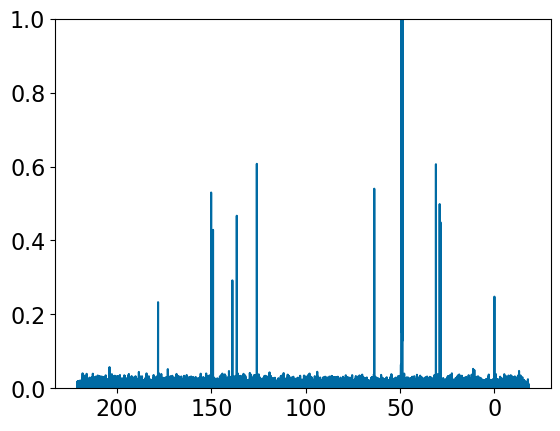

In [4]:
plt.plot([x for x,y in pts],[y for x,y in pts]);
window = plt.xlim()
plt.xlim(window[1],window[0]);
plt.ylim(0,1)

Draw the spectrum and the molecule:

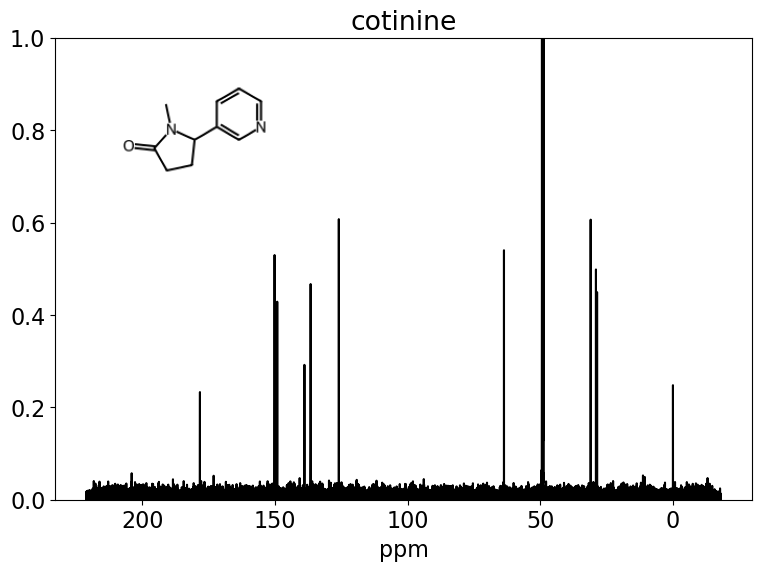

In [6]:
# Start by getting a PNG of the molecular drawing:
d2d = Draw.MolDraw2DCairo(150,100)
# make the background transparent
d2d.drawOptions().setBackgroundColour((1,1,1,0))
d2d.drawOptions().useBWAtomPalette()
d2d.DrawMolecule(cotinine)
img = Draw._drawerToImage(d2d)

# plot the spectrum
fig = plt.figure(figsize=(9,6))
plt.plot([x for x,y in pts],[y for x,y in pts],'k');
window = plt.xlim()
width = window[1] - window[0]
plt.xlim(window[1],window[0]);
plt.ylim(0,1)
plt.xlabel('ppm')
plt.title('cotinine')

# add the molecule to the plot

# first create a matplotlib object holding the image. In my hands setting the
# scaling to 0.75 creates nicer looking plots
imagebox = OffsetImage(np.asarray(img), zoom = .75)

# Now create an annotation object to allow us to place that image box
# on the plot.

# You'll need to optimize the position based on the plot you are creating
# The position is provided in data coordinates
max_y = plt.ylim()[1]
pos = (window[1]-.2*width, 0.8*max_y)
ab = AnnotationBbox(imagebox, pos, frameon = False)

# add the annotation to the plot:
fig.axes[0].add_artist(ab);
